# Latent Dirichlet Allocation - Before the First Book Ban
## Banned Books Amazon.com Reviews  (July 1, 2020 to June 30, 2021)

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict

from gensim import corpora, models
from gensim.models import Phrases
from gensim.models import CoherenceModel, LdaMulticore
from gensim.models.ldamodel import LdaModel
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from collections import Counter

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, models
from nltk.corpus import stopwords
from gensim.test.utils import datapath
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline

In [4]:
before_ban_df = pd.read_pickle("before_ban_data.pkl")

In [5]:
len(before_ban_df)

37492

In [6]:
before_ban_df.head()

review_date                                            reviews  \
0   2021-06-06  An Engrossing Page Turner About Race, Class an...   
1   2021-06-14  An Interesting Debut “Hello, Niveus High. It’s...   
8   2021-06-02  Ace of Spades Review The book has been dubbed ...   
28  2021-06-27  Great YA Thriller A WILD RIDE. This book shock...   
37  2021-06-20  Really engaging and thrilling Really engaging,...   

                                          pre_process  
0   an engrossing page turner about race class and...  
1   an interesting debut hello niveus high it is m...  
8   ace of spade review the book ha been dubbed a ...  
28  great ya thriller a wild ride this book shocke...  
37  really engaging and thrilling really engaging ...

In [7]:
documents = before_ban_df['pre_process'].to_list()

## Remove Custom Stop Words

In [8]:
stoplist = [
            'the', 'a', 'an', 'of', 'and', 'or', 'in', 'for', 'to', 'at', 'by', 'from', 'with', 'on', 'as', 'but', 'is', 'are', 'was', 'were', 'be', 'been', 'am', 'i', 'me', 'my', 'we', 'our', 'you', 'fish', 'ha', 'bye', 'okay', 'andy', 'wa', 'nt',
            "a","able","about","above","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","after","afterwards","again","against","ah","all","almost","alone","along","already","also","although","always","am","among","amongst","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","are","aren","arent","arise","around","as","aside","ask","asking","at","auth","available","away","awfully","b","back","be","became","because","become","becomes","becoming","been","before","beforehand","begin","beginning","beginnings","begins","behind","being","believe","below","beside","besides","between","beyond","biol","both","brief","briefly","but","by","c","ca","came","can","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","could","couldnt","d","date","did","didn't","different","do","does","doesn't","doing","done","don't","down","downwards","due","during","e","each","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","et-al","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","few","ff","fifth","first","five","fix","followed","following","follows","for","former","formerly","forth","found","four","from","further","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","had","happens","hardly","has","hasn't","have","haven't","having","he","hed","hence","her","here","hereafter","hereby","herein","heres","hereupon","hers","herself","hes","hi","hid","him","himself","his","hither","home","how","howbeit","however","hundred","i","id","ie","if","i'll","im","immediate","immediately","importance","important","in","inc","indeed","index","information","instead","into","invention","inward","is","isn't","it","itd","it'll","its","itself","i've","j","just","k","keep",	"keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","m","made","mainly","make","makes","many","may","maybe","me","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","more","moreover","most","mostly","mr","mrs","much","mug","must","my","myself","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","now","nowhere","o","obtain","obtained","obviously","of","off","often","oh","ok","okay","old","omitted","on","once","one","ones","only","onto","or","ord","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","owing","own","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","s","said","same","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","she","shed","she'll","shes","should","shouldn't","show","showed","shown","showns","shows","significant","significantly",
            "similar","similarly","since","six","slightly","so","some","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","such","sufficiently","suggest","sup","sure",	"t","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","these","they","theyd","they'll","theyre","they've","think","this","those","thou","though","thoughh","thousand","throug","through","throughout","thru","thus","til","tip","to","together","too","took","toward","towards","chapter", 'condition', 'la',"tried","tries","truly","try","trying","ts","twice","two","u","un","under","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","very","via","viz","vol","vols","vs","w","want","wants","was","wasnt","way","we","wed","welcome","we'll","went","were","werent","we've","what","whatever","what'll","whats","when","whence","whenever","where","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","while","whim","whither","who","whod","whoever","whole","who'll","whom","whomever","whos","whose","why","widely","willing","wish","with","within","without","wont","words","world","would","wouldnt","www","x","y","yes","yet","you","youd","you'll","your","youre","yours","yourself","yourselves","you've","z","zero", "wa", "nt", "ha", "purchased", "ordered", "amazon", "damaged", 
            "book","read","character","story","will","school","student", "people", "parent", "child", "weekend", "people", "person", "well", "doe", "feel", "felt", "cover", "arrived", "described", "addie",
            "não", "write", "writing", "episode", "website", "robin", "kosawa", "emily", "judy", "buch", "gline", "griffin", "patrick", "feyre", "nesta", "de", "purchase",
            "cliff", "carter", "novel", "caroline", "ii", "molly", "aside", "arthur", "academy", "cad", "season", "jennifer", "simon", 'lot', 'ya', "atwood", 'author',
            "reader", "buy", "copy", "morrison", "story", "storytelling", "reading", "series", "absolutely", "definitely", "go", "going", "bought", "written", "review",          
            "book","read","character","story","will", "weekend", "find", "main", "people", "person", "well", "felt", "feel", "scene",
            "não", "write", "writing", "episode", "website", "robin", "kosawa", "emily", "judy", "buch", "gline", "griffin", "patrick", "baz", "lerue", "henry", 
            "cliff", "carter", "novel", "caroline", "ii", "molly", "aside", "arthur", "academy", "cad", "season", "jennifer", "atwood", 'author', "things", "thing", "thought", "wanted", "bit",
            "reader", "buy", "copy", "morrison", "story", "storytelling", "reading", "series", "plot", "audiobook", "narrator", "topic", "addie"
           ]

# Bring in ALA dataset 
banned_df = pd.read_csv('../data/pen_dataset.csv')

# Remove duplicate books for web scraper
banned_df = banned_df.drop_duplicates(subset=['amazon_url'])

# Drop lines where author is duplicated
banned_df = banned_df.drop_duplicates(subset=['Author'])

# Remove books without Amazon reviews
banned_df = banned_df.dropna(subset=['amazon_url'])

# Create list of authors to add to stop words
author_list = [val.strip() for sublist in banned_df.Author.dropna().str.split(",").tolist() for val in sublist]
author_list = list(set(author_list))
author_list = author_list[1:]
author_list = [i.lower() for i in author_list]

# Add author names to domain specific stop words
stoplist.extend(author_list)

# Add standard English stopwords
stop = stopwords.words('english')
stoplist.extend(stop)

In [9]:
# remove common words and tokenize
texts = [[word for word in document.split() if word not in stoplist]
         for document in documents]

## Tokenize

In [10]:
# remove words that appear only once
frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 5]
         for text in texts]

## N-Grams

In [11]:
# Add bigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(texts, min_count=20)

for idx in range(len(texts)):
    for token in bigram[texts[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            texts[idx].append(token)

## Create Dictionary and Corpus

In [12]:
# Create the dictionary
dictionary = corpora.Dictionary(texts)

# Filter out words that occur less than X documents, 
# or more than X% of the documents.
dictionary.filter_extremes(no_below=50, no_above=0.5)

# Create the corpus.  This is a Term Frequency 
# or Bag of Words representation.
corpus = [dictionary.doc2bow(text) for text in texts]

print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of unique tokens: 2782
Number of documents: 37492


## Add Debug Capabilities

In [13]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)

## Set Parameters for Base LDA Model (With Tuning)

In [14]:
NUM_TOPICS = 10
chunksize = 2000
passes = 8
iterations = 120
eval_every = 1
temp = dictionary[0]
id2word = dictionary.id2token
rand_state = 42

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every,
    random_state=rand_state
)

2023-02-11 15:53:02,295 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2023-02-11 15:53:02,296 : INFO : using serial LDA version on this node
2023-02-11 15:53:02,299 : INFO : running online (multi-pass) LDA training, 10 topics, 8 passes over the supplied corpus of 37492 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 120x with a convergence threshold of 0.001000
2023-02-11 15:53:02,302 : DEBUG : bound: at document #0
2023-02-11 15:53:03,159 : INFO : -8.650 per-word bound, 401.7 perplexity estimate based on a held-out corpus of 2000 documents with 48640 words
2023-02-11 15:53:03,160 : INFO : PROGRESS: pass 0, at document #2000/37492
2023-02-11 15:53:03,160 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:03,891 : DEBUG : 1741/2000 documents converged within 120 iterations
2023-02-11 15:53:03,895 : INFO : optimized alpha [0.07805682, 0.075511284, 0.0860

2023-02-11 15:53:07,531 : INFO : PROGRESS: pass 0, at document #10000/37492
2023-02-11 15:53:07,531 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:07,958 : DEBUG : 1979/2000 documents converged within 120 iterations
2023-02-11 15:53:07,962 : INFO : optimized alpha [0.07471309, 0.07208148, 0.0815545, 0.08540422, 0.08866467, 0.08102331, 0.06938303, 0.08385999, 0.082016915, 0.06756944]
2023-02-11 15:53:07,962 : DEBUG : updating topics
2023-02-11 15:53:07,964 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:07,965 : INFO : topic #9 (0.068): 0.023*"trans" + 0.022*"excellent" + 0.021*"loved" + 0.018*"great" + 0.017*"perfect" + 0.016*"good" + 0.013*"recommend" + 0.011*"enjoyed" + 0.009*"family" + 0.009*"kid"
2023-02-11 15:53:07,965 : INFO : topic #6 (0.069): 0.022*"time" + 0.013*"definition" + 0.013*"hard" + 0.012*"day" + 0.012*"great" + 0.010*"worth" + 0.008*"fragile" + 0.007*"year" + 0.007*"family" + 0.006*"life"
202

2023-02-11 15:53:11,548 : INFO : topic #9 (0.071): 0.029*"good" + 0.027*"excellent" + 0.025*"perfect" + 0.024*"loved" + 0.019*"great" + 0.014*"enjoyed" + 0.012*"quality" + 0.011*"recommend" + 0.010*"fast" + 0.008*"superhero"
2023-02-11 15:53:11,549 : INFO : topic #6 (0.072): 0.028*"time" + 0.016*"hard" + 0.012*"day" + 0.012*"year" + 0.011*"worth" + 0.010*"definition" + 0.009*"great" + 0.008*"good" + 0.007*"ago" + 0.007*"cry"
2023-02-11 15:53:11,549 : INFO : topic #4 (0.088): 0.025*"black" + 0.023*"life" + 0.013*"woman" + 0.010*"time" + 0.009*"history" + 0.009*"american" + 0.009*"america" + 0.007*"family" + 0.007*"understand" + 0.007*"experience"
2023-02-11 15:53:11,550 : INFO : topic #5 (0.090): 0.114*"great" + 0.036*"loved" + 0.033*"recommend" + 0.024*"highly" + 0.023*"good" + 0.020*"highly_recommend" + 0.017*"daughter" + 0.014*"amazing" + 0.013*"time" + 0.013*"year"
2023-02-11 15:53:11,550 : INFO : topic #2 (0.092): 0.015*"girl" + 0.015*"loved" + 0.011*"time" + 0.010*"fun" + 0.010*"f

2023-02-11 15:53:14,864 : INFO : topic #5 (0.099): 0.121*"great" + 0.048*"loved" + 0.041*"recommend" + 0.029*"highly" + 0.029*"good" + 0.028*"amazing" + 0.025*"highly_recommend" + 0.021*"daughter" + 0.020*"favorite" + 0.014*"year"
2023-02-11 15:53:14,865 : INFO : topic #2 (0.112): 0.014*"loved" + 0.011*"girl" + 0.011*"time" + 0.011*"romance" + 0.010*"family" + 0.009*"fantasy" + 0.007*"life" + 0.007*"margot" + 0.006*"relationship" + 0.006*"cute"
2023-02-11 15:53:14,865 : INFO : topic diff=0.221453, rho=0.277350
2023-02-11 15:53:14,870 : DEBUG : bound: at document #0
2023-02-11 15:53:15,286 : INFO : -7.465 per-word bound, 176.7 perplexity estimate based on a held-out corpus of 2000 documents with 33186 words
2023-02-11 15:53:15,286 : INFO : PROGRESS: pass 0, at document #28000/37492
2023-02-11 15:53:15,287 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:15,612 : DEBUG : 1992/2000 documents converged within 120 iterations
2023-02-11 15:53:15,616 : INFO : optim

2023-02-11 15:53:17,973 : DEBUG : bound: at document #0
2023-02-11 15:53:18,385 : INFO : -7.583 per-word bound, 191.8 perplexity estimate based on a held-out corpus of 2000 documents with 39565 words
2023-02-11 15:53:18,385 : INFO : PROGRESS: pass 0, at document #36000/37492
2023-02-11 15:53:18,386 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:18,697 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 15:53:18,702 : INFO : optimized alpha [0.09482409, 0.085060306, 0.119471386, 0.0858603, 0.0924776, 0.11016704, 0.08668533, 0.08908276, 0.07573497, 0.086179405]
2023-02-11 15:53:18,702 : DEBUG : updating topics
2023-02-11 15:53:18,703 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:18,704 : INFO : topic #8 (0.076): 0.014*"nazi" + 0.012*"germany" + 0.008*"year" + 0.007*"devil" + 0.007*"star" + 0.007*"poor" + 0.007*"appropriate" + 0.006*"work" + 0.006*"good" + 0.006*"kid"
2023-02-11 15:53:18,705

2023-02-11 15:53:21,459 : DEBUG : updating topics
2023-02-11 15:53:21,461 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:21,462 : INFO : topic #8 (0.076): 0.014*"nazi" + 0.013*"felix" + 0.011*"germany" + 0.008*"year" + 0.007*"star" + 0.007*"house" + 0.006*"black" + 0.006*"poor" + 0.006*"work" + 0.005*"good"
2023-02-11 15:53:21,463 : INFO : topic #6 (0.087): 0.040*"time" + 0.018*"india" + 0.017*"hard" + 0.016*"worth" + 0.015*"day" + 0.015*"year" + 0.011*"finish" + 0.010*"movie" + 0.010*"ago" + 0.010*"cry"
2023-02-11 15:53:21,463 : INFO : topic #4 (0.097): 0.031*"life" + 0.023*"black" + 0.013*"woman" + 0.013*"american" + 0.010*"family" + 0.010*"experience" + 0.010*"time" + 0.008*"young" + 0.008*"history" + 0.007*"father"
2023-02-11 15:53:21,464 : INFO : topic #5 (0.116): 0.146*"great" + 0.058*"recommend" + 0.057*"loved" + 0.040*"amazing" + 0.039*"highly" + 0.034*"daughter" + 0.030*"highly_recommend" + 0.029*"good" + 0.015*"year" + 0.014*"fav

2023-02-11 15:53:24,332 : INFO : topic #4 (0.106): 0.030*"life" + 0.021*"black" + 0.018*"woman" + 0.011*"family" + 0.010*"time" + 0.010*"american" + 0.010*"experience" + 0.010*"history" + 0.007*"man" + 0.007*"young"
2023-02-11 15:53:24,332 : INFO : topic #5 (0.122): 0.154*"great" + 0.061*"recommend" + 0.058*"loved" + 0.044*"amazing" + 0.040*"highly" + 0.031*"highly_recommend" + 0.030*"good" + 0.029*"daughter" + 0.018*"year" + 0.015*"favorite"
2023-02-11 15:53:24,333 : INFO : topic #2 (0.123): 0.013*"girl" + 0.012*"time" + 0.012*"loved" + 0.010*"romance" + 0.008*"family" + 0.008*"life" + 0.007*"relationship" + 0.006*"fantasy" + 0.006*"year" + 0.006*"best"
2023-02-11 15:53:24,333 : INFO : topic diff=0.138630, rho=0.219550
2023-02-11 15:53:24,338 : DEBUG : bound: at document #0
2023-02-11 15:53:24,765 : INFO : -7.323 per-word bound, 160.1 perplexity estimate based on a held-out corpus of 2000 documents with 50234 words
2023-02-11 15:53:24,766 : INFO : PROGRESS: pass 1, at document #16000/

2023-02-11 15:53:27,262 : INFO : topic diff=0.145424, rho=0.219550
2023-02-11 15:53:27,267 : DEBUG : bound: at document #0
2023-02-11 15:53:27,671 : INFO : -7.473 per-word bound, 177.7 perplexity estimate based on a held-out corpus of 2000 documents with 38619 words
2023-02-11 15:53:27,671 : INFO : PROGRESS: pass 1, at document #24000/37492
2023-02-11 15:53:27,672 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:27,976 : DEBUG : 1992/2000 documents converged within 120 iterations
2023-02-11 15:53:27,980 : INFO : optimized alpha [0.10497203, 0.09344177, 0.1458545, 0.09668193, 0.105417, 0.12966454, 0.09994423, 0.09412602, 0.08262842, 0.10611976]
2023-02-11 15:53:27,980 : DEBUG : updating topics
2023-02-11 15:53:27,981 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:27,983 : INFO : topic #8 (0.083): 0.017*"court" + 0.010*"star" + 0.008*"house" + 0.008*"owen" + 0.008*"bad" + 0.007*"year" + 0.006*"poor" + 0.006*"work"

2023-02-11 15:53:30,785 : INFO : optimized alpha [0.11037207, 0.098631084, 0.15479493, 0.09424504, 0.11003726, 0.13841403, 0.109222986, 0.09851019, 0.0826885, 0.11499995]
2023-02-11 15:53:30,785 : DEBUG : updating topics
2023-02-11 15:53:30,786 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:30,788 : INFO : topic #8 (0.083): 0.013*"devil" + 0.011*"star" + 0.008*"court" + 0.008*"bad" + 0.008*"year" + 0.007*"poor" + 0.006*"work" + 0.005*"house" + 0.005*"deal_devil" + 0.005*"creepy"
2023-02-11 15:53:30,788 : INFO : topic #3 (0.094): 0.031*"racism" + 0.019*"black" + 0.017*"race" + 0.016*"racist" + 0.012*"history" + 0.008*"racial" + 0.008*"idea" + 0.008*"social" + 0.007*"work" + 0.007*"america"
2023-02-11 15:53:30,789 : INFO : topic #9 (0.115): 0.098*"good" + 0.029*"enjoyed" + 0.028*"interesting" + 0.022*"perfect" + 0.020*"loved" + 0.019*"great" + 0.017*"excellent" + 0.012*"nice" + 0.012*"fast" + 0.012*"fun"
2023-02-11 15:53:30,789 : INFO : topi

2023-02-11 15:53:33,441 : INFO : topic #7 (0.099): 0.059*"great" + 0.052*"kid" + 0.022*"class" + 0.017*"message" + 0.017*"year" + 0.016*"teacher" + 0.015*"grade" + 0.014*"classroom" + 0.013*"library" + 0.013*"graphic"
2023-02-11 15:53:33,442 : INFO : topic #4 (0.121): 0.038*"life" + 0.014*"black" + 0.014*"family" + 0.012*"woman" + 0.011*"american" + 0.010*"experience" + 0.010*"time" + 0.009*"history" + 0.007*"live" + 0.007*"powerful"
2023-02-11 15:53:33,442 : INFO : topic #5 (0.142): 0.151*"great" + 0.074*"recommend" + 0.068*"loved" + 0.060*"amazing" + 0.049*"highly" + 0.035*"highly_recommend" + 0.025*"good" + 0.022*"daughter" + 0.017*"favorite" + 0.015*"year"
2023-02-11 15:53:33,443 : INFO : topic #2 (0.148): 0.012*"loved" + 0.010*"time" + 0.010*"girl" + 0.010*"romance" + 0.009*"family" + 0.009*"life" + 0.007*"fantasy" + 0.006*"relationship" + 0.006*"year" + 0.005*"summer"
2023-02-11 15:53:33,443 : INFO : topic diff=0.134924, rho=0.214442
2023-02-11 15:53:33,448 : DEBUG : bound: at do

2023-02-11 15:53:36,107 : INFO : topic #2 (0.148): 0.013*"girl" + 0.011*"loved" + 0.010*"time" + 0.010*"romance" + 0.008*"family" + 0.007*"life" + 0.007*"fantasy" + 0.007*"tale" + 0.006*"magic" + 0.005*"best"
2023-02-11 15:53:36,107 : INFO : topic diff=0.120053, rho=0.214442
2023-02-11 15:53:36,112 : DEBUG : bound: at document #0
2023-02-11 15:53:36,493 : INFO : -7.420 per-word bound, 171.3 perplexity estimate based on a held-out corpus of 2000 documents with 38976 words
2023-02-11 15:53:36,494 : INFO : PROGRESS: pass 2, at document #12000/37492
2023-02-11 15:53:36,494 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:36,775 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 15:53:36,779 : INFO : optimized alpha [0.114277944, 0.102761574, 0.1501324, 0.12359873, 0.13294393, 0.14741524, 0.11405049, 0.105992146, 0.09151492, 0.119593196]
2023-02-11 15:53:36,779 : DEBUG : updating topics
2023-02-11 15:53:36,780 : INFO : merging changes from 2

2023-02-11 15:53:39,207 : INFO : PROGRESS: pass 2, at document #20000/37492
2023-02-11 15:53:39,208 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:39,505 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 15:53:39,509 : INFO : optimized alpha [0.12122392, 0.105676755, 0.16487627, 0.12314839, 0.13363826, 0.1551508, 0.12319649, 0.10703049, 0.09501258, 0.13043968]
2023-02-11 15:53:39,510 : DEBUG : updating topics
2023-02-11 15:53:39,511 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:39,512 : INFO : topic #8 (0.095): 0.014*"star" + 0.012*"owen" + 0.011*"saffyre" + 0.010*"court" + 0.010*"bad" + 0.007*"roan" + 0.007*"year" + 0.007*"poor" + 0.006*"hate" + 0.006*"crime"
2023-02-11 15:53:39,513 : INFO : topic #1 (0.106): 0.087*"beautiful" + 0.026*"time" + 0.025*"word" + 0.024*"eye" + 0.022*"heart" + 0.017*"best" + 0.015*"classic" + 0.015*"beautifully" + 0.014*"wonderful" + 0.011*"version"
2023-02-

2023-02-11 15:53:42,188 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:42,189 : INFO : topic #8 (0.097): 0.013*"star" + 0.009*"bad" + 0.008*"missing" + 0.008*"court" + 0.008*"poor" + 0.007*"house" + 0.007*"hate" + 0.007*"year" + 0.006*"horrible" + 0.005*"work"
2023-02-11 15:53:42,190 : INFO : topic #1 (0.110): 0.104*"beautiful" + 0.025*"time" + 0.024*"eye" + 0.023*"word" + 0.021*"heart" + 0.016*"beautifully" + 0.014*"best" + 0.013*"wonderful" + 0.013*"kindle" + 0.012*"version"
2023-02-11 15:53:42,190 : INFO : topic #9 (0.138): 0.121*"good" + 0.031*"enjoyed" + 0.028*"interesting" + 0.020*"great" + 0.017*"excellent" + 0.015*"nice" + 0.015*"perfect" + 0.014*"loved" + 0.014*"fun" + 0.013*"better"
2023-02-11 15:53:42,191 : INFO : topic #5 (0.161): 0.156*"great" + 0.081*"loved" + 0.075*"recommend" + 0.071*"amazing" + 0.046*"highly" + 0.033*"highly_recommend" + 0.024*"favorite" + 0.020*"good" + 0.020*"daughter" + 0.018*"awesome"
2023-02-11 15:53:

2023-02-11 15:53:44,835 : INFO : topic #4 (0.147): 0.043*"life" + 0.014*"woman" + 0.014*"family" + 0.011*"black" + 0.011*"experience" + 0.010*"time" + 0.009*"history" + 0.008*"live" + 0.008*"year" + 0.007*"american"
2023-02-11 15:53:44,836 : INFO : topic #5 (0.170): 0.152*"great" + 0.085*"loved" + 0.081*"recommend" + 0.071*"amazing" + 0.049*"highly" + 0.034*"highly_recommend" + 0.019*"daughter" + 0.019*"favorite" + 0.018*"wonderful" + 0.017*"good"
2023-02-11 15:53:44,836 : INFO : topic #2 (0.180): 0.013*"loved" + 0.011*"romance" + 0.010*"time" + 0.008*"girl" + 0.008*"fantasy" + 0.008*"life" + 0.007*"family" + 0.007*"relationship" + 0.006*"magic" + 0.006*"best"
2023-02-11 15:53:44,836 : INFO : topic diff=0.137302, rho=0.214442
2023-02-11 15:53:44,841 : DEBUG : bound: at document #0
2023-02-11 15:53:45,121 : INFO : -7.086 per-word bound, 135.8 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 15:53:45,121 : INFO : PROGRESS: pass 2, at document #

2023-02-11 15:53:47,279 : INFO : topic diff=0.096104, rho=0.209675
2023-02-11 15:53:47,284 : DEBUG : bound: at document #0
2023-02-11 15:53:47,668 : INFO : -7.253 per-word bound, 152.6 perplexity estimate based on a held-out corpus of 2000 documents with 42644 words
2023-02-11 15:53:47,668 : INFO : PROGRESS: pass 3, at document #8000/37492
2023-02-11 15:53:47,668 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:47,943 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 15:53:47,947 : INFO : optimized alpha [0.13097697, 0.11876607, 0.17606436, 0.14500724, 0.15578935, 0.17396426, 0.14277999, 0.12237344, 0.103633344, 0.14539433]
2023-02-11 15:53:47,947 : DEBUG : updating topics
2023-02-11 15:53:47,948 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:47,950 : INFO : topic #8 (0.104): 0.014*"star" + 0.011*"bad" + 0.010*"nazi" + 0.008*"poor" + 0.008*"germany" + 0.008*"year" + 0.007*"house" + 0.006*"

2023-02-11 15:53:50,585 : INFO : optimized alpha [0.13530475, 0.117936596, 0.17937085, 0.15576155, 0.16667047, 0.1807405, 0.1476931, 0.12721477, 0.11149305, 0.15098467]
2023-02-11 15:53:50,586 : DEBUG : updating topics
2023-02-11 15:53:50,587 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:50,588 : INFO : topic #8 (0.111): 0.017*"saffyre" + 0.015*"owen" + 0.014*"star" + 0.012*"bad" + 0.011*"roan" + 0.009*"cate" + 0.008*"year" + 0.007*"missing" + 0.007*"poor" + 0.007*"hate"
2023-02-11 15:53:50,588 : INFO : topic #1 (0.118): 0.087*"beautiful" + 0.029*"eye" + 0.026*"time" + 0.024*"word" + 0.021*"beautifully" + 0.020*"heart" + 0.018*"classic" + 0.014*"opening" + 0.014*"poetry" + 0.013*"version"
2023-02-11 15:53:50,589 : INFO : topic #4 (0.167): 0.039*"life" + 0.020*"woman" + 0.016*"black" + 0.014*"family" + 0.011*"time" + 0.010*"experience" + 0.009*"man" + 0.009*"history" + 0.008*"father" + 0.007*"year"
2023-02-11 15:53:50,589 : INFO : topic #2

2023-02-11 15:53:53,265 : INFO : topic #1 (0.124): 0.110*"beautiful" + 0.027*"word" + 0.024*"heart" + 0.023*"eye" + 0.021*"beautifully" + 0.021*"time" + 0.014*"classic" + 0.013*"incredible" + 0.013*"wonderful" + 0.013*"kindle"
2023-02-11 15:53:53,266 : INFO : topic #6 (0.166): 0.054*"time" + 0.020*"worth" + 0.019*"hard" + 0.018*"better" + 0.014*"long" + 0.013*"day" + 0.012*"year" + 0.012*"finish" + 0.011*"sjm" + 0.011*"started"
2023-02-11 15:53:53,266 : INFO : topic #5 (0.190): 0.159*"great" + 0.097*"loved" + 0.082*"amazing" + 0.072*"recommend" + 0.043*"highly" + 0.029*"highly_recommend" + 0.027*"favorite" + 0.021*"wonderful" + 0.018*"awesome" + 0.016*"wait"
2023-02-11 15:53:53,267 : INFO : topic #2 (0.211): 0.013*"loved" + 0.011*"romance" + 0.010*"fantasy" + 0.009*"time" + 0.008*"girl" + 0.007*"court" + 0.006*"relationship" + 0.006*"favorite" + 0.006*"best" + 0.006*"family"
2023-02-11 15:53:53,267 : INFO : topic diff=0.096630, rho=0.209675
2023-02-11 15:53:53,272 : DEBUG : bound: at d

2023-02-11 15:53:55,869 : INFO : topic #2 (0.220): 0.013*"loved" + 0.011*"romance" + 0.009*"time" + 0.009*"fantasy" + 0.008*"girl" + 0.007*"life" + 0.007*"relationship" + 0.005*"favorite" + 0.005*"best" + 0.005*"invisible"
2023-02-11 15:53:55,869 : INFO : topic diff=0.069674, rho=0.209675
2023-02-11 15:53:55,874 : DEBUG : bound: at document #0
2023-02-11 15:53:56,261 : INFO : -7.378 per-word bound, 166.4 perplexity estimate based on a held-out corpus of 2000 documents with 40552 words
2023-02-11 15:53:56,261 : INFO : PROGRESS: pass 3, at document #34000/37492
2023-02-11 15:53:56,262 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:56,544 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 15:53:56,548 : INFO : optimized alpha [0.1518072, 0.12930183, 0.21979521, 0.13842234, 0.17301464, 0.20382456, 0.18165307, 0.13758987, 0.1170279, 0.17459664]
2023-02-11 15:53:56,549 : DEBUG : updating topics
2023-02-11 15:53:56,550 : INFO : merging chang

2023-02-11 15:53:58,742 : INFO : PROGRESS: pass 4, at document #4000/37492
2023-02-11 15:53:58,742 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:53:58,994 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 15:53:58,998 : INFO : optimized alpha [0.14838332, 0.13235457, 0.21314105, 0.16122131, 0.18308748, 0.20365134, 0.18047103, 0.13368306, 0.120803356, 0.17665562]
2023-02-11 15:53:58,998 : DEBUG : updating topics
2023-02-11 15:53:58,999 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:53:59,001 : INFO : topic #8 (0.121): 0.016*"nazi" + 0.015*"star" + 0.013*"germany" + 0.010*"bad" + 0.009*"devon" + 0.009*"missing" + 0.008*"year" + 0.008*"poor" + 0.008*"chiamaka" + 0.008*"drug"
2023-02-11 15:53:59,001 : INFO : topic #1 (0.132): 0.098*"beautiful" + 0.029*"beautifully" + 0.027*"eye" + 0.026*"word" + 0.023*"heart" + 0.021*"time" + 0.018*"classic" + 0.015*"opening" + 0.014*"version" + 0.012*"eye_openin

2023-02-11 15:54:01,634 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:54:01,635 : INFO : topic #8 (0.128): 0.015*"star" + 0.013*"bad" + 0.009*"nurse" + 0.008*"money" + 0.007*"poor" + 0.007*"hate" + 0.007*"nazi" + 0.006*"year" + 0.006*"reason" + 0.006*"horrible"
2023-02-11 15:54:01,636 : INFO : topic #1 (0.132): 0.099*"beautiful" + 0.032*"eye" + 0.027*"beautifully" + 0.025*"word" + 0.022*"time" + 0.021*"heart" + 0.018*"opening" + 0.016*"classic" + 0.014*"eye_opening" + 0.013*"version"
2023-02-11 15:54:01,636 : INFO : topic #4 (0.198): 0.039*"life" + 0.022*"woman" + 0.014*"family" + 0.012*"black" + 0.011*"time" + 0.011*"experience" + 0.008*"history" + 0.008*"mother" + 0.007*"man" + 0.007*"pandemic"
2023-02-11 15:54:01,637 : INFO : topic #2 (0.205): 0.011*"loved" + 0.010*"romance" + 0.009*"time" + 0.009*"fantasy" + 0.008*"girl" + 0.007*"manu" + 0.007*"darcy" + 0.007*"magic" + 0.006*"relationship" + 0.006*"best"
2023-02-11 15:54:01,637 : INFO : 

2023-02-11 15:54:04,265 : INFO : topic #4 (0.197): 0.041*"life" + 0.021*"woman" + 0.014*"family" + 0.012*"black" + 0.011*"time" + 0.010*"experience" + 0.009*"man" + 0.008*"mother" + 0.008*"father" + 0.008*"history"
2023-02-11 15:54:04,266 : INFO : topic #5 (0.217): 0.164*"great" + 0.108*"loved" + 0.089*"amazing" + 0.076*"recommend" + 0.045*"highly" + 0.030*"highly_recommend" + 0.025*"favorite" + 0.021*"wonderful" + 0.018*"awesome" + 0.016*"wait"
2023-02-11 15:54:04,266 : INFO : topic #2 (0.225): 0.013*"loved" + 0.012*"romance" + 0.008*"time" + 0.008*"girl" + 0.007*"fantasy" + 0.007*"relationship" + 0.006*"court" + 0.006*"favorite" + 0.006*"fan" + 0.006*"best"
2023-02-11 15:54:04,267 : INFO : topic diff=0.117055, rho=0.205213
2023-02-11 15:54:04,271 : DEBUG : bound: at document #0
2023-02-11 15:54:04,625 : INFO : -7.235 per-word bound, 150.6 perplexity estimate based on a held-out corpus of 2000 documents with 37193 words
2023-02-11 15:54:04,625 : INFO : PROGRESS: pass 4, at document #2

2023-02-11 15:54:06,894 : INFO : topic diff=0.069713, rho=0.205213
2023-02-11 15:54:06,899 : DEBUG : bound: at document #0
2023-02-11 15:54:07,289 : INFO : -7.279 per-word bound, 155.3 perplexity estimate based on a held-out corpus of 2000 documents with 39771 words
2023-02-11 15:54:07,290 : INFO : PROGRESS: pass 4, at document #30000/37492
2023-02-11 15:54:07,290 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:54:07,578 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 15:54:07,583 : INFO : optimized alpha [0.16432005, 0.14213382, 0.25318366, 0.16224715, 0.20231618, 0.22949702, 0.21499233, 0.15040386, 0.13478656, 0.19768497]
2023-02-11 15:54:07,583 : DEBUG : updating topics
2023-02-11 15:54:07,584 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:54:07,586 : INFO : topic #8 (0.135): 0.016*"star" + 0.013*"devil" + 0.012*"bad" + 0.010*"missing" + 0.009*"hate" + 0.007*"poor" + 0.007*"year" + 0.006*"

2023-02-11 15:54:09,976 : INFO : optimized alpha [0.16245238, 0.14529386, 0.23185226, 0.19010484, 0.21717995, 0.23449196, 0.22012198, 0.15340237, 0.14143963, 0.19664465]
2023-02-11 15:54:09,977 : DEBUG : updating topics
2023-02-11 15:54:09,978 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 15:54:09,979 : INFO : topic #8 (0.141): 0.024*"nazi" + 0.018*"germany" + 0.015*"star" + 0.012*"bad" + 0.009*"hate" + 0.008*"missing" + 0.008*"poor" + 0.007*"year" + 0.007*"case" + 0.006*"money"
2023-02-11 15:54:09,980 : INFO : topic #1 (0.145): 0.102*"beautiful" + 0.032*"beautifully" + 0.030*"eye" + 0.027*"heart" + 0.024*"word" + 0.019*"classic" + 0.018*"time" + 0.018*"opening" + 0.015*"eye_opening" + 0.013*"kindle"
2023-02-11 15:54:09,980 : INFO : topic #6 (0.220): 0.065*"time" + 0.024*"india" + 0.021*"worth" + 0.019*"hard" + 0.018*"long" + 0.018*"year" + 0.015*"day" + 0.015*"better" + 0.014*"sad" + 0.012*"movie"
2023-02-11 15:54:09,981 : INFO : topic #2 (0.2

2023-02-11 15:54:12,594 : INFO : topic #1 (0.147): 0.108*"beautiful" + 0.034*"eye" + 0.031*"beautifully" + 0.025*"word" + 0.024*"heart" + 0.020*"opening" + 0.017*"eye_opening" + 0.016*"time" + 0.014*"classic" + 0.014*"powerful"
2023-02-11 15:54:12,594 : INFO : topic #4 (0.223): 0.044*"life" + 0.017*"woman" + 0.014*"family" + 0.013*"black" + 0.013*"experience" + 0.011*"time" + 0.009*"father" + 0.008*"live" + 0.008*"man" + 0.008*"year"
2023-02-11 15:54:12,595 : INFO : topic #2 (0.233): 0.011*"loved" + 0.011*"romance" + 0.008*"fantasy" + 0.008*"girl" + 0.008*"time" + 0.007*"tale" + 0.007*"magic" + 0.006*"cinderella" + 0.005*"relationship" + 0.005*"action"
2023-02-11 15:54:12,595 : INFO : topic #5 (0.238): 0.178*"great" + 0.095*"loved" + 0.089*"recommend" + 0.074*"amazing" + 0.050*"highly" + 0.035*"highly_recommend" + 0.022*"wonderful" + 0.020*"gift" + 0.020*"awesome" + 0.017*"favorite"
2023-02-11 15:54:12,596 : INFO : topic diff=0.085164, rho=0.201024
2023-02-11 15:54:12,600 : DEBUG : bou

2023-02-11 15:54:15,195 : INFO : topic #5 (0.245): 0.181*"great" + 0.096*"loved" + 0.091*"recommend" + 0.076*"amazing" + 0.052*"highly" + 0.035*"highly_recommend" + 0.021*"wonderful" + 0.018*"favorite" + 0.017*"awesome" + 0.017*"gift"
2023-02-11 15:54:15,195 : INFO : topic diff=0.078414, rho=0.201024
2023-02-11 15:54:15,200 : DEBUG : bound: at document #0
2023-02-11 15:54:15,572 : INFO : -7.272 per-word bound, 154.6 perplexity estimate based on a held-out corpus of 2000 documents with 43848 words
2023-02-11 15:54:15,573 : INFO : PROGRESS: pass 5, at document #18000/37492
2023-02-11 15:54:15,573 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:54:15,842 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 15:54:15,846 : INFO : optimized alpha [0.1750531, 0.14689074, 0.23957022, 0.21311933, 0.2380173, 0.24560985, 0.22310334, 0.16478711, 0.15319017, 0.21282502]
2023-02-11 15:54:15,847 : DEBUG : updating topics
2023-02-11 15:54:15,848 : INFO : m

2023-02-11 15:54:18,199 : INFO : PROGRESS: pass 5, at document #26000/37492
2023-02-11 15:54:18,199 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:54:18,473 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 15:54:18,478 : INFO : optimized alpha [0.18263713, 0.15178801, 0.27666038, 0.19319941, 0.23262787, 0.26078942, 0.24740891, 0.17042263, 0.15448071, 0.2193767]
2023-02-11 15:54:18,478 : DEBUG : updating topics
2023-02-11 15:54:18,479 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:54:18,481 : INFO : topic #1 (0.152): 0.122*"beautiful" + 0.027*"word" + 0.027*"eye" + 0.026*"heart" + 0.026*"beautifully" + 0.015*"classic" + 0.015*"sweet" + 0.013*"kindle" + 0.013*"time" + 0.013*"incredible"
2023-02-11 15:54:18,481 : INFO : topic #8 (0.154): 0.015*"star" + 0.012*"bad" + 0.010*"hate" + 0.008*"missing" + 0.008*"house" + 0.007*"money" + 0.007*"poor" + 0.007*"terrible" + 0.006*"owen" + 0.006*"reason"
20

2023-02-11 15:54:21,060 : INFO : topic #1 (0.157): 0.121*"beautiful" + 0.031*"heart" + 0.029*"beautifully" + 0.027*"word" + 0.023*"eye" + 0.018*"classic" + 0.014*"version" + 0.013*"kindle" + 0.013*"time" + 0.013*"incredible"
2023-02-11 15:54:21,060 : INFO : topic #8 (0.158): 0.018*"star" + 0.015*"bad" + 0.013*"hate" + 0.010*"devil" + 0.010*"missing" + 0.008*"poor" + 0.007*"terrible" + 0.007*"reason" + 0.007*"wrong" + 0.007*"case"
2023-02-11 15:54:21,061 : INFO : topic #6 (0.273): 0.067*"time" + 0.020*"worth" + 0.018*"hard" + 0.018*"long" + 0.017*"day" + 0.017*"year" + 0.017*"better" + 0.013*"sad" + 0.012*"movie" + 0.011*"finish"
2023-02-11 15:54:21,061 : INFO : topic #5 (0.280): 0.168*"great" + 0.114*"loved" + 0.092*"amazing" + 0.084*"recommend" + 0.044*"highly" + 0.032*"highly_recommend" + 0.023*"wonderful" + 0.021*"favorite" + 0.017*"awesome" + 0.016*"best"
2023-02-11 15:54:21,062 : INFO : topic #2 (0.291): 0.013*"loved" + 0.013*"romance" + 0.010*"fantasy" + 0.007*"time" + 0.007*"rel

2023-02-11 15:54:23,521 : INFO : topic #5 (0.277): 0.177*"great" + 0.101*"loved" + 0.088*"recommend" + 0.083*"amazing" + 0.047*"highly" + 0.033*"highly_recommend" + 0.023*"wonderful" + 0.018*"favorite" + 0.017*"gift" + 0.017*"best"
2023-02-11 15:54:23,522 : INFO : topic #2 (0.280): 0.012*"loved" + 0.011*"romance" + 0.009*"tale" + 0.009*"fantasy" + 0.008*"cinderella" + 0.007*"girl" + 0.007*"time" + 0.006*"relationship" + 0.006*"twist" + 0.006*"magic"
2023-02-11 15:54:23,522 : INFO : topic diff=0.087234, rho=0.197081
2023-02-11 15:54:23,527 : DEBUG : bound: at document #0
2023-02-11 15:54:23,869 : INFO : -7.178 per-word bound, 144.8 perplexity estimate based on a held-out corpus of 2000 documents with 32216 words
2023-02-11 15:54:23,869 : INFO : PROGRESS: pass 6, at document #6000/37492
2023-02-11 15:54:23,870 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:54:24,122 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 15:54:24,127 : INFO : o

2023-02-11 15:54:26,140 : DEBUG : bound: at document #0
2023-02-11 15:54:26,490 : INFO : -7.177 per-word bound, 144.7 perplexity estimate based on a held-out corpus of 2000 documents with 32138 words
2023-02-11 15:54:26,491 : INFO : PROGRESS: pass 6, at document #14000/37492
2023-02-11 15:54:26,491 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:54:26,746 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 15:54:26,750 : INFO : optimized alpha [0.18881553, 0.16023123, 0.2704689, 0.2303451, 0.27891713, 0.28513256, 0.2720862, 0.18160045, 0.17069308, 0.23953818]
2023-02-11 15:54:26,750 : DEBUG : updating topics
2023-02-11 15:54:26,751 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:54:26,753 : INFO : topic #1 (0.160): 0.103*"beautiful" + 0.032*"eye" + 0.032*"beautifully" + 0.026*"word" + 0.026*"classic" + 0.023*"heart" + 0.017*"opening" + 0.015*"version" + 0.014*"powerful" + 0.014*"time"
2023-02-11 1

2023-02-11 15:54:29,450 : DEBUG : updating topics
2023-02-11 15:54:29,451 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:54:29,453 : INFO : topic #1 (0.161): 0.107*"beautiful" + 0.031*"word" + 0.029*"heart" + 0.029*"eye" + 0.027*"beautifully" + 0.019*"classic" + 0.016*"incredible" + 0.014*"powerful" + 0.013*"kindle" + 0.013*"version"
2023-02-11 15:54:29,453 : INFO : topic #7 (0.173): 0.061*"kid" + 0.059*"great" + 0.026*"daughter" + 0.026*"perfect" + 0.022*"year" + 0.021*"message" + 0.020*"son" + 0.019*"teacher" + 0.017*"age" + 0.017*"teach"
2023-02-11 15:54:29,454 : INFO : topic #5 (0.302): 0.173*"great" + 0.113*"loved" + 0.095*"amazing" + 0.073*"recommend" + 0.041*"highly" + 0.028*"highly_recommend" + 0.027*"favorite" + 0.024*"wonderful" + 0.023*"wait" + 0.016*"awesome"
2023-02-11 15:54:29,454 : INFO : topic #6 (0.304): 0.065*"time" + 0.022*"better" + 0.021*"worth" + 0.019*"hard" + 0.018*"long" + 0.014*"day" + 0.014*"sjm" + 0.013*"year" + 0.

2023-02-11 15:54:32,108 : INFO : topic #5 (0.314): 0.170*"great" + 0.115*"loved" + 0.087*"amazing" + 0.082*"recommend" + 0.045*"highly" + 0.032*"highly_recommend" + 0.025*"favorite" + 0.025*"wonderful" + 0.019*"wait" + 0.016*"best"
2023-02-11 15:54:32,108 : INFO : topic #6 (0.324): 0.073*"time" + 0.021*"long" + 0.020*"worth" + 0.019*"hard" + 0.018*"year" + 0.017*"better" + 0.016*"day" + 0.012*"finished" + 0.012*"start" + 0.012*"best"
2023-02-11 15:54:32,109 : INFO : topic #2 (0.334): 0.013*"loved" + 0.012*"romance" + 0.011*"fantasy" + 0.007*"relationship" + 0.006*"time" + 0.006*"fan" + 0.006*"invisible" + 0.006*"girl" + 0.006*"magic" + 0.005*"action"
2023-02-11 15:54:32,109 : INFO : topic diff=0.098293, rho=0.197081
2023-02-11 15:54:32,113 : DEBUG : bound: at document #0
2023-02-11 15:54:32,457 : INFO : -7.214 per-word bound, 148.5 perplexity estimate based on a held-out corpus of 2000 documents with 33040 words
2023-02-11 15:54:32,458 : INFO : PROGRESS: pass 6, at document #32000/3749

2023-02-11 15:54:34,547 : INFO : topic diff=0.090342, rho=0.197081
2023-02-11 15:54:34,552 : DEBUG : bound: at document #0
2023-02-11 15:54:34,953 : INFO : -7.266 per-word bound, 153.9 perplexity estimate based on a held-out corpus of 2000 documents with 48640 words
2023-02-11 15:54:34,954 : INFO : PROGRESS: pass 7, at document #2000/37492
2023-02-11 15:54:34,954 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:54:35,243 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 15:54:35,247 : INFO : optimized alpha [0.20422757, 0.17495579, 0.31340197, 0.24864317, 0.30894265, 0.31958592, 0.33334243, 0.18376166, 0.18364479, 0.25417292]
2023-02-11 15:54:35,247 : DEBUG : updating topics
2023-02-11 15:54:35,248 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:54:35,250 : INFO : topic #1 (0.175): 0.107*"beautiful" + 0.036*"beautifully" + 0.035*"eye" + 0.029*"word" + 0.028*"heart" + 0.019*"opening" + 0.018*"clas

2023-02-11 15:54:37,778 : INFO : optimized alpha [0.20572208, 0.17367186, 0.3076054, 0.27191812, 0.32739154, 0.3172471, 0.33074436, 0.19308604, 0.19253045, 0.2601694]
2023-02-11 15:54:37,779 : DEBUG : updating topics
2023-02-11 15:54:37,780 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:54:37,781 : INFO : topic #1 (0.174): 0.109*"beautiful" + 0.037*"eye" + 0.034*"beautifully" + 0.027*"word" + 0.025*"heart" + 0.021*"opening" + 0.018*"eye_opening" + 0.015*"waste" + 0.015*"powerful" + 0.015*"classic"
2023-02-11 15:54:37,782 : INFO : topic #8 (0.193): 0.015*"star" + 0.015*"bad" + 0.009*"nurse" + 0.009*"money" + 0.008*"hate" + 0.008*"reason" + 0.008*"poor" + 0.007*"nazi" + 0.007*"terrible" + 0.007*"problem"
2023-02-11 15:54:37,782 : INFO : topic #5 (0.317): 0.195*"great" + 0.100*"loved" + 0.088*"recommend" + 0.072*"amazing" + 0.047*"highly" + 0.032*"highly_recommend" + 0.027*"wonderful" + 0.019*"gift" + 0.018*"favorite" + 0.017*"awesome"
2023-02-1

2023-02-11 15:54:40,343 : INFO : topic #8 (0.198): 0.016*"star" + 0.014*"bad" + 0.013*"owen" + 0.013*"saffyre" + 0.009*"hate" + 0.008*"roan" + 0.008*"missing" + 0.008*"money" + 0.007*"cate" + 0.007*"reason"
2023-02-11 15:54:40,344 : INFO : topic #5 (0.333): 0.200*"great" + 0.103*"loved" + 0.087*"recommend" + 0.073*"amazing" + 0.047*"highly" + 0.032*"highly_recommend" + 0.026*"wonderful" + 0.019*"favorite" + 0.017*"awesome" + 0.017*"gift"
2023-02-11 15:54:40,345 : INFO : topic #4 (0.340): 0.048*"life" + 0.020*"woman" + 0.015*"family" + 0.011*"experience" + 0.011*"time" + 0.010*"man" + 0.010*"father" + 0.009*"mother" + 0.008*"year" + 0.008*"black"
2023-02-11 15:54:40,345 : INFO : topic #6 (0.346): 0.081*"time" + 0.025*"hard" + 0.020*"year" + 0.019*"worth" + 0.018*"better" + 0.018*"long" + 0.017*"day" + 0.013*"best" + 0.012*"glad" + 0.012*"started"
2023-02-11 15:54:40,345 : INFO : topic diff=0.053933, rho=0.193362
2023-02-11 15:54:40,350 : DEBUG : bound: at document #0
2023-02-11 15:54:40

2023-02-11 15:54:42,915 : INFO : topic #6 (0.388): 0.070*"time" + 0.022*"better" + 0.021*"hard" + 0.018*"worth" + 0.017*"long" + 0.016*"day" + 0.015*"year" + 0.013*"best" + 0.012*"start" + 0.012*"started"
2023-02-11 15:54:42,915 : INFO : topic diff=0.069278, rho=0.193362
2023-02-11 15:54:42,920 : DEBUG : bound: at document #0
2023-02-11 15:54:43,272 : INFO : -7.303 per-word bound, 158.0 perplexity estimate based on a held-out corpus of 2000 documents with 33186 words
2023-02-11 15:54:43,272 : INFO : PROGRESS: pass 7, at document #28000/37492
2023-02-11 15:54:43,273 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:54:43,530 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 15:54:43,534 : INFO : optimized alpha [0.22677134, 0.18027513, 0.37195754, 0.25533766, 0.34026155, 0.35931206, 0.39528674, 0.20667566, 0.20085464, 0.28788173]
2023-02-11 15:54:43,534 : DEBUG : updating topics
2023-02-11 15:54:43,535 : INFO : merging changes from 2000 doc

2023-02-11 15:54:45,750 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 15:54:46,001 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 15:54:46,006 : INFO : optimized alpha [0.22564709, 0.18923181, 0.37807766, 0.26344714, 0.3715976, 0.37621436, 0.42894515, 0.20695925, 0.20467785, 0.29320896]
2023-02-11 15:54:46,006 : DEBUG : updating topics
2023-02-11 15:54:46,007 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 15:54:46,008 : INFO : topic #1 (0.189): 0.117*"beautiful" + 0.038*"beautifully" + 0.034*"eye" + 0.032*"heart" + 0.028*"word" + 0.023*"classic" + 0.017*"opening" + 0.015*"version" + 0.015*"brilliant" + 0.014*"eye_opening"
2023-02-11 15:54:46,009 : INFO : topic #8 (0.205): 0.016*"star" + 0.014*"bad" + 0.012*"hate" + 0.011*"nazi" + 0.010*"germany" + 0.009*"missing" + 0.008*"devil" + 0.008*"terrible" + 0.008*"reason" + 0.008*"poor"
2023-02-11 15:54:46,009 : INFO : topic #5 (0.376): 0.183*"great" + 

## Compute Coherence Scores to Pick the Best Number of Topics

In [26]:
%%time

def compute_coherence_values(dictionary, corpus, texts, cohere, limit, start=2, step=2):

    coherence_values = []

    for num_topics in range(start, limit, step):
        
        model = LdaModel(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha='auto',
                         eta='auto',
                         iterations=iterations,
                         passes=passes,
                         random_state=rand_state,)
        
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=cohere)
        
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs


In [27]:
limit=50 # decrease this number of topics to speed up the next cell
start=2
step=2

In [28]:
%%time

coherence_values = compute_coherence_values(dictionary=dictionary, 
                                            corpus=corpus, 
                                            texts=texts, 
                                            cohere='c_v', 
                                            start=start, 
                                            limit=limit, 
                                            step=step)

2023-02-11 16:01:35,845 : INFO : using autotuned alpha, starting with [0.5, 0.5]
2023-02-11 16:01:35,848 : INFO : using serial LDA version on this node
2023-02-11 16:01:35,850 : INFO : running online (multi-pass) LDA training, 2 topics, 8 passes over the supplied corpus of 37492 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 120x with a convergence threshold of 0.001000
2023-02-11 16:01:35,851 : INFO : PROGRESS: pass 0, at document #2000/37492
2023-02-11 16:01:35,851 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:37,123 : DEBUG : 1053/2000 documents converged within 120 iterations
2023-02-11 16:01:37,127 : INFO : optimized alpha [0.6834126, 0.6087948]
2023-02-11 16:01:37,128 : DEBUG : updating topics
2023-02-11 16:01:37,128 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:37,129 : INFO : topic #0 (0.683): 0.015*"great" + 0.012*"good" + 0.011*"loved" + 

2023-02-11 16:01:40,107 : INFO : topic diff=0.286724, rho=0.353553
2023-02-11 16:01:40,109 : INFO : PROGRESS: pass 0, at document #18000/37492
2023-02-11 16:01:40,109 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:40,399 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:01:40,403 : INFO : optimized alpha [1.5733291, 1.0910443]
2023-02-11 16:01:40,403 : DEBUG : updating topics
2023-02-11 16:01:40,404 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:40,405 : INFO : topic #0 (1.573): 0.020*"great" + 0.017*"good" + 0.013*"loved" + 0.011*"time" + 0.007*"life" + 0.007*"family" + 0.006*"girl" + 0.006*"recommend" + 0.006*"enjoyed" + 0.006*"year"
2023-02-11 16:01:40,405 : INFO : topic #1 (1.091): 0.016*"racism" + 0.015*"black" + 0.015*"racist" + 0.010*"time" + 0.010*"life" + 0.007*"history" + 0.007*"race" + 0.007*"beautiful" + 0.006*"year" + 0.006*"woman"
2023-02-11 16:01:40,406 : INFO : topic d

2023-02-11 16:01:42,967 : INFO : optimized alpha [2.225474, 1.0831935]
2023-02-11 16:01:42,967 : DEBUG : updating topics
2023-02-11 16:01:42,968 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:42,968 : INFO : topic #0 (2.225): 0.022*"great" + 0.017*"loved" + 0.017*"good" + 0.013*"time" + 0.009*"life" + 0.008*"amazing" + 0.007*"recommend" + 0.007*"family" + 0.007*"year" + 0.006*"enjoyed"
2023-02-11 16:01:42,969 : INFO : topic #1 (1.083): 0.014*"life" + 0.011*"black" + 0.011*"beautiful" + 0.010*"time" + 0.008*"racism" + 0.007*"year" + 0.006*"history" + 0.006*"word" + 0.006*"excellent" + 0.006*"woman"
2023-02-11 16:01:42,969 : INFO : topic diff=0.169173, rho=0.242536
2023-02-11 16:01:42,970 : INFO : PROGRESS: pass 0, at document #36000/37492
2023-02-11 16:01:42,971 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:43,192 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:01:43,196 : INFO : op

2023-02-11 16:01:45,147 : INFO : topic #1 (0.731): 0.016*"black" + 0.014*"racism" + 0.010*"racist" + 0.008*"life" + 0.008*"history" + 0.008*"race" + 0.008*"american" + 0.007*"time" + 0.007*"woman" + 0.007*"caste"
2023-02-11 16:01:45,147 : INFO : topic diff=0.126255, rho=0.219550
2023-02-11 16:01:45,149 : INFO : PROGRESS: pass 1, at document #14000/37492
2023-02-11 16:01:45,149 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:45,373 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:01:45,377 : INFO : optimized alpha [1.0918257, 0.6997945]
2023-02-11 16:01:45,377 : DEBUG : updating topics
2023-02-11 16:01:45,378 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:45,378 : INFO : topic #0 (1.092): 0.025*"great" + 0.019*"good" + 0.014*"loved" + 0.013*"time" + 0.008*"life" + 0.007*"recommend" + 0.007*"year" + 0.007*"family" + 0.007*"amazing" + 0.006*"girl"
2023-02-11 16:01:45,379 : INFO : topic #

2023-02-11 16:01:47,506 : INFO : PROGRESS: pass 1, at document #30000/37492
2023-02-11 16:01:47,506 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:47,769 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:01:47,773 : INFO : optimized alpha [1.2983146, 0.5029455]
2023-02-11 16:01:47,773 : DEBUG : updating topics
2023-02-11 16:01:47,774 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:47,774 : INFO : topic #0 (1.298): 0.019*"great" + 0.015*"loved" + 0.015*"good" + 0.014*"time" + 0.011*"life" + 0.008*"year" + 0.008*"amazing" + 0.007*"beautiful" + 0.007*"recommend" + 0.006*"enjoyed"
2023-02-11 16:01:47,775 : INFO : topic #1 (0.503): 0.014*"black" + 0.013*"racism" + 0.011*"life" + 0.010*"history" + 0.007*"racist" + 0.007*"race" + 0.007*"time" + 0.006*"excellent" + 0.006*"work" + 0.006*"understand"
2023-02-11 16:01:47,775 : INFO : topic diff=0.138396, rho=0.219550
2023-02-11 16:01:47,777 : INF

2023-02-11 16:01:49,864 : INFO : optimized alpha [0.7614817, 0.43883392]
2023-02-11 16:01:49,865 : DEBUG : updating topics
2023-02-11 16:01:49,865 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:49,866 : INFO : topic #0 (0.761): 0.023*"great" + 0.017*"good" + 0.014*"loved" + 0.012*"time" + 0.009*"life" + 0.008*"recommend" + 0.007*"year" + 0.007*"beautiful" + 0.007*"family" + 0.007*"amazing"
2023-02-11 16:01:49,866 : INFO : topic #1 (0.439): 0.020*"black" + 0.015*"racism" + 0.012*"caste" + 0.010*"american" + 0.009*"race" + 0.008*"history" + 0.008*"system" + 0.008*"life" + 0.007*"racist" + 0.007*"america"
2023-02-11 16:01:49,867 : INFO : topic diff=0.152726, rho=0.214442
2023-02-11 16:01:49,868 : INFO : PROGRESS: pass 2, at document #10000/37492
2023-02-11 16:01:49,869 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:50,119 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:01:50,123 : INFO

2023-02-11 16:01:52,123 : INFO : topic #1 (0.329): 0.017*"black" + 0.015*"racism" + 0.011*"racist" + 0.010*"history" + 0.008*"race" + 0.008*"american" + 0.008*"life" + 0.006*"color" + 0.006*"work" + 0.006*"understand"
2023-02-11 16:01:52,123 : INFO : topic diff=0.123895, rho=0.214442
2023-02-11 16:01:52,125 : INFO : PROGRESS: pass 2, at document #26000/37492
2023-02-11 16:01:52,125 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:52,362 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:01:52,365 : INFO : optimized alpha [0.94816756, 0.33124483]
2023-02-11 16:01:52,366 : DEBUG : updating topics
2023-02-11 16:01:52,366 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:52,367 : INFO : topic #0 (0.948): 0.020*"great" + 0.015*"good" + 0.014*"loved" + 0.012*"time" + 0.008*"family" + 0.008*"amazing" + 0.007*"life" + 0.007*"beautiful" + 0.007*"year" + 0.006*"recommend"
2023-02-11 16:01:52,367 : IN

2023-02-11 16:01:54,207 : INFO : topic diff=0.137780, rho=0.209675
2023-02-11 16:01:54,209 : INFO : PROGRESS: pass 3, at document #4000/37492
2023-02-11 16:01:54,209 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:54,432 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:01:54,435 : INFO : optimized alpha [0.6665771, 0.29074842]
2023-02-11 16:01:54,436 : DEBUG : updating topics
2023-02-11 16:01:54,436 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:54,437 : INFO : topic #0 (0.667): 0.020*"great" + 0.015*"good" + 0.013*"loved" + 0.012*"time" + 0.010*"life" + 0.008*"year" + 0.007*"amazing" + 0.007*"recommend" + 0.007*"family" + 0.007*"beautiful"
2023-02-11 16:01:54,437 : INFO : topic #1 (0.291): 0.023*"caste" + 0.017*"black" + 0.013*"american" + 0.012*"system" + 0.012*"history" + 0.010*"racism" + 0.009*"america" + 0.008*"race" + 0.007*"life" + 0.007*"caste_system"
2023-02-11 16:01:54,437 :

2023-02-11 16:01:56,585 : INFO : optimized alpha [0.7087618, 0.250357]
2023-02-11 16:01:56,585 : DEBUG : updating topics
2023-02-11 16:01:56,586 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:01:56,586 : INFO : topic #0 (0.709): 0.019*"great" + 0.015*"good" + 0.015*"loved" + 0.012*"time" + 0.008*"life" + 0.008*"amazing" + 0.006*"year" + 0.006*"family" + 0.006*"recommend" + 0.006*"enjoyed"
2023-02-11 16:01:56,587 : INFO : topic #1 (0.250): 0.020*"racism" + 0.019*"black" + 0.016*"racist" + 0.011*"history" + 0.009*"race" + 0.008*"american" + 0.007*"life" + 0.007*"america" + 0.006*"work" + 0.006*"time"
2023-02-11 16:01:56,587 : INFO : topic diff=0.129324, rho=0.209675
2023-02-11 16:01:56,589 : INFO : PROGRESS: pass 3, at document #22000/37492
2023-02-11 16:01:56,589 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:01:56,774 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:01:56,778 : INFO : opti

2023-02-11 16:01:58,315 : INFO : topic #1 (0.217): 0.019*"caste" + 0.016*"black" + 0.013*"history" + 0.012*"racism" + 0.012*"american" + 0.011*"system" + 0.009*"race" + 0.008*"america" + 0.008*"life" + 0.006*"understand"
2023-02-11 16:01:58,316 : INFO : topic diff=0.181062, rho=0.209675
2023-02-11 16:01:58,319 : DEBUG : bound: at document #0
2023-02-11 16:01:58,573 : INFO : -6.992 per-word bound, 127.3 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:01:58,573 : INFO : PROGRESS: pass 3, at document #37492/37492
2023-02-11 16:01:58,573 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:01:58,746 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:01:58,749 : INFO : optimized alpha [0.49000302, 0.22285156]
2023-02-11 16:01:58,749 : DEBUG : updating topics
2023-02-11 16:01:58,750 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:01:58,750 : INFO : topic #0

2023-02-11 16:02:00,305 : INFO : topic diff=0.093133, rho=0.205213
2023-02-11 16:02:00,307 : INFO : PROGRESS: pass 4, at document #16000/37492
2023-02-11 16:02:00,307 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:00,536 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:02:00,540 : INFO : optimized alpha [0.5433253, 0.21562406]
2023-02-11 16:02:00,541 : DEBUG : updating topics
2023-02-11 16:02:00,541 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:00,542 : INFO : topic #0 (0.543): 0.021*"great" + 0.016*"good" + 0.013*"loved" + 0.013*"time" + 0.010*"life" + 0.008*"year" + 0.007*"family" + 0.007*"recommend" + 0.007*"girl" + 0.007*"amazing"
2023-02-11 16:02:00,542 : INFO : topic #1 (0.216): 0.021*"racism" + 0.020*"black" + 0.016*"racist" + 0.010*"race" + 0.010*"history" + 0.008*"american" + 0.007*"america" + 0.007*"life" + 0.006*"society" + 0.006*"color"
2023-02-11 16:02:00,542 : INFO : t

2023-02-11 16:02:02,473 : INFO : optimized alpha [0.80420107, 0.1697296]
2023-02-11 16:02:02,473 : DEBUG : updating topics
2023-02-11 16:02:02,474 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:02,475 : INFO : topic #0 (0.804): 0.019*"great" + 0.015*"good" + 0.014*"time" + 0.014*"loved" + 0.011*"life" + 0.008*"year" + 0.007*"beautiful" + 0.007*"amazing" + 0.007*"recommend" + 0.005*"enjoyed"
2023-02-11 16:02:02,475 : INFO : topic #1 (0.170): 0.019*"black" + 0.016*"racism" + 0.014*"history" + 0.009*"race" + 0.009*"racist" + 0.008*"life" + 0.008*"american" + 0.007*"color" + 0.006*"work" + 0.006*"understand"
2023-02-11 16:02:02,475 : INFO : topic diff=0.091068, rho=0.205213
2023-02-11 16:02:02,477 : INFO : PROGRESS: pass 4, at document #34000/37492
2023-02-11 16:02:02,477 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:02,682 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:02:02,685 : IN

2023-02-11 16:02:04,456 : INFO : topic #0 (0.441): 0.021*"great" + 0.015*"good" + 0.013*"time" + 0.012*"loved" + 0.009*"life" + 0.007*"year" + 0.007*"recommend" + 0.007*"beautiful" + 0.007*"family" + 0.006*"amazing"
2023-02-11 16:02:04,457 : INFO : topic #1 (0.182): 0.020*"black" + 0.019*"racism" + 0.013*"racist" + 0.011*"race" + 0.010*"caste" + 0.010*"american" + 0.010*"history" + 0.008*"color" + 0.008*"system" + 0.007*"america"
2023-02-11 16:02:04,457 : INFO : topic diff=0.141883, rho=0.201024
2023-02-11 16:02:04,459 : INFO : PROGRESS: pass 5, at document #12000/37492
2023-02-11 16:02:04,459 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:04,667 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:02:04,671 : INFO : optimized alpha [0.4745679, 0.1806808]
2023-02-11 16:02:04,671 : DEBUG : updating topics
2023-02-11 16:02:04,671 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:04,672 : INFO

2023-02-11 16:02:06,401 : INFO : topic diff=0.126170, rho=0.201024
2023-02-11 16:02:06,403 : INFO : PROGRESS: pass 5, at document #28000/37492
2023-02-11 16:02:06,403 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:06,597 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:02:06,601 : INFO : optimized alpha [0.6167637, 0.15517575]
2023-02-11 16:02:06,602 : DEBUG : updating topics
2023-02-11 16:02:06,602 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:06,603 : INFO : topic #0 (0.617): 0.019*"great" + 0.015*"good" + 0.013*"loved" + 0.012*"time" + 0.008*"life" + 0.007*"amazing" + 0.007*"year" + 0.007*"family" + 0.007*"beautiful" + 0.006*"recommend"
2023-02-11 16:02:06,603 : INFO : topic #1 (0.155): 0.021*"black" + 0.019*"racism" + 0.013*"history" + 0.011*"racist" + 0.010*"race" + 0.008*"american" + 0.007*"color" + 0.007*"life" + 0.006*"work" + 0.006*"understand"
2023-02-11 16:02:06,603 : INF

2023-02-11 16:02:08,460 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:02:08,464 : INFO : optimized alpha [0.47627994, 0.15157616]
2023-02-11 16:02:08,464 : DEBUG : updating topics
2023-02-11 16:02:08,465 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:08,465 : INFO : topic #0 (0.476): 0.020*"great" + 0.014*"good" + 0.013*"loved" + 0.012*"time" + 0.010*"life" + 0.007*"beautiful" + 0.007*"year" + 0.007*"recommend" + 0.007*"amazing" + 0.007*"family"
2023-02-11 16:02:08,466 : INFO : topic #1 (0.152): 0.022*"black" + 0.022*"caste" + 0.014*"american" + 0.013*"history" + 0.012*"system" + 0.011*"racism" + 0.010*"america" + 0.009*"race" + 0.007*"life" + 0.007*"country"
2023-02-11 16:02:08,466 : INFO : topic diff=0.092324, rho=0.197081
2023-02-11 16:02:08,468 : INFO : PROGRESS: pass 6, at document #8000/37492
2023-02-11 16:02:08,468 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:08,709 : DEB

2023-02-11 16:02:10,460 : INFO : topic #0 (0.537): 0.018*"great" + 0.014*"loved" + 0.014*"good" + 0.012*"time" + 0.008*"amazing" + 0.007*"life" + 0.006*"family" + 0.006*"recommend" + 0.006*"enjoyed" + 0.006*"favorite"
2023-02-11 16:02:10,460 : INFO : topic #1 (0.141): 0.021*"racism" + 0.020*"black" + 0.016*"racist" + 0.012*"history" + 0.011*"race" + 0.009*"american" + 0.007*"america" + 0.007*"color" + 0.006*"life" + 0.006*"time"
2023-02-11 16:02:10,460 : INFO : topic diff=0.092820, rho=0.197081
2023-02-11 16:02:10,462 : INFO : PROGRESS: pass 6, at document #24000/37492
2023-02-11 16:02:10,462 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:10,660 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:02:10,664 : INFO : optimized alpha [0.5695726, 0.14083742]
2023-02-11 16:02:10,664 : DEBUG : updating topics
2023-02-11 16:02:10,665 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:10,666 : INFO

2023-02-11 16:02:12,345 : INFO : topic diff=0.167802, rho=0.197081
2023-02-11 16:02:12,347 : INFO : PROGRESS: pass 7, at document #2000/37492
2023-02-11 16:02:12,347 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:12,558 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:02:12,562 : INFO : optimized alpha [0.39089337, 0.14498425]
2023-02-11 16:02:12,562 : DEBUG : updating topics
2023-02-11 16:02:12,563 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:12,563 : INFO : topic #0 (0.391): 0.019*"great" + 0.014*"good" + 0.013*"loved" + 0.013*"time" + 0.011*"life" + 0.008*"family" + 0.008*"year" + 0.007*"amazing" + 0.007*"beautiful" + 0.007*"recommend"
2023-02-11 16:02:12,564 : INFO : topic #1 (0.145): 0.026*"caste" + 0.017*"black" + 0.015*"american" + 0.014*"system" + 0.014*"history" + 0.012*"racism" + 0.010*"america" + 0.009*"race" + 0.008*"caste_system" + 0.007*"country"
2023-02-11 16:02:12,5

2023-02-11 16:02:14,284 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:14,285 : INFO : topic #0 (0.435): 0.020*"great" + 0.015*"good" + 0.013*"loved" + 0.012*"time" + 0.009*"life" + 0.007*"year" + 0.007*"family" + 0.007*"recommend" + 0.006*"girl" + 0.006*"amazing"
2023-02-11 16:02:14,286 : INFO : topic #1 (0.151): 0.022*"racism" + 0.021*"black" + 0.017*"racist" + 0.012*"history" + 0.010*"race" + 0.009*"american" + 0.008*"america" + 0.007*"life" + 0.006*"color" + 0.006*"time"
2023-02-11 16:02:14,286 : INFO : topic diff=0.113960, rho=0.193362
2023-02-11 16:02:14,290 : DEBUG : bound: at document #0
2023-02-11 16:02:14,559 : INFO : -7.423 per-word bound, 171.6 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:02:14,560 : INFO : PROGRESS: pass 7, at document #20000/37492
2023-02-11 16:02:14,560 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:14,733 : DEBUG : 2000/2000 do

2023-02-11 16:02:16,101 : INFO : topic #1 (0.131): 0.020*"black" + 0.015*"racism" + 0.014*"history" + 0.009*"race" + 0.009*"american" + 0.008*"life" + 0.008*"racist" + 0.007*"color" + 0.006*"understand" + 0.006*"experience"
2023-02-11 16:02:16,101 : INFO : topic diff=0.130739, rho=0.193362
2023-02-11 16:02:16,103 : INFO : PROGRESS: pass 7, at document #36000/37492
2023-02-11 16:02:16,103 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:16,323 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:02:16,327 : INFO : optimized alpha [0.42238906, 0.13354449]
2023-02-11 16:02:16,327 : DEBUG : updating topics
2023-02-11 16:02:16,327 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:16,328 : INFO : topic #0 (0.422): 0.019*"great" + 0.014*"good" + 0.014*"loved" + 0.013*"time" + 0.011*"life" + 0.008*"amazing" + 0.008*"year" + 0.007*"family" + 0.007*"beautiful" + 0.007*"recommend"
2023-02-11 16:02:16,32

2023-02-11 16:02:22,186 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:22,631 : DEBUG : 1970/2000 documents converged within 120 iterations
2023-02-11 16:02:22,635 : INFO : optimized alpha [0.13289617, 0.11600398, 0.16043939, 0.14148861]
2023-02-11 16:02:22,635 : DEBUG : updating topics
2023-02-11 16:02:22,636 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:22,637 : INFO : topic #0 (0.133): 0.034*"great" + 0.028*"good" + 0.011*"loved" + 0.011*"time" + 0.009*"enjoyed" + 0.007*"recommend" + 0.006*"daughter" + 0.006*"life" + 0.006*"identity" + 0.006*"wonderful"
2023-02-11 16:02:22,637 : INFO : topic #1 (0.116): 0.024*"beautiful" + 0.022*"great" + 0.012*"excellent" + 0.012*"time" + 0.012*"recommend" + 0.011*"eye" + 0.010*"son" + 0.010*"illustration" + 0.010*"life" + 0.009*"highly"
2023-02-11 16:02:22,638 : INFO : topic #2 (0.160): 0.016*"great" + 0.015*"loved" + 0.010*"time" + 0.010*"year" + 0.009*"amazing" + 0.008

2023-02-11 16:02:24,673 : INFO : topic #3 (0.135): 0.022*"racism" + 0.020*"racist" + 0.019*"black" + 0.010*"history" + 0.009*"race" + 0.008*"antiracist" + 0.008*"life" + 0.007*"idea" + 0.007*"america" + 0.007*"american"
2023-02-11 16:02:24,674 : INFO : topic diff=0.253111, rho=0.333333
2023-02-11 16:02:24,678 : DEBUG : bound: at document #0
2023-02-11 16:02:25,181 : INFO : -7.862 per-word bound, 232.6 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:02:25,181 : INFO : PROGRESS: pass 0, at document #20000/37492
2023-02-11 16:02:25,182 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:25,589 : DEBUG : 1976/2000 documents converged within 120 iterations
2023-02-11 16:02:25,593 : INFO : optimized alpha [0.16085348, 0.11924264, 0.15132827, 0.12071195]
2023-02-11 16:02:25,593 : DEBUG : updating topics
2023-02-11 16:02:25,594 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:2

2023-02-11 16:02:27,461 : INFO : topic #1 (0.143): 0.045*"great" + 0.037*"beautiful" + 0.024*"recommend" + 0.023*"amazing" + 0.019*"loved" + 0.018*"time" + 0.016*"highly" + 0.014*"year" + 0.013*"highly_recommend" + 0.013*"excellent"
2023-02-11 16:02:27,462 : INFO : topic #2 (0.151): 0.020*"life" + 0.015*"time" + 0.010*"year" + 0.009*"loved" + 0.007*"family" + 0.007*"girl" + 0.005*"day" + 0.005*"heart" + 0.005*"long" + 0.005*"mother"
2023-02-11 16:02:27,462 : INFO : topic #3 (0.111): 0.017*"black" + 0.015*"racism" + 0.011*"history" + 0.010*"life" + 0.009*"race" + 0.008*"racist" + 0.006*"time" + 0.006*"american" + 0.006*"work" + 0.006*"understand"
2023-02-11 16:02:27,462 : INFO : topic diff=0.204151, rho=0.258199
2023-02-11 16:02:27,464 : INFO : PROGRESS: pass 0, at document #32000/37492
2023-02-11 16:02:27,465 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:27,800 : DEBUG : 1987/2000 documents converged within 120 iterations
2023-02-11 16:02:27,804 : INFO : 

2023-02-11 16:02:29,404 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:29,717 : DEBUG : 1990/2000 documents converged within 120 iterations
2023-02-11 16:02:29,721 : INFO : optimized alpha [0.16513854, 0.15456198, 0.14734162, 0.12609686]
2023-02-11 16:02:29,722 : DEBUG : updating topics
2023-02-11 16:02:29,722 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:29,723 : INFO : topic #0 (0.165): 0.029*"good" + 0.018*"great" + 0.015*"loved" + 0.011*"enjoyed" + 0.011*"time" + 0.008*"interesting" + 0.007*"relationship" + 0.006*"star" + 0.006*"fun" + 0.005*"coming"
2023-02-11 16:02:29,724 : INFO : topic #1 (0.155): 0.060*"great" + 0.029*"beautiful" + 0.026*"recommend" + 0.025*"amazing" + 0.022*"loved" + 0.017*"excellent" + 0.017*"highly" + 0.015*"time" + 0.014*"highly_recommend" + 0.013*"year"
2023-02-11 16:02:29,724 : INFO : topic #2 (0.147): 0.017*"life" + 0.012*"time" + 0.011*"family" + 0.010*"tale" + 0.010*"year" + 

2023-02-11 16:02:31,282 : INFO : topic #3 (0.135): 0.020*"black" + 0.017*"racism" + 0.012*"racist" + 0.010*"history" + 0.009*"american" + 0.009*"race" + 0.008*"caste" + 0.007*"life" + 0.007*"color" + 0.007*"america"
2023-02-11 16:02:31,282 : INFO : topic diff=0.131470, rho=0.219550
2023-02-11 16:02:31,284 : INFO : PROGRESS: pass 1, at document #16000/37492
2023-02-11 16:02:31,284 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:31,597 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:02:31,601 : INFO : optimized alpha [0.16053772, 0.16770025, 0.13708937, 0.14181323]
2023-02-11 16:02:31,601 : DEBUG : updating topics
2023-02-11 16:02:31,601 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:31,602 : INFO : topic #0 (0.161): 0.029*"good" + 0.016*"great" + 0.015*"loved" + 0.011*"time" + 0.010*"enjoyed" + 0.008*"relationship" + 0.008*"interesting" + 0.007*"fun" + 0.007*"teen" + 0.006*"star"
2023

2023-02-11 16:02:33,672 : INFO : topic #1 (0.186): 0.067*"great" + 0.030*"beautiful" + 0.028*"amazing" + 0.025*"loved" + 0.023*"recommend" + 0.016*"good" + 0.015*"highly" + 0.015*"year" + 0.015*"kid" + 0.014*"time"
2023-02-11 16:02:33,673 : INFO : topic #2 (0.148): 0.014*"life" + 0.012*"time" + 0.012*"family" + 0.009*"girl" + 0.008*"mother" + 0.007*"year" + 0.006*"heart" + 0.005*"court" + 0.005*"woman" + 0.005*"loved"
2023-02-11 16:02:33,673 : INFO : topic #3 (0.123): 0.023*"black" + 0.018*"racism" + 0.012*"racist" + 0.011*"race" + 0.009*"history" + 0.008*"american" + 0.007*"life" + 0.007*"color" + 0.006*"understand" + 0.006*"experience"
2023-02-11 16:02:33,673 : INFO : topic diff=0.153226, rho=0.219550
2023-02-11 16:02:33,675 : INFO : PROGRESS: pass 1, at document #28000/37492
2023-02-11 16:02:33,675 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:33,975 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:02:33,979 : INFO : optimize

2023-02-11 16:02:35,762 : DEBUG : 1489/1492 documents converged within 120 iterations
2023-02-11 16:02:35,766 : INFO : optimized alpha [0.17368749, 0.1929505, 0.1441471, 0.13817096]
2023-02-11 16:02:35,766 : DEBUG : updating topics
2023-02-11 16:02:35,766 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:02:35,767 : INFO : topic #0 (0.174): 0.028*"good" + 0.015*"loved" + 0.013*"great" + 0.011*"time" + 0.009*"enjoyed" + 0.009*"interesting" + 0.008*"relationship" + 0.007*"star" + 0.007*"romance" + 0.006*"fun"
2023-02-11 16:02:35,768 : INFO : topic #1 (0.193): 0.071*"great" + 0.030*"amazing" + 0.027*"recommend" + 0.027*"beautiful" + 0.027*"loved" + 0.019*"highly" + 0.017*"good" + 0.016*"excellent" + 0.016*"year" + 0.015*"time"
2023-02-11 16:02:35,768 : INFO : topic #2 (0.144): 0.021*"life" + 0.014*"time" + 0.013*"family" + 0.009*"year" + 0.008*"girl" + 0.007*"heart" + 0.005*"mother" + 0.005*"day" + 0.005*"loved" + 0.005*"woman"
2023-02-11 16:02:35,

2023-02-11 16:02:37,279 : INFO : topic diff=0.136780, rho=0.214442
2023-02-11 16:02:37,281 : INFO : PROGRESS: pass 2, at document #12000/37492
2023-02-11 16:02:37,281 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:37,585 : DEBUG : 1985/2000 documents converged within 120 iterations
2023-02-11 16:02:37,589 : INFO : optimized alpha [0.17673501, 0.20001993, 0.1473762, 0.14757666]
2023-02-11 16:02:37,589 : DEBUG : updating topics
2023-02-11 16:02:37,590 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:37,591 : INFO : topic #0 (0.177): 0.025*"good" + 0.013*"loved" + 0.012*"great" + 0.011*"time" + 0.009*"enjoyed" + 0.008*"relationship" + 0.008*"interesting" + 0.007*"fun" + 0.007*"star" + 0.007*"teen"
2023-02-11 16:02:37,591 : INFO : topic #1 (0.200): 0.079*"great" + 0.026*"recommend" + 0.026*"loved" + 0.025*"amazing" + 0.024*"beautiful" + 0.019*"good" + 0.018*"highly" + 0.016*"excellent" + 0.016*"kid" + 0.015*"year"
2

2023-02-11 16:02:39,512 : INFO : topic #2 (0.159): 0.014*"life" + 0.012*"time" + 0.010*"family" + 0.009*"court" + 0.007*"girl" + 0.006*"woman" + 0.006*"year" + 0.006*"heart" + 0.005*"mother" + 0.005*"loved"
2023-02-11 16:02:39,512 : INFO : topic #3 (0.129): 0.022*"racism" + 0.021*"black" + 0.017*"racist" + 0.011*"race" + 0.011*"history" + 0.009*"american" + 0.007*"america" + 0.006*"color" + 0.006*"idea" + 0.006*"life"
2023-02-11 16:02:39,513 : INFO : topic diff=0.114307, rho=0.214442
2023-02-11 16:02:39,514 : INFO : PROGRESS: pass 2, at document #24000/37492
2023-02-11 16:02:39,514 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:39,812 : DEBUG : 1988/2000 documents converged within 120 iterations
2023-02-11 16:02:39,816 : INFO : optimized alpha [0.2070264, 0.21310493, 0.16147827, 0.1281369]
2023-02-11 16:02:39,817 : DEBUG : updating topics
2023-02-11 16:02:39,817 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:3

2023-02-11 16:02:41,356 : INFO : topic #1 (0.236): 0.075*"great" + 0.032*"amazing" + 0.031*"loved" + 0.027*"recommend" + 0.026*"beautiful" + 0.021*"good" + 0.018*"kid" + 0.017*"highly" + 0.017*"year" + 0.015*"time"
2023-02-11 16:02:41,357 : INFO : topic #2 (0.168): 0.023*"life" + 0.013*"time" + 0.011*"family" + 0.008*"year" + 0.008*"girl" + 0.007*"heart" + 0.006*"day" + 0.005*"woman" + 0.005*"mother" + 0.005*"live"
2023-02-11 16:02:41,357 : INFO : topic #3 (0.124): 0.021*"black" + 0.015*"racism" + 0.011*"history" + 0.009*"race" + 0.009*"american" + 0.008*"racist" + 0.007*"life" + 0.007*"understand" + 0.006*"experience" + 0.006*"police"
2023-02-11 16:02:41,358 : INFO : topic diff=0.131337, rho=0.214442
2023-02-11 16:02:41,359 : INFO : PROGRESS: pass 2, at document #36000/37492
2023-02-11 16:02:41,360 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:41,638 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:02:41,641 : INFO : optimized 

2023-02-11 16:02:43,330 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:02:43,334 : INFO : optimized alpha [0.19536522, 0.22819147, 0.15822124, 0.14914128]
2023-02-11 16:02:43,334 : DEBUG : updating topics
2023-02-11 16:02:43,335 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:43,335 : INFO : topic #0 (0.195): 0.025*"good" + 0.012*"loved" + 0.011*"time" + 0.010*"great" + 0.009*"enjoyed" + 0.008*"interesting" + 0.007*"star" + 0.007*"teen" + 0.006*"relationship" + 0.006*"romance"
2023-02-11 16:02:43,336 : INFO : topic #1 (0.228): 0.080*"great" + 0.028*"loved" + 0.027*"recommend" + 0.026*"beautiful" + 0.025*"amazing" + 0.021*"good" + 0.018*"highly" + 0.018*"kid" + 0.016*"year" + 0.016*"excellent"
2023-02-11 16:02:43,336 : INFO : topic #2 (0.158): 0.020*"life" + 0.013*"family" + 0.012*"time" + 0.010*"girl" + 0.008*"tale" + 0.008*"year" + 0.007*"heart" + 0.007*"father" + 0.006*"woman" + 0.006*"mother"
2023-02-11 16:02

2023-02-11 16:02:44,820 : INFO : topic diff=0.114526, rho=0.209675
2023-02-11 16:02:44,824 : DEBUG : bound: at document #0
2023-02-11 16:02:45,222 : INFO : -7.465 per-word bound, 176.7 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:02:45,222 : INFO : PROGRESS: pass 3, at document #20000/37492
2023-02-11 16:02:45,223 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:45,522 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:02:45,526 : INFO : optimized alpha [0.21619678, 0.22866511, 0.16766037, 0.14450642]
2023-02-11 16:02:45,526 : DEBUG : updating topics
2023-02-11 16:02:45,527 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:45,527 : INFO : topic #0 (0.216): 0.023*"good" + 0.016*"loved" + 0.011*"time" + 0.009*"enjoyed" + 0.009*"great" + 0.008*"relationship" + 0.008*"star" + 0.007*"romance" + 0.007*"fun" + 0.007*"interesting"
2023-02-11 16:02:

2023-02-11 16:02:47,024 : INFO : topic #2 (0.180): 0.024*"life" + 0.014*"time" + 0.010*"family" + 0.009*"year" + 0.007*"girl" + 0.006*"heart" + 0.006*"larue" + 0.006*"mother" + 0.005*"woman" + 0.005*"day"
2023-02-11 16:02:47,024 : INFO : topic #3 (0.131): 0.022*"black" + 0.019*"racism" + 0.012*"history" + 0.011*"racist" + 0.011*"race" + 0.009*"american" + 0.007*"understand" + 0.007*"life" + 0.007*"work" + 0.006*"color"
2023-02-11 16:02:47,024 : INFO : topic diff=0.122048, rho=0.209675
2023-02-11 16:02:47,026 : INFO : PROGRESS: pass 3, at document #32000/37492
2023-02-11 16:02:47,026 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:47,302 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:02:47,306 : INFO : optimized alpha [0.24717331, 0.2575192, 0.18297549, 0.12701297]
2023-02-11 16:02:47,307 : DEBUG : updating topics
2023-02-11 16:02:47,307 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02

2023-02-11 16:02:49,003 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:49,003 : INFO : topic #0 (0.222): 0.020*"good" + 0.013*"loved" + 0.012*"time" + 0.010*"enjoyed" + 0.009*"great" + 0.009*"interesting" + 0.007*"star" + 0.007*"relationship" + 0.006*"romance" + 0.006*"high"
2023-02-11 16:02:49,004 : INFO : topic #1 (0.249): 0.080*"great" + 0.031*"good" + 0.030*"loved" + 0.030*"amazing" + 0.029*"recommend" + 0.024*"beautiful" + 0.019*"highly" + 0.017*"year" + 0.016*"excellent" + 0.015*"kid"
2023-02-11 16:02:49,004 : INFO : topic #2 (0.178): 0.021*"life" + 0.013*"family" + 0.012*"time" + 0.010*"tale" + 0.009*"girl" + 0.008*"year" + 0.007*"woman" + 0.006*"heart" + 0.005*"mother" + 0.005*"cinderella"
2023-02-11 16:02:49,005 : INFO : topic #3 (0.147): 0.026*"caste" + 0.020*"black" + 0.015*"american" + 0.015*"system" + 0.013*"history" + 0.012*"racism" + 0.011*"america" + 0.009*"race" + 0.008*"caste_system" + 0.007*"country"
2023-02-11 16:02:49,

2023-02-11 16:02:50,452 : INFO : PROGRESS: pass 4, at document #16000/37492
2023-02-11 16:02:50,452 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:50,742 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:02:50,746 : INFO : optimized alpha [0.21344395, 0.25605318, 0.17228085, 0.16508625]
2023-02-11 16:02:50,746 : DEBUG : updating topics
2023-02-11 16:02:50,747 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:50,748 : INFO : topic #0 (0.213): 0.020*"good" + 0.013*"loved" + 0.012*"time" + 0.009*"enjoyed" + 0.008*"interesting" + 0.008*"great" + 0.008*"relationship" + 0.007*"teen" + 0.007*"star" + 0.007*"romance"
2023-02-11 16:02:50,748 : INFO : topic #1 (0.256): 0.085*"great" + 0.034*"good" + 0.029*"recommend" + 0.028*"loved" + 0.027*"amazing" + 0.019*"highly" + 0.019*"kid" + 0.019*"beautiful" + 0.016*"year" + 0.015*"excellent"
2023-02-11 16:02:50,749 : INFO : topic #2 (0.172): 0.021*"life"

2023-02-11 16:02:52,626 : INFO : topic #2 (0.186): 0.016*"life" + 0.014*"family" + 0.011*"time" + 0.009*"girl" + 0.008*"mother" + 0.007*"heart" + 0.006*"year" + 0.006*"court" + 0.006*"woman" + 0.004*"day"
2023-02-11 16:02:52,626 : INFO : topic #3 (0.143): 0.026*"black" + 0.020*"racism" + 0.013*"racist" + 0.012*"race" + 0.010*"history" + 0.009*"american" + 0.007*"color" + 0.007*"understand" + 0.006*"america" + 0.006*"life"
2023-02-11 16:02:52,626 : INFO : topic diff=0.116093, rho=0.205213
2023-02-11 16:02:52,628 : INFO : PROGRESS: pass 4, at document #28000/37492
2023-02-11 16:02:52,628 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:52,914 : DEBUG : 1991/2000 documents converged within 120 iterations
2023-02-11 16:02:52,918 : INFO : optimized alpha [0.24944296, 0.27581865, 0.18444377, 0.14384359]
2023-02-11 16:02:52,919 : DEBUG : updating topics
2023-02-11 16:02:52,919 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 1

2023-02-11 16:02:54,644 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:02:54,644 : INFO : topic #0 (0.229): 0.019*"good" + 0.014*"loved" + 0.013*"time" + 0.009*"interesting" + 0.009*"enjoyed" + 0.008*"star" + 0.008*"relationship" + 0.007*"great" + 0.007*"romance" + 0.006*"better"
2023-02-11 16:02:54,645 : INFO : topic #1 (0.273): 0.079*"great" + 0.032*"good" + 0.031*"amazing" + 0.029*"loved" + 0.029*"recommend" + 0.023*"beautiful" + 0.019*"highly" + 0.017*"kid" + 0.017*"year" + 0.015*"excellent"
2023-02-11 16:02:54,645 : INFO : topic #2 (0.183): 0.024*"life" + 0.015*"family" + 0.013*"time" + 0.008*"year" + 0.008*"girl" + 0.008*"heart" + 0.006*"mother" + 0.005*"day" + 0.005*"woman" + 0.005*"live"
2023-02-11 16:02:54,646 : INFO : topic #3 (0.157): 0.034*"caste" + 0.016*"black" + 0.016*"system" + 0.016*"american" + 0.013*"history" + 0.012*"racism" + 0.012*"america" + 0.010*"caste_system" + 0.010*"race" + 0.007*"country"
2023-02-11 16:02:54,646 :

2023-02-11 16:02:56,096 : INFO : PROGRESS: pass 5, at document #12000/37492
2023-02-11 16:02:56,096 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:56,381 : DEBUG : 1994/2000 documents converged within 120 iterations
2023-02-11 16:02:56,385 : INFO : optimized alpha [0.22844115, 0.27997443, 0.18766057, 0.16877268]
2023-02-11 16:02:56,385 : DEBUG : updating topics
2023-02-11 16:02:56,385 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:02:56,386 : INFO : topic #0 (0.228): 0.017*"good" + 0.012*"time" + 0.012*"loved" + 0.009*"enjoyed" + 0.008*"interesting" + 0.008*"relationship" + 0.007*"star" + 0.007*"great" + 0.007*"teen" + 0.007*"romance"
2023-02-11 16:02:56,387 : INFO : topic #1 (0.280): 0.085*"great" + 0.034*"good" + 0.028*"loved" + 0.028*"recommend" + 0.026*"amazing" + 0.021*"beautiful" + 0.018*"kid" + 0.018*"highly" + 0.016*"year" + 0.016*"excellent"
2023-02-11 16:02:56,387 : INFO : topic #2 (0.188): 0.021*"life"

2023-02-11 16:02:58,238 : INFO : topic #2 (0.200): 0.017*"life" + 0.012*"family" + 0.011*"time" + 0.009*"court" + 0.007*"heart" + 0.007*"woman" + 0.007*"girl" + 0.006*"year" + 0.005*"mother" + 0.005*"father"
2023-02-11 16:02:58,238 : INFO : topic #3 (0.149): 0.024*"racism" + 0.022*"black" + 0.018*"racist" + 0.012*"race" + 0.011*"history" + 0.010*"american" + 0.008*"america" + 0.006*"color" + 0.006*"racial" + 0.006*"idea"
2023-02-11 16:02:58,239 : INFO : topic diff=0.096073, rho=0.201024
2023-02-11 16:02:58,241 : INFO : PROGRESS: pass 5, at document #24000/37492
2023-02-11 16:02:58,241 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:02:58,514 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:02:58,518 : INFO : optimized alpha [0.26605076, 0.2965855, 0.20255235, 0.14775647]
2023-02-11 16:02:58,518 : DEBUG : updating topics
2023-02-11 16:02:58,519 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:

2023-02-11 16:02:59,995 : INFO : topic #1 (0.332): 0.079*"great" + 0.034*"good" + 0.033*"amazing" + 0.032*"loved" + 0.028*"recommend" + 0.023*"beautiful" + 0.020*"kid" + 0.017*"year" + 0.017*"highly" + 0.014*"time"
2023-02-11 16:02:59,995 : INFO : topic #2 (0.210): 0.025*"life" + 0.013*"family" + 0.012*"time" + 0.008*"year" + 0.008*"heart" + 0.008*"girl" + 0.006*"day" + 0.006*"woman" + 0.005*"mother" + 0.005*"beautiful"
2023-02-11 16:02:59,996 : INFO : topic #3 (0.141): 0.023*"black" + 0.017*"racism" + 0.011*"history" + 0.010*"race" + 0.009*"american" + 0.009*"racist" + 0.007*"life" + 0.007*"understand" + 0.007*"police" + 0.006*"experience"
2023-02-11 16:02:59,996 : INFO : topic diff=0.109871, rho=0.201024
2023-02-11 16:02:59,998 : INFO : PROGRESS: pass 5, at document #36000/37492
2023-02-11 16:02:59,998 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:00,273 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:03:00,277 : INFO : optim

2023-02-11 16:03:01,916 : DEBUG : 1992/2000 documents converged within 120 iterations
2023-02-11 16:03:01,920 : INFO : optimized alpha [0.24891807, 0.3152191, 0.19770788, 0.16980487]
2023-02-11 16:03:01,920 : DEBUG : updating topics
2023-02-11 16:03:01,921 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:01,922 : INFO : topic #0 (0.249): 0.017*"good" + 0.012*"time" + 0.011*"loved" + 0.009*"enjoyed" + 0.008*"interesting" + 0.008*"star" + 0.007*"romance" + 0.007*"teen" + 0.006*"relationship" + 0.006*"great"
2023-02-11 16:03:01,922 : INFO : topic #1 (0.315): 0.083*"great" + 0.036*"good" + 0.028*"loved" + 0.028*"recommend" + 0.026*"amazing" + 0.024*"beautiful" + 0.019*"kid" + 0.018*"highly" + 0.016*"year" + 0.015*"excellent"
2023-02-11 16:03:01,923 : INFO : topic #2 (0.198): 0.022*"life" + 0.014*"family" + 0.011*"time" + 0.010*"girl" + 0.008*"tale" + 0.008*"year" + 0.007*"heart" + 0.007*"father" + 0.007*"woman" + 0.006*"mother"
2023-02-11 16:03:

2023-02-11 16:03:03,371 : INFO : topic diff=0.097521, rho=0.197081
2023-02-11 16:03:03,375 : DEBUG : bound: at document #0
2023-02-11 16:03:03,764 : INFO : -7.440 per-word bound, 173.6 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:03:03,764 : INFO : PROGRESS: pass 6, at document #20000/37492
2023-02-11 16:03:03,764 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:04,056 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:03:04,060 : INFO : optimized alpha [0.27485573, 0.3166703, 0.20804146, 0.16505153]
2023-02-11 16:03:04,060 : DEBUG : updating topics
2023-02-11 16:03:04,060 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:04,061 : INFO : topic #0 (0.275): 0.016*"good" + 0.015*"loved" + 0.012*"time" + 0.009*"enjoyed" + 0.008*"relationship" + 0.008*"star" + 0.008*"romance" + 0.007*"interesting" + 0.006*"fun" + 0.006*"better"
2023-02-11 16:03:

2023-02-11 16:03:05,520 : INFO : topic #2 (0.222): 0.026*"life" + 0.013*"time" + 0.011*"family" + 0.009*"year" + 0.008*"girl" + 0.007*"heart" + 0.006*"woman" + 0.006*"larue" + 0.006*"mother" + 0.005*"day"
2023-02-11 16:03:05,520 : INFO : topic #3 (0.149): 0.023*"black" + 0.021*"racism" + 0.013*"history" + 0.012*"racist" + 0.011*"race" + 0.009*"american" + 0.007*"understand" + 0.007*"work" + 0.007*"color" + 0.006*"america"
2023-02-11 16:03:05,521 : INFO : topic diff=0.107392, rho=0.197081
2023-02-11 16:03:05,522 : INFO : PROGRESS: pass 6, at document #32000/37492
2023-02-11 16:03:05,523 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:05,788 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:03:05,792 : INFO : optimized alpha [0.31781822, 0.35916904, 0.22610986, 0.1451529]
2023-02-11 16:03:05,792 : DEBUG : updating topics
2023-02-11 16:03:05,793 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16

2023-02-11 16:03:07,445 : DEBUG : updating topics
2023-02-11 16:03:07,446 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:07,447 : INFO : topic #0 (0.287): 0.016*"good" + 0.012*"time" + 0.012*"loved" + 0.009*"interesting" + 0.009*"enjoyed" + 0.007*"star" + 0.007*"romance" + 0.007*"relationship" + 0.006*"high" + 0.006*"better"
2023-02-11 16:03:07,447 : INFO : topic #1 (0.342): 0.083*"great" + 0.038*"good" + 0.031*"loved" + 0.030*"amazing" + 0.030*"recommend" + 0.022*"beautiful" + 0.018*"highly" + 0.017*"year" + 0.016*"excellent" + 0.016*"kid"
2023-02-11 16:03:07,448 : INFO : topic #2 (0.220): 0.023*"life" + 0.015*"family" + 0.011*"time" + 0.010*"tale" + 0.009*"girl" + 0.008*"year" + 0.007*"woman" + 0.007*"heart" + 0.005*"mother" + 0.005*"cinderella"
2023-02-11 16:03:07,448 : INFO : topic #3 (0.167): 0.027*"caste" + 0.020*"black" + 0.016*"american" + 0.015*"system" + 0.013*"history" + 0.013*"racism" + 0.011*"america" + 0.010*"race" + 0.009*"c

2023-02-11 16:03:08,854 : INFO : PROGRESS: pass 7, at document #16000/37492
2023-02-11 16:03:08,854 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:09,141 : DEBUG : 1989/2000 documents converged within 120 iterations
2023-02-11 16:03:09,145 : INFO : optimized alpha [0.27784798, 0.34749344, 0.21377192, 0.18768813]
2023-02-11 16:03:09,145 : DEBUG : updating topics
2023-02-11 16:03:09,146 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:09,147 : INFO : topic #0 (0.278): 0.016*"good" + 0.012*"time" + 0.012*"loved" + 0.009*"interesting" + 0.008*"enjoyed" + 0.008*"relationship" + 0.008*"star" + 0.007*"teen" + 0.007*"romance" + 0.006*"high"
2023-02-11 16:03:09,147 : INFO : topic #1 (0.347): 0.087*"great" + 0.039*"good" + 0.030*"recommend" + 0.029*"loved" + 0.027*"amazing" + 0.020*"kid" + 0.018*"highly" + 0.018*"beautiful" + 0.016*"year" + 0.015*"excellent"
2023-02-11 16:03:09,148 : INFO : topic #2 (0.214): 0.023*"life" 

2023-02-11 16:03:10,973 : INFO : topic #2 (0.230): 0.018*"life" + 0.015*"family" + 0.011*"time" + 0.009*"girl" + 0.008*"mother" + 0.007*"heart" + 0.007*"woman" + 0.006*"year" + 0.006*"court" + 0.005*"day"
2023-02-11 16:03:10,974 : INFO : topic #3 (0.164): 0.026*"black" + 0.021*"racism" + 0.014*"racist" + 0.013*"race" + 0.011*"history" + 0.010*"american" + 0.007*"color" + 0.007*"america" + 0.007*"understand" + 0.006*"society"
2023-02-11 16:03:10,974 : INFO : topic diff=0.101788, rho=0.193362
2023-02-11 16:03:10,976 : INFO : PROGRESS: pass 7, at document #28000/37492
2023-02-11 16:03:10,976 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:11,248 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:03:11,252 : INFO : optimized alpha [0.3266476, 0.37926897, 0.2278369, 0.16505022]
2023-02-11 16:03:11,252 : DEBUG : updating topics
2023-02-11 16:03:11,253 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 

2023-02-11 16:03:12,906 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:03:12,907 : INFO : topic #0 (0.303): 0.016*"good" + 0.013*"time" + 0.013*"loved" + 0.010*"interesting" + 0.008*"star" + 0.008*"enjoyed" + 0.008*"relationship" + 0.007*"romance" + 0.006*"better" + 0.006*"high"
2023-02-11 16:03:12,907 : INFO : topic #1 (0.370): 0.081*"great" + 0.036*"good" + 0.031*"amazing" + 0.030*"loved" + 0.029*"recommend" + 0.022*"beautiful" + 0.018*"kid" + 0.018*"highly" + 0.017*"year" + 0.016*"excellent"
2023-02-11 16:03:12,908 : INFO : topic #2 (0.225): 0.026*"life" + 0.016*"family" + 0.012*"time" + 0.008*"year" + 0.008*"heart" + 0.008*"girl" + 0.006*"mother" + 0.006*"woman" + 0.005*"day" + 0.005*"live"
2023-02-11 16:03:12,908 : INFO : topic #3 (0.180): 0.034*"caste" + 0.017*"black" + 0.016*"system" + 0.016*"american" + 0.014*"history" + 0.013*"racism" + 0.012*"america" + 0.011*"race" + 0.011*"caste_system" + 0.007*"country"
2023-02-11 16:03:12,908 : 

2023-02-11 16:03:18,479 : INFO : topic #2 (0.113): 0.016*"loved" + 0.010*"tale" + 0.009*"great" + 0.009*"year" + 0.008*"time" + 0.008*"family" + 0.008*"good" + 0.008*"handmaid" + 0.007*"romance" + 0.006*"girl"
2023-02-11 16:03:18,479 : INFO : topic #5 (0.113): 0.078*"great" + 0.019*"loved" + 0.016*"recommend" + 0.016*"daughter" + 0.015*"amazing" + 0.015*"time" + 0.010*"year" + 0.010*"good" + 0.009*"highly" + 0.009*"girl"
2023-02-11 16:03:18,480 : INFO : topic #4 (0.119): 0.019*"black" + 0.014*"life" + 0.009*"race" + 0.009*"experience" + 0.009*"racism" + 0.008*"great" + 0.008*"understand" + 0.008*"time" + 0.007*"color" + 0.007*"american"
2023-02-11 16:03:18,480 : INFO : topic diff=0.445310, rho=0.500000
2023-02-11 16:03:18,482 : INFO : PROGRESS: pass 0, at document #10000/37492
2023-02-11 16:03:18,482 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:18,915 : DEBUG : 1968/2000 documents converged within 120 iterations
2023-02-11 16:03:18,919 : INFO : optimized

2023-02-11 16:03:20,577 : INFO : topic #2 (0.116): 0.013*"loved" + 0.012*"girl" + 0.011*"family" + 0.009*"time" + 0.008*"life" + 0.008*"year" + 0.007*"romance" + 0.006*"best" + 0.006*"fun" + 0.005*"saffyre"
2023-02-11 16:03:20,578 : INFO : topic #4 (0.121): 0.019*"life" + 0.013*"black" + 0.009*"time" + 0.009*"history" + 0.008*"woman" + 0.008*"american" + 0.007*"experience" + 0.007*"work" + 0.007*"understand" + 0.006*"color"
2023-02-11 16:03:20,578 : INFO : topic #5 (0.130): 0.093*"great" + 0.029*"loved" + 0.024*"recommend" + 0.023*"amazing" + 0.018*"good" + 0.017*"time" + 0.015*"highly" + 0.014*"year" + 0.014*"daughter" + 0.013*"highly_recommend"
2023-02-11 16:03:20,578 : INFO : topic diff=0.247758, rho=0.333333
2023-02-11 16:03:20,583 : DEBUG : bound: at document #0
2023-02-11 16:03:21,075 : INFO : -8.000 per-word bound, 256.0 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:03:21,075 : INFO : PROGRESS: pass 0, at document #20000/37492
20

2023-02-11 16:03:22,963 : INFO : topic #1 (0.099): 0.056*"beautiful" + 0.018*"illustration" + 0.016*"excellent" + 0.015*"loved" + 0.014*"time" + 0.014*"wonderful" + 0.014*"perfect" + 0.013*"amazing" + 0.012*"word" + 0.011*"eye"
2023-02-11 16:03:22,964 : INFO : topic #2 (0.128): 0.012*"loved" + 0.010*"family" + 0.010*"girl" + 0.010*"time" + 0.008*"life" + 0.007*"romance" + 0.007*"fantasy" + 0.006*"year" + 0.006*"mother" + 0.006*"best"
2023-02-11 16:03:22,964 : INFO : topic #0 (0.129): 0.026*"good" + 0.013*"time" + 0.011*"relationship" + 0.009*"enjoyed" + 0.008*"loved" + 0.008*"interesting" + 0.007*"star" + 0.006*"feeling" + 0.006*"life" + 0.006*"real"
2023-02-11 16:03:22,965 : INFO : topic #5 (0.148): 0.102*"great" + 0.033*"loved" + 0.031*"amazing" + 0.029*"good" + 0.028*"recommend" + 0.018*"highly" + 0.016*"year" + 0.015*"time" + 0.015*"highly_recommend" + 0.014*"daughter"
2023-02-11 16:03:22,965 : INFO : topic diff=0.177911, rho=0.267261
2023-02-11 16:03:22,967 : INFO : PROGRESS: pass

2023-02-11 16:03:24,978 : DEBUG : updating topics
2023-02-11 16:03:24,979 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:03:24,980 : INFO : topic #3 (0.104): 0.047*"caste" + 0.022*"system" + 0.016*"black" + 0.015*"caste_system" + 0.015*"racism" + 0.014*"america" + 0.012*"race" + 0.012*"american" + 0.012*"history" + 0.008*"country"
2023-02-11 16:03:24,981 : INFO : topic #1 (0.105): 0.057*"beautiful" + 0.019*"excellent" + 0.018*"time" + 0.017*"beautifully" + 0.015*"loved" + 0.015*"best" + 0.015*"wonderful" + 0.014*"eye" + 0.013*"word" + 0.013*"amazing"
2023-02-11 16:03:24,981 : INFO : topic #0 (0.129): 0.024*"good" + 0.015*"time" + 0.010*"interesting" + 0.009*"relationship" + 0.009*"loved" + 0.008*"enjoyed" + 0.008*"star" + 0.007*"life" + 0.006*"real" + 0.006*"feeling"
2023-02-11 16:03:24,982 : INFO : topic #4 (0.131): 0.022*"life" + 0.014*"american" + 0.011*"history" + 0.010*"experience" + 0.010*"india" + 0.009*"time" + 0.009*"family" + 0.008*

2023-02-11 16:03:26,323 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:26,643 : DEBUG : 1991/2000 documents converged within 120 iterations
2023-02-11 16:03:26,647 : INFO : optimized alpha [0.13229698, 0.10329724, 0.12590766, 0.11017676, 0.13890712, 0.16786331]
2023-02-11 16:03:26,648 : DEBUG : updating topics
2023-02-11 16:03:26,649 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:26,650 : INFO : topic #1 (0.103): 0.061*"beautiful" + 0.018*"time" + 0.018*"illustration" + 0.017*"eye" + 0.017*"excellent" + 0.016*"beautifully" + 0.015*"wonderful" + 0.015*"word" + 0.015*"loved" + 0.012*"amazing"
2023-02-11 16:03:26,650 : INFO : topic #3 (0.110): 0.027*"racism" + 0.023*"black" + 0.020*"racist" + 0.015*"caste" + 0.014*"race" + 0.010*"system" + 0.008*"america" + 0.008*"fragility" + 0.008*"american" + 0.008*"racial"
2023-02-11 16:03:26,651 : INFO : topic #0 (0.132): 0.020*"good" + 0.013*"time" + 0.008*"interesting" + 0

2023-02-11 16:03:27,961 : INFO : topic diff=0.139767, rho=0.219550
2023-02-11 16:03:27,965 : DEBUG : bound: at document #0
2023-02-11 16:03:28,402 : INFO : -7.594 per-word bound, 193.2 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:03:28,403 : INFO : PROGRESS: pass 1, at document #20000/37492
2023-02-11 16:03:28,403 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:28,740 : DEBUG : 1992/2000 documents converged within 120 iterations
2023-02-11 16:03:28,744 : INFO : optimized alpha [0.14652091, 0.10872725, 0.13670988, 0.10676012, 0.13983457, 0.18439011]
2023-02-11 16:03:28,744 : DEBUG : updating topics
2023-02-11 16:03:28,745 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:28,746 : INFO : topic #3 (0.107): 0.030*"racism" + 0.025*"racist" + 0.023*"black" + 0.013*"race" + 0.009*"america" + 0.009*"history" + 0.009*"antiracist" + 0.008*"idea" + 0.008*"racial" + 0.007*"am

2023-02-11 16:03:30,030 : INFO : topic #0 (0.157): 0.017*"good" + 0.014*"time" + 0.011*"relationship" + 0.009*"loved" + 0.008*"enjoyed" + 0.008*"interesting" + 0.008*"star" + 0.006*"feeling" + 0.006*"sex" + 0.006*"adult"
2023-02-11 16:03:30,031 : INFO : topic #5 (0.202): 0.114*"great" + 0.055*"good" + 0.036*"loved" + 0.033*"recommend" + 0.030*"amazing" + 0.021*"highly" + 0.019*"kid" + 0.017*"year" + 0.016*"highly_recommend" + 0.015*"daughter"
2023-02-11 16:03:30,031 : INFO : topic diff=0.123282, rho=0.219550
2023-02-11 16:03:30,033 : INFO : PROGRESS: pass 1, at document #30000/37492
2023-02-11 16:03:30,033 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:30,358 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:03:30,362 : INFO : optimized alpha [0.16330524, 0.11976071, 0.15005803, 0.099466056, 0.14285685, 0.20261106]
2023-02-11 16:03:30,362 : DEBUG : updating topics
2023-02-11 16:03:30,363 : INFO : merging changes from 2000 document

2023-02-11 16:03:31,834 : INFO : topic #1 (0.121): 0.060*"beautiful" + 0.022*"time" + 0.021*"beautifully" + 0.020*"amazing" + 0.019*"loved" + 0.017*"word" + 0.017*"wonderful" + 0.016*"best" + 0.014*"heart" + 0.014*"illustration"
2023-02-11 16:03:31,834 : INFO : topic #0 (0.156): 0.016*"good" + 0.015*"time" + 0.010*"relationship" + 0.009*"interesting" + 0.009*"star" + 0.009*"loved" + 0.007*"enjoyed" + 0.007*"coming" + 0.006*"feeling" + 0.006*"real"
2023-02-11 16:03:31,835 : INFO : topic #4 (0.160): 0.024*"life" + 0.012*"history" + 0.011*"experience" + 0.011*"india" + 0.011*"family" + 0.010*"american" + 0.009*"time" + 0.008*"young" + 0.008*"understand" + 0.007*"woman"
2023-02-11 16:03:31,835 : INFO : topic #5 (0.209): 0.116*"great" + 0.053*"good" + 0.038*"recommend" + 0.036*"loved" + 0.030*"amazing" + 0.024*"highly" + 0.019*"kid" + 0.018*"highly_recommend" + 0.017*"year" + 0.016*"daughter"
2023-02-11 16:03:31,836 : INFO : topic diff=0.149140, rho=0.219550
2023-02-11 16:03:31,837 : INFO :

2023-02-11 16:03:33,371 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:33,373 : INFO : topic #1 (0.120): 0.065*"beautiful" + 0.021*"time" + 0.020*"beautifully" + 0.019*"illustration" + 0.018*"word" + 0.018*"loved" + 0.018*"wonderful" + 0.017*"amazing" + 0.017*"eye" + 0.013*"excellent"
2023-02-11 16:03:33,373 : INFO : topic #3 (0.122): 0.029*"racism" + 0.024*"black" + 0.020*"racist" + 0.016*"race" + 0.015*"caste" + 0.011*"system" + 0.010*"american" + 0.009*"america" + 0.008*"racial" + 0.008*"fragility"
2023-02-11 16:03:33,373 : INFO : topic #0 (0.160): 0.015*"good" + 0.014*"time" + 0.009*"star" + 0.008*"relationship" + 0.008*"interesting" + 0.007*"loved" + 0.007*"enjoyed" + 0.007*"feeling" + 0.007*"teen" + 0.007*"coming"
2023-02-11 16:03:33,374 : INFO : topic #4 (0.171): 0.022*"life" + 0.012*"woman" + 0.012*"experience" + 0.009*"time" + 0.009*"black" + 0.009*"history" + 0.009*"young" + 0.008*"family" + 0.007*"understand" + 0.007*"american"


2023-02-11 16:03:35,034 : INFO : PROGRESS: pass 2, at document #20000/37492
2023-02-11 16:03:35,034 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:35,355 : DEBUG : 1992/2000 documents converged within 120 iterations
2023-02-11 16:03:35,359 : INFO : optimized alpha [0.17671694, 0.12694778, 0.15528846, 0.118283845, 0.17297399, 0.23565857]
2023-02-11 16:03:35,359 : DEBUG : updating topics
2023-02-11 16:03:35,360 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:35,361 : INFO : topic #3 (0.118): 0.032*"racism" + 0.026*"racist" + 0.024*"black" + 0.014*"race" + 0.010*"america" + 0.009*"history" + 0.009*"antiracist" + 0.009*"racial" + 0.009*"american" + 0.008*"idea"
2023-02-11 16:03:35,362 : INFO : topic #1 (0.127): 0.053*"beautiful" + 0.026*"amazing" + 0.023*"loved" + 0.020*"time" + 0.020*"word" + 0.018*"wonderful" + 0.017*"favorite" + 0.016*"best" + 0.015*"illustration" + 0.015*"beautifully"
2023-02-11 16:03:35,362 : 

2023-02-11 16:03:36,643 : INFO : topic #5 (0.255): 0.119*"great" + 0.063*"good" + 0.036*"recommend" + 0.035*"loved" + 0.027*"amazing" + 0.023*"kid" + 0.021*"highly" + 0.017*"year" + 0.016*"highly_recommend" + 0.016*"daughter"
2023-02-11 16:03:36,643 : INFO : topic diff=0.099417, rho=0.214442
2023-02-11 16:03:36,645 : INFO : PROGRESS: pass 2, at document #30000/37492
2023-02-11 16:03:36,645 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:36,979 : DEBUG : 1994/2000 documents converged within 120 iterations
2023-02-11 16:03:36,985 : INFO : optimized alpha [0.19605273, 0.14043939, 0.17080934, 0.11025499, 0.17720446, 0.2549818]
2023-02-11 16:03:36,986 : DEBUG : updating topics
2023-02-11 16:03:36,987 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:36,989 : INFO : topic #3 (0.110): 0.029*"racism" + 0.025*"black" + 0.017*"racist" + 0.016*"race" + 0.010*"history" + 0.008*"america" + 0.008*"devil" + 0.007*"american" + 0.

2023-02-11 16:03:38,424 : INFO : topic #0 (0.187): 0.015*"time" + 0.014*"good" + 0.010*"relationship" + 0.009*"star" + 0.009*"interesting" + 0.009*"loved" + 0.007*"enjoyed" + 0.007*"coming" + 0.006*"point" + 0.006*"high"
2023-02-11 16:03:38,424 : INFO : topic #4 (0.196): 0.027*"life" + 0.013*"family" + 0.012*"history" + 0.012*"experience" + 0.011*"india" + 0.009*"time" + 0.009*"young" + 0.007*"understand" + 0.007*"year" + 0.007*"american"
2023-02-11 16:03:38,425 : INFO : topic #5 (0.258): 0.119*"great" + 0.059*"good" + 0.040*"recommend" + 0.035*"loved" + 0.027*"amazing" + 0.025*"highly" + 0.021*"kid" + 0.018*"highly_recommend" + 0.017*"year" + 0.016*"daughter"
2023-02-11 16:03:38,425 : INFO : topic diff=0.132144, rho=0.214442
2023-02-11 16:03:38,427 : INFO : PROGRESS: pass 3, at document #2000/37492
2023-02-11 16:03:38,428 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:38,742 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:03:38

2023-02-11 16:03:39,928 : INFO : topic #1 (0.138): 0.066*"beautiful" + 0.023*"time" + 0.022*"amazing" + 0.021*"beautifully" + 0.020*"loved" + 0.019*"wonderful" + 0.019*"word" + 0.019*"illustration" + 0.016*"eye" + 0.014*"best"
2023-02-11 16:03:39,928 : INFO : topic #0 (0.192): 0.014*"time" + 0.013*"good" + 0.009*"star" + 0.009*"relationship" + 0.008*"interesting" + 0.008*"loved" + 0.007*"enjoyed" + 0.007*"coming" + 0.007*"feeling" + 0.007*"teen"
2023-02-11 16:03:39,929 : INFO : topic #4 (0.209): 0.024*"life" + 0.012*"experience" + 0.012*"woman" + 0.010*"family" + 0.009*"time" + 0.009*"young" + 0.009*"history" + 0.008*"black" + 0.007*"understand" + 0.006*"year"
2023-02-11 16:03:39,929 : INFO : topic #5 (0.269): 0.123*"great" + 0.061*"good" + 0.039*"recommend" + 0.034*"loved" + 0.023*"highly" + 0.023*"kid" + 0.022*"amazing" + 0.020*"daughter" + 0.016*"highly_recommend" + 0.016*"year"
2023-02-11 16:03:39,930 : INFO : topic diff=0.106094, rho=0.209675
2023-02-11 16:03:39,932 : INFO : PROGR

2023-02-11 16:03:41,871 : INFO : optimized alpha [0.2092304, 0.14703278, 0.17341453, 0.13207752, 0.21028993, 0.28466198]
2023-02-11 16:03:41,871 : DEBUG : updating topics
2023-02-11 16:03:41,872 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:41,873 : INFO : topic #3 (0.132): 0.032*"racism" + 0.026*"racist" + 0.025*"black" + 0.015*"race" + 0.010*"america" + 0.010*"american" + 0.009*"history" + 0.009*"racial" + 0.009*"antiracist" + 0.008*"system"
2023-02-11 16:03:41,874 : INFO : topic #1 (0.147): 0.053*"beautiful" + 0.033*"amazing" + 0.025*"loved" + 0.022*"time" + 0.020*"word" + 0.019*"wonderful" + 0.019*"favorite" + 0.017*"best" + 0.015*"heart" + 0.015*"beautifully"
2023-02-11 16:03:41,874 : INFO : topic #0 (0.209): 0.013*"time" + 0.013*"good" + 0.011*"relationship" + 0.010*"loved" + 0.009*"star" + 0.008*"sex" + 0.007*"enjoyed" + 0.007*"romance" + 0.006*"interesting" + 0.006*"feeling"
2023-02-11 16:03:41,874 : INFO : topic #4 (0.210): 0.025

2023-02-11 16:03:43,145 : INFO : PROGRESS: pass 3, at document #30000/37492
2023-02-11 16:03:43,145 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:43,456 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:03:43,460 : INFO : optimized alpha [0.23156513, 0.16224757, 0.19077957, 0.1224164, 0.21429987, 0.30654278]
2023-02-11 16:03:43,461 : DEBUG : updating topics
2023-02-11 16:03:43,462 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:43,463 : INFO : topic #3 (0.122): 0.030*"racism" + 0.026*"black" + 0.017*"racist" + 0.016*"race" + 0.011*"history" + 0.008*"american" + 0.008*"america" + 0.008*"color" + 0.007*"devil" + 0.007*"system"
2023-02-11 16:03:43,464 : INFO : topic #1 (0.162): 0.069*"beautiful" + 0.030*"amazing" + 0.025*"loved" + 0.025*"time" + 0.021*"word" + 0.020*"beautifully" + 0.020*"favorite" + 0.018*"wonderful" + 0.016*"best" + 0.015*"illustration"
2023-02-11 16:03:43,464 : INFO :

2023-02-11 16:03:44,884 : INFO : topic #5 (0.307): 0.119*"great" + 0.062*"good" + 0.042*"recommend" + 0.035*"loved" + 0.025*"highly" + 0.023*"amazing" + 0.022*"kid" + 0.018*"year" + 0.017*"highly_recommend" + 0.016*"daughter"
2023-02-11 16:03:44,884 : INFO : topic diff=0.121821, rho=0.209675
2023-02-11 16:03:44,886 : INFO : PROGRESS: pass 4, at document #2000/37492
2023-02-11 16:03:44,886 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:45,200 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:03:45,204 : INFO : optimized alpha [0.22458087, 0.16270977, 0.17810923, 0.14066401, 0.23514938, 0.30569276]
2023-02-11 16:03:45,205 : DEBUG : updating topics
2023-02-11 16:03:45,205 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:45,207 : INFO : topic #3 (0.141): 0.039*"caste" + 0.022*"black" + 0.021*"system" + 0.018*"racism" + 0.017*"american" + 0.015*"america" + 0.014*"race" + 0.012*"caste_system"

2023-02-11 16:03:46,367 : INFO : topic #4 (0.250): 0.026*"life" + 0.013*"experience" + 0.012*"woman" + 0.012*"family" + 0.009*"young" + 0.009*"time" + 0.008*"history" + 0.007*"year" + 0.007*"understand" + 0.007*"black"
2023-02-11 16:03:46,368 : INFO : topic #5 (0.318): 0.121*"great" + 0.064*"good" + 0.040*"recommend" + 0.033*"loved" + 0.024*"kid" + 0.023*"highly" + 0.020*"daughter" + 0.018*"amazing" + 0.017*"year" + 0.016*"highly_recommend"
2023-02-11 16:03:46,368 : INFO : topic diff=0.095727, rho=0.205213
2023-02-11 16:03:46,370 : INFO : PROGRESS: pass 4, at document #12000/37492
2023-02-11 16:03:46,370 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:46,665 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:03:46,670 : INFO : optimized alpha [0.22716635, 0.15891637, 0.17708541, 0.1505352, 0.25523168, 0.32787398]
2023-02-11 16:03:46,670 : DEBUG : updating topics
2023-02-11 16:03:46,671 : INFO : merging changes from 2000 documents in

2023-02-11 16:03:48,292 : INFO : topic #1 (0.168): 0.053*"beautiful" + 0.042*"amazing" + 0.026*"loved" + 0.022*"time" + 0.020*"word" + 0.020*"favorite" + 0.019*"wonderful" + 0.017*"best" + 0.016*"heart" + 0.016*"beautifully"
2023-02-11 16:03:48,292 : INFO : topic #0 (0.244): 0.013*"time" + 0.011*"relationship" + 0.011*"good" + 0.010*"loved" + 0.010*"star" + 0.008*"sex" + 0.007*"enjoyed" + 0.007*"romance" + 0.007*"interesting" + 0.006*"high"
2023-02-11 16:03:48,293 : INFO : topic #4 (0.252): 0.026*"life" + 0.013*"family" + 0.011*"experience" + 0.011*"woman" + 0.009*"time" + 0.009*"history" + 0.008*"young" + 0.007*"help" + 0.007*"understand" + 0.007*"year"
2023-02-11 16:03:48,293 : INFO : topic #5 (0.334): 0.121*"great" + 0.071*"good" + 0.040*"loved" + 0.038*"recommend" + 0.022*"highly" + 0.022*"kid" + 0.020*"amazing" + 0.015*"year" + 0.015*"daughter" + 0.015*"highly_recommend"
2023-02-11 16:03:48,293 : INFO : topic diff=0.136062, rho=0.205213
2023-02-11 16:03:48,295 : INFO : PROGRESS: p

2023-02-11 16:03:49,801 : INFO : topic #3 (0.136): 0.030*"racism" + 0.027*"black" + 0.017*"racist" + 0.017*"race" + 0.011*"history" + 0.009*"american" + 0.009*"america" + 0.008*"color" + 0.007*"devil" + 0.007*"system"
2023-02-11 16:03:49,801 : INFO : topic #1 (0.185): 0.069*"beautiful" + 0.038*"amazing" + 0.026*"loved" + 0.025*"time" + 0.021*"word" + 0.020*"beautifully" + 0.020*"favorite" + 0.019*"wonderful" + 0.017*"best" + 0.015*"heart"
2023-02-11 16:03:49,802 : INFO : topic #4 (0.257): 0.033*"life" + 0.015*"family" + 0.011*"experience" + 0.010*"young" + 0.010*"time" + 0.009*"history" + 0.009*"woman" + 0.008*"year" + 0.007*"understand" + 0.007*"help"
2023-02-11 16:03:49,802 : INFO : topic #0 (0.270): 0.016*"time" + 0.011*"good" + 0.011*"relationship" + 0.009*"star" + 0.009*"loved" + 0.009*"interesting" + 0.007*"enjoyed" + 0.007*"high" + 0.007*"romance" + 0.006*"coming"
2023-02-11 16:03:49,803 : INFO : topic #5 (0.360): 0.116*"great" + 0.068*"good" + 0.041*"recommend" + 0.038*"loved" 

2023-02-11 16:03:51,207 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:51,563 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:03:51,568 : INFO : optimized alpha [0.26204482, 0.18444166, 0.19375394, 0.15611476, 0.28287423, 0.35713637]
2023-02-11 16:03:51,568 : DEBUG : updating topics
2023-02-11 16:03:51,569 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:51,570 : INFO : topic #3 (0.156): 0.040*"caste" + 0.023*"black" + 0.021*"system" + 0.018*"american" + 0.018*"racism" + 0.015*"america" + 0.014*"race" + 0.013*"history" + 0.012*"caste_system" + 0.009*"state"
2023-02-11 16:03:51,571 : INFO : topic #1 (0.184): 0.063*"beautiful" + 0.038*"amazing" + 0.024*"time" + 0.024*"loved" + 0.024*"beautifully" + 0.020*"word" + 0.017*"wonderful" + 0.017*"heart" + 0.017*"best" + 0.015*"favorite"
2023-02-11 16:03:51,572 : INFO : topic #0 (0.262): 0.014*"time" + 0.010*"relationship" + 0.010*"good" + 0.00

2023-02-11 16:03:52,812 : INFO : topic diff=0.089638, rho=0.201024
2023-02-11 16:03:52,815 : INFO : PROGRESS: pass 5, at document #12000/37492
2023-02-11 16:03:52,815 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:53,107 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:03:53,111 : INFO : optimized alpha [0.26554623, 0.17883511, 0.19179769, 0.16742836, 0.30722257, 0.38290048]
2023-02-11 16:03:53,112 : DEBUG : updating topics
2023-02-11 16:03:53,113 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:53,114 : INFO : topic #3 (0.167): 0.028*"racism" + 0.027*"black" + 0.019*"racist" + 0.016*"race" + 0.015*"caste" + 0.013*"american" + 0.011*"system" + 0.011*"america" + 0.009*"history" + 0.009*"color"
2023-02-11 16:03:53,114 : INFO : topic #1 (0.179): 0.066*"beautiful" + 0.037*"amazing" + 0.025*"time" + 0.023*"beautifully" + 0.022*"loved" + 0.020*"word" + 0.020*"wonderful" + 0.017*"illustration

2023-02-11 16:03:54,780 : INFO : topic #4 (0.305): 0.027*"life" + 0.015*"family" + 0.011*"experience" + 0.011*"woman" + 0.009*"time" + 0.008*"young" + 0.008*"history" + 0.007*"help" + 0.007*"year" + 0.007*"understand"
2023-02-11 16:03:54,780 : INFO : topic #5 (0.391): 0.117*"great" + 0.073*"good" + 0.039*"loved" + 0.038*"recommend" + 0.022*"kid" + 0.022*"highly" + 0.017*"amazing" + 0.016*"year" + 0.015*"enjoyed" + 0.015*"daughter"
2023-02-11 16:03:54,781 : INFO : topic diff=0.132225, rho=0.201024
2023-02-11 16:03:54,783 : INFO : PROGRESS: pass 5, at document #22000/37492
2023-02-11 16:03:54,783 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:55,075 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:03:55,079 : INFO : optimized alpha [0.2937996, 0.19479848, 0.2175068, 0.15526396, 0.29182923, 0.39359903]
2023-02-11 16:03:55,079 : DEBUG : updating topics
2023-02-11 16:03:55,080 : INFO : merging changes from 2000 documents into a model 

2023-02-11 16:03:56,269 : INFO : topic #4 (0.313): 0.034*"life" + 0.016*"family" + 0.011*"experience" + 0.010*"young" + 0.010*"time" + 0.009*"woman" + 0.009*"year" + 0.008*"history" + 0.007*"help" + 0.007*"understand"
2023-02-11 16:03:56,269 : INFO : topic #0 (0.317): 0.016*"time" + 0.012*"relationship" + 0.010*"star" + 0.010*"good" + 0.009*"interesting" + 0.008*"loved" + 0.007*"high" + 0.007*"enjoyed" + 0.007*"romance" + 0.006*"point"
2023-02-11 16:03:56,270 : INFO : topic #5 (0.423): 0.112*"great" + 0.070*"good" + 0.041*"recommend" + 0.038*"loved" + 0.023*"kid" + 0.023*"highly" + 0.021*"year" + 0.016*"highly_recommend" + 0.015*"amazing" + 0.015*"enjoyed"
2023-02-11 16:03:56,270 : INFO : topic diff=0.104377, rho=0.201024
2023-02-11 16:03:56,272 : INFO : PROGRESS: pass 5, at document #32000/37492
2023-02-11 16:03:56,272 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:03:56,542 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:03:56,54

2023-02-11 16:03:57,974 : INFO : topic #3 (0.173): 0.040*"caste" + 0.023*"black" + 0.022*"system" + 0.019*"american" + 0.018*"racism" + 0.016*"america" + 0.014*"race" + 0.013*"history" + 0.012*"caste_system" + 0.009*"state"
2023-02-11 16:03:57,974 : INFO : topic #1 (0.206): 0.064*"beautiful" + 0.041*"amazing" + 0.025*"beautifully" + 0.025*"time" + 0.024*"loved" + 0.020*"word" + 0.018*"heart" + 0.017*"best" + 0.017*"wonderful" + 0.016*"favorite"
2023-02-11 16:03:57,975 : INFO : topic #0 (0.308): 0.014*"time" + 0.010*"relationship" + 0.009*"star" + 0.008*"high" + 0.008*"coming" + 0.008*"good" + 0.008*"interesting" + 0.008*"loved" + 0.007*"point" + 0.006*"summer"
2023-02-11 16:03:57,975 : INFO : topic #4 (0.345): 0.031*"life" + 0.019*"family" + 0.012*"experience" + 0.010*"young" + 0.009*"time" + 0.009*"year" + 0.008*"history" + 0.008*"india" + 0.007*"woman" + 0.006*"powerful"
2023-02-11 16:03:57,976 : INFO : topic #5 (0.417): 0.114*"great" + 0.066*"good" + 0.044*"recommend" + 0.036*"loved

2023-02-11 16:03:59,412 : INFO : optimized alpha [0.3150074, 0.19964696, 0.20845962, 0.18610346, 0.37724924, 0.44728452]
2023-02-11 16:03:59,413 : DEBUG : updating topics
2023-02-11 16:03:59,413 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:03:59,414 : INFO : topic #3 (0.186): 0.028*"racism" + 0.028*"black" + 0.019*"racist" + 0.016*"race" + 0.015*"caste" + 0.013*"american" + 0.012*"system" + 0.011*"america" + 0.010*"history" + 0.009*"color"
2023-02-11 16:03:59,415 : INFO : topic #1 (0.200): 0.067*"beautiful" + 0.040*"amazing" + 0.025*"time" + 0.025*"beautifully" + 0.022*"loved" + 0.020*"word" + 0.019*"wonderful" + 0.018*"illustration" + 0.016*"best" + 0.016*"heart"
2023-02-11 16:03:59,415 : INFO : topic #0 (0.315): 0.014*"time" + 0.011*"relationship" + 0.010*"star" + 0.008*"good" + 0.007*"interesting" + 0.007*"feeling" + 0.007*"teen" + 0.007*"loved" + 0.007*"high" + 0.007*"point"
2023-02-11 16:03:59,416 : INFO : topic #4 (0.377): 0.028*"life

2023-02-11 16:04:01,074 : INFO : topic diff=0.128195, rho=0.197081
2023-02-11 16:04:01,076 : INFO : PROGRESS: pass 6, at document #22000/37492
2023-02-11 16:04:01,076 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:01,373 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:04:01,377 : INFO : optimized alpha [0.3496598, 0.2168417, 0.23671749, 0.17269152, 0.36117065, 0.46095723]
2023-02-11 16:04:01,377 : DEBUG : updating topics
2023-02-11 16:04:01,378 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:01,379 : INFO : topic #3 (0.173): 0.034*"racism" + 0.027*"black" + 0.026*"racist" + 0.017*"race" + 0.012*"american" + 0.011*"america" + 0.011*"history" + 0.009*"racial" + 0.008*"system" + 0.008*"antiracist"
2023-02-11 16:04:01,380 : INFO : topic #1 (0.217): 0.053*"beautiful" + 0.051*"amazing" + 0.027*"loved" + 0.024*"time" + 0.023*"favorite" + 0.020*"word" + 0.019*"wait" + 0.018*"best" + 0.018*"w

2023-02-11 16:04:02,529 : INFO : topic #5 (0.498): 0.107*"great" + 0.071*"good" + 0.040*"recommend" + 0.040*"loved" + 0.023*"kid" + 0.022*"year" + 0.022*"highly" + 0.016*"excellent" + 0.016*"enjoyed" + 0.015*"highly_recommend"
2023-02-11 16:04:02,529 : INFO : topic diff=0.099819, rho=0.197081
2023-02-11 16:04:02,531 : INFO : PROGRESS: pass 6, at document #32000/37492
2023-02-11 16:04:02,531 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:02,786 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:04:02,790 : INFO : optimized alpha [0.3908458, 0.23514852, 0.24850468, 0.1635048, 0.3952269, 0.51839036]
2023-02-11 16:04:02,791 : DEBUG : updating topics
2023-02-11 16:04:02,792 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:02,794 : INFO : topic #3 (0.164): 0.029*"racism" + 0.029*"black" + 0.017*"racist" + 0.017*"race" + 0.012*"history" + 0.011*"american" + 0.009*"america" + 0.009*"color" + 0.0

2023-02-11 16:04:04,180 : INFO : topic #0 (0.372): 0.014*"time" + 0.011*"relationship" + 0.010*"star" + 0.009*"high" + 0.008*"coming" + 0.008*"interesting" + 0.007*"loved" + 0.007*"point" + 0.007*"good" + 0.006*"teen"
2023-02-11 16:04:04,180 : INFO : topic #4 (0.431): 0.032*"life" + 0.020*"family" + 0.012*"experience" + 0.010*"young" + 0.009*"time" + 0.009*"year" + 0.007*"history" + 0.007*"woman" + 0.007*"india" + 0.006*"powerful"
2023-02-11 16:04:04,181 : INFO : topic #5 (0.487): 0.110*"great" + 0.067*"good" + 0.043*"recommend" + 0.037*"loved" + 0.023*"highly" + 0.022*"kid" + 0.022*"year" + 0.020*"excellent" + 0.016*"highly_recommend" + 0.015*"enjoyed"
2023-02-11 16:04:04,181 : INFO : topic diff=0.083509, rho=0.193362
2023-02-11 16:04:04,183 : INFO : PROGRESS: pass 7, at document #4000/37492
2023-02-11 16:04:04,183 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:04,439 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:04:04,443 : 

2023-02-11 16:04:05,562 : INFO : topic #1 (0.222): 0.069*"beautiful" + 0.043*"amazing" + 0.026*"beautifully" + 0.025*"time" + 0.021*"loved" + 0.020*"word" + 0.018*"illustration" + 0.017*"wonderful" + 0.017*"best" + 0.016*"heart"
2023-02-11 16:04:05,563 : INFO : topic #0 (0.384): 0.014*"time" + 0.012*"relationship" + 0.010*"star" + 0.007*"interesting" + 0.007*"high" + 0.007*"teen" + 0.007*"feeling" + 0.007*"point" + 0.006*"coming" + 0.006*"loved"
2023-02-11 16:04:05,563 : INFO : topic #4 (0.471): 0.028*"life" + 0.017*"family" + 0.012*"woman" + 0.012*"experience" + 0.010*"time" + 0.009*"young" + 0.007*"year" + 0.007*"help" + 0.007*"history" + 0.006*"understand"
2023-02-11 16:04:05,564 : INFO : topic #5 (0.522): 0.110*"great" + 0.068*"good" + 0.039*"recommend" + 0.034*"loved" + 0.023*"kid" + 0.021*"highly" + 0.019*"year" + 0.019*"excellent" + 0.018*"daughter" + 0.015*"enjoyed"
2023-02-11 16:04:05,564 : INFO : topic diff=0.074887, rho=0.193362
2023-02-11 16:04:05,566 : INFO : PROGRESS: pas

2023-02-11 16:04:07,337 : DEBUG : updating topics
2023-02-11 16:04:07,338 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:07,339 : INFO : topic #3 (0.193): 0.034*"racism" + 0.028*"black" + 0.026*"racist" + 0.017*"race" + 0.013*"american" + 0.012*"history" + 0.012*"america" + 0.009*"racial" + 0.009*"system" + 0.009*"color"
2023-02-11 16:04:07,339 : INFO : topic #1 (0.240): 0.055*"beautiful" + 0.053*"amazing" + 0.026*"loved" + 0.023*"time" + 0.023*"favorite" + 0.020*"word" + 0.020*"wait" + 0.019*"best" + 0.018*"heart" + 0.018*"wow"
2023-02-11 16:04:07,340 : INFO : topic #0 (0.430): 0.014*"time" + 0.012*"relationship" + 0.011*"star" + 0.009*"sex" + 0.008*"loved" + 0.007*"high" + 0.007*"romance" + 0.007*"point" + 0.007*"good" + 0.006*"feeling"
2023-02-11 16:04:07,340 : INFO : topic #4 (0.451): 0.027*"life" + 0.017*"family" + 0.011*"woman" + 0.010*"experience" + 0.009*"time" + 0.009*"young" + 0.008*"help" + 0.007*"work" + 0.007*"year" + 0.007*"u

2023-02-11 16:04:08,653 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:04:08,657 : INFO : optimized alpha [0.48227245, 0.26104262, 0.27086985, 0.18251692, 0.49518514, 0.60666806]
2023-02-11 16:04:08,657 : DEBUG : updating topics
2023-02-11 16:04:08,658 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:08,659 : INFO : topic #3 (0.183): 0.030*"black" + 0.030*"racism" + 0.017*"racist" + 0.017*"race" + 0.013*"history" + 0.012*"american" + 0.010*"america" + 0.009*"color" + 0.008*"devil" + 0.008*"racial"
2023-02-11 16:04:08,660 : INFO : topic #1 (0.261): 0.070*"beautiful" + 0.046*"amazing" + 0.025*"time" + 0.024*"loved" + 0.022*"beautifully" + 0.021*"favorite" + 0.020*"word" + 0.019*"heart" + 0.018*"best" + 0.016*"illustration"
2023-02-11 16:04:08,660 : INFO : topic #0 (0.482): 0.016*"time" + 0.012*"relationship" + 0.011*"star" + 0.008*"interesting" + 0.007*"high" + 0.007*"point" + 0.007*"loved" + 0.007*"romance" + 0.00

2023-02-11 16:04:12,474 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:13,185 : DEBUG : 1735/2000 documents converged within 120 iterations
2023-02-11 16:04:13,189 : INFO : optimized alpha [0.0923761, 0.085219, 0.105234735, 0.09994574, 0.09820199, 0.095919855, 0.090472266, 0.09540424]
2023-02-11 16:04:13,190 : DEBUG : updating topics
2023-02-11 16:04:13,191 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:13,192 : INFO : topic #1 (0.085): 0.022*"beautiful" + 0.010*"life" + 0.008*"best" + 0.008*"time" + 0.007*"better" + 0.007*"loved" + 0.006*"country" + 0.006*"eye" + 0.005*"great" + 0.005*"movie"
2023-02-11 16:04:13,192 : INFO : topic #6 (0.090): 0.015*"time" + 0.014*"family" + 0.010*"great" + 0.009*"year" + 0.009*"life" + 0.009*"coming" + 0.008*"loved" + 0.007*"recommend" + 0.007*"good" + 0.006*"day"
2023-02-11 16:04:13,193 : INFO : topic #4 (0.098): 0.015*"life" + 0.014*"black" + 0.011*"time" + 0.011*"great" + 

2023-02-11 16:04:15,018 : INFO : topic diff=0.359069, rho=0.447214
2023-02-11 16:04:15,021 : INFO : PROGRESS: pass 0, at document #12000/37492
2023-02-11 16:04:15,021 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:15,432 : DEBUG : 1979/2000 documents converged within 120 iterations
2023-02-11 16:04:15,436 : INFO : optimized alpha [0.08860706, 0.077685185, 0.09194676, 0.09569457, 0.10067466, 0.101119734, 0.08047597, 0.09574034]
2023-02-11 16:04:15,436 : DEBUG : updating topics
2023-02-11 16:04:15,437 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:15,439 : INFO : topic #1 (0.078): 0.044*"beautiful" + 0.021*"excellent" + 0.014*"time" + 0.012*"gift" + 0.011*"best" + 0.010*"illustration" + 0.009*"loved" + 0.009*"life" + 0.009*"perfect" + 0.008*"year"
2023-02-11 16:04:15,439 : INFO : topic #6 (0.080): 0.018*"time" + 0.015*"eye" + 0.012*"family" + 0.012*"life" + 0.011*"great" + 0.010*"day" + 0.007*"hard" + 0.007*"ope

2023-02-11 16:04:17,516 : INFO : topic #0 (0.105): 0.030*"good" + 0.013*"time" + 0.012*"loved" + 0.010*"relationship" + 0.009*"enjoyed" + 0.008*"star" + 0.007*"feeling" + 0.007*"real" + 0.006*"interesting" + 0.006*"teen"
2023-02-11 16:04:17,517 : INFO : topic #5 (0.114): 0.088*"great" + 0.047*"loved" + 0.029*"amazing" + 0.027*"recommend" + 0.024*"good" + 0.019*"favorite" + 0.018*"highly" + 0.015*"highly_recommend" + 0.014*"time" + 0.013*"wait"
2023-02-11 16:04:17,517 : INFO : topic diff=0.290614, rho=0.316228
2023-02-11 16:04:17,520 : INFO : PROGRESS: pass 0, at document #22000/37492
2023-02-11 16:04:17,520 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:17,879 : DEBUG : 1989/2000 documents converged within 120 iterations
2023-02-11 16:04:17,883 : INFO : optimized alpha [0.10967987, 0.0827417, 0.11044144, 0.091458164, 0.09321589, 0.120114304, 0.07887497, 0.09369817]
2023-02-11 16:04:17,884 : DEBUG : updating topics
2023-02-11 16:04:17,884 : INFO : merging c

2023-02-11 16:04:19,324 : INFO : topic #2 (0.119): 0.013*"life" + 0.013*"time" + 0.012*"loved" + 0.009*"romance" + 0.009*"fantasy" + 0.009*"girl" + 0.009*"year" + 0.006*"invisible" + 0.006*"best" + 0.006*"fan"
2023-02-11 16:04:19,324 : INFO : topic #0 (0.121): 0.028*"good" + 0.015*"time" + 0.010*"interesting" + 0.010*"loved" + 0.010*"relationship" + 0.010*"enjoyed" + 0.008*"star" + 0.007*"real" + 0.007*"feeling" + 0.007*"slow"
2023-02-11 16:04:19,325 : INFO : topic #5 (0.131): 0.102*"great" + 0.050*"loved" + 0.040*"recommend" + 0.036*"good" + 0.035*"amazing" + 0.026*"highly" + 0.021*"highly_recommend" + 0.018*"favorite" + 0.015*"daughter" + 0.014*"time"
2023-02-11 16:04:19,325 : INFO : topic diff=0.211233, rho=0.258199
2023-02-11 16:04:19,327 : INFO : PROGRESS: pass 0, at document #32000/37492
2023-02-11 16:04:19,328 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:19,645 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:04:19,649 :

2023-02-11 16:04:21,309 : INFO : topic #6 (0.085): 0.029*"eye" + 0.025*"india" + 0.023*"family" + 0.017*"time" + 0.016*"life" + 0.014*"day" + 0.012*"opening" + 0.011*"year" + 0.010*"cute" + 0.009*"eye_opening"
2023-02-11 16:04:21,309 : INFO : topic #1 (0.092): 0.078*"beautiful" + 0.025*"excellent" + 0.023*"beautifully" + 0.020*"time" + 0.020*"word" + 0.019*"best" + 0.015*"loved" + 0.014*"illustration" + 0.013*"heart" + 0.013*"gift"
2023-02-11 16:04:21,310 : INFO : topic #2 (0.115): 0.011*"loved" + 0.011*"girl" + 0.011*"time" + 0.011*"life" + 0.009*"year" + 0.008*"family" + 0.008*"romance" + 0.007*"summer" + 0.006*"fantasy" + 0.006*"best"
2023-02-11 16:04:21,310 : INFO : topic #0 (0.123): 0.022*"good" + 0.013*"time" + 0.009*"loved" + 0.009*"enjoyed" + 0.009*"relationship" + 0.009*"interesting" + 0.007*"feeling" + 0.007*"star" + 0.007*"coming" + 0.007*"amir"
2023-02-11 16:04:21,311 : INFO : topic #5 (0.138): 0.118*"great" + 0.049*"loved" + 0.047*"recommend" + 0.047*"good" + 0.039*"amazin

2023-02-11 16:04:22,873 : INFO : optimized alpha [0.12827377, 0.093543254, 0.115713306, 0.10453324, 0.1173315, 0.14954871, 0.08470381, 0.09983001]
2023-02-11 16:04:22,874 : DEBUG : updating topics
2023-02-11 16:04:22,875 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:22,876 : INFO : topic #6 (0.085): 0.028*"eye" + 0.021*"family" + 0.017*"time" + 0.016*"life" + 0.013*"day" + 0.012*"opening" + 0.010*"cute" + 0.009*"year" + 0.009*"eye_opening" + 0.008*"manu"
2023-02-11 16:04:22,876 : INFO : topic #1 (0.094): 0.076*"beautiful" + 0.026*"excellent" + 0.023*"time" + 0.021*"beautifully" + 0.018*"word" + 0.017*"illustration" + 0.017*"best" + 0.016*"wonderful" + 0.015*"gift" + 0.015*"loved"
2023-02-11 16:04:22,877 : INFO : topic #4 (0.117): 0.023*"black" + 0.021*"life" + 0.016*"woman" + 0.014*"american" + 0.012*"history" + 0.010*"time" + 0.009*"experience" + 0.007*"family" + 0.006*"pandemic" + 0.006*"america"
2023-02-11 16:04:22,877 : INFO : topic #

2023-02-11 16:04:24,697 : INFO : topic #5 (0.163): 0.119*"great" + 0.064*"good" + 0.056*"loved" + 0.046*"amazing" + 0.041*"recommend" + 0.026*"highly" + 0.020*"highly_recommend" + 0.017*"favorite" + 0.016*"daughter" + 0.013*"wait"
2023-02-11 16:04:24,698 : INFO : topic diff=0.180566, rho=0.219550
2023-02-11 16:04:24,700 : INFO : PROGRESS: pass 1, at document #22000/37492
2023-02-11 16:04:24,700 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:25,008 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:04:25,012 : INFO : optimized alpha [0.14487766, 0.10049144, 0.13373117, 0.10259947, 0.11340283, 0.16996932, 0.084753945, 0.09830272]
2023-02-11 16:04:25,012 : DEBUG : updating topics
2023-02-11 16:04:25,014 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:25,015 : INFO : topic #6 (0.085): 0.025*"eye" + 0.021*"family" + 0.016*"time" + 0.014*"life" + 0.013*"day" + 0.011*"heart" + 0.009*"worth" + 

2023-02-11 16:04:26,276 : INFO : topic #0 (0.156): 0.017*"good" + 0.014*"time" + 0.011*"relationship" + 0.010*"interesting" + 0.009*"loved" + 0.009*"enjoyed" + 0.008*"star" + 0.007*"feeling" + 0.007*"real" + 0.006*"life"
2023-02-11 16:04:26,276 : INFO : topic #5 (0.180): 0.119*"great" + 0.067*"good" + 0.057*"loved" + 0.048*"recommend" + 0.045*"amazing" + 0.030*"highly" + 0.023*"highly_recommend" + 0.017*"favorite" + 0.016*"daughter" + 0.013*"enjoyed"
2023-02-11 16:04:26,277 : INFO : topic diff=0.155472, rho=0.219550
2023-02-11 16:04:26,279 : INFO : PROGRESS: pass 1, at document #32000/37492
2023-02-11 16:04:26,279 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:26,568 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:04:26,572 : INFO : optimized alpha [0.16042998, 0.11025797, 0.14377633, 0.0965221, 0.11766259, 0.18810958, 0.09037793, 0.103947416]
2023-02-11 16:04:26,572 : DEBUG : updating topics
2023-02-11 16:04:26,573 : INFO : mer

2023-02-11 16:04:28,058 : INFO : topic #7 (0.106): 0.037*"great" + 0.036*"kid" + 0.017*"class" + 0.014*"year" + 0.013*"teacher" + 0.013*"excellent" + 0.013*"easy" + 0.012*"graphic" + 0.012*"high" + 0.011*"history"
2023-02-11 16:04:28,058 : INFO : topic #2 (0.137): 0.011*"time" + 0.011*"girl" + 0.010*"life" + 0.009*"loved" + 0.008*"year" + 0.008*"family" + 0.007*"romance" + 0.007*"fantasy" + 0.006*"summer" + 0.006*"fan"
2023-02-11 16:04:28,059 : INFO : topic #0 (0.157): 0.015*"good" + 0.012*"time" + 0.010*"relationship" + 0.009*"interesting" + 0.009*"loved" + 0.008*"enjoyed" + 0.008*"coming" + 0.008*"star" + 0.007*"teen" + 0.007*"high"
2023-02-11 16:04:28,059 : INFO : topic #5 (0.186): 0.129*"great" + 0.068*"good" + 0.053*"recommend" + 0.052*"loved" + 0.045*"amazing" + 0.033*"highly" + 0.025*"highly_recommend" + 0.018*"daughter" + 0.016*"movie" + 0.014*"enjoyed"
2023-02-11 16:04:28,059 : INFO : topic diff=0.131140, rho=0.214442
2023-02-11 16:04:28,062 : INFO : PROGRESS: pass 2, at docum

2023-02-11 16:04:29,517 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:29,518 : INFO : topic #6 (0.094): 0.032*"eye" + 0.026*"family" + 0.019*"manu" + 0.018*"life" + 0.016*"time" + 0.014*"day" + 0.013*"opening" + 0.011*"heart" + 0.010*"year" + 0.009*"eye_opening"
2023-02-11 16:04:29,518 : INFO : topic #1 (0.112): 0.078*"beautiful" + 0.028*"beautifully" + 0.027*"time" + 0.021*"word" + 0.020*"excellent" + 0.020*"wonderful" + 0.019*"best" + 0.017*"loved" + 0.016*"illustration" + 0.014*"message"
2023-02-11 16:04:29,519 : INFO : topic #4 (0.144): 0.024*"life" + 0.022*"black" + 0.017*"woman" + 0.013*"history" + 0.012*"american" + 0.010*"time" + 0.010*"experience" + 0.008*"family" + 0.006*"pandemic" + 0.006*"year"
2023-02-11 16:04:29,519 : INFO : topic #0 (0.163): 0.014*"good" + 0.012*"time" + 0.012*"relationship" + 0.009*"interesting" + 0.008*"star" + 0.008*"enjoyed" + 0.008*"teen" + 0.008*"feeling" + 0.008*"loved" + 0.007*"darcy"
2023-02-11 16:

2023-02-11 16:04:31,185 : INFO : topic diff=0.147655, rho=0.214442
2023-02-11 16:04:31,187 : INFO : PROGRESS: pass 2, at document #22000/37492
2023-02-11 16:04:31,187 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:31,479 : DEBUG : 1994/2000 documents converged within 120 iterations
2023-02-11 16:04:31,484 : INFO : optimized alpha [0.18260834, 0.12058398, 0.16012342, 0.11608767, 0.1390382, 0.21797746, 0.09373507, 0.111045465]
2023-02-11 16:04:31,484 : DEBUG : updating topics
2023-02-11 16:04:31,485 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:31,486 : INFO : topic #6 (0.094): 0.028*"eye" + 0.026*"family" + 0.016*"life" + 0.016*"time" + 0.014*"heart" + 0.014*"day" + 0.010*"cry" + 0.009*"mom" + 0.009*"help" + 0.009*"dad"
2023-02-11 16:04:31,487 : INFO : topic #7 (0.111): 0.040*"kid" + 0.036*"great" + 0.014*"teacher" + 0.012*"year" + 0.012*"class" + 0.012*"graphic" + 0.011*"teach" + 0.010*"easy" + 0.010*"version

2023-02-11 16:04:32,698 : INFO : topic diff=0.128638, rho=0.214442
2023-02-11 16:04:32,700 : INFO : PROGRESS: pass 2, at document #32000/37492
2023-02-11 16:04:32,700 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:32,970 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:04:32,974 : INFO : optimized alpha [0.20131241, 0.13142614, 0.1702568, 0.10891041, 0.144488, 0.23820257, 0.09988731, 0.11860221]
2023-02-11 16:04:32,974 : DEBUG : updating topics
2023-02-11 16:04:32,975 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:32,976 : INFO : topic #6 (0.100): 0.028*"family" + 0.025*"life" + 0.022*"eye" + 0.020*"day" + 0.016*"heart" + 0.016*"time" + 0.014*"devil" + 0.012*"year" + 0.010*"cry" + 0.009*"mom"
2023-02-11 16:04:32,977 : INFO : topic #3 (0.109): 0.031*"racism" + 0.017*"race" + 0.017*"racist" + 0.016*"black" + 0.008*"work" + 0.008*"color" + 0.008*"history" + 0.008*"racial" + 0.008*"point

2023-02-11 16:04:34,414 : INFO : topic #0 (0.196): 0.012*"good" + 0.012*"time" + 0.010*"relationship" + 0.009*"interesting" + 0.008*"coming" + 0.008*"loved" + 0.008*"star" + 0.008*"high" + 0.007*"teen" + 0.007*"enjoyed"
2023-02-11 16:04:34,414 : INFO : topic #5 (0.232): 0.133*"great" + 0.076*"good" + 0.056*"recommend" + 0.053*"loved" + 0.045*"amazing" + 0.034*"highly" + 0.024*"highly_recommend" + 0.018*"movie" + 0.017*"daughter" + 0.017*"enjoyed"
2023-02-11 16:04:34,415 : INFO : topic diff=0.103887, rho=0.209675
2023-02-11 16:04:34,417 : INFO : PROGRESS: pass 3, at document #4000/37492
2023-02-11 16:04:34,417 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:34,680 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:04:34,685 : INFO : optimized alpha [0.1988287, 0.1313673, 0.16761702, 0.12482304, 0.16006638, 0.23815389, 0.10118293, 0.12072941]
2023-02-11 16:04:34,685 : DEBUG : updating topics
2023-02-11 16:04:34,686 : INFO : merging ch

2023-02-11 16:04:35,841 : INFO : topic #4 (0.173): 0.026*"life" + 0.021*"black" + 0.018*"woman" + 0.012*"history" + 0.010*"time" + 0.010*"experience" + 0.010*"american" + 0.008*"family" + 0.007*"year" + 0.006*"young"
2023-02-11 16:04:35,842 : INFO : topic #0 (0.201): 0.012*"good" + 0.012*"relationship" + 0.012*"time" + 0.009*"interesting" + 0.009*"star" + 0.008*"teen" + 0.008*"feeling" + 0.008*"loved" + 0.008*"enjoyed" + 0.007*"darcy"
2023-02-11 16:04:35,842 : INFO : topic #5 (0.243): 0.138*"great" + 0.079*"good" + 0.053*"recommend" + 0.050*"loved" + 0.038*"amazing" + 0.031*"highly" + 0.022*"highly_recommend" + 0.022*"daughter" + 0.017*"enjoyed" + 0.012*"awesome"
2023-02-11 16:04:35,842 : INFO : topic diff=0.092294, rho=0.209675
2023-02-11 16:04:35,844 : INFO : PROGRESS: pass 3, at document #14000/37492
2023-02-11 16:04:35,845 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:36,103 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:0

2023-02-11 16:04:37,730 : INFO : topic #6 (0.103): 0.031*"family" + 0.030*"eye" + 0.017*"life" + 0.016*"heart" + 0.014*"time" + 0.014*"day" + 0.012*"owen" + 0.010*"cry" + 0.010*"mom" + 0.010*"dad"
2023-02-11 16:04:37,731 : INFO : topic #7 (0.126): 0.046*"kid" + 0.034*"great" + 0.015*"year" + 0.015*"teacher" + 0.013*"class" + 0.013*"adult" + 0.012*"graphic" + 0.012*"teach" + 0.011*"version" + 0.011*"young"
2023-02-11 16:04:37,731 : INFO : topic #2 (0.186): 0.012*"court" + 0.011*"fantasy" + 0.010*"time" + 0.008*"romance" + 0.008*"loved" + 0.007*"girl" + 0.007*"fan" + 0.007*"tamlin" + 0.007*"twist" + 0.006*"cassian"
2023-02-11 16:04:37,732 : INFO : topic #0 (0.224): 0.012*"good" + 0.012*"relationship" + 0.011*"time" + 0.011*"sex" + 0.009*"loved" + 0.009*"star" + 0.007*"interesting" + 0.007*"enjoyed" + 0.007*"feeling" + 0.007*"teen"
2023-02-11 16:04:37,732 : INFO : topic #5 (0.268): 0.126*"great" + 0.085*"good" + 0.059*"loved" + 0.048*"amazing" + 0.045*"recommend" + 0.027*"highly" + 0.019*

2023-02-11 16:04:39,208 : DEBUG : updating topics
2023-02-11 16:04:39,209 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:39,210 : INFO : topic #6 (0.109): 0.032*"family" + 0.027*"life" + 0.024*"eye" + 0.020*"day" + 0.017*"heart" + 0.015*"devil" + 0.014*"time" + 0.012*"year" + 0.010*"deal" + 0.010*"cry"
2023-02-11 16:04:39,211 : INFO : topic #3 (0.123): 0.031*"racism" + 0.018*"race" + 0.018*"racist" + 0.017*"black" + 0.009*"history" + 0.008*"color" + 0.008*"work" + 0.008*"racial" + 0.008*"system" + 0.007*"idea"
2023-02-11 16:04:39,211 : INFO : topic #2 (0.197): 0.012*"time" + 0.010*"fantasy" + 0.009*"life" + 0.008*"girl" + 0.008*"loved" + 0.007*"romance" + 0.006*"fan" + 0.006*"twist" + 0.006*"year" + 0.006*"larue"
2023-02-11 16:04:39,211 : INFO : topic #0 (0.246): 0.013*"time" + 0.012*"good" + 0.012*"relationship" + 0.011*"interesting" + 0.009*"star" + 0.008*"loved" + 0.007*"enjoyed" + 0.007*"teen" + 0.007*"real" + 0.007*"feeling"
2023-02-1

2023-02-11 16:04:40,620 : INFO : topic diff=0.090809, rho=0.205213
2023-02-11 16:04:40,622 : INFO : PROGRESS: pass 4, at document #4000/37492
2023-02-11 16:04:40,623 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:40,887 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:04:40,892 : INFO : optimized alpha [0.2409363, 0.15118524, 0.19206627, 0.1408579, 0.18784766, 0.2915901, 0.11076515, 0.13597767]
2023-02-11 16:04:40,892 : DEBUG : updating topics
2023-02-11 16:04:40,893 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:40,894 : INFO : topic #6 (0.111): 0.037*"eye" + 0.036*"family" + 0.025*"india" + 0.022*"life" + 0.018*"day" + 0.018*"heart" + 0.014*"opening" + 0.014*"time" + 0.012*"year" + 0.010*"eye_opening"
2023-02-11 16:04:40,895 : INFO : topic #7 (0.136): 0.049*"kid" + 0.031*"great" + 0.021*"year" + 0.019*"class" + 0.016*"graphic" + 0.014*"teacher" + 0.013*"version" + 0.013*"grade" + 0

2023-02-11 16:04:42,047 : INFO : topic #5 (0.298): 0.139*"great" + 0.084*"good" + 0.053*"recommend" + 0.050*"loved" + 0.037*"amazing" + 0.030*"highly" + 0.021*"highly_recommend" + 0.021*"daughter" + 0.018*"enjoyed" + 0.013*"excellent"
2023-02-11 16:04:42,047 : INFO : topic diff=0.081238, rho=0.205213
2023-02-11 16:04:42,050 : INFO : PROGRESS: pass 4, at document #14000/37492
2023-02-11 16:04:42,050 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:42,308 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:04:42,321 : INFO : optimized alpha [0.2467559, 0.15068538, 0.18326427, 0.15027192, 0.2033184, 0.3097052, 0.11299583, 0.14652051]
2023-02-11 16:04:42,334 : DEBUG : updating topics
2023-02-11 16:04:42,336 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:42,338 : INFO : topic #6 (0.113): 0.034*"family" + 0.034*"eye" + 0.020*"life" + 0.018*"manu" + 0.015*"day" + 0.015*"heart" + 0.014*"time" + 0

2023-02-11 16:04:43,956 : INFO : topic #2 (0.213): 0.012*"court" + 0.011*"fantasy" + 0.010*"time" + 0.008*"romance" + 0.008*"loved" + 0.007*"cassian" + 0.007*"fan" + 0.007*"twist" + 0.007*"tamlin" + 0.006*"girl"
2023-02-11 16:04:43,956 : INFO : topic #0 (0.269): 0.012*"relationship" + 0.011*"time" + 0.011*"sex" + 0.010*"good" + 0.010*"star" + 0.009*"loved" + 0.008*"interesting" + 0.007*"feeling" + 0.007*"teen" + 0.007*"high"
2023-02-11 16:04:43,957 : INFO : topic #5 (0.329): 0.126*"great" + 0.088*"good" + 0.060*"loved" + 0.047*"amazing" + 0.045*"recommend" + 0.026*"highly" + 0.019*"enjoyed" + 0.018*"highly_recommend" + 0.016*"favorite" + 0.015*"wait"
2023-02-11 16:04:43,957 : INFO : topic diff=0.087732, rho=0.205213
2023-02-11 16:04:43,959 : INFO : PROGRESS: pass 4, at document #24000/37492
2023-02-11 16:04:43,959 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:44,254 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:04:44,276 : IN

2023-02-11 16:04:45,463 : INFO : topic #3 (0.137): 0.031*"racism" + 0.018*"black" + 0.018*"race" + 0.018*"racist" + 0.010*"history" + 0.009*"color" + 0.009*"work" + 0.008*"racial" + 0.008*"system" + 0.008*"america"
2023-02-11 16:04:45,463 : INFO : topic #2 (0.225): 0.012*"time" + 0.010*"fantasy" + 0.008*"life" + 0.007*"romance" + 0.007*"loved" + 0.007*"girl" + 0.007*"twist" + 0.007*"fan" + 0.006*"larue" + 0.006*"dark"
2023-02-11 16:04:45,464 : INFO : topic #0 (0.297): 0.013*"time" + 0.012*"relationship" + 0.011*"interesting" + 0.010*"good" + 0.010*"star" + 0.008*"teen" + 0.007*"loved" + 0.007*"real" + 0.007*"high" + 0.007*"feeling"
2023-02-11 16:04:45,464 : INFO : topic #5 (0.363): 0.127*"great" + 0.087*"good" + 0.058*"loved" + 0.052*"recommend" + 0.042*"amazing" + 0.027*"highly" + 0.019*"highly_recommend" + 0.019*"enjoyed" + 0.015*"daughter" + 0.013*"favorite"
2023-02-11 16:04:45,464 : INFO : topic diff=0.066522, rho=0.205213
2023-02-11 16:04:45,466 : INFO : PROGRESS: pass 4, at docum

2023-02-11 16:04:47,170 : DEBUG : updating topics
2023-02-11 16:04:47,170 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:47,172 : INFO : topic #6 (0.121): 0.038*"eye" + 0.038*"family" + 0.025*"india" + 0.023*"life" + 0.018*"heart" + 0.018*"day" + 0.015*"opening" + 0.012*"time" + 0.012*"year" + 0.011*"matter"
2023-02-11 16:04:47,172 : INFO : topic #7 (0.149): 0.052*"kid" + 0.023*"year" + 0.021*"great" + 0.020*"class" + 0.018*"graphic" + 0.015*"teacher" + 0.014*"library" + 0.014*"version" + 0.014*"adult" + 0.013*"grade"
2023-02-11 16:04:47,173 : INFO : topic #4 (0.218): 0.031*"life" + 0.015*"black" + 0.014*"woman" + 0.011*"family" + 0.010*"history" + 0.010*"time" + 0.009*"experience" + 0.009*"year" + 0.009*"american" + 0.008*"young"
2023-02-11 16:04:47,173 : INFO : topic #0 (0.291): 0.012*"time" + 0.010*"relationship" + 0.010*"interesting" + 0.009*"star" + 0.009*"good" + 0.008*"coming" + 0.008*"high" + 0.008*"teen" + 0.007*"feeling" + 0.007*

2023-02-11 16:04:48,556 : DEBUG : 1994/2000 documents converged within 120 iterations
2023-02-11 16:04:48,560 : INFO : optimized alpha [0.29929233, 0.16835432, 0.20683704, 0.16903074, 0.23598957, 0.38056898, 0.12309243, 0.16050182]
2023-02-11 16:04:48,560 : DEBUG : updating topics
2023-02-11 16:04:48,561 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:48,563 : INFO : topic #6 (0.123): 0.036*"family" + 0.035*"eye" + 0.021*"life" + 0.019*"manu" + 0.015*"heart" + 0.015*"day" + 0.013*"opening" + 0.012*"time" + 0.011*"girl" + 0.011*"matter"
2023-02-11 16:04:48,563 : INFO : topic #7 (0.161): 0.060*"kid" + 0.022*"year" + 0.019*"great" + 0.018*"teacher" + 0.017*"class" + 0.016*"graphic" + 0.014*"grade" + 0.014*"age" + 0.014*"teach" + 0.014*"young"
2023-02-11 16:04:48,564 : INFO : topic #4 (0.236): 0.030*"life" + 0.018*"black" + 0.018*"woman" + 0.012*"history" + 0.011*"time" + 0.010*"experience" + 0.010*"family" + 0.008*"year" + 0.007*"young" + 0.00

2023-02-11 16:04:50,160 : INFO : topic diff=0.083554, rho=0.201024
2023-02-11 16:04:50,162 : INFO : PROGRESS: pass 5, at document #24000/37492
2023-02-11 16:04:50,162 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:50,439 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:04:50,443 : INFO : optimized alpha [0.33177677, 0.1834948, 0.24366528, 0.16166085, 0.2294833, 0.40709198, 0.12401883, 0.15778603]
2023-02-11 16:04:50,444 : DEBUG : updating topics
2023-02-11 16:04:50,444 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:50,446 : INFO : topic #6 (0.124): 0.037*"family" + 0.034*"eye" + 0.019*"life" + 0.019*"heart" + 0.015*"day" + 0.012*"girl" + 0.012*"mom" + 0.011*"mother" + 0.011*"owen" + 0.010*"time"
2023-02-11 16:04:50,446 : INFO : topic #7 (0.158): 0.055*"kid" + 0.020*"year" + 0.017*"teacher" + 0.017*"great" + 0.016*"young" + 0.016*"library" + 0.016*"adult" + 0.015*"graphic" + 0.014*"ag

2023-02-11 16:04:51,584 : INFO : topic #5 (0.448): 0.124*"great" + 0.087*"good" + 0.059*"loved" + 0.049*"recommend" + 0.041*"amazing" + 0.025*"highly" + 0.019*"enjoyed" + 0.018*"highly_recommend" + 0.014*"favorite" + 0.014*"daughter"
2023-02-11 16:04:51,584 : INFO : topic diff=0.062130, rho=0.201024
2023-02-11 16:04:51,586 : INFO : PROGRESS: pass 5, at document #34000/37492
2023-02-11 16:04:51,586 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:51,849 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:04:51,854 : INFO : optimized alpha [0.3738389, 0.19170739, 0.2532331, 0.15470663, 0.23968779, 0.45769146, 0.13041109, 0.16673593]
2023-02-11 16:04:51,854 : DEBUG : updating topics
2023-02-11 16:04:51,855 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:51,857 : INFO : topic #6 (0.130): 0.040*"family" + 0.028*"eye" + 0.027*"life" + 0.021*"day" + 0.020*"heart" + 0.012*"devil" + 0.012*"matter" 

2023-02-11 16:04:53,201 : INFO : topic #4 (0.254): 0.032*"life" + 0.015*"woman" + 0.014*"black" + 0.011*"family" + 0.010*"time" + 0.010*"experience" + 0.009*"history" + 0.009*"year" + 0.008*"young" + 0.007*"american"
2023-02-11 16:04:53,201 : INFO : topic #0 (0.357): 0.012*"time" + 0.011*"interesting" + 0.010*"relationship" + 0.010*"star" + 0.008*"coming" + 0.008*"high" + 0.008*"teen" + 0.007*"feeling" + 0.007*"point" + 0.007*"good"
2023-02-11 16:04:53,202 : INFO : topic #5 (0.437): 0.129*"great" + 0.088*"good" + 0.055*"loved" + 0.051*"recommend" + 0.040*"amazing" + 0.027*"highly" + 0.021*"enjoyed" + 0.019*"highly_recommend" + 0.018*"excellent" + 0.014*"daughter"
2023-02-11 16:04:53,202 : INFO : topic diff=0.084039, rho=0.197081
2023-02-11 16:04:53,204 : INFO : PROGRESS: pass 6, at document #6000/37492
2023-02-11 16:04:53,204 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:53,448 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:04

2023-02-11 16:04:54,560 : INFO : topic #7 (0.174): 0.063*"kid" + 0.023*"year" + 0.019*"teacher" + 0.018*"class" + 0.017*"graphic" + 0.015*"age" + 0.015*"grade" + 0.015*"young" + 0.014*"teach" + 0.014*"adult"
2023-02-11 16:04:54,561 : INFO : topic #4 (0.275): 0.031*"life" + 0.018*"woman" + 0.017*"black" + 0.011*"time" + 0.011*"history" + 0.010*"family" + 0.010*"experience" + 0.008*"year" + 0.007*"young" + 0.007*"man"
2023-02-11 16:04:54,561 : INFO : topic #0 (0.370): 0.013*"time" + 0.012*"relationship" + 0.011*"interesting" + 0.010*"star" + 0.009*"teen" + 0.008*"feeling" + 0.007*"boy" + 0.007*"high" + 0.007*"issue" + 0.007*"coming"
2023-02-11 16:04:54,562 : INFO : topic #5 (0.461): 0.134*"great" + 0.091*"good" + 0.052*"loved" + 0.048*"recommend" + 0.035*"amazing" + 0.025*"highly" + 0.019*"enjoyed" + 0.018*"daughter" + 0.018*"highly_recommend" + 0.018*"excellent"
2023-02-11 16:04:54,562 : INFO : topic diff=0.066715, rho=0.197081
2023-02-11 16:04:54,564 : INFO : PROGRESS: pass 6, at docum

2023-02-11 16:04:56,349 : DEBUG : updating topics
2023-02-11 16:04:56,350 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:56,351 : INFO : topic #6 (0.135): 0.039*"family" + 0.035*"eye" + 0.020*"life" + 0.019*"heart" + 0.015*"day" + 0.013*"mother" + 0.012*"girl" + 0.012*"mom" + 0.011*"owen" + 0.011*"matter"
2023-02-11 16:04:56,351 : INFO : topic #7 (0.171): 0.058*"kid" + 0.021*"year" + 0.018*"teacher" + 0.017*"library" + 0.017*"young" + 0.016*"adult" + 0.016*"graphic" + 0.015*"age" + 0.015*"teach" + 0.015*"class"
2023-02-11 16:04:56,352 : INFO : topic #2 (0.275): 0.012*"fantasy" + 0.011*"court" + 0.010*"time" + 0.008*"cassian" + 0.008*"romance" + 0.007*"twist" + 0.007*"fan" + 0.006*"loved" + 0.006*"rhys" + 0.006*"turn"
2023-02-11 16:04:56,352 : INFO : topic #0 (0.413): 0.012*"time" + 0.012*"relationship" + 0.011*"star" + 0.010*"interesting" + 0.009*"sex" + 0.008*"high" + 0.007*"teen" + 0.007*"feeling" + 0.007*"adult" + 0.007*"loved"
2023-02-

2023-02-11 16:04:57,709 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:04:57,713 : INFO : optimized alpha [0.468366, 0.20930128, 0.28557548, 0.17340933, 0.28360045, 0.55439943, 0.14122906, 0.18115884]
2023-02-11 16:04:57,714 : DEBUG : updating topics
2023-02-11 16:04:57,714 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:57,716 : INFO : topic #6 (0.141): 0.042*"family" + 0.029*"eye" + 0.027*"life" + 0.020*"day" + 0.020*"heart" + 0.013*"devil" + 0.012*"matter" + 0.011*"deal" + 0.011*"mother" + 0.011*"year"
2023-02-11 16:04:57,716 : INFO : topic #3 (0.173): 0.031*"racism" + 0.022*"black" + 0.019*"race" + 0.016*"racist" + 0.012*"history" + 0.010*"racial" + 0.010*"american" + 0.009*"color" + 0.009*"america" + 0.009*"system"
2023-02-11 16:04:57,716 : INFO : topic #2 (0.286): 0.012*"fantasy" + 0.011*"time" + 0.008*"romance" + 0.008*"twist" + 0.007*"magic" + 0.007*"fan" + 0.006*"loved" + 0.006*"mystery" + 0.006*"turn" 

2023-02-11 16:04:59,010 : INFO : topic #5 (0.524): 0.123*"great" + 0.086*"good" + 0.056*"loved" + 0.048*"recommend" + 0.039*"amazing" + 0.025*"highly" + 0.021*"excellent" + 0.020*"enjoyed" + 0.017*"highly_recommend" + 0.014*"time"
2023-02-11 16:04:59,011 : INFO : topic diff=0.080446, rho=0.193362
2023-02-11 16:04:59,013 : INFO : PROGRESS: pass 7, at document #6000/37492
2023-02-11 16:04:59,013 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:04:59,253 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:04:59,257 : INFO : optimized alpha [0.44876164, 0.20690866, 0.27159443, 0.19674164, 0.3036872, 0.53514606, 0.14305696, 0.18081571]
2023-02-11 16:04:59,258 : DEBUG : updating topics
2023-02-11 16:04:59,259 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:04:59,260 : INFO : topic #6 (0.143): 0.039*"family" + 0.038*"eye" + 0.022*"life" + 0.022*"india" + 0.021*"hair" + 0.019*"heart" + 0.018*"day" + 0.0

2023-02-11 16:05:00,337 : INFO : topic #0 (0.465): 0.013*"time" + 0.012*"relationship" + 0.011*"interesting" + 0.011*"star" + 0.008*"teen" + 0.008*"feeling" + 0.008*"boy" + 0.007*"high" + 0.007*"issue" + 0.007*"real"
2023-02-11 16:05:00,338 : INFO : topic #5 (0.549): 0.128*"great" + 0.089*"good" + 0.053*"loved" + 0.045*"recommend" + 0.035*"amazing" + 0.024*"highly" + 0.020*"excellent" + 0.019*"enjoyed" + 0.017*"daughter" + 0.017*"highly_recommend"
2023-02-11 16:05:00,338 : INFO : topic diff=0.063446, rho=0.193362
2023-02-11 16:05:00,340 : INFO : PROGRESS: pass 7, at document #16000/37492
2023-02-11 16:05:00,340 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:00,605 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:05:00,609 : INFO : optimized alpha [0.46833307, 0.19882967, 0.26077542, 0.22546594, 0.32974732, 0.5386806, 0.14434813, 0.18868437]
2023-02-11 16:05:00,610 : DEBUG : updating topics
2023-02-11 16:05:00,611 : INFO : merging

2023-02-11 16:05:02,050 : INFO : topic #4 (0.323): 0.030*"life" + 0.017*"woman" + 0.013*"black" + 0.011*"family" + 0.010*"time" + 0.009*"experience" + 0.008*"history" + 0.008*"year" + 0.007*"man" + 0.007*"young"
2023-02-11 16:05:02,051 : INFO : topic #0 (0.518): 0.012*"time" + 0.012*"relationship" + 0.011*"star" + 0.010*"interesting" + 0.009*"sex" + 0.008*"high" + 0.008*"feeling" + 0.007*"teen" + 0.007*"real" + 0.007*"point"
2023-02-11 16:05:02,051 : INFO : topic #5 (0.589): 0.115*"great" + 0.085*"good" + 0.062*"loved" + 0.042*"amazing" + 0.039*"recommend" + 0.021*"highly" + 0.019*"enjoyed" + 0.017*"favorite" + 0.016*"excellent" + 0.016*"time"
2023-02-11 16:05:02,052 : INFO : topic diff=0.069833, rho=0.193362
2023-02-11 16:05:02,054 : INFO : PROGRESS: pass 7, at document #26000/37492
2023-02-11 16:05:02,054 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:02,310 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:05:02,314 : INFO : op

2023-02-11 16:05:03,358 : INFO : topic #3 (0.194): 0.031*"racism" + 0.023*"black" + 0.019*"race" + 0.016*"racist" + 0.014*"history" + 0.011*"american" + 0.010*"racial" + 0.009*"america" + 0.009*"color" + 0.009*"system"
2023-02-11 16:05:03,359 : INFO : topic #4 (0.343): 0.039*"life" + 0.014*"woman" + 0.012*"family" + 0.011*"black" + 0.011*"time" + 0.010*"experience" + 0.009*"year" + 0.009*"young" + 0.009*"history" + 0.006*"live"
2023-02-11 16:05:03,359 : INFO : topic #0 (0.586): 0.013*"relationship" + 0.013*"time" + 0.011*"interesting" + 0.011*"star" + 0.008*"boy" + 0.008*"real" + 0.008*"high" + 0.007*"teen" + 0.007*"feeling" + 0.007*"point"
2023-02-11 16:05:03,359 : INFO : topic #5 (0.658): 0.115*"great" + 0.082*"good" + 0.063*"loved" + 0.043*"recommend" + 0.042*"amazing" + 0.022*"highly" + 0.019*"enjoyed" + 0.016*"time" + 0.016*"excellent" + 0.016*"highly_recommend"
2023-02-11 16:05:03,360 : INFO : topic diff=0.063674, rho=0.193362
2023-02-11 16:05:03,362 : INFO : PROGRESS: pass 7, at

2023-02-11 16:05:08,290 : INFO : topic #9 (0.073): 0.016*"good" + 0.015*"loved" + 0.012*"excellent" + 0.011*"great" + 0.009*"point" + 0.008*"recommend" + 0.008*"perfect" + 0.006*"real" + 0.006*"day" + 0.006*"best"
2023-02-11 16:05:08,290 : INFO : topic #4 (0.081): 0.026*"sophia" + 0.016*"life" + 0.015*"woman" + 0.011*"black" + 0.010*"time" + 0.009*"tale" + 0.009*"enjoyed" + 0.009*"young" + 0.008*"great" + 0.008*"girl"
2023-02-11 16:05:08,290 : INFO : topic #5 (0.082): 0.055*"great" + 0.017*"time" + 0.016*"loved" + 0.013*"testament" + 0.010*"good" + 0.009*"recommend" + 0.008*"life" + 0.007*"dead" + 0.007*"amazing" + 0.007*"crow"
2023-02-11 16:05:08,291 : INFO : topic #2 (0.090): 0.031*"tale" + 0.030*"handmaid" + 0.022*"handmaid_tale" + 0.019*"loved" + 0.011*"year" + 0.010*"sequel" + 0.009*"great" + 0.009*"girl" + 0.009*"time" + 0.008*"good"
2023-02-11 16:05:08,291 : INFO : topic diff=0.530064, rho=0.707107
2023-02-11 16:05:08,294 : INFO : PROGRESS: pass 0, at document #6000/37492
2023-0

2023-02-11 16:05:10,469 : DEBUG : updating topics
2023-02-11 16:05:10,470 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:10,471 : INFO : topic #6 (0.073): 0.021*"time" + 0.014*"eye" + 0.010*"life" + 0.009*"year" + 0.009*"hard" + 0.009*"great" + 0.008*"family" + 0.008*"day" + 0.006*"hospital" + 0.006*"opening"
2023-02-11 16:05:10,472 : INFO : topic #9 (0.073): 0.027*"good" + 0.018*"excellent" + 0.016*"perfect" + 0.015*"loved" + 0.011*"great" + 0.010*"day" + 0.010*"witch" + 0.009*"best" + 0.009*"trans" + 0.008*"time"
2023-02-11 16:05:10,472 : INFO : topic #0 (0.082): 0.044*"good" + 0.011*"family" + 0.011*"relationship" + 0.011*"time" + 0.010*"enjoyed" + 0.010*"teen" + 0.010*"loved" + 0.010*"interesting" + 0.009*"feeling" + 0.008*"identity"
2023-02-11 16:05:10,473 : INFO : topic #5 (0.087): 0.135*"great" + 0.027*"loved" + 0.021*"time" + 0.017*"good" + 0.015*"recommend" + 0.015*"daughter" + 0.010*"year" + 0.009*"amazing" + 0.008*"highly" + 0.0

2023-02-11 16:05:12,522 : INFO : topic diff=0.254588, rho=0.301511
2023-02-11 16:05:12,525 : INFO : PROGRESS: pass 0, at document #24000/37492
2023-02-11 16:05:12,525 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:12,879 : DEBUG : 1989/2000 documents converged within 120 iterations
2023-02-11 16:05:12,883 : INFO : optimized alpha [0.09364977, 0.088528425, 0.09993272, 0.07517452, 0.086986065, 0.09205884, 0.07411852, 0.080209374, 0.08335155, 0.08815623]
2023-02-11 16:05:12,884 : DEBUG : updating topics
2023-02-11 16:05:12,885 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:12,886 : INFO : topic #6 (0.074): 0.020*"time" + 0.018*"eye" + 0.010*"life" + 0.010*"needed" + 0.009*"mental" + 0.009*"hard" + 0.008*"health" + 0.008*"mental_health" + 0.008*"day" + 0.007*"family"
2023-02-11 16:05:12,887 : INFO : topic #3 (0.075): 0.029*"racism" + 0.019*"racist" + 0.015*"black" + 0.011*"idea" + 0.010*"race" + 0.008*"point" + 0.

2023-02-11 16:05:14,296 : INFO : topic #2 (0.107): 0.015*"loved" + 0.014*"time" + 0.012*"life" + 0.012*"romance" + 0.010*"fantasy" + 0.010*"year" + 0.009*"girl" + 0.007*"invisible" + 0.006*"fan" + 0.006*"best"
2023-02-11 16:05:14,296 : INFO : topic diff=0.169198, rho=0.250000
2023-02-11 16:05:14,299 : INFO : PROGRESS: pass 0, at document #34000/37492
2023-02-11 16:05:14,299 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:14,647 : DEBUG : 1991/2000 documents converged within 120 iterations
2023-02-11 16:05:14,651 : INFO : optimized alpha [0.106347576, 0.0974168, 0.10718887, 0.07572662, 0.09076624, 0.10213452, 0.07533391, 0.0848182, 0.08244403, 0.09954615]
2023-02-11 16:05:14,652 : DEBUG : updating topics
2023-02-11 16:05:14,653 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:14,654 : INFO : topic #6 (0.075): 0.023*"time" + 0.019*"eye" + 0.019*"life" + 0.014*"devil" + 0.013*"day" + 0.009*"year" + 0.009*"hard" + 0.

2023-02-11 16:05:16,199 : INFO : topic #0 (0.104): 0.023*"good" + 0.015*"family" + 0.010*"relationship" + 0.010*"young" + 0.010*"coming" + 0.010*"life" + 0.010*"teen" + 0.009*"feeling" + 0.009*"adult" + 0.009*"age"
2023-02-11 16:05:16,199 : INFO : topic #5 (0.107): 0.192*"great" + 0.051*"good" + 0.049*"loved" + 0.027*"recommend" + 0.023*"daughter" + 0.016*"amazing" + 0.015*"movie" + 0.014*"enjoyed" + 0.014*"time" + 0.012*"year"
2023-02-11 16:05:16,200 : INFO : topic #2 (0.108): 0.017*"tale" + 0.014*"loved" + 0.012*"time" + 0.011*"girl" + 0.010*"cinderella" + 0.010*"handmaid" + 0.010*"romance" + 0.009*"year" + 0.008*"fantasy" + 0.008*"life"
2023-02-11 16:05:16,200 : INFO : topic diff=0.163739, rho=0.219550
2023-02-11 16:05:16,202 : INFO : PROGRESS: pass 1, at document #6000/37492
2023-02-11 16:05:16,203 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:16,483 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:05:16,488 : INFO : optimiz

2023-02-11 16:05:17,746 : INFO : topic #8 (0.086): 0.014*"girl" + 0.009*"year" + 0.007*"middle" + 0.007*"nurse" + 0.006*"help" + 0.006*"time" + 0.006*"body" + 0.006*"dark" + 0.006*"day" + 0.006*"appropriate"
2023-02-11 16:05:17,746 : INFO : topic #2 (0.106): 0.014*"time" + 0.013*"loved" + 0.011*"girl" + 0.011*"romance" + 0.008*"tale" + 0.008*"fantasy" + 0.008*"year" + 0.007*"life" + 0.007*"magic" + 0.006*"fun"
2023-02-11 16:05:17,747 : INFO : topic #4 (0.109): 0.027*"life" + 0.022*"black" + 0.017*"woman" + 0.013*"history" + 0.013*"american" + 0.010*"time" + 0.009*"experience" + 0.008*"family" + 0.006*"young" + 0.006*"matter"
2023-02-11 16:05:17,747 : INFO : topic #5 (0.120): 0.199*"great" + 0.072*"good" + 0.050*"loved" + 0.030*"daughter" + 0.026*"recommend" + 0.015*"amazing" + 0.015*"enjoyed" + 0.014*"year" + 0.013*"movie" + 0.013*"time"
2023-02-11 16:05:17,747 : INFO : topic diff=0.138590, rho=0.219550
2023-02-11 16:05:17,750 : INFO : PROGRESS: pass 1, at document #16000/37492
2023-02

2023-02-11 16:05:19,779 : INFO : optimized alpha [0.1116825, 0.1116074, 0.12351282, 0.09242901, 0.107532114, 0.1288106, 0.07905844, 0.08942874, 0.091884635, 0.12047789]
2023-02-11 16:05:19,779 : DEBUG : updating topics
2023-02-11 16:05:19,780 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:19,782 : INFO : topic #6 (0.079): 0.028*"eye" + 0.025*"time" + 0.014*"life" + 0.012*"mental" + 0.011*"hard" + 0.010*"day" + 0.010*"health" + 0.009*"journey" + 0.009*"opening" + 0.008*"cry"
2023-02-11 16:05:19,782 : INFO : topic #7 (0.089): 0.056*"kid" + 0.039*"amazing" + 0.029*"great" + 0.016*"year" + 0.015*"teacher" + 0.015*"class" + 0.015*"teach" + 0.014*"excellent" + 0.012*"history" + 0.012*"classroom"
2023-02-11 16:05:19,783 : INFO : topic #9 (0.120): 0.032*"good" + 0.017*"time" + 0.013*"better" + 0.012*"interesting" + 0.012*"loved" + 0.011*"cassian" + 0.011*"point" + 0.010*"star" + 0.010*"rhys" + 0.010*"start"
2023-02-11 16:05:19,783 : INFO : topic #

2023-02-11 16:05:21,013 : INFO : topic diff=0.113905, rho=0.219550
2023-02-11 16:05:21,016 : INFO : PROGRESS: pass 1, at document #34000/37492
2023-02-11 16:05:21,016 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:21,315 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:05:21,319 : INFO : optimized alpha [0.12208809, 0.120210476, 0.13063203, 0.09161735, 0.1126039, 0.14459847, 0.08204209, 0.095642984, 0.09365703, 0.13164316]
2023-02-11 16:05:21,320 : DEBUG : updating topics
2023-02-11 16:05:21,321 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:21,322 : INFO : topic #6 (0.082): 0.028*"time" + 0.025*"life" + 0.023*"eye" + 0.016*"day" + 0.013*"devil" + 0.013*"larue" + 0.012*"year" + 0.011*"hard" + 0.010*"cry" + 0.009*"opening"
2023-02-11 16:05:21,323 : INFO : topic #3 (0.092): 0.030*"racism" + 0.018*"black" + 0.017*"race" + 0.015*"racist" + 0.009*"racial" + 0.009*"social" + 0.008*"work" +

2023-02-11 16:05:22,745 : INFO : topic #2 (0.131): 0.017*"tale" + 0.012*"loved" + 0.011*"time" + 0.010*"cinderella" + 0.010*"handmaid" + 0.009*"romance" + 0.009*"fantasy" + 0.009*"girl" + 0.007*"life" + 0.007*"year"
2023-02-11 16:05:22,745 : INFO : topic #5 (0.149): 0.200*"great" + 0.094*"good" + 0.056*"loved" + 0.029*"recommend" + 0.024*"daughter" + 0.022*"enjoyed" + 0.021*"amazing" + 0.021*"movie" + 0.016*"excellent" + 0.015*"gift"
2023-02-11 16:05:22,745 : INFO : topic diff=0.131075, rho=0.214442
2023-02-11 16:05:22,747 : INFO : PROGRESS: pass 2, at document #6000/37492
2023-02-11 16:05:22,748 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:23,015 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:05:23,020 : INFO : optimized alpha [0.12149176, 0.12423866, 0.12960047, 0.10562368, 0.12416974, 0.15473676, 0.082737006, 0.098671705, 0.09685059, 0.12928233]
2023-02-11 16:05:23,020 : DEBUG : updating topics
2023-02-11 16:05:23,021 : IN

2023-02-11 16:05:24,242 : INFO : topic #9 (0.134): 0.036*"good" + 0.025*"time" + 0.019*"interesting" + 0.014*"star" + 0.013*"point" + 0.012*"better" + 0.011*"bad" + 0.010*"finish" + 0.010*"hard" + 0.010*"disappointed"
2023-02-11 16:05:24,244 : INFO : topic #4 (0.134): 0.029*"life" + 0.022*"black" + 0.019*"woman" + 0.014*"history" + 0.012*"american" + 0.011*"time" + 0.009*"family" + 0.009*"experience" + 0.007*"matter" + 0.007*"man"
2023-02-11 16:05:24,247 : INFO : topic #5 (0.164): 0.207*"great" + 0.103*"good" + 0.055*"loved" + 0.030*"daughter" + 0.027*"recommend" + 0.021*"enjoyed" + 0.018*"amazing" + 0.017*"movie" + 0.017*"awesome" + 0.016*"gift"
2023-02-11 16:05:24,253 : INFO : topic diff=0.103212, rho=0.214442
2023-02-11 16:05:24,257 : INFO : PROGRESS: pass 2, at document #16000/37492
2023-02-11 16:05:24,257 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:24,591 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:05:24,595 : INFO :

2023-02-11 16:05:26,190 : DEBUG : updating topics
2023-02-11 16:05:26,191 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:26,193 : INFO : topic #6 (0.088): 0.031*"eye" + 0.026*"time" + 0.017*"life" + 0.013*"mental" + 0.013*"hard" + 0.012*"day" + 0.010*"journey" + 0.010*"health" + 0.010*"year" + 0.009*"opening"
2023-02-11 16:05:26,193 : INFO : topic #7 (0.102): 0.063*"kid" + 0.031*"great" + 0.019*"excellent" + 0.018*"year" + 0.017*"teacher" + 0.017*"teach" + 0.016*"illustration" + 0.016*"class" + 0.015*"perfect" + 0.015*"cute"
2023-02-11 16:05:26,194 : INFO : topic #2 (0.149): 0.014*"fantasy" + 0.013*"loved" + 0.012*"romance" + 0.011*"time" + 0.006*"fan" + 0.006*"favorite" + 0.006*"tale" + 0.006*"life" + 0.006*"twist" + 0.006*"magic"
2023-02-11 16:05:26,194 : INFO : topic #9 (0.155): 0.031*"good" + 0.022*"time" + 0.015*"better" + 0.014*"interesting" + 0.013*"star" + 0.013*"cassian" + 0.012*"point" + 0.011*"rhys" + 0.010*"start" + 0.010*"disa

2023-02-11 16:05:27,362 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:27,646 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:05:27,650 : INFO : optimized alpha [0.14055721, 0.1493932, 0.15581904, 0.109709136, 0.13846545, 0.1851381, 0.09294297, 0.10942825, 0.11150905, 0.16711733]
2023-02-11 16:05:27,651 : DEBUG : updating topics
2023-02-11 16:05:27,652 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:27,653 : INFO : topic #6 (0.093): 0.030*"life" + 0.029*"time" + 0.024*"eye" + 0.017*"day" + 0.015*"year" + 0.015*"larue" + 0.013*"devil" + 0.012*"hard" + 0.011*"remember" + 0.010*"cry"
2023-02-11 16:05:27,653 : INFO : topic #7 (0.109): 0.070*"kid" + 0.031*"great" + 0.022*"year" + 0.021*"class" + 0.020*"teacher" + 0.020*"perfect" + 0.019*"classroom" + 0.019*"cute" + 0.018*"message" + 0.017*"excellent"
2023-02-11 16:05:27,654 : INFO : topic #2 (0.156): 0.013*"loved" + 0.012*"romance" + 0.01

2023-02-11 16:05:29,028 : INFO : topic #9 (0.163): 0.031*"good" + 0.025*"time" + 0.020*"interesting" + 0.015*"point" + 0.014*"star" + 0.013*"better" + 0.012*"disappointed" + 0.011*"finish" + 0.011*"hard" + 0.010*"start"
2023-02-11 16:05:29,028 : INFO : topic #5 (0.186): 0.211*"great" + 0.111*"good" + 0.060*"loved" + 0.026*"enjoyed" + 0.025*"recommend" + 0.024*"daughter" + 0.023*"movie" + 0.020*"amazing" + 0.017*"gift" + 0.016*"awesome"
2023-02-11 16:05:29,028 : INFO : topic diff=0.110179, rho=0.209675
2023-02-11 16:05:29,031 : INFO : PROGRESS: pass 3, at document #6000/37492
2023-02-11 16:05:29,031 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:29,280 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:05:29,285 : INFO : optimized alpha [0.13921352, 0.15307072, 0.15337002, 0.1261989, 0.15106338, 0.19155356, 0.09413942, 0.11276076, 0.1156991, 0.16178821]
2023-02-11 16:05:29,285 : DEBUG : updating topics
2023-02-11 16:05:29,286 : INFO

2023-02-11 16:05:30,423 : INFO : topic #4 (0.163): 0.030*"life" + 0.021*"black" + 0.020*"woman" + 0.014*"history" + 0.012*"time" + 0.010*"american" + 0.009*"experience" + 0.009*"family" + 0.007*"matter" + 0.007*"man"
2023-02-11 16:05:30,423 : INFO : topic #9 (0.166): 0.035*"good" + 0.030*"time" + 0.021*"interesting" + 0.017*"star" + 0.014*"point" + 0.014*"better" + 0.012*"bad" + 0.011*"hard" + 0.011*"pretty" + 0.010*"start"
2023-02-11 16:05:30,424 : INFO : topic #5 (0.199): 0.219*"great" + 0.118*"good" + 0.059*"loved" + 0.029*"daughter" + 0.024*"enjoyed" + 0.023*"recommend" + 0.018*"movie" + 0.018*"awesome" + 0.018*"amazing" + 0.017*"gift"
2023-02-11 16:05:30,424 : INFO : topic diff=0.083153, rho=0.209675
2023-02-11 16:05:30,426 : INFO : PROGRESS: pass 3, at document #16000/37492
2023-02-11 16:05:30,427 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:30,714 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:05:30,718 : INFO : optimi

2023-02-11 16:05:32,280 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:32,282 : INFO : topic #6 (0.101): 0.032*"eye" + 0.027*"time" + 0.020*"life" + 0.013*"mental" + 0.013*"hard" + 0.013*"year" + 0.012*"journey" + 0.012*"day" + 0.011*"heart" + 0.011*"health"
2023-02-11 16:05:32,282 : INFO : topic #7 (0.116): 0.067*"kid" + 0.026*"great" + 0.021*"excellent" + 0.019*"illustration" + 0.019*"year" + 0.019*"message" + 0.019*"teacher" + 0.018*"teach" + 0.017*"perfect" + 0.016*"class"
2023-02-11 16:05:32,283 : INFO : topic #2 (0.175): 0.014*"fantasy" + 0.013*"loved" + 0.012*"romance" + 0.010*"time" + 0.007*"court" + 0.007*"fan" + 0.007*"twist" + 0.007*"favorite" + 0.006*"tale" + 0.006*"magic"
2023-02-11 16:05:32,283 : INFO : topic #9 (0.190): 0.030*"good" + 0.025*"time" + 0.016*"better" + 0.015*"star" + 0.015*"interesting" + 0.014*"cassian" + 0.012*"point" + 0.011*"rhys" + 0.011*"start" + 0.010*"disappointed"
2023-02-11 16:05:32,284 : INFO : topic

2023-02-11 16:05:33,700 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:05:33,704 : INFO : optimized alpha [0.1589678, 0.18038563, 0.18133114, 0.12767093, 0.1660456, 0.22002462, 0.10596724, 0.12407056, 0.1315503, 0.20280041]
2023-02-11 16:05:33,705 : DEBUG : updating topics
2023-02-11 16:05:33,706 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:33,707 : INFO : topic #6 (0.106): 0.034*"life" + 0.029*"time" + 0.024*"eye" + 0.019*"year" + 0.017*"day" + 0.017*"larue" + 0.013*"remember" + 0.012*"devil" + 0.012*"hard" + 0.011*"heart"
2023-02-11 16:05:33,707 : INFO : topic #7 (0.124): 0.073*"kid" + 0.025*"great" + 0.023*"year" + 0.022*"class" + 0.021*"message" + 0.021*"teacher" + 0.020*"perfect" + 0.020*"classroom" + 0.019*"cute" + 0.019*"excellent"
2023-02-11 16:05:33,708 : INFO : topic #2 (0.181): 0.013*"fantasy" + 0.013*"loved" + 0.013*"romance" + 0.011*"time" + 0.008*"magic" + 0.007*"mystery" + 0.007*"life" + 0.006*

2023-02-11 16:05:35,051 : INFO : topic #5 (0.219): 0.219*"great" + 0.120*"good" + 0.061*"loved" + 0.028*"enjoyed" + 0.024*"movie" + 0.022*"daughter" + 0.021*"recommend" + 0.018*"gift" + 0.017*"excellent" + 0.017*"awesome"
2023-02-11 16:05:35,051 : INFO : topic diff=0.099191, rho=0.205213
2023-02-11 16:05:35,053 : INFO : PROGRESS: pass 4, at document #6000/37492
2023-02-11 16:05:35,054 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:35,301 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:05:35,306 : INFO : optimized alpha [0.15637912, 0.18211992, 0.1771299, 0.14655638, 0.17912841, 0.22476892, 0.10699165, 0.12695764, 0.13557622, 0.19391161]
2023-02-11 16:05:35,306 : DEBUG : updating topics
2023-02-11 16:05:35,307 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:35,309 : INFO : topic #6 (0.107): 0.037*"eye" + 0.029*"time" + 0.029*"life" + 0.023*"india" + 0.020*"year" + 0.015*"day" + 0.014*

2023-02-11 16:05:36,430 : INFO : topic #9 (0.198): 0.034*"good" + 0.033*"time" + 0.021*"interesting" + 0.018*"star" + 0.015*"point" + 0.014*"better" + 0.012*"bad" + 0.012*"hard" + 0.011*"pretty" + 0.011*"start"
2023-02-11 16:05:36,430 : INFO : topic #5 (0.232): 0.227*"great" + 0.124*"good" + 0.059*"loved" + 0.027*"daughter" + 0.026*"enjoyed" + 0.020*"recommend" + 0.019*"movie" + 0.018*"gift" + 0.018*"awesome" + 0.017*"excellent"
2023-02-11 16:05:36,431 : INFO : topic diff=0.072937, rho=0.205213
2023-02-11 16:05:36,433 : INFO : PROGRESS: pass 4, at document #16000/37492
2023-02-11 16:05:36,433 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:36,718 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:05:36,723 : INFO : optimized alpha [0.1582566, 0.17753768, 0.17243044, 0.16778836, 0.19257365, 0.22990035, 0.11058241, 0.13231288, 0.14600505, 0.1965821]
2023-02-11 16:05:36,723 : DEBUG : updating topics
2023-02-11 16:05:36,724 : INFO : mer

2023-02-11 16:05:38,265 : INFO : topic #7 (0.130): 0.070*"kid" + 0.022*"message" + 0.020*"excellent" + 0.020*"illustration" + 0.020*"year" + 0.019*"teacher" + 0.018*"teach" + 0.018*"recommended" + 0.017*"library" + 0.017*"perfect"
2023-02-11 16:05:38,265 : INFO : topic #2 (0.200): 0.015*"fantasy" + 0.013*"loved" + 0.012*"romance" + 0.010*"time" + 0.009*"court" + 0.007*"fan" + 0.007*"twist" + 0.007*"action" + 0.007*"favorite" + 0.007*"tale"
2023-02-11 16:05:38,266 : INFO : topic #9 (0.225): 0.030*"good" + 0.028*"time" + 0.017*"better" + 0.016*"star" + 0.015*"interesting" + 0.014*"cassian" + 0.013*"point" + 0.011*"start" + 0.011*"rhys" + 0.010*"hard"
2023-02-11 16:05:38,266 : INFO : topic #5 (0.237): 0.223*"great" + 0.119*"good" + 0.071*"loved" + 0.026*"enjoyed" + 0.021*"daughter" + 0.018*"awesome" + 0.016*"gift" + 0.016*"recommend" + 0.016*"amazing" + 0.015*"excellent"
2023-02-11 16:05:38,266 : INFO : topic diff=0.079551, rho=0.205213
2023-02-11 16:05:38,269 : INFO : PROGRESS: pass 4, a

2023-02-11 16:05:39,665 : DEBUG : updating topics
2023-02-11 16:05:39,666 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:39,668 : INFO : topic #6 (0.119): 0.037*"life" + 0.029*"time" + 0.025*"eye" + 0.021*"year" + 0.020*"larue" + 0.017*"day" + 0.014*"remember" + 0.013*"heart" + 0.012*"devil" + 0.012*"hard"
2023-02-11 16:05:39,668 : INFO : topic #7 (0.139): 0.076*"kid" + 0.025*"year" + 0.024*"message" + 0.022*"class" + 0.021*"teacher" + 0.020*"perfect" + 0.020*"classroom" + 0.019*"cute" + 0.019*"recommended" + 0.018*"graphic"
2023-02-11 16:05:39,669 : INFO : topic #1 (0.209): 0.075*"beautiful" + 0.066*"amazing" + 0.049*"recommend" + 0.036*"loved" + 0.034*"highly" + 0.028*"best" + 0.028*"highly_recommend" + 0.024*"beautifully" + 0.023*"favorite" + 0.021*"time"
2023-02-11 16:05:39,669 : INFO : topic #9 (0.240): 0.030*"time" + 0.030*"good" + 0.018*"interesting" + 0.018*"star" + 0.015*"better" + 0.014*"point" + 0.012*"bad" + 0.011*"start" + 0.0

2023-02-11 16:05:40,992 : INFO : topic diff=0.092123, rho=0.201024
2023-02-11 16:05:40,994 : INFO : PROGRESS: pass 5, at document #6000/37492
2023-02-11 16:05:40,994 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:41,240 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:05:41,244 : INFO : optimized alpha [0.17292416, 0.20940372, 0.20046069, 0.16614196, 0.20921597, 0.26012105, 0.11967717, 0.14011036, 0.15616399, 0.22788934]
2023-02-11 16:05:41,245 : DEBUG : updating topics
2023-02-11 16:05:41,246 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:41,247 : INFO : topic #6 (0.120): 0.037*"eye" + 0.032*"life" + 0.029*"time" + 0.022*"india" + 0.022*"year" + 0.015*"day" + 0.014*"ago" + 0.014*"opening" + 0.012*"hard" + 0.011*"heart"
2023-02-11 16:05:41,248 : INFO : topic #7 (0.140): 0.068*"kid" + 0.029*"message" + 0.023*"year" + 0.022*"class" + 0.020*"recommended" + 0.019*"son" + 0.019*"teacher" 

2023-02-11 16:05:42,363 : INFO : topic #5 (0.268): 0.231*"great" + 0.126*"good" + 0.059*"loved" + 0.027*"enjoyed" + 0.026*"excellent" + 0.025*"daughter" + 0.019*"movie" + 0.019*"recommend" + 0.018*"gift" + 0.017*"awesome"
2023-02-11 16:05:42,363 : INFO : topic diff=0.066876, rho=0.201024
2023-02-11 16:05:42,365 : INFO : PROGRESS: pass 5, at document #16000/37492
2023-02-11 16:05:42,366 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:42,652 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:05:42,657 : INFO : optimized alpha [0.1747708, 0.20285986, 0.19423616, 0.18953833, 0.22395074, 0.2661305, 0.1229026, 0.14496131, 0.16696616, 0.23090833]
2023-02-11 16:05:42,657 : DEBUG : updating topics
2023-02-11 16:05:42,658 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:42,660 : INFO : topic #6 (0.123): 0.038*"eye" + 0.029*"life" + 0.029*"time" + 0.020*"year" + 0.015*"manu" + 0.014*"day" + 0.014*"h

2023-02-11 16:05:44,204 : INFO : topic #2 (0.226): 0.015*"fantasy" + 0.013*"loved" + 0.012*"romance" + 0.010*"court" + 0.009*"time" + 0.008*"fan" + 0.008*"twist" + 0.007*"action" + 0.007*"favorite" + 0.007*"tale"
2023-02-11 16:05:44,204 : INFO : topic #9 (0.264): 0.030*"time" + 0.028*"good" + 0.018*"better" + 0.017*"star" + 0.015*"interesting" + 0.014*"cassian" + 0.013*"point" + 0.011*"hard" + 0.011*"start" + 0.011*"rhys"
2023-02-11 16:05:44,205 : INFO : topic #5 (0.273): 0.226*"great" + 0.122*"good" + 0.071*"loved" + 0.027*"enjoyed" + 0.024*"excellent" + 0.020*"daughter" + 0.017*"awesome" + 0.016*"gift" + 0.016*"recommend" + 0.015*"fun"
2023-02-11 16:05:44,205 : INFO : topic diff=0.072904, rho=0.201024
2023-02-11 16:05:44,207 : INFO : PROGRESS: pass 5, at document #26000/37492
2023-02-11 16:05:44,208 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:44,524 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:05:44,529 : INFO : optimize

2023-02-11 16:05:45,704 : INFO : topic #7 (0.151): 0.078*"kid" + 0.027*"message" + 0.026*"year" + 0.023*"class" + 0.022*"teacher" + 0.021*"perfect" + 0.021*"classroom" + 0.021*"recommended" + 0.020*"graphic" + 0.020*"cute"
2023-02-11 16:05:45,705 : INFO : topic #1 (0.239): 0.077*"amazing" + 0.075*"beautiful" + 0.051*"recommend" + 0.037*"loved" + 0.034*"highly" + 0.029*"best" + 0.028*"highly_recommend" + 0.024*"beautifully" + 0.024*"favorite" + 0.021*"wonderful"
2023-02-11 16:05:45,705 : INFO : topic #9 (0.282): 0.032*"time" + 0.028*"good" + 0.019*"star" + 0.018*"interesting" + 0.016*"better" + 0.014*"point" + 0.012*"bad" + 0.011*"start" + 0.011*"hard" + 0.010*"disappointed"
2023-02-11 16:05:45,705 : INFO : topic #5 (0.295): 0.226*"great" + 0.123*"good" + 0.069*"loved" + 0.029*"enjoyed" + 0.024*"excellent" + 0.023*"movie" + 0.021*"daughter" + 0.018*"recommend" + 0.017*"gift" + 0.017*"awesome"
2023-02-11 16:05:45,706 : INFO : topic diff=0.078700, rho=0.201024
2023-02-11 16:05:45,708 : IN

2023-02-11 16:05:47,293 : INFO : optimized alpha [0.18938445, 0.2376261, 0.22493981, 0.1851658, 0.24302624, 0.2992877, 0.13203505, 0.15164499, 0.17623916, 0.2692887]
2023-02-11 16:05:47,294 : DEBUG : updating topics
2023-02-11 16:05:47,295 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:47,296 : INFO : topic #6 (0.132): 0.038*"eye" + 0.033*"life" + 0.028*"time" + 0.024*"year" + 0.022*"india" + 0.015*"ago" + 0.015*"day" + 0.014*"opening" + 0.012*"heart" + 0.012*"hard"
2023-02-11 16:05:47,297 : INFO : topic #7 (0.152): 0.070*"kid" + 0.032*"message" + 0.024*"year" + 0.023*"class" + 0.021*"recommended" + 0.020*"son" + 0.020*"graphic" + 0.019*"teacher" + 0.019*"perfect" + 0.018*"illustration"
2023-02-11 16:05:47,297 : INFO : topic #4 (0.243): 0.034*"life" + 0.016*"woman" + 0.016*"black" + 0.013*"time" + 0.012*"history" + 0.010*"experience" + 0.009*"family" + 0.008*"matter" + 0.007*"american" + 0.007*"men"
2023-02-11 16:05:47,298 : INFO : topic #

2023-02-11 16:05:48,414 : INFO : topic diff=0.063540, rho=0.197081
2023-02-11 16:05:48,416 : INFO : PROGRESS: pass 6, at document #16000/37492
2023-02-11 16:05:48,416 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:48,705 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:05:48,709 : INFO : optimized alpha [0.1907799, 0.2291938, 0.21730554, 0.21052095, 0.2591363, 0.30445835, 0.13468045, 0.1568468, 0.18790081, 0.27462342]
2023-02-11 16:05:48,710 : DEBUG : updating topics
2023-02-11 16:05:48,711 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:48,712 : INFO : topic #6 (0.135): 0.039*"eye" + 0.030*"life" + 0.029*"time" + 0.021*"year" + 0.015*"manu" + 0.014*"ago" + 0.014*"opening" + 0.014*"day" + 0.013*"hard" + 0.012*"journey"
2023-02-11 16:05:48,712 : INFO : topic #7 (0.157): 0.074*"kid" + 0.026*"message" + 0.025*"teacher" + 0.023*"year" + 0.022*"recommended" + 0.021*"class" + 0.020*"son" + 

2023-02-11 16:05:50,248 : INFO : topic #5 (0.313): 0.225*"great" + 0.125*"good" + 0.070*"loved" + 0.029*"excellent" + 0.028*"enjoyed" + 0.020*"daughter" + 0.017*"awesome" + 0.016*"gift" + 0.016*"recommend" + 0.016*"fun"
2023-02-11 16:05:50,249 : INFO : topic #9 (0.315): 0.032*"time" + 0.026*"good" + 0.018*"better" + 0.018*"star" + 0.015*"interesting" + 0.014*"cassian" + 0.014*"point" + 0.012*"hard" + 0.011*"start" + 0.011*"sex"
2023-02-11 16:05:50,249 : INFO : topic diff=0.069231, rho=0.197081
2023-02-11 16:05:50,251 : INFO : PROGRESS: pass 6, at document #26000/37492
2023-02-11 16:05:50,251 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:50,532 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:05:50,536 : INFO : optimized alpha [0.20008174, 0.25165075, 0.24981464, 0.1889239, 0.25331533, 0.3146588, 0.13717486, 0.16070782, 0.19344166, 0.311326]
2023-02-11 16:05:50,536 : DEBUG : updating topics
2023-02-11 16:05:50,538 : INFO : mergin

2023-02-11 16:05:51,658 : INFO : topic #1 (0.269): 0.081*"amazing" + 0.075*"beautiful" + 0.053*"recommend" + 0.037*"loved" + 0.035*"highly" + 0.030*"best" + 0.028*"highly_recommend" + 0.026*"favorite" + 0.025*"beautifully" + 0.022*"wonderful"
2023-02-11 16:05:51,658 : INFO : topic #5 (0.337): 0.224*"great" + 0.126*"good" + 0.069*"loved" + 0.030*"enjoyed" + 0.029*"excellent" + 0.023*"movie" + 0.021*"daughter" + 0.018*"recommend" + 0.017*"fun" + 0.017*"gift"
2023-02-11 16:05:51,659 : INFO : topic #9 (0.340): 0.035*"time" + 0.025*"good" + 0.019*"star" + 0.018*"interesting" + 0.017*"better" + 0.014*"point" + 0.012*"bad" + 0.012*"hard" + 0.011*"start" + 0.010*"pretty"
2023-02-11 16:05:51,659 : INFO : topic diff=0.074401, rho=0.197081
2023-02-11 16:05:51,661 : INFO : PROGRESS: pass 6, at document #36000/37492
2023-02-11 16:05:51,662 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:51,929 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:0

2023-02-11 16:05:53,274 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:53,275 : INFO : topic #6 (0.144): 0.040*"eye" + 0.033*"life" + 0.027*"time" + 0.025*"year" + 0.023*"india" + 0.016*"ago" + 0.015*"day" + 0.014*"opening" + 0.013*"heart" + 0.012*"remember"
2023-02-11 16:05:53,276 : INFO : topic #7 (0.164): 0.071*"kid" + 0.035*"message" + 0.025*"year" + 0.023*"class" + 0.022*"recommended" + 0.021*"son" + 0.021*"graphic" + 0.020*"teacher" + 0.020*"age" + 0.019*"library"
2023-02-11 16:05:53,276 : INFO : topic #4 (0.284): 0.035*"life" + 0.016*"woman" + 0.014*"black" + 0.013*"time" + 0.011*"history" + 0.011*"experience" + 0.009*"family" + 0.008*"matter" + 0.007*"war" + 0.007*"men"
2023-02-11 16:05:53,277 : INFO : topic #9 (0.326): 0.038*"time" + 0.024*"good" + 0.020*"star" + 0.020*"interesting" + 0.017*"better" + 0.016*"point" + 0.014*"hard" + 0.012*"bad" + 0.011*"start" + 0.010*"started"
2023-02-11 16:05:53,277 : INFO : topic #5 (0.341): 0.2

2023-02-11 16:05:54,682 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:05:54,687 : INFO : optimized alpha [0.20843585, 0.25729486, 0.24291252, 0.23263003, 0.3035962, 0.3467873, 0.14630385, 0.16971695, 0.21042901, 0.33588853]
2023-02-11 16:05:54,687 : DEBUG : updating topics
2023-02-11 16:05:54,688 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:54,690 : INFO : topic #6 (0.146): 0.041*"eye" + 0.030*"life" + 0.027*"time" + 0.022*"year" + 0.015*"ago" + 0.014*"opening" + 0.014*"manu" + 0.014*"day" + 0.013*"journey" + 0.013*"hard"
2023-02-11 16:05:54,690 : INFO : topic #7 (0.170): 0.075*"kid" + 0.029*"message" + 0.025*"teacher" + 0.024*"year" + 0.023*"recommended" + 0.022*"class" + 0.020*"son" + 0.020*"age" + 0.019*"graphic" + 0.018*"grade"
2023-02-11 16:05:54,691 : INFO : topic #4 (0.304): 0.035*"life" + 0.021*"woman" + 0.014*"black" + 0.014*"time" + 0.012*"history" + 0.011*"experience" + 0.009*"family" + 0.008*"mat

2023-02-11 16:05:56,225 : INFO : topic #9 (0.386): 0.034*"time" + 0.022*"good" + 0.019*"better" + 0.018*"star" + 0.015*"interesting" + 0.014*"point" + 0.013*"cassian" + 0.013*"hard" + 0.012*"start" + 0.011*"bad"
2023-02-11 16:05:56,225 : INFO : topic diff=0.064743, rho=0.193362
2023-02-11 16:05:56,227 : INFO : PROGRESS: pass 7, at document #26000/37492
2023-02-11 16:05:56,227 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:56,500 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:05:56,505 : INFO : optimized alpha [0.21828157, 0.28308403, 0.27969468, 0.20935807, 0.29945678, 0.3584365, 0.14859535, 0.17446232, 0.2165528, 0.3830028]
2023-02-11 16:05:56,505 : DEBUG : updating topics
2023-02-11 16:05:56,506 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:05:56,508 : INFO : topic #6 (0.149): 0.038*"eye" + 0.024*"life" + 0.024*"time" + 0.020*"journey" + 0.019*"year" + 0.017*"mental" + 0.015*"heart

2023-02-11 16:05:57,617 : INFO : topic #5 (0.384): 0.220*"great" + 0.129*"good" + 0.071*"loved" + 0.032*"excellent" + 0.031*"enjoyed" + 0.023*"movie" + 0.021*"daughter" + 0.018*"easy" + 0.018*"recommend" + 0.018*"fun"
2023-02-11 16:05:57,618 : INFO : topic #9 (0.420): 0.037*"time" + 0.021*"good" + 0.020*"star" + 0.018*"interesting" + 0.017*"better" + 0.014*"point" + 0.013*"hard" + 0.012*"bad" + 0.012*"start" + 0.010*"pretty"
2023-02-11 16:05:57,618 : INFO : topic diff=0.069818, rho=0.193362
2023-02-11 16:05:57,620 : INFO : PROGRESS: pass 7, at document #36000/37492
2023-02-11 16:05:57,621 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:05:57,876 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:05:57,881 : INFO : optimized alpha [0.22279456, 0.29939112, 0.28194103, 0.21571648, 0.32662725, 0.37358275, 0.15850712, 0.17570579, 0.21624546, 0.4042714]
2023-02-11 16:05:57,881 : DEBUG : updating topics
2023-02-11 16:05:57,882 : INFO : mergin

2023-02-11 16:06:03,074 : INFO : topic #7 (0.072): 0.028*"great" + 0.016*"life" + 0.015*"retelling" + 0.012*"shadow" + 0.011*"year" + 0.011*"time" + 0.010*"amazing" + 0.009*"woman" + 0.007*"powerful" + 0.007*"wonderful"
2023-02-11 16:06:03,075 : INFO : topic #11 (0.074): 0.082*"good" + 0.021*"amazing" + 0.020*"great" + 0.014*"loved" + 0.013*"interesting" + 0.010*"original" + 0.007*"picture" + 0.007*"boy" + 0.007*"recommend" + 0.006*"missing"
2023-02-11 16:06:03,075 : INFO : topic #2 (0.081): 0.032*"tale" + 0.030*"handmaid" + 0.022*"handmaid_tale" + 0.019*"loved" + 0.010*"great" + 0.010*"year" + 0.010*"sequel" + 0.008*"good" + 0.008*"girl" + 0.008*"time"
2023-02-11 16:06:03,076 : INFO : topic diff=0.522107, rho=0.707107
2023-02-11 16:06:03,078 : INFO : PROGRESS: pass 0, at document #6000/37492
2023-02-11 16:06:03,078 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:03,498 : DEBUG : 1967/2000 documents converged within 120 iterations
2023-02-11 16:06:03,502 : 

2023-02-11 16:06:05,151 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:05,153 : INFO : topic #10 (0.062): 0.024*"racism" + 0.016*"racist" + 0.016*"fragility" + 0.014*"human" + 0.011*"color" + 0.010*"culture" + 0.009*"money" + 0.008*"state" + 0.008*"time" + 0.008*"definition"
2023-02-11 16:06:05,153 : INFO : topic #9 (0.063): 0.023*"loved" + 0.017*"perfect" + 0.012*"witch" + 0.011*"family" + 0.010*"fast" + 0.010*"hard" + 0.010*"day" + 0.010*"dark" + 0.009*"enjoyed" + 0.009*"trans"
2023-02-11 16:06:05,154 : INFO : topic #2 (0.075): 0.015*"loved" + 0.013*"time" + 0.012*"romance" + 0.010*"girl" + 0.010*"year" + 0.009*"cute" + 0.009*"best" + 0.008*"relationship" + 0.008*"fun" + 0.007*"life"
2023-02-11 16:06:05,154 : INFO : topic #4 (0.079): 0.021*"life" + 0.018*"black" + 0.016*"woman" + 0.010*"time" + 0.009*"history" + 0.009*"pandemic" + 0.009*"american" + 0.008*"understand" + 0.007*"young" + 0.007*"experience"
2023-02-11 16:06:05,154 : INFO : 

2023-02-11 16:06:07,162 : INFO : topic diff=0.262198, rho=0.301511
2023-02-11 16:06:07,164 : INFO : PROGRESS: pass 0, at document #24000/37492
2023-02-11 16:06:07,165 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:07,507 : DEBUG : 1991/2000 documents converged within 120 iterations
2023-02-11 16:06:07,512 : INFO : optimized alpha [0.07742189, 0.07643138, 0.09019271, 0.06917157, 0.07911898, 0.087129824, 0.06614032, 0.075070605, 0.07215172, 0.07408308, 0.058920924, 0.09367055]
2023-02-11 16:06:07,512 : DEBUG : updating topics
2023-02-11 16:06:07,513 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:07,515 : INFO : topic #10 (0.059): 0.026*"racism" + 0.019*"racist" + 0.012*"human" + 0.011*"idea" + 0.009*"state" + 0.009*"fact" + 0.008*"definition" + 0.008*"money" + 0.008*"color" + 0.008*"culture"
2023-02-11 16:06:07,515 : INFO : topic #6 (0.066): 0.025*"time" + 0.024*"wow" + 0.022*"excellent" + 0.019*"eye" + 0.016*"n

2023-02-11 16:06:08,881 : INFO : topic #2 (0.098): 0.014*"life" + 0.014*"time" + 0.013*"loved" + 0.012*"romance" + 0.010*"year" + 0.010*"girl" + 0.008*"fun" + 0.007*"best" + 0.007*"relationship" + 0.007*"cute"
2023-02-11 16:06:08,881 : INFO : topic #11 (0.102): 0.150*"good" + 0.038*"great" + 0.037*"amazing" + 0.021*"interesting" + 0.016*"loved" + 0.015*"boring" + 0.014*"recommended" + 0.013*"nice" + 0.013*"original" + 0.012*"quality"
2023-02-11 16:06:08,882 : INFO : topic diff=0.182077, rho=0.250000
2023-02-11 16:06:08,884 : INFO : PROGRESS: pass 0, at document #34000/37492
2023-02-11 16:06:08,885 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:09,219 : DEBUG : 1994/2000 documents converged within 120 iterations
2023-02-11 16:06:09,223 : INFO : optimized alpha [0.08778709, 0.08324819, 0.09906771, 0.070319265, 0.08418, 0.09747683, 0.06925565, 0.08105654, 0.07291568, 0.08172186, 0.057079107, 0.103729576]
2023-02-11 16:06:09,224 : DEBUG : updating topics
2023-

2023-02-11 16:06:10,782 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:10,784 : INFO : topic #10 (0.061): 0.029*"state" + 0.023*"united" + 0.022*"united_state" + 0.018*"system" + 0.015*"human" + 0.014*"racism" + 0.012*"country" + 0.012*"history" + 0.011*"fact" + 0.010*"nazi"
2023-02-11 16:06:10,784 : INFO : topic #6 (0.072): 0.037*"excellent" + 0.036*"india" + 0.031*"eye" + 0.028*"time" + 0.022*"wow" + 0.019*"opening" + 0.015*"eye_opening" + 0.014*"day" + 0.014*"awesome" + 0.012*"life"
2023-02-11 16:06:10,784 : INFO : topic #5 (0.101): 0.122*"great" + 0.061*"recommend" + 0.049*"loved" + 0.042*"highly" + 0.036*"amazing" + 0.033*"highly_recommend" + 0.022*"time" + 0.017*"favorite" + 0.012*"wait" + 0.012*"worth"
2023-02-11 16:06:10,785 : INFO : topic #2 (0.102): 0.018*"tale" + 0.012*"loved" + 0.011*"time" + 0.011*"girl" + 0.011*"life" + 0.010*"handmaid" + 0.010*"year" + 0.010*"romance" + 0.008*"summer" + 0.007*"family"
2023-02-11 16:06:10,785

2023-02-11 16:06:12,042 : INFO : topic diff=0.163236, rho=0.219550
2023-02-11 16:06:12,044 : INFO : PROGRESS: pass 1, at document #14000/37492
2023-02-11 16:06:12,045 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:12,326 : DEBUG : 1994/2000 documents converged within 120 iterations
2023-02-11 16:06:12,331 : INFO : optimized alpha [0.09249669, 0.08913736, 0.101979196, 0.083831646, 0.101515785, 0.10658969, 0.07293744, 0.08849192, 0.079546094, 0.081816785, 0.06429733, 0.10997626]
2023-02-11 16:06:12,331 : DEBUG : updating topics
2023-02-11 16:06:12,332 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:12,334 : INFO : topic #10 (0.064): 0.031*"racist" + 0.023*"racism" + 0.018*"state" + 0.017*"color" + 0.012*"human" + 0.011*"fragility" + 0.011*"united" + 0.011*"united_state" + 0.010*"fact" + 0.010*"money"
2023-02-11 16:06:12,334 : INFO : topic #6 (0.073): 0.043*"excellent" + 0.034*"eye" + 0.030*"time" + 0.022*"wow" + 

2023-02-11 16:06:14,001 : INFO : topic #11 (0.114): 0.189*"good" + 0.035*"great" + 0.020*"better" + 0.019*"amazing" + 0.019*"interesting" + 0.018*"nice" + 0.015*"recommended" + 0.014*"quality" + 0.013*"enjoyed" + 0.011*"loved"
2023-02-11 16:06:14,002 : INFO : topic #2 (0.114): 0.014*"romance" + 0.012*"time" + 0.011*"loved" + 0.009*"life" + 0.008*"fun" + 0.007*"best" + 0.007*"girl" + 0.007*"family" + 0.006*"year" + 0.006*"relationship"
2023-02-11 16:06:14,002 : INFO : topic #5 (0.121): 0.112*"great" + 0.065*"loved" + 0.060*"amazing" + 0.050*"recommend" + 0.034*"highly" + 0.028*"favorite" + 0.025*"highly_recommend" + 0.023*"wait" + 0.023*"time" + 0.016*"worth"
2023-02-11 16:06:14,002 : INFO : topic diff=0.160778, rho=0.219550
2023-02-11 16:06:14,005 : INFO : PROGRESS: pass 1, at document #24000/37492
2023-02-11 16:06:14,005 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:14,299 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:06:14,

2023-02-11 16:06:15,500 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:15,501 : INFO : topic #10 (0.062): 0.026*"racist" + 0.018*"racism" + 0.016*"state" + 0.015*"color" + 0.012*"money" + 0.011*"terrible" + 0.011*"fact" + 0.010*"skin" + 0.010*"idea" + 0.010*"human"
2023-02-11 16:06:15,502 : INFO : topic #6 (0.079): 0.042*"larue" + 0.031*"excellent" + 0.030*"time" + 0.028*"wow" + 0.027*"invisible" + 0.024*"eye" + 0.022*"devil" + 0.021*"life" + 0.020*"day" + 0.016*"invisible_life"
2023-02-11 16:06:15,502 : INFO : topic #11 (0.123): 0.185*"good" + 0.037*"great" + 0.025*"interesting" + 0.017*"nice" + 0.017*"recommended" + 0.015*"better" + 0.015*"original" + 0.014*"quality" + 0.014*"enjoyed" + 0.013*"boring"
2023-02-11 16:06:15,503 : INFO : topic #2 (0.124): 0.014*"life" + 0.014*"time" + 0.012*"romance" + 0.010*"loved" + 0.009*"year" + 0.008*"girl" + 0.007*"fun" + 0.007*"meet" + 0.007*"best" + 0.006*"tale"
2023-02-11 16:06:15,503 : INFO : topic

2023-02-11 16:06:16,989 : INFO : topic diff=0.138048, rho=0.214442
2023-02-11 16:06:16,991 : INFO : PROGRESS: pass 2, at document #4000/37492
2023-02-11 16:06:16,992 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:17,252 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:06:17,257 : INFO : optimized alpha [0.1121133, 0.10378255, 0.12839203, 0.09590198, 0.11816454, 0.13907668, 0.08185634, 0.09954002, 0.089295514, 0.10291459, 0.06595383, 0.12489173]
2023-02-11 16:06:17,257 : DEBUG : updating topics
2023-02-11 16:06:17,258 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:17,260 : INFO : topic #10 (0.066): 0.034*"state" + 0.025*"united" + 0.025*"united_state" + 0.022*"nazi" + 0.013*"human" + 0.013*"history" + 0.012*"fact" + 0.011*"racism" + 0.011*"racist" + 0.011*"color"
2023-02-11 16:06:17,260 : INFO : topic #6 (0.082): 0.053*"excellent" + 0.040*"eye" + 0.039*"india" + 0.030*"wow" + 0.028*"t

2023-02-11 16:06:18,426 : INFO : topic #4 (0.129): 0.029*"life" + 0.025*"black" + 0.021*"woman" + 0.015*"history" + 0.014*"american" + 0.011*"time" + 0.011*"experience" + 0.010*"family" + 0.008*"pandemic" + 0.007*"generation"
2023-02-11 16:06:18,427 : INFO : topic #5 (0.141): 0.140*"great" + 0.072*"recommend" + 0.068*"loved" + 0.067*"amazing" + 0.049*"highly" + 0.035*"highly_recommend" + 0.021*"time" + 0.018*"favorite" + 0.014*"best" + 0.013*"wait"
2023-02-11 16:06:18,427 : INFO : topic diff=0.121082, rho=0.214442
2023-02-11 16:06:18,430 : INFO : PROGRESS: pass 2, at document #14000/37492
2023-02-11 16:06:18,430 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:18,688 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:06:18,692 : INFO : optimized alpha [0.11623337, 0.10733159, 0.12659289, 0.101937674, 0.12916963, 0.14517185, 0.08330891, 0.11011142, 0.09781938, 0.103594474, 0.069229946, 0.13105911]
2023-02-11 16:06:18,693 : DEBUG : upd

2023-02-11 16:06:20,277 : DEBUG : updating topics
2023-02-11 16:06:20,278 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:20,280 : INFO : topic #10 (0.069): 0.052*"racist" + 0.021*"racism" + 0.018*"color" + 0.018*"state" + 0.012*"skin" + 0.012*"fact" + 0.012*"definition" + 0.012*"idea" + 0.010*"money" + 0.010*"dr"
2023-02-11 16:06:20,281 : INFO : topic #6 (0.085): 0.054*"excellent" + 0.046*"wow" + 0.040*"eye" + 0.026*"time" + 0.024*"awesome" + 0.018*"point" + 0.018*"view" + 0.018*"cry" + 0.015*"opening" + 0.015*"expected"
2023-02-11 16:06:20,281 : INFO : topic #11 (0.135): 0.217*"good" + 0.034*"great" + 0.022*"better" + 0.021*"interesting" + 0.020*"nice" + 0.017*"recommended" + 0.016*"quality" + 0.013*"enjoyed" + 0.012*"disappointed" + 0.012*"movie"
2023-02-11 16:06:20,281 : INFO : topic #2 (0.140): 0.014*"romance" + 0.012*"time" + 0.009*"life" + 0.009*"loved" + 0.008*"fun" + 0.007*"best" + 0.007*"tale" + 0.006*"family" + 0.006*"girl" + 0.0

2023-02-11 16:06:21,441 : INFO : topic diff=0.149331, rho=0.214442
2023-02-11 16:06:21,444 : INFO : PROGRESS: pass 2, at document #32000/37492
2023-02-11 16:06:21,444 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:21,708 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:06:21,712 : INFO : optimized alpha [0.1335424, 0.12088557, 0.15071732, 0.09926594, 0.13250363, 0.1766715, 0.09010936, 0.11820704, 0.10622522, 0.13279265, 0.067176335, 0.1454589]
2023-02-11 16:06:21,713 : DEBUG : updating topics
2023-02-11 16:06:21,714 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:21,715 : INFO : topic #10 (0.067): 0.031*"racist" + 0.019*"state" + 0.019*"color" + 0.015*"skin" + 0.014*"racism" + 0.013*"money" + 0.012*"fact" + 0.011*"terrible" + 0.011*"idea" + 0.011*"history"
2023-02-11 16:06:21,716 : INFO : topic #6 (0.090): 0.045*"larue" + 0.042*"excellent" + 0.031*"wow" + 0.028*"invisible" + 0.028*"ti

2023-02-11 16:06:23,100 : INFO : topic #2 (0.147): 0.013*"time" + 0.011*"life" + 0.011*"summer" + 0.011*"romance" + 0.009*"year" + 0.008*"loved" + 0.007*"family" + 0.007*"fun" + 0.006*"tale" + 0.006*"girl"
2023-02-11 16:06:23,101 : INFO : topic #4 (0.149): 0.034*"life" + 0.019*"black" + 0.018*"american" + 0.017*"history" + 0.012*"woman" + 0.012*"time" + 0.011*"family" + 0.010*"experience" + 0.007*"matter" + 0.007*"powerful"
2023-02-11 16:06:23,101 : INFO : topic #5 (0.178): 0.125*"great" + 0.081*"amazing" + 0.074*"loved" + 0.073*"recommend" + 0.048*"highly" + 0.034*"highly_recommend" + 0.021*"best" + 0.020*"favorite" + 0.018*"time" + 0.015*"wait"
2023-02-11 16:06:23,102 : INFO : topic diff=0.107777, rho=0.209675
2023-02-11 16:06:23,104 : INFO : PROGRESS: pass 3, at document #4000/37492
2023-02-11 16:06:23,104 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:23,355 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:06:23,360 : INFO : 

2023-02-11 16:06:24,484 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:24,486 : INFO : topic #10 (0.075): 0.046*"racist" + 0.025*"state" + 0.023*"color" + 0.014*"united" + 0.014*"united_state" + 0.014*"racism" + 0.014*"fact" + 0.014*"skin" + 0.011*"money" + 0.010*"human"
2023-02-11 16:06:24,486 : INFO : topic #6 (0.094): 0.076*"excellent" + 0.050*"eye" + 0.030*"wow" + 0.027*"opening" + 0.026*"time" + 0.025*"awesome" + 0.022*"point" + 0.021*"view" + 0.020*"eye_opening" + 0.018*"india"
2023-02-11 16:06:24,487 : INFO : topic #11 (0.150): 0.209*"good" + 0.034*"great" + 0.031*"interesting" + 0.022*"recommended" + 0.021*"nice" + 0.019*"movie" + 0.017*"better" + 0.016*"quality" + 0.013*"version" + 0.012*"enjoyed"
2023-02-11 16:06:24,487 : INFO : topic #4 (0.161): 0.032*"life" + 0.024*"black" + 0.021*"woman" + 0.016*"history" + 0.013*"american" + 0.012*"time" + 0.011*"experience" + 0.010*"family" + 0.008*"pandemic" + 0.007*"generation"
2023-02-11 

2023-02-11 16:06:26,038 : INFO : topic #5 (0.195): 0.126*"great" + 0.089*"loved" + 0.086*"amazing" + 0.062*"recommend" + 0.039*"highly" + 0.027*"highly_recommend" + 0.025*"favorite" + 0.022*"wait" + 0.021*"best" + 0.018*"time"
2023-02-11 16:06:26,039 : INFO : topic diff=0.133364, rho=0.209675
2023-02-11 16:06:26,041 : INFO : PROGRESS: pass 3, at document #22000/37492
2023-02-11 16:06:26,041 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:26,308 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:06:26,312 : INFO : optimized alpha [0.14576796, 0.1277248, 0.1670082, 0.122046866, 0.15749449, 0.20398916, 0.096352346, 0.12941608, 0.12494745, 0.15197709, 0.074067146, 0.15697184]
2023-02-11 16:06:26,313 : DEBUG : updating topics
2023-02-11 16:06:26,314 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:26,315 : INFO : topic #10 (0.074): 0.057*"racist" + 0.021*"color" + 0.020*"state" + 0.015*"racism

2023-02-11 16:06:27,457 : INFO : topic #4 (0.162): 0.043*"life" + 0.017*"black" + 0.017*"history" + 0.017*"woman" + 0.013*"time" + 0.011*"experience" + 0.009*"matter" + 0.009*"american" + 0.009*"family" + 0.008*"historical"
2023-02-11 16:06:27,458 : INFO : topic #2 (0.177): 0.013*"time" + 0.012*"life" + 0.012*"romance" + 0.008*"year" + 0.007*"fun" + 0.007*"tale" + 0.007*"loved" + 0.007*"meet" + 0.006*"mystery" + 0.006*"relationship"
2023-02-11 16:06:27,458 : INFO : topic #5 (0.212): 0.117*"great" + 0.088*"loved" + 0.081*"amazing" + 0.068*"recommend" + 0.042*"highly" + 0.029*"highly_recommend" + 0.026*"favorite" + 0.023*"best" + 0.020*"wait" + 0.020*"time"
2023-02-11 16:06:27,458 : INFO : topic diff=0.136182, rho=0.209675
2023-02-11 16:06:27,461 : INFO : PROGRESS: pass 3, at document #32000/37492
2023-02-11 16:06:27,461 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:27,726 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:06:27,731

2023-02-11 16:06:29,084 : DEBUG : updating topics
2023-02-11 16:06:29,086 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:29,087 : INFO : topic #10 (0.077): 0.045*"state" + 0.031*"united" + 0.030*"united_state" + 0.027*"nazi" + 0.016*"racist" + 0.015*"color" + 0.015*"fact" + 0.014*"history" + 0.013*"skin" + 0.011*"human"
2023-02-11 16:06:29,087 : INFO : topic #6 (0.104): 0.073*"excellent" + 0.050*"eye" + 0.049*"india" + 0.033*"wow" + 0.026*"opening" + 0.024*"time" + 0.023*"point" + 0.021*"view" + 0.020*"awesome" + 0.020*"larue"
2023-02-11 16:06:29,088 : INFO : topic #2 (0.172): 0.013*"time" + 0.011*"romance" + 0.011*"summer" + 0.010*"life" + 0.008*"year" + 0.007*"fun" + 0.007*"loved" + 0.007*"tale" + 0.006*"family" + 0.006*"mystery"
2023-02-11 16:06:29,088 : INFO : topic #4 (0.181): 0.036*"life" + 0.018*"history" + 0.017*"black" + 0.015*"american" + 0.013*"time" + 0.012*"woman" + 0.011*"experience" + 0.010*"family" + 0.008*"human" + 0.008*"

2023-02-11 16:06:30,215 : INFO : topic diff=0.088756, rho=0.205213
2023-02-11 16:06:30,217 : INFO : PROGRESS: pass 4, at document #12000/37492
2023-02-11 16:06:30,217 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:30,489 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:06:30,493 : INFO : optimized alpha [0.15651052, 0.14030726, 0.1740026, 0.14776497, 0.1941339, 0.21489942, 0.104550876, 0.15378338, 0.13906914, 0.15384337, 0.08053687, 0.17045102]
2023-02-11 16:06:30,493 : DEBUG : updating topics
2023-02-11 16:06:30,495 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:30,496 : INFO : topic #10 (0.081): 0.050*"racist" + 0.027*"state" + 0.026*"color" + 0.015*"skin" + 0.015*"united" + 0.015*"fact" + 0.015*"united_state" + 0.012*"money" + 0.011*"based" + 0.010*"racism"
2023-02-11 16:06:30,497 : INFO : topic #6 (0.105): 0.089*"excellent" + 0.053*"eye" + 0.032*"wow" + 0.029*"opening" + 0.027*"a

2023-02-11 16:06:31,986 : INFO : topic #2 (0.186): 0.013*"romance" + 0.012*"time" + 0.009*"fun" + 0.008*"life" + 0.007*"tale" + 0.007*"loved" + 0.006*"netgalley" + 0.006*"year" + 0.006*"relationship" + 0.006*"mystery"
2023-02-11 16:06:31,987 : INFO : topic #4 (0.193): 0.034*"life" + 0.020*"woman" + 0.020*"black" + 0.017*"history" + 0.014*"time" + 0.010*"experience" + 0.009*"american" + 0.009*"family" + 0.009*"matter" + 0.007*"man"
2023-02-11 16:06:31,987 : INFO : topic #5 (0.233): 0.133*"great" + 0.095*"loved" + 0.085*"amazing" + 0.066*"recommend" + 0.039*"highly" + 0.026*"highly_recommend" + 0.025*"favorite" + 0.024*"best" + 0.023*"wait" + 0.017*"time"
2023-02-11 16:06:31,988 : INFO : topic diff=0.125777, rho=0.205213
2023-02-11 16:06:31,990 : INFO : PROGRESS: pass 4, at document #22000/37492
2023-02-11 16:06:31,990 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:32,252 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:06:32,256 :

2023-02-11 16:06:33,376 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:33,378 : INFO : topic #10 (0.079): 0.043*"racist" + 0.025*"color" + 0.024*"state" + 0.020*"skin" + 0.015*"fact" + 0.014*"idea" + 0.013*"money" + 0.011*"based" + 0.010*"waste" + 0.010*"history"
2023-02-11 16:06:33,378 : INFO : topic #6 (0.109): 0.062*"excellent" + 0.056*"larue" + 0.036*"invisible" + 0.035*"wow" + 0.034*"eye" + 0.027*"invisible_life" + 0.026*"devil" + 0.025*"life" + 0.021*"luc" + 0.021*"time"
2023-02-11 16:06:33,378 : INFO : topic #4 (0.194): 0.045*"life" + 0.018*"history" + 0.017*"woman" + 0.015*"black" + 0.014*"time" + 0.011*"experience" + 0.009*"matter" + 0.008*"human" + 0.008*"family" + 0.008*"historical"
2023-02-11 16:06:33,379 : INFO : topic #2 (0.204): 0.013*"time" + 0.012*"romance" + 0.011*"life" + 0.008*"year" + 0.007*"tale" + 0.007*"fun" + 0.007*"fantasy" + 0.007*"meet" + 0.006*"mystery" + 0.006*"loved"
2023-02-11 16:06:33,379 : INFO : topic #5 

2023-02-11 16:06:34,702 : INFO : topic diff=0.118475, rho=0.205213
2023-02-11 16:06:34,704 : INFO : PROGRESS: pass 5, at document #2000/37492
2023-02-11 16:06:34,704 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:34,996 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:06:35,000 : INFO : optimized alpha [0.17379041, 0.15443009, 0.19717368, 0.15956804, 0.21532656, 0.25700957, 0.113684796, 0.16452536, 0.1520353, 0.18165945, 0.08298127, 0.18106574]
2023-02-11 16:06:35,001 : DEBUG : updating topics
2023-02-11 16:06:35,002 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:35,003 : INFO : topic #10 (0.083): 0.048*"state" + 0.032*"united" + 0.031*"united_state" + 0.028*"nazi" + 0.017*"color" + 0.017*"racist" + 0.016*"fact" + 0.014*"skin" + 0.013*"history" + 0.011*"jew"
2023-02-11 16:06:35,004 : INFO : topic #6 (0.114): 0.082*"excellent" + 0.053*"eye" + 0.051*"india" + 0.034*"wow" + 0.027*"openi

2023-02-11 16:06:36,094 : INFO : topic #4 (0.225): 0.035*"life" + 0.022*"woman" + 0.019*"black" + 0.015*"history" + 0.014*"time" + 0.013*"experience" + 0.010*"american" + 0.009*"pandemic" + 0.008*"matter" + 0.008*"human"
2023-02-11 16:06:36,095 : INFO : topic #5 (0.248): 0.156*"great" + 0.089*"loved" + 0.088*"recommend" + 0.073*"amazing" + 0.048*"highly" + 0.033*"highly_recommend" + 0.023*"best" + 0.019*"favorite" + 0.017*"time" + 0.014*"wait"
2023-02-11 16:06:36,095 : INFO : topic diff=0.082511, rho=0.201024
2023-02-11 16:06:36,097 : INFO : PROGRESS: pass 5, at document #12000/37492
2023-02-11 16:06:36,098 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:36,364 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:06:36,369 : INFO : optimized alpha [0.17458488, 0.15553345, 0.19920546, 0.17005178, 0.22951372, 0.25488633, 0.11313053, 0.17536426, 0.16102251, 0.1816079, 0.08621393, 0.18758506]
2023-02-11 16:06:36,369 : DEBUG : updating top

2023-02-11 16:06:37,859 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:37,861 : INFO : topic #10 (0.086): 0.072*"racist" + 0.024*"state" + 0.023*"color" + 0.016*"idea" + 0.015*"fact" + 0.014*"skin" + 0.013*"definition" + 0.012*"dr" + 0.012*"money" + 0.011*"united"
2023-02-11 16:06:37,861 : INFO : topic #6 (0.114): 0.091*"excellent" + 0.050*"eye" + 0.046*"wow" + 0.031*"view" + 0.029*"awesome" + 0.028*"point" + 0.023*"invisible" + 0.022*"point_view" + 0.021*"opening" + 0.018*"time"
2023-02-11 16:06:37,862 : INFO : topic #2 (0.212): 0.013*"romance" + 0.011*"time" + 0.009*"fun" + 0.008*"tale" + 0.007*"life" + 0.006*"netgalley" + 0.006*"magic" + 0.006*"mystery" + 0.006*"twist" + 0.006*"relationship"
2023-02-11 16:06:37,862 : INFO : topic #4 (0.228): 0.035*"life" + 0.020*"woman" + 0.017*"history" + 0.017*"black" + 0.014*"time" + 0.011*"experience" + 0.009*"matter" + 0.009*"family" + 0.008*"man" + 0.008*"american"
2023-02-11 16:06:37,863 : INFO :

2023-02-11 16:06:38,985 : INFO : PROGRESS: pass 5, at document #30000/37492
2023-02-11 16:06:38,985 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:39,263 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:06:39,267 : INFO : optimized alpha [0.1895935, 0.17018281, 0.23288815, 0.15722175, 0.22976093, 0.29943183, 0.11732209, 0.1828885, 0.16946614, 0.2233813, 0.084036164, 0.19730376]
2023-02-11 16:06:39,268 : DEBUG : updating topics
2023-02-11 16:06:39,269 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:39,270 : INFO : topic #10 (0.084): 0.046*"racist" + 0.028*"color" + 0.026*"state" + 0.022*"skin" + 0.016*"fact" + 0.016*"idea" + 0.015*"money" + 0.012*"based" + 0.011*"waste" + 0.010*"united"
2023-02-11 16:06:39,271 : INFO : topic #6 (0.117): 0.068*"excellent" + 0.058*"larue" + 0.038*"invisible" + 0.037*"wow" + 0.036*"eye" + 0.028*"invisible_life" + 0.027*"devil" + 0.024*"life" + 0.022*"luc"

2023-02-11 16:06:40,590 : INFO : topic #4 (0.252): 0.040*"life" + 0.019*"history" + 0.015*"time" + 0.013*"woman" + 0.012*"experience" + 0.011*"black" + 0.011*"american" + 0.010*"human" + 0.009*"family" + 0.008*"matter"
2023-02-11 16:06:40,590 : INFO : topic #5 (0.302): 0.140*"great" + 0.090*"loved" + 0.077*"amazing" + 0.077*"recommend" + 0.043*"highly" + 0.030*"best" + 0.029*"highly_recommend" + 0.020*"favorite" + 0.016*"wait" + 0.016*"time"
2023-02-11 16:06:40,590 : INFO : topic diff=0.113236, rho=0.201024
2023-02-11 16:06:40,593 : INFO : PROGRESS: pass 6, at document #2000/37492
2023-02-11 16:06:40,593 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:40,881 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:06:40,886 : INFO : optimized alpha [0.19087833, 0.16982403, 0.22449824, 0.18070276, 0.2542226, 0.3030263, 0.121706866, 0.18401702, 0.17287841, 0.21210167, 0.08868132, 0.19741279]
2023-02-11 16:06:40,886 : DEBUG : updating topics

2023-02-11 16:06:41,999 : INFO : topic #6 (0.121): 0.099*"excellent" + 0.059*"eye" + 0.035*"wow" + 0.033*"opening" + 0.031*"view" + 0.031*"point" + 0.028*"awesome" + 0.026*"india" + 0.026*"eye_opening" + 0.022*"point_view"
2023-02-11 16:06:42,000 : INFO : topic #2 (0.223): 0.015*"tale" + 0.011*"time" + 0.011*"romance" + 0.007*"magic" + 0.007*"fun" + 0.006*"fantasy" + 0.006*"handmaid" + 0.006*"life" + 0.006*"year" + 0.005*"twist"
2023-02-11 16:06:42,000 : INFO : topic #4 (0.266): 0.037*"life" + 0.022*"woman" + 0.016*"black" + 0.015*"time" + 0.015*"history" + 0.013*"experience" + 0.009*"pandemic" + 0.008*"matter" + 0.008*"human" + 0.008*"american"
2023-02-11 16:06:42,000 : INFO : topic #5 (0.293): 0.163*"great" + 0.093*"loved" + 0.086*"recommend" + 0.070*"amazing" + 0.046*"highly" + 0.031*"highly_recommend" + 0.025*"best" + 0.019*"favorite" + 0.017*"time" + 0.015*"fantastic"
2023-02-11 16:06:42,001 : INFO : topic diff=0.078399, rho=0.197081
2023-02-11 16:06:42,003 : INFO : PROGRESS: pass

2023-02-11 16:06:43,518 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:43,779 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:06:43,783 : INFO : optimized alpha [0.20021012, 0.17354338, 0.24081156, 0.18956193, 0.2711711, 0.32648826, 0.121499546, 0.1931501, 0.18736313, 0.23221238, 0.09203929, 0.20620224]
2023-02-11 16:06:43,783 : DEBUG : updating topics
2023-02-11 16:06:43,785 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:43,786 : INFO : topic #10 (0.092): 0.077*"racist" + 0.025*"state" + 0.025*"color" + 0.018*"idea" + 0.016*"fact" + 0.015*"skin" + 0.013*"definition" + 0.013*"money" + 0.012*"dr" + 0.012*"united"
2023-02-11 16:06:43,787 : INFO : topic #6 (0.121): 0.096*"excellent" + 0.052*"eye" + 0.048*"wow" + 0.034*"view" + 0.032*"awesome" + 0.029*"point" + 0.024*"invisible" + 0.023*"point_view" + 0.022*"opening" + 0.018*"expected"
2023-02-11 16:06:43,787 : INFO : topic #2 (0.241): 

2023-02-11 16:06:44,898 : INFO : topic #5 (0.341): 0.146*"great" + 0.102*"loved" + 0.077*"amazing" + 0.072*"recommend" + 0.038*"highly" + 0.027*"best" + 0.027*"favorite" + 0.027*"highly_recommend" + 0.026*"wait" + 0.017*"time"
2023-02-11 16:06:44,899 : INFO : topic diff=0.057670, rho=0.197081
2023-02-11 16:06:44,901 : INFO : PROGRESS: pass 6, at document #30000/37492
2023-02-11 16:06:44,901 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:45,175 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:06:45,180 : INFO : optimized alpha [0.2069351, 0.1861046, 0.2653254, 0.1765355, 0.27549672, 0.3555959, 0.12498907, 0.20195517, 0.19012327, 0.26207808, 0.08957745, 0.2133238]
2023-02-11 16:06:45,180 : DEBUG : updating topics
2023-02-11 16:06:45,181 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:45,183 : INFO : topic #10 (0.090): 0.050*"racist" + 0.029*"color" + 0.027*"state" + 0.023*"skin" + 0.018

2023-02-11 16:06:46,502 : INFO : topic #6 (0.130): 0.089*"excellent" + 0.064*"india" + 0.051*"eye" + 0.036*"wow" + 0.028*"larue" + 0.027*"opening" + 0.026*"point" + 0.024*"view" + 0.023*"awesome" + 0.020*"invisible"
2023-02-11 16:06:46,503 : INFO : topic #2 (0.252): 0.012*"romance" + 0.011*"time" + 0.008*"fantasy" + 0.008*"tale" + 0.008*"magic" + 0.007*"mystery" + 0.006*"life" + 0.006*"dark" + 0.006*"year" + 0.006*"fun"
2023-02-11 16:06:46,503 : INFO : topic #4 (0.303): 0.042*"life" + 0.018*"history" + 0.016*"time" + 0.013*"woman" + 0.013*"experience" + 0.011*"human" + 0.009*"black" + 0.009*"family" + 0.009*"american" + 0.008*"matter"
2023-02-11 16:06:46,504 : INFO : topic #5 (0.355): 0.144*"great" + 0.096*"loved" + 0.074*"recommend" + 0.073*"amazing" + 0.041*"highly" + 0.031*"best" + 0.028*"highly_recommend" + 0.022*"favorite" + 0.017*"wait" + 0.016*"time"
2023-02-11 16:06:46,504 : INFO : topic diff=0.108271, rho=0.197081
2023-02-11 16:06:46,506 : INFO : PROGRESS: pass 7, at document 

2023-02-11 16:06:47,916 : INFO : optimized alpha [0.20684063, 0.18618494, 0.2544073, 0.21785216, 0.32206336, 0.34571922, 0.12828851, 0.21239457, 0.20289414, 0.2480124, 0.09836903, 0.21584414]
2023-02-11 16:06:47,917 : DEBUG : updating topics
2023-02-11 16:06:47,918 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:47,919 : INFO : topic #10 (0.098): 0.065*"racist" + 0.034*"color" + 0.032*"state" + 0.019*"skin" + 0.017*"united" + 0.017*"fact" + 0.017*"united_state" + 0.014*"money" + 0.013*"based" + 0.011*"nazi"
2023-02-11 16:06:47,920 : INFO : topic #6 (0.128): 0.104*"excellent" + 0.062*"eye" + 0.037*"wow" + 0.035*"opening" + 0.033*"view" + 0.032*"point" + 0.031*"awesome" + 0.028*"india" + 0.027*"eye_opening" + 0.023*"point_view"
2023-02-11 16:06:47,920 : INFO : topic #2 (0.254): 0.015*"tale" + 0.011*"romance" + 0.011*"time" + 0.008*"magic" + 0.008*"fantasy" + 0.007*"fun" + 0.006*"handmaid" + 0.006*"year" + 0.006*"twist" + 0.005*"meet"
2023-02-

2023-02-11 16:06:49,046 : INFO : topic #5 (0.365): 0.165*"great" + 0.100*"loved" + 0.077*"recommend" + 0.065*"amazing" + 0.041*"highly" + 0.028*"highly_recommend" + 0.028*"best" + 0.022*"favorite" + 0.018*"time" + 0.017*"fantastic"
2023-02-11 16:06:49,047 : INFO : topic diff=0.050812, rho=0.193362
2023-02-11 16:06:49,052 : DEBUG : bound: at document #0
2023-02-11 16:06:49,418 : INFO : -7.464 per-word bound, 176.5 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:06:49,418 : INFO : PROGRESS: pass 7, at document #20000/37492
2023-02-11 16:06:49,419 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:49,683 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:06:49,687 : INFO : optimized alpha [0.21716422, 0.18897875, 0.2750652, 0.21197952, 0.3316046, 0.38576388, 0.12930402, 0.21160862, 0.20908816, 0.27698603, 0.097703084, 0.22279519]
2023-02-11 16:06:49,687 : DEBUG : updating topics
2023-02-11 1

2023-02-11 16:06:50,799 : INFO : topic #6 (0.129): 0.109*"excellent" + 0.058*"eye" + 0.052*"wow" + 0.041*"awesome" + 0.033*"view" + 0.032*"point" + 0.025*"opening" + 0.020*"point_view" + 0.018*"expected" + 0.017*"eye_opening"
2023-02-11 16:06:50,799 : INFO : topic #9 (0.302): 0.028*"time" + 0.017*"star" + 0.015*"start" + 0.014*"better" + 0.013*"enjoyed" + 0.012*"hard" + 0.012*"cassian" + 0.011*"started" + 0.010*"court" + 0.009*"finish"
2023-02-11 16:06:50,800 : INFO : topic #4 (0.336): 0.037*"life" + 0.016*"woman" + 0.016*"time" + 0.015*"history" + 0.011*"experience" + 0.011*"black" + 0.010*"matter" + 0.009*"human" + 0.009*"family" + 0.008*"real"
2023-02-11 16:06:50,800 : INFO : topic #5 (0.404): 0.149*"great" + 0.106*"loved" + 0.072*"amazing" + 0.069*"recommend" + 0.036*"highly" + 0.029*"best" + 0.028*"favorite" + 0.027*"wait" + 0.025*"highly_recommend" + 0.017*"fantastic"
2023-02-11 16:06:50,800 : INFO : topic diff=0.054795, rho=0.193362
2023-02-11 16:06:50,803 : INFO : PROGRESS: pas

2023-02-11 16:06:52,181 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:06:52,374 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:06:52,377 : INFO : optimized alpha [0.21894178, 0.20159398, 0.2898816, 0.22601148, 0.38014126, 0.4191436, 0.13830166, 0.22397096, 0.21483275, 0.3038912, 0.10051111, 0.23143479]
2023-02-11 16:06:52,377 : DEBUG : updating topics
2023-02-11 16:06:52,379 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:06:52,380 : INFO : topic #10 (0.101): 0.051*"state" + 0.035*"united" + 0.035*"nazi" + 0.035*"united_state" + 0.024*"racist" + 0.022*"color" + 0.018*"skin" + 0.016*"fact" + 0.013*"jew" + 0.013*"nazi_germany"
2023-02-11 16:06:52,381 : INFO : topic #6 (0.138): 0.094*"excellent" + 0.067*"india" + 0.054*"eye" + 0.038*"wow" + 0.029*"larue" + 0.028*"opening" + 0.027*"awesome" + 0.027*"point" + 0.026*"view" + 0.021*"invisible"
2023-02-11 16:06:52,381 : INFO : topic #9 (0.304): 

2023-02-11 16:06:57,521 : INFO : topic #7 (0.066): 0.036*"great" + 0.017*"kid" + 0.014*"life" + 0.012*"wonderful" + 0.011*"time" + 0.008*"year" + 0.008*"history" + 0.008*"amazing" + 0.008*"shadow" + 0.007*"interesting"
2023-02-11 16:06:57,521 : INFO : topic diff=0.391654, rho=0.577350
2023-02-11 16:06:57,524 : INFO : PROGRESS: pass 0, at document #8000/37492
2023-02-11 16:06:57,524 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:06:57,950 : DEBUG : 1985/2000 documents converged within 120 iterations
2023-02-11 16:06:57,954 : INFO : optimized alpha [0.05945456, 0.058308817, 0.062171325, 0.064054176, 0.06407259, 0.06135077, 0.05687076, 0.06744081, 0.060055476, 0.056430332, 0.055372935, 0.06519307, 0.0593798, 0.05726502]
2023-02-11 16:06:57,954 : DEBUG : updating topics
2023-02-11 16:06:57,956 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:06:57,958 : INFO : topic #10 (0.055): 0.012*"racism" + 0.010*"time" + 0.010*"huma

2023-02-11 16:06:59,558 : INFO : topic #6 (0.057): 0.040*"time" + 0.025*"eye" + 0.020*"life" + 0.015*"family" + 0.011*"opening" + 0.010*"amazing" + 0.009*"beautiful" + 0.009*"eye_opening" + 0.008*"year" + 0.008*"needed"
2023-02-11 16:06:59,559 : INFO : topic #4 (0.071): 0.035*"black" + 0.018*"life" + 0.015*"history" + 0.015*"woman" + 0.015*"race" + 0.014*"america" + 0.013*"american" + 0.011*"racism" + 0.009*"policy" + 0.008*"color"
2023-02-11 16:06:59,559 : INFO : topic #7 (0.071): 0.042*"great" + 0.031*"kid" + 0.016*"teacher" + 0.013*"history" + 0.013*"easy" + 0.012*"classroom" + 0.011*"year" + 0.011*"life" + 0.009*"learn" + 0.009*"teaching"
2023-02-11 16:06:59,560 : INFO : topic #11 (0.074): 0.155*"good" + 0.063*"antiracist" + 0.020*"great" + 0.017*"interesting" + 0.013*"nice" + 0.013*"recommended" + 0.012*"loved" + 0.011*"innocence" + 0.010*"missing" + 0.010*"amazing"
2023-02-11 16:06:59,560 : INFO : topic diff=0.292544, rho=0.353553
2023-02-11 16:06:59,563 : INFO : PROGRESS: pass 0

2023-02-11 16:07:01,458 : INFO : topic diff=0.231351, rho=0.288675
2023-02-11 16:07:01,460 : INFO : PROGRESS: pass 0, at document #26000/37492
2023-02-11 16:07:01,461 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:01,799 : DEBUG : 1994/2000 documents converged within 120 iterations
2023-02-11 16:07:01,803 : INFO : optimized alpha [0.07072454, 0.06617528, 0.07893497, 0.06830541, 0.06804372, 0.08649792, 0.06037895, 0.07394608, 0.068460286, 0.061008096, 0.057924733, 0.08104861, 0.063280374, 0.06935634]
2023-02-11 16:07:01,804 : DEBUG : updating topics
2023-02-11 16:07:01,805 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:01,807 : INFO : topic #10 (0.058): 0.013*"mental" + 0.013*"human" + 0.013*"time" + 0.011*"health" + 0.010*"mental_health" + 0.009*"village" + 0.009*"work" + 0.009*"war" + 0.008*"action" + 0.007*"life"
2023-02-11 16:07:01,807 : INFO : topic #6 (0.060): 0.043*"time" + 0.025*"eye" + 0.015*"wow" + 0.

2023-02-11 16:07:03,173 : INFO : topic #2 (0.087): 0.015*"loved" + 0.013*"fantasy" + 0.011*"romance" + 0.011*"life" + 0.010*"time" + 0.009*"relationship" + 0.008*"fan" + 0.007*"magic" + 0.006*"year" + 0.006*"star"
2023-02-11 16:07:03,173 : INFO : topic #11 (0.089): 0.200*"good" + 0.024*"interesting" + 0.023*"great" + 0.020*"boring" + 0.020*"recommended" + 0.018*"nice" + 0.013*"kindle" + 0.013*"daughter" + 0.012*"quality" + 0.012*"version"
2023-02-11 16:07:03,174 : INFO : topic #5 (0.098): 0.100*"great" + 0.071*"loved" + 0.060*"amazing" + 0.050*"recommend" + 0.033*"highly" + 0.028*"highly_recommend" + 0.020*"favorite" + 0.018*"wait" + 0.016*"time" + 0.011*"twist"
2023-02-11 16:07:03,174 : INFO : topic diff=0.201115, rho=0.242536
2023-02-11 16:07:03,177 : INFO : PROGRESS: pass 0, at document #36000/37492
2023-02-11 16:07:03,177 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:03,482 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:07

2023-02-11 16:07:04,697 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:04,975 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:07:04,979 : INFO : optimized alpha [0.080552384, 0.074164644, 0.08974559, 0.07596844, 0.08088981, 0.10339192, 0.06485654, 0.07939517, 0.073420316, 0.0680418, 0.061141074, 0.09101568, 0.0694756, 0.07531649]
2023-02-11 16:07:04,979 : DEBUG : updating topics
2023-02-11 16:07:04,981 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:04,983 : INFO : topic #10 (0.061): 0.022*"human" + 0.015*"time" + 0.010*"war" + 0.010*"work" + 0.010*"fiction" + 0.009*"question" + 0.008*"life" + 0.008*"memoir" + 0.008*"answer" + 0.008*"mental"
2023-02-11 16:07:04,983 : INFO : topic #6 (0.065): 0.050*"time" + 0.032*"eye" + 0.028*"life" + 0.017*"wow" + 0.016*"opening" + 0.015*"day" + 0.012*"remember" + 0.012*"eye_opening" + 0.010*"heart" + 0.009*"cry"
2023-02-11 16:07:04,984 : INFO : top

2023-02-11 16:07:06,193 : INFO : topic #11 (0.098): 0.237*"good" + 0.028*"interesting" + 0.023*"great" + 0.023*"recommended" + 0.022*"nice" + 0.015*"quality" + 0.014*"daughter" + 0.014*"version" + 0.012*"kindle" + 0.012*"missing"
2023-02-11 16:07:06,193 : INFO : topic #5 (0.107): 0.124*"great" + 0.073*"loved" + 0.068*"amazing" + 0.065*"recommend" + 0.044*"highly" + 0.036*"highly_recommend" + 0.018*"favorite" + 0.015*"wait" + 0.014*"time" + 0.012*"wonderful"
2023-02-11 16:07:06,194 : INFO : topic diff=0.144347, rho=0.219550
2023-02-11 16:07:06,196 : INFO : PROGRESS: pass 1, at document #16000/37492
2023-02-11 16:07:06,196 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:06,497 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:07:06,502 : INFO : optimized alpha [0.08550716, 0.076263905, 0.09217569, 0.090317756, 0.08763171, 0.10819516, 0.066661045, 0.08613822, 0.079187065, 0.06988989, 0.065374814, 0.09976286, 0.07112223, 0.07619484]
20

2023-02-11 16:07:08,098 : DEBUG : updating topics
2023-02-11 16:07:08,100 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:08,101 : INFO : topic #10 (0.066): 0.019*"human" + 0.015*"war" + 0.014*"mental" + 0.013*"time" + 0.012*"health" + 0.011*"work" + 0.010*"fiction" + 0.010*"mental_health" + 0.009*"village" + 0.009*"memoir"
2023-02-11 16:07:08,102 : INFO : topic #6 (0.070): 0.053*"time" + 0.033*"eye" + 0.023*"life" + 0.021*"wow" + 0.016*"heart" + 0.014*"day" + 0.013*"needed" + 0.011*"hard" + 0.011*"opening" + 0.011*"cry"
2023-02-11 16:07:08,102 : INFO : topic #11 (0.107): 0.228*"good" + 0.024*"interesting" + 0.024*"antiracist" + 0.020*"nice" + 0.020*"great" + 0.019*"recommended" + 0.014*"kindle" + 0.014*"boring" + 0.014*"quality" + 0.014*"version"
2023-02-11 16:07:08,103 : INFO : topic #2 (0.107): 0.015*"fantasy" + 0.011*"loved" + 0.011*"time" + 0.010*"romance" + 0.009*"fan" + 0.007*"relationship" + 0.006*"star" + 0.006*"tale" + 0.006*"inte

2023-02-11 16:07:09,297 : INFO : topic #5 (0.133): 0.105*"great" + 0.090*"loved" + 0.080*"amazing" + 0.065*"recommend" + 0.040*"highly" + 0.032*"highly_recommend" + 0.025*"favorite" + 0.022*"wait" + 0.015*"wonderful" + 0.013*"twist"
2023-02-11 16:07:09,297 : INFO : topic diff=0.119317, rho=0.219550
2023-02-11 16:07:09,300 : INFO : PROGRESS: pass 1, at document #34000/37492
2023-02-11 16:07:09,300 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:09,592 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:07:09,596 : INFO : optimized alpha [0.09991013, 0.08939228, 0.11811524, 0.08747062, 0.0833042, 0.13550937, 0.075555064, 0.093071595, 0.09121185, 0.07956181, 0.06888862, 0.11523559, 0.07953402, 0.08775773]
2023-02-11 16:07:09,597 : DEBUG : updating topics
2023-02-11 16:07:09,598 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:09,600 : INFO : topic #10 (0.069): 0.021*"human" + 0.017*"fiction" 

2023-02-11 16:07:10,993 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:10,995 : INFO : topic #10 (0.073): 0.024*"human" + 0.015*"war" + 0.014*"fiction" + 0.014*"time" + 0.014*"historical" + 0.010*"work" + 0.010*"question" + 0.008*"memoir" + 0.008*"answer" + 0.008*"event"
2023-02-11 16:07:10,996 : INFO : topic #6 (0.077): 0.051*"time" + 0.037*"eye" + 0.036*"life" + 0.018*"wow" + 0.018*"opening" + 0.018*"day" + 0.017*"heart" + 0.013*"eye_opening" + 0.013*"remember" + 0.011*"hard"
2023-02-11 16:07:10,996 : INFO : topic #11 (0.116): 0.253*"good" + 0.032*"interesting" + 0.024*"recommended" + 0.020*"nice" + 0.018*"great" + 0.018*"boring" + 0.016*"version" + 0.015*"kindle" + 0.014*"disappointed" + 0.014*"quality"
2023-02-11 16:07:10,996 : INFO : topic #2 (0.121): 0.017*"tale" + 0.011*"fantasy" + 0.010*"time" + 0.010*"loved" + 0.008*"fan" + 0.008*"romance" + 0.007*"original" + 0.007*"magic" + 0.006*"interesting" + 0.006*"relationship"
2023-02-11 1

2023-02-11 16:07:12,116 : INFO : topic diff=0.116264, rho=0.214442
2023-02-11 16:07:12,118 : INFO : PROGRESS: pass 2, at document #14000/37492
2023-02-11 16:07:12,119 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:12,372 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:07:12,376 : INFO : optimized alpha [0.10883225, 0.09586055, 0.12243053, 0.108726226, 0.10234783, 0.14053167, 0.07949417, 0.10416899, 0.10214334, 0.08485382, 0.07628001, 0.12349147, 0.0862733, 0.08935067]
2023-02-11 16:07:12,377 : DEBUG : updating topics
2023-02-11 16:07:12,378 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:12,380 : INFO : topic #10 (0.076): 0.023*"human" + 0.016*"fiction" + 0.015*"historical" + 0.014*"time" + 0.013*"war" + 0.011*"question" + 0.010*"work" + 0.008*"definition" + 0.008*"mental" + 0.008*"life"
2023-02-11 16:07:12,380 : INFO : topic #6 (0.079): 0.060*"time" + 0.039*"eye" + 0.036*"life" + 0.

2023-02-11 16:07:13,898 : INFO : topic #6 (0.082): 0.056*"time" + 0.033*"eye" + 0.028*"life" + 0.022*"heart" + 0.022*"wow" + 0.016*"day" + 0.014*"needed" + 0.013*"cry" + 0.013*"hard" + 0.011*"opening"
2023-02-11 16:07:13,898 : INFO : topic #11 (0.132): 0.251*"good" + 0.030*"antiracist" + 0.023*"interesting" + 0.021*"nice" + 0.020*"recommended" + 0.016*"disappointed" + 0.015*"boring" + 0.015*"great" + 0.015*"quality" + 0.014*"pretty"
2023-02-11 16:07:13,899 : INFO : topic #2 (0.142): 0.015*"fantasy" + 0.011*"time" + 0.011*"romance" + 0.010*"fan" + 0.009*"loved" + 0.007*"star" + 0.007*"relationship" + 0.006*"action" + 0.006*"development" + 0.006*"interesting"
2023-02-11 16:07:13,899 : INFO : topic #5 (0.159): 0.104*"great" + 0.102*"loved" + 0.093*"amazing" + 0.058*"recommend" + 0.036*"highly" + 0.035*"wait" + 0.031*"favorite" + 0.027*"highly_recommend" + 0.019*"wonderful" + 0.014*"twist"
2023-02-11 16:07:13,899 : INFO : topic diff=0.120779, rho=0.214442
2023-02-11 16:07:13,902 : INFO : P

2023-02-11 16:07:15,043 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:15,299 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:07:15,304 : INFO : optimized alpha [0.12339597, 0.11011336, 0.15565921, 0.109133475, 0.09558751, 0.17140198, 0.08961565, 0.11051051, 0.1182243, 0.094642684, 0.082041495, 0.14256597, 0.09403204, 0.10101852]
2023-02-11 16:07:15,304 : DEBUG : updating topics
2023-02-11 16:07:15,305 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:15,307 : INFO : topic #10 (0.082): 0.023*"human" + 0.020*"historical" + 0.017*"fiction" + 0.014*"mental" + 0.013*"time" + 0.011*"war" + 0.011*"repetitive" + 0.011*"work" + 0.010*"health" + 0.009*"event"
2023-02-11 16:07:15,307 : INFO : topic #6 (0.090): 0.056*"time" + 0.048*"life" + 0.023*"eye" + 0.022*"day" + 0.020*"remember" + 0.020*"heart" + 0.019*"god" + 0.016*"devil" + 0.015*"wow" + 0.013*"soul"
2023-02-11 16:07:15,308 : INFO : topic

2023-02-11 16:07:16,665 : INFO : topic #11 (0.140): 0.259*"good" + 0.034*"interesting" + 0.026*"recommended" + 0.019*"nice" + 0.018*"boring" + 0.016*"kindle" + 0.015*"version" + 0.015*"disappointed" + 0.014*"star" + 0.014*"quality"
2023-02-11 16:07:16,666 : INFO : topic #2 (0.152): 0.012*"time" + 0.011*"fantasy" + 0.009*"fan" + 0.008*"loved" + 0.008*"romance" + 0.008*"interesting" + 0.008*"magic" + 0.007*"relationship" + 0.007*"star" + 0.006*"tale"
2023-02-11 16:07:16,666 : INFO : topic #5 (0.172): 0.116*"great" + 0.097*"loved" + 0.093*"amazing" + 0.082*"recommend" + 0.051*"highly" + 0.038*"highly_recommend" + 0.022*"favorite" + 0.021*"wait" + 0.019*"wonderful" + 0.013*"fantastic"
2023-02-11 16:07:16,666 : INFO : topic diff=0.111778, rho=0.209675
2023-02-11 16:07:16,669 : INFO : PROGRESS: pass 3, at document #4000/37492
2023-02-11 16:07:16,669 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:16,927 : DEBUG : 1998/2000 documents converged within 120 iteration

2023-02-11 16:07:18,024 : INFO : optimized alpha [0.13545515, 0.115580834, 0.15746248, 0.13768989, 0.11876748, 0.17330883, 0.09419531, 0.122013986, 0.12860806, 0.09871991, 0.090205655, 0.14663078, 0.10077243, 0.10340061]
2023-02-11 16:07:18,024 : DEBUG : updating topics
2023-02-11 16:07:18,025 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:18,027 : INFO : topic #10 (0.090): 0.024*"human" + 0.018*"historical" + 0.017*"fiction" + 0.014*"time" + 0.013*"war" + 0.010*"work" + 0.009*"question" + 0.009*"definition" + 0.009*"event" + 0.008*"mental"
2023-02-11 16:07:18,028 : INFO : topic #6 (0.094): 0.058*"time" + 0.042*"eye" + 0.038*"life" + 0.019*"day" + 0.019*"heart" + 0.019*"opening" + 0.015*"hard" + 0.014*"eye_opening" + 0.013*"wow" + 0.011*"remember"
2023-02-11 16:07:18,028 : INFO : topic #11 (0.147): 0.260*"good" + 0.033*"interesting" + 0.028*"recommended" + 0.023*"nice" + 0.017*"quality" + 0.015*"version" + 0.015*"star" + 0.014*"disappointe

2023-02-11 16:07:19,489 : INFO : topic #11 (0.155): 0.260*"good" + 0.038*"antiracist" + 0.027*"interesting" + 0.023*"nice" + 0.021*"recommended" + 0.016*"star" + 0.015*"disappointed" + 0.014*"quality" + 0.014*"version" + 0.014*"bad"
2023-02-11 16:07:19,490 : INFO : topic #2 (0.173): 0.013*"cassian" + 0.012*"time" + 0.011*"fan" + 0.010*"fantasy" + 0.009*"romance" + 0.008*"loved" + 0.007*"star" + 0.007*"interesting" + 0.007*"relationship" + 0.006*"enjoyed"
2023-02-11 16:07:19,490 : INFO : topic #5 (0.188): 0.116*"loved" + 0.116*"great" + 0.098*"amazing" + 0.070*"recommend" + 0.043*"highly" + 0.033*"wait" + 0.030*"favorite" + 0.030*"highly_recommend" + 0.022*"wonderful" + 0.015*"fantastic"
2023-02-11 16:07:19,490 : INFO : topic diff=0.122360, rho=0.209675
2023-02-11 16:07:19,493 : INFO : PROGRESS: pass 3, at document #22000/37492
2023-02-11 16:07:19,493 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:19,751 : DEBUG : 1999/2000 documents converged within 120 it

2023-02-11 16:07:20,862 : INFO : optimized alpha [0.14930809, 0.12943165, 0.19701418, 0.1363751, 0.10993634, 0.20906095, 0.104856946, 0.12927407, 0.14519073, 0.107979156, 0.09634427, 0.16320235, 0.109191775, 0.11473806]
2023-02-11 16:07:20,863 : DEBUG : updating topics
2023-02-11 16:07:20,864 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:20,866 : INFO : topic #10 (0.096): 0.026*"human" + 0.019*"historical" + 0.015*"fiction" + 0.014*"war" + 0.014*"mental" + 0.013*"time" + 0.010*"repetitive" + 0.010*"work" + 0.010*"health" + 0.009*"village"
2023-02-11 16:07:20,866 : INFO : topic #6 (0.105): 0.055*"time" + 0.052*"life" + 0.033*"larue" + 0.025*"eye" + 0.021*"heart" + 0.021*"god" + 0.020*"day" + 0.018*"remember" + 0.016*"devil" + 0.013*"wow"
2023-02-11 16:07:20,867 : INFO : topic #11 (0.163): 0.263*"good" + 0.033*"interesting" + 0.024*"boring" + 0.023*"recommended" + 0.019*"nice" + 0.018*"antiracist" + 0.017*"disappointed" + 0.016*"star" + 0.0

2023-02-11 16:07:22,159 : INFO : topic #2 (0.190): 0.012*"time" + 0.011*"fantasy" + 0.009*"romance" + 0.008*"interesting" + 0.008*"fan" + 0.008*"loved" + 0.008*"star" + 0.007*"magic" + 0.007*"relationship" + 0.007*"tale"
2023-02-11 16:07:22,160 : INFO : topic #5 (0.209): 0.121*"great" + 0.107*"loved" + 0.094*"amazing" + 0.087*"recommend" + 0.052*"highly" + 0.036*"highly_recommend" + 0.024*"favorite" + 0.023*"wonderful" + 0.022*"wait" + 0.014*"fantastic"
2023-02-11 16:07:22,160 : INFO : topic diff=0.109620, rho=0.209675
2023-02-11 16:07:22,162 : INFO : PROGRESS: pass 4, at document #2000/37492
2023-02-11 16:07:22,163 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:22,442 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:07:22,447 : INFO : optimized alpha [0.1579644, 0.13408025, 0.19288701, 0.15036516, 0.1287206, 0.21081723, 0.10862258, 0.13397454, 0.15068753, 0.10974048, 0.10209999, 0.16306192, 0.11128696, 0.119425535]
2023-02-11 16

2023-02-11 16:07:23,515 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:23,517 : INFO : topic #10 (0.105): 0.026*"human" + 0.016*"historical" + 0.015*"fiction" + 0.014*"war" + 0.014*"time" + 0.011*"definition" + 0.010*"work" + 0.009*"event" + 0.008*"question" + 0.008*"mental"
2023-02-11 16:07:23,517 : INFO : topic #6 (0.109): 0.054*"time" + 0.043*"life" + 0.042*"eye" + 0.022*"heart" + 0.021*"opening" + 0.020*"day" + 0.016*"hard" + 0.016*"eye_opening" + 0.013*"wow" + 0.012*"remember"
2023-02-11 16:07:23,517 : INFO : topic #3 (0.168): 0.039*"racism" + 0.028*"racist" + 0.020*"race" + 0.013*"color" + 0.013*"black" + 0.011*"fragility" + 0.009*"issue" + 0.009*"racial" + 0.009*"understand" + 0.009*"better"
2023-02-11 16:07:23,518 : INFO : topic #2 (0.194): 0.012*"time" + 0.011*"tale" + 0.010*"fantasy" + 0.008*"romance" + 0.008*"interesting" + 0.008*"star" + 0.008*"magic" + 0.008*"fan" + 0.007*"loved" + 0.006*"enjoyed"
2023-02-11 16:07:23,518 : INF

2023-02-11 16:07:24,601 : INFO : topic diff=0.066254, rho=0.205213
2023-02-11 16:07:24,606 : DEBUG : bound: at document #0
2023-02-11 16:07:24,966 : INFO : -8.224 per-word bound, 299.0 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:07:24,966 : INFO : PROGRESS: pass 4, at document #20000/37492
2023-02-11 16:07:24,966 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:25,225 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:07:25,229 : INFO : optimized alpha [0.17210117, 0.14356111, 0.21627574, 0.16950345, 0.12948586, 0.2285478, 0.11244825, 0.1445394, 0.16503052, 0.11647773, 0.10791123, 0.1784161, 0.11636206, 0.12426201]
2023-02-11 16:07:25,229 : DEBUG : updating topics
2023-02-11 16:07:25,231 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:25,232 : INFO : topic #10 (0.108): 0.023*"human" + 0.019*"mental" + 0.016*"war" + 0.015*"health" + 0.015

2023-02-11 16:07:26,333 : INFO : topic #6 (0.116): 0.053*"time" + 0.039*"eye" + 0.036*"life" + 0.028*"heart" + 0.020*"day" + 0.016*"hard" + 0.015*"god" + 0.015*"wow" + 0.014*"needed" + 0.013*"mind"
2023-02-11 16:07:26,333 : INFO : topic #11 (0.185): 0.272*"good" + 0.029*"interesting" + 0.023*"antiracist" + 0.021*"nice" + 0.021*"recommended" + 0.019*"boring" + 0.019*"disappointed" + 0.016*"version" + 0.015*"star" + 0.015*"bad"
2023-02-11 16:07:26,334 : INFO : topic #2 (0.234): 0.013*"fantasy" + 0.012*"time" + 0.010*"romance" + 0.009*"fan" + 0.008*"cassian" + 0.008*"interesting" + 0.008*"relationship" + 0.007*"loved" + 0.007*"star" + 0.007*"action"
2023-02-11 16:07:26,334 : INFO : topic #5 (0.242): 0.126*"great" + 0.115*"loved" + 0.092*"amazing" + 0.084*"recommend" + 0.045*"highly" + 0.037*"wait" + 0.032*"highly_recommend" + 0.030*"favorite" + 0.023*"wonderful" + 0.015*"fantastic"
2023-02-11 16:07:26,335 : INFO : topic diff=0.060707, rho=0.205213
2023-02-11 16:07:26,337 : INFO : PROGRESS

2023-02-11 16:07:27,711 : INFO : -7.316 per-word bound, 159.3 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:07:27,711 : INFO : PROGRESS: pass 4, at document #37492/37492
2023-02-11 16:07:27,712 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:07:27,905 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:07:27,908 : INFO : optimized alpha [0.18321858, 0.155388, 0.2351332, 0.17677422, 0.1420383, 0.25066388, 0.12470666, 0.15590544, 0.17750728, 0.122347, 0.11819934, 0.18615898, 0.12457374, 0.13144003]
2023-02-11 16:07:27,909 : DEBUG : updating topics
2023-02-11 16:07:27,910 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:07:27,912 : INFO : topic #10 (0.118): 0.030*"human" + 0.020*"historical" + 0.016*"war" + 0.015*"fiction" + 0.014*"time" + 0.011*"sun" + 0.011*"work" + 0.010*"event" + 0.009*"analysis" + 0.009*"memoir"
2023-02-11 16:07:27,912 : INFO :

2023-02-11 16:07:28,991 : INFO : topic #0 (0.189): 0.027*"family" + 0.026*"life" + 0.016*"experience" + 0.014*"feeling" + 0.012*"real" + 0.012*"journey" + 0.011*"identity" + 0.011*"struggle" + 0.010*"emotional" + 0.009*"voice"
2023-02-11 16:07:28,991 : INFO : topic #2 (0.240): 0.013*"time" + 0.012*"tale" + 0.010*"fantasy" + 0.008*"magic" + 0.008*"romance" + 0.008*"fan" + 0.008*"interesting" + 0.008*"star" + 0.006*"enjoyed" + 0.006*"enjoy"
2023-02-11 16:07:28,991 : INFO : topic #5 (0.251): 0.144*"great" + 0.114*"loved" + 0.101*"recommend" + 0.084*"amazing" + 0.054*"highly" + 0.038*"highly_recommend" + 0.026*"wonderful" + 0.024*"favorite" + 0.023*"wait" + 0.016*"fantastic"
2023-02-11 16:07:28,992 : INFO : topic diff=0.083977, rho=0.201024
2023-02-11 16:07:28,994 : INFO : PROGRESS: pass 5, at document #10000/37492
2023-02-11 16:07:28,994 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:29,260 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02

2023-02-11 16:07:30,386 : INFO : optimized alpha [0.19779679, 0.15996112, 0.24937621, 0.20579408, 0.1471281, 0.25580582, 0.12678094, 0.16929698, 0.19124137, 0.12762737, 0.12448198, 0.19920595, 0.13164859, 0.13786557]
2023-02-11 16:07:30,386 : DEBUG : updating topics
2023-02-11 16:07:30,388 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:30,389 : INFO : topic #10 (0.124): 0.024*"human" + 0.017*"historical" + 0.015*"fiction" + 0.014*"definition" + 0.014*"time" + 0.012*"work" + 0.012*"memoir" + 0.012*"war" + 0.011*"mental" + 0.009*"dr"
2023-02-11 16:07:30,390 : INFO : topic #6 (0.127): 0.057*"time" + 0.047*"life" + 0.041*"eye" + 0.026*"heart" + 0.020*"day" + 0.017*"hard" + 0.016*"opening" + 0.013*"mind" + 0.013*"remember" + 0.012*"moment"
2023-02-11 16:07:30,390 : INFO : topic #3 (0.206): 0.044*"racism" + 0.036*"racist" + 0.019*"race" + 0.013*"black" + 0.012*"idea" + 0.011*"color" + 0.010*"racial" + 0.009*"work" + 0.009*"better" + 0.009*"socie

2023-02-11 16:07:31,915 : INFO : topic #0 (0.205): 0.030*"family" + 0.025*"life" + 0.017*"journey" + 0.014*"feeling" + 0.013*"real" + 0.012*"experience" + 0.012*"struggle" + 0.010*"emotional" + 0.010*"relationship" + 0.010*"friendship"
2023-02-11 16:07:31,915 : INFO : topic #5 (0.286): 0.128*"great" + 0.122*"loved" + 0.089*"amazing" + 0.079*"recommend" + 0.043*"highly" + 0.041*"wait" + 0.032*"favorite" + 0.030*"highly_recommend" + 0.027*"wonderful" + 0.017*"fantastic"
2023-02-11 16:07:31,916 : INFO : topic #2 (0.288): 0.014*"fantasy" + 0.013*"time" + 0.010*"romance" + 0.009*"cassian" + 0.009*"fan" + 0.008*"interesting" + 0.007*"star" + 0.007*"relationship" + 0.007*"enjoyed" + 0.007*"magic"
2023-02-11 16:07:31,916 : INFO : topic diff=0.070363, rho=0.201024
2023-02-11 16:07:31,919 : INFO : PROGRESS: pass 5, at document #28000/37492
2023-02-11 16:07:31,919 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:32,176 : DEBUG : 1998/2000 documents converged within 120

2023-02-11 16:07:33,302 : INFO : optimized alpha [0.21367018, 0.17772605, 0.30320254, 0.19459747, 0.14490673, 0.30202827, 0.14112276, 0.17570306, 0.20626563, 0.13310921, 0.13098843, 0.20889196, 0.1378526, 0.1464685]
2023-02-11 16:07:33,302 : DEBUG : updating topics
2023-02-11 16:07:33,304 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:33,306 : INFO : topic #10 (0.131): 0.031*"human" + 0.019*"war" + 0.019*"fiction" + 0.019*"historical" + 0.012*"time" + 0.011*"work" + 0.010*"mental" + 0.010*"memoir" + 0.010*"event" + 0.010*"language"
2023-02-11 16:07:33,307 : INFO : topic #9 (0.133): 0.101*"excellent" + 0.081*"enjoyed" + 0.063*"great" + 0.037*"awesome" + 0.037*"perfect" + 0.033*"fast" + 0.028*"point" + 0.025*"view" + 0.024*"slow" + 0.018*"price"
2023-02-11 16:07:33,307 : INFO : topic #0 (0.214): 0.028*"family" + 0.027*"life" + 0.015*"real" + 0.013*"experience" + 0.013*"journey" + 0.012*"feeling" + 0.012*"struggle" + 0.010*"emotional" + 0.010

2023-02-11 16:07:34,744 : INFO : topic #0 (0.219): 0.027*"family" + 0.027*"life" + 0.015*"experience" + 0.013*"feeling" + 0.013*"real" + 0.012*"identity" + 0.012*"journey" + 0.012*"struggle" + 0.011*"emotional" + 0.011*"voice"
2023-02-11 16:07:34,744 : INFO : topic #5 (0.302): 0.146*"great" + 0.121*"loved" + 0.095*"recommend" + 0.083*"amazing" + 0.049*"highly" + 0.034*"highly_recommend" + 0.028*"wonderful" + 0.025*"wait" + 0.025*"favorite" + 0.018*"fantastic"
2023-02-11 16:07:34,744 : INFO : topic #2 (0.309): 0.013*"time" + 0.013*"tale" + 0.010*"fantasy" + 0.009*"romance" + 0.008*"interesting" + 0.008*"star" + 0.008*"fan" + 0.008*"magic" + 0.007*"enjoy" + 0.006*"enjoyed"
2023-02-11 16:07:34,745 : INFO : topic diff=0.076149, rho=0.197081
2023-02-11 16:07:34,748 : INFO : PROGRESS: pass 6, at document #8000/37492
2023-02-11 16:07:34,748 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:35,021 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-

2023-02-11 16:07:36,139 : INFO : optimized alpha [0.22698087, 0.18007419, 0.3079815, 0.23529474, 0.15925027, 0.29917425, 0.14128356, 0.18939742, 0.22032043, 0.13624479, 0.13897347, 0.21778382, 0.14291795, 0.14903025]
2023-02-11 16:07:36,139 : DEBUG : updating topics
2023-02-11 16:07:36,141 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:36,143 : INFO : topic #9 (0.136): 0.101*"excellent" + 0.077*"enjoyed" + 0.059*"great" + 0.036*"awesome" + 0.035*"perfect" + 0.035*"fast" + 0.031*"point" + 0.030*"view" + 0.022*"point_view" + 0.022*"volume"
2023-02-11 16:07:36,143 : INFO : topic #10 (0.139): 0.027*"human" + 0.017*"historical" + 0.017*"definition" + 0.016*"fiction" + 0.013*"time" + 0.013*"war" + 0.012*"work" + 0.010*"memoir" + 0.009*"language" + 0.009*"dr"
2023-02-11 16:07:36,144 : INFO : topic #3 (0.235): 0.044*"racism" + 0.035*"racist" + 0.020*"race" + 0.013*"black" + 0.011*"color" + 0.010*"society" + 0.010*"racial" + 0.009*"work" + 0.009*"b

2023-02-11 16:07:37,599 : INFO : topic #0 (0.234): 0.027*"family" + 0.025*"life" + 0.019*"journey" + 0.014*"feeling" + 0.013*"real" + 0.013*"experience" + 0.012*"struggle" + 0.010*"friendship" + 0.010*"emotional" + 0.009*"voice"
2023-02-11 16:07:37,600 : INFO : topic #5 (0.336): 0.133*"great" + 0.129*"loved" + 0.087*"amazing" + 0.071*"recommend" + 0.041*"wait" + 0.038*"highly" + 0.035*"favorite" + 0.029*"wonderful" + 0.026*"highly_recommend" + 0.018*"fantastic"
2023-02-11 16:07:37,600 : INFO : topic #2 (0.367): 0.014*"time" + 0.013*"fantasy" + 0.011*"cassian" + 0.010*"romance" + 0.009*"fan" + 0.008*"interesting" + 0.008*"star" + 0.007*"action" + 0.007*"sex" + 0.007*"enjoyed"
2023-02-11 16:07:37,600 : INFO : topic diff=0.063496, rho=0.197081
2023-02-11 16:07:37,603 : INFO : PROGRESS: pass 6, at document #26000/37492
2023-02-11 16:07:37,603 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:37,886 : DEBUG : 1996/2000 documents converged within 120 iterations
202

2023-02-11 16:07:39,043 : INFO : optimized alpha [0.2507316, 0.2018929, 0.40211427, 0.21212061, 0.1454973, 0.3654256, 0.15527414, 0.19735812, 0.2388279, 0.14324707, 0.1425511, 0.23660085, 0.15369314, 0.163164]
2023-02-11 16:07:39,043 : DEBUG : updating topics
2023-02-11 16:07:39,045 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:39,048 : INFO : topic #10 (0.143): 0.030*"human" + 0.021*"fiction" + 0.019*"historical" + 0.018*"war" + 0.013*"mental" + 0.012*"language" + 0.012*"time" + 0.011*"work" + 0.011*"repetitive" + 0.010*"event"
2023-02-11 16:07:39,049 : INFO : topic #9 (0.143): 0.090*"enjoyed" + 0.087*"excellent" + 0.051*"great" + 0.044*"perfect" + 0.041*"awesome" + 0.037*"fast" + 0.030*"point" + 0.026*"view" + 0.025*"slow" + 0.019*"price"
2023-02-11 16:07:39,050 : INFO : topic #0 (0.251): 0.028*"life" + 0.027*"family" + 0.016*"real" + 0.014*"journey" + 0.013*"experience" + 0.013*"feeling" + 0.013*"struggle" + 0.011*"emotional" + 0.011*"

2023-02-11 16:07:40,505 : INFO : topic #0 (0.251): 0.031*"family" + 0.029*"life" + 0.015*"real" + 0.014*"experience" + 0.013*"journey" + 0.013*"feeling" + 0.011*"struggle" + 0.011*"amir" + 0.011*"voice" + 0.011*"emotional"
2023-02-11 16:07:40,506 : INFO : topic #5 (0.355): 0.148*"great" + 0.121*"loved" + 0.090*"recommend" + 0.081*"amazing" + 0.046*"highly" + 0.032*"highly_recommend" + 0.029*"wonderful" + 0.026*"favorite" + 0.025*"wait" + 0.020*"fantastic"
2023-02-11 16:07:40,506 : INFO : topic #2 (0.403): 0.014*"tale" + 0.014*"time" + 0.010*"fantasy" + 0.009*"interesting" + 0.008*"romance" + 0.008*"star" + 0.008*"fan" + 0.007*"original" + 0.007*"enjoy" + 0.007*"relationship"
2023-02-11 16:07:40,507 : INFO : topic diff=0.083526, rho=0.193362
2023-02-11 16:07:40,510 : INFO : PROGRESS: pass 7, at document #6000/37492
2023-02-11 16:07:40,510 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:40,762 : DEBUG : 1997/2000 documents converged within 120 iterations
2023

2023-02-11 16:07:41,894 : INFO : optimized alpha [0.26050454, 0.20584233, 0.4024165, 0.2541835, 0.17122334, 0.35680708, 0.15655257, 0.21004389, 0.25200903, 0.14477469, 0.15210453, 0.23727624, 0.15655653, 0.16269879]
2023-02-11 16:07:41,895 : DEBUG : updating topics
2023-02-11 16:07:41,896 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:41,898 : INFO : topic #9 (0.145): 0.113*"excellent" + 0.086*"enjoyed" + 0.045*"awesome" + 0.040*"great" + 0.039*"perfect" + 0.037*"fast" + 0.029*"view" + 0.028*"point" + 0.021*"handmaid" + 0.019*"point_view"
2023-02-11 16:07:41,899 : INFO : topic #10 (0.152): 0.032*"human" + 0.019*"fiction" + 0.019*"historical" + 0.018*"war" + 0.013*"time" + 0.011*"work" + 0.010*"language" + 0.009*"mental" + 0.009*"event" + 0.009*"definition"
2023-02-11 16:07:41,899 : INFO : topic #0 (0.261): 0.030*"life" + 0.029*"family" + 0.015*"experience" + 0.014*"real" + 0.014*"feeling" + 0.012*"struggle" + 0.012*"journey" + 0.012*"ident

2023-02-11 16:07:43,373 : INFO : topic #0 (0.271): 0.026*"family" + 0.026*"life" + 0.021*"journey" + 0.015*"feeling" + 0.014*"real" + 0.013*"experience" + 0.013*"struggle" + 0.011*"friendship" + 0.010*"powerful" + 0.010*"emotional"
2023-02-11 16:07:43,374 : INFO : topic #5 (0.400): 0.141*"great" + 0.130*"loved" + 0.084*"amazing" + 0.067*"recommend" + 0.042*"wait" + 0.037*"favorite" + 0.036*"highly" + 0.028*"wonderful" + 0.024*"highly_recommend" + 0.020*"fantastic"
2023-02-11 16:07:43,374 : INFO : topic #2 (0.477): 0.014*"time" + 0.012*"cassian" + 0.012*"fantasy" + 0.011*"romance" + 0.009*"fan" + 0.008*"star" + 0.008*"sex" + 0.008*"rhys" + 0.008*"interesting" + 0.008*"action"
2023-02-11 16:07:43,374 : INFO : topic diff=0.075920, rho=0.193362
2023-02-11 16:07:43,377 : INFO : PROGRESS: pass 7, at document #24000/37492
2023-02-11 16:07:43,377 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:43,630 : DEBUG : 1999/2000 documents converged within 120 iterations
202

2023-02-11 16:07:44,709 : INFO : optimized alpha [0.28737986, 0.22759373, 0.5322284, 0.24282184, 0.15617894, 0.42868546, 0.16976622, 0.2136998, 0.27518225, 0.15074667, 0.15765494, 0.26019678, 0.1657731, 0.17462127]
2023-02-11 16:07:44,709 : DEBUG : updating topics
2023-02-11 16:07:44,710 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:44,712 : INFO : topic #9 (0.151): 0.097*"enjoyed" + 0.096*"excellent" + 0.050*"perfect" + 0.042*"awesome" + 0.042*"fast" + 0.029*"point" + 0.028*"slow" + 0.028*"view" + 0.027*"great" + 0.023*"price"
2023-02-11 16:07:44,713 : INFO : topic #4 (0.156): 0.068*"history" + 0.065*"black" + 0.037*"american" + 0.023*"america" + 0.016*"country" + 0.014*"system" + 0.013*"today" + 0.013*"police" + 0.012*"state" + 0.010*"life"
2023-02-11 16:07:44,713 : INFO : topic #0 (0.287): 0.031*"life" + 0.025*"family" + 0.017*"journey" + 0.016*"real" + 0.015*"feeling" + 0.014*"experience" + 0.013*"struggle" + 0.012*"emotional" + 0.010

2023-02-11 16:07:49,925 : INFO : using serial LDA version on this node
2023-02-11 16:07:49,928 : INFO : running online (multi-pass) LDA training, 16 topics, 8 passes over the supplied corpus of 37492 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 120x with a convergence threshold of 0.001000
2023-02-11 16:07:49,929 : INFO : PROGRESS: pass 0, at document #2000/37492
2023-02-11 16:07:49,929 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:50,618 : DEBUG : 1763/2000 documents converged within 120 iterations
2023-02-11 16:07:50,623 : INFO : optimized alpha [0.054300413, 0.052734487, 0.057660885, 0.055842075, 0.055648603, 0.056270104, 0.054539576, 0.05594972, 0.056658845, 0.05349185, 0.052356772, 0.054868527, 0.05525336, 0.055384737, 0.05288607, 0.0533819]
2023-02-11 16:07:50,624 : DEBUG : updating topics
2023-02-11 16:07:50,625 : INFO : merging changes from 2000 documents into a model of 37492 document

2023-02-11 16:07:52,341 : INFO : topic #14 (0.050): 0.032*"family" + 0.016*"father" + 0.013*"life" + 0.010*"mother" + 0.009*"girl" + 0.009*"feeling" + 0.009*"son" + 0.009*"struggle" + 0.008*"awesome" + 0.008*"interesting"
2023-02-11 16:07:52,341 : INFO : topic #12 (0.051): 0.016*"great" + 0.012*"message" + 0.010*"loved" + 0.009*"amazing" + 0.009*"year" + 0.008*"young" + 0.008*"time" + 0.008*"black" + 0.008*"boy" + 0.007*"life"
2023-02-11 16:07:52,342 : INFO : topic #3 (0.059): 0.043*"racism" + 0.023*"black" + 0.016*"racist" + 0.011*"race" + 0.011*"racial" + 0.008*"issue" + 0.008*"point" + 0.007*"society" + 0.006*"color" + 0.006*"problem"
2023-02-11 16:07:52,342 : INFO : topic #11 (0.061): 0.109*"good" + 0.033*"amazing" + 0.027*"loved" + 0.026*"hospital" + 0.024*"daughter" + 0.023*"great" + 0.018*"garbage" + 0.013*"defensive" + 0.012*"interesting" + 0.012*"recommended"
2023-02-11 16:07:52,343 : INFO : topic #4 (0.063): 0.022*"black" + 0.020*"woman" + 0.016*"pandemic" + 0.015*"life" + 0.

2023-02-11 16:07:53,893 : INFO : topic diff=0.245688, rho=0.333333
2023-02-11 16:07:53,899 : DEBUG : bound: at document #0
2023-02-11 16:07:54,376 : INFO : -8.778 per-word bound, 439.0 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:07:54,376 : INFO : PROGRESS: pass 0, at document #20000/37492
2023-02-11 16:07:54,377 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:07:54,746 : DEBUG : 1993/2000 documents converged within 120 iterations
2023-02-11 16:07:54,751 : INFO : optimized alpha [0.05820003, 0.06006773, 0.062099427, 0.059277065, 0.0631753, 0.0722882, 0.05722229, 0.058645274, 0.056039248, 0.05923426, 0.0507674, 0.07306678, 0.052893586, 0.0610484, 0.05628274, 0.05902187]
2023-02-11 16:07:54,751 : DEBUG : updating topics
2023-02-11 16:07:54,753 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:07:54,756 : INFO : topic #10 (0.051): 0.078*"racist" + 0.026*"racism" + 0.015*"

2023-02-11 16:07:56,140 : INFO : topic #12 (0.055): 0.028*"adult" + 0.025*"young" + 0.015*"dark" + 0.014*"young_adult" + 0.013*"burn" + 0.008*"loved" + 0.008*"year" + 0.008*"life" + 0.007*"appropriate" + 0.007*"girl"
2023-02-11 16:07:56,141 : INFO : topic #2 (0.067): 0.013*"loved" + 0.011*"girl" + 0.011*"time" + 0.011*"fantasy" + 0.010*"romance" + 0.007*"relationship" + 0.006*"enjoyed" + 0.006*"year" + 0.006*"life" + 0.006*"star"
2023-02-11 16:07:56,141 : INFO : topic #11 (0.081): 0.178*"good" + 0.079*"amazing" + 0.043*"great" + 0.041*"loved" + 0.026*"daughter" + 0.016*"recommended" + 0.015*"awesome" + 0.014*"kindle" + 0.014*"quality" + 0.014*"nice"
2023-02-11 16:07:56,141 : INFO : topic #5 (0.081): 0.098*"great" + 0.038*"time" + 0.036*"loved" + 0.025*"favorite" + 0.021*"wait" + 0.019*"amazing" + 0.013*"better" + 0.012*"twist" + 0.012*"second" + 0.012*"worth"
2023-02-11 16:07:56,142 : INFO : topic diff=0.212165, rho=0.267261
2023-02-11 16:07:56,145 : INFO : PROGRESS: pass 0, at documen

2023-02-11 16:07:57,812 : INFO : -7.577 per-word bound, 190.9 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:07:57,813 : INFO : PROGRESS: pass 0, at document #37492/37492
2023-02-11 16:07:57,813 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:07:58,039 : DEBUG : 1491/1492 documents converged within 120 iterations
2023-02-11 16:07:58,042 : INFO : optimized alpha [0.0642973, 0.073451355, 0.070892766, 0.06820659, 0.07211462, 0.0913894, 0.0637076, 0.06685478, 0.059170287, 0.068817206, 0.051213425, 0.08669852, 0.057634193, 0.071066074, 0.061541248, 0.066714495]
2023-02-11 16:07:58,042 : DEBUG : updating topics
2023-02-11 16:07:58,044 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:07:58,046 : INFO : topic #10 (0.051): 0.042*"state" + 0.041*"united_state" + 0.040*"united" + 0.024*"human" + 0.019*"racist" + 0.019*"system" + 0.016*"jew" + 0.014*"country" + 0.013*"analysis" + 0.

2023-02-11 16:07:59,339 : INFO : topic #12 (0.058): 0.037*"young" + 0.031*"adult" + 0.017*"young_adult" + 0.015*"dark" + 0.011*"life" + 0.008*"appropriate" + 0.008*"teen" + 0.008*"boy" + 0.007*"year" + 0.007*"girl"
2023-02-11 16:07:59,339 : INFO : topic #1 (0.076): 0.085*"beautiful" + 0.026*"word" + 0.025*"beautifully" + 0.024*"heart" + 0.023*"year" + 0.018*"time" + 0.014*"loved" + 0.012*"son" + 0.012*"tear" + 0.011*"life"
2023-02-11 16:07:59,339 : INFO : topic #5 (0.091): 0.117*"great" + 0.042*"time" + 0.036*"loved" + 0.031*"caste_system" + 0.018*"favorite" + 0.017*"amazing" + 0.016*"wait" + 0.013*"worth" + 0.013*"finished" + 0.012*"day"
2023-02-11 16:07:59,340 : INFO : topic #11 (0.094): 0.187*"good" + 0.074*"amazing" + 0.060*"great" + 0.043*"loved" + 0.039*"daughter" + 0.022*"recommended" + 0.021*"awesome" + 0.020*"gift" + 0.018*"nice" + 0.017*"son"
2023-02-11 16:07:59,340 : INFO : topic diff=0.191134, rho=0.219550
2023-02-11 16:07:59,344 : INFO : PROGRESS: pass 1, at document #1000

2023-02-11 16:08:00,617 : INFO : PROGRESS: pass 1, at document #18000/37492
2023-02-11 16:08:00,618 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:00,924 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:08:00,928 : INFO : optimized alpha [0.07116195, 0.07944376, 0.07935163, 0.07846687, 0.07986069, 0.09563602, 0.068198405, 0.074545935, 0.06273528, 0.07538047, 0.054054644, 0.10381215, 0.061214656, 0.07647264, 0.06964818, 0.07665123]
2023-02-11 16:08:00,929 : DEBUG : updating topics
2023-02-11 16:08:00,930 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:00,932 : INFO : topic #10 (0.054): 0.079*"racist" + 0.022*"state" + 0.018*"human" + 0.017*"definition" + 0.013*"united" + 0.013*"united_state" + 0.013*"racism" + 0.013*"idea" + 0.012*"fact" + 0.011*"fragility"
2023-02-11 16:08:00,933 : INFO : topic #12 (0.061): 0.040*"young" + 0.030*"adult" + 0.020*"dark" + 0.015*"young_adult" + 0.011*"te

2023-02-11 16:08:02,569 : INFO : topic #12 (0.064): 0.037*"young" + 0.036*"adult" + 0.018*"dark" + 0.016*"young_adult" + 0.015*"burn" + 0.014*"body" + 0.011*"teen" + 0.009*"appropriate" + 0.009*"life" + 0.008*"village"
2023-02-11 16:08:02,570 : INFO : topic #2 (0.089): 0.013*"fantasy" + 0.011*"time" + 0.011*"romance" + 0.010*"girl" + 0.008*"loved" + 0.008*"magic" + 0.007*"tale" + 0.007*"star" + 0.006*"life" + 0.006*"enjoyed"
2023-02-11 16:08:02,570 : INFO : topic #5 (0.108): 0.099*"great" + 0.051*"loved" + 0.040*"time" + 0.032*"wait" + 0.029*"favorite" + 0.025*"amazing" + 0.015*"worth" + 0.015*"better" + 0.014*"second" + 0.014*"twist"
2023-02-11 16:08:02,571 : INFO : topic #11 (0.111): 0.192*"good" + 0.089*"amazing" + 0.059*"great" + 0.043*"loved" + 0.031*"daughter" + 0.020*"awesome" + 0.020*"recommended" + 0.019*"perfect" + 0.019*"nice" + 0.017*"gift"
2023-02-11 16:08:02,571 : INFO : topic diff=0.156057, rho=0.219550
2023-02-11 16:08:02,574 : INFO : PROGRESS: pass 1, at document #2800

2023-02-11 16:08:04,100 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:08:04,104 : INFO : optimized alpha [0.07868957, 0.09316551, 0.09468204, 0.07988422, 0.08396031, 0.1179143, 0.078182854, 0.080598265, 0.06863503, 0.08973247, 0.054019727, 0.11717953, 0.06795895, 0.084692694, 0.076120846, 0.08288187]
2023-02-11 16:08:04,105 : DEBUG : updating topics
2023-02-11 16:08:04,106 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:04,108 : INFO : topic #10 (0.054): 0.042*"state" + 0.031*"united" + 0.031*"united_state" + 0.027*"human" + 0.022*"racist" + 0.013*"jew" + 0.010*"humanity" + 0.010*"terrible" + 0.010*"analysis" + 0.010*"eye"
2023-02-11 16:08:04,109 : INFO : topic #12 (0.068): 0.044*"young" + 0.034*"adult" + 0.019*"dark" + 0.015*"young_adult" + 0.012*"teen" + 0.011*"appropriate" + 0.011*"life" + 0.010*"latinx" + 0.009*"medium" + 0.009*"social"
2023-02-11 16:08:04,109 : INFO : topic #2 (0.095): 0.011*"time" + 0.011

2023-02-11 16:08:05,485 : INFO : topic #2 (0.101): 0.020*"tale" + 0.011*"handmaid" + 0.011*"girl" + 0.010*"time" + 0.009*"fantasy" + 0.009*"magic" + 0.008*"romance" + 0.008*"handmaid_tale" + 0.008*"loved" + 0.007*"year"
2023-02-11 16:08:05,485 : INFO : topic #5 (0.119): 0.119*"great" + 0.057*"loved" + 0.043*"time" + 0.024*"amazing" + 0.022*"wait" + 0.022*"favorite" + 0.016*"finished" + 0.016*"worth" + 0.013*"wow" + 0.013*"second"
2023-02-11 16:08:05,486 : INFO : topic #11 (0.123): 0.200*"good" + 0.083*"amazing" + 0.068*"great" + 0.042*"daughter" + 0.035*"loved" + 0.028*"gift" + 0.024*"awesome" + 0.023*"recommended" + 0.020*"nice" + 0.020*"perfect"
2023-02-11 16:08:05,486 : INFO : topic diff=0.120048, rho=0.214442
2023-02-11 16:08:05,489 : INFO : PROGRESS: pass 2, at document #8000/37492
2023-02-11 16:08:05,489 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:05,768 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:08:05,772 : INFO :

2023-02-11 16:08:06,998 : DEBUG : updating topics
2023-02-11 16:08:06,999 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:07,001 : INFO : topic #10 (0.060): 0.072*"racist" + 0.026*"state" + 0.022*"definition" + 0.022*"human" + 0.015*"united" + 0.014*"united_state" + 0.013*"idea" + 0.013*"fragility" + 0.011*"fact" + 0.010*"paper"
2023-02-11 16:08:07,002 : INFO : topic #12 (0.072): 0.056*"young" + 0.037*"adult" + 0.020*"dark" + 0.017*"teen" + 0.017*"young_adult" + 0.011*"appropriate" + 0.010*"body" + 0.010*"life" + 0.008*"girl" + 0.008*"social"
2023-02-11 16:08:07,002 : INFO : topic #2 (0.103): 0.013*"girl" + 0.012*"time" + 0.010*"tale" + 0.009*"mystery" + 0.008*"fantasy" + 0.008*"romance" + 0.007*"magic" + 0.007*"netgalley" + 0.007*"year" + 0.007*"three"
2023-02-11 16:08:07,003 : INFO : topic #5 (0.122): 0.126*"great" + 0.060*"loved" + 0.045*"time" + 0.025*"amazing" + 0.021*"favorite" + 0.020*"wait" + 0.016*"worth" + 0.015*"finished" + 0.014

2023-02-11 16:08:08,563 : INFO : topic #11 (0.136): 0.212*"good" + 0.088*"amazing" + 0.063*"great" + 0.031*"loved" + 0.030*"daughter" + 0.022*"awesome" + 0.022*"perfect" + 0.022*"recommended" + 0.021*"nice" + 0.020*"gift"
2023-02-11 16:08:08,563 : INFO : topic #5 (0.142): 0.093*"great" + 0.068*"loved" + 0.039*"time" + 0.035*"wait" + 0.032*"amazing" + 0.031*"favorite" + 0.017*"worth" + 0.016*"better" + 0.014*"second" + 0.014*"best"
2023-02-11 16:08:08,564 : INFO : topic diff=0.107864, rho=0.214442
2023-02-11 16:08:08,566 : INFO : PROGRESS: pass 2, at document #26000/37492
2023-02-11 16:08:08,567 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:08,846 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:08:08,851 : INFO : optimized alpha [0.09014541, 0.10719559, 0.11708895, 0.09172262, 0.09517163, 0.1416859, 0.09086272, 0.0938783, 0.08228004, 0.1074159, 0.05871933, 0.13710545, 0.07620632, 0.09364301, 0.090838954, 0.099938616]
2023-02-11 

2023-02-11 16:08:10,013 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:10,015 : INFO : topic #10 (0.059): 0.027*"human" + 0.027*"state" + 0.027*"racist" + 0.015*"terrible" + 0.014*"idea" + 0.012*"repetitive" + 0.011*"united" + 0.011*"elementary" + 0.011*"united_state" + 0.010*"fact"
2023-02-11 16:08:10,015 : INFO : topic #12 (0.081): 0.058*"young" + 0.040*"adult" + 0.017*"teen" + 0.016*"young_adult" + 0.016*"dark" + 0.014*"latinx" + 0.012*"appropriate" + 0.011*"social" + 0.011*"life" + 0.010*"medium"
2023-02-11 16:08:10,016 : INFO : topic #2 (0.125): 0.014*"fantasy" + 0.012*"romance" + 0.010*"time" + 0.010*"magic" + 0.008*"mystery" + 0.007*"girl" + 0.007*"tale" + 0.006*"loved" + 0.006*"life" + 0.006*"left"
2023-02-11 16:08:10,016 : INFO : topic #11 (0.144): 0.218*"good" + 0.090*"amazing" + 0.071*"great" + 0.035*"daughter" + 0.032*"loved" + 0.025*"recommended" + 0.025*"awesome" + 0.024*"perfect" + 0.023*"gift" + 0.021*"nice"
2023-02-11 16:0

2023-02-11 16:08:11,450 : INFO : topic #5 (0.154): 0.110*"great" + 0.068*"loved" + 0.040*"time" + 0.033*"amazing" + 0.025*"wait" + 0.024*"favorite" + 0.018*"finished" + 0.016*"worth" + 0.015*"best" + 0.014*"fantastic"
2023-02-11 16:08:11,450 : INFO : topic diff=0.109135, rho=0.209675
2023-02-11 16:08:11,453 : INFO : PROGRESS: pass 3, at document #6000/37492
2023-02-11 16:08:11,453 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:11,705 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:08:11,709 : INFO : optimized alpha [0.096008755, 0.11896142, 0.13004912, 0.10188909, 0.10672687, 0.1535677, 0.1013779, 0.105381675, 0.08760778, 0.117589526, 0.062021848, 0.1462346, 0.08280515, 0.10237031, 0.09555187, 0.1062158]
2023-02-11 16:08:11,710 : DEBUG : updating topics
2023-02-11 16:08:11,711 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:11,713 : INFO : topic #10 (0.062): 0.054*"state" + 0.038*"un

2023-02-11 16:08:12,870 : INFO : topic #12 (0.085): 0.067*"young" + 0.042*"adult" + 0.020*"teen" + 0.018*"young_adult" + 0.015*"body" + 0.015*"dark" + 0.012*"appropriate" + 0.012*"age" + 0.010*"girl" + 0.009*"life"
2023-02-11 16:08:12,870 : INFO : topic #2 (0.130): 0.012*"tale" + 0.012*"time" + 0.011*"fantasy" + 0.010*"magic" + 0.009*"romance" + 0.009*"girl" + 0.007*"mystery" + 0.006*"enjoyed" + 0.006*"female" + 0.006*"left"
2023-02-11 16:08:12,871 : INFO : topic #11 (0.152): 0.227*"good" + 0.074*"great" + 0.071*"amazing" + 0.040*"daughter" + 0.027*"recommended" + 0.027*"awesome" + 0.026*"gift" + 0.026*"loved" + 0.023*"nice" + 0.022*"son"
2023-02-11 16:08:12,872 : INFO : topic #5 (0.157): 0.122*"great" + 0.073*"loved" + 0.045*"time" + 0.032*"amazing" + 0.025*"wait" + 0.024*"favorite" + 0.018*"best" + 0.016*"worth" + 0.015*"finished" + 0.013*"fantastic"
2023-02-11 16:08:12,873 : INFO : topic diff=0.085342, rho=0.209675
2023-02-11 16:08:12,878 : INFO : PROGRESS: pass 3, at document #1600

2023-02-11 16:08:14,393 : INFO : topic diff=0.108178, rho=0.209675
2023-02-11 16:08:14,395 : INFO : PROGRESS: pass 3, at document #24000/37492
2023-02-11 16:08:14,396 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:14,656 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:08:14,661 : INFO : optimized alpha [0.103445545, 0.12779243, 0.14888173, 0.107306756, 0.11110411, 0.18349046, 0.11287914, 0.109596215, 0.10173292, 0.13509427, 0.066261984, 0.15619318, 0.089219175, 0.10776866, 0.1061415, 0.11286876]
2023-02-11 16:08:14,661 : DEBUG : updating topics
2023-02-11 16:08:14,663 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:14,665 : INFO : topic #10 (0.066): 0.039*"racist" + 0.029*"state" + 0.028*"human" + 0.015*"definition" + 0.015*"idea" + 0.015*"united" + 0.014*"united_state" + 0.013*"terrible" + 0.012*"fact" + 0.010*"negative"
2023-02-11 16:08:14,665 : INFO : topic #12 (0.089): 0.062*"you

2023-02-11 16:08:15,776 : INFO : topic #2 (0.157): 0.015*"fantasy" + 0.012*"romance" + 0.010*"time" + 0.009*"magic" + 0.008*"mystery" + 0.007*"tale" + 0.007*"girl" + 0.007*"left" + 0.006*"enjoyed" + 0.006*"meet"
2023-02-11 16:08:15,777 : INFO : topic #11 (0.161): 0.231*"good" + 0.072*"great" + 0.072*"amazing" + 0.033*"daughter" + 0.029*"perfect" + 0.027*"awesome" + 0.026*"recommended" + 0.025*"gift" + 0.024*"loved" + 0.022*"nice"
2023-02-11 16:08:15,777 : INFO : topic #5 (0.198): 0.095*"great" + 0.082*"loved" + 0.042*"time" + 0.041*"amazing" + 0.033*"favorite" + 0.031*"wait" + 0.020*"best" + 0.017*"worth" + 0.015*"finished" + 0.014*"long"
2023-02-11 16:08:15,777 : INFO : topic diff=0.072057, rho=0.209675
2023-02-11 16:08:15,780 : INFO : PROGRESS: pass 3, at document #34000/37492
2023-02-11 16:08:15,780 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:16,050 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:08:16,054 : INFO : optimiz

2023-02-11 16:08:17,354 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:08:17,358 : INFO : optimized alpha [0.110040456, 0.1380073, 0.16146836, 0.11976122, 0.12288079, 0.1983262, 0.12497649, 0.121889666, 0.1077971, 0.14735968, 0.07036684, 0.15960303, 0.096015684, 0.11921203, 0.11148569, 0.11761764]
2023-02-11 16:08:17,358 : DEBUG : updating topics
2023-02-11 16:08:17,360 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:17,362 : INFO : topic #10 (0.070): 0.060*"state" + 0.042*"united" + 0.041*"united_state" + 0.035*"human" + 0.014*"jew" + 0.012*"racist" + 0.011*"analysis" + 0.011*"fact" + 0.010*"humanity" + 0.010*"terrible"
2023-02-11 16:08:17,362 : INFO : topic #12 (0.096): 0.073*"young" + 0.044*"adult" + 0.019*"teen" + 0.018*"young_adult" + 0.015*"age" + 0.013*"dark" + 0.013*"girl" + 0.010*"voice" + 0.010*"social" + 0.010*"life"
2023-02-11 16:08:17,363 : INFO : topic #11 (0.160): 0.236*"good" + 0.073*"great" + 0.

2023-02-11 16:08:18,471 : INFO : topic #11 (0.164): 0.226*"good" + 0.075*"great" + 0.054*"amazing" + 0.043*"daughter" + 0.031*"recommended" + 0.030*"awesome" + 0.029*"gift" + 0.024*"son" + 0.024*"nice" + 0.024*"perfect"
2023-02-11 16:08:18,471 : INFO : topic #5 (0.197): 0.117*"great" + 0.078*"loved" + 0.044*"time" + 0.043*"amazing" + 0.026*"wait" + 0.026*"favorite" + 0.021*"best" + 0.016*"worth" + 0.015*"finished" + 0.014*"fantastic"
2023-02-11 16:08:18,471 : INFO : topic diff=0.079771, rho=0.205213
2023-02-11 16:08:18,474 : INFO : PROGRESS: pass 4, at document #14000/37492
2023-02-11 16:08:18,474 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:18,713 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:08:18,718 : INFO : optimized alpha [0.11265132, 0.13876268, 0.15964463, 0.12718222, 0.13171281, 0.20089072, 0.13079897, 0.12788828, 0.11409647, 0.1505122, 0.07404606, 0.16829783, 0.09908953, 0.12133242, 0.116970725, 0.12712173]
2023-02

2023-02-11 16:08:20,197 : DEBUG : updating topics
2023-02-11 16:08:20,199 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:20,201 : INFO : topic #10 (0.074): 0.037*"racist" + 0.032*"human" + 0.032*"state" + 0.019*"definition" + 0.015*"idea" + 0.015*"united" + 0.014*"united_state" + 0.014*"terrible" + 0.013*"fact" + 0.011*"paper"
2023-02-11 16:08:20,201 : INFO : topic #12 (0.101): 0.067*"young" + 0.053*"adult" + 0.023*"teen" + 0.019*"young_adult" + 0.016*"body" + 0.014*"age" + 0.013*"appropriate" + 0.012*"girl" + 0.010*"dark" + 0.009*"voice"
2023-02-11 16:08:20,202 : INFO : topic #11 (0.168): 0.246*"good" + 0.067*"great" + 0.048*"amazing" + 0.030*"perfect" + 0.030*"daughter" + 0.030*"awesome" + 0.026*"recommended" + 0.025*"nice" + 0.023*"gift" + 0.022*"quality"
2023-02-11 16:08:20,202 : INFO : topic #2 (0.179): 0.018*"fantasy" + 0.014*"romance" + 0.009*"time" + 0.008*"magic" + 0.007*"tale" + 0.007*"enjoyed" + 0.007*"female" + 0.007*"strong" +

2023-02-11 16:08:21,336 : INFO : topic #5 (0.253): 0.090*"great" + 0.089*"loved" + 0.056*"amazing" + 0.042*"time" + 0.036*"favorite" + 0.033*"wait" + 0.024*"best" + 0.016*"worth" + 0.014*"long" + 0.014*"finished"
2023-02-11 16:08:21,336 : INFO : topic diff=0.110124, rho=0.205213
2023-02-11 16:08:21,339 : INFO : PROGRESS: pass 4, at document #32000/37492
2023-02-11 16:08:21,340 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:21,595 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:08:21,600 : INFO : optimized alpha [0.12379401, 0.15433457, 0.19011043, 0.119921595, 0.12636048, 0.25955328, 0.14726117, 0.12827949, 0.12677076, 0.17858875, 0.07490174, 0.17329322, 0.10709734, 0.13059616, 0.12592797, 0.13065565]
2023-02-11 16:08:21,600 : DEBUG : updating topics
2023-02-11 16:08:21,602 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:21,604 : INFO : topic #10 (0.075): 0.034*"human" + 0.030*"state

2023-02-11 16:08:22,945 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:22,947 : INFO : topic #10 (0.079): 0.065*"state" + 0.046*"united" + 0.045*"united_state" + 0.037*"human" + 0.016*"jew" + 0.013*"analysis" + 0.011*"fact" + 0.011*"treatment" + 0.010*"negative" + 0.010*"terrible"
2023-02-11 16:08:22,947 : INFO : topic #12 (0.109): 0.076*"young" + 0.047*"adult" + 0.021*"teen" + 0.019*"young_adult" + 0.018*"age" + 0.014*"girl" + 0.012*"voice" + 0.011*"social" + 0.011*"dark" + 0.010*"appropriate"
2023-02-11 16:08:22,947 : INFO : topic #9 (0.174): 0.042*"interesting" + 0.029*"good" + 0.023*"point" + 0.022*"time" + 0.021*"star" + 0.015*"enjoyed" + 0.014*"pretty" + 0.014*"disappointed" + 0.014*"slow" + 0.012*"hard"
2023-02-11 16:08:22,948 : INFO : topic #2 (0.184): 0.013*"fantasy" + 0.010*"romance" + 0.010*"magic" + 0.009*"time" + 0.008*"mystery" + 0.007*"tale" + 0.007*"left" + 0.006*"enjoyed" + 0.006*"girl" + 0.006*"strong"
2023-02-11 16:08:22

2023-02-11 16:08:24,034 : INFO : topic #5 (0.255): 0.115*"great" + 0.089*"loved" + 0.062*"amazing" + 0.044*"time" + 0.028*"favorite" + 0.023*"wait" + 0.022*"best" + 0.018*"worth" + 0.014*"fantastic" + 0.014*"finished"
2023-02-11 16:08:24,035 : INFO : topic diff=0.068866, rho=0.201024
2023-02-11 16:08:24,037 : INFO : PROGRESS: pass 5, at document #12000/37492
2023-02-11 16:08:24,038 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:24,299 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:08:24,304 : INFO : optimized alpha [0.12658268, 0.15561715, 0.19012862, 0.14708373, 0.1489907, 0.26083902, 0.1557167, 0.14338832, 0.13508733, 0.17833924, 0.0826087, 0.17415816, 0.111322336, 0.13400467, 0.13256826, 0.13861294]
2023-02-11 16:08:24,304 : DEBUG : updating topics
2023-02-11 16:08:24,305 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:24,307 : INFO : topic #10 (0.083): 0.041*"state" + 0.033*"hum

2023-02-11 16:08:25,772 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:25,774 : INFO : topic #10 (0.083): 0.036*"state" + 0.031*"human" + 0.031*"racist" + 0.020*"definition" + 0.017*"united" + 0.017*"united_state" + 0.015*"idea" + 0.013*"terrible" + 0.012*"fact" + 0.012*"negative"
2023-02-11 16:08:25,775 : INFO : topic #12 (0.114): 0.072*"young" + 0.049*"adult" + 0.025*"teen" + 0.018*"body" + 0.017*"young_adult" + 0.017*"age" + 0.015*"girl" + 0.011*"appropriate" + 0.010*"voice" + 0.010*"younger"
2023-02-11 16:08:25,775 : INFO : topic #9 (0.190): 0.037*"interesting" + 0.031*"good" + 0.024*"star" + 0.023*"point" + 0.023*"time" + 0.015*"enjoyed" + 0.015*"disappointed" + 0.015*"pretty" + 0.013*"hard" + 0.012*"slow"
2023-02-11 16:08:25,775 : INFO : topic #2 (0.204): 0.012*"fantasy" + 0.011*"romance" + 0.009*"time" + 0.008*"tale" + 0.008*"magic" + 0.007*"enjoyed" + 0.007*"girl" + 0.007*"mystery" + 0.007*"left" + 0.006*"female"
2023-02-11 16:08:2

2023-02-11 16:08:26,848 : INFO : topic diff=0.061135, rho=0.201024
2023-02-11 16:08:26,851 : INFO : PROGRESS: pass 5, at document #30000/37492
2023-02-11 16:08:26,851 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:27,116 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:08:27,120 : INFO : optimized alpha [0.13704535, 0.1708639, 0.22564477, 0.13774759, 0.14253445, 0.33888322, 0.17106041, 0.14350487, 0.14916295, 0.20993733, 0.08332188, 0.18119514, 0.11915801, 0.14185941, 0.14226688, 0.14289601]
2023-02-11 16:08:27,121 : DEBUG : updating topics
2023-02-11 16:08:27,122 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:27,124 : INFO : topic #10 (0.083): 0.038*"human" + 0.032*"state" + 0.016*"racist" + 0.016*"terrible" + 0.014*"repetitive" + 0.013*"idea" + 0.013*"united" + 0.012*"united_state" + 0.012*"fact" + 0.012*"definition"
2023-02-11 16:08:27,124 : INFO : topic #12 (0.119): 0.074*"young"

2023-02-11 16:08:28,416 : INFO : topic #12 (0.122): 0.072*"young" + 0.044*"adult" + 0.022*"age" + 0.019*"teen" + 0.016*"girl" + 0.016*"young_adult" + 0.012*"appropriate" + 0.012*"body" + 0.011*"voice" + 0.011*"social"
2023-02-11 16:08:28,417 : INFO : topic #9 (0.206): 0.044*"interesting" + 0.030*"good" + 0.024*"star" + 0.023*"point" + 0.023*"time" + 0.016*"disappointed" + 0.015*"slow" + 0.015*"pretty" + 0.014*"enjoyed" + 0.013*"hard"
2023-02-11 16:08:28,417 : INFO : topic #2 (0.216): 0.014*"fantasy" + 0.011*"romance" + 0.009*"magic" + 0.009*"mystery" + 0.009*"time" + 0.008*"tale" + 0.007*"left" + 0.006*"enjoyed" + 0.006*"strong" + 0.005*"free"
2023-02-11 16:08:28,417 : INFO : topic #5 (0.340): 0.104*"great" + 0.094*"loved" + 0.071*"amazing" + 0.041*"time" + 0.030*"favorite" + 0.030*"best" + 0.024*"wait" + 0.017*"worth" + 0.015*"fantastic" + 0.014*"finished"
2023-02-11 16:08:28,418 : INFO : topic diff=0.107865, rho=0.201024
2023-02-11 16:08:28,420 : INFO : PROGRESS: pass 6, at document 

2023-02-11 16:08:29,495 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:29,761 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:08:29,766 : INFO : optimized alpha [0.13910666, 0.17245722, 0.22214174, 0.16791478, 0.16480912, 0.33849743, 0.18012297, 0.15705857, 0.15890053, 0.20848966, 0.09076166, 0.18641865, 0.12367553, 0.1445185, 0.14633477, 0.15111022]
2023-02-11 16:08:29,766 : DEBUG : updating topics
2023-02-11 16:08:29,768 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:29,770 : INFO : topic #10 (0.091): 0.046*"state" + 0.033*"human" + 0.026*"united" + 0.025*"united_state" + 0.019*"racist" + 0.015*"definition" + 0.014*"negative" + 0.012*"terrible" + 0.010*"fact" + 0.009*"idea"
2023-02-11 16:08:29,770 : INFO : topic #12 (0.124): 0.084*"young" + 0.047*"adult" + 0.023*"age" + 0.022*"teen" + 0.020*"girl" + 0.018*"young_adult" + 0.012*"body" + 0.012*"appropriate" + 0.012*"voice" + 0.011*"

2023-02-11 16:08:30,855 : INFO : topic #9 (0.218): 0.043*"interesting" + 0.032*"good" + 0.027*"star" + 0.024*"time" + 0.022*"point" + 0.016*"pretty" + 0.015*"hard" + 0.014*"enjoyed" + 0.013*"disappointed" + 0.012*"view"
2023-02-11 16:08:30,855 : INFO : topic #2 (0.231): 0.010*"fantasy" + 0.009*"girl" + 0.009*"tale" + 0.009*"romance" + 0.009*"time" + 0.008*"mystery" + 0.007*"enjoyed" + 0.007*"thriller" + 0.007*"magic" + 0.007*"dark"
2023-02-11 16:08:30,856 : INFO : topic #5 (0.361): 0.127*"great" + 0.098*"loved" + 0.063*"amazing" + 0.044*"time" + 0.030*"favorite" + 0.030*"best" + 0.023*"wait" + 0.017*"worth" + 0.015*"fantastic" + 0.014*"wonderful"
2023-02-11 16:08:30,856 : INFO : topic diff=0.044724, rho=0.197081
2023-02-11 16:08:30,861 : DEBUG : bound: at document #0
2023-02-11 16:08:31,212 : INFO : -8.547 per-word bound, 374.1 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:08:31,212 : INFO : PROGRESS: pass 6, at document #20000/37492
20

2023-02-11 16:08:32,271 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:32,521 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:08:32,525 : INFO : optimized alpha [0.1518556, 0.18335858, 0.25718412, 0.15933864, 0.15984197, 0.42627782, 0.19268143, 0.16160901, 0.17254338, 0.23914242, 0.091774546, 0.19898905, 0.13158758, 0.15135336, 0.15966617, 0.1585412]
2023-02-11 16:08:32,525 : DEBUG : updating topics
2023-02-11 16:08:32,527 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:32,529 : INFO : topic #10 (0.092): 0.036*"state" + 0.034*"human" + 0.017*"terrible" + 0.015*"united" + 0.014*"united_state" + 0.014*"definition" + 0.012*"fact" + 0.011*"idea" + 0.011*"negative" + 0.011*"paper"
2023-02-11 16:08:32,529 : INFO : topic #12 (0.132): 0.081*"young" + 0.055*"adult" + 0.025*"teen" + 0.022*"age" + 0.020*"young_adult" + 0.020*"body" + 0.020*"girl" + 0.014*"burn" + 0.011*"appropriate" + 0.011*"vo

2023-02-11 16:08:33,588 : INFO : topic #9 (0.246): 0.043*"interesting" + 0.029*"good" + 0.025*"star" + 0.023*"time" + 0.022*"point" + 0.017*"slow" + 0.016*"pretty" + 0.014*"enjoyed" + 0.014*"disappointed" + 0.013*"hard"
2023-02-11 16:08:33,589 : INFO : topic #2 (0.264): 0.016*"fantasy" + 0.013*"romance" + 0.010*"mystery" + 0.010*"magic" + 0.008*"time" + 0.008*"tale" + 0.007*"enjoyed" + 0.007*"left" + 0.007*"strong" + 0.006*"dark"
2023-02-11 16:08:33,589 : INFO : topic #5 (0.456): 0.109*"great" + 0.099*"loved" + 0.065*"amazing" + 0.042*"time" + 0.031*"best" + 0.031*"favorite" + 0.024*"wait" + 0.019*"worth" + 0.015*"fantastic" + 0.015*"wonderful"
2023-02-11 16:08:33,589 : INFO : topic diff=0.119170, rho=0.197081
2023-02-11 16:08:33,594 : DEBUG : bound: at document #0
2023-02-11 16:08:33,875 : INFO : -7.465 per-word bound, 176.7 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:08:33,875 : INFO : PROGRESS: pass 6, at document #37492/37492
2023

2023-02-11 16:08:34,888 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:35,153 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:08:35,157 : INFO : optimized alpha [0.15348089, 0.19424324, 0.2649425, 0.1790498, 0.17603964, 0.44437397, 0.20903443, 0.173811, 0.1780265, 0.24348575, 0.09752012, 0.20622236, 0.13692714, 0.15622364, 0.16202877, 0.1628615]
2023-02-11 16:08:35,158 : DEBUG : updating topics
2023-02-11 16:08:35,159 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:35,161 : INFO : topic #10 (0.098): 0.054*"state" + 0.036*"human" + 0.031*"united" + 0.030*"united_state" + 0.014*"negative" + 0.012*"terrible" + 0.011*"analysis" + 0.010*"definition" + 0.010*"fact" + 0.009*"humanity"
2023-02-11 16:08:35,162 : INFO : topic #12 (0.137): 0.089*"young" + 0.053*"adult" + 0.025*"age" + 0.024*"teen" + 0.021*"girl" + 0.020*"young_adult" + 0.014*"body" + 0.012*"younger" + 0.011*"appropriate" + 0.01

2023-02-11 16:08:36,253 : INFO : topic #9 (0.251): 0.044*"interesting" + 0.031*"good" + 0.026*"star" + 0.025*"point" + 0.023*"time" + 0.017*"pretty" + 0.016*"hard" + 0.015*"enjoyed" + 0.013*"disappointed" + 0.013*"view"
2023-02-11 16:08:36,254 : INFO : topic #2 (0.271): 0.011*"fantasy" + 0.010*"tale" + 0.010*"mystery" + 0.010*"girl" + 0.009*"romance" + 0.008*"dark" + 0.008*"thriller" + 0.008*"magic" + 0.008*"time" + 0.007*"enjoyed"
2023-02-11 16:08:36,255 : INFO : topic #5 (0.459): 0.141*"great" + 0.095*"loved" + 0.058*"amazing" + 0.046*"time" + 0.031*"best" + 0.028*"favorite" + 0.021*"wait" + 0.018*"worth" + 0.016*"wonderful" + 0.015*"fantastic"
2023-02-11 16:08:36,256 : INFO : topic diff=0.062558, rho=0.193362
2023-02-11 16:08:36,259 : INFO : PROGRESS: pass 7, at document #18000/37492
2023-02-11 16:08:36,259 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:36,520 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:08:36,525 : INFO :

2023-02-11 16:08:37,680 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:37,942 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:08:37,946 : INFO : optimized alpha [0.16472885, 0.2036153, 0.3068358, 0.17538162, 0.1767927, 0.53544986, 0.22174336, 0.17580815, 0.19786085, 0.27455068, 0.099662416, 0.21806769, 0.14424859, 0.16057704, 0.17724562, 0.1713175]
2023-02-11 16:08:37,947 : DEBUG : updating topics
2023-02-11 16:08:37,948 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:37,950 : INFO : topic #10 (0.100): 0.037*"human" + 0.034*"state" + 0.017*"terrible" + 0.017*"united" + 0.015*"definition" + 0.015*"united_state" + 0.013*"negative" + 0.012*"paper" + 0.012*"fact" + 0.011*"elementary"
2023-02-11 16:08:37,950 : INFO : topic #12 (0.144): 0.077*"young" + 0.055*"adult" + 0.025*"teen" + 0.025*"body" + 0.022*"age" + 0.022*"girl" + 0.019*"young_adult" + 0.017*"burn" + 0.012*"appropriate" + 0.011

2023-02-11 16:08:39,012 : INFO : topic #9 (0.297): 0.040*"interesting" + 0.027*"good" + 0.027*"star" + 0.022*"point" + 0.021*"time" + 0.018*"slow" + 0.016*"pretty" + 0.015*"disappointed" + 0.015*"enjoyed" + 0.013*"hard"
2023-02-11 16:08:39,013 : INFO : topic #2 (0.326): 0.017*"fantasy" + 0.014*"romance" + 0.010*"magic" + 0.009*"mystery" + 0.007*"enjoyed" + 0.007*"tale" + 0.007*"left" + 0.007*"strong" + 0.007*"time" + 0.007*"dark"
2023-02-11 16:08:39,013 : INFO : topic #5 (0.590): 0.119*"great" + 0.100*"loved" + 0.060*"amazing" + 0.044*"time" + 0.032*"favorite" + 0.030*"best" + 0.024*"wait" + 0.018*"worth" + 0.017*"wonderful" + 0.015*"year"
2023-02-11 16:08:39,014 : INFO : topic diff=0.059952, rho=0.193362
2023-02-11 16:08:39,016 : INFO : PROGRESS: pass 7, at document #36000/37492
2023-02-11 16:08:39,017 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:39,265 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:08:39,270 : INFO : optimi

2023-02-11 16:08:47,572 : DEBUG : updating topics
2023-02-11 16:08:47,574 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:47,576 : INFO : topic #16 (0.046): 0.012*"loved" + 0.012*"summer" + 0.010*"good" + 0.009*"word" + 0.009*"shadow" + 0.009*"great" + 0.008*"time" + 0.008*"enjoyed" + 0.008*"girl" + 0.007*"life"
2023-02-11 16:08:47,577 : INFO : topic #10 (0.046): 0.009*"life" + 0.009*"time" + 0.008*"human" + 0.008*"action" + 0.008*"twist" + 0.007*"interesting" + 0.007*"shadow" + 0.007*"answer" + 0.007*"girl" + 0.006*"family"
2023-02-11 16:08:47,577 : INFO : topic #5 (0.051): 0.058*"great" + 0.024*"loved" + 0.017*"time" + 0.009*"good" + 0.009*"recommend" + 0.008*"bone" + 0.008*"better" + 0.007*"dead" + 0.007*"crow" + 0.007*"life"
2023-02-11 16:08:47,577 : INFO : topic #11 (0.052): 0.081*"good" + 0.019*"amazing" + 0.015*"great" + 0.014*"trilogy" + 0.012*"interesting" + 0.012*"loved" + 0.011*"recommend" + 0.010*"tale" + 0.010*"crow" + 0.009*"s

2023-02-11 16:08:49,270 : INFO : topic #4 (0.059): 0.023*"black" + 0.019*"woman" + 0.018*"life" + 0.015*"pandemic" + 0.012*"race" + 0.012*"racism" + 0.011*"history" + 0.011*"american" + 0.008*"racial" + 0.008*"time"
2023-02-11 16:08:49,270 : INFO : topic diff=0.335363, rho=0.408248
2023-02-11 16:08:49,273 : INFO : PROGRESS: pass 0, at document #14000/37492
2023-02-11 16:08:49,273 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:49,602 : DEBUG : 1990/2000 documents converged within 120 iterations
2023-02-11 16:08:49,607 : INFO : optimized alpha [0.05025153, 0.052485257, 0.05130132, 0.05258845, 0.05869522, 0.055107985, 0.05031922, 0.056896515, 0.04969627, 0.052382585, 0.047680397, 0.060737364, 0.051021494, 0.04978479, 0.04835868, 0.047702156, 0.04620755, 0.051476117]
2023-02-11 16:08:49,607 : DEBUG : updating topics
2023-02-11 16:08:49,609 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:49,611 : INFO : topic #16 (0

2023-02-11 16:08:51,555 : DEBUG : updating topics
2023-02-11 16:08:51,557 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:51,559 : INFO : topic #15 (0.046): 0.029*"wonderful" + 0.026*"classic" + 0.019*"skin" + 0.018*"great" + 0.016*"color" + 0.013*"skin_color" + 0.012*"kindness" + 0.012*"decent" + 0.010*"title" + 0.009*"masterpiece"
2023-02-11 16:08:51,559 : INFO : topic #16 (0.048): 0.021*"word" + 0.014*"mind" + 0.011*"heart" + 0.010*"enjoyed" + 0.010*"loved" + 0.009*"baby" + 0.009*"daughter" + 0.008*"open" + 0.008*"time" + 0.007*"describe"
2023-02-11 16:08:51,560 : INFO : topic #2 (0.060): 0.018*"loved" + 0.017*"fantasy" + 0.012*"time" + 0.012*"star" + 0.010*"romance" + 0.008*"development" + 0.008*"fan" + 0.007*"previous" + 0.007*"best" + 0.007*"better"
2023-02-11 16:08:51,560 : INFO : topic #5 (0.061): 0.135*"great" + 0.073*"loved" + 0.031*"time" + 0.019*"better" + 0.019*"amazing" + 0.019*"favorite" + 0.018*"eye" + 0.014*"worth" + 0.013*

2023-02-11 16:08:52,942 : INFO : topic #11 (0.078): 0.167*"good" + 0.062*"amazing" + 0.026*"interesting" + 0.023*"great" + 0.019*"twist" + 0.018*"loved" + 0.017*"recommended" + 0.013*"turn" + 0.012*"kindle" + 0.011*"missing"
2023-02-11 16:08:52,942 : INFO : topic diff=0.241581, rho=0.258199
2023-02-11 16:08:52,945 : INFO : PROGRESS: pass 0, at document #32000/37492
2023-02-11 16:08:52,945 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:53,240 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:08:53,245 : INFO : optimized alpha [0.06216742, 0.067036234, 0.06549976, 0.056109082, 0.061895657, 0.066032976, 0.05817128, 0.060438197, 0.053913973, 0.0632557, 0.04861226, 0.08164247, 0.05761725, 0.062102832, 0.05465103, 0.04767903, 0.051796623, 0.06537503]
2023-02-11 16:08:53,245 : DEBUG : updating topics
2023-02-11 16:08:53,247 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:53,249 : INFO : topic

2023-02-11 16:08:54,826 : DEBUG : updating topics
2023-02-11 16:08:54,828 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:54,830 : INFO : topic #15 (0.049): 0.035*"classic" + 0.033*"wonderful" + 0.020*"color" + 0.019*"skin" + 0.019*"indian" + 0.018*"great" + 0.017*"lens" + 0.016*"analysis" + 0.015*"original" + 0.014*"title"
2023-02-11 16:08:54,830 : INFO : topic #10 (0.053): 0.039*"racism" + 0.029*"system" + 0.016*"state" + 0.014*"work" + 0.012*"human" + 0.011*"understanding" + 0.011*"experience" + 0.011*"question" + 0.010*"united" + 0.010*"united_state"
2023-02-11 16:08:54,830 : INFO : topic #1 (0.070): 0.108*"beautiful" + 0.027*"beautifully" + 0.022*"word" + 0.021*"gift" + 0.019*"time" + 0.017*"loved" + 0.015*"favorite" + 0.014*"poetry" + 0.014*"heart" + 0.013*"tear"
2023-02-11 16:08:54,831 : INFO : topic #4 (0.075): 0.050*"caste" + 0.032*"american" + 0.028*"black" + 0.021*"system" + 0.020*"america" + 0.018*"history" + 0.018*"caste_system

2023-02-11 16:08:56,070 : INFO : topic #4 (0.081): 0.039*"black" + 0.026*"american" + 0.022*"caste" + 0.016*"woman" + 0.016*"history" + 0.015*"life" + 0.015*"america" + 0.013*"race" + 0.012*"system" + 0.010*"pandemic"
2023-02-11 16:08:56,070 : INFO : topic #11 (0.088): 0.208*"good" + 0.057*"amazing" + 0.028*"interesting" + 0.025*"recommended" + 0.022*"great" + 0.021*"son" + 0.014*"twist" + 0.014*"loved" + 0.013*"kindle" + 0.013*"version"
2023-02-11 16:08:56,070 : INFO : topic diff=0.176362, rho=0.219550
2023-02-11 16:08:56,074 : INFO : PROGRESS: pass 1, at document #12000/37492
2023-02-11 16:08:56,074 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:56,372 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:08:56,377 : INFO : optimized alpha [0.066074185, 0.07340901, 0.071251415, 0.06840271, 0.08160451, 0.07306405, 0.062330537, 0.067480125, 0.057696816, 0.068682864, 0.056475647, 0.089450344, 0.06421681, 0.066985175, 0.06065783, 0.0510

2023-02-11 16:08:58,024 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:08:58,028 : INFO : optimized alpha [0.07134602, 0.078647465, 0.07946352, 0.0711949, 0.08165893, 0.07800932, 0.06524573, 0.06924663, 0.0615642, 0.0710449, 0.058616344, 0.098482944, 0.06716863, 0.070918456, 0.06359668, 0.051632024, 0.056282766, 0.07902262]
2023-02-11 16:08:58,029 : DEBUG : updating topics
2023-02-11 16:08:58,030 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:08:58,032 : INFO : topic #15 (0.052): 0.046*"classic" + 0.039*"wonderful" + 0.026*"color" + 0.020*"skin" + 0.016*"title" + 0.015*"adorable" + 0.013*"kindness" + 0.013*"transgender" + 0.012*"science" + 0.012*"great"
2023-02-11 16:08:58,033 : INFO : topic #16 (0.056): 0.028*"word" + 0.021*"mind" + 0.016*"fiction" + 0.015*"heart" + 0.015*"open" + 0.012*"baby" + 0.012*"historical" + 0.012*"enjoyed" + 0.011*"forward" + 0.010*"club"
2023-02-11 16:08:58,033 : INFO : topic #2 (0.079)

2023-02-11 16:08:59,211 : INFO : topic #17 (0.085): 0.047*"time" + 0.025*"year" + 0.021*"best" + 0.018*"life" + 0.018*"long" + 0.011*"day" + 0.010*"hope" + 0.009*"high" + 0.008*"dark" + 0.008*"kind"
2023-02-11 16:08:59,212 : INFO : topic #2 (0.088): 0.018*"fantasy" + 0.013*"loved" + 0.011*"star" + 0.011*"romance" + 0.011*"time" + 0.009*"magic" + 0.009*"fan" + 0.009*"mystery" + 0.008*"development" + 0.008*"enjoyed"
2023-02-11 16:08:59,212 : INFO : topic #11 (0.108): 0.215*"good" + 0.064*"amazing" + 0.024*"interesting" + 0.018*"recommended" + 0.016*"great" + 0.015*"twist" + 0.013*"kindle" + 0.013*"version" + 0.013*"loved" + 0.012*"boring"
2023-02-11 16:08:59,212 : INFO : topic diff=0.141182, rho=0.219550
2023-02-11 16:08:59,215 : INFO : PROGRESS: pass 1, at document #30000/37492
2023-02-11 16:08:59,215 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:08:59,510 : DEBUG : 1994/2000 documents converged within 120 iterations
2023-02-11 16:08:59,515 : INFO : optimized

2023-02-11 16:09:00,681 : INFO : PROGRESS: pass 1, at document #37492/37492
2023-02-11 16:09:00,681 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:09:00,891 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:09:00,895 : INFO : optimized alpha [0.07839159, 0.09224187, 0.092426516, 0.0779748, 0.09452021, 0.09072215, 0.07401329, 0.07574724, 0.06828035, 0.08016243, 0.0631975, 0.11413602, 0.07636508, 0.078678794, 0.071928345, 0.05604935, 0.062577076, 0.09501265]
2023-02-11 16:09:00,895 : DEBUG : updating topics
2023-02-11 16:09:00,896 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:09:00,899 : INFO : topic #15 (0.056): 0.043*"classic" + 0.043*"wonderful" + 0.026*"color" + 0.024*"concept" + 0.023*"analysis" + 0.023*"skin" + 0.022*"empathy" + 0.022*"lens" + 0.021*"original" + 0.019*"transgender"
2023-02-11 16:09:00,899 : INFO : topic #16 (0.063): 0.028*"word" + 0.026*"fiction" + 0.024*"mind" + 0.021

2023-02-11 16:09:02,052 : INFO : topic #16 (0.064): 0.031*"word" + 0.026*"mind" + 0.020*"fiction" + 0.019*"open" + 0.016*"heart" + 0.016*"club" + 0.015*"baby" + 0.013*"summer" + 0.012*"soul" + 0.012*"historical"
2023-02-11 16:09:02,052 : INFO : topic #2 (0.098): 0.021*"tale" + 0.014*"fantasy" + 0.012*"star" + 0.012*"loved" + 0.011*"magic" + 0.011*"sequel" + 0.011*"handmaid" + 0.011*"time" + 0.009*"enjoyed" + 0.008*"handmaid_tale"
2023-02-11 16:09:02,053 : INFO : topic #17 (0.099): 0.050*"time" + 0.033*"year" + 0.024*"life" + 0.020*"best" + 0.019*"long" + 0.013*"day" + 0.010*"ago" + 0.009*"remember" + 0.009*"hope" + 0.008*"star"
2023-02-11 16:09:02,053 : INFO : topic #11 (0.118): 0.247*"good" + 0.059*"amazing" + 0.028*"interesting" + 0.028*"recommended" + 0.014*"version" + 0.013*"twist" + 0.013*"quality" + 0.013*"pretty" + 0.012*"kindle" + 0.011*"missing"
2023-02-11 16:09:02,054 : INFO : topic diff=0.148047, rho=0.214442
2023-02-11 16:09:02,056 : INFO : PROGRESS: pass 2, at document #10

2023-02-11 16:09:03,229 : INFO : PROGRESS: pass 2, at document #18000/37492
2023-02-11 16:09:03,230 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:03,508 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:09:03,513 : INFO : optimized alpha [0.08718643, 0.09992213, 0.10491027, 0.09214265, 0.10326587, 0.09989779, 0.07959427, 0.08311659, 0.075584725, 0.0882997, 0.07256367, 0.12562843, 0.087845944, 0.08585528, 0.08063399, 0.0604738, 0.06664975, 0.10811135]
2023-02-11 16:09:03,514 : DEBUG : updating topics
2023-02-11 16:09:03,515 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:03,517 : INFO : topic #15 (0.060): 0.056*"classic" + 0.042*"wonderful" + 0.034*"color" + 0.026*"skin" + 0.023*"concept" + 0.020*"adorable" + 0.018*"title" + 0.015*"provoking" + 0.015*"transgender" + 0.015*"original"
2023-02-11 16:09:03,518 : INFO : topic #16 (0.067): 0.030*"word" + 0.027*"fiction" + 0.025*"mind" + 0.01

2023-02-11 16:09:05,104 : INFO : topic #16 (0.070): 0.033*"word" + 0.029*"mind" + 0.025*"baby" + 0.022*"fiction" + 0.021*"war" + 0.020*"heart" + 0.016*"open" + 0.014*"historical" + 0.013*"forward" + 0.013*"club"
2023-02-11 16:09:05,104 : INFO : topic #17 (0.118): 0.055*"time" + 0.027*"year" + 0.021*"best" + 0.020*"long" + 0.019*"life" + 0.013*"day" + 0.011*"hope" + 0.008*"high" + 0.008*"remember" + 0.008*"dark"
2023-02-11 16:09:05,105 : INFO : topic #2 (0.122): 0.019*"fantasy" + 0.013*"loved" + 0.011*"star" + 0.011*"romance" + 0.010*"time" + 0.009*"magic" + 0.009*"enjoyed" + 0.009*"fan" + 0.008*"favorite" + 0.008*"tale"
2023-02-11 16:09:05,106 : INFO : topic #11 (0.136): 0.230*"good" + 0.064*"amazing" + 0.023*"interesting" + 0.021*"recommended" + 0.016*"twist" + 0.014*"version" + 0.014*"pretty" + 0.014*"wait" + 0.014*"kindle" + 0.013*"quality"
2023-02-11 16:09:05,106 : INFO : topic diff=0.110129, rho=0.214442
2023-02-11 16:09:05,109 : INFO : PROGRESS: pass 2, at document #28000/37492
2

2023-02-11 16:09:06,297 : INFO : topic diff=0.106760, rho=0.214442
2023-02-11 16:09:06,300 : INFO : PROGRESS: pass 2, at document #36000/37492
2023-02-11 16:09:06,301 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:06,563 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:06,567 : INFO : optimized alpha [0.098769546, 0.11715451, 0.13008095, 0.092968106, 0.106586225, 0.1175636, 0.08958374, 0.087402835, 0.084858164, 0.0975365, 0.07488952, 0.14494972, 0.09757445, 0.093899116, 0.09127311, 0.06470407, 0.07408301, 0.13186654]
2023-02-11 16:09:06,568 : DEBUG : updating topics
2023-02-11 16:09:06,569 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:06,571 : INFO : topic #15 (0.065): 0.053*"classic" + 0.051*"wonderful" + 0.034*"original" + 0.033*"concept" + 0.031*"color" + 0.024*"skin" + 0.023*"adorable" + 0.022*"title" + 0.020*"masterpiece" + 0.018*"empathy"
2023-02-11 16:09:06,572 : INFO : to

2023-02-11 16:09:07,868 : INFO : topic #15 (0.067): 0.064*"wonderful" + 0.042*"classic" + 0.031*"original" + 0.030*"color" + 0.026*"concept" + 0.023*"kindness" + 0.023*"skin" + 0.020*"adorable" + 0.018*"empathy" + 0.017*"title"
2023-02-11 16:09:07,868 : INFO : topic #16 (0.076): 0.038*"word" + 0.028*"mind" + 0.028*"fiction" + 0.018*"baby" + 0.018*"heart" + 0.017*"club" + 0.017*"open" + 0.016*"war" + 0.015*"historical" + 0.015*"soul"
2023-02-11 16:09:07,869 : INFO : topic #17 (0.137): 0.057*"time" + 0.036*"year" + 0.025*"life" + 0.021*"best" + 0.020*"long" + 0.015*"day" + 0.011*"remember" + 0.009*"ago" + 0.009*"hope" + 0.009*"hard"
2023-02-11 16:09:07,869 : INFO : topic #2 (0.137): 0.021*"tale" + 0.014*"fantasy" + 0.012*"star" + 0.012*"loved" + 0.012*"handmaid" + 0.011*"sequel" + 0.011*"magic" + 0.010*"enjoyed" + 0.010*"time" + 0.008*"handmaid_tale"
2023-02-11 16:09:07,870 : INFO : topic #11 (0.147): 0.261*"good" + 0.058*"amazing" + 0.032*"interesting" + 0.026*"recommended" + 0.017*"ver

2023-02-11 16:09:08,961 : INFO : topic diff=0.084402, rho=0.209675
2023-02-11 16:09:08,964 : INFO : PROGRESS: pass 3, at document #16000/37492
2023-02-11 16:09:08,965 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:09,249 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:09:09,254 : INFO : optimized alpha [0.10619202, 0.12234803, 0.13848911, 0.11259409, 0.1218394, 0.12812108, 0.094245, 0.09641243, 0.09386689, 0.10575962, 0.087558836, 0.15319812, 0.11064555, 0.09903507, 0.1014489, 0.07035778, 0.07912005, 0.14567468]
2023-02-11 16:09:09,255 : DEBUG : updating topics
2023-02-11 16:09:09,257 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:09,259 : INFO : topic #15 (0.070): 0.051*"wonderful" + 0.045*"classic" + 0.037*"color" + 0.029*"concept" + 0.027*"skin" + 0.024*"provoking" + 0.021*"title" + 0.019*"original" + 0.019*"adorable" + 0.018*"nurse"
2023-02-11 16:09:09,260 : INFO : topic #16 (0.

2023-02-11 16:09:10,741 : INFO : topic #15 (0.072): 0.065*"wonderful" + 0.041*"color" + 0.040*"classic" + 0.036*"skin" + 0.032*"concept" + 0.021*"title" + 0.018*"adorable" + 0.017*"masterpiece" + 0.016*"transgender" + 0.016*"original"
2023-02-11 16:09:10,741 : INFO : topic #16 (0.083): 0.039*"word" + 0.032*"mind" + 0.026*"baby" + 0.024*"fiction" + 0.023*"war" + 0.020*"heart" + 0.017*"forward" + 0.015*"open" + 0.014*"club" + 0.013*"soul"
2023-02-11 16:09:10,742 : INFO : topic #17 (0.159): 0.060*"time" + 0.029*"year" + 0.023*"best" + 0.022*"long" + 0.019*"life" + 0.015*"day" + 0.011*"hope" + 0.010*"hard" + 0.009*"star" + 0.009*"better"
2023-02-11 16:09:10,742 : INFO : topic #2 (0.163): 0.019*"fantasy" + 0.013*"loved" + 0.012*"star" + 0.012*"romance" + 0.010*"fan" + 0.010*"enjoyed" + 0.009*"time" + 0.009*"favorite" + 0.009*"development" + 0.008*"magic"
2023-02-11 16:09:10,743 : INFO : topic #11 (0.167): 0.237*"good" + 0.060*"amazing" + 0.025*"interesting" + 0.019*"recommended" + 0.016*"qu

2023-02-11 16:09:11,837 : INFO : topic #11 (0.178): 0.243*"good" + 0.054*"amazing" + 0.031*"interesting" + 0.021*"recommended" + 0.020*"boring" + 0.017*"finish" + 0.016*"twist" + 0.015*"version" + 0.015*"quality" + 0.015*"pretty"
2023-02-11 16:09:11,838 : INFO : topic diff=0.073210, rho=0.209675
2023-02-11 16:09:11,840 : INFO : PROGRESS: pass 3, at document #34000/37492
2023-02-11 16:09:11,841 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:12,104 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:12,108 : INFO : optimized alpha [0.1231731, 0.14508054, 0.17426133, 0.1093956, 0.11417097, 0.14841214, 0.10591954, 0.09940143, 0.10460629, 0.11480625, 0.08755164, 0.1793085, 0.12373913, 0.1103369, 0.11425058, 0.07533052, 0.08766981, 0.1771436]
2023-02-11 16:09:12,109 : DEBUG : updating topics
2023-02-11 16:09:12,110 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:12,112 : INFO : topic #15 (0

2023-02-11 16:09:13,407 : DEBUG : updating topics
2023-02-11 16:09:13,408 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:13,410 : INFO : topic #15 (0.078): 0.067*"wonderful" + 0.049*"classic" + 0.038*"original" + 0.037*"concept" + 0.029*"color" + 0.022*"skin" + 0.021*"provoking" + 0.019*"kindness" + 0.018*"analysis" + 0.018*"empathy"
2023-02-11 16:09:13,411 : INFO : topic #16 (0.090): 0.038*"word" + 0.032*"mind" + 0.032*"fiction" + 0.021*"club" + 0.019*"historical" + 0.018*"war" + 0.018*"heart" + 0.016*"soul" + 0.016*"sun" + 0.016*"baby"
2023-02-11 16:09:13,411 : INFO : topic #11 (0.177): 0.262*"good" + 0.055*"amazing" + 0.034*"interesting" + 0.024*"recommended" + 0.018*"version" + 0.016*"quality" + 0.015*"disappointed" + 0.015*"boring" + 0.014*"twist" + 0.014*"kindle"
2023-02-11 16:09:13,412 : INFO : topic #2 (0.179): 0.022*"tale" + 0.014*"fantasy" + 0.013*"handmaid" + 0.012*"loved" + 0.012*"enjoyed" + 0.011*"sequel" + 0.011*"star" + 0.00

2023-02-11 16:09:14,490 : INFO : topic #17 (0.190): 0.065*"time" + 0.037*"year" + 0.023*"life" + 0.023*"best" + 0.021*"long" + 0.019*"day" + 0.011*"hard" + 0.009*"hope" + 0.009*"star" + 0.009*"ago"
2023-02-11 16:09:14,490 : INFO : topic diff=0.077181, rho=0.205213
2023-02-11 16:09:14,493 : INFO : PROGRESS: pass 4, at document #14000/37492
2023-02-11 16:09:14,493 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:14,730 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:14,735 : INFO : optimized alpha [0.12719558, 0.14866419, 0.17538737, 0.12801383, 0.13918453, 0.15758628, 0.11006468, 0.10846662, 0.113494344, 0.12191368, 0.10175083, 0.18206416, 0.13428357, 0.11365104, 0.12440228, 0.081778705, 0.0929912, 0.19406913]
2023-02-11 16:09:14,735 : DEBUG : updating topics
2023-02-11 16:09:14,737 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:14,740 : INFO : topic #15 (0.082): 0.066*"wonderful" +

2023-02-11 16:09:16,251 : DEBUG : updating topics
2023-02-11 16:09:16,253 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:16,255 : INFO : topic #15 (0.082): 0.074*"wonderful" + 0.045*"classic" + 0.039*"color" + 0.031*"concept" + 0.030*"skin" + 0.022*"adorable" + 0.018*"provoking" + 0.018*"original" + 0.018*"gender" + 0.017*"title"
2023-02-11 16:09:16,256 : INFO : topic #16 (0.096): 0.041*"word" + 0.039*"mind" + 0.026*"fiction" + 0.021*"war" + 0.021*"forward" + 0.020*"heart" + 0.018*"baby" + 0.017*"club" + 0.016*"open" + 0.016*"historical"
2023-02-11 16:09:16,257 : INFO : topic #11 (0.195): 0.246*"good" + 0.059*"amazing" + 0.024*"interesting" + 0.019*"recommended" + 0.017*"twist" + 0.017*"disappointed" + 0.016*"quality" + 0.015*"finish" + 0.015*"pretty" + 0.014*"wait"
2023-02-11 16:09:16,257 : INFO : topic #2 (0.203): 0.019*"fantasy" + 0.014*"loved" + 0.013*"romance" + 0.012*"star" + 0.012*"fan" + 0.012*"enjoyed" + 0.009*"favorite" + 0.009*"

2023-02-11 16:09:17,353 : INFO : topic #17 (0.230): 0.067*"time" + 0.039*"year" + 0.029*"life" + 0.025*"long" + 0.023*"best" + 0.021*"day" + 0.014*"remember" + 0.010*"hard" + 0.009*"hope" + 0.009*"star"
2023-02-11 16:09:17,353 : INFO : topic diff=0.101332, rho=0.205213
2023-02-11 16:09:17,355 : INFO : PROGRESS: pass 4, at document #32000/37492
2023-02-11 16:09:17,356 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:17,605 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:09:17,612 : INFO : optimized alpha [0.14501959, 0.17346068, 0.2180605, 0.12758562, 0.12933788, 0.17712468, 0.12016569, 0.11135824, 0.12722623, 0.13025253, 0.104282856, 0.20786265, 0.14199246, 0.123695254, 0.13745238, 0.08645215, 0.10227871, 0.23676625]
2023-02-11 16:09:17,613 : DEBUG : updating topics
2023-02-11 16:09:17,616 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:17,634 : INFO : topic #15 (0.086): 0.075*"wonderf

2023-02-11 16:09:19,060 : DEBUG : updating topics
2023-02-11 16:09:19,062 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:19,064 : INFO : topic #15 (0.089): 0.071*"wonderful" + 0.044*"classic" + 0.042*"concept" + 0.034*"color" + 0.028*"original" + 0.025*"skin" + 0.024*"provoking" + 0.022*"analysis" + 0.021*"empathy" + 0.020*"adorable"
2023-02-11 16:09:19,064 : INFO : topic #16 (0.105): 0.040*"word" + 0.037*"mind" + 0.032*"fiction" + 0.024*"club" + 0.022*"historical" + 0.021*"war" + 0.019*"sun" + 0.019*"chase" + 0.019*"soul" + 0.018*"heart"
2023-02-11 16:09:19,065 : INFO : topic #11 (0.200): 0.261*"good" + 0.053*"amazing" + 0.035*"interesting" + 0.026*"recommended" + 0.018*"version" + 0.017*"quality" + 0.016*"finish" + 0.015*"kindle" + 0.015*"boring" + 0.015*"disappointed"
2023-02-11 16:09:19,065 : INFO : topic #2 (0.210): 0.014*"fantasy" + 0.012*"star" + 0.012*"loved" + 0.011*"enjoyed" + 0.010*"fan" + 0.010*"interesting" + 0.010*"magic" + 0

2023-02-11 16:09:20,128 : INFO : topic #17 (0.253): 0.068*"time" + 0.037*"year" + 0.025*"life" + 0.023*"best" + 0.022*"day" + 0.020*"long" + 0.013*"hard" + 0.010*"star" + 0.010*"hope" + 0.008*"ago"
2023-02-11 16:09:20,129 : INFO : topic diff=0.070871, rho=0.201024
2023-02-11 16:09:20,131 : INFO : PROGRESS: pass 5, at document #12000/37492
2023-02-11 16:09:20,132 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:20,384 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:20,388 : INFO : optimized alpha [0.15019064, 0.17388004, 0.21471004, 0.15000679, 0.15997675, 0.18692698, 0.12343501, 0.12133179, 0.13534553, 0.13587274, 0.12158423, 0.20404467, 0.15196083, 0.12773857, 0.14871472, 0.09329608, 0.10723108, 0.25856704]
2023-02-11 16:09:20,389 : DEBUG : updating topics
2023-02-11 16:09:20,390 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:20,392 : INFO : topic #15 (0.093): 0.079*"wonderful" + 

2023-02-11 16:09:21,870 : DEBUG : updating topics
2023-02-11 16:09:21,871 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:21,873 : INFO : topic #15 (0.095): 0.081*"wonderful" + 0.051*"classic" + 0.036*"color" + 0.035*"concept" + 0.026*"adorable" + 0.024*"skin" + 0.023*"provoking" + 0.020*"gender" + 0.018*"original" + 0.018*"title"
2023-02-11 16:09:21,874 : INFO : topic #16 (0.109): 0.045*"word" + 0.042*"mind" + 0.029*"fiction" + 0.026*"forward" + 0.021*"historical" + 0.020*"war" + 0.019*"club" + 0.019*"heart" + 0.019*"open" + 0.017*"baby"
2023-02-11 16:09:21,874 : INFO : topic #11 (0.214): 0.267*"good" + 0.052*"amazing" + 0.030*"interesting" + 0.021*"recommended" + 0.018*"quality" + 0.017*"disappointed" + 0.017*"version" + 0.017*"finish" + 0.015*"twist" + 0.014*"pretty"
2023-02-11 16:09:21,875 : INFO : topic #2 (0.234): 0.013*"loved" + 0.013*"star" + 0.013*"fantasy" + 0.013*"fan" + 0.012*"enjoyed" + 0.011*"romance" + 0.009*"favorite" + 0.00

2023-02-11 16:09:22,954 : INFO : topic #17 (0.304): 0.069*"time" + 0.033*"year" + 0.026*"best" + 0.023*"day" + 0.020*"life" + 0.020*"long" + 0.013*"hard" + 0.012*"hope" + 0.010*"better" + 0.009*"star"
2023-02-11 16:09:22,955 : INFO : topic diff=0.059834, rho=0.201024
2023-02-11 16:09:22,957 : INFO : PROGRESS: pass 5, at document #30000/37492
2023-02-11 16:09:22,957 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:23,221 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:23,226 : INFO : optimized alpha [0.1685109, 0.20294526, 0.26601335, 0.14847319, 0.14773545, 0.20627408, 0.13188292, 0.12547012, 0.15132113, 0.1430783, 0.12381881, 0.228205, 0.16092895, 0.13838209, 0.16105708, 0.09707214, 0.1165441, 0.32129633]
2023-02-11 16:09:23,226 : DEBUG : updating topics
2023-02-11 16:09:23,228 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:23,230 : INFO : topic #15 (0.097): 0.092*"wonderful" + 0.

2023-02-11 16:09:24,540 : DEBUG : updating topics
2023-02-11 16:09:24,541 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:09:24,544 : INFO : topic #15 (0.101): 0.079*"wonderful" + 0.048*"concept" + 0.046*"classic" + 0.037*"color" + 0.029*"provoking" + 0.028*"original" + 0.026*"skin" + 0.024*"analysis" + 0.024*"empathy" + 0.022*"lens"
2023-02-11 16:09:24,544 : INFO : topic #16 (0.119): 0.043*"word" + 0.039*"mind" + 0.034*"fiction" + 0.027*"historical" + 0.025*"club" + 0.023*"soul" + 0.022*"sun" + 0.021*"war" + 0.019*"forward" + 0.019*"heart"
2023-02-11 16:09:24,544 : INFO : topic #11 (0.225): 0.267*"good" + 0.040*"interesting" + 0.034*"amazing" + 0.028*"recommended" + 0.019*"finish" + 0.019*"quality" + 0.018*"version" + 0.017*"disappointed" + 0.017*"boring" + 0.016*"kindle"
2023-02-11 16:09:24,545 : INFO : topic #2 (0.254): 0.015*"fantasy" + 0.013*"star" + 0.012*"loved" + 0.012*"enjoyed" + 0.011*"romance" + 0.011*"interesting" + 0.010*"fan" + 0

2023-02-11 16:09:25,597 : INFO : topic #17 (0.358): 0.071*"time" + 0.038*"year" + 0.025*"life" + 0.024*"best" + 0.023*"day" + 0.020*"long" + 0.015*"hard" + 0.010*"hope" + 0.010*"star" + 0.009*"better"
2023-02-11 16:09:25,598 : INFO : topic diff=0.082553, rho=0.197081
2023-02-11 16:09:25,601 : INFO : PROGRESS: pass 6, at document #10000/37492
2023-02-11 16:09:25,601 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:25,869 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:25,874 : INFO : optimized alpha [0.17354873, 0.2055978, 0.25938785, 0.17304587, 0.1796016, 0.21599633, 0.13639998, 0.1343526, 0.16051283, 0.1488906, 0.14190999, 0.2232054, 0.17316742, 0.14263235, 0.16988733, 0.10463729, 0.12008881, 0.36323467]
2023-02-11 16:09:25,874 : DEBUG : updating topics
2023-02-11 16:09:25,876 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:25,878 : INFO : topic #15 (0.105): 0.084*"wonderful" + 0.

2023-02-11 16:09:26,940 : INFO : topic #15 (0.107): 0.083*"wonderful" + 0.058*"classic" + 0.043*"concept" + 0.042*"color" + 0.028*"provoking" + 0.028*"skin" + 0.026*"adorable" + 0.020*"gender" + 0.019*"original" + 0.016*"transgender"
2023-02-11 16:09:26,940 : INFO : topic #16 (0.122): 0.045*"word" + 0.039*"mind" + 0.035*"fiction" + 0.027*"historical" + 0.026*"forward" + 0.025*"club" + 0.022*"open" + 0.017*"heart" + 0.016*"baby" + 0.015*"war"
2023-02-11 16:09:26,941 : INFO : topic #11 (0.230): 0.302*"good" + 0.040*"interesting" + 0.027*"recommended" + 0.021*"quality" + 0.021*"amazing" + 0.020*"version" + 0.017*"finish" + 0.017*"pretty" + 0.015*"disappointed" + 0.015*"bad"
2023-02-11 16:09:26,941 : INFO : topic #2 (0.270): 0.014*"star" + 0.012*"enjoyed" + 0.012*"fan" + 0.011*"interesting" + 0.011*"loved" + 0.011*"fantasy" + 0.009*"tale" + 0.009*"mystery" + 0.009*"romance" + 0.009*"netgalley"
2023-02-11 16:09:26,942 : INFO : topic #17 (0.394): 0.078*"time" + 0.037*"year" + 0.026*"best" + 

2023-02-11 16:09:28,382 : INFO : topic #2 (0.309): 0.019*"fantasy" + 0.013*"loved" + 0.012*"romance" + 0.012*"enjoyed" + 0.012*"fan" + 0.011*"star" + 0.010*"interesting" + 0.009*"magic" + 0.009*"favorite" + 0.009*"development"
2023-02-11 16:09:28,382 : INFO : topic #17 (0.439): 0.074*"time" + 0.031*"year" + 0.026*"best" + 0.024*"day" + 0.020*"life" + 0.019*"long" + 0.015*"hard" + 0.012*"hope" + 0.011*"better" + 0.011*"star"
2023-02-11 16:09:28,382 : INFO : topic diff=0.057856, rho=0.197081
2023-02-11 16:09:28,385 : INFO : PROGRESS: pass 6, at document #28000/37492
2023-02-11 16:09:28,385 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:28,630 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:28,634 : INFO : optimized alpha [0.19450587, 0.23430711, 0.31238472, 0.17244576, 0.1685936, 0.23501232, 0.14372955, 0.14190476, 0.1764636, 0.15670381, 0.14582564, 0.24610876, 0.1882338, 0.15435354, 0.18372023, 0.10843192, 0.12827125, 0.450507

2023-02-11 16:09:29,679 : DEBUG : updating topics
2023-02-11 16:09:29,680 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:29,682 : INFO : topic #15 (0.112): 0.086*"wonderful" + 0.054*"classic" + 0.048*"concept" + 0.040*"color" + 0.035*"original" + 0.030*"provoking" + 0.026*"skin" + 0.026*"adorable" + 0.024*"gender" + 0.020*"masterpiece"
2023-02-11 16:09:29,683 : INFO : topic #16 (0.132): 0.047*"word" + 0.039*"mind" + 0.038*"fiction" + 0.027*"historical" + 0.024*"war" + 0.023*"club" + 0.022*"soul" + 0.020*"forward" + 0.018*"heart" + 0.017*"open"
2023-02-11 16:09:29,683 : INFO : topic #1 (0.250): 0.103*"beautiful" + 0.089*"amazing" + 0.041*"favorite" + 0.039*"beautifully" + 0.033*"loved" + 0.028*"heart" + 0.022*"incredible" + 0.021*"word" + 0.020*"wonderful" + 0.017*"wait"
2023-02-11 16:09:29,684 : INFO : topic #2 (0.324): 0.016*"fantasy" + 0.013*"enjoyed" + 0.013*"romance" + 0.013*"loved" + 0.012*"interesting" + 0.011*"star" + 0.011*"fan" + 

2023-02-11 16:09:30,911 : INFO : topic #2 (0.335): 0.021*"tale" + 0.014*"fantasy" + 0.014*"enjoyed" + 0.012*"loved" + 0.011*"handmaid" + 0.011*"interesting" + 0.011*"magic" + 0.010*"star" + 0.010*"fan" + 0.010*"sequel"
2023-02-11 16:09:30,911 : INFO : topic #17 (0.524): 0.074*"time" + 0.035*"year" + 0.027*"life" + 0.024*"best" + 0.024*"day" + 0.018*"long" + 0.016*"hard" + 0.012*"star" + 0.010*"hope" + 0.010*"better"
2023-02-11 16:09:30,912 : INFO : topic diff=0.059631, rho=0.193362
2023-02-11 16:09:30,914 : INFO : PROGRESS: pass 7, at document #8000/37492
2023-02-11 16:09:30,915 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:31,164 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:09:31,169 : INFO : optimized alpha [0.19835898, 0.2524165, 0.32370064, 0.18648213, 0.1950133, 0.24781232, 0.15073109, 0.14865117, 0.18600112, 0.16574363, 0.15961911, 0.24681473, 0.2010435, 0.16004023, 0.19516508, 0.1143936, 0.13413286, 0.5259645]
2023-02

2023-02-11 16:09:32,213 : DEBUG : updating topics
2023-02-11 16:09:32,215 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:32,217 : INFO : topic #15 (0.118): 0.086*"wonderful" + 0.049*"classic" + 0.043*"color" + 0.041*"concept" + 0.033*"provoking" + 0.028*"skin" + 0.022*"adorable" + 0.021*"original" + 0.020*"nurse" + 0.019*"gender"
2023-02-11 16:09:32,217 : INFO : topic #16 (0.137): 0.049*"word" + 0.040*"mind" + 0.036*"fiction" + 0.028*"forward" + 0.028*"club" + 0.027*"historical" + 0.022*"open" + 0.018*"baby" + 0.016*"war" + 0.016*"heart"
2023-02-11 16:09:32,217 : INFO : topic #1 (0.253): 0.099*"amazing" + 0.094*"beautiful" + 0.038*"favorite" + 0.037*"beautifully" + 0.031*"loved" + 0.023*"heart" + 0.021*"incredible" + 0.020*"word" + 0.020*"powerful" + 0.017*"wonderful"
2023-02-11 16:09:32,218 : INFO : topic #2 (0.331): 0.014*"enjoyed" + 0.012*"fantasy" + 0.012*"interesting" + 0.011*"loved" + 0.011*"fan" + 0.011*"tale" + 0.011*"mystery" + 0.

2023-02-11 16:09:33,595 : INFO : topic #2 (0.390): 0.019*"fantasy" + 0.014*"enjoyed" + 0.013*"romance" + 0.013*"loved" + 0.012*"fan" + 0.010*"interesting" + 0.010*"development" + 0.010*"star" + 0.009*"favorite" + 0.009*"action"
2023-02-11 16:09:33,596 : INFO : topic #17 (0.629): 0.072*"time" + 0.028*"year" + 0.027*"best" + 0.022*"life" + 0.021*"day" + 0.017*"long" + 0.017*"hard" + 0.013*"better" + 0.013*"star" + 0.013*"hope"
2023-02-11 16:09:33,596 : INFO : topic diff=0.055506, rho=0.193362
2023-02-11 16:09:33,599 : INFO : PROGRESS: pass 7, at document #26000/37492
2023-02-11 16:09:33,599 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:33,850 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:33,855 : INFO : optimized alpha [0.2203445, 0.2860372, 0.38869932, 0.19280653, 0.18923806, 0.26304588, 0.1579039, 0.15598953, 0.20807607, 0.17064935, 0.1641379, 0.2662622, 0.21349858, 0.1705492, 0.2107746, 0.12024143, 0.14273018, 0.6306616]


2023-02-11 16:09:34,861 : DEBUG : updating topics
2023-02-11 16:09:34,862 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:34,864 : INFO : topic #15 (0.122): 0.099*"wonderful" + 0.050*"concept" + 0.047*"classic" + 0.040*"color" + 0.037*"original" + 0.032*"adorable" + 0.027*"skin" + 0.025*"provoking" + 0.024*"gender" + 0.020*"masterpiece"
2023-02-11 16:09:34,865 : INFO : topic #16 (0.147): 0.054*"word" + 0.041*"fiction" + 0.039*"mind" + 0.028*"historical" + 0.027*"soul" + 0.021*"club" + 0.020*"war" + 0.019*"forward" + 0.019*"language" + 0.019*"baby"
2023-02-11 16:09:34,865 : INFO : topic #1 (0.308): 0.112*"amazing" + 0.106*"beautiful" + 0.047*"favorite" + 0.037*"loved" + 0.035*"beautifully" + 0.029*"heart" + 0.021*"incredible" + 0.021*"wait" + 0.020*"wonderful" + 0.019*"word"
2023-02-11 16:09:34,866 : INFO : topic #2 (0.423): 0.018*"fantasy" + 0.015*"enjoyed" + 0.015*"romance" + 0.013*"loved" + 0.012*"interesting" + 0.012*"fan" + 0.011*"magic

2023-02-11 16:09:41,205 : INFO : topic #18 (0.047): 0.016*"life" + 0.015*"time" + 0.013*"great" + 0.011*"amir" + 0.009*"family" + 0.009*"good" + 0.008*"black" + 0.008*"summer" + 0.008*"teen" + 0.007*"loved"
2023-02-11 16:09:41,205 : INFO : topic diff=11.954340, rho=1.000000
2023-02-11 16:09:41,208 : INFO : PROGRESS: pass 0, at document #4000/37492
2023-02-11 16:09:41,208 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:41,622 : DEBUG : 1973/2000 documents converged within 120 iterations
2023-02-11 16:09:41,627 : INFO : optimized alpha [0.044156745, 0.043930113, 0.04978899, 0.043551728, 0.04479288, 0.046851262, 0.043166813, 0.048251703, 0.044529792, 0.043931495, 0.042390905, 0.046236567, 0.044776812, 0.0446594, 0.043094147, 0.044823788, 0.04215362, 0.04546586, 0.045648534, 0.044209473]
2023-02-11 16:09:41,627 : DEBUG : updating topics
2023-02-11 16:09:41,629 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:41,631 :

2023-02-11 16:09:43,261 : DEBUG : updating topics
2023-02-11 16:09:43,263 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:43,266 : INFO : topic #16 (0.042): 0.015*"work" + 0.012*"conversation" + 0.012*"daughter" + 0.009*"defensive" + 0.009*"subject" + 0.008*"helpful" + 0.008*"glad" + 0.008*"racism" + 0.008*"fragile" + 0.008*"hard"
2023-02-11 16:09:43,266 : INFO : topic #6 (0.044): 0.024*"time" + 0.023*"eye" + 0.017*"hard" + 0.013*"opening" + 0.011*"truth" + 0.010*"eye_opening" + 0.010*"life" + 0.008*"woman" + 0.008*"memoir" + 0.008*"fantastic"
2023-02-11 16:09:43,267 : INFO : topic #19 (0.050): 0.040*"kid" + 0.035*"great" + 0.024*"boy" + 0.024*"son" + 0.017*"help" + 0.011*"pandemic" + 0.011*"adult" + 0.009*"loved" + 0.009*"age" + 0.008*"teaching"
2023-02-11 16:09:43,267 : INFO : topic #11 (0.051): 0.174*"good" + 0.023*"amazing" + 0.021*"great" + 0.018*"hospital" + 0.016*"interesting" + 0.016*"recommended" + 0.015*"nice" + 0.013*"loved" + 0.

2023-02-11 16:09:45,230 : INFO : topic #5 (0.058): 0.050*"loved" + 0.028*"wait" + 0.021*"amazing" + 0.019*"great" + 0.019*"time" + 0.015*"twist" + 0.014*"favorite" + 0.013*"fantasy" + 0.012*"turn" + 0.012*"court"
2023-02-11 16:09:45,231 : INFO : topic #7 (0.059): 0.149*"great" + 0.042*"amazing" + 0.022*"history" + 0.014*"worth" + 0.013*"time" + 0.012*"class" + 0.010*"classroom" + 0.009*"easy" + 0.009*"mate" + 0.009*"learn"
2023-02-11 16:09:45,231 : INFO : topic #11 (0.060): 0.205*"good" + 0.029*"amazing" + 0.021*"great" + 0.019*"nice" + 0.016*"loved" + 0.016*"interesting" + 0.013*"recommended" + 0.012*"wait" + 0.011*"version" + 0.011*"kindle"
2023-02-11 16:09:45,232 : INFO : topic diff=0.289057, rho=0.316228
2023-02-11 16:09:45,235 : INFO : PROGRESS: pass 0, at document #22000/37492
2023-02-11 16:09:45,235 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:45,558 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:09:45,563 : INFO : opt

2023-02-11 16:09:46,587 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:46,914 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:09:46,919 : INFO : optimized alpha [0.05375341, 0.06314491, 0.05476256, 0.051269695, 0.05196254, 0.06890057, 0.048832335, 0.06740711, 0.046881586, 0.049634103, 0.044334404, 0.07037173, 0.04871648, 0.059653196, 0.04962506, 0.048965897, 0.044056576, 0.055156622, 0.05457917, 0.057364862]
2023-02-11 16:09:46,919 : DEBUG : updating topics
2023-02-11 16:09:46,921 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:46,923 : INFO : topic #16 (0.044): 0.015*"village" + 0.015*"conversation" + 0.015*"work" + 0.014*"finally" + 0.014*"subject" + 0.012*"glad" + 0.012*"understand" + 0.011*"listening" + 0.010*"jump" + 0.009*"war"
2023-02-11 16:09:46,924 : INFO : topic #10 (0.044): 0.025*"human" + 0.021*"god" + 0.020*"mental" + 0.017*"question" + 0.017*"view" + 0.016*"answer" + 0.

2023-02-11 16:09:48,442 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:09:48,445 : INFO : topic #16 (0.046): 0.025*"jew" + 0.022*"subject" + 0.015*"war" + 0.015*"work" + 0.014*"sun" + 0.013*"glad" + 0.013*"conversation" + 0.013*"finally" + 0.011*"understand" + 0.010*"readable"
2023-02-11 16:09:48,445 : INFO : topic #10 (0.047): 0.039*"state" + 0.032*"united" + 0.032*"united_state" + 0.031*"human" + 0.023*"point" + 0.021*"view" + 0.015*"question" + 0.012*"point_view" + 0.012*"analysis" + 0.011*"answer"
2023-02-11 16:09:48,446 : INFO : topic #5 (0.070): 0.042*"loved" + 0.019*"time" + 0.017*"amazing" + 0.016*"wait" + 0.015*"fantasy" + 0.015*"magic" + 0.015*"twist" + 0.014*"turn" + 0.014*"mystery" + 0.013*"dark"
2023-02-11 16:09:48,446 : INFO : topic #7 (0.073): 0.243*"great" + 0.057*"amazing" + 0.028*"class" + 0.018*"classroom" + 0.017*"loved" + 0.015*"teacher" + 0.014*"year" + 0.014*"wonderful" + 0.012*"history" + 0.012*"recommend"
2023-02-11 1

2023-02-11 16:09:49,681 : INFO : topic #7 (0.079): 0.287*"great" + 0.050*"amazing" + 0.024*"class" + 0.021*"loved" + 0.018*"daughter" + 0.016*"wonderful" + 0.015*"classroom" + 0.013*"recommend" + 0.013*"year" + 0.013*"teacher"
2023-02-11 16:09:49,682 : INFO : topic #11 (0.080): 0.263*"good" + 0.026*"recommended" + 0.026*"nice" + 0.023*"interesting" + 0.017*"version" + 0.016*"movie" + 0.015*"recommend" + 0.014*"awesome" + 0.014*"great" + 0.013*"amazing"
2023-02-11 16:09:49,682 : INFO : topic diff=0.206959, rho=0.219550
2023-02-11 16:09:49,685 : INFO : PROGRESS: pass 1, at document #10000/37492
2023-02-11 16:09:49,685 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:49,983 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:09:49,988 : INFO : optimized alpha [0.057014804, 0.071931705, 0.060284354, 0.06561557, 0.06663806, 0.07055678, 0.052094065, 0.08061137, 0.05137221, 0.054516427, 0.049518034, 0.0813092, 0.050700996, 0.06465125, 0.0542

2023-02-11 16:09:50,907 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:51,203 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:09:51,207 : INFO : optimized alpha [0.060171127, 0.0762609, 0.06409044, 0.0688963, 0.06974304, 0.07369123, 0.054240268, 0.08900663, 0.053410005, 0.057107143, 0.050937854, 0.08906925, 0.052510235, 0.06954404, 0.05731902, 0.05550842, 0.04974351, 0.06444872, 0.0627478, 0.069886304]
2023-02-11 16:09:51,208 : DEBUG : updating topics
2023-02-11 16:09:51,209 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:51,211 : INFO : topic #16 (0.050): 0.023*"subject" + 0.018*"conversation" + 0.018*"work" + 0.013*"glad" + 0.012*"matter" + 0.011*"difficult" + 0.011*"blm" + 0.011*"listened" + 0.011*"understand" + 0.011*"listen"
2023-02-11 16:09:51,212 : INFO : topic #10 (0.051): 0.030*"view" + 0.029*"point" + 0.022*"human" + 0.022*"state" + 0.018*"definition" + 0.016*"question" + 0

2023-02-11 16:09:52,793 : DEBUG : updating topics
2023-02-11 16:09:52,795 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:52,797 : INFO : topic #10 (0.051): 0.035*"point" + 0.033*"view" + 0.025*"mental" + 0.021*"human" + 0.019*"health" + 0.019*"state" + 0.017*"question" + 0.016*"point_view" + 0.016*"mental_health" + 0.012*"answer"
2023-02-11 16:09:52,798 : INFO : topic #16 (0.052): 0.021*"subject" + 0.018*"war" + 0.015*"conversation" + 0.015*"understand" + 0.015*"work" + 0.014*"finally" + 0.013*"glad" + 0.013*"village" + 0.013*"difficult" + 0.013*"matter"
2023-02-11 16:09:52,798 : INFO : topic #1 (0.085): 0.119*"beautiful" + 0.041*"favorite" + 0.031*"time" + 0.030*"loved" + 0.030*"word" + 0.026*"amazing" + 0.023*"beautifully" + 0.023*"gift" + 0.016*"heart" + 0.016*"powerful"
2023-02-11 16:09:52,799 : INFO : topic #11 (0.097): 0.258*"good" + 0.025*"nice" + 0.021*"recommended" + 0.021*"interesting" + 0.019*"better" + 0.019*"awesome" + 0.016*"

2023-02-11 16:09:53,953 : INFO : topic #7 (0.108): 0.312*"great" + 0.062*"amazing" + 0.036*"loved" + 0.023*"classroom" + 0.023*"daughter" + 0.023*"class" + 0.019*"wonderful" + 0.017*"teacher" + 0.016*"recommend" + 0.015*"year"
2023-02-11 16:09:53,953 : INFO : topic #11 (0.108): 0.253*"good" + 0.027*"movie" + 0.023*"recommended" + 0.022*"nice" + 0.022*"interesting" + 0.019*"awesome" + 0.018*"better" + 0.017*"boring" + 0.017*"version" + 0.015*"recommend"
2023-02-11 16:09:53,954 : INFO : topic diff=0.154529, rho=0.219550
2023-02-11 16:09:53,956 : INFO : PROGRESS: pass 1, at document #36000/37492
2023-02-11 16:09:53,957 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:54,217 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:09:54,221 : INFO : optimized alpha [0.0670274, 0.09316084, 0.07865699, 0.07095249, 0.075377114, 0.09100332, 0.0607772, 0.106997475, 0.055873394, 0.0630942, 0.0526344, 0.10743993, 0.055984862, 0.07752855, 0.063806, 0.

2023-02-11 16:09:55,307 : INFO : PROGRESS: pass 2, at document #6000/37492
2023-02-11 16:09:55,307 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:55,552 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:09:55,556 : INFO : optimized alpha [0.06856194, 0.09920585, 0.08423669, 0.07510465, 0.08227461, 0.092224136, 0.061436903, 0.11559301, 0.0576088, 0.06565768, 0.05462737, 0.11221388, 0.058040384, 0.07976925, 0.067020975, 0.061464496, 0.056490574, 0.07709058, 0.07515863, 0.08165311]
2023-02-11 16:09:55,557 : DEBUG : updating topics
2023-02-11 16:09:55,558 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:55,560 : INFO : topic #10 (0.055): 0.041*"point" + 0.040*"state" + 0.038*"view" + 0.033*"human" + 0.029*"united" + 0.028*"united_state" + 0.020*"point_view" + 0.018*"question" + 0.014*"answer" + 0.012*"fact"
2023-02-11 16:09:55,561 : INFO : topic #16 (0.056): 0.026*"subject" + 0.016*"work" +

2023-02-11 16:09:56,679 : INFO : topic #10 (0.057): 0.042*"point" + 0.038*"view" + 0.029*"state" + 0.029*"human" + 0.021*"question" + 0.017*"united" + 0.017*"united_state" + 0.014*"point_view" + 0.013*"answer" + 0.012*"fact"
2023-02-11 16:09:56,680 : INFO : topic #12 (0.059): 0.069*"message" + 0.024*"positive" + 0.023*"advice" + 0.022*"text" + 0.021*"paper" + 0.020*"hair" + 0.019*"granddaughter" + 0.016*"product" + 0.014*"funny" + 0.014*"gorgeous"
2023-02-11 16:09:56,680 : INFO : topic #1 (0.101): 0.104*"beautiful" + 0.037*"time" + 0.033*"beautifully" + 0.032*"favorite" + 0.031*"loved" + 0.031*"word" + 0.029*"gift" + 0.026*"amazing" + 0.021*"best" + 0.019*"powerful"
2023-02-11 16:09:56,681 : INFO : topic #11 (0.120): 0.285*"good" + 0.027*"recommended" + 0.026*"interesting" + 0.026*"nice" + 0.026*"awesome" + 0.024*"movie" + 0.019*"better" + 0.019*"version" + 0.016*"recommend" + 0.015*"pretty"
2023-02-11 16:09:56,681 : INFO : topic #7 (0.125): 0.351*"great" + 0.054*"amazing" + 0.041*"lov

2023-02-11 16:09:58,208 : INFO : topic #1 (0.108): 0.097*"beautiful" + 0.051*"favorite" + 0.037*"time" + 0.037*"loved" + 0.036*"word" + 0.034*"amazing" + 0.025*"beautifully" + 0.024*"best" + 0.019*"gift" + 0.018*"incredible"
2023-02-11 16:09:58,208 : INFO : topic #11 (0.129): 0.266*"good" + 0.027*"better" + 0.023*"nice" + 0.023*"awesome" + 0.020*"recommended" + 0.020*"interesting" + 0.015*"movie" + 0.015*"version" + 0.015*"pretty" + 0.013*"recommend"
2023-02-11 16:09:58,209 : INFO : topic #7 (0.131): 0.350*"great" + 0.064*"amazing" + 0.049*"loved" + 0.023*"daughter" + 0.021*"wonderful" + 0.014*"enjoyed" + 0.014*"class" + 0.013*"recommend" + 0.012*"classroom" + 0.012*"library"
2023-02-11 16:09:58,209 : INFO : topic diff=0.122828, rho=0.214442
2023-02-11 16:09:58,212 : INFO : PROGRESS: pass 2, at document #24000/37492
2023-02-11 16:09:58,212 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:58,478 : DEBUG : 2000/2000 documents converged within 120 iterations
20

2023-02-11 16:09:59,332 : INFO : topic diff=0.131163, rho=0.214442
2023-02-11 16:09:59,335 : INFO : PROGRESS: pass 2, at document #32000/37492
2023-02-11 16:09:59,335 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:09:59,580 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:09:59,584 : INFO : optimized alpha [0.08061563, 0.12025301, 0.10805536, 0.08154117, 0.08829984, 0.112952694, 0.071631044, 0.14553478, 0.063925914, 0.0741312, 0.059346795, 0.14089975, 0.06383389, 0.091592714, 0.07782644, 0.06912039, 0.06619357, 0.093955435, 0.095388204, 0.09343501]
2023-02-11 16:09:59,585 : DEBUG : updating topics
2023-02-11 16:09:59,586 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:09:59,589 : INFO : topic #10 (0.059): 0.047*"point" + 0.041*"view" + 0.030*"human" + 0.024*"mental" + 0.023*"question" + 0.022*"state" + 0.019*"point_view" + 0.018*"health" + 0.018*"answer" + 0.015*"mental_health"
2023-02-11 1

2023-02-11 16:10:00,904 : DEBUG : updating topics
2023-02-11 16:10:00,906 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:00,908 : INFO : topic #10 (0.064): 0.049*"state" + 0.045*"point" + 0.039*"united" + 0.038*"united_state" + 0.036*"view" + 0.032*"human" + 0.018*"question" + 0.017*"point_view" + 0.014*"fact" + 0.012*"answer"
2023-02-11 16:10:00,909 : INFO : topic #12 (0.065): 0.074*"message" + 0.034*"ace" + 0.029*"text" + 0.022*"gorgeous" + 0.021*"medium" + 0.017*"social" + 0.016*"granddaughter" + 0.015*"positive" + 0.014*"product" + 0.014*"burn"
2023-02-11 16:10:00,909 : INFO : topic #1 (0.124): 0.103*"beautiful" + 0.039*"beautifully" + 0.037*"time" + 0.035*"word" + 0.032*"favorite" + 0.031*"loved" + 0.028*"amazing" + 0.026*"best" + 0.022*"gift" + 0.019*"sad"
2023-02-11 16:10:00,910 : INFO : topic #11 (0.140): 0.270*"good" + 0.042*"movie" + 0.027*"recommended" + 0.025*"awesome" + 0.025*"interesting" + 0.021*"nice" + 0.021*"better" + 0.0

2023-02-11 16:10:01,975 : INFO : topic #11 (0.145): 0.285*"good" + 0.030*"recommended" + 0.028*"nice" + 0.027*"awesome" + 0.027*"movie" + 0.026*"interesting" + 0.021*"better" + 0.019*"version" + 0.015*"hospital" + 0.015*"recommend"
2023-02-11 16:10:01,976 : INFO : topic #7 (0.156): 0.354*"great" + 0.054*"loved" + 0.050*"amazing" + 0.041*"daughter" + 0.026*"wonderful" + 0.023*"class" + 0.015*"year" + 0.015*"recommend" + 0.014*"classroom" + 0.014*"library"
2023-02-11 16:10:01,976 : INFO : topic diff=0.099874, rho=0.209675
2023-02-11 16:10:01,979 : INFO : PROGRESS: pass 3, at document #12000/37492
2023-02-11 16:10:01,979 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:02,233 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:02,238 : INFO : optimized alpha [0.08727274, 0.12631157, 0.11471008, 0.10242697, 0.11084574, 0.111303635, 0.07668101, 0.15995581, 0.07142354, 0.08031844, 0.06678978, 0.1470077, 0.06791259, 0.09530317, 0.0858754,

2023-02-11 16:10:03,439 : INFO : PROGRESS: pass 3, at document #20000/37492
2023-02-11 16:10:03,440 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:03,706 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:10:03,711 : INFO : optimized alpha [0.09275846, 0.1330213, 0.12542582, 0.10396586, 0.110146, 0.12062627, 0.08078331, 0.16628112, 0.07413211, 0.082623936, 0.06838042, 0.15480165, 0.06976265, 0.10055745, 0.08994742, 0.07672749, 0.077184916, 0.107498966, 0.11446098, 0.10391194]
2023-02-11 16:10:03,711 : DEBUG : updating topics
2023-02-11 16:10:03,713 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:03,715 : INFO : topic #10 (0.068): 0.050*"point" + 0.047*"view" + 0.026*"state" + 0.025*"human" + 0.024*"mental" + 0.023*"health" + 0.020*"point_view" + 0.018*"mental_health" + 0.018*"definition" + 0.017*"question"
2023-02-11 16:10:03,716 : INFO : topic #12 (0.070): 0.069*"message" + 0.025*"text

2023-02-11 16:10:04,784 : INFO : topic #10 (0.069): 0.053*"point" + 0.044*"view" + 0.026*"state" + 0.025*"human" + 0.024*"mental" + 0.020*"question" + 0.018*"health" + 0.017*"point_view" + 0.015*"mental_health" + 0.015*"fact"
2023-02-11 16:10:04,784 : INFO : topic #12 (0.073): 0.086*"message" + 0.030*"burn" + 0.025*"text" + 0.024*"volume" + 0.022*"illustration" + 0.022*"positive" + 0.021*"gorgeous" + 0.019*"picture" + 0.018*"granddaughter" + 0.015*"medium"
2023-02-11 16:10:04,785 : INFO : topic #1 (0.140): 0.117*"beautiful" + 0.048*"favorite" + 0.036*"time" + 0.035*"word" + 0.033*"loved" + 0.033*"amazing" + 0.030*"beautifully" + 0.029*"best" + 0.023*"gift" + 0.019*"powerful"
2023-02-11 16:10:04,785 : INFO : topic #11 (0.163): 0.287*"good" + 0.029*"better" + 0.026*"awesome" + 0.025*"nice" + 0.023*"interesting" + 0.022*"recommended" + 0.019*"version" + 0.017*"movie" + 0.015*"kindle" + 0.015*"pretty"
2023-02-11 16:10:04,786 : INFO : topic #7 (0.180): 0.321*"great" + 0.058*"loved" + 0.055*

2023-02-11 16:10:05,858 : INFO : topic #11 (0.169): 0.269*"good" + 0.039*"movie" + 0.027*"recommended" + 0.026*"interesting" + 0.026*"awesome" + 0.024*"better" + 0.024*"nice" + 0.020*"version" + 0.015*"boring" + 0.015*"kindle"
2023-02-11 16:10:05,858 : INFO : topic #7 (0.183): 0.340*"great" + 0.066*"loved" + 0.063*"amazing" + 0.033*"daughter" + 0.027*"wonderful" + 0.022*"class" + 0.019*"classroom" + 0.017*"year" + 0.014*"library" + 0.014*"recommend"
2023-02-11 16:10:05,859 : INFO : topic diff=0.131739, rho=0.209675
2023-02-11 16:10:05,864 : DEBUG : bound: at document #0
2023-02-11 16:10:06,132 : INFO : -7.578 per-word bound, 191.0 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:10:06,133 : INFO : PROGRESS: pass 3, at document #37492/37492
2023-02-11 16:10:06,133 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:10:06,311 : DEBUG : 1491/1492 documents converged within 120 iterations
2023-02-11 16:10:06,315 : INFO : 

2023-02-11 16:10:07,085 : INFO : topic diff=0.086488, rho=0.205213
2023-02-11 16:10:07,088 : INFO : PROGRESS: pass 4, at document #8000/37492
2023-02-11 16:10:07,088 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:07,341 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:07,346 : INFO : optimized alpha [0.1026495, 0.15441589, 0.14583622, 0.118341684, 0.12737961, 0.13120477, 0.091248445, 0.19039707, 0.0819673, 0.09290291, 0.07525249, 0.17168796, 0.07685552, 0.111584425, 0.10028944, 0.08355453, 0.08867133, 0.12246794, 0.13425693, 0.11766913]
2023-02-11 16:10:07,346 : DEBUG : updating topics
2023-02-11 16:10:07,348 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:07,350 : INFO : topic #10 (0.075): 0.058*"point" + 0.044*"view" + 0.040*"state" + 0.027*"human" + 0.027*"united" + 0.026*"united_state" + 0.021*"question" + 0.017*"point_view" + 0.016*"answer" + 0.015*"fact"
2023-02-11 16:10:07,3

2023-02-11 16:10:08,422 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:08,424 : INFO : topic #10 (0.078): 0.056*"point" + 0.051*"view" + 0.030*"state" + 0.026*"human" + 0.025*"definition" + 0.020*"question" + 0.019*"point_view" + 0.017*"united" + 0.016*"united_state" + 0.016*"fact"
2023-02-11 16:10:08,424 : INFO : topic #12 (0.079): 0.080*"message" + 0.029*"volume" + 0.028*"text" + 0.026*"positive" + 0.023*"medium" + 0.021*"advice" + 0.020*"paper" + 0.019*"illustration" + 0.019*"hair" + 0.018*"picture"
2023-02-11 16:10:08,425 : INFO : topic #1 (0.154): 0.098*"beautiful" + 0.041*"time" + 0.037*"word" + 0.037*"beautifully" + 0.037*"favorite" + 0.032*"best" + 0.031*"loved" + 0.030*"amazing" + 0.027*"gift" + 0.023*"powerful"
2023-02-11 16:10:08,425 : INFO : topic #11 (0.177): 0.308*"good" + 0.030*"recommended" + 0.029*"interesting" + 0.029*"movie" + 0.027*"nice" + 0.026*"awesome" + 0.023*"better" + 0.020*"version" + 0.016*"pretty" + 0.014*"rec

2023-02-11 16:10:09,896 : INFO : topic #2 (0.169): 0.017*"time" + 0.014*"enjoyed" + 0.012*"fan" + 0.010*"sex" + 0.010*"interesting" + 0.009*"development" + 0.009*"romance" + 0.008*"slow" + 0.008*"start" + 0.008*"enjoy"
2023-02-11 16:10:09,896 : INFO : topic #11 (0.187): 0.280*"good" + 0.032*"better" + 0.027*"nice" + 0.026*"awesome" + 0.025*"interesting" + 0.022*"movie" + 0.022*"recommended" + 0.020*"version" + 0.016*"kindle" + 0.015*"pretty"
2023-02-11 16:10:09,897 : INFO : topic #7 (0.204): 0.342*"great" + 0.075*"loved" + 0.063*"amazing" + 0.036*"daughter" + 0.030*"wonderful" + 0.016*"library" + 0.015*"enjoyed" + 0.014*"class" + 0.013*"year" + 0.012*"wait"
2023-02-11 16:10:09,897 : INFO : topic diff=0.068817, rho=0.205213
2023-02-11 16:10:09,900 : INFO : PROGRESS: pass 4, at document #26000/37492
2023-02-11 16:10:09,900 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:10,157 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:10:10,1

2023-02-11 16:10:10,974 : INFO : topic diff=0.060364, rho=0.205213
2023-02-11 16:10:10,977 : INFO : PROGRESS: pass 4, at document #34000/37492
2023-02-11 16:10:10,977 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:11,240 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:11,245 : INFO : optimized alpha [0.12002769, 0.1785457, 0.18164518, 0.11611154, 0.12720613, 0.15834671, 0.10383442, 0.22024953, 0.0899416, 0.10379965, 0.07785641, 0.19919449, 0.083818644, 0.12747864, 0.11233447, 0.09097742, 0.09836708, 0.14282066, 0.16377756, 0.12907098]
2023-02-11 16:10:11,245 : DEBUG : updating topics
2023-02-11 16:10:11,247 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:11,249 : INFO : topic #10 (0.078): 0.064*"point" + 0.049*"view" + 0.027*"human" + 0.025*"state" + 0.024*"question" + 0.023*"point_view" + 0.022*"mental" + 0.018*"answer" + 0.017*"health" + 0.015*"fact"
2023-02-11 16:10:11,249 : IN

2023-02-11 16:10:12,498 : DEBUG : updating topics
2023-02-11 16:10:12,500 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:12,502 : INFO : topic #10 (0.083): 0.055*"point" + 0.050*"state" + 0.047*"view" + 0.039*"united" + 0.037*"united_state" + 0.031*"human" + 0.021*"point_view" + 0.021*"question" + 0.016*"answer" + 0.016*"fact"
2023-02-11 16:10:12,502 : INFO : topic #12 (0.084): 0.086*"message" + 0.036*"text" + 0.028*"ace" + 0.026*"picture" + 0.024*"medium" + 0.023*"gorgeous" + 0.022*"illustration" + 0.020*"positive" + 0.018*"granddaughter" + 0.017*"social"
2023-02-11 16:10:12,503 : INFO : topic #2 (0.187): 0.017*"time" + 0.016*"enjoyed" + 0.014*"handmaid" + 0.012*"interesting" + 0.011*"tale" + 0.010*"handmaid_tale" + 0.010*"fan" + 0.009*"slow" + 0.008*"enjoy" + 0.007*"romance"
2023-02-11 16:10:12,503 : INFO : topic #11 (0.196): 0.288*"good" + 0.041*"movie" + 0.032*"interesting" + 0.027*"nice" + 0.027*"better" + 0.026*"awesome" + 0.026*"rec

2023-02-11 16:10:13,538 : INFO : topic #11 (0.197): 0.295*"good" + 0.034*"interesting" + 0.032*"movie" + 0.031*"nice" + 0.031*"recommended" + 0.030*"awesome" + 0.027*"better" + 0.022*"version" + 0.015*"pretty" + 0.014*"kindle"
2023-02-11 16:10:13,538 : INFO : topic #7 (0.224): 0.354*"great" + 0.073*"loved" + 0.056*"amazing" + 0.044*"daughter" + 0.033*"wonderful" + 0.020*"class" + 0.016*"year" + 0.016*"enjoyed" + 0.013*"library" + 0.012*"classroom"
2023-02-11 16:10:13,539 : INFO : topic diff=0.071439, rho=0.201024
2023-02-11 16:10:13,541 : INFO : PROGRESS: pass 5, at document #14000/37492
2023-02-11 16:10:13,542 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:13,769 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:13,773 : INFO : optimized alpha [0.12431831, 0.18126406, 0.18475497, 0.13905498, 0.15237878, 0.15189697, 0.10844048, 0.22950988, 0.09723341, 0.109517045, 0.08590295, 0.20184281, 0.08749172, 0.13097242, 0.11949069, 0.09

2023-02-11 16:10:14,974 : INFO : PROGRESS: pass 5, at document #22000/37492
2023-02-11 16:10:14,974 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:15,227 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:15,232 : INFO : optimized alpha [0.13075262, 0.18902916, 0.20724368, 0.13776591, 0.14565434, 0.17051056, 0.11326884, 0.23256879, 0.099937476, 0.11075756, 0.087099604, 0.2085199, 0.088236704, 0.13544059, 0.12312152, 0.096153945, 0.10911091, 0.15720308, 0.19191839, 0.13325843]
2023-02-11 16:10:15,232 : DEBUG : updating topics
2023-02-11 16:10:15,234 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:15,236 : INFO : topic #10 (0.087): 0.058*"point" + 0.050*"view" + 0.030*"mental" + 0.028*"state" + 0.027*"human" + 0.026*"health" + 0.021*"mental_health" + 0.020*"point_view" + 0.019*"question" + 0.018*"definition"
2023-02-11 16:10:15,236 : INFO : topic #12 (0.088): 0.070*"message" + 0.028*"t

2023-02-11 16:10:16,298 : INFO : topic #10 (0.087): 0.059*"point" + 0.048*"view" + 0.029*"human" + 0.027*"state" + 0.026*"mental" + 0.025*"question" + 0.020*"answer" + 0.019*"health" + 0.018*"point_view" + 0.017*"fact"
2023-02-11 16:10:16,299 : INFO : topic #12 (0.091): 0.082*"message" + 0.030*"burn" + 0.030*"darkness" + 0.028*"illustration" + 0.028*"gorgeous" + 0.028*"text" + 0.026*"picture" + 0.023*"lovely" + 0.023*"positive" + 0.021*"volume"
2023-02-11 16:10:16,299 : INFO : topic #11 (0.214): 0.286*"good" + 0.034*"interesting" + 0.029*"better" + 0.027*"nice" + 0.025*"recommended" + 0.024*"awesome" + 0.021*"movie" + 0.019*"version" + 0.018*"forgotten" + 0.017*"boring"
2023-02-11 16:10:16,299 : INFO : topic #2 (0.220): 0.020*"time" + 0.015*"enjoyed" + 0.014*"slow" + 0.013*"interesting" + 0.012*"fan" + 0.009*"development" + 0.009*"relationship" + 0.009*"romance" + 0.009*"enjoy" + 0.009*"start"
2023-02-11 16:10:16,300 : INFO : topic #7 (0.245): 0.319*"great" + 0.085*"loved" + 0.062*"ama

2023-02-11 16:10:17,540 : INFO : topic #2 (0.215): 0.019*"time" + 0.014*"enjoyed" + 0.014*"interesting" + 0.011*"slow" + 0.010*"fan" + 0.009*"relationship" + 0.008*"development" + 0.008*"left" + 0.008*"romance" + 0.008*"started"
2023-02-11 16:10:17,540 : INFO : topic #11 (0.215): 0.281*"good" + 0.041*"movie" + 0.036*"interesting" + 0.030*"recommended" + 0.029*"nice" + 0.029*"better" + 0.026*"awesome" + 0.020*"version" + 0.016*"kindle" + 0.015*"bad"
2023-02-11 16:10:17,541 : INFO : topic #7 (0.245): 0.331*"great" + 0.082*"loved" + 0.068*"amazing" + 0.037*"wonderful" + 0.036*"daughter" + 0.023*"class" + 0.018*"year" + 0.017*"classroom" + 0.016*"library" + 0.013*"enjoyed"
2023-02-11 16:10:17,541 : INFO : topic diff=0.100966, rho=0.201024
2023-02-11 16:10:17,544 : INFO : PROGRESS: pass 6, at document #2000/37492
2023-02-11 16:10:17,544 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:17,806 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11

2023-02-11 16:10:18,578 : INFO : topic diff=0.082648, rho=0.197081
2023-02-11 16:10:18,581 : INFO : PROGRESS: pass 6, at document #10000/37492
2023-02-11 16:10:18,581 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:18,838 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:18,843 : INFO : optimized alpha [0.14002466, 0.2051203, 0.22147731, 0.1623745, 0.1713541, 0.16760382, 0.123442054, 0.25216153, 0.10896068, 0.11986541, 0.09537456, 0.21630815, 0.09549842, 0.1468798, 0.13173962, 0.10424013, 0.12221717, 0.17223619, 0.2212288, 0.14644808]
2023-02-11 16:10:18,843 : DEBUG : updating topics
2023-02-11 16:10:18,844 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:18,847 : INFO : topic #10 (0.095): 0.062*"point" + 0.051*"view" + 0.041*"state" + 0.028*"human" + 0.026*"united" + 0.025*"united_state" + 0.023*"question" + 0.018*"fact" + 0.017*"point_view" + 0.016*"answer"
2023-02-11 16:10:18,847 :

2023-02-11 16:10:19,898 : INFO : topic #12 (0.098): 0.083*"message" + 0.032*"text" + 0.029*"illustration" + 0.028*"positive" + 0.026*"medium" + 0.026*"volume" + 0.022*"picture" + 0.020*"advice" + 0.019*"gorgeous" + 0.019*"lovely"
2023-02-11 16:10:19,899 : INFO : topic #2 (0.230): 0.019*"time" + 0.015*"enjoyed" + 0.013*"interesting" + 0.012*"fan" + 0.010*"netgalley" + 0.009*"enjoy" + 0.009*"start" + 0.008*"romance" + 0.008*"relationship" + 0.008*"slow"
2023-02-11 16:10:19,899 : INFO : topic #18 (0.233): 0.038*"life" + 0.021*"woman" + 0.019*"time" + 0.011*"man" + 0.008*"place" + 0.008*"live" + 0.007*"set" + 0.007*"day" + 0.007*"dream" + 0.007*"young"
2023-02-11 16:10:19,899 : INFO : topic #7 (0.263): 0.343*"great" + 0.082*"loved" + 0.061*"amazing" + 0.039*"daughter" + 0.034*"wonderful" + 0.018*"class" + 0.017*"enjoyed" + 0.016*"year" + 0.016*"library" + 0.014*"classroom"
2023-02-11 16:10:19,900 : INFO : topic diff=0.044829, rho=0.197081
2023-02-11 16:10:19,906 : DEBUG : bound: at documen

2023-02-11 16:10:21,363 : INFO : topic #7 (0.281): 0.302*"great" + 0.086*"loved" + 0.064*"amazing" + 0.037*"wonderful" + 0.034*"daughter" + 0.028*"classroom" + 0.024*"class" + 0.021*"year" + 0.018*"library" + 0.017*"wait"
2023-02-11 16:10:21,363 : INFO : topic diff=0.062433, rho=0.197081
2023-02-11 16:10:21,366 : INFO : PROGRESS: pass 6, at document #28000/37492
2023-02-11 16:10:21,366 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:21,607 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:21,612 : INFO : optimized alpha [0.15260604, 0.22271201, 0.2589087, 0.1557668, 0.16357072, 0.19027264, 0.13140729, 0.28498498, 0.11417846, 0.12603, 0.09639695, 0.23380235, 0.100683935, 0.1611378, 0.14142032, 0.10651843, 0.12820667, 0.18572393, 0.24774566, 0.15468048]
2023-02-11 16:10:21,613 : DEBUG : updating topics
2023-02-11 16:10:21,614 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:21,616 : INF

2023-02-11 16:10:22,690 : DEBUG : updating topics
2023-02-11 16:10:22,692 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:22,694 : INFO : topic #10 (0.098): 0.059*"point" + 0.048*"view" + 0.045*"state" + 0.033*"human" + 0.032*"united" + 0.032*"united_state" + 0.024*"question" + 0.018*"mental" + 0.018*"point_view" + 0.016*"answer"
2023-02-11 16:10:22,694 : INFO : topic #12 (0.102): 0.085*"message" + 0.031*"medium" + 0.030*"illustration" + 0.029*"text" + 0.027*"picture" + 0.027*"gorgeous" + 0.026*"lovely" + 0.022*"burn" + 0.021*"positive" + 0.020*"cousin"
2023-02-11 16:10:22,695 : INFO : topic #18 (0.260): 0.045*"life" + 0.019*"time" + 0.016*"woman" + 0.012*"live" + 0.010*"deal" + 0.009*"place" + 0.008*"day" + 0.007*"man" + 0.007*"moment" + 0.007*"set"
2023-02-11 16:10:22,695 : INFO : topic #2 (0.269): 0.019*"time" + 0.015*"enjoyed" + 0.014*"interesting" + 0.012*"slow" + 0.011*"fan" + 0.009*"relationship" + 0.009*"development" + 0.009*"romanc

2023-02-11 16:10:23,952 : INFO : topic #18 (0.268): 0.042*"life" + 0.018*"time" + 0.018*"woman" + 0.011*"live" + 0.009*"place" + 0.008*"man" + 0.008*"deal" + 0.008*"day" + 0.007*"year" + 0.007*"set"
2023-02-11 16:10:23,952 : INFO : topic #2 (0.279): 0.018*"time" + 0.016*"enjoyed" + 0.013*"interesting" + 0.011*"handmaid" + 0.010*"fan" + 0.009*"enjoy" + 0.009*"slow" + 0.009*"tale" + 0.008*"start" + 0.008*"handmaid_tale"
2023-02-11 16:10:23,953 : INFO : topic #7 (0.297): 0.334*"great" + 0.092*"loved" + 0.066*"amazing" + 0.051*"daughter" + 0.040*"wonderful" + 0.019*"class" + 0.018*"library" + 0.018*"year" + 0.016*"enjoyed" + 0.014*"classroom"
2023-02-11 16:10:23,953 : INFO : topic diff=0.066851, rho=0.193362
2023-02-11 16:10:23,956 : INFO : PROGRESS: pass 7, at document #8000/37492
2023-02-11 16:10:23,956 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:24,222 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:24,227 : INFO : optimize

2023-02-11 16:10:25,030 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:25,304 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:25,309 : INFO : optimized alpha [0.16145548, 0.23699366, 0.28263894, 0.1841679, 0.19170417, 0.18843606, 0.14214484, 0.30329713, 0.12440763, 0.13458806, 0.10578117, 0.24248241, 0.106765956, 0.17098925, 0.15046494, 0.11395841, 0.13908605, 0.19900222, 0.28962696, 0.16573659]
2023-02-11 16:10:25,309 : DEBUG : updating topics
2023-02-11 16:10:25,310 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:25,313 : INFO : topic #10 (0.106): 0.065*"point" + 0.056*"view" + 0.035*"state" + 0.026*"definition" + 0.026*"human" + 0.023*"question" + 0.020*"point_view" + 0.020*"united" + 0.019*"united_state" + 0.018*"fact"
2023-02-11 16:10:25,313 : INFO : topic #12 (0.107): 0.085*"message" + 0.032*"text" + 0.030*"volume" + 0.028*"positive" + 0.027*"picture" + 0.026*"medium" + 0.02

2023-02-11 16:10:26,782 : INFO : topic #10 (0.105): 0.065*"point" + 0.052*"view" + 0.030*"state" + 0.028*"mental" + 0.025*"human" + 0.023*"health" + 0.022*"point_view" + 0.021*"question" + 0.018*"mental_health" + 0.016*"definition"
2023-02-11 16:10:26,783 : INFO : topic #12 (0.109): 0.082*"message" + 0.037*"illustration" + 0.031*"text" + 0.031*"picture" + 0.024*"positive" + 0.024*"gorgeous" + 0.023*"lovely" + 0.021*"granddaughter" + 0.021*"medium" + 0.017*"volume"
2023-02-11 16:10:26,783 : INFO : topic #18 (0.309): 0.035*"life" + 0.020*"woman" + 0.018*"time" + 0.009*"place" + 0.009*"man" + 0.008*"court" + 0.008*"live" + 0.008*"set" + 0.007*"day" + 0.007*"house"
2023-02-11 16:10:26,784 : INFO : topic #2 (0.321): 0.019*"time" + 0.015*"enjoyed" + 0.013*"fan" + 0.011*"interesting" + 0.011*"sex" + 0.010*"development" + 0.009*"start" + 0.009*"slow" + 0.009*"romance" + 0.009*"started"
2023-02-11 16:10:26,784 : INFO : topic #7 (0.323): 0.305*"great" + 0.111*"loved" + 0.080*"amazing" + 0.041*"w

2023-02-11 16:10:27,854 : INFO : topic #2 (0.349): 0.020*"time" + 0.017*"enjoyed" + 0.014*"interesting" + 0.013*"slow" + 0.012*"fan" + 0.010*"enjoy" + 0.010*"start" + 0.009*"relationship" + 0.009*"development" + 0.009*"started"
2023-02-11 16:10:27,854 : INFO : topic diff=0.045476, rho=0.193362
2023-02-11 16:10:27,857 : INFO : PROGRESS: pass 7, at document #34000/37492
2023-02-11 16:10:27,857 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:28,113 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:28,118 : INFO : optimized alpha [0.17723517, 0.27240366, 0.35264513, 0.16575341, 0.17830735, 0.22089478, 0.15305951, 0.35178262, 0.12596221, 0.14307304, 0.10466493, 0.26791304, 0.11276589, 0.18459888, 0.15742762, 0.117283635, 0.14352891, 0.21717821, 0.33228824, 0.17475586]
2023-02-11 16:10:28,118 : DEBUG : updating topics
2023-02-11 16:10:28,120 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:

2023-02-11 16:10:36,473 : DEBUG : updating topics
2023-02-11 16:10:36,474 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:36,477 : INFO : topic #10 (0.040): 0.012*"family" + 0.010*"time" + 0.009*"work" + 0.009*"racism" + 0.009*"system" + 0.008*"fan" + 0.007*"black" + 0.007*"poem" + 0.006*"high" + 0.006*"year"
2023-02-11 16:10:36,477 : INFO : topic #1 (0.040): 0.024*"beautiful" + 0.015*"life" + 0.014*"excellent" + 0.011*"time" + 0.011*"word" + 0.010*"loved" + 0.009*"poetry" + 0.009*"best" + 0.007*"family" + 0.007*"better"
2023-02-11 16:10:36,478 : INFO : topic #2 (0.042): 0.021*"loved" + 0.015*"summer" + 0.012*"year" + 0.009*"family" + 0.009*"time" + 0.009*"great" + 0.007*"movie" + 0.007*"chase" + 0.007*"good" + 0.007*"romance"
2023-02-11 16:10:36,478 : INFO : topic #8 (0.043): 0.017*"good" + 0.015*"great" + 0.012*"black" + 0.011*"chiamaka" + 0.011*"devon" + 0.010*"loved" + 0.009*"year" + 0.007*"girl" + 0.007*"perfect" + 0.007*"life"
2023-02

2023-02-11 16:10:38,154 : INFO : topic #11 (0.046): 0.150*"good" + 0.045*"amazing" + 0.035*"hospital" + 0.027*"great" + 0.018*"recommend" + 0.017*"loved" + 0.014*"resource" + 0.013*"interesting" + 0.011*"highly" + 0.011*"year"
2023-02-11 16:10:38,155 : INFO : topic #4 (0.046): 0.030*"black" + 0.025*"pandemic" + 0.022*"life" + 0.018*"american" + 0.017*"woman" + 0.011*"time" + 0.011*"history" + 0.009*"sophia" + 0.009*"race" + 0.008*"matter"
2023-02-11 16:10:38,155 : INFO : topic diff=0.313102, rho=0.447214
2023-02-11 16:10:38,158 : INFO : PROGRESS: pass 0, at document #12000/37492
2023-02-11 16:10:38,159 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:38,532 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:10:38,537 : INFO : optimized alpha [0.04102884, 0.043885823, 0.042996235, 0.04462585, 0.04592824, 0.046412118, 0.04158928, 0.043997448, 0.042642828, 0.041528866, 0.03836582, 0.048428226, 0.04029078, 0.041803326, 0.04024228, 0.0431

2023-02-11 16:10:40,082 : INFO : PROGRESS: pass 0, at document #20000/37492
2023-02-11 16:10:40,083 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:40,417 : DEBUG : 1995/2000 documents converged within 120 iterations
2023-02-11 16:10:40,422 : INFO : optimized alpha [0.044311617, 0.048967224, 0.04897804, 0.045425076, 0.04653293, 0.054764174, 0.042668264, 0.045502756, 0.04465587, 0.044786595, 0.039578754, 0.058315285, 0.040407192, 0.046664223, 0.043546468, 0.044360314, 0.041684836, 0.04578088, 0.050148975, 0.05180583, 0.04812286, 0.04581818]
2023-02-11 16:10:40,422 : DEBUG : updating topics
2023-02-11 16:10:40,424 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:40,427 : INFO : topic #10 (0.040): 0.047*"mental" + 0.036*"health" + 0.033*"mental_health" + 0.025*"previous" + 0.017*"competition" + 0.015*"fan" + 0.014*"graphic" + 0.014*"teach" + 0.014*"christmas" + 0.011*"shape"
2023-02-11 16:10:40,427 : INFO : topic #1

2023-02-11 16:10:41,750 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:41,753 : INFO : topic #10 (0.039): 0.045*"mental" + 0.029*"health" + 0.028*"graphic" + 0.026*"mental_health" + 0.022*"teach" + 0.020*"previous" + 0.016*"fan" + 0.015*"shape" + 0.014*"niece" + 0.014*"foster"
2023-02-11 16:10:41,753 : INFO : topic #12 (0.041): 0.027*"year" + 0.021*"ago" + 0.020*"skin" + 0.017*"appropriate" + 0.015*"year_ago" + 0.015*"color" + 0.014*"message" + 0.012*"great" + 0.011*"young" + 0.011*"language"
2023-02-11 16:10:41,754 : INFO : topic #19 (0.057): 0.058*"kid" + 0.034*"adult" + 0.034*"young" + 0.025*"boy" + 0.024*"heart" + 0.015*"year" + 0.014*"age" + 0.014*"young_adult" + 0.013*"loved" + 0.012*"son"
2023-02-11 16:10:41,754 : INFO : topic #5 (0.063): 0.280*"great" + 0.076*"loved" + 0.035*"favorite" + 0.024*"time" + 0.020*"wait" + 0.017*"better" + 0.016*"twist" + 0.015*"daughter" + 0.014*"turn" + 0.011*"amazing"
2023-02-11 16:10:41,755 : INFO : 

2023-02-11 16:10:43,054 : INFO : topic #5 (0.071): 0.292*"great" + 0.089*"loved" + 0.026*"favorite" + 0.025*"movie" + 0.022*"time" + 0.017*"daughter" + 0.015*"twist" + 0.013*"wait" + 0.013*"amazing" + 0.013*"better"
2023-02-11 16:10:43,054 : INFO : topic #11 (0.072): 0.230*"good" + 0.104*"amazing" + 0.025*"awesome" + 0.025*"recommended" + 0.024*"recommend" + 0.021*"quality" + 0.020*"nice" + 0.019*"loved" + 0.016*"version" + 0.015*"kindle"
2023-02-11 16:10:43,054 : INFO : topic diff=0.247657, rho=0.235702
2023-02-11 16:10:43,060 : DEBUG : bound: at document #0
2023-02-11 16:10:43,373 : INFO : -7.726 per-word bound, 211.7 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:10:43,373 : INFO : PROGRESS: pass 0, at document #37492/37492
2023-02-11 16:10:43,373 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:10:43,601 : DEBUG : 1491/1492 documents converged within 120 iterations
2023-02-11 16:10:43,605 : INFO : optimized a

2023-02-11 16:10:44,513 : INFO : topic diff=0.185863, rho=0.219550
2023-02-11 16:10:44,516 : INFO : PROGRESS: pass 1, at document #8000/37492
2023-02-11 16:10:44,516 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:44,809 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:10:44,814 : INFO : optimized alpha [0.05204918, 0.07074331, 0.05873781, 0.05604227, 0.05442513, 0.07937293, 0.04799008, 0.049587727, 0.05148898, 0.05850122, 0.03993855, 0.077810176, 0.044179883, 0.058456343, 0.052403435, 0.04778961, 0.04813177, 0.05378637, 0.060323108, 0.064958066, 0.0585777, 0.054129567]
2023-02-11 16:10:44,814 : DEBUG : updating topics
2023-02-11 16:10:44,816 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:44,818 : INFO : topic #10 (0.040): 0.067*"graphic" + 0.028*"mental" + 0.028*"teach" + 0.023*"health" + 0.022*"outstanding" + 0.021*"niece" + 0.020*"analysis" + 0.018*"shape" + 0.017*"fan" + 0.016*"bi

2023-02-11 16:10:46,032 : DEBUG : updating topics
2023-02-11 16:10:46,034 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:46,036 : INFO : topic #10 (0.041): 0.054*"graphic" + 0.029*"mental" + 0.027*"teach" + 0.023*"outstanding" + 0.023*"health" + 0.020*"big" + 0.020*"shape" + 0.019*"fan" + 0.019*"paper" + 0.019*"color_skin"
2023-02-11 16:10:46,037 : INFO : topic #12 (0.045): 0.041*"year" + 0.031*"ago" + 0.022*"appropriate" + 0.020*"year_ago" + 0.017*"dark" + 0.016*"color" + 0.016*"message" + 0.015*"medium" + 0.014*"share" + 0.014*"experience"
2023-02-11 16:10:46,037 : INFO : topic #1 (0.073): 0.112*"beautiful" + 0.081*"excellent" + 0.039*"wonderful" + 0.035*"beautifully" + 0.035*"illustration" + 0.032*"gift" + 0.027*"best" + 0.026*"loved" + 0.022*"message" + 0.022*"word"
2023-02-11 16:10:46,038 : INFO : topic #11 (0.084): 0.285*"good" + 0.093*"amazing" + 0.029*"awesome" + 0.028*"recommended" + 0.025*"recommend" + 0.025*"nice" + 0.023*"quali

2023-02-11 16:10:47,620 : INFO : topic #12 (0.046): 0.042*"year" + 0.033*"ago" + 0.025*"appropriate" + 0.024*"skin" + 0.023*"color" + 0.023*"dark" + 0.022*"year_ago" + 0.015*"remember" + 0.015*"age" + 0.014*"skin_color"
2023-02-11 16:10:47,621 : INFO : topic #1 (0.081): 0.142*"beautiful" + 0.056*"excellent" + 0.046*"wonderful" + 0.040*"illustration" + 0.035*"beautifully" + 0.030*"best" + 0.029*"loved" + 0.027*"gift" + 0.025*"word" + 0.021*"amazing"
2023-02-11 16:10:47,621 : INFO : topic #11 (0.093): 0.265*"good" + 0.112*"amazing" + 0.030*"awesome" + 0.023*"nice" + 0.022*"recommended" + 0.022*"quality" + 0.020*"recommend" + 0.019*"version" + 0.018*"wait" + 0.016*"kindle"
2023-02-11 16:10:47,621 : INFO : topic #5 (0.096): 0.330*"great" + 0.109*"loved" + 0.036*"favorite" + 0.024*"wait" + 0.020*"twist" + 0.018*"time" + 0.018*"better" + 0.017*"movie" + 0.016*"turn" + 0.016*"daughter"
2023-02-11 16:10:47,622 : INFO : topic diff=0.163611, rho=0.219550
2023-02-11 16:10:47,625 : INFO : PROGRESS

2023-02-11 16:10:48,773 : INFO : topic #5 (0.106): 0.365*"great" + 0.111*"loved" + 0.030*"favorite" + 0.022*"movie" + 0.020*"twist" + 0.019*"wait" + 0.017*"time" + 0.016*"enjoyed" + 0.016*"daughter" + 0.014*"turn"
2023-02-11 16:10:48,773 : INFO : topic diff=0.132080, rho=0.219550
2023-02-11 16:10:48,776 : INFO : PROGRESS: pass 1, at document #34000/37492
2023-02-11 16:10:48,776 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:49,063 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:10:49,068 : INFO : optimized alpha [0.06500913, 0.09008513, 0.07590558, 0.06017918, 0.0588988, 0.10902697, 0.054671384, 0.056856513, 0.06208338, 0.07954428, 0.04257415, 0.1022056, 0.049116638, 0.070994526, 0.06323568, 0.055577274, 0.055262133, 0.06510201, 0.07944513, 0.078687586, 0.06367525, 0.0633093]
2023-02-11 16:10:49,069 : DEBUG : updating topics
2023-02-11 16:10:49,070 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023

2023-02-11 16:10:50,431 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:50,436 : INFO : optimized alpha [0.06612837, 0.09647899, 0.077175796, 0.06906374, 0.06369152, 0.113962546, 0.056475267, 0.059381645, 0.06345775, 0.08528191, 0.04326685, 0.10427785, 0.05062241, 0.0737705, 0.066268764, 0.05720676, 0.05851333, 0.06793071, 0.08285826, 0.07892468, 0.07021534, 0.068259776]
2023-02-11 16:10:50,437 : DEBUG : updating topics
2023-02-11 16:10:50,439 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:50,441 : INFO : topic #10 (0.043): 0.079*"graphic" + 0.032*"mental" + 0.028*"outstanding" + 0.027*"health" + 0.025*"analysis" + 0.024*"fan" + 0.021*"shape" + 0.021*"disturbing" + 0.020*"big" + 0.017*"hatred"
2023-02-11 16:10:50,441 : INFO : topic #12 (0.051): 0.062*"year" + 0.037*"ago" + 0.026*"dark" + 0.022*"year_ago" + 0.021*"remember" + 0.020*"ace" + 0.018*"age" + 0.018*"color" + 0.018*"social" + 0.017*"appropriate"
2023

2023-02-11 16:10:51,559 : INFO : topic #12 (0.052): 0.057*"year" + 0.035*"ago" + 0.028*"color" + 0.024*"appropriate" + 0.021*"year_ago" + 0.019*"dark" + 0.019*"remember" + 0.019*"share" + 0.019*"skin" + 0.018*"age"
2023-02-11 16:10:51,560 : INFO : topic #1 (0.101): 0.130*"beautiful" + 0.080*"excellent" + 0.049*"wonderful" + 0.048*"beautifully" + 0.034*"gift" + 0.034*"illustration" + 0.028*"loved" + 0.027*"best" + 0.027*"message" + 0.021*"word"
2023-02-11 16:10:51,560 : INFO : topic #11 (0.109): 0.304*"good" + 0.102*"amazing" + 0.036*"awesome" + 0.035*"recommended" + 0.030*"nice" + 0.027*"quality" + 0.024*"recommend" + 0.020*"version" + 0.016*"kindle" + 0.015*"hospital"
2023-02-11 16:10:51,561 : INFO : topic #5 (0.120): 0.428*"great" + 0.101*"loved" + 0.028*"movie" + 0.022*"daughter" + 0.021*"favorite" + 0.017*"enjoyed" + 0.014*"sequel" + 0.014*"time" + 0.013*"twist" + 0.013*"wait"
2023-02-11 16:10:51,561 : INFO : topic diff=0.121743, rho=0.214442
2023-02-11 16:10:51,564 : INFO : PROGRE

2023-02-11 16:10:53,074 : INFO : topic #11 (0.118): 0.300*"good" + 0.128*"amazing" + 0.031*"awesome" + 0.027*"nice" + 0.025*"recommended" + 0.023*"quality" + 0.022*"recommend" + 0.019*"version" + 0.016*"wait" + 0.014*"kindle"
2023-02-11 16:10:53,074 : INFO : topic #5 (0.128): 0.380*"great" + 0.132*"loved" + 0.032*"favorite" + 0.023*"wait" + 0.021*"movie" + 0.017*"twist" + 0.017*"enjoyed" + 0.015*"sequel" + 0.015*"daughter" + 0.014*"turn"
2023-02-11 16:10:53,074 : INFO : topic diff=0.138938, rho=0.214442
2023-02-11 16:10:53,077 : INFO : PROGRESS: pass 2, at document #22000/37492
2023-02-11 16:10:53,077 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:53,335 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:53,340 : INFO : optimized alpha [0.075956814, 0.1055172, 0.0902049, 0.07660186, 0.06770839, 0.13141552, 0.061572947, 0.06515112, 0.07181027, 0.10112159, 0.04642367, 0.1217931, 0.05355467, 0.07968651, 0.07388996, 0.06390143, 0.06

2023-02-11 16:10:54,169 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:54,444 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:54,449 : INFO : optimized alpha [0.081512764, 0.11652887, 0.097110786, 0.076639816, 0.06900264, 0.13777566, 0.06366862, 0.067659155, 0.07777212, 0.10996629, 0.04713374, 0.12651674, 0.056289036, 0.0862172, 0.077927634, 0.06703556, 0.06866227, 0.08107148, 0.11055672, 0.09188403, 0.07645599, 0.082173415]
2023-02-11 16:10:54,449 : DEBUG : updating topics
2023-02-11 16:10:54,451 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:54,453 : INFO : topic #10 (0.047): 0.064*"graphic" + 0.055*"mental" + 0.036*"health" + 0.031*"fan" + 0.030*"mental_health" + 0.027*"big" + 0.024*"outstanding" + 0.022*"shape" + 0.020*"previous" + 0.020*"foster"
2023-02-11 16:10:54,454 : INFO : topic #12 (0.056): 0.074*"year" + 0.046*"remember" + 0.042*"dark" + 0.029*"ago" + 0.028*"darkness"

2023-02-11 16:10:55,759 : DEBUG : updating topics
2023-02-11 16:10:55,761 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:10:55,763 : INFO : topic #10 (0.048): 0.088*"graphic" + 0.039*"analysis" + 0.036*"mental" + 0.034*"outstanding" + 0.031*"health" + 0.026*"disturbing" + 0.024*"big" + 0.023*"shape" + 0.022*"fan" + 0.020*"hatred"
2023-02-11 16:10:55,764 : INFO : topic #12 (0.059): 0.076*"year" + 0.033*"remember" + 0.033*"ago" + 0.030*"dark" + 0.027*"color" + 0.022*"empathy" + 0.022*"appropriate" + 0.021*"age" + 0.020*"skin" + 0.019*"year_ago"
2023-02-11 16:10:55,764 : INFO : topic #1 (0.122): 0.133*"beautiful" + 0.076*"excellent" + 0.056*"beautifully" + 0.052*"wonderful" + 0.032*"best" + 0.031*"illustration" + 0.031*"gift" + 0.029*"loved" + 0.027*"message" + 0.024*"word"
2023-02-11 16:10:55,765 : INFO : topic #11 (0.130): 0.315*"good" + 0.137*"amazing" + 0.037*"recommended" + 0.033*"awesome" + 0.027*"nice" + 0.026*"recommend" + 0.025*"quality

2023-02-11 16:10:56,836 : INFO : topic #1 (0.128): 0.139*"beautiful" + 0.078*"excellent" + 0.053*"wonderful" + 0.052*"beautifully" + 0.040*"illustration" + 0.037*"gift" + 0.035*"message" + 0.029*"loved" + 0.025*"best" + 0.024*"word"
2023-02-11 16:10:56,836 : INFO : topic #11 (0.135): 0.341*"good" + 0.118*"amazing" + 0.039*"recommended" + 0.038*"awesome" + 0.030*"nice" + 0.027*"recommend" + 0.024*"quality" + 0.020*"version" + 0.016*"kindle" + 0.014*"highly_recommended"
2023-02-11 16:10:56,837 : INFO : topic #5 (0.149): 0.445*"great" + 0.116*"loved" + 0.032*"movie" + 0.022*"favorite" + 0.021*"daughter" + 0.020*"sequel" + 0.019*"enjoyed" + 0.015*"wait" + 0.013*"twist" + 0.012*"time"
2023-02-11 16:10:56,837 : INFO : topic diff=0.113590, rho=0.209675
2023-02-11 16:10:56,840 : INFO : PROGRESS: pass 3, at document #10000/37492
2023-02-11 16:10:56,840 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:57,113 : DEBUG : 2000/2000 documents converged within 120 iteration

2023-02-11 16:10:57,927 : INFO : topic diff=0.096654, rho=0.209675
2023-02-11 16:10:57,930 : INFO : PROGRESS: pass 3, at document #18000/37492
2023-02-11 16:10:57,930 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:10:58,190 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:10:58,195 : INFO : optimized alpha [0.0929537, 0.13002872, 0.10487858, 0.10126982, 0.08204612, 0.15459979, 0.070603386, 0.07698406, 0.089231245, 0.12679358, 0.051460285, 0.14368297, 0.06357564, 0.09822435, 0.08835403, 0.07703508, 0.07938138, 0.0916349, 0.13592394, 0.1060508, 0.09290511, 0.10200334]
2023-02-11 16:10:58,195 : DEBUG : updating topics
2023-02-11 16:10:58,197 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:58,199 : INFO : topic #10 (0.051): 0.054*"graphic" + 0.041*"mental" + 0.031*"health" + 0.029*"suicide" + 0.028*"big" + 0.027*"competition" + 0.026*"fan" + 0.024*"outstanding" + 0.023*"paper" + 0.021*"shape

2023-02-11 16:10:59,637 : DEBUG : updating topics
2023-02-11 16:10:59,639 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:10:59,641 : INFO : topic #10 (0.053): 0.080*"graphic" + 0.061*"mental" + 0.040*"health" + 0.033*"mental_health" + 0.028*"fan" + 0.025*"big" + 0.023*"previous" + 0.021*"shape" + 0.021*"care" + 0.018*"suicide"
2023-02-11 16:10:59,641 : INFO : topic #12 (0.065): 0.070*"year" + 0.044*"color" + 0.035*"skin" + 0.034*"ago" + 0.032*"dark" + 0.025*"remember" + 0.024*"appropriate" + 0.021*"year_ago" + 0.020*"share" + 0.018*"diversity"
2023-02-11 16:10:59,642 : INFO : topic #18 (0.150): 0.030*"life" + 0.018*"court" + 0.016*"journey" + 0.012*"time" + 0.012*"feeling" + 0.011*"experience" + 0.010*"real" + 0.010*"struggle" + 0.010*"relationship" + 0.009*"emotional"
2023-02-11 16:10:59,642 : INFO : topic #11 (0.153): 0.320*"good" + 0.149*"amazing" + 0.035*"awesome" + 0.029*"recommended" + 0.027*"nice" + 0.023*"quality" + 0.023*"recommend" 

2023-02-11 16:11:00,698 : INFO : topic #11 (0.163): 0.327*"good" + 0.164*"amazing" + 0.034*"awesome" + 0.032*"recommended" + 0.026*"quality" + 0.025*"nice" + 0.023*"recommend" + 0.020*"version" + 0.019*"kindle" + 0.014*"price"
2023-02-11 16:11:00,699 : INFO : topic #5 (0.176): 0.408*"great" + 0.152*"loved" + 0.041*"movie" + 0.031*"favorite" + 0.020*"wait" + 0.019*"daughter" + 0.018*"enjoyed" + 0.016*"twist" + 0.012*"turn" + 0.012*"police_brutality"
2023-02-11 16:11:00,699 : INFO : topic diff=0.078253, rho=0.209675
2023-02-11 16:11:00,702 : INFO : PROGRESS: pass 3, at document #36000/37492
2023-02-11 16:11:00,702 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:00,958 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:00,962 : INFO : optimized alpha [0.10707438, 0.14682499, 0.12293727, 0.10207811, 0.08454376, 0.17319943, 0.0787671, 0.082696825, 0.09849123, 0.15064313, 0.05442537, 0.16010033, 0.06902407, 0.109546944, 0.098397374, 0.

2023-02-11 16:11:01,988 : INFO : topic diff=0.090469, rho=0.205213
2023-02-11 16:11:01,990 : INFO : PROGRESS: pass 4, at document #6000/37492
2023-02-11 16:11:01,991 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:02,221 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:02,225 : INFO : optimized alpha [0.10897961, 0.156545, 0.12477874, 0.10845765, 0.08906068, 0.1785776, 0.07977632, 0.08451018, 0.103247315, 0.15848322, 0.055361174, 0.16292801, 0.07122927, 0.11315709, 0.102070734, 0.08485107, 0.09076397, 0.10781894, 0.16989022, 0.11766675, 0.0989642, 0.11707102]
2023-02-11 16:11:02,226 : DEBUG : updating topics
2023-02-11 16:11:02,227 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:02,230 : INFO : topic #10 (0.055): 0.083*"graphic" + 0.037*"mental" + 0.029*"health" + 0.028*"outstanding" + 0.027*"care" + 0.026*"fan" + 0.026*"big" + 0.026*"niece" + 0.023*"analysis" + 0.021*"shape"
2023-0

2023-02-11 16:11:03,281 : DEBUG : updating topics
2023-02-11 16:11:03,283 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:03,285 : INFO : topic #10 (0.057): 0.082*"graphic" + 0.034*"paper" + 0.033*"mental" + 0.028*"big" + 0.027*"care" + 0.026*"fan" + 0.025*"outstanding" + 0.024*"shape" + 0.023*"content" + 0.023*"health"
2023-02-11 16:11:03,285 : INFO : topic #12 (0.073): 0.083*"year" + 0.039*"ago" + 0.037*"color" + 0.035*"dark" + 0.025*"appropriate" + 0.024*"remember" + 0.023*"year_ago" + 0.022*"skin" + 0.018*"share" + 0.017*"age"
2023-02-11 16:11:03,286 : INFO : topic #11 (0.170): 0.353*"good" + 0.139*"amazing" + 0.036*"awesome" + 0.036*"recommended" + 0.030*"nice" + 0.028*"quality" + 0.021*"version" + 0.017*"recommend" + 0.017*"kindle" + 0.013*"highly_recommended"
2023-02-11 16:11:03,286 : INFO : topic #18 (0.180): 0.040*"life" + 0.014*"experience" + 0.013*"time" + 0.013*"feeling" + 0.012*"real" + 0.011*"journey" + 0.011*"struggle" + 0.01

2023-02-11 16:11:04,725 : INFO : topic #11 (0.180): 0.328*"good" + 0.179*"amazing" + 0.032*"awesome" + 0.027*"recommended" + 0.025*"nice" + 0.024*"quality" + 0.019*"wait" + 0.017*"version" + 0.016*"kindle" + 0.015*"recommend"
2023-02-11 16:11:04,725 : INFO : topic #5 (0.191): 0.383*"great" + 0.168*"loved" + 0.043*"favorite" + 0.030*"wait" + 0.023*"movie" + 0.020*"twist" + 0.019*"enjoyed" + 0.016*"reread" + 0.016*"turn" + 0.015*"better"
2023-02-11 16:11:04,726 : INFO : topic #18 (0.201): 0.032*"life" + 0.024*"court" + 0.019*"journey" + 0.012*"feeling" + 0.012*"time" + 0.011*"real" + 0.011*"experience" + 0.010*"struggle" + 0.010*"relationship" + 0.008*"emotional"
2023-02-11 16:11:04,726 : INFO : topic diff=0.084223, rho=0.205213
2023-02-11 16:11:04,729 : INFO : PROGRESS: pass 4, at document #24000/37492
2023-02-11 16:11:04,729 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:04,984 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:

2023-02-11 16:11:05,786 : INFO : topic diff=0.086484, rho=0.205213
2023-02-11 16:11:05,788 : INFO : PROGRESS: pass 4, at document #32000/37492
2023-02-11 16:11:05,789 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:06,026 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:06,031 : INFO : optimized alpha [0.13253331, 0.17172568, 0.15036309, 0.11352935, 0.09308646, 0.20202312, 0.08819143, 0.09359103, 0.11738973, 0.19537471, 0.06064075, 0.18848267, 0.078840055, 0.12798755, 0.115528464, 0.09669034, 0.10373165, 0.12533177, 0.21986695, 0.13109162, 0.10451612, 0.13562652]
2023-02-11 16:11:06,032 : DEBUG : updating topics
2023-02-11 16:11:06,033 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:06,036 : INFO : topic #10 (0.061): 0.064*"graphic" + 0.057*"mental" + 0.036*"health" + 0.034*"care" + 0.033*"fan" + 0.030*"big" + 0.030*"mental_health" + 0.024*"content" + 0.022*"shape" + 0.022*"received

2023-02-11 16:11:07,342 : DEBUG : updating topics
2023-02-11 16:11:07,344 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:07,346 : INFO : topic #10 (0.062): 0.076*"graphic" + 0.034*"analysis" + 0.033*"care" + 0.032*"mental" + 0.032*"outstanding" + 0.030*"content" + 0.029*"health" + 0.026*"big" + 0.026*"fan" + 0.024*"disturbing"
2023-02-11 16:11:07,347 : INFO : topic #12 (0.082): 0.094*"year" + 0.037*"ago" + 0.033*"remember" + 0.032*"ace" + 0.032*"dark" + 0.029*"color" + 0.021*"social" + 0.020*"year_ago" + 0.020*"skin" + 0.020*"appropriate"
2023-02-11 16:11:07,347 : INFO : topic #9 (0.193): 0.049*"interesting" + 0.034*"enjoyed" + 0.028*"point" + 0.018*"time" + 0.017*"better" + 0.017*"finish" + 0.015*"start" + 0.015*"disappointed" + 0.015*"started" + 0.014*"fast"
2023-02-11 16:11:07,348 : INFO : topic #5 (0.201): 0.417*"great" + 0.150*"loved" + 0.054*"movie" + 0.029*"favorite" + 0.019*"enjoyed" + 0.019*"wait" + 0.017*"daughter" + 0.014*"warmt

2023-02-11 16:11:08,390 : INFO : topic #5 (0.204): 0.448*"great" + 0.146*"loved" + 0.036*"movie" + 0.025*"favorite" + 0.024*"daughter" + 0.020*"enjoyed" + 0.017*"sequel" + 0.015*"wait" + 0.013*"twist" + 0.011*"son"
2023-02-11 16:11:08,391 : INFO : topic #18 (0.237): 0.043*"life" + 0.015*"experience" + 0.014*"feeling" + 0.013*"time" + 0.012*"real" + 0.012*"journey" + 0.011*"struggle" + 0.011*"identity" + 0.010*"emotional" + 0.008*"relationship"
2023-02-11 16:11:08,391 : INFO : topic diff=0.075991, rho=0.201024
2023-02-11 16:11:08,394 : INFO : PROGRESS: pass 5, at document #12000/37492
2023-02-11 16:11:08,394 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:08,639 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:11:08,644 : INFO : optimized alpha [0.13761316, 0.17991236, 0.14789166, 0.1423851, 0.10608593, 0.20734237, 0.09198888, 0.1007982, 0.122069374, 0.20224169, 0.06426334, 0.19092022, 0.08434194, 0.13358448, 0.12257809, 0.10188623

2023-02-11 16:11:09,797 : INFO : PROGRESS: pass 5, at document #20000/37492
2023-02-11 16:11:09,798 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:10,052 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:11:10,056 : INFO : optimized alpha [0.1459027, 0.18208863, 0.15872946, 0.14272705, 0.10591251, 0.21684588, 0.09447504, 0.10334826, 0.12575954, 0.21674703, 0.06672714, 0.2014165, 0.08599469, 0.13803495, 0.12673089, 0.10522068, 0.11590668, 0.13562475, 0.26873934, 0.14318986, 0.12254312, 0.16025242]
2023-02-11 16:11:10,057 : DEBUG : updating topics
2023-02-11 16:11:10,058 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:10,061 : INFO : topic #10 (0.067): 0.059*"mental" + 0.050*"graphic" + 0.045*"health" + 0.035*"mental_health" + 0.034*"care" + 0.032*"content" + 0.029*"fan" + 0.027*"big" + 0.026*"previous" + 0.022*"suicide"
2023-02-11 16:11:10,061 : INFO : topic #12 (0.086): 0.085*"year" + 

2023-02-11 16:11:11,104 : INFO : topic #10 (0.068): 0.067*"graphic" + 0.054*"mental" + 0.036*"health" + 0.035*"care" + 0.034*"content" + 0.029*"mental_health" + 0.029*"fan" + 0.028*"big" + 0.022*"foster" + 0.022*"received"
2023-02-11 16:11:11,105 : INFO : topic #12 (0.089): 0.087*"year" + 0.045*"color" + 0.038*"dark" + 0.035*"ago" + 0.035*"skin" + 0.028*"remember" + 0.024*"appropriate" + 0.021*"year_ago" + 0.020*"share" + 0.018*"engaging"
2023-02-11 16:11:11,105 : INFO : topic #5 (0.228): 0.416*"great" + 0.171*"loved" + 0.039*"favorite" + 0.029*"wait" + 0.022*"movie" + 0.020*"enjoyed" + 0.017*"daughter" + 0.016*"reread" + 0.016*"twist" + 0.013*"turn"
2023-02-11 16:11:11,106 : INFO : topic #9 (0.233): 0.044*"interesting" + 0.035*"enjoyed" + 0.024*"point" + 0.023*"better" + 0.018*"time" + 0.017*"disappointed" + 0.016*"start" + 0.016*"finish" + 0.015*"enjoy" + 0.015*"started"
2023-02-11 16:11:11,106 : INFO : topic #18 (0.286): 0.037*"life" + 0.017*"journey" + 0.014*"real" + 0.013*"court" 

2023-02-11 16:11:12,173 : INFO : topic #9 (0.244): 0.050*"interesting" + 0.036*"enjoyed" + 0.023*"point" + 0.019*"better" + 0.019*"time" + 0.017*"finish" + 0.016*"start" + 0.015*"disappointed" + 0.015*"started" + 0.015*"enjoy"
2023-02-11 16:11:12,174 : INFO : topic #18 (0.310): 0.051*"life" + 0.014*"real" + 0.013*"journey" + 0.013*"time" + 0.013*"experience" + 0.011*"feeling" + 0.010*"relationship" + 0.010*"struggle" + 0.009*"emotional" + 0.009*"moment"
2023-02-11 16:11:12,174 : INFO : topic diff=0.107756, rho=0.201024
2023-02-11 16:11:12,180 : DEBUG : bound: at document #0
2023-02-11 16:11:12,452 : INFO : -7.605 per-word bound, 194.7 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:11:12,452 : INFO : PROGRESS: pass 5, at document #37492/37492
2023-02-11 16:11:12,453 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:11:12,639 : DEBUG : 1491/1492 documents converged within 120 iterations
2023-02-11 16:11:12,643 : INF

2023-02-11 16:11:13,428 : INFO : topic diff=0.065150, rho=0.197081
2023-02-11 16:11:13,431 : INFO : PROGRESS: pass 6, at document #8000/37492
2023-02-11 16:11:13,431 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:13,690 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:13,694 : INFO : optimized alpha [0.16168074, 0.20732068, 0.17025872, 0.16134655, 0.11497052, 0.23949823, 0.10295463, 0.109643236, 0.13892505, 0.24993496, 0.07134757, 0.21357003, 0.09556788, 0.15230185, 0.13808632, 0.1117158, 0.13104437, 0.14911509, 0.32729992, 0.15825082, 0.13510716, 0.18224059]
2023-02-11 16:11:13,695 : DEBUG : updating topics
2023-02-11 16:11:13,696 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:13,699 : INFO : topic #10 (0.071): 0.089*"graphic" + 0.039*"content" + 0.033*"mental" + 0.033*"care" + 0.029*"big" + 0.028*"received" + 0.027*"health" + 0.026*"analysis" + 0.026*"outstanding" + 0.026*"fan"


2023-02-11 16:11:14,752 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:14,754 : INFO : topic #10 (0.074): 0.068*"graphic" + 0.049*"content" + 0.036*"care" + 0.032*"mental" + 0.029*"paper" + 0.029*"big" + 0.026*"fan" + 0.025*"outstanding" + 0.025*"health" + 0.025*"received"
2023-02-11 16:11:14,755 : INFO : topic #12 (0.098): 0.098*"year" + 0.044*"dark" + 0.037*"color" + 0.037*"ago" + 0.025*"appropriate" + 0.024*"skin" + 0.024*"remember" + 0.022*"year_ago" + 0.021*"engaging" + 0.021*"today"
2023-02-11 16:11:14,755 : INFO : topic #5 (0.244): 0.447*"great" + 0.171*"loved" + 0.034*"movie" + 0.028*"favorite" + 0.022*"enjoyed" + 0.021*"daughter" + 0.016*"wait" + 0.014*"twist" + 0.013*"reread" + 0.013*"sequel"
2023-02-11 16:11:14,755 : INFO : topic #9 (0.258): 0.050*"interesting" + 0.036*"enjoyed" + 0.027*"point" + 0.018*"time" + 0.018*"better" + 0.016*"start" + 0.016*"enjoy" + 0.016*"hard" + 0.015*"finish" + 0.015*"started"
2023-02-11 16:11:14,75

2023-02-11 16:11:16,161 : INFO : topic #5 (0.262): 0.376*"great" + 0.203*"loved" + 0.045*"favorite" + 0.033*"wait" + 0.025*"movie" + 0.019*"reread" + 0.019*"enjoyed" + 0.017*"twist" + 0.017*"daughter" + 0.014*"turn"
2023-02-11 16:11:16,161 : INFO : topic #9 (0.290): 0.041*"interesting" + 0.035*"enjoyed" + 0.024*"point" + 0.024*"better" + 0.018*"time" + 0.017*"start" + 0.017*"sex" + 0.017*"disappointed" + 0.017*"started" + 0.016*"enjoy"
2023-02-11 16:11:16,162 : INFO : topic #18 (0.391): 0.038*"life" + 0.017*"court" + 0.017*"journey" + 0.014*"time" + 0.014*"real" + 0.013*"feeling" + 0.011*"experience" + 0.009*"heart" + 0.009*"struggle" + 0.009*"relationship"
2023-02-11 16:11:16,162 : INFO : topic diff=0.060181, rho=0.197081
2023-02-11 16:11:16,165 : INFO : PROGRESS: pass 6, at document #26000/37492
2023-02-11 16:11:16,165 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:16,419 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:16,4

2023-02-11 16:11:17,197 : INFO : topic diff=0.048301, rho=0.197081
2023-02-11 16:11:17,200 : INFO : PROGRESS: pass 6, at document #34000/37492
2023-02-11 16:11:17,200 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:17,445 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:17,449 : INFO : optimized alpha [0.19289348, 0.22523567, 0.20334738, 0.15477625, 0.11738933, 0.28220004, 0.111106165, 0.12001524, 0.15474935, 0.31807745, 0.07844171, 0.24281602, 0.10579321, 0.16941106, 0.15376543, 0.123887554, 0.1436265, 0.16675174, 0.44133246, 0.17781977, 0.13755836, 0.2018419]
2023-02-11 16:11:17,450 : DEBUG : updating topics
2023-02-11 16:11:17,452 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:17,454 : INFO : topic #10 (0.078): 0.087*"graphic" + 0.053*"content" + 0.044*"mental" + 0.038*"care" + 0.032*"fan" + 0.028*"health" + 0.028*"received" + 0.027*"big" + 0.023*"mental_health" + 0.021*"outstan

2023-02-11 16:11:18,712 : DEBUG : updating topics
2023-02-11 16:11:18,713 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:18,716 : INFO : topic #10 (0.080): 0.082*"graphic" + 0.049*"content" + 0.034*"care" + 0.033*"mental" + 0.028*"outstanding" + 0.028*"health" + 0.028*"fan" + 0.027*"received" + 0.027*"analysis" + 0.026*"big"
2023-02-11 16:11:18,716 : INFO : topic #12 (0.108): 0.119*"year" + 0.041*"ago" + 0.040*"dark" + 0.033*"remember" + 0.029*"color" + 0.028*"ace" + 0.024*"year_ago" + 0.024*"engaging" + 0.020*"skin" + 0.020*"appropriate"
2023-02-11 16:11:18,717 : INFO : topic #5 (0.278): 0.400*"great" + 0.193*"loved" + 0.044*"movie" + 0.033*"favorite" + 0.023*"sequel" + 0.021*"wait" + 0.019*"enjoyed" + 0.017*"daughter" + 0.015*"twist" + 0.014*"reread"
2023-02-11 16:11:18,717 : INFO : topic #9 (0.328): 0.044*"interesting" + 0.038*"enjoyed" + 0.024*"point" + 0.021*"handmaid" + 0.020*"tale" + 0.020*"better" + 0.018*"time" + 0.016*"enjoy" + 0

2023-02-11 16:11:19,739 : INFO : topic #9 (0.330): 0.046*"interesting" + 0.039*"enjoyed" + 0.025*"point" + 0.020*"better" + 0.020*"time" + 0.017*"start" + 0.017*"hard" + 0.017*"enjoy" + 0.015*"started" + 0.014*"disappointed"
2023-02-11 16:11:19,740 : INFO : topic #18 (0.495): 0.046*"life" + 0.016*"time" + 0.015*"real" + 0.015*"experience" + 0.014*"feeling" + 0.011*"journey" + 0.010*"struggle" + 0.009*"relationship" + 0.009*"identity" + 0.008*"heart"
2023-02-11 16:11:19,740 : INFO : topic diff=0.057469, rho=0.193362
2023-02-11 16:11:19,743 : INFO : PROGRESS: pass 7, at document #14000/37492
2023-02-11 16:11:19,743 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:19,960 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:19,965 : INFO : optimized alpha [0.19411835, 0.23429532, 0.19624722, 0.18675421, 0.1304669, 0.2866481, 0.11328007, 0.12805897, 0.15973163, 0.33585104, 0.08283497, 0.24454801, 0.11113198, 0.17128849, 0.15974061, 0.129

2023-02-11 16:11:21,109 : INFO : PROGRESS: pass 7, at document #22000/37492
2023-02-11 16:11:21,109 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:21,338 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:21,343 : INFO : optimized alpha [0.2085833, 0.23534837, 0.21889503, 0.18308794, 0.12817293, 0.3060984, 0.11674066, 0.1304429, 0.16169679, 0.37750298, 0.085535154, 0.25611362, 0.111706756, 0.17324232, 0.165169, 0.13082762, 0.15584701, 0.17817804, 0.5604671, 0.18558262, 0.15602049, 0.2336091]
2023-02-11 16:11:21,343 : DEBUG : updating topics
2023-02-11 16:11:21,345 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:21,347 : INFO : topic #10 (0.086): 0.060*"mental" + 0.054*"graphic" + 0.050*"content" + 0.045*"health" + 0.037*"mental_health" + 0.034*"care" + 0.029*"fan" + 0.027*"big" + 0.027*"previous" + 0.024*"received"
2023-02-11 16:11:21,348 : INFO : topic #12 (0.112): 0.103*"year" + 0.

2023-02-11 16:11:22,347 : INFO : topic #10 (0.087): 0.063*"graphic" + 0.053*"mental" + 0.052*"content" + 0.038*"care" + 0.035*"health" + 0.031*"fan" + 0.029*"received" + 0.029*"big" + 0.028*"mental_health" + 0.023*"outstanding"
2023-02-11 16:11:22,348 : INFO : topic #12 (0.117): 0.136*"year" + 0.056*"dark" + 0.053*"remember" + 0.035*"color" + 0.031*"ago" + 0.028*"engaging" + 0.028*"darkness" + 0.027*"skin" + 0.020*"appropriate" + 0.019*"creative"
2023-02-11 16:11:22,348 : INFO : topic #5 (0.318): 0.376*"great" + 0.235*"loved" + 0.052*"favorite" + 0.032*"wait" + 0.022*"movie" + 0.019*"twist" + 0.018*"reread" + 0.017*"enjoyed" + 0.015*"daughter" + 0.014*"turn"
2023-02-11 16:11:22,349 : INFO : topic #9 (0.410): 0.043*"interesting" + 0.039*"enjoyed" + 0.023*"better" + 0.023*"time" + 0.021*"point" + 0.020*"start" + 0.018*"enjoy" + 0.016*"started" + 0.016*"slow" + 0.016*"finish"
2023-02-11 16:11:22,349 : INFO : topic #18 (0.613): 0.055*"life" + 0.018*"time" + 0.015*"real" + 0.014*"journey" +

2023-02-11 16:11:23,554 : INFO : topic #9 (0.410): 0.045*"interesting" + 0.037*"enjoyed" + 0.025*"point" + 0.024*"better" + 0.022*"time" + 0.018*"start" + 0.017*"hard" + 0.016*"enjoy" + 0.016*"started" + 0.016*"disappointed"
2023-02-11 16:11:23,554 : INFO : topic #18 (0.645): 0.051*"life" + 0.018*"time" + 0.016*"real" + 0.014*"experience" + 0.011*"heart" + 0.010*"journey" + 0.010*"feeling" + 0.010*"hope" + 0.009*"deal" + 0.009*"moment"
2023-02-11 16:11:23,555 : INFO : topic diff=0.087403, rho=0.193362
2023-02-11 16:11:23,558 : DEBUG : starting a new internal lifecycle event log for LdaModel
2023-02-11 16:11:23,558 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=2782, num_topics=22, decay=0.5, chunksize=2000> in 47.79s', 'datetime': '2023-02-11T16:11:23.558051', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.1-arm64-arm-64bit', 'event': 'created'}
2023-02-11 16:11:23,559 : DEBUG : 

2023-02-11 16:11:33,286 : DEBUG : updating topics
2023-02-11 16:11:33,288 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:33,291 : INFO : topic #16 (0.036): 0.011*"fragile" + 0.011*"fragility" + 0.010*"time" + 0.010*"work" + 0.010*"great" + 0.008*"feeling" + 0.007*"summer" + 0.006*"avoid" + 0.006*"learn" + 0.006*"normal"
2023-02-11 16:11:33,291 : INFO : topic #10 (0.037): 0.021*"teaching" + 0.018*"theory" + 0.018*"terrible" + 0.017*"great" + 0.013*"tool" + 0.012*"action" + 0.010*"outstanding" + 0.010*"academic" + 0.009*"consider" + 0.009*"eye"
2023-02-11 16:11:33,292 : INFO : topic #7 (0.041): 0.032*"son" + 0.030*"great" + 0.015*"required" + 0.014*"life" + 0.011*"response" + 0.010*"year" + 0.010*"beautifully" + 0.010*"illustration" + 0.009*"history" + 0.009*"time"
2023-02-11 16:11:33,292 : INFO : topic #20 (0.041): 0.034*"racism" + 0.017*"racist" + 0.015*"black" + 0.014*"race" + 0.013*"point" + 0.010*"issue" + 0.009*"experience" + 0.008*"ra

2023-02-11 16:11:34,791 : INFO : topic #2 (0.044): 0.018*"loved" + 0.017*"girl" + 0.014*"netgalley" + 0.014*"invisible" + 0.014*"antiracist" + 0.012*"romance" + 0.012*"boy" + 0.011*"year" + 0.009*"queer" + 0.008*"time"
2023-02-11 16:11:34,791 : INFO : topic #20 (0.049): 0.050*"racism" + 0.040*"racist" + 0.020*"race" + 0.013*"policy" + 0.012*"black" + 0.011*"racial" + 0.010*"point" + 0.009*"society" + 0.008*"idea" + 0.008*"issue"
2023-02-11 16:11:34,792 : INFO : topic #11 (0.051): 0.192*"good" + 0.058*"amazing" + 0.056*"antiracist" + 0.054*"great" + 0.020*"loved" + 0.019*"nice" + 0.018*"interesting" + 0.015*"quality" + 0.014*"easy" + 0.014*"daughter"
2023-02-11 16:11:34,792 : INFO : topic diff=0.312540, rho=0.353553
2023-02-11 16:11:34,795 : INFO : PROGRESS: pass 0, at document #18000/37492
2023-02-11 16:11:34,796 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:35,143 : DEBUG : 1992/2000 documents converged within 120 iterations
2023-02-11 16:11:35,148 : INF

2023-02-11 16:11:36,635 : INFO : topic #11 (0.059): 0.200*"good" + 0.084*"amazing" + 0.049*"great" + 0.022*"nice" + 0.022*"wait" + 0.020*"loved" + 0.019*"antiracist" + 0.017*"quality" + 0.016*"interesting" + 0.016*"kindle"
2023-02-11 16:11:36,635 : INFO : topic diff=0.263768, rho=0.288675
2023-02-11 16:11:36,638 : INFO : PROGRESS: pass 0, at document #26000/37492
2023-02-11 16:11:36,639 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:36,968 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:11:36,973 : INFO : optimized alpha [0.044356335, 0.051826645, 0.049977727, 0.042363916, 0.04488443, 0.05389122, 0.043969233, 0.043713305, 0.041070916, 0.047012635, 0.040157866, 0.0607801, 0.04107617, 0.0456816, 0.041966777, 0.04072021, 0.041773863, 0.04445697, 0.04347877, 0.04572672, 0.04966656, 0.04242382, 0.042491037, 0.04010313]
2023-02-11 16:11:36,974 : DEBUG : updating topics
2023-02-11 16:11:36,976 : INFO : merging changes from 2000 documen

2023-02-11 16:11:38,242 : INFO : optimized alpha [0.047011286, 0.05847036, 0.054218758, 0.043505114, 0.046085864, 0.06106542, 0.045936238, 0.04485994, 0.041637342, 0.052634988, 0.040882345, 0.06789186, 0.043008503, 0.05002551, 0.043869965, 0.04105555, 0.044062745, 0.04780136, 0.046399243, 0.050647724, 0.05129896, 0.045450207, 0.043906532, 0.04093854]
2023-02-11 16:11:38,243 : DEBUG : updating topics
2023-02-11 16:11:38,245 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:38,247 : INFO : topic #10 (0.041): 0.033*"terrible" + 0.032*"turn" + 0.030*"twist" + 0.021*"teaching" + 0.019*"twist_turn" + 0.017*"outstanding" + 0.014*"predictable" + 0.013*"fine" + 0.013*"bored" + 0.013*"detail"
2023-02-11 16:11:38,248 : INFO : topic #23 (0.041): 0.023*"tale" + 0.020*"mental" + 0.014*"sequel" + 0.013*"health" + 0.012*"interesting" + 0.012*"three" + 0.011*"mental_health" + 0.011*"care" + 0.010*"woman" + 0.009*"ripped"
2023-02-11 16:11:38,248 : INFO : topic

2023-02-11 16:11:39,705 : DEBUG : updating topics
2023-02-11 16:11:39,707 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:39,710 : INFO : topic #10 (0.042): 0.033*"turn" + 0.032*"twist" + 0.024*"terrible" + 0.020*"outstanding" + 0.019*"twist_turn" + 0.015*"eye" + 0.014*"future" + 0.014*"opener" + 0.013*"eye_opener" + 0.013*"husband"
2023-02-11 16:11:39,710 : INFO : topic #15 (0.042): 0.053*"classic" + 0.035*"color" + 0.031*"time" + 0.024*"waste" + 0.023*"jew" + 0.023*"skin" + 0.022*"inspiring" + 0.022*"kindness" + 0.021*"today" + 0.021*"money"
2023-02-11 16:11:39,711 : INFO : topic #1 (0.062): 0.100*"beautiful" + 0.056*"excellent" + 0.049*"best" + 0.033*"favorite" + 0.033*"movie" + 0.028*"time" + 0.024*"original" + 0.022*"word" + 0.021*"loved" + 0.018*"amazing"
2023-02-11 16:11:39,711 : INFO : topic #5 (0.065): 0.169*"great" + 0.081*"loved" + 0.024*"amazing" + 0.021*"wait" + 0.019*"time" + 0.015*"finished" + 0.014*"second" + 0.013*"incredib

2023-02-11 16:11:40,900 : INFO : topic #5 (0.068): 0.201*"great" + 0.084*"loved" + 0.023*"amazing" + 0.021*"wait" + 0.021*"time" + 0.014*"second" + 0.013*"finished" + 0.013*"favorite" + 0.012*"incredible" + 0.012*"adventure"
2023-02-11 16:11:40,900 : INFO : topic #20 (0.069): 0.043*"racism" + 0.028*"racist" + 0.023*"race" + 0.023*"caste" + 0.017*"system" + 0.011*"society" + 0.011*"racial" + 0.010*"black" + 0.009*"point" + 0.009*"issue"
2023-02-11 16:11:40,901 : INFO : topic #11 (0.075): 0.272*"good" + 0.077*"amazing" + 0.063*"great" + 0.035*"daughter" + 0.031*"nice" + 0.022*"easy" + 0.022*"quality" + 0.021*"interesting" + 0.016*"loved" + 0.014*"granddaughter"
2023-02-11 16:11:40,901 : INFO : topic diff=0.190742, rho=0.219550
2023-02-11 16:11:40,904 : INFO : PROGRESS: pass 1, at document #14000/37492
2023-02-11 16:11:40,904 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:41,161 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:11:41

2023-02-11 16:11:42,484 : INFO : topic #11 (0.083): 0.273*"good" + 0.087*"amazing" + 0.053*"great" + 0.049*"antiracist" + 0.030*"nice" + 0.025*"daughter" + 0.020*"quality" + 0.019*"easy" + 0.016*"interesting" + 0.016*"wow"
2023-02-11 16:11:42,485 : INFO : topic diff=0.200806, rho=0.219550
2023-02-11 16:11:42,488 : INFO : PROGRESS: pass 1, at document #22000/37492
2023-02-11 16:11:42,489 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:42,763 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:11:42,768 : INFO : optimized alpha [0.05307118, 0.07176439, 0.063055575, 0.05241559, 0.055353228, 0.082448475, 0.05088925, 0.052061588, 0.048471253, 0.06430429, 0.045877725, 0.0845107, 0.04718324, 0.058135573, 0.0499269, 0.044416726, 0.051161185, 0.053870484, 0.05561771, 0.062228072, 0.0705681, 0.054346744, 0.049691807, 0.047103554]
2023-02-11 16:11:42,769 : DEBUG : updating topics
2023-02-11 16:11:42,771 : INFO : merging changes from 2000 docume

2023-02-11 16:11:43,930 : INFO : optimized alpha [0.05502153, 0.07929372, 0.06716976, 0.054142393, 0.056426983, 0.090802595, 0.054298375, 0.05355151, 0.050778095, 0.070528045, 0.047264848, 0.089261286, 0.050047174, 0.06241826, 0.052818466, 0.04499004, 0.054055702, 0.056953892, 0.060369924, 0.067688145, 0.07180909, 0.058941822, 0.05309282, 0.04854894]
2023-02-11 16:11:43,930 : DEBUG : updating topics
2023-02-11 16:11:43,932 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:43,934 : INFO : topic #15 (0.045): 0.061*"color" + 0.043*"skin" + 0.042*"classic" + 0.036*"waste" + 0.035*"money" + 0.033*"time" + 0.029*"relevant" + 0.026*"today" + 0.019*"waste_time" + 0.019*"guilt"
2023-02-11 16:11:43,935 : INFO : topic #10 (0.047): 0.050*"turn" + 0.047*"twist" + 0.032*"terrible" + 0.027*"teaching" + 0.024*"twist_turn" + 0.017*"outstanding" + 0.016*"weird" + 0.015*"predictable" + 0.015*"bored" + 0.015*"follow"
2023-02-11 16:11:43,935 : INFO : topic #1 (0.

2023-02-11 16:11:45,257 : DEBUG : updating topics
2023-02-11 16:11:45,259 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:11:45,262 : INFO : topic #15 (0.047): 0.055*"color" + 0.054*"classic" + 0.039*"jew" + 0.037*"skin" + 0.035*"time" + 0.031*"money" + 0.030*"today" + 0.026*"waste" + 0.026*"relevant" + 0.021*"inspiring"
2023-02-11 16:11:45,262 : INFO : topic #10 (0.048): 0.047*"turn" + 0.037*"twist" + 0.036*"terrible" + 0.028*"outstanding" + 0.024*"teaching" + 0.022*"theory" + 0.019*"twist_turn" + 0.019*"consider" + 0.019*"eye" + 0.016*"opener"
2023-02-11 16:11:45,263 : INFO : topic #20 (0.085): 0.083*"caste" + 0.039*"system" + 0.027*"racism" + 0.026*"caste_system" + 0.023*"race" + 0.012*"america" + 0.012*"society" + 0.011*"country" + 0.010*"racist" + 0.009*"work"
2023-02-11 16:11:45,263 : INFO : topic #11 (0.093): 0.307*"good" + 0.085*"amazing" + 0.057*"great" + 0.037*"daughter" + 0.032*"nice" + 0.026*"easy" + 0.023*"quality" + 0.017*"wow" +

2023-02-11 16:11:46,368 : INFO : topic #20 (0.091): 0.042*"racism" + 0.036*"caste" + 0.024*"race" + 0.024*"system" + 0.021*"racist" + 0.012*"racial" + 0.012*"society" + 0.011*"caste_system" + 0.010*"point" + 0.010*"issue"
2023-02-11 16:11:46,369 : INFO : topic #11 (0.099): 0.333*"good" + 0.069*"amazing" + 0.056*"great" + 0.049*"daughter" + 0.033*"nice" + 0.025*"easy" + 0.021*"quality" + 0.018*"granddaughter" + 0.017*"version" + 0.016*"interesting"
2023-02-11 16:11:46,369 : INFO : topic #5 (0.101): 0.238*"great" + 0.114*"loved" + 0.034*"amazing" + 0.027*"wait" + 0.021*"time" + 0.017*"favorite" + 0.015*"second" + 0.014*"finished" + 0.013*"day" + 0.013*"incredible"
2023-02-11 16:11:46,369 : INFO : topic diff=0.146444, rho=0.214442
2023-02-11 16:11:46,372 : INFO : PROGRESS: pass 2, at document #10000/37492
2023-02-11 16:11:46,373 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:46,639 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11

2023-02-11 16:11:47,466 : INFO : topic diff=0.129617, rho=0.214442
2023-02-11 16:11:47,469 : INFO : PROGRESS: pass 2, at document #18000/37492
2023-02-11 16:11:47,470 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:47,735 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:11:47,740 : INFO : optimized alpha [0.062747866, 0.09165825, 0.075618386, 0.067359746, 0.070270196, 0.11051917, 0.061390363, 0.06204696, 0.0599266, 0.08256583, 0.052011896, 0.106887594, 0.055401925, 0.07251291, 0.0609848, 0.050925102, 0.061033454, 0.06434229, 0.075241536, 0.08164451, 0.1008594, 0.07070268, 0.06314455, 0.055391904]
2023-02-11 16:11:47,740 : DEBUG : updating topics
2023-02-11 16:11:47,742 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:47,744 : INFO : topic #15 (0.051): 0.069*"color" + 0.067*"classic" + 0.037*"skin" + 0.037*"money" + 0.037*"today" + 0.034*"time" + 0.032*"relevant" + 0.027*"waste" + 0.027*

2023-02-11 16:11:49,199 : DEBUG : updating topics
2023-02-11 16:11:49,201 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:49,203 : INFO : topic #15 (0.051): 0.089*"color" + 0.061*"skin" + 0.051*"classic" + 0.035*"money" + 0.035*"today" + 0.034*"relevant" + 0.028*"time" + 0.028*"adorable" + 0.026*"waste" + 0.022*"garbage"
2023-02-11 16:11:49,204 : INFO : topic #10 (0.054): 0.057*"turn" + 0.052*"twist" + 0.037*"teaching" + 0.035*"terrible" + 0.025*"twist_turn" + 0.024*"follow" + 0.021*"weird" + 0.020*"fine" + 0.018*"detailed" + 0.017*"consider"
2023-02-11 16:11:49,204 : INFO : topic #1 (0.099): 0.125*"beautiful" + 0.062*"best" + 0.060*"excellent" + 0.053*"favorite" + 0.033*"time" + 0.032*"amazing" + 0.026*"word" + 0.022*"movie" + 0.021*"fantastic" + 0.019*"loved"
2023-02-11 16:11:49,205 : INFO : topic #11 (0.112): 0.340*"good" + 0.062*"amazing" + 0.051*"great" + 0.044*"daughter" + 0.033*"nice" + 0.031*"antiracist" + 0.022*"quality" + 0.022*"e

2023-02-11 16:11:50,276 : INFO : topic #1 (0.107): 0.121*"beautiful" + 0.063*"best" + 0.054*"excellent" + 0.047*"favorite" + 0.039*"movie" + 0.035*"time" + 0.034*"amazing" + 0.024*"word" + 0.022*"loved" + 0.021*"fantastic"
2023-02-11 16:11:50,276 : INFO : topic #11 (0.119): 0.352*"good" + 0.060*"amazing" + 0.054*"great" + 0.047*"daughter" + 0.031*"nice" + 0.026*"easy" + 0.025*"quality" + 0.019*"version" + 0.017*"wow" + 0.016*"antiracist"
2023-02-11 16:11:50,277 : INFO : topic #5 (0.143): 0.200*"great" + 0.139*"loved" + 0.052*"amazing" + 0.035*"wait" + 0.021*"time" + 0.021*"favorite" + 0.017*"day" + 0.015*"second" + 0.014*"finished" + 0.012*"incredible"
2023-02-11 16:11:50,277 : INFO : topic diff=0.107817, rho=0.214442
2023-02-11 16:11:50,280 : INFO : PROGRESS: pass 2, at document #36000/37492
2023-02-11 16:11:50,280 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:50,529 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:50,534 : 

2023-02-11 16:11:51,549 : INFO : topic #5 (0.147): 0.226*"great" + 0.131*"loved" + 0.050*"amazing" + 0.031*"wait" + 0.019*"time" + 0.018*"favorite" + 0.016*"second" + 0.015*"finished" + 0.015*"day" + 0.013*"incredible"
2023-02-11 16:11:51,550 : INFO : topic diff=0.115681, rho=0.209675
2023-02-11 16:11:51,553 : INFO : PROGRESS: pass 3, at document #6000/37492
2023-02-11 16:11:51,553 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:51,783 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:11:51,788 : INFO : optimized alpha [0.07058744, 0.11232314, 0.087891035, 0.078032345, 0.07918311, 0.14937428, 0.070766315, 0.069240935, 0.07169105, 0.10352552, 0.056927547, 0.1216063, 0.063858025, 0.08228149, 0.0688498, 0.053364728, 0.07123206, 0.07369597, 0.09435013, 0.103209525, 0.10981308, 0.08678054, 0.07278585, 0.06442973]
2023-02-11 16:11:51,788 : DEBUG : updating topics
2023-02-11 16:11:51,790 : INFO : merging changes from 2000 documents into a

2023-02-11 16:11:52,832 : DEBUG : updating topics
2023-02-11 16:11:52,834 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:52,836 : INFO : topic #15 (0.057): 0.080*"color" + 0.063*"classic" + 0.039*"skin" + 0.039*"today" + 0.038*"money" + 0.033*"time" + 0.031*"relevant" + 0.029*"waste" + 0.029*"guilt" + 0.028*"garbage"
2023-02-11 16:11:52,836 : INFO : topic #10 (0.059): 0.054*"twist" + 0.053*"turn" + 0.041*"teaching" + 0.038*"terrible" + 0.026*"question" + 0.026*"follow" + 0.025*"theory" + 0.022*"twist_turn" + 0.021*"outstanding" + 0.020*"consider"
2023-02-11 16:11:52,837 : INFO : topic #20 (0.121): 0.048*"racism" + 0.032*"racist" + 0.026*"race" + 0.023*"caste" + 0.019*"system" + 0.014*"society" + 0.012*"racial" + 0.010*"issue" + 0.010*"work" + 0.009*"point"
2023-02-11 16:11:52,837 : INFO : topic #11 (0.126): 0.396*"good" + 0.063*"daughter" + 0.048*"great" + 0.036*"nice" + 0.029*"amazing" + 0.028*"quality" + 0.026*"easy" + 0.020*"version" + 

2023-02-11 16:11:54,270 : INFO : topic #10 (0.062): 0.071*"twist" + 0.062*"turn" + 0.034*"terrible" + 0.031*"twist_turn" + 0.029*"teaching" + 0.024*"sexy" + 0.023*"detailed" + 0.023*"follow" + 0.022*"predictable" + 0.020*"fine"
2023-02-11 16:11:54,270 : INFO : topic #20 (0.120): 0.058*"racism" + 0.044*"racist" + 0.029*"race" + 0.014*"system" + 0.013*"racial" + 0.012*"caste" + 0.012*"society" + 0.010*"work" + 0.010*"policy" + 0.009*"idea"
2023-02-11 16:11:54,271 : INFO : topic #11 (0.131): 0.402*"good" + 0.047*"antiracist" + 0.044*"daughter" + 0.036*"great" + 0.035*"nice" + 0.026*"quality" + 0.023*"amazing" + 0.022*"easy" + 0.019*"wow" + 0.017*"version"
2023-02-11 16:11:54,271 : INFO : topic #5 (0.185): 0.185*"great" + 0.138*"loved" + 0.072*"amazing" + 0.051*"wait" + 0.027*"favorite" + 0.019*"time" + 0.017*"second" + 0.013*"worth" + 0.012*"day" + 0.012*"wonderful"
2023-02-11 16:11:54,271 : INFO : topic diff=0.098992, rho=0.209675
2023-02-11 16:11:54,274 : INFO : PROGRESS: pass 3, at doc

2023-02-11 16:11:55,325 : INFO : topic #5 (0.201): 0.197*"great" + 0.142*"loved" + 0.072*"amazing" + 0.041*"wait" + 0.024*"favorite" + 0.020*"time" + 0.015*"day" + 0.015*"second" + 0.013*"forgotten" + 0.013*"worth"
2023-02-11 16:11:55,325 : INFO : topic diff=0.103941, rho=0.209675
2023-02-11 16:11:55,328 : INFO : PROGRESS: pass 3, at document #32000/37492
2023-02-11 16:11:55,329 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:55,561 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:55,566 : INFO : optimized alpha [0.080543764, 0.12962611, 0.102973044, 0.09365425, 0.08220865, 0.20645492, 0.08005035, 0.074984305, 0.08621417, 0.13096614, 0.06394087, 0.13795756, 0.07349192, 0.089761905, 0.07591504, 0.057384133, 0.08425426, 0.08296896, 0.12027118, 0.12769346, 0.116974644, 0.108515605, 0.08482511, 0.07314268]
2023-02-11 16:11:55,566 : DEBUG : updating topics
2023-02-11 16:11:55,568 : INFO : merging changes from 2000 documents into a m

2023-02-11 16:11:56,853 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:11:56,858 : INFO : optimized alpha [0.08170905, 0.13302165, 0.10398464, 0.10023928, 0.093590334, 0.2083307, 0.082061365, 0.07809238, 0.09077063, 0.1321223, 0.064683706, 0.1352108, 0.07404879, 0.09354012, 0.078714155, 0.059348732, 0.0869472, 0.08591959, 0.12811832, 0.13272429, 0.13743581, 0.11268216, 0.08818889, 0.074079804]
2023-02-11 16:11:56,859 : DEBUG : updating topics
2023-02-11 16:11:56,861 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:11:56,863 : INFO : topic #15 (0.059): 0.073*"color" + 0.060*"classic" + 0.047*"skin" + 0.043*"today" + 0.037*"jew" + 0.034*"relevant" + 0.033*"money" + 0.033*"time" + 0.028*"waste" + 0.022*"relation"
2023-02-11 16:11:56,863 : INFO : topic #10 (0.065): 0.056*"turn" + 0.053*"twist" + 0.034*"terrible" + 0.027*"outstanding" + 0.026*"follow" + 0.024*"teaching" + 0.023*"eye" + 0.022*"question" + 0.022*"fine" + 0

2023-02-11 16:11:57,882 : INFO : topic #10 (0.066): 0.056*"twist" + 0.049*"turn" + 0.042*"terrible" + 0.037*"teaching" + 0.029*"theory" + 0.028*"follow" + 0.028*"question" + 0.027*"consider" + 0.022*"big" + 0.021*"detailed"
2023-02-11 16:11:57,882 : INFO : topic #11 (0.140): 0.423*"good" + 0.078*"daughter" + 0.041*"nice" + 0.029*"easy" + 0.026*"great" + 0.024*"quality" + 0.020*"version" + 0.018*"granddaughter" + 0.018*"kindle" + 0.017*"wow"
2023-02-11 16:11:57,883 : INFO : topic #20 (0.151): 0.051*"racism" + 0.035*"racist" + 0.029*"race" + 0.028*"caste" + 0.020*"system" + 0.013*"racial" + 0.013*"society" + 0.010*"issue" + 0.010*"work" + 0.010*"fragility"
2023-02-11 16:11:57,883 : INFO : topic #5 (0.214): 0.276*"great" + 0.138*"loved" + 0.075*"amazing" + 0.029*"wait" + 0.018*"time" + 0.017*"favorite" + 0.015*"day" + 0.014*"worth" + 0.014*"wonderful" + 0.014*"second"
2023-02-11 16:11:57,883 : INFO : topic diff=0.080142, rho=0.205213
2023-02-11 16:11:57,887 : INFO : PROGRESS: pass 4, at d

2023-02-11 16:11:58,921 : INFO : topic #5 (0.231): 0.276*"great" + 0.141*"loved" + 0.080*"amazing" + 0.031*"wait" + 0.018*"time" + 0.017*"favorite" + 0.014*"day" + 0.014*"wonderful" + 0.013*"worth" + 0.013*"second"
2023-02-11 16:11:58,921 : INFO : topic diff=0.064194, rho=0.205213
2023-02-11 16:11:58,927 : DEBUG : bound: at document #0
2023-02-11 16:11:59,274 : INFO : -9.094 per-word bound, 546.3 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:11:59,275 : INFO : PROGRESS: pass 4, at document #20000/37492
2023-02-11 16:11:59,275 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:11:59,521 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:11:59,526 : INFO : optimized alpha [0.09004045, 0.13948941, 0.11261802, 0.114389054, 0.099417605, 0.24818978, 0.08845204, 0.08291439, 0.099651955, 0.14827557, 0.06997753, 0.14831087, 0.07935301, 0.096512206, 0.08387448, 0.06353513, 0.09475087, 0.09201381, 0.

2023-02-11 16:12:00,541 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:12:00,546 : INFO : optimized alpha [0.09349411, 0.14402205, 0.119145595, 0.118448846, 0.098779865, 0.274964, 0.09246327, 0.084684215, 0.10485104, 0.16011195, 0.0727229, 0.15434945, 0.083302386, 0.099237666, 0.08618269, 0.06439401, 0.099417314, 0.09597697, 0.15750904, 0.15424973, 0.147377, 0.13318591, 0.10321028, 0.084839836]
2023-02-11 16:12:00,546 : DEBUG : updating topics
2023-02-11 16:12:00,548 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:00,551 : INFO : topic #15 (0.064): 0.093*"color" + 0.061*"skin" + 0.046*"classic" + 0.042*"today" + 0.041*"waste" + 0.040*"relevant" + 0.037*"money" + 0.031*"time" + 0.027*"guilt" + 0.024*"waste_time"
2023-02-11 16:12:00,551 : INFO : topic #10 (0.073): 0.065*"twist" + 0.056*"turn" + 0.040*"terrible" + 0.037*"teaching" + 0.030*"weird" + 0.029*"follow" + 0.024*"fine" + 0.024*"twist_turn" + 0.023*"questio

2023-02-11 16:12:01,578 : INFO : topic #10 (0.074): 0.066*"twist" + 0.053*"turn" + 0.040*"terrible" + 0.028*"follow" + 0.027*"teaching" + 0.025*"question" + 0.025*"outstanding" + 0.025*"fine" + 0.023*"weird" + 0.022*"big"
2023-02-11 16:12:01,579 : INFO : topic #18 (0.168): 0.062*"life" + 0.025*"understand" + 0.023*"experience" + 0.019*"time" + 0.017*"perspective" + 0.013*"change" + 0.013*"help" + 0.012*"understanding" + 0.012*"event" + 0.010*"feeling"
2023-02-11 16:12:01,579 : INFO : topic #9 (0.170): 0.045*"interesting" + 0.035*"star" + 0.032*"enjoyed" + 0.031*"time" + 0.025*"point" + 0.020*"slow" + 0.019*"finish" + 0.017*"start" + 0.017*"fast" + 0.016*"better"
2023-02-11 16:12:01,579 : INFO : topic #5 (0.293): 0.235*"great" + 0.147*"loved" + 0.093*"amazing" + 0.035*"wait" + 0.021*"favorite" + 0.018*"time" + 0.017*"worth" + 0.017*"day" + 0.014*"second" + 0.014*"wonderful"
2023-02-11 16:12:01,580 : INFO : topic diff=0.102032, rho=0.205213
2023-02-11 16:12:01,586 : DEBUG : bound: at doc

2023-02-11 16:12:02,790 : INFO : topic #18 (0.176): 0.057*"life" + 0.026*"understand" + 0.025*"experience" + 0.020*"perspective" + 0.020*"time" + 0.013*"understanding" + 0.013*"help" + 0.013*"change" + 0.011*"event" + 0.011*"feeling"
2023-02-11 16:12:02,791 : INFO : topic #5 (0.302): 0.269*"great" + 0.142*"loved" + 0.085*"amazing" + 0.032*"wait" + 0.019*"favorite" + 0.018*"time" + 0.016*"worth" + 0.016*"wonderful" + 0.015*"day" + 0.015*"second"
2023-02-11 16:12:02,791 : INFO : topic diff=0.068936, rho=0.201024
2023-02-11 16:12:02,794 : INFO : PROGRESS: pass 5, at document #8000/37492
2023-02-11 16:12:02,794 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:03,038 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:03,043 : INFO : optimized alpha [0.09868167, 0.15601657, 0.12360893, 0.13014948, 0.11296513, 0.29614723, 0.10012933, 0.09068238, 0.11461808, 0.17394006, 0.07599151, 0.15987468, 0.087776385, 0.105688505, 0.09244581, 0.06747

2023-02-11 16:12:03,805 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:04,065 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:12:04,070 : INFO : optimized alpha [0.10195881, 0.15686263, 0.1274581, 0.13898681, 0.11684022, 0.3065143, 0.10118657, 0.09284297, 0.119488545, 0.1813553, 0.07867153, 0.16574459, 0.08934925, 0.10753425, 0.09502654, 0.070987664, 0.109001, 0.10828884, 0.19207549, 0.17529212, 0.18374772, 0.15186723, 0.11458236, 0.09411726]
2023-02-11 16:12:04,070 : DEBUG : updating topics
2023-02-11 16:12:04,072 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:04,075 : INFO : topic #15 (0.071): 0.088*"color" + 0.058*"classic" + 0.048*"skin" + 0.043*"today" + 0.038*"money" + 0.037*"relevant" + 0.032*"garbage" + 0.031*"waste" + 0.030*"time" + 0.029*"guilt"
2023-02-11 16:12:04,075 : INFO : topic #10 (0.079): 0.075*"twist" + 0.054*"turn" + 0.045*"teaching" + 0.034*"terrible" + 0.028*"f

2023-02-11 16:12:05,451 : DEBUG : updating topics
2023-02-11 16:12:05,453 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:05,456 : INFO : topic #15 (0.071): 0.091*"color" + 0.062*"skin" + 0.060*"classic" + 0.042*"money" + 0.038*"today" + 0.034*"relevant" + 0.032*"waste" + 0.027*"garbage" + 0.027*"time" + 0.023*"guilt"
2023-02-11 16:12:05,456 : INFO : topic #10 (0.082): 0.089*"twist" + 0.062*"turn" + 0.037*"teaching" + 0.034*"terrible" + 0.032*"follow" + 0.028*"twist_turn" + 0.026*"fine" + 0.024*"detailed" + 0.023*"question" + 0.021*"predictable"
2023-02-11 16:12:05,457 : INFO : topic #9 (0.198): 0.041*"interesting" + 0.036*"star" + 0.032*"enjoyed" + 0.029*"time" + 0.026*"point" + 0.022*"better" + 0.020*"start" + 0.019*"finish" + 0.019*"enjoy" + 0.017*"slow"
2023-02-11 16:12:05,457 : INFO : topic #18 (0.201): 0.048*"life" + 0.028*"understand" + 0.021*"experience" + 0.018*"perspective" + 0.017*"time" + 0.015*"help" + 0.013*"change" + 0.011*"d

2023-02-11 16:12:06,453 : INFO : topic #18 (0.214): 0.066*"life" + 0.026*"understand" + 0.022*"experience" + 0.019*"time" + 0.015*"perspective" + 0.014*"change" + 0.013*"help" + 0.012*"event" + 0.012*"feeling" + 0.010*"difficult"
2023-02-11 16:12:06,454 : INFO : topic #9 (0.218): 0.047*"interesting" + 0.034*"star" + 0.032*"enjoyed" + 0.031*"time" + 0.024*"point" + 0.022*"slow" + 0.021*"finish" + 0.019*"enjoy" + 0.019*"start" + 0.018*"boring"
2023-02-11 16:12:06,454 : INFO : topic #5 (0.383): 0.227*"great" + 0.147*"loved" + 0.087*"amazing" + 0.038*"wait" + 0.027*"favorite" + 0.021*"worth" + 0.020*"time" + 0.019*"day" + 0.016*"wonderful" + 0.014*"second"
2023-02-11 16:12:06,454 : INFO : topic diff=0.051788, rho=0.201024
2023-02-11 16:12:06,457 : INFO : PROGRESS: pass 5, at document #34000/37492
2023-02-11 16:12:06,458 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:06,703 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:06,708 : 

2023-02-11 16:12:07,745 : INFO : topic #5 (0.369): 0.247*"great" + 0.142*"loved" + 0.091*"amazing" + 0.032*"wait" + 0.022*"favorite" + 0.020*"time" + 0.020*"worth" + 0.019*"day" + 0.017*"wonderful" + 0.015*"second"
2023-02-11 16:12:07,746 : INFO : topic diff=0.078297, rho=0.197081
2023-02-11 16:12:07,749 : INFO : PROGRESS: pass 6, at document #4000/37492
2023-02-11 16:12:07,750 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:07,989 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:07,994 : INFO : optimized alpha [0.11234367, 0.17789783, 0.14439929, 0.15427771, 0.12741823, 0.3780302, 0.110393256, 0.09923967, 0.13711694, 0.22282106, 0.086242594, 0.17522271, 0.09920875, 0.114009365, 0.10349928, 0.0738039, 0.123651974, 0.12094275, 0.22893947, 0.20886867, 0.18740211, 0.17784123, 0.12306091, 0.105962135]
2023-02-11 16:12:07,994 : DEBUG : updating topics
2023-02-11 16:12:07,996 : INFO : merging changes from 2000 documents into a model 

2023-02-11 16:12:09,096 : DEBUG : updating topics
2023-02-11 16:12:09,098 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:09,100 : INFO : topic #15 (0.077): 0.097*"color" + 0.051*"skin" + 0.048*"classic" + 0.044*"nurse" + 0.040*"today" + 0.039*"money" + 0.033*"relevant" + 0.033*"waste" + 0.032*"guilt" + 0.030*"time"
2023-02-11 16:12:09,100 : INFO : topic #10 (0.087): 0.078*"twist" + 0.056*"turn" + 0.038*"terrible" + 0.038*"teaching" + 0.037*"question" + 0.033*"follow" + 0.027*"consider" + 0.025*"detailed" + 0.021*"outstanding" + 0.021*"twist_turn"
2023-02-11 16:12:09,101 : INFO : topic #9 (0.225): 0.051*"interesting" + 0.038*"star" + 0.033*"enjoyed" + 0.030*"time" + 0.027*"point" + 0.019*"enjoy" + 0.019*"start" + 0.017*"better" + 0.017*"finish" + 0.017*"hard"
2023-02-11 16:12:09,101 : INFO : topic #18 (0.246): 0.056*"life" + 0.027*"experience" + 0.026*"understand" + 0.019*"perspective" + 0.018*"time" + 0.015*"understanding" + 0.015*"help" +

2023-02-11 16:12:10,466 : INFO : topic #10 (0.091): 0.096*"twist" + 0.060*"turn" + 0.036*"teaching" + 0.034*"terrible" + 0.029*"follow" + 0.028*"twist_turn" + 0.027*"question" + 0.026*"detailed" + 0.023*"fine" + 0.023*"consider"
2023-02-11 16:12:10,466 : INFO : topic #9 (0.240): 0.045*"interesting" + 0.040*"star" + 0.034*"enjoyed" + 0.029*"time" + 0.027*"point" + 0.021*"enjoy" + 0.021*"better" + 0.018*"start" + 0.018*"finish" + 0.017*"fast"
2023-02-11 16:12:10,467 : INFO : topic #18 (0.261): 0.052*"life" + 0.028*"understand" + 0.022*"experience" + 0.019*"perspective" + 0.018*"time" + 0.016*"help" + 0.014*"understanding" + 0.013*"change" + 0.012*"better" + 0.012*"feeling"
2023-02-11 16:12:10,467 : INFO : topic #5 (0.415): 0.214*"great" + 0.147*"loved" + 0.087*"amazing" + 0.044*"wait" + 0.031*"favorite" + 0.025*"worth" + 0.022*"time" + 0.017*"wonderful" + 0.016*"day" + 0.015*"enjoyed"
2023-02-11 16:12:10,468 : INFO : topic diff=0.086855, rho=0.197081
2023-02-11 16:12:10,471 : INFO : PROG

2023-02-11 16:12:11,475 : INFO : topic #5 (0.449): 0.224*"great" + 0.134*"loved" + 0.082*"amazing" + 0.044*"wait" + 0.032*"favorite" + 0.023*"time" + 0.020*"worth" + 0.019*"day" + 0.017*"wonderful" + 0.016*"second"
2023-02-11 16:12:11,475 : INFO : topic diff=0.055605, rho=0.197081
2023-02-11 16:12:11,478 : INFO : PROGRESS: pass 6, at document #30000/37492
2023-02-11 16:12:11,479 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:11,726 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:11,731 : INFO : optimized alpha [0.12515852, 0.19076826, 0.16453893, 0.17539571, 0.13115801, 0.4651266, 0.12183231, 0.10580988, 0.15503342, 0.2691359, 0.09519327, 0.19204046, 0.10972306, 0.11880199, 0.11205378, 0.07830256, 0.13906564, 0.13114725, 0.27987725, 0.24223274, 0.19341268, 0.20917398, 0.13700832, 0.11366818]
2023-02-11 16:12:11,731 : DEBUG : updating topics
2023-02-11 16:12:11,733 : INFO : merging changes from 2000 documents into a model of 3

2023-02-11 16:12:12,935 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:12:12,939 : INFO : optimized alpha [0.1263711, 0.19388704, 0.1607956, 0.18300912, 0.14545497, 0.45431265, 0.12366938, 0.10989988, 0.1591822, 0.27139148, 0.0955742, 0.19175486, 0.11019096, 0.1229158, 0.11435057, 0.08123555, 0.14099681, 0.13561879, 0.29747087, 0.2527805, 0.21943279, 0.21357475, 0.14031093, 0.11459428]
2023-02-11 16:12:12,939 : DEBUG : updating topics
2023-02-11 16:12:12,941 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:12:12,943 : INFO : topic #15 (0.081): 0.079*"color" + 0.063*"classic" + 0.055*"skin" + 0.045*"today" + 0.042*"jew" + 0.037*"relevant" + 0.032*"money" + 0.031*"waste" + 0.028*"time" + 0.026*"relation"
2023-02-11 16:12:12,944 : INFO : topic #10 (0.096): 0.076*"twist" + 0.059*"turn" + 0.041*"terrible" + 0.030*"question" + 0.030*"outstanding" + 0.030*"teaching" + 0.028*"follow" + 0.027*"fine" + 0.026*"consider" + 0.02

2023-02-11 16:12:13,942 : INFO : topic #15 (0.082): 0.098*"color" + 0.053*"skin" + 0.052*"classic" + 0.043*"today" + 0.036*"relevant" + 0.034*"money" + 0.032*"waste" + 0.028*"guilt" + 0.028*"relation" + 0.026*"time"
2023-02-11 16:12:13,942 : INFO : topic #10 (0.097): 0.079*"twist" + 0.054*"turn" + 0.042*"question" + 0.037*"terrible" + 0.036*"teaching" + 0.033*"follow" + 0.029*"consider" + 0.023*"outstanding" + 0.022*"detailed" + 0.021*"big"
2023-02-11 16:12:13,943 : INFO : topic #9 (0.280): 0.050*"interesting" + 0.037*"star" + 0.035*"enjoyed" + 0.030*"point" + 0.028*"time" + 0.022*"enjoy" + 0.019*"start" + 0.018*"better" + 0.017*"hard" + 0.017*"finish"
2023-02-11 16:12:13,943 : INFO : topic #18 (0.318): 0.058*"life" + 0.030*"understand" + 0.029*"experience" + 0.021*"perspective" + 0.018*"understanding" + 0.017*"time" + 0.015*"help" + 0.014*"change" + 0.012*"better" + 0.012*"difficult"
2023-02-11 16:12:13,944 : INFO : topic #5 (0.460): 0.255*"great" + 0.132*"loved" + 0.076*"amazing" + 0

2023-02-11 16:12:14,954 : INFO : topic #18 (0.339): 0.060*"life" + 0.027*"understand" + 0.026*"experience" + 0.019*"perspective" + 0.018*"time" + 0.017*"help" + 0.016*"understanding" + 0.013*"difficult" + 0.012*"change" + 0.012*"better"
2023-02-11 16:12:14,955 : INFO : topic #5 (0.471): 0.253*"great" + 0.132*"loved" + 0.076*"amazing" + 0.029*"favorite" + 0.028*"time" + 0.027*"wait" + 0.023*"worth" + 0.021*"day" + 0.019*"wonderful" + 0.018*"enjoyed"
2023-02-11 16:12:14,955 : INFO : topic diff=0.056446, rho=0.193362
2023-02-11 16:12:14,958 : INFO : PROGRESS: pass 7, at document #18000/37492
2023-02-11 16:12:14,958 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:15,200 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:12:15,205 : INFO : optimized alpha [0.1371321, 0.1965069, 0.17149056, 0.20130004, 0.1565742, 0.4764797, 0.12983999, 0.11508046, 0.16728422, 0.29781732, 0.100465655, 0.20584369, 0.11510604, 0.12626614, 0.122107394, 0.0865

2023-02-11 16:12:16,278 : INFO : topic diff=0.052460, rho=0.193362
2023-02-11 16:12:16,281 : INFO : PROGRESS: pass 7, at document #26000/37492
2023-02-11 16:12:16,281 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:16,518 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:16,523 : INFO : optimized alpha [0.14052035, 0.20246448, 0.18392003, 0.20471385, 0.15053388, 0.5476001, 0.13465557, 0.11655933, 0.1774342, 0.3250158, 0.10419752, 0.21062271, 0.12000695, 0.12641436, 0.12604497, 0.0865222, 0.15558177, 0.1455701, 0.3640206, 0.28799698, 0.2280146, 0.24493358, 0.15337339, 0.12606981]
2023-02-11 16:12:16,524 : DEBUG : updating topics
2023-02-11 16:12:16,526 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:16,528 : INFO : topic #15 (0.087): 0.107*"color" + 0.071*"skin" + 0.057*"classic" + 0.043*"today" + 0.042*"relevant" + 0.037*"money" + 0.029*"waste" + 0.028*"adorable" + 0.025*"garbage" + 

2023-02-11 16:12:17,481 : DEBUG : updating topics
2023-02-11 16:12:17,483 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:17,485 : INFO : topic #15 (0.087): 0.081*"color" + 0.070*"classic" + 0.053*"relevant" + 0.052*"today" + 0.050*"skin" + 0.037*"money" + 0.037*"waste" + 0.028*"adorable" + 0.024*"time" + 0.020*"guilt"
2023-02-11 16:12:17,485 : INFO : topic #10 (0.106): 0.100*"twist" + 0.059*"turn" + 0.043*"terrible" + 0.035*"question" + 0.033*"follow" + 0.032*"weird" + 0.031*"teaching" + 0.029*"fine" + 0.025*"twist_turn" + 0.024*"big"
2023-02-11 16:12:17,486 : INFO : topic #9 (0.358): 0.048*"interesting" + 0.039*"star" + 0.033*"enjoyed" + 0.029*"time" + 0.025*"point" + 0.022*"enjoy" + 0.020*"slow" + 0.019*"start" + 0.018*"better" + 0.018*"finish"
2023-02-11 16:12:17,486 : INFO : topic #18 (0.392): 0.069*"life" + 0.028*"understand" + 0.024*"experience" + 0.017*"time" + 0.017*"help" + 0.016*"perspective" + 0.014*"change" + 0.012*"better" + 0

2023-02-11 16:12:24,708 : INFO : topic #23 (0.036): 0.019*"loved" + 0.018*"family" + 0.012*"beautiful" + 0.012*"life" + 0.010*"amir" + 0.009*"good" + 0.008*"relationship" + 0.007*"black" + 0.007*"movie" + 0.007*"racism"
2023-02-11 16:12:24,709 : INFO : topic #24 (0.037): 0.049*"great" + 0.019*"amir" + 0.012*"life" + 0.012*"young" + 0.010*"loved" + 0.010*"family" + 0.009*"amazing" + 0.006*"coming" + 0.006*"fun" + 0.005*"adult"
2023-02-11 16:12:24,709 : INFO : topic diff=16.994511, rho=1.000000
2023-02-11 16:12:24,712 : INFO : PROGRESS: pass 0, at document #4000/37492
2023-02-11 16:12:24,713 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:25,120 : DEBUG : 1979/2000 documents converged within 120 iterations
2023-02-11 16:12:25,125 : INFO : optimized alpha [0.034420867, 0.034711733, 0.03558992, 0.034704965, 0.035791304, 0.035446238, 0.034981623, 0.036077388, 0.035140958, 0.03503285, 0.034598738, 0.03743545, 0.03503904, 0.03487052, 0.034572974, 0.034435946, 0.03

2023-02-11 16:12:26,340 : INFO : PROGRESS: pass 0, at document #12000/37492
2023-02-11 16:12:26,341 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:26,700 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:12:26,705 : INFO : optimized alpha [0.035097864, 0.036858916, 0.036351744, 0.03634366, 0.03975083, 0.0377208, 0.035605747, 0.039297413, 0.036220714, 0.036642104, 0.03521218, 0.04186045, 0.034613483, 0.035899863, 0.036136005, 0.036293913, 0.03421128, 0.037390463, 0.038569033, 0.037806377, 0.043439634, 0.037323527, 0.036365137, 0.035947878, 0.042873964, 0.03589619]
2023-02-11 16:12:26,705 : DEBUG : updating topics
2023-02-11 16:12:26,707 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:26,710 : INFO : topic #16 (0.034): 0.028*"cute" + 0.021*"word" + 0.015*"feeling" + 0.012*"daughter" + 0.010*"year" + 0.010*"loved" + 0.010*"anxiety" + 0.010*"super" + 0.010*"remember" + 0.010*"time"
2023-02

2023-02-11 16:12:28,570 : INFO : optimized alpha [0.03686716, 0.03965936, 0.039217338, 0.03803867, 0.040903278, 0.04255931, 0.037821013, 0.04083737, 0.03761927, 0.039600126, 0.036800954, 0.05211965, 0.037640978, 0.04079862, 0.039460562, 0.037742406, 0.036340673, 0.039871152, 0.040673763, 0.039077353, 0.047040626, 0.04012934, 0.03650839, 0.034968227, 0.048704233, 0.039269656]
2023-02-11 16:12:28,571 : DEBUG : updating topics
2023-02-11 16:12:28,573 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:28,575 : INFO : topic #23 (0.035): 0.055*"mental" + 0.046*"health" + 0.041*"mental_health" + 0.027*"definition" + 0.024*"prom" + 0.019*"fragility" + 0.013*"libro" + 0.013*"ton" + 0.011*"state" + 0.010*"lol"
2023-02-11 16:12:28,576 : INFO : topic #16 (0.036): 0.037*"word" + 0.034*"cute" + 0.017*"feeling" + 0.016*"super" + 0.015*"relatable" + 0.014*"journey" + 0.014*"loved" + 0.011*"glad" + 0.011*"remember" + 0.011*"dream"
2023-02-11 16:12:28,576 : INF

2023-02-11 16:12:29,885 : DEBUG : updating topics
2023-02-11 16:12:29,888 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:29,890 : INFO : topic #23 (0.034): 0.057*"mental" + 0.038*"health" + 0.034*"mental_health" + 0.020*"definition" + 0.019*"ton" + 0.018*"state" + 0.018*"fragility" + 0.015*"prom" + 0.014*"mad" + 0.014*"ripped"
2023-02-11 16:12:29,891 : INFO : topic #10 (0.038): 0.025*"terrible" + 0.020*"price" + 0.018*"answer" + 0.017*"horror" + 0.016*"human" + 0.016*"worst" + 0.016*"war" + 0.012*"intrigue" + 0.011*"style" + 0.011*"eye"
2023-02-11 16:12:29,891 : INFO : topic #20 (0.049): 0.044*"racism" + 0.032*"black" + 0.025*"race" + 0.024*"racist" + 0.013*"color" + 0.010*"history" + 0.010*"work" + 0.010*"antiracist" + 0.009*"racial" + 0.009*"society"
2023-02-11 16:12:29,892 : INFO : topic #24 (0.056): 0.290*"great" + 0.039*"young" + 0.037*"adult" + 0.024*"loved" + 0.018*"young_adult" + 0.014*"wonderful" + 0.014*"year" + 0.014*"picture" +

2023-02-11 16:12:31,155 : INFO : topic #22 (0.039): 0.054*"daughter" + 0.047*"beautifully" + 0.043*"class" + 0.027*"year" + 0.024*"perfect" + 0.024*"teach" + 0.024*"woman" + 0.022*"brilliant" + 0.020*"library" + 0.017*"wait"
2023-02-11 16:12:31,156 : INFO : topic #20 (0.055): 0.034*"caste" + 0.029*"racism" + 0.027*"black" + 0.027*"system" + 0.023*"race" + 0.016*"america" + 0.015*"caste_system" + 0.012*"country" + 0.011*"society" + 0.010*"history"
2023-02-11 16:12:31,156 : INFO : topic #24 (0.062): 0.333*"great" + 0.036*"adult" + 0.035*"young" + 0.027*"loved" + 0.018*"awesome" + 0.018*"young_adult" + 0.013*"picture" + 0.013*"wonderful" + 0.013*"easy" + 0.013*"year"
2023-02-11 16:12:31,156 : INFO : topic #11 (0.066): 0.193*"good" + 0.040*"amazing" + 0.026*"loved" + 0.023*"interesting" + 0.021*"wait" + 0.020*"fantasy" + 0.019*"recommended" + 0.016*"nice" + 0.015*"version" + 0.012*"forgotten"
2023-02-11 16:12:31,157 : INFO : topic diff=0.264117, rho=0.235702
2023-02-11 16:12:31,163 : DEBUG

2023-02-11 16:12:32,785 : INFO : topic #20 (0.060): 0.040*"caste" + 0.031*"black" + 0.030*"system" + 0.026*"racism" + 0.021*"race" + 0.018*"america" + 0.017*"caste_system" + 0.013*"society" + 0.012*"country" + 0.012*"american"
2023-02-11 16:12:32,785 : INFO : topic #24 (0.069): 0.349*"great" + 0.037*"young" + 0.036*"adult" + 0.030*"loved" + 0.021*"awesome" + 0.020*"young_adult" + 0.016*"enjoyed" + 0.016*"granddaughter" + 0.015*"picture" + 0.013*"wonderful"
2023-02-11 16:12:32,786 : INFO : topic #11 (0.070): 0.224*"good" + 0.030*"amazing" + 0.025*"interesting" + 0.024*"loved" + 0.020*"wait" + 0.019*"nice" + 0.019*"fantasy" + 0.018*"recommended" + 0.017*"version" + 0.012*"enjoyed"
2023-02-11 16:12:32,786 : INFO : topic diff=0.208108, rho=0.219550
2023-02-11 16:12:32,789 : INFO : PROGRESS: pass 1, at document #8000/37492
2023-02-11 16:12:32,789 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:33,070 : DEBUG : 2000/2000 documents converged within 120 iterations


2023-02-11 16:12:33,944 : INFO : topic #24 (0.077): 0.384*"great" + 0.037*"young" + 0.033*"adult" + 0.031*"loved" + 0.023*"awesome" + 0.017*"young_adult" + 0.014*"enjoyed" + 0.013*"year" + 0.012*"picture" + 0.012*"wonderful"
2023-02-11 16:12:33,944 : INFO : topic diff=0.179218, rho=0.219550
2023-02-11 16:12:33,947 : INFO : PROGRESS: pass 1, at document #16000/37492
2023-02-11 16:12:33,947 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:34,250 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:34,255 : INFO : optimized alpha [0.042485476, 0.05335246, 0.048046403, 0.047095474, 0.053117227, 0.06105882, 0.04587849, 0.051380556, 0.045683075, 0.049817298, 0.04263971, 0.07578322, 0.046010714, 0.052702975, 0.05034021, 0.044327237, 0.042820267, 0.04764812, 0.050957166, 0.048120335, 0.07271855, 0.052351616, 0.04360515, 0.034655467, 0.07752612, 0.05434065]
2023-02-11 16:12:34,255 : DEBUG : updating topics
2023-02-11 16:12:34,258 : INFO : me

2023-02-11 16:12:35,541 : INFO : topic diff=0.181459, rho=0.219550
2023-02-11 16:12:35,545 : INFO : PROGRESS: pass 1, at document #24000/37492
2023-02-11 16:12:35,545 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:35,812 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:12:35,817 : INFO : optimized alpha [0.044812396, 0.057152938, 0.05147645, 0.049275193, 0.05366833, 0.06781178, 0.049143147, 0.052207362, 0.047583297, 0.052824974, 0.044542447, 0.086786136, 0.05027451, 0.058841888, 0.053815633, 0.045622673, 0.045057576, 0.050523974, 0.05375631, 0.050452158, 0.070097074, 0.057114683, 0.04571258, 0.03477244, 0.08330196, 0.060655735]
2023-02-11 16:12:35,818 : DEBUG : updating topics
2023-02-11 16:12:35,820 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:35,822 : INFO : topic #23 (0.035): 0.068*"mental" + 0.050*"health" + 0.040*"mental_health" + 0.035*"state" + 0.033*"definition" + 0.022*"ex

2023-02-11 16:12:36,946 : DEBUG : updating topics
2023-02-11 16:12:36,948 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:36,950 : INFO : topic #23 (0.034): 0.075*"mental" + 0.047*"health" + 0.039*"mental_health" + 0.035*"state" + 0.024*"ripped" + 0.022*"issue" + 0.022*"lol" + 0.021*"ton" + 0.021*"definition" + 0.020*"el"
2023-02-11 16:12:36,951 : INFO : topic #10 (0.046): 0.032*"human" + 0.029*"price" + 0.028*"war" + 0.028*"terrible" + 0.022*"answer" + 0.020*"horror" + 0.018*"thoroughly" + 0.017*"worst" + 0.015*"question" + 0.012*"eye"
2023-02-11 16:12:36,951 : INFO : topic #5 (0.074): 0.132*"amazing" + 0.116*"recommend" + 0.073*"highly" + 0.070*"loved" + 0.054*"favorite" + 0.053*"highly_recommend" + 0.029*"best" + 0.023*"incredible" + 0.023*"time" + 0.015*"eye"
2023-02-11 16:12:36,952 : INFO : topic #24 (0.091): 0.435*"great" + 0.041*"adult" + 0.039*"young" + 0.033*"loved" + 0.026*"awesome" + 0.020*"young_adult" + 0.014*"enjoyed" + 0.012*

2023-02-11 16:12:38,519 : INFO : topic #23 (0.035): 0.116*"state" + 0.096*"united" + 0.094*"united_state" + 0.030*"mental" + 0.028*"health" + 0.020*"issue" + 0.018*"wood" + 0.018*"enlightening" + 0.017*"insight" + 0.016*"torn"
2023-02-11 16:12:38,519 : INFO : topic #10 (0.048): 0.048*"war" + 0.038*"human" + 0.020*"horror" + 0.019*"terrible" + 0.018*"price" + 0.018*"answer" + 0.018*"thoroughly" + 0.017*"eye" + 0.013*"opener" + 0.012*"eye_opener"
2023-02-11 16:12:38,520 : INFO : topic #20 (0.085): 0.061*"caste" + 0.035*"system" + 0.028*"racism" + 0.024*"black" + 0.022*"race" + 0.021*"caste_system" + 0.018*"america" + 0.012*"american" + 0.012*"society" + 0.012*"country"
2023-02-11 16:12:38,520 : INFO : topic #24 (0.095): 0.441*"great" + 0.041*"adult" + 0.037*"young" + 0.033*"loved" + 0.028*"awesome" + 0.020*"young_adult" + 0.016*"enjoyed" + 0.013*"oprah" + 0.011*"teen" + 0.011*"great_job"
2023-02-11 16:12:38,520 : INFO : topic #11 (0.096): 0.260*"good" + 0.035*"interesting" + 0.026*"recom

2023-02-11 16:12:39,591 : INFO : topic #20 (0.095): 0.047*"racism" + 0.033*"racist" + 0.027*"black" + 0.026*"race" + 0.023*"caste" + 0.018*"system" + 0.015*"color" + 0.013*"racial" + 0.012*"society" + 0.011*"america"
2023-02-11 16:12:39,592 : INFO : topic #11 (0.101): 0.281*"good" + 0.040*"interesting" + 0.029*"recommended" + 0.027*"nice" + 0.020*"loved" + 0.019*"version" + 0.018*"hospital" + 0.017*"wait" + 0.016*"enjoyed" + 0.016*"fantasy"
2023-02-11 16:12:39,592 : INFO : topic #24 (0.101): 0.469*"great" + 0.035*"young" + 0.034*"loved" + 0.032*"adult" + 0.030*"awesome" + 0.017*"enjoyed" + 0.016*"young_adult" + 0.015*"granddaughter" + 0.010*"year" + 0.010*"teen"
2023-02-11 16:12:39,592 : INFO : topic diff=0.130894, rho=0.214442
2023-02-11 16:12:39,595 : INFO : PROGRESS: pass 2, at document #12000/37492
2023-02-11 16:12:39,596 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:39,850 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12

2023-02-11 16:12:40,676 : INFO : topic #11 (0.109): 0.300*"good" + 0.041*"interesting" + 0.026*"nice" + 0.026*"recommended" + 0.020*"version" + 0.019*"loved" + 0.018*"wait" + 0.016*"enjoyed" + 0.014*"adhd" + 0.013*"point"
2023-02-11 16:12:40,676 : INFO : topic diff=0.115701, rho=0.214442
2023-02-11 16:12:40,683 : DEBUG : bound: at document #0
2023-02-11 16:12:41,054 : INFO : -9.285 per-word bound, 624.0 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:12:41,054 : INFO : PROGRESS: pass 2, at document #20000/37492
2023-02-11 16:12:41,055 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:41,323 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:12:41,329 : INFO : optimized alpha [0.052147087, 0.07158621, 0.06295115, 0.0631755, 0.06982749, 0.09042593, 0.06157401, 0.063234664, 0.058066696, 0.06405873, 0.051176805, 0.112712264, 0.06159337, 0.07368478, 0.06583612, 0.05437231, 0.053957045, 0.0607

2023-02-11 16:12:42,145 : INFO : topic diff=0.116362, rho=0.214442
2023-02-11 16:12:42,148 : INFO : PROGRESS: pass 2, at document #28000/37492
2023-02-11 16:12:42,149 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:42,387 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:42,393 : INFO : optimized alpha [0.05423441, 0.07551881, 0.06725219, 0.06636964, 0.07095632, 0.09656805, 0.06494909, 0.06775898, 0.060739372, 0.068494536, 0.052948095, 0.12246629, 0.066153504, 0.0787801, 0.06916627, 0.05566918, 0.057044864, 0.06346115, 0.07347007, 0.067253776, 0.09609701, 0.08060686, 0.05850746, 0.037184056, 0.115035065, 0.08832739]
2023-02-11 16:12:42,393 : DEBUG : updating topics
2023-02-11 16:12:42,395 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:42,397 : INFO : topic #23 (0.037): 0.075*"mental" + 0.050*"state" + 0.049*"health" + 0.040*"mental_health" + 0.031*"definition" + 0.030*"united" + 0.0

2023-02-11 16:12:43,454 : INFO : optimized alpha [0.056701034, 0.08041596, 0.07006658, 0.06932613, 0.076648325, 0.10532988, 0.07049848, 0.06990214, 0.06323626, 0.071490414, 0.055325795, 0.12799025, 0.069113754, 0.08270657, 0.071890354, 0.057538174, 0.059955012, 0.06688111, 0.07797533, 0.07161597, 0.10190569, 0.086131796, 0.060133163, 0.03762269, 0.118347764, 0.09524905]
2023-02-11 16:12:43,455 : DEBUG : updating topics
2023-02-11 16:12:43,457 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:43,459 : INFO : topic #23 (0.038): 0.092*"state" + 0.075*"united" + 0.074*"united_state" + 0.046*"mental" + 0.034*"health" + 0.029*"wood" + 0.027*"issue" + 0.023*"tale" + 0.023*"mental_health" + 0.021*"insight"
2023-02-11 16:12:43,460 : INFO : topic #10 (0.055): 0.048*"war" + 0.043*"human" + 0.026*"terrible" + 0.024*"price" + 0.021*"horror" + 0.021*"thoroughly" + 0.019*"answer" + 0.018*"eye" + 0.016*"question" + 0.013*"worst"
2023-02-11 16:12:43,460 : INF

2023-02-11 16:12:44,965 : DEBUG : updating topics
2023-02-11 16:12:44,967 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:44,969 : INFO : topic #23 (0.039): 0.095*"tale" + 0.089*"handmaid" + 0.085*"state" + 0.066*"united" + 0.065*"united_state" + 0.064*"handmaid_tale" + 0.030*"mental" + 0.024*"health" + 0.019*"issue" + 0.018*"insight"
2023-02-11 16:12:44,970 : INFO : topic #10 (0.057): 0.046*"war" + 0.043*"human" + 0.022*"thoroughly" + 0.021*"answer" + 0.021*"terrible" + 0.020*"price" + 0.019*"horror" + 0.016*"eye" + 0.015*"question" + 0.012*"thoroughly_enjoyed"
2023-02-11 16:12:44,970 : INFO : topic #20 (0.108): 0.058*"caste" + 0.033*"system" + 0.031*"racism" + 0.024*"race" + 0.023*"black" + 0.019*"caste_system" + 0.016*"america" + 0.014*"society" + 0.012*"racial" + 0.011*"country"
2023-02-11 16:12:44,971 : INFO : topic #24 (0.125): 0.503*"great" + 0.038*"loved" + 0.036*"awesome" + 0.035*"adult" + 0.033*"young" + 0.021*"enjoyed" + 0.020*"g

2023-02-11 16:12:46,005 : INFO : topic #10 (0.059): 0.043*"human" + 0.041*"war" + 0.028*"terrible" + 0.022*"price" + 0.020*"answer" + 0.020*"question" + 0.018*"thoroughly" + 0.017*"eye" + 0.015*"paper" + 0.014*"horrible"
2023-02-11 16:12:46,005 : INFO : topic #20 (0.119): 0.047*"racism" + 0.032*"racist" + 0.026*"race" + 0.023*"black" + 0.022*"caste" + 0.018*"system" + 0.015*"color" + 0.015*"society" + 0.013*"racial" + 0.011*"fragility"
2023-02-11 16:12:46,006 : INFO : topic #24 (0.130): 0.525*"great" + 0.039*"loved" + 0.038*"awesome" + 0.032*"young" + 0.030*"adult" + 0.017*"enjoyed" + 0.015*"granddaughter" + 0.014*"young_adult" + 0.011*"great_job" + 0.010*"job"
2023-02-11 16:12:46,006 : INFO : topic #11 (0.138): 0.329*"good" + 0.047*"interesting" + 0.030*"recommended" + 0.028*"nice" + 0.022*"version" + 0.018*"enjoyed" + 0.018*"wait" + 0.017*"loved" + 0.012*"kindle" + 0.012*"point"
2023-02-11 16:12:46,007 : INFO : topic diff=0.079818, rho=0.209675
2023-02-11 16:12:46,010 : INFO : PROGRE

2023-02-11 16:12:47,455 : INFO : topic #5 (0.121): 0.171*"amazing" + 0.124*"recommend" + 0.087*"loved" + 0.073*"favorite" + 0.072*"highly" + 0.049*"highly_recommend" + 0.041*"best" + 0.028*"incredible" + 0.019*"eye" + 0.018*"wait"
2023-02-11 16:12:47,456 : INFO : topic #24 (0.131): 0.530*"great" + 0.041*"loved" + 0.040*"adult" + 0.039*"awesome" + 0.029*"young" + 0.016*"young_adult" + 0.016*"enjoyed" + 0.011*"great_job" + 0.011*"granddaughter" + 0.010*"job"
2023-02-11 16:12:47,456 : INFO : topic #11 (0.150): 0.275*"good" + 0.036*"wait" + 0.034*"interesting" + 0.025*"fantasy" + 0.023*"nice" + 0.021*"loved" + 0.021*"recommended" + 0.020*"enjoyed" + 0.016*"hooked" + 0.015*"version"
2023-02-11 16:12:47,456 : INFO : topic diff=0.093726, rho=0.209675
2023-02-11 16:12:47,459 : INFO : PROGRESS: pass 3, at document #24000/37492
2023-02-11 16:12:47,460 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:47,704 : DEBUG : 2000/2000 documents converged within 120 iterations


2023-02-11 16:12:48,509 : INFO : topic #11 (0.157): 0.286*"good" + 0.044*"interesting" + 0.027*"wait" + 0.025*"recommended" + 0.022*"nice" + 0.021*"fantasy" + 0.021*"enjoyed" + 0.019*"loved" + 0.019*"forgotten" + 0.017*"version"
2023-02-11 16:12:48,509 : INFO : topic diff=0.103086, rho=0.209675
2023-02-11 16:12:48,512 : INFO : PROGRESS: pass 3, at document #32000/37492
2023-02-11 16:12:48,513 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:48,742 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:48,747 : INFO : optimized alpha [0.06643155, 0.097222686, 0.08509794, 0.08710334, 0.0899794, 0.1299353, 0.08958634, 0.08221273, 0.07458801, 0.085598536, 0.062962025, 0.16064465, 0.08641315, 0.10067885, 0.08565444, 0.06690149, 0.071801, 0.0789059, 0.1001048, 0.08997767, 0.11440788, 0.11342103, 0.07181106, 0.040558577, 0.13811898, 0.12335542]
2023-02-11 16:12:48,748 : DEBUG : updating topics
2023-02-11 16:12:48,750 : INFO : merging changes

2023-02-11 16:12:49,936 : INFO : topic diff=0.111379, rho=0.209675
2023-02-11 16:12:49,951 : INFO : PROGRESS: pass 4, at document #2000/37492
2023-02-11 16:12:49,955 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:50,255 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:12:50,260 : INFO : optimized alpha [0.06827434, 0.10068594, 0.08663191, 0.094234996, 0.10108376, 0.13413219, 0.09256342, 0.08517285, 0.07948723, 0.085520655, 0.06595035, 0.15595543, 0.08603486, 0.1035657, 0.08904143, 0.07033892, 0.07389489, 0.08085657, 0.10439461, 0.093961604, 0.13416928, 0.116093576, 0.07347882, 0.04169427, 0.13891098, 0.12647447]
2023-02-11 16:12:50,260 : DEBUG : updating topics
2023-02-11 16:12:50,262 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:50,265 : INFO : topic #23 (0.042): 0.144*"state" + 0.118*"united" + 0.116*"united_state" + 0.031*"mental" + 0.030*"tale" + 0.028*"health" + 0.024*"issue" +

2023-02-11 16:12:51,282 : DEBUG : updating topics
2023-02-11 16:12:51,284 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:51,287 : INFO : topic #23 (0.043): 0.089*"state" + 0.086*"tale" + 0.064*"united" + 0.063*"united_state" + 0.059*"handmaid" + 0.043*"handmaid_tale" + 0.040*"definition" + 0.032*"mental" + 0.025*"health" + 0.023*"defensive"
2023-02-11 16:12:51,287 : INFO : topic #10 (0.067): 0.046*"war" + 0.044*"human" + 0.031*"terrible" + 0.023*"answer" + 0.021*"thoroughly" + 0.019*"question" + 0.019*"price" + 0.017*"horror" + 0.017*"worst" + 0.016*"eye"
2023-02-11 16:12:51,288 : INFO : topic #24 (0.143): 0.558*"great" + 0.039*"awesome" + 0.038*"loved" + 0.028*"young" + 0.026*"adult" + 0.019*"enjoyed" + 0.017*"granddaughter" + 0.012*"young_adult" + 0.011*"great_job" + 0.009*"job"
2023-02-11 16:12:51,288 : INFO : topic #20 (0.147): 0.050*"racism" + 0.034*"racist" + 0.028*"race" + 0.027*"caste" + 0.021*"black" + 0.019*"system" + 0.016*"colo

2023-02-11 16:12:52,315 : INFO : topic #10 (0.069): 0.039*"human" + 0.034*"war" + 0.030*"terrible" + 0.024*"thoroughly" + 0.022*"price" + 0.021*"competition" + 0.019*"question" + 0.018*"answer" + 0.017*"paper" + 0.017*"eye"
2023-02-11 16:12:52,315 : INFO : topic #24 (0.148): 0.567*"great" + 0.039*"awesome" + 0.039*"loved" + 0.025*"adult" + 0.024*"young" + 0.018*"enjoyed" + 0.012*"granddaughter" + 0.012*"great_job" + 0.011*"job" + 0.011*"young_adult"
2023-02-11 16:12:52,316 : INFO : topic #20 (0.151): 0.058*"racism" + 0.046*"racist" + 0.027*"race" + 0.020*"black" + 0.016*"racial" + 0.015*"antiracist" + 0.014*"system" + 0.013*"society" + 0.013*"caste" + 0.012*"color"
2023-02-11 16:12:52,316 : INFO : topic #11 (0.167): 0.345*"good" + 0.049*"interesting" + 0.031*"recommended" + 0.031*"nice" + 0.022*"version" + 0.018*"enjoyed" + 0.016*"wait" + 0.015*"loved" + 0.014*"adhd" + 0.013*"kindle"
2023-02-11 16:12:52,317 : INFO : topic diff=0.062986, rho=0.205213
2023-02-11 16:12:52,323 : DEBUG : bo

2023-02-11 16:12:53,719 : INFO : topic #5 (0.149): 0.168*"amazing" + 0.147*"recommend" + 0.090*"loved" + 0.080*"highly" + 0.073*"favorite" + 0.057*"highly_recommend" + 0.045*"best" + 0.027*"incredible" + 0.021*"eye" + 0.018*"wait"
2023-02-11 16:12:53,719 : INFO : topic #24 (0.153): 0.555*"great" + 0.041*"awesome" + 0.040*"loved" + 0.032*"adult" + 0.026*"young" + 0.016*"enjoyed" + 0.014*"granddaughter" + 0.014*"aloud" + 0.013*"young_adult" + 0.012*"great_job"
2023-02-11 16:12:53,720 : INFO : topic #11 (0.178): 0.306*"good" + 0.041*"interesting" + 0.033*"wait" + 0.028*"nice" + 0.025*"recommended" + 0.020*"enjoyed" + 0.020*"version" + 0.018*"fantasy" + 0.017*"loved" + 0.015*"flame"
2023-02-11 16:12:53,720 : INFO : topic diff=0.073127, rho=0.205213
2023-02-11 16:12:53,723 : INFO : PROGRESS: pass 4, at document #28000/37492
2023-02-11 16:12:53,723 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:53,955 : DEBUG : 2000/2000 documents converged within 120 iterations

2023-02-11 16:12:54,748 : INFO : topic #11 (0.188): 0.317*"good" + 0.044*"interesting" + 0.029*"recommended" + 0.028*"nice" + 0.024*"wait" + 0.021*"version" + 0.020*"enjoyed" + 0.016*"hooked" + 0.015*"loved" + 0.015*"fantasy"
2023-02-11 16:12:54,748 : INFO : topic diff=0.073031, rho=0.205213
2023-02-11 16:12:54,751 : INFO : PROGRESS: pass 4, at document #36000/37492
2023-02-11 16:12:54,752 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:54,990 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:12:54,995 : INFO : optimized alpha [0.07879325, 0.11712396, 0.10305985, 0.11407648, 0.115733, 0.16014169, 0.11383345, 0.0994446, 0.091380455, 0.098437384, 0.07427678, 0.18329667, 0.103322946, 0.122079246, 0.1028744, 0.08045334, 0.08624226, 0.09336635, 0.12898259, 0.11609979, 0.14656098, 0.14737348, 0.08713775, 0.044966206, 0.1553229, 0.15686737]
2023-02-11 16:12:54,995 : DEBUG : updating topics
2023-02-11 16:12:54,997 : INFO : merging changes 

2023-02-11 16:12:56,143 : INFO : topic diff=0.079398, rho=0.201024
2023-02-11 16:12:56,146 : INFO : PROGRESS: pass 5, at document #6000/37492
2023-02-11 16:12:56,146 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:12:56,361 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:12:56,366 : INFO : optimized alpha [0.08045552, 0.12200729, 0.10555571, 0.11922175, 0.12277646, 0.1612176, 0.11620519, 0.102142975, 0.094208956, 0.10016912, 0.076250345, 0.18420556, 0.10469043, 0.12460905, 0.10581649, 0.08351576, 0.08842208, 0.09496461, 0.13613747, 0.120218284, 0.1533276, 0.14987187, 0.09168802, 0.046844546, 0.1605565, 0.1622911]
2023-02-11 16:12:56,366 : DEBUG : updating topics
2023-02-11 16:12:56,368 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:56,371 : INFO : topic #23 (0.047): 0.131*"tale" + 0.095*"state" + 0.087*"handmaid" + 0.071*"united" + 0.069*"united_state" + 0.062*"handmaid_tale" + 0.031*"m

2023-02-11 16:12:57,381 : DEBUG : updating topics
2023-02-11 16:12:57,383 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:12:57,386 : INFO : topic #23 (0.047): 0.090*"tale" + 0.087*"state" + 0.058*"united" + 0.055*"united_state" + 0.046*"handmaid" + 0.039*"mental" + 0.035*"definition" + 0.033*"handmaid_tale" + 0.027*"health" + 0.023*"issue"
2023-02-11 16:12:57,386 : INFO : topic #10 (0.078): 0.048*"human" + 0.046*"war" + 0.029*"terrible" + 0.024*"paper" + 0.023*"price" + 0.022*"question" + 0.020*"thoroughly" + 0.019*"answer" + 0.018*"quality" + 0.017*"eye"
2023-02-11 16:12:57,387 : INFO : topic #25 (0.165): 0.071*"excellent" + 0.046*"better" + 0.044*"star" + 0.035*"movie" + 0.034*"time" + 0.024*"disappointed" + 0.022*"pretty" + 0.022*"original" + 0.019*"started" + 0.016*"interesting"
2023-02-11 16:12:57,387 : INFO : topic #20 (0.166): 0.050*"racism" + 0.033*"racist" + 0.027*"race" + 0.025*"caste" + 0.019*"system" + 0.017*"black" + 0.016*"socie

2023-02-11 16:12:58,809 : INFO : topic #23 (0.049): 0.081*"mental" + 0.066*"tale" + 0.062*"state" + 0.061*"health" + 0.050*"mental_health" + 0.043*"definition" + 0.033*"united" + 0.032*"united_state" + 0.030*"issue" + 0.025*"prom"
2023-02-11 16:12:58,809 : INFO : topic #10 (0.080): 0.064*"war" + 0.048*"human" + 0.032*"terrible" + 0.026*"thoroughly" + 0.022*"price" + 0.018*"quality" + 0.017*"question" + 0.016*"paper" + 0.016*"eye" + 0.016*"answer"
2023-02-11 16:12:58,810 : INFO : topic #5 (0.176): 0.168*"amazing" + 0.132*"recommend" + 0.108*"loved" + 0.079*"favorite" + 0.071*"highly" + 0.051*"best" + 0.048*"highly_recommend" + 0.029*"incredible" + 0.023*"wait" + 0.020*"eye"
2023-02-11 16:12:58,810 : INFO : topic #25 (0.177): 0.061*"better" + 0.048*"excellent" + 0.044*"star" + 0.031*"time" + 0.029*"disappointed" + 0.021*"pretty" + 0.021*"started" + 0.020*"second" + 0.019*"movie" + 0.016*"original"
2023-02-11 16:12:58,810 : INFO : topic #11 (0.200): 0.304*"good" + 0.038*"interesting" + 0.

2023-02-11 16:12:59,844 : INFO : topic #5 (0.183): 0.155*"amazing" + 0.150*"recommend" + 0.115*"loved" + 0.080*"highly" + 0.075*"favorite" + 0.056*"highly_recommend" + 0.051*"best" + 0.029*"incredible" + 0.018*"eye" + 0.016*"wait"
2023-02-11 16:12:59,845 : INFO : topic #25 (0.184): 0.053*"excellent" + 0.050*"better" + 0.042*"star" + 0.033*"time" + 0.027*"disappointed" + 0.020*"started" + 0.019*"pretty" + 0.019*"interesting" + 0.019*"movie" + 0.018*"second"
2023-02-11 16:12:59,845 : INFO : topic #11 (0.207): 0.310*"good" + 0.049*"interesting" + 0.027*"wait" + 0.027*"recommended" + 0.026*"nice" + 0.021*"enjoyed" + 0.019*"forgotten" + 0.019*"version" + 0.017*"storyline" + 0.016*"hooked"
2023-02-11 16:12:59,845 : INFO : topic diff=0.083250, rho=0.201024
2023-02-11 16:12:59,848 : INFO : PROGRESS: pass 5, at document #32000/37492
2023-02-11 16:12:59,849 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:00,069 : DEBUG : 2000/2000 documents converged within 120 itera

2023-02-11 16:13:01,248 : INFO : topic #25 (0.188): 0.073*"excellent" + 0.049*"better" + 0.045*"star" + 0.038*"movie" + 0.030*"time" + 0.027*"disappointed" + 0.022*"original" + 0.019*"started" + 0.019*"interesting" + 0.018*"pretty"
2023-02-11 16:13:01,249 : INFO : topic #11 (0.203): 0.337*"good" + 0.054*"interesting" + 0.036*"recommended" + 0.032*"nice" + 0.022*"version" + 0.020*"wait" + 0.019*"enjoyed" + 0.017*"kindle" + 0.015*"hooked" + 0.014*"storyline"
2023-02-11 16:13:01,252 : INFO : topic diff=0.093152, rho=0.201024
2023-02-11 16:13:01,261 : INFO : PROGRESS: pass 6, at document #2000/37492
2023-02-11 16:13:01,262 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:01,535 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:01,540 : INFO : optimized alpha [0.09083244, 0.1352741, 0.12002369, 0.14514829, 0.14163826, 0.1887158, 0.13773556, 0.11405413, 0.10786472, 0.110270664, 0.08544853, 0.20205753, 0.11985672, 0.14293012, 0.12079871

2023-02-11 16:13:02,288 : INFO : topic diff=0.070932, rho=0.197081
2023-02-11 16:13:02,291 : INFO : PROGRESS: pass 6, at document #10000/37492
2023-02-11 16:13:02,292 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:02,545 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:02,550 : INFO : optimized alpha [0.091769464, 0.13709278, 0.121821634, 0.1542053, 0.14792131, 0.1871857, 0.13856274, 0.1182708, 0.11060667, 0.11204468, 0.086772084, 0.20432797, 0.11982571, 0.14111534, 0.12202302, 0.09850839, 0.10386546, 0.108524464, 0.17136931, 0.15060756, 0.19477192, 0.1900607, 0.105716266, 0.051573314, 0.17159334, 0.19239107]
2023-02-11 16:13:02,551 : DEBUG : updating topics
2023-02-11 16:13:02,553 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:02,555 : INFO : topic #23 (0.052): 0.105*"tale" + 0.097*"state" + 0.067*"united" + 0.065*"united_state" + 0.060*"handmaid" + 0.043*"handmaid_tale" + 0.040*

2023-02-11 16:13:03,592 : DEBUG : updating topics
2023-02-11 16:13:03,593 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:03,596 : INFO : topic #23 (0.052): 0.086*"state" + 0.071*"tale" + 0.059*"definition" + 0.052*"united" + 0.052*"mental" + 0.050*"united_state" + 0.039*"health" + 0.038*"prom" + 0.030*"handmaid" + 0.026*"issue"
2023-02-11 16:13:03,596 : INFO : topic #10 (0.089): 0.045*"human" + 0.037*"war" + 0.031*"terrible" + 0.024*"thoroughly" + 0.022*"price" + 0.021*"competition" + 0.021*"paper" + 0.021*"question" + 0.018*"answer" + 0.017*"eye"
2023-02-11 16:13:03,597 : INFO : topic #21 (0.199): 0.023*"time" + 0.010*"life" + 0.010*"day" + 0.009*"year" + 0.009*"night" + 0.008*"star" + 0.008*"invisible" + 0.008*"finally" + 0.007*"left" + 0.007*"three"
2023-02-11 16:13:03,597 : INFO : topic #20 (0.199): 0.060*"racism" + 0.047*"racist" + 0.028*"race" + 0.016*"racial" + 0.016*"black" + 0.016*"antiracist" + 0.015*"system" + 0.014*"caste" + 0.

2023-02-11 16:13:05,002 : INFO : topic #10 (0.091): 0.064*"war" + 0.041*"human" + 0.031*"terrible" + 0.026*"horror" + 0.026*"price" + 0.021*"thoroughly" + 0.018*"answer" + 0.018*"question" + 0.017*"eye" + 0.017*"quality"
2023-02-11 16:13:05,003 : INFO : topic #25 (0.211): 0.061*"better" + 0.053*"excellent" + 0.044*"star" + 0.031*"time" + 0.027*"disappointed" + 0.023*"second" + 0.022*"started" + 0.022*"pretty" + 0.020*"movie" + 0.017*"enjoy"
2023-02-11 16:13:05,003 : INFO : topic #21 (0.218): 0.021*"time" + 0.017*"court" + 0.010*"night" + 0.009*"finally" + 0.009*"day" + 0.009*"life" + 0.008*"house" + 0.007*"year" + 0.007*"star" + 0.007*"left"
2023-02-11 16:13:05,004 : INFO : topic #11 (0.223): 0.325*"good" + 0.044*"interesting" + 0.034*"wait" + 0.032*"nice" + 0.027*"recommended" + 0.022*"version" + 0.020*"enjoyed" + 0.018*"storyline" + 0.016*"flame" + 0.016*"hooked"
2023-02-11 16:13:05,004 : INFO : topic diff=0.060415, rho=0.197081
2023-02-11 16:13:05,007 : INFO : PROGRESS: pass 6, at d

2023-02-11 16:13:06,028 : INFO : topic #21 (0.229): 0.024*"time" + 0.015*"life" + 0.012*"day" + 0.011*"god" + 0.010*"finally" + 0.009*"year" + 0.009*"night" + 0.009*"invisible" + 0.008*"moment" + 0.008*"court"
2023-02-11 16:13:06,028 : INFO : topic #11 (0.234): 0.335*"good" + 0.047*"interesting" + 0.031*"nice" + 0.030*"recommended" + 0.024*"wait" + 0.023*"version" + 0.020*"enjoyed" + 0.018*"storyline" + 0.017*"hooked" + 0.015*"kindle"
2023-02-11 16:13:06,029 : INFO : topic diff=0.059117, rho=0.197081
2023-02-11 16:13:06,032 : INFO : PROGRESS: pass 6, at document #36000/37492
2023-02-11 16:13:06,032 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:06,277 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:06,282 : INFO : optimized alpha [0.10048285, 0.14953247, 0.13733834, 0.16640265, 0.15327255, 0.22134636, 0.16093822, 0.12770985, 0.118628174, 0.12223215, 0.09366448, 0.22827087, 0.13821954, 0.1608288, 0.13483083, 0.10568161, 0.1157

2023-02-11 16:13:07,419 : INFO : topic diff=0.069265, rho=0.193362
2023-02-11 16:13:07,421 : INFO : PROGRESS: pass 7, at document #6000/37492
2023-02-11 16:13:07,422 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:07,642 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:07,647 : INFO : optimized alpha [0.10187542, 0.15412904, 0.13948613, 0.1722399, 0.16150399, 0.22194794, 0.16307478, 0.13000606, 0.12106717, 0.12366915, 0.09569635, 0.22817305, 0.13903098, 0.16233534, 0.1374062, 0.10940573, 0.118206404, 0.11902322, 0.20539099, 0.17544806, 0.19595267, 0.23066261, 0.11876687, 0.055357937, 0.18661484, 0.22971301]
2023-02-11 16:13:07,647 : DEBUG : updating topics
2023-02-11 16:13:07,649 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:07,652 : INFO : topic #23 (0.055): 0.142*"tale" + 0.100*"state" + 0.086*"handmaid" + 0.073*"united" + 0.070*"united_state" + 0.062*"handmaid_tale" + 0.032*"me

2023-02-11 16:13:08,677 : DEBUG : updating topics
2023-02-11 16:13:08,679 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:08,682 : INFO : topic #23 (0.056): 0.101*"tale" + 0.094*"state" + 0.060*"united" + 0.058*"united_state" + 0.048*"handmaid" + 0.040*"mental" + 0.035*"definition" + 0.034*"handmaid_tale" + 0.027*"health" + 0.021*"dystopian"
2023-02-11 16:13:08,682 : INFO : topic #10 (0.098): 0.053*"human" + 0.051*"war" + 0.032*"terrible" + 0.028*"paper" + 0.025*"question" + 0.024*"price" + 0.020*"answer" + 0.020*"thoroughly" + 0.020*"horrible" + 0.018*"eye"
2023-02-11 16:13:08,682 : INFO : topic #25 (0.232): 0.069*"excellent" + 0.051*"better" + 0.046*"star" + 0.035*"time" + 0.032*"movie" + 0.023*"disappointed" + 0.022*"pretty" + 0.022*"started" + 0.021*"original" + 0.019*"second"
2023-02-11 16:13:08,683 : INFO : topic #11 (0.233): 0.368*"good" + 0.054*"interesting" + 0.036*"nice" + 0.035*"recommended" + 0.026*"version" + 0.020*"enjoyed" + 

2023-02-11 16:13:10,112 : INFO : topic #10 (0.099): 0.068*"war" + 0.052*"human" + 0.035*"terrible" + 0.027*"thoroughly" + 0.022*"price" + 0.019*"question" + 0.018*"paper" + 0.017*"horrible" + 0.017*"quality" + 0.017*"true"
2023-02-11 16:13:10,112 : INFO : topic #11 (0.246): 0.320*"good" + 0.040*"interesting" + 0.037*"wait" + 0.030*"nice" + 0.025*"recommended" + 0.021*"enjoyed" + 0.021*"storyline" + 0.020*"version" + 0.017*"hooked" + 0.017*"fantasy"
2023-02-11 16:13:10,113 : INFO : topic #25 (0.249): 0.063*"better" + 0.047*"excellent" + 0.047*"star" + 0.032*"time" + 0.027*"disappointed" + 0.024*"started" + 0.024*"second" + 0.021*"pretty" + 0.018*"movie" + 0.018*"development"
2023-02-11 16:13:10,113 : INFO : topic #21 (0.265): 0.024*"court" + 0.021*"time" + 0.011*"night" + 0.010*"life" + 0.010*"finally" + 0.010*"day" + 0.007*"star" + 0.007*"left" + 0.007*"year" + 0.007*"start"
2023-02-11 16:13:10,114 : INFO : topic diff=0.063211, rho=0.193362
2023-02-11 16:13:10,117 : INFO : PROGRESS: pa

2023-02-11 16:13:11,166 : INFO : topic #25 (0.258): 0.053*"better" + 0.051*"excellent" + 0.044*"star" + 0.033*"time" + 0.026*"disappointed" + 0.022*"started" + 0.021*"second" + 0.020*"pretty" + 0.019*"enjoy" + 0.019*"interesting"
2023-02-11 16:13:11,166 : INFO : topic #21 (0.283): 0.024*"time" + 0.016*"life" + 0.012*"god" + 0.011*"day" + 0.011*"invisible" + 0.011*"court" + 0.009*"year" + 0.009*"night" + 0.009*"finally" + 0.007*"moment"
2023-02-11 16:13:11,166 : INFO : topic diff=0.073480, rho=0.193362
2023-02-11 16:13:11,169 : INFO : PROGRESS: pass 7, at document #32000/37492
2023-02-11 16:13:11,170 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:11,397 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:13:11,402 : INFO : optimized alpha [0.10988616, 0.16329782, 0.15380576, 0.19119634, 0.16224456, 0.25521103, 0.18617211, 0.13780037, 0.12858102, 0.13490285, 0.10166775, 0.2575038, 0.15801238, 0.17969123, 0.14932446, 0.11746398, 0.1305

2023-02-11 16:13:12,536 : INFO : topic #21 (0.285): 0.024*"time" + 0.015*"life" + 0.012*"day" + 0.010*"year" + 0.009*"god" + 0.009*"finally" + 0.008*"three" + 0.008*"night" + 0.008*"moment" + 0.007*"left"
2023-02-11 16:13:12,536 : INFO : topic diff=0.084780, rho=0.193362
2023-02-11 16:13:12,545 : DEBUG : starting a new internal lifecycle event log for LdaModel
2023-02-11 16:13:12,546 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=2782, num_topics=26, decay=0.5, chunksize=2000> in 48.54s', 'datetime': '2023-02-11T16:13:12.545322', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.1-arm64-arm-64bit', 'event': 'created'}
2023-02-11 16:13:12,549 : DEBUG : Setting topics to those of the model: LdaModel<num_terms=2782, num_topics=26, decay=0.5, chunksize=2000>
2023-02-11 16:13:12,553 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities fro

2023-02-11 16:13:20,818 : DEBUG : updating topics
2023-02-11 16:13:20,820 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:20,823 : INFO : topic #16 (0.032): 0.015*"helpful" + 0.012*"life" + 0.011*"experience" + 0.011*"fragile" + 0.010*"journey" + 0.010*"pain" + 0.009*"birthday" + 0.009*"time" + 0.009*"great" + 0.009*"agree"
2023-02-11 16:13:20,824 : INFO : topic #10 (0.032): 0.033*"tale" + 0.028*"teach" + 0.026*"daughter" + 0.019*"enjoyed" + 0.019*"excellent" + 0.018*"theory" + 0.016*"black_man" + 0.014*"question" + 0.014*"answer" + 0.012*"humanity"
2023-02-11 16:13:20,824 : INFO : topic #23 (0.035): 0.038*"handmaid" + 0.027*"handmaid_tale" + 0.019*"defensive" + 0.014*"good" + 0.014*"definition" + 0.011*"loved" + 0.011*"fragility" + 0.010*"tale" + 0.010*"sequel" + 0.010*"mental"
2023-02-11 16:13:20,824 : INFO : topic #11 (0.035): 0.136*"good" + 0.037*"amazing" + 0.021*"loved" + 0.016*"great" + 0.014*"son" + 0.013*"interesting" + 0.012*"perf

2023-02-11 16:13:22,346 : INFO : topic #16 (0.033): 0.021*"journey" + 0.020*"body" + 0.016*"helpful" + 0.015*"learning" + 0.014*"life" + 0.012*"glad" + 0.011*"experience" + 0.011*"relatable" + 0.011*"word" + 0.010*"forward"
2023-02-11 16:13:22,346 : INFO : topic #20 (0.039): 0.036*"racist" + 0.031*"antiracist" + 0.027*"racism" + 0.016*"race" + 0.015*"black" + 0.015*"policy" + 0.011*"action" + 0.011*"society" + 0.010*"racial" + 0.010*"point"
2023-02-11 16:13:22,346 : INFO : topic #11 (0.041): 0.193*"good" + 0.075*"amazing" + 0.022*"loved" + 0.020*"great" + 0.018*"interesting" + 0.016*"perfect" + 0.015*"missing" + 0.013*"twist" + 0.012*"paper" + 0.011*"quality"
2023-02-11 16:13:22,347 : INFO : topic #24 (0.044): 0.202*"great" + 0.045*"kid" + 0.030*"young" + 0.024*"loved" + 0.023*"age" + 0.022*"adult" + 0.014*"easy" + 0.011*"teen" + 0.010*"appropriate" + 0.010*"young_adult"
2023-02-11 16:13:22,347 : INFO : topic diff=0.312569, rho=0.353553
2023-02-11 16:13:22,350 : INFO : PROGRESS: pass 0

2023-02-11 16:13:24,187 : INFO : topic #2 (0.044): 0.046*"loved" + 0.032*"fantasy" + 0.026*"romance" + 0.017*"relationship" + 0.010*"time" + 0.010*"fan" + 0.009*"best" + 0.009*"star" + 0.008*"wait" + 0.008*"left"
2023-02-11 16:13:24,187 : INFO : topic #11 (0.050): 0.182*"good" + 0.112*"amazing" + 0.027*"loved" + 0.022*"wait" + 0.017*"great" + 0.015*"version" + 0.014*"interesting" + 0.013*"twist" + 0.013*"kindle" + 0.011*"favorite"
2023-02-11 16:13:24,187 : INFO : topic #24 (0.050): 0.221*"great" + 0.048*"kid" + 0.037*"young" + 0.037*"adult" + 0.027*"age" + 0.023*"loved" + 0.014*"young_adult" + 0.012*"appropriate" + 0.012*"fun" + 0.012*"easy"
2023-02-11 16:13:24,188 : INFO : topic diff=0.278755, rho=0.288675
2023-02-11 16:13:24,191 : INFO : PROGRESS: pass 0, at document #26000/37492
2023-02-11 16:13:24,192 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:24,510 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:13:24,515 : INFO : opti

2023-02-11 16:13:25,616 : INFO : topic #24 (0.058): 0.244*"great" + 0.060*"kid" + 0.037*"young" + 0.034*"adult" + 0.032*"age" + 0.023*"loved" + 0.018*"easy" + 0.015*"young_adult" + 0.013*"fun" + 0.011*"message"
2023-02-11 16:13:25,617 : INFO : topic diff=0.235069, rho=0.250000
2023-02-11 16:13:25,620 : INFO : PROGRESS: pass 0, at document #34000/37492
2023-02-11 16:13:25,620 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:25,923 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:13:25,928 : INFO : optimized alpha [0.039423477, 0.048500482, 0.049010865, 0.03850083, 0.03853912, 0.043765508, 0.041428752, 0.038697857, 0.041947566, 0.041526318, 0.034113426, 0.05676542, 0.03828122, 0.04893892, 0.03911131, 0.039736558, 0.03804674, 0.04311313, 0.041360933, 0.04340062, 0.04077002, 0.038617685, 0.039532017, 0.036040556, 0.060185786, 0.044261154, 0.039381135, 0.038390078]
2023-02-11 16:13:25,928 : DEBUG : updating topics
2023-02-11 16:13:25,93

2023-02-11 16:13:27,393 : INFO : topic diff=0.241824, rho=0.219550
2023-02-11 16:13:27,400 : INFO : PROGRESS: pass 1, at document #4000/37492
2023-02-11 16:13:27,401 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:27,675 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:13:27,680 : INFO : optimized alpha [0.040613648, 0.05119145, 0.050262913, 0.043332096, 0.043014124, 0.045455363, 0.043728422, 0.03948382, 0.043369792, 0.044037163, 0.035607163, 0.060268816, 0.038990155, 0.05139583, 0.041487053, 0.042638924, 0.039333005, 0.045017056, 0.04448484, 0.044518616, 0.045624044, 0.040199604, 0.041640922, 0.03707364, 0.06488818, 0.045319226, 0.04088263, 0.040417198]
2023-02-11 16:13:27,680 : DEBUG : updating topics
2023-02-11 16:13:27,682 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:27,685 : INFO : topic #10 (0.036): 0.164*"tale" + 0.032*"fan" + 0.031*"question" + 0.031*"enjoyable" + 0.027*"ent

2023-02-11 16:13:28,901 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:28,906 : INFO : optimized alpha [0.042923797, 0.053611375, 0.051632017, 0.048198834, 0.046098292, 0.046685994, 0.0457487, 0.041434705, 0.045189735, 0.04604908, 0.03625695, 0.064596355, 0.03993217, 0.05324509, 0.04270227, 0.045507688, 0.04165656, 0.04720141, 0.046190906, 0.047679354, 0.049940098, 0.042655066, 0.04362435, 0.037497994, 0.07208802, 0.047220066, 0.04239242, 0.04226705]
2023-02-11 16:13:28,906 : DEBUG : updating topics
2023-02-11 16:13:28,908 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:28,911 : INFO : topic #10 (0.036): 0.095*"tale" + 0.039*"question" + 0.036*"entertaining" + 0.033*"teach" + 0.033*"enjoyable" + 0.033*"fan" + 0.027*"answer" + 0.024*"educational" + 0.022*"enlightening" + 0.018*"enjoyed"
2023-02-11 16:13:28,912 : INFO : topic #23 (0.037): 0.038*"handmaid" + 0.028*"handmaid_tale" + 0.027*"definition" + 0.027*"me

2023-02-11 16:13:30,464 : INFO : optimized alpha [0.04479675, 0.057954457, 0.056908835, 0.049684037, 0.04700996, 0.049500704, 0.048647836, 0.04295945, 0.04872358, 0.048636384, 0.037424773, 0.07330938, 0.041542664, 0.05835672, 0.045275554, 0.04778911, 0.04469525, 0.050783657, 0.04856595, 0.0506087, 0.052327298, 0.044358134, 0.044955757, 0.03871931, 0.07829338, 0.04977216, 0.04451748, 0.04334819]
2023-02-11 16:13:30,464 : DEBUG : updating topics
2023-02-11 16:13:30,466 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:30,469 : INFO : topic #10 (0.037): 0.069*"tale" + 0.055*"fan" + 0.039*"enjoyable" + 0.035*"entertaining" + 0.033*"teach" + 0.032*"question" + 0.024*"competition" + 0.023*"big" + 0.023*"educational" + 0.020*"disappoint"
2023-02-11 16:13:30,470 : INFO : topic #23 (0.039): 0.053*"mental" + 0.040*"health" + 0.032*"mental_health" + 0.031*"definition" + 0.024*"terrible" + 0.020*"sequel" + 0.019*"suicide" + 0.013*"handmaid" + 0.012*"even

2023-02-11 16:13:31,672 : DEBUG : updating topics
2023-02-11 16:13:31,678 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:31,692 : INFO : topic #10 (0.038): 0.071*"tale" + 0.054*"fan" + 0.049*"entertaining" + 0.045*"enjoyable" + 0.039*"question" + 0.035*"teach" + 0.025*"big" + 0.021*"educational" + 0.021*"gripping" + 0.020*"answer"
2023-02-11 16:13:31,696 : INFO : topic #23 (0.039): 0.047*"mental" + 0.034*"terrible" + 0.030*"health" + 0.025*"mental_health" + 0.019*"definition" + 0.017*"concept" + 0.017*"sequel" + 0.017*"trial" + 0.016*"suicide" + 0.015*"los"
2023-02-11 16:13:31,703 : INFO : topic #13 (0.064): 0.028*"fun" + 0.021*"cute" + 0.020*"bad" + 0.018*"start" + 0.016*"pretty" + 0.014*"high" + 0.014*"super" + 0.013*"enjoyed" + 0.011*"time" + 0.009*"finish"
2023-02-11 16:13:31,712 : INFO : topic #11 (0.082): 0.271*"good" + 0.144*"amazing" + 0.026*"loved" + 0.023*"wait" + 0.019*"missing" + 0.019*"version" + 0.016*"kindle" + 0.015*"awesom

2023-02-11 16:13:32,899 : INFO : topic #23 (0.041): 0.037*"terrible" + 0.035*"mental" + 0.030*"forgotten" + 0.025*"health" + 0.023*"concept" + 0.022*"profound" + 0.018*"los" + 0.017*"mental_health" + 0.015*"event" + 0.013*"upset"
2023-02-11 16:13:32,899 : INFO : topic #13 (0.069): 0.026*"fun" + 0.023*"bad" + 0.021*"india" + 0.020*"cute" + 0.017*"start" + 0.016*"pretty" + 0.013*"super" + 0.012*"enjoyed" + 0.012*"high" + 0.011*"time"
2023-02-11 16:13:32,899 : INFO : topic #11 (0.087): 0.281*"good" + 0.168*"amazing" + 0.026*"loved" + 0.020*"version" + 0.018*"wait" + 0.018*"awesome" + 0.017*"kindle" + 0.016*"missing" + 0.014*"quality" + 0.011*"disappointed"
2023-02-11 16:13:32,900 : INFO : topic #24 (0.094): 0.301*"great" + 0.071*"kid" + 0.043*"adult" + 0.040*"age" + 0.040*"young" + 0.024*"loved" + 0.024*"easy" + 0.016*"young_adult" + 0.014*"appropriate" + 0.012*"message"
2023-02-11 16:13:32,900 : INFO : topic diff=0.196150, rho=0.219550
2023-02-11 16:13:32,907 : DEBUG : bound: at document

2023-02-11 16:13:34,552 : INFO : topic #1 (0.074): 0.171*"beautiful" + 0.051*"wonderful" + 0.045*"gift" + 0.042*"loved" + 0.041*"favorite" + 0.031*"illustration" + 0.029*"message" + 0.027*"word" + 0.023*"beautifully" + 0.021*"lovely"
2023-02-11 16:13:34,553 : INFO : topic #11 (0.093): 0.306*"good" + 0.152*"amazing" + 0.024*"loved" + 0.023*"awesome" + 0.019*"missing" + 0.019*"version" + 0.017*"kindle" + 0.016*"wait" + 0.013*"quality" + 0.013*"disappointed"
2023-02-11 16:13:34,553 : INFO : topic #24 (0.102): 0.312*"great" + 0.064*"kid" + 0.045*"young" + 0.043*"adult" + 0.042*"age" + 0.025*"loved" + 0.021*"easy" + 0.019*"young_adult" + 0.015*"message" + 0.013*"coming_age"
2023-02-11 16:13:34,554 : INFO : topic diff=0.144288, rho=0.214442
2023-02-11 16:13:34,557 : INFO : PROGRESS: pass 2, at document #8000/37492
2023-02-11 16:13:34,557 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:34,820 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11

2023-02-11 16:13:35,708 : INFO : topic #11 (0.100): 0.322*"good" + 0.141*"amazing" + 0.023*"awesome" + 0.022*"loved" + 0.019*"version" + 0.017*"missing" + 0.016*"wait" + 0.016*"kindle" + 0.014*"quality" + 0.013*"tv"
2023-02-11 16:13:35,708 : INFO : topic #24 (0.110): 0.320*"great" + 0.080*"kid" + 0.043*"young" + 0.041*"age" + 0.039*"adult" + 0.026*"loved" + 0.021*"easy" + 0.016*"young_adult" + 0.014*"message" + 0.012*"appropriate"
2023-02-11 16:13:35,708 : INFO : topic diff=0.118575, rho=0.214442
2023-02-11 16:13:35,712 : INFO : PROGRESS: pass 2, at document #16000/37492
2023-02-11 16:13:35,712 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:35,991 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:35,996 : INFO : optimized alpha [0.0557319, 0.07624818, 0.07044344, 0.06459473, 0.05948577, 0.061118834, 0.060928524, 0.051124457, 0.062436804, 0.059090182, 0.04359932, 0.10108322, 0.047877233, 0.076367304, 0.054774, 0.059761673, 0.056

2023-02-11 16:13:37,191 : INFO : topic #24 (0.114): 0.349*"great" + 0.061*"kid" + 0.052*"adult" + 0.043*"young" + 0.036*"age" + 0.026*"loved" + 0.021*"easy" + 0.019*"young_adult" + 0.014*"appropriate" + 0.012*"enjoyed"
2023-02-11 16:13:37,192 : INFO : topic diff=0.125033, rho=0.214442
2023-02-11 16:13:37,195 : INFO : PROGRESS: pass 2, at document #24000/37492
2023-02-11 16:13:37,195 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:37,501 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:37,506 : INFO : optimized alpha [0.057764117, 0.08412888, 0.08129251, 0.06260466, 0.05992547, 0.06681776, 0.06433663, 0.05281972, 0.066536985, 0.06230212, 0.045452558, 0.113980435, 0.049668077, 0.08484315, 0.05784807, 0.061620668, 0.060318485, 0.07501273, 0.06321576, 0.066858366, 0.0676879, 0.056766376, 0.05587642, 0.045130502, 0.11679313, 0.065578215, 0.058184512, 0.054667145]
2023-02-11 16:13:37,506 : DEBUG : updating topics
2023-02-11 16:13:37,

2023-02-11 16:13:38,460 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:38,697 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:38,703 : INFO : optimized alpha [0.061253954, 0.09089105, 0.08654673, 0.062315263, 0.06112124, 0.07162511, 0.06799861, 0.055224273, 0.07136313, 0.06511254, 0.047302295, 0.122231364, 0.051859923, 0.09242404, 0.060234822, 0.063012764, 0.063722804, 0.08230613, 0.06517041, 0.07040206, 0.06875284, 0.059174933, 0.058938976, 0.04698209, 0.12618445, 0.07008859, 0.06131809, 0.057848804]
2023-02-11 16:13:38,703 : DEBUG : updating topics
2023-02-11 16:13:38,705 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:38,708 : INFO : topic #23 (0.047): 0.045*"mental" + 0.041*"forgotten" + 0.040*"terrible" + 0.030*"concept" + 0.028*"health" + 0.023*"mental_health" + 0.021*"sequel" + 0.017*"normal" + 0.015*"suicide" + 0.015*"los"
2023-02-11 16:13:38,708 : INFO : topic #10 (0.047)

2023-02-11 16:13:40,219 : INFO : optimized alpha [0.0638199, 0.09337779, 0.08736855, 0.070835605, 0.06903466, 0.07390835, 0.07191184, 0.056007624, 0.073724605, 0.06765261, 0.04893918, 0.1239101, 0.0529249, 0.095467724, 0.06328846, 0.06674892, 0.06629828, 0.08585869, 0.06960828, 0.073137656, 0.07796277, 0.06242206, 0.061483953, 0.047706593, 0.13001423, 0.07167339, 0.06345743, 0.061276753]
2023-02-11 16:13:40,235 : DEBUG : updating topics
2023-02-11 16:13:40,242 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:40,254 : INFO : topic #23 (0.048): 0.037*"terrible" + 0.029*"mental" + 0.026*"health" + 0.023*"concept" + 0.023*"profound" + 0.021*"forgotten" + 0.020*"sequel" + 0.016*"los" + 0.015*"upset" + 0.014*"conclusion"
2023-02-11 16:13:40,255 : INFO : topic #10 (0.049): 0.086*"interesting" + 0.069*"tale" + 0.042*"fan" + 0.041*"question" + 0.039*"enjoyable" + 0.037*"unique" + 0.035*"entertaining" + 0.029*"compelling" + 0.024*"educational" + 0.023

2023-02-11 16:13:41,399 : DEBUG : updating topics
2023-02-11 16:13:41,402 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:41,404 : INFO : topic #23 (0.050): 0.048*"handmaid" + 0.038*"terrible" + 0.038*"sequel" + 0.035*"handmaid_tale" + 0.033*"definition" + 0.026*"mental" + 0.020*"health" + 0.019*"defensive" + 0.018*"concept" + 0.017*"conclusion"
2023-02-11 16:13:41,405 : INFO : topic #10 (0.052): 0.128*"tale" + 0.088*"interesting" + 0.047*"question" + 0.035*"enjoyable" + 0.033*"fan" + 0.032*"entertaining" + 0.031*"unique" + 0.026*"answer" + 0.025*"insight" + 0.022*"big"
2023-02-11 16:13:41,405 : INFO : topic #13 (0.098): 0.029*"bad" + 0.024*"fun" + 0.020*"start" + 0.020*"pretty" + 0.017*"cute" + 0.016*"india" + 0.015*"super" + 0.013*"star" + 0.012*"guy" + 0.010*"high"
2023-02-11 16:13:41,406 : INFO : topic #11 (0.128): 0.351*"good" + 0.150*"amazing" + 0.025*"awesome" + 0.023*"loved" + 0.021*"hospital" + 0.020*"wait" + 0.019*"kindle" + 0.018

2023-02-11 16:13:42,452 : INFO : topic #10 (0.054): 0.099*"interesting" + 0.075*"tale" + 0.045*"fan" + 0.044*"question" + 0.042*"enjoyable" + 0.034*"entertaining" + 0.029*"unique" + 0.028*"compelling" + 0.026*"competition" + 0.025*"educational"
2023-02-11 16:13:42,452 : INFO : topic #13 (0.104): 0.034*"fun" + 0.026*"bad" + 0.019*"start" + 0.019*"pretty" + 0.019*"cute" + 0.017*"star" + 0.017*"super" + 0.012*"guy" + 0.012*"high" + 0.011*"enjoyed"
2023-02-11 16:13:42,452 : INFO : topic #11 (0.138): 0.355*"good" + 0.146*"amazing" + 0.023*"awesome" + 0.022*"loved" + 0.019*"wait" + 0.019*"version" + 0.017*"kindle" + 0.016*"missing" + 0.016*"adhd" + 0.013*"edge"
2023-02-11 16:13:42,453 : INFO : topic #24 (0.147): 0.345*"great" + 0.071*"kid" + 0.045*"young" + 0.045*"adult" + 0.041*"age" + 0.023*"easy" + 0.022*"loved" + 0.018*"young_adult" + 0.013*"enjoyed" + 0.012*"appropriate"
2023-02-11 16:13:42,453 : INFO : topic diff=0.084071, rho=0.209675
2023-02-11 16:13:42,460 : DEBUG : bound: at docume

2023-02-11 16:13:43,913 : INFO : topic #13 (0.114): 0.025*"fun" + 0.024*"bad" + 0.021*"start" + 0.019*"pretty" + 0.019*"cute" + 0.017*"super" + 0.016*"star" + 0.012*"high" + 0.011*"finish" + 0.011*"hate"
2023-02-11 16:13:43,913 : INFO : topic #11 (0.151): 0.320*"good" + 0.170*"amazing" + 0.039*"wait" + 0.025*"loved" + 0.024*"awesome" + 0.018*"kindle" + 0.018*"version" + 0.015*"better" + 0.014*"missing" + 0.014*"edge"
2023-02-11 16:13:43,914 : INFO : topic #24 (0.155): 0.339*"great" + 0.077*"kid" + 0.050*"adult" + 0.044*"young" + 0.038*"age" + 0.021*"easy" + 0.020*"loved" + 0.018*"young_adult" + 0.014*"fun" + 0.013*"message"
2023-02-11 16:13:43,914 : INFO : topic diff=0.087381, rho=0.209675
2023-02-11 16:13:43,918 : INFO : PROGRESS: pass 3, at document #28000/37492
2023-02-11 16:13:43,918 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:44,151 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:13:44,160 : INFO : optimized alpha [0.073

2023-02-11 16:13:45,091 : INFO : topic #24 (0.165): 0.338*"great" + 0.079*"kid" + 0.050*"adult" + 0.047*"young" + 0.044*"age" + 0.024*"easy" + 0.019*"loved" + 0.019*"young_adult" + 0.014*"appropriate" + 0.013*"fun"
2023-02-11 16:13:45,092 : INFO : topic diff=0.081680, rho=0.209675
2023-02-11 16:13:45,095 : INFO : PROGRESS: pass 3, at document #36000/37492
2023-02-11 16:13:45,095 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:45,351 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:45,356 : INFO : optimized alpha [0.07646403, 0.11569854, 0.11001506, 0.08196132, 0.080037326, 0.09019061, 0.08465528, 0.06522778, 0.09098021, 0.08017229, 0.059802122, 0.1587804, 0.060899854, 0.12411264, 0.07517897, 0.07967914, 0.08314195, 0.11394282, 0.08486353, 0.08803104, 0.09252726, 0.07596134, 0.07096638, 0.055200223, 0.16245101, 0.08922584, 0.07667151, 0.073954396]
2023-02-11 16:13:45,356 : DEBUG : updating topics
2023-02-11 16:13:45,358 : INFO :

2023-02-11 16:13:46,690 : INFO : topic diff=0.098580, rho=0.205213
2023-02-11 16:13:46,694 : INFO : PROGRESS: pass 4, at document #6000/37492
2023-02-11 16:13:46,694 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:46,919 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:46,924 : INFO : optimized alpha [0.07917823, 0.12142739, 0.11229416, 0.086367585, 0.08633188, 0.09170625, 0.08594094, 0.068063654, 0.09438663, 0.082615666, 0.063311026, 0.16236134, 0.061982475, 0.12754872, 0.07851735, 0.08294784, 0.08589358, 0.11746998, 0.08628275, 0.09178096, 0.097073555, 0.07859873, 0.073890164, 0.057060517, 0.17162144, 0.09371035, 0.079271965, 0.07614551]
2023-02-11 16:13:46,925 : DEBUG : updating topics
2023-02-11 16:13:46,927 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:46,930 : INFO : topic #23 (0.057): 0.081*"handmaid" + 0.058*"handmaid_tale" + 0.057*"sequel" + 0.030*"terrible" + 0.028*"ment

2023-02-11 16:13:48,000 : DEBUG : updating topics
2023-02-11 16:13:48,002 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:48,004 : INFO : topic #23 (0.058): 0.042*"sequel" + 0.041*"terrible" + 0.036*"handmaid" + 0.030*"mental" + 0.027*"definition" + 0.026*"handmaid_tale" + 0.021*"concept" + 0.021*"health" + 0.016*"conclusion" + 0.016*"el"
2023-02-11 16:13:48,005 : INFO : topic #12 (0.064): 0.049*"year" + 0.045*"ago" + 0.027*"year_ago" + 0.027*"garbage" + 0.018*"social" + 0.018*"medium" + 0.016*"warning" + 0.014*"damage" + 0.014*"weird" + 0.014*"content"
2023-02-11 16:13:48,005 : INFO : topic #13 (0.131): 0.029*"bad" + 0.026*"fun" + 0.022*"pretty" + 0.021*"start" + 0.020*"star" + 0.017*"cute" + 0.015*"super" + 0.012*"high" + 0.012*"guy" + 0.011*"finish"
2023-02-11 16:13:48,005 : INFO : topic #11 (0.169): 0.374*"good" + 0.150*"amazing" + 0.025*"wait" + 0.024*"awesome" + 0.020*"version" + 0.018*"missing" + 0.017*"kindle" + 0.017*"loved" + 0.01

2023-02-11 16:13:49,405 : INFO : topic #12 (0.066): 0.040*"year" + 0.037*"ago" + 0.021*"year_ago" + 0.021*"volume" + 0.019*"garbage" + 0.018*"medium" + 0.016*"warning" + 0.016*"weird" + 0.016*"burn" + 0.015*"social"
2023-02-11 16:13:49,405 : INFO : topic #13 (0.144): 0.028*"bad" + 0.023*"fun" + 0.023*"start" + 0.022*"star" + 0.020*"pretty" + 0.015*"super" + 0.013*"hate" + 0.013*"finish" + 0.012*"cute" + 0.012*"high"
2023-02-11 16:13:49,406 : INFO : topic #24 (0.181): 0.383*"great" + 0.063*"kid" + 0.057*"adult" + 0.046*"young" + 0.038*"age" + 0.024*"easy" + 0.020*"young_adult" + 0.016*"loved" + 0.014*"appropriate" + 0.014*"enjoyed"
2023-02-11 16:13:49,406 : INFO : topic #11 (0.183): 0.324*"good" + 0.174*"amazing" + 0.046*"wait" + 0.022*"awesome" + 0.020*"loved" + 0.018*"better" + 0.015*"edge" + 0.015*"version" + 0.015*"kindle" + 0.014*"disappointed"
2023-02-11 16:13:49,407 : INFO : topic diff=0.084611, rho=0.205213
2023-02-11 16:13:49,410 : INFO : PROGRESS: pass 4, at document #24000/37

2023-02-11 16:13:50,610 : INFO : topic #24 (0.193): 0.357*"great" + 0.070*"kid" + 0.051*"adult" + 0.049*"young" + 0.044*"age" + 0.025*"easy" + 0.020*"young_adult" + 0.015*"enjoyed" + 0.014*"fun" + 0.013*"coming"
2023-02-11 16:13:50,610 : INFO : topic diff=0.091680, rho=0.205213
2023-02-11 16:13:50,613 : INFO : PROGRESS: pass 4, at document #32000/37492
2023-02-11 16:13:50,614 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:50,839 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:50,844 : INFO : optimized alpha [0.08871786, 0.13813521, 0.13559948, 0.092543535, 0.08990192, 0.10717906, 0.095543444, 0.07480087, 0.11089794, 0.09228037, 0.07271256, 0.19114068, 0.069122866, 0.15682979, 0.08908693, 0.09129974, 0.10165668, 0.14682277, 0.102511, 0.10264289, 0.10700978, 0.09016926, 0.081185155, 0.06270309, 0.19721329, 0.11167952, 0.09190572, 0.08830915]
2023-02-11 16:13:50,845 : DEBUG : updating topics
2023-02-11 16:13:50,847 : INFO : merg

2023-02-11 16:13:52,001 : INFO : PROGRESS: pass 5, at document #2000/37492
2023-02-11 16:13:52,002 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:52,308 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:52,316 : INFO : optimized alpha [0.09138771, 0.13869669, 0.13396989, 0.10508769, 0.100593776, 0.1089131, 0.099414006, 0.075440116, 0.11269379, 0.094765395, 0.074820146, 0.18706901, 0.07008377, 0.15849824, 0.092672884, 0.095611714, 0.10500049, 0.15030092, 0.105842546, 0.10494801, 0.119356535, 0.09461278, 0.084051326, 0.063230194, 0.1982083, 0.11389926, 0.093986966, 0.09255194]
2023-02-11 16:13:52,318 : DEBUG : updating topics
2023-02-11 16:13:52,338 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:52,353 : INFO : topic #23 (0.063): 0.040*"terrible" + 0.031*"mental" + 0.031*"concept" + 0.028*"health" + 0.028*"sequel" + 0.024*"profound" + 0.023*"forgotten" + 0.018*"conclusion" + 0.018*"n

2023-02-11 16:13:53,463 : DEBUG : updating topics
2023-02-11 16:13:53,478 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:53,490 : INFO : topic #23 (0.066): 0.052*"handmaid" + 0.044*"sequel" + 0.042*"terrible" + 0.038*"handmaid_tale" + 0.035*"definition" + 0.028*"mental" + 0.024*"concept" + 0.022*"health" + 0.020*"defensive" + 0.020*"conclusion"
2023-02-11 16:13:53,491 : INFO : topic #12 (0.072): 0.048*"year" + 0.045*"ago" + 0.032*"garbage" + 0.026*"year_ago" + 0.021*"medium" + 0.020*"social" + 0.017*"content" + 0.016*"warning" + 0.015*"weird" + 0.014*"hand"
2023-02-11 16:13:53,491 : INFO : topic #13 (0.161): 0.031*"bad" + 0.025*"star" + 0.022*"start" + 0.021*"fun" + 0.021*"pretty" + 0.015*"india" + 0.015*"super" + 0.014*"cute" + 0.013*"finish" + 0.012*"hate"
2023-02-11 16:13:53,491 : INFO : topic #11 (0.188): 0.393*"good" + 0.154*"amazing" + 0.026*"wait" + 0.025*"awesome" + 0.020*"version" + 0.020*"hospital" + 0.020*"kindle" + 0.015*"missi

2023-02-11 16:13:54,502 : INFO : topic #12 (0.074): 0.048*"year" + 0.043*"ago" + 0.028*"volume" + 0.027*"year_ago" + 0.024*"garbage" + 0.023*"medium" + 0.019*"social" + 0.017*"content" + 0.017*"weird" + 0.016*"warning"
2023-02-11 16:13:54,502 : INFO : topic #13 (0.169): 0.030*"fun" + 0.030*"star" + 0.028*"bad" + 0.022*"start" + 0.021*"pretty" + 0.016*"super" + 0.016*"cute" + 0.012*"finish" + 0.012*"guy" + 0.010*"kind"
2023-02-11 16:13:54,503 : INFO : topic #11 (0.197): 0.393*"good" + 0.151*"amazing" + 0.026*"wait" + 0.024*"awesome" + 0.021*"version" + 0.018*"kindle" + 0.015*"adhd" + 0.015*"missing" + 0.014*"edge" + 0.013*"better"
2023-02-11 16:13:54,503 : INFO : topic #24 (0.216): 0.367*"great" + 0.072*"kid" + 0.048*"young" + 0.048*"adult" + 0.044*"age" + 0.028*"easy" + 0.018*"young_adult" + 0.015*"enjoyed" + 0.014*"fun" + 0.012*"appropriate"
2023-02-11 16:13:54,504 : INFO : topic diff=0.056437, rho=0.201024
2023-02-11 16:13:54,511 : DEBUG : bound: at document #0
2023-02-11 16:13:54,86

2023-02-11 16:13:55,946 : INFO : topic #13 (0.183): 0.025*"bad" + 0.025*"star" + 0.024*"start" + 0.022*"fun" + 0.021*"pretty" + 0.017*"super" + 0.016*"cute" + 0.014*"finish" + 0.014*"hate" + 0.013*"kind"
2023-02-11 16:13:55,946 : INFO : topic #11 (0.211): 0.352*"good" + 0.175*"amazing" + 0.050*"wait" + 0.025*"awesome" + 0.019*"version" + 0.019*"kindle" + 0.017*"better" + 0.014*"edge" + 0.014*"missing" + 0.013*"disappointed"
2023-02-11 16:13:55,947 : INFO : topic #24 (0.224): 0.360*"great" + 0.078*"kid" + 0.052*"adult" + 0.046*"young" + 0.041*"age" + 0.025*"easy" + 0.019*"young_adult" + 0.015*"fun" + 0.014*"enjoyed" + 0.013*"message"
2023-02-11 16:13:55,947 : INFO : topic diff=0.061666, rho=0.201024
2023-02-11 16:13:55,950 : INFO : PROGRESS: pass 5, at document #28000/37492
2023-02-11 16:13:55,951 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:56,180 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:56,187 : INFO : optimized alp

2023-02-11 16:13:57,122 : INFO : topic diff=0.059173, rho=0.201024
2023-02-11 16:13:57,125 : INFO : PROGRESS: pass 5, at document #36000/37492
2023-02-11 16:13:57,126 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:13:57,374 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:13:57,379 : INFO : optimized alpha [0.10491009, 0.15890816, 0.15954272, 0.11458682, 0.1107642, 0.12641487, 0.110824734, 0.084942594, 0.13137503, 0.10793987, 0.0890406, 0.21568081, 0.07900548, 0.19760504, 0.10543271, 0.10795027, 0.12532744, 0.19005597, 0.12818769, 0.11968733, 0.13677403, 0.11026844, 0.09425411, 0.07116615, 0.23131083, 0.14299917, 0.10972125, 0.108313575]
2023-02-11 16:13:57,380 : DEBUG : updating topics
2023-02-11 16:13:57,382 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:57,385 : INFO : topic #23 (0.071): 0.046*"terrible" + 0.040*"mental" + 0.035*"concept" + 0.034*"forgotten" + 0.029*"health" + 0.028*

2023-02-11 16:13:58,914 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:13:58,919 : INFO : optimized alpha [0.10770412, 0.1645079, 0.16113341, 0.119587705, 0.118369475, 0.12708779, 0.11169539, 0.08803661, 0.1347868, 0.110492684, 0.09331374, 0.21661551, 0.080143884, 0.2006653, 0.10875018, 0.11120475, 0.12811029, 0.19451737, 0.12962863, 0.12340965, 0.14187522, 0.113069125, 0.09724474, 0.0731644, 0.24090675, 0.14936788, 0.112457134, 0.11035042]
2023-02-11 16:13:58,920 : DEBUG : updating topics
2023-02-11 16:13:58,922 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:13:58,924 : INFO : topic #23 (0.073): 0.084*"handmaid" + 0.062*"sequel" + 0.060*"handmaid_tale" + 0.032*"terrible" + 0.030*"mental" + 0.026*"concept" + 0.024*"health" + 0.019*"conclusion" + 0.017*"profound" + 0.015*"forgotten"
2023-02-11 16:13:58,925 : INFO : topic #12 (0.080): 0.051*"year" + 0.048*"ago" + 0.029*"year_ago" + 0.022*"content" + 0.021*"medium" +

2023-02-11 16:14:00,025 : DEBUG : updating topics
2023-02-11 16:14:00,027 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:00,030 : INFO : topic #23 (0.074): 0.046*"sequel" + 0.043*"terrible" + 0.038*"handmaid" + 0.032*"mental" + 0.029*"definition" + 0.028*"handmaid_tale" + 0.024*"concept" + 0.022*"health" + 0.017*"conclusion" + 0.017*"normal"
2023-02-11 16:14:00,030 : INFO : topic #12 (0.082): 0.053*"year" + 0.048*"ago" + 0.029*"year_ago" + 0.028*"garbage" + 0.024*"content" + 0.020*"medium" + 0.019*"social" + 0.017*"warning" + 0.015*"weird" + 0.015*"damage"
2023-02-11 16:14:00,031 : INFO : topic #13 (0.205): 0.031*"bad" + 0.029*"star" + 0.024*"start" + 0.023*"pretty" + 0.023*"fun" + 0.014*"cute" + 0.014*"finish" + 0.014*"super" + 0.011*"kind" + 0.011*"hate"
2023-02-11 16:14:00,031 : INFO : topic #11 (0.221): 0.394*"good" + 0.155*"amazing" + 0.031*"wait" + 0.025*"awesome" + 0.021*"version" + 0.018*"kindle" + 0.018*"missing" + 0.015*"better" 

2023-02-11 16:14:01,413 : INFO : topic #12 (0.084): 0.043*"year" + 0.040*"ago" + 0.025*"content" + 0.023*"year_ago" + 0.023*"volume" + 0.020*"medium" + 0.020*"garbage" + 0.018*"warning" + 0.017*"weird" + 0.017*"burn"
2023-02-11 16:14:01,413 : INFO : topic #13 (0.226): 0.031*"star" + 0.028*"bad" + 0.026*"start" + 0.021*"pretty" + 0.020*"fun" + 0.015*"hate" + 0.015*"finish" + 0.014*"super" + 0.012*"kind" + 0.012*"slow"
2023-02-11 16:14:01,414 : INFO : topic #11 (0.236): 0.342*"good" + 0.179*"amazing" + 0.057*"wait" + 0.023*"awesome" + 0.020*"better" + 0.016*"version" + 0.016*"edge" + 0.015*"kindle" + 0.013*"hooked" + 0.013*"disappointed"
2023-02-11 16:14:01,414 : INFO : topic #24 (0.246): 0.388*"great" + 0.066*"kid" + 0.059*"adult" + 0.048*"young" + 0.041*"age" + 0.028*"easy" + 0.020*"young_adult" + 0.015*"enjoyed" + 0.013*"appropriate" + 0.013*"fun"
2023-02-11 16:14:01,414 : INFO : topic diff=0.071526, rho=0.197081
2023-02-11 16:14:01,418 : INFO : PROGRESS: pass 6, at document #24000/37

2023-02-11 16:14:02,608 : INFO : topic #13 (0.242): 0.029*"star" + 0.026*"start" + 0.024*"bad" + 0.021*"fun" + 0.020*"pretty" + 0.018*"finish" + 0.017*"slow" + 0.014*"hate" + 0.014*"super" + 0.013*"kind"
2023-02-11 16:14:02,609 : INFO : topic #24 (0.259): 0.358*"great" + 0.073*"kid" + 0.053*"adult" + 0.051*"young" + 0.046*"age" + 0.029*"easy" + 0.019*"young_adult" + 0.016*"enjoyed" + 0.015*"fun" + 0.013*"coming"
2023-02-11 16:14:02,609 : INFO : topic diff=0.078908, rho=0.197081
2023-02-11 16:14:02,613 : INFO : PROGRESS: pass 6, at document #32000/37492
2023-02-11 16:14:02,613 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:02,833 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:14:02,838 : INFO : optimized alpha [0.11778217, 0.17990923, 0.18905671, 0.1227639, 0.11983381, 0.14221469, 0.12061635, 0.09463744, 0.15228571, 0.11993188, 0.10342589, 0.24460849, 0.087997094, 0.24732265, 0.11931767, 0.118404165, 0.14608184, 0.23696129, 0.15

2023-02-11 16:14:03,993 : INFO : topic diff=0.082755, rho=0.197081
2023-02-11 16:14:03,999 : INFO : PROGRESS: pass 7, at document #2000/37492
2023-02-11 16:14:04,000 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:04,319 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:14:04,329 : INFO : optimized alpha [0.120381676, 0.17877623, 0.18441235, 0.1388726, 0.13299829, 0.14346828, 0.124339, 0.09495963, 0.15310298, 0.12258051, 0.10482424, 0.23680705, 0.08895846, 0.24800682, 0.12346516, 0.12288606, 0.15012312, 0.24103317, 0.15535624, 0.13562772, 0.16940016, 0.1312543, 0.107167445, 0.07899215, 0.2631682, 0.17385782, 0.12837224, 0.12892638]
2023-02-11 16:14:04,339 : DEBUG : updating topics
2023-02-11 16:14:04,350 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:04,361 : INFO : topic #23 (0.079): 0.043*"terrible" + 0.034*"concept" + 0.034*"mental" + 0.032*"sequel" + 0.030*"health" + 0.025*"profoun

2023-02-11 16:14:05,470 : DEBUG : updating topics
2023-02-11 16:14:05,474 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:05,479 : INFO : topic #23 (0.082): 0.055*"handmaid" + 0.048*"sequel" + 0.044*"terrible" + 0.040*"handmaid_tale" + 0.036*"definition" + 0.030*"mental" + 0.026*"concept" + 0.023*"health" + 0.022*"conclusion" + 0.021*"defensive"
2023-02-11 16:14:05,480 : INFO : topic #12 (0.091): 0.048*"year" + 0.047*"ago" + 0.033*"garbage" + 0.031*"content" + 0.028*"year_ago" + 0.022*"medium" + 0.019*"social" + 0.018*"warning" + 0.016*"weird" + 0.015*"month"
2023-02-11 16:14:05,481 : INFO : topic #17 (0.246): 0.176*"time" + 0.057*"best" + 0.043*"long" + 0.025*"year" + 0.017*"hard" + 0.015*"remember" + 0.015*"life" + 0.012*"happened" + 0.012*"worth" + 0.011*"live"
2023-02-11 16:14:05,482 : INFO : topic #13 (0.251): 0.035*"star" + 0.032*"bad" + 0.026*"start" + 0.021*"pretty" + 0.018*"fun" + 0.015*"finish" + 0.014*"hate" + 0.014*"india" + 0.0

2023-02-11 16:14:06,511 : INFO : topic #17 (0.256): 0.187*"time" + 0.063*"best" + 0.042*"long" + 0.023*"year" + 0.019*"hard" + 0.014*"remember" + 0.014*"life" + 0.012*"happened" + 0.012*"worth" + 0.012*"night"
2023-02-11 16:14:06,512 : INFO : topic #13 (0.265): 0.039*"star" + 0.029*"bad" + 0.026*"start" + 0.025*"fun" + 0.021*"pretty" + 0.015*"super" + 0.014*"finish" + 0.013*"kind" + 0.013*"cute" + 0.012*"hate"
2023-02-11 16:14:06,512 : INFO : topic #24 (0.283): 0.360*"great" + 0.076*"kid" + 0.052*"young" + 0.049*"adult" + 0.046*"age" + 0.032*"easy" + 0.018*"young_adult" + 0.016*"enjoyed" + 0.015*"fun" + 0.012*"coming"
2023-02-11 16:14:06,513 : INFO : topic diff=0.047133, rho=0.193362
2023-02-11 16:14:06,520 : DEBUG : bound: at document #0
2023-02-11 16:14:06,863 : INFO : -9.305 per-word bound, 632.6 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:14:06,863 : INFO : PROGRESS: pass 7, at document #20000/37492
2023-02-11 16:14:06,864 : DEBUG

2023-02-11 16:14:07,969 : INFO : topic #24 (0.291): 0.355*"great" + 0.083*"kid" + 0.054*"adult" + 0.050*"young" + 0.044*"age" + 0.029*"easy" + 0.018*"young_adult" + 0.016*"fun" + 0.015*"enjoyed" + 0.013*"year"
2023-02-11 16:14:07,970 : INFO : topic diff=0.052760, rho=0.193362
2023-02-11 16:14:07,973 : INFO : PROGRESS: pass 7, at document #28000/37492
2023-02-11 16:14:07,973 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:08,203 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:14:08,213 : INFO : optimized alpha [0.1309542, 0.19327828, 0.21064937, 0.14416061, 0.13666281, 0.15229945, 0.12927167, 0.10511977, 0.16794313, 0.13299802, 0.1148169, 0.2668382, 0.09674263, 0.29600677, 0.13371629, 0.13140112, 0.16762048, 0.27786383, 0.17812835, 0.14909996, 0.18914214, 0.14446683, 0.11313901, 0.08559267, 0.2955759, 0.19736329, 0.14151049, 0.13883406]
2023-02-11 16:14:08,218 : DEBUG : updating topics
2023-02-11 16:14:08,225 : INFO : merging chan

2023-02-11 16:14:09,367 : INFO : optimized alpha [0.13439634, 0.19928205, 0.21485057, 0.14659789, 0.14254142, 0.16003267, 0.13467087, 0.10450899, 0.17288472, 0.13580944, 0.11904033, 0.2689248, 0.098887675, 0.3146673, 0.13679536, 0.13501921, 0.17318568, 0.29976535, 0.18343687, 0.15042694, 0.19197185, 0.14816035, 0.11684071, 0.08710143, 0.29989412, 0.2046124, 0.14555675, 0.14572287]
2023-02-11 16:14:09,368 : DEBUG : updating topics
2023-02-11 16:14:09,370 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:09,372 : INFO : topic #23 (0.087): 0.049*"terrible" + 0.043*"mental" + 0.036*"concept" + 0.035*"forgotten" + 0.032*"sequel" + 0.031*"health" + 0.026*"normal" + 0.025*"profound" + 0.021*"mental_health" + 0.021*"los"
2023-02-11 16:14:09,373 : INFO : topic #12 (0.099): 0.045*"year" + 0.042*"ago" + 0.037*"content" + 0.029*"medium" + 0.024*"year_ago" + 0.024*"burn" + 0.024*"weird" + 0.022*"social" + 0.019*"volume" + 0.018*"layer"
2023-02-11 16:14:09

2023-02-11 16:14:21,921 : INFO : topic #3 (0.030): 0.016*"girl" + 0.014*"black" + 0.012*"good" + 0.009*"life" + 0.007*"reason" + 0.007*"time" + 0.006*"ace" + 0.006*"place" + 0.006*"devon" + 0.006*"recommend"
2023-02-11 16:14:21,921 : INFO : topic #10 (0.030): 0.021*"answer" + 0.020*"question" + 0.017*"tale" + 0.015*"life" + 0.015*"disappoint" + 0.014*"time" + 0.012*"happen" + 0.011*"waste" + 0.010*"good" + 0.010*"waste_time"
2023-02-11 16:14:21,921 : INFO : topic #18 (0.032): 0.045*"sophia" + 0.014*"time" + 0.012*"life" + 0.011*"good" + 0.008*"loved" + 0.008*"enjoyed" + 0.008*"girl" + 0.007*"great" + 0.007*"help" + 0.007*"interesting"
2023-02-11 16:14:21,922 : INFO : topic #2 (0.033): 0.027*"loved" + 0.027*"tale" + 0.013*"year" + 0.013*"fairytale" + 0.011*"girl" + 0.011*"good" + 0.010*"time" + 0.010*"handmaid" + 0.008*"fantasy" + 0.008*"romance"
2023-02-11 16:14:21,922 : INFO : topic #9 (0.033): 0.095*"handmaid" + 0.067*"handmaid_tale" + 0.025*"tale" + 0.018*"sequel" + 0.018*"excellent

2023-02-11 16:14:23,549 : INFO : topic #4 (0.035): 0.047*"black" + 0.023*"america" + 0.021*"american" + 0.020*"life" + 0.019*"race" + 0.017*"color" + 0.017*"history" + 0.011*"matter" + 0.010*"country" + 0.010*"understand"
2023-02-11 16:14:23,550 : INFO : topic #24 (0.038): 0.161*"great" + 0.025*"age" + 0.025*"young" + 0.023*"adult" + 0.022*"boy" + 0.021*"loved" + 0.020*"kid" + 0.013*"year" + 0.011*"family" + 0.010*"appropriate"
2023-02-11 16:14:23,550 : INFO : topic #20 (0.038): 0.044*"racism" + 0.038*"racist" + 0.020*"black" + 0.017*"race" + 0.011*"issue" + 0.011*"racial" + 0.010*"point" + 0.009*"color" + 0.008*"society" + 0.007*"view"
2023-02-11 16:14:23,551 : INFO : topic diff=0.357145, rho=0.408248
2023-02-11 16:14:23,554 : INFO : PROGRESS: pass 0, at document #14000/37492
2023-02-11 16:14:23,555 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:23,872 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:14:23,877 : INFO : optimized

2023-02-11 16:14:25,388 : INFO : topic #20 (0.042): 0.053*"racism" + 0.049*"racist" + 0.018*"race" + 0.018*"black" + 0.015*"idea" + 0.013*"court" + 0.013*"racial" + 0.010*"policy" + 0.010*"point" + 0.008*"change"
2023-02-11 16:14:25,389 : INFO : topic #24 (0.044): 0.204*"great" + 0.032*"adult" + 0.030*"young" + 0.027*"loved" + 0.027*"age" + 0.020*"kid" + 0.020*"boy" + 0.014*"teen" + 0.014*"year" + 0.012*"young_adult"
2023-02-11 16:14:25,389 : INFO : topic diff=0.325576, rho=0.316228
2023-02-11 16:14:25,393 : INFO : PROGRESS: pass 0, at document #22000/37492
2023-02-11 16:14:25,393 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:25,695 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:14:25,700 : INFO : optimized alpha [0.03493334, 0.03942605, 0.038584333, 0.03479486, 0.036085125, 0.035589565, 0.034547754, 0.033831548, 0.033570305, 0.03456074, 0.031474818, 0.04176661, 0.03304681, 0.036956906, 0.03429567, 0.034095917, 0.03336989, 0.0

2023-02-11 16:14:26,837 : INFO : topic diff=0.267799, rho=0.267261
2023-02-11 16:14:26,844 : INFO : PROGRESS: pass 0, at document #30000/37492
2023-02-11 16:14:26,845 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:27,196 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:14:27,202 : INFO : optimized alpha [0.037601907, 0.044655647, 0.041914593, 0.035971742, 0.038216624, 0.038645644, 0.036752652, 0.0357082, 0.034512322, 0.036651317, 0.032028276, 0.046174705, 0.034907885, 0.039679483, 0.037185, 0.0351301, 0.035465896, 0.035699848, 0.040663436, 0.036237203, 0.043525025, 0.0361588, 0.039124753, 0.035030987, 0.052233376, 0.045241788, 0.038961068, 0.03707659, 0.03764061, 0.035815332]
2023-02-11 16:14:27,202 : DEBUG : updating topics
2023-02-11 16:14:27,204 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:27,207 : INFO : topic #10 (0.032): 0.068*"question" + 0.048*"answer" + 0.039*"incredible" 

2023-02-11 16:14:28,573 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:14:28,857 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:14:28,863 : INFO : optimized alpha [0.039500806, 0.04749334, 0.042846605, 0.037782103, 0.04574251, 0.042810198, 0.038514026, 0.037213244, 0.035998713, 0.038072962, 0.03284911, 0.049030725, 0.036496736, 0.042214304, 0.039340924, 0.03653797, 0.037093077, 0.036661338, 0.04238208, 0.037921913, 0.051340718, 0.03837968, 0.042033434, 0.036490817, 0.05797138, 0.04849755, 0.0409958, 0.04017161, 0.03990191, 0.03736088]
2023-02-11 16:14:28,867 : DEBUG : updating topics
2023-02-11 16:14:28,883 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:14:28,899 : INFO : topic #10 (0.033): 0.066*"question" + 0.045*"answer" + 0.037*"time" + 0.034*"incredible" + 0.031*"outstanding" + 0.030*"waste" + 0.027*"anecdote" + 0.025*"edge" + 0.022*"happen" + 0.021*"opener"
2023-02-11 16:14:28,909 

2023-02-11 16:14:30,283 : DEBUG : updating topics
2023-02-11 16:14:30,285 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:30,288 : INFO : topic #10 (0.033): 0.083*"question" + 0.053*"answer" + 0.036*"time" + 0.035*"incredible" + 0.031*"waste" + 0.027*"edge" + 0.024*"happen" + 0.024*"outstanding" + 0.021*"seat" + 0.020*"waste_time"
2023-02-11 16:14:30,288 : INFO : topic #8 (0.037): 0.017*"hair" + 0.012*"body" + 0.011*"approach" + 0.011*"work" + 0.011*"poor" + 0.010*"text" + 0.010*"girl" + 0.009*"consider" + 0.009*"profound" + 0.009*"latinx"
2023-02-11 16:14:30,289 : INFO : topic #25 (0.053): 0.388*"good" + 0.041*"interesting" + 0.024*"great" + 0.023*"time" + 0.014*"short" + 0.013*"enjoyed" + 0.013*"pretty" + 0.011*"better" + 0.011*"loved" + 0.009*"point"
2023-02-11 16:14:30,289 : INFO : topic #20 (0.057): 0.044*"racism" + 0.023*"racist" + 0.021*"race" + 0.017*"black" + 0.015*"system" + 0.013*"point" + 0.013*"racial" + 0.012*"society" + 0.011

2023-02-11 16:14:31,514 : INFO : topic #17 (0.039): 0.035*"time" + 0.021*"title" + 0.020*"kind" + 0.017*"star" + 0.017*"cried" + 0.014*"skin" + 0.014*"dialogue" + 0.013*"real" + 0.012*"life" + 0.010*"skin_color"
2023-02-11 16:14:31,515 : INFO : topic #25 (0.057): 0.415*"good" + 0.048*"interesting" + 0.023*"time" + 0.021*"great" + 0.017*"pretty" + 0.014*"enjoyed" + 0.012*"short" + 0.011*"better" + 0.009*"idea" + 0.009*"loved"
2023-02-11 16:14:31,515 : INFO : topic #20 (0.065): 0.057*"racism" + 0.045*"racist" + 0.024*"race" + 0.016*"black" + 0.013*"racial" + 0.013*"society" + 0.011*"point" + 0.010*"idea" + 0.009*"policy" + 0.009*"system"
2023-02-11 16:14:31,516 : INFO : topic #24 (0.072): 0.279*"great" + 0.047*"young" + 0.042*"age" + 0.039*"adult" + 0.025*"loved" + 0.020*"kid" + 0.018*"boy" + 0.017*"teen" + 0.017*"year" + 0.017*"young_adult"
2023-02-11 16:14:31,516 : INFO : topic diff=0.210656, rho=0.219550
2023-02-11 16:14:31,519 : INFO : PROGRESS: pass 1, at document #18000/37492
2023-

2023-02-11 16:14:33,161 : INFO : topic #25 (0.063): 0.388*"good" + 0.046*"interesting" + 0.024*"time" + 0.019*"great" + 0.019*"pretty" + 0.016*"short" + 0.016*"better" + 0.015*"enjoyed" + 0.014*"flame" + 0.010*"loved"
2023-02-11 16:14:33,164 : INFO : topic #20 (0.064): 0.051*"racism" + 0.038*"racist" + 0.023*"race" + 0.015*"black" + 0.012*"idea" + 0.012*"society" + 0.011*"racial" + 0.011*"point" + 0.009*"issue" + 0.009*"example"
2023-02-11 16:14:33,174 : INFO : topic #24 (0.079): 0.287*"great" + 0.050*"adult" + 0.050*"young" + 0.042*"age" + 0.024*"loved" + 0.019*"young_adult" + 0.017*"kid" + 0.016*"boy" + 0.015*"teen" + 0.015*"year"
2023-02-11 16:14:33,179 : INFO : topic diff=0.183605, rho=0.219550
2023-02-11 16:14:33,188 : INFO : PROGRESS: pass 1, at document #26000/37492
2023-02-11 16:14:33,192 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:33,466 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:14:33,471 : INFO : optimized alp

2023-02-11 16:14:34,435 : INFO : topic #24 (0.088): 0.311*"great" + 0.051*"young" + 0.045*"age" + 0.044*"adult" + 0.025*"loved" + 0.019*"young_adult" + 0.017*"year" + 0.017*"teen" + 0.016*"picture" + 0.015*"kid"
2023-02-11 16:14:34,435 : INFO : topic diff=0.149175, rho=0.219550
2023-02-11 16:14:34,439 : INFO : PROGRESS: pass 1, at document #34000/37492
2023-02-11 16:14:34,439 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:34,705 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:14:34,710 : INFO : optimized alpha [0.0499372, 0.06635511, 0.057304595, 0.047158647, 0.054066904, 0.051011022, 0.04629534, 0.0472283, 0.042930283, 0.046850007, 0.036722347, 0.069013976, 0.044756256, 0.05321884, 0.049906917, 0.043201942, 0.04415834, 0.043193314, 0.056386854, 0.04715046, 0.06608623, 0.048625313, 0.049518324, 0.044104706, 0.091510564, 0.06963212, 0.04996097, 0.04938201, 0.05174808, 0.0472808]
2023-02-11 16:14:34,711 : DEBUG : updating topics
2

2023-02-11 16:14:36,189 : INFO : topic diff=0.170315, rho=0.214442
2023-02-11 16:14:36,201 : INFO : PROGRESS: pass 2, at document #4000/37492
2023-02-11 16:14:36,209 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:36,469 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:14:36,475 : INFO : optimized alpha [0.05269683, 0.06998686, 0.058756832, 0.04922655, 0.06361229, 0.055002663, 0.04828598, 0.0489806, 0.044679265, 0.049800836, 0.038057882, 0.07078598, 0.0463892, 0.054681785, 0.052685805, 0.045535866, 0.045906797, 0.044325568, 0.05831386, 0.0488127, 0.076234385, 0.051666144, 0.05218995, 0.045847334, 0.096609004, 0.07235593, 0.05175236, 0.053054355, 0.054029282, 0.048956033]
2023-02-11 16:14:36,475 : DEBUG : updating topics
2023-02-11 16:14:36,477 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:36,480 : INFO : topic #10 (0.038): 0.080*"question" + 0.057*"answer" + 0.044*"time" + 0.043*"inc

2023-02-11 16:14:37,613 : INFO : optimized alpha [0.054750763, 0.07286897, 0.06006394, 0.052149612, 0.06908608, 0.054954696, 0.050258312, 0.053171933, 0.047059912, 0.05043021, 0.039084487, 0.072175674, 0.04865372, 0.056329243, 0.055224817, 0.04819761, 0.047647364, 0.04620275, 0.061784655, 0.052790068, 0.08723127, 0.05607498, 0.054132074, 0.04872973, 0.10535185, 0.075807504, 0.053807892, 0.054995418, 0.056210432, 0.051170714]
2023-02-11 16:14:37,613 : DEBUG : updating topics
2023-02-11 16:14:37,615 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:37,618 : INFO : topic #10 (0.039): 0.087*"question" + 0.058*"paper" + 0.056*"answer" + 0.048*"time" + 0.043*"waste" + 0.035*"incredible" + 0.026*"outstanding" + 0.025*"waste_time" + 0.024*"happen" + 0.024*"edge"
2023-02-11 16:14:37,618 : INFO : topic #17 (0.046): 0.039*"time" + 0.024*"kind" + 0.021*"title" + 0.018*"dialogue" + 0.017*"skin" + 0.014*"cried" + 0.012*"real" + 0.012*"star" + 0.011*"film" 

2023-02-11 16:14:39,051 : DEBUG : updating topics
2023-02-11 16:14:39,053 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:39,056 : INFO : topic #10 (0.041): 0.069*"question" + 0.044*"incredible" + 0.044*"time" + 0.041*"edge" + 0.040*"answer" + 0.034*"disappoint" + 0.034*"waste" + 0.032*"paper" + 0.025*"happen" + 0.025*"outstanding"
2023-02-11 16:14:39,056 : INFO : topic #17 (0.048): 0.037*"time" + 0.025*"kind" + 0.024*"cried" + 0.018*"title" + 0.015*"laughed" + 0.014*"dialogue" + 0.014*"star" + 0.013*"deserves" + 0.012*"real" + 0.012*"better"
2023-02-11 16:14:39,057 : INFO : topic #25 (0.082): 0.440*"good" + 0.056*"interesting" + 0.023*"pretty" + 0.023*"time" + 0.019*"better" + 0.019*"short" + 0.018*"enjoyed" + 0.017*"flame" + 0.017*"bad" + 0.010*"hoping"
2023-02-11 16:14:39,057 : INFO : topic #20 (0.091): 0.058*"racism" + 0.047*"racist" + 0.024*"race" + 0.014*"black" + 0.014*"racial" + 0.013*"idea" + 0.012*"society" + 0.010*"policy" + 0.00

2023-02-11 16:14:40,313 : INFO : topic #15 (0.051): 0.112*"woman" + 0.034*"life" + 0.031*"matter" + 0.028*"men" + 0.028*"young" + 0.024*"small" + 0.022*"subject" + 0.018*"female" + 0.016*"man" + 0.015*"human"
2023-02-11 16:14:40,318 : INFO : topic #25 (0.087): 0.451*"good" + 0.063*"interesting" + 0.025*"pretty" + 0.023*"time" + 0.020*"better" + 0.018*"flame" + 0.017*"enjoyed" + 0.015*"bad" + 0.014*"short" + 0.010*"hoping"
2023-02-11 16:14:40,327 : INFO : topic #20 (0.092): 0.054*"racism" + 0.032*"racist" + 0.028*"race" + 0.013*"black" + 0.012*"society" + 0.011*"racial" + 0.011*"idea" + 0.010*"work" + 0.009*"color" + 0.009*"issue"
2023-02-11 16:14:40,333 : INFO : topic #24 (0.123): 0.356*"great" + 0.056*"young" + 0.050*"adult" + 0.047*"age" + 0.023*"loved" + 0.021*"young_adult" + 0.017*"teen" + 0.016*"picture" + 0.013*"year" + 0.013*"job"
2023-02-11 16:14:40,334 : INFO : topic diff=0.107800, rho=0.214442
2023-02-11 16:14:40,343 : INFO : PROGRESS: pass 2, at document #30000/37492
2023-02

2023-02-11 16:14:41,522 : INFO : topic #20 (0.096): 0.042*"racism" + 0.028*"race" + 0.017*"racist" + 0.014*"society" + 0.013*"system" + 0.012*"racial" + 0.012*"issue" + 0.012*"caste" + 0.011*"social" + 0.010*"black"
2023-02-11 16:14:41,523 : INFO : topic #24 (0.129): 0.378*"great" + 0.051*"young" + 0.050*"age" + 0.047*"adult" + 0.024*"loved" + 0.019*"young_adult" + 0.016*"teen" + 0.015*"picture" + 0.015*"appropriate" + 0.014*"job"
2023-02-11 16:14:41,524 : INFO : topic diff=0.134555, rho=0.214442
2023-02-11 16:14:41,535 : DEBUG : bound: at document #0
2023-02-11 16:14:41,866 : INFO : -7.849 per-word bound, 230.6 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:14:41,867 : INFO : PROGRESS: pass 2, at document #37492/37492
2023-02-11 16:14:41,867 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:14:42,154 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:14:42,161 : INFO : optimized alpha [0.

2023-02-11 16:14:43,167 : INFO : topic #24 (0.138): 0.377*"great" + 0.054*"young" + 0.052*"age" + 0.047*"adult" + 0.025*"loved" + 0.023*"young_adult" + 0.018*"coming" + 0.017*"picture" + 0.016*"coming_age" + 0.015*"teen"
2023-02-11 16:14:43,167 : INFO : topic diff=0.105410, rho=0.209675
2023-02-11 16:14:43,170 : INFO : PROGRESS: pass 3, at document #8000/37492
2023-02-11 16:14:43,171 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:43,413 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:14:43,418 : INFO : optimized alpha [0.06883797, 0.09651511, 0.076132, 0.06553712, 0.08693728, 0.067321934, 0.06289104, 0.068865, 0.05691398, 0.06022401, 0.044122364, 0.093984194, 0.059665654, 0.06832747, 0.068977475, 0.055909023, 0.056864504, 0.055765804, 0.08086183, 0.06602643, 0.10987856, 0.07095482, 0.06302034, 0.06026587, 0.13888621, 0.09511094, 0.06414102, 0.06750736, 0.069045916, 0.06428939]
2023-02-11 16:14:43,419 : DEBUG : updating topics
20

2023-02-11 16:14:44,249 : INFO : PROGRESS: pass 3, at document #16000/37492
2023-02-11 16:14:44,250 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:44,514 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:14:44,520 : INFO : optimized alpha [0.071672514, 0.099173166, 0.07916962, 0.07002561, 0.09052293, 0.06849809, 0.06578668, 0.07346461, 0.061161865, 0.062222257, 0.04595876, 0.0970527, 0.063372485, 0.07020152, 0.071967185, 0.05917381, 0.05852808, 0.057578597, 0.086575724, 0.07026428, 0.121455535, 0.076600164, 0.065240055, 0.06372628, 0.14619033, 0.09974036, 0.067496985, 0.0705933, 0.07177266, 0.06737142]
2023-02-11 16:14:44,520 : DEBUG : updating topics
2023-02-11 16:14:44,522 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:44,525 : INFO : topic #10 (0.046): 0.077*"question" + 0.053*"answer" + 0.049*"time" + 0.043*"paper" + 0.040*"waste" + 0.038*"incredible" + 0.034*"edge" + 0.030*"theor

2023-02-11 16:14:45,996 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:14:46,006 : INFO : optimized alpha [0.07642144, 0.109340124, 0.089540094, 0.075577624, 0.088447124, 0.073064804, 0.068659745, 0.07612532, 0.06326265, 0.06474781, 0.047247097, 0.11018077, 0.06523097, 0.07524815, 0.07542165, 0.060654104, 0.060724523, 0.061497673, 0.0925728, 0.07260576, 0.115284376, 0.08016704, 0.06561958, 0.06788274, 0.15088363, 0.1054849, 0.07018985, 0.073262036, 0.076083876, 0.07298347]
2023-02-11 16:14:46,007 : DEBUG : updating topics
2023-02-11 16:14:46,012 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:46,018 : INFO : topic #10 (0.047): 0.068*"question" + 0.051*"incredible" + 0.046*"time" + 0.045*"edge" + 0.041*"answer" + 0.036*"waste" + 0.031*"gorgeous" + 0.031*"disappoint" + 0.030*"happen" + 0.029*"paper"
2023-02-11 16:14:46,019 : INFO : topic #15 (0.061): 0.121*"woman" + 0.038*"life" + 0.030*"men" + 0.028*"young" + 0.0

2023-02-11 16:14:47,208 : DEBUG : updating topics
2023-02-11 16:14:47,210 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:47,213 : INFO : topic #10 (0.048): 0.085*"question" + 0.064*"answer" + 0.054*"time" + 0.045*"waste" + 0.045*"incredible" + 0.042*"edge" + 0.040*"happen" + 0.035*"gorgeous" + 0.029*"paper" + 0.026*"disappoint"
2023-02-11 16:14:47,214 : INFO : topic #15 (0.062): 0.103*"woman" + 0.054*"life" + 0.036*"young" + 0.031*"matter" + 0.029*"men" + 0.029*"small" + 0.028*"man" + 0.019*"human" + 0.019*"subject" + 0.017*"freedom"
2023-02-11 16:14:47,214 : INFO : topic #1 (0.116): 0.168*"beautiful" + 0.073*"best" + 0.067*"favorite" + 0.061*"wonderful" + 0.055*"loved" + 0.052*"time" + 0.044*"beautifully" + 0.031*"long" + 0.024*"lovely" + 0.021*"heartbreaking"
2023-02-11 16:14:47,215 : INFO : topic #11 (0.118): 0.161*"amazing" + 0.119*"loved" + 0.059*"wait" + 0.039*"finish" + 0.024*"boring" + 0.022*"start" + 0.020*"version" + 0.019*"bette

2023-02-11 16:14:48,765 : INFO : topic #10 (0.050): 0.075*"question" + 0.058*"answer" + 0.048*"time" + 0.046*"incredible" + 0.035*"waste" + 0.034*"outstanding" + 0.034*"happen" + 0.033*"edge" + 0.032*"gorgeous" + 0.024*"opener"
2023-02-11 16:14:48,771 : INFO : topic #15 (0.065): 0.090*"woman" + 0.047*"life" + 0.031*"young" + 0.031*"men" + 0.028*"matter" + 0.026*"man" + 0.024*"subject" + 0.022*"human" + 0.020*"small" + 0.018*"spirit"
2023-02-11 16:14:48,774 : INFO : topic #1 (0.121): 0.156*"beautiful" + 0.077*"best" + 0.061*"wonderful" + 0.056*"beautifully" + 0.053*"favorite" + 0.051*"loved" + 0.047*"time" + 0.025*"long" + 0.023*"word" + 0.022*"lovely"
2023-02-11 16:14:48,783 : INFO : topic #20 (0.131): 0.039*"racism" + 0.028*"race" + 0.014*"society" + 0.014*"racist" + 0.013*"social" + 0.013*"racial" + 0.012*"system" + 0.012*"issue" + 0.011*"work" + 0.010*"black"
2023-02-11 16:14:48,783 : INFO : topic #24 (0.161): 0.403*"great" + 0.058*"age" + 0.056*"young" + 0.052*"adult" + 0.025*"love

2023-02-11 16:14:49,877 : INFO : topic #1 (0.122): 0.163*"beautiful" + 0.077*"wonderful" + 0.070*"best" + 0.052*"favorite" + 0.052*"beautifully" + 0.050*"time" + 0.047*"loved" + 0.027*"lovely" + 0.025*"long" + 0.022*"word"
2023-02-11 16:14:49,879 : INFO : topic #20 (0.147): 0.053*"racism" + 0.037*"racist" + 0.028*"race" + 0.015*"black" + 0.015*"fragility" + 0.014*"color" + 0.014*"racial" + 0.013*"society" + 0.011*"issue" + 0.010*"work"
2023-02-11 16:14:49,880 : INFO : topic #24 (0.167): 0.424*"great" + 0.055*"age" + 0.054*"young" + 0.047*"adult" + 0.026*"loved" + 0.021*"young_adult" + 0.018*"coming" + 0.016*"teen" + 0.016*"picture" + 0.014*"job"
2023-02-11 16:14:49,880 : INFO : topic diff=0.083067, rho=0.205213
2023-02-11 16:14:49,884 : INFO : PROGRESS: pass 4, at document #12000/37492
2023-02-11 16:14:49,884 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:50,122 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:14:50,127 : INFO : 

2023-02-11 16:14:50,906 : INFO : topic #24 (0.176): 0.423*"great" + 0.055*"young" + 0.052*"age" + 0.049*"adult" + 0.025*"loved" + 0.021*"young_adult" + 0.020*"teen" + 0.015*"job" + 0.014*"coming" + 0.014*"picture"
2023-02-11 16:14:50,907 : INFO : topic diff=0.060671, rho=0.205213
2023-02-11 16:14:50,913 : DEBUG : bound: at document #0
2023-02-11 16:14:51,267 : INFO : -9.475 per-word bound, 711.4 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:14:51,267 : INFO : PROGRESS: pass 4, at document #20000/37492
2023-02-11 16:14:51,267 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:51,514 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:14:51,519 : INFO : optimized alpha [0.09282313, 0.13089277, 0.10468215, 0.09170025, 0.109876655, 0.085165806, 0.08428207, 0.093536235, 0.07513154, 0.074366406, 0.05315542, 0.13172819, 0.07922581, 0.086048834, 0.08985365, 0.07178181, 0.07001697, 0.07151798, 0.

2023-02-11 16:14:52,459 : INFO : topic diff=0.070552, rho=0.205213
2023-02-11 16:14:52,462 : INFO : PROGRESS: pass 4, at document #28000/37492
2023-02-11 16:14:52,462 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:52,688 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:14:52,699 : INFO : optimized alpha [0.0972228, 0.13736738, 0.1129904, 0.09552453, 0.10862641, 0.08808671, 0.0874754, 0.0998246, 0.07764072, 0.07644973, 0.054265227, 0.1425732, 0.082114875, 0.09025911, 0.09383529, 0.07301972, 0.072182104, 0.075213894, 0.12289016, 0.09246496, 0.14739178, 0.105143115, 0.07663099, 0.087672405, 0.18392453, 0.12750354, 0.08427031, 0.09172975, 0.092132315, 0.09126467]
2023-02-11 16:14:52,716 : DEBUG : updating topics
2023-02-11 16:14:52,724 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:52,730 : INFO : topic #10 (0.054): 0.078*"question" + 0.056*"answer" + 0.051*"time" + 0.050*"incredible" + 

2023-02-11 16:14:53,892 : INFO : optimized alpha [0.103165835, 0.14573881, 0.11658101, 0.097952984, 0.11635802, 0.095070556, 0.09483386, 0.10141701, 0.07934445, 0.07884744, 0.055620417, 0.14942892, 0.08507255, 0.09344545, 0.09834255, 0.075915426, 0.07404715, 0.07733206, 0.12780407, 0.09518098, 0.1503834, 0.109347515, 0.07943417, 0.09205598, 0.18651874, 0.12998468, 0.08739657, 0.096367896, 0.09594957, 0.09542329]
2023-02-11 16:14:53,893 : DEBUG : updating topics
2023-02-11 16:14:53,897 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:53,911 : INFO : topic #10 (0.056): 0.083*"question" + 0.061*"answer" + 0.051*"time" + 0.049*"incredible" + 0.042*"happen" + 0.038*"gorgeous" + 0.034*"edge" + 0.034*"waste" + 0.034*"outstanding" + 0.023*"opener"
2023-02-11 16:14:53,918 : INFO : topic #16 (0.074): 0.138*"daughter" + 0.077*"gift" + 0.034*"special" + 0.025*"summer" + 0.019*"loved" + 0.018*"list" + 0.017*"heavy" + 0.017*"forward" + 0.017*"flow" + 0.01

2023-02-11 16:14:55,551 : DEBUG : updating topics
2023-02-11 16:14:55,554 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:14:55,556 : INFO : topic #10 (0.057): 0.083*"question" + 0.058*"answer" + 0.050*"incredible" + 0.047*"time" + 0.041*"happen" + 0.036*"edge" + 0.032*"waste" + 0.032*"outstanding" + 0.031*"gorgeous" + 0.026*"seat"
2023-02-11 16:14:55,557 : INFO : topic #16 (0.077): 0.165*"daughter" + 0.083*"gift" + 0.053*"summer" + 0.036*"hair" + 0.028*"special" + 0.016*"loved" + 0.016*"year" + 0.015*"list" + 0.015*"draw" + 0.015*"chase"
2023-02-11 16:14:55,557 : INFO : topic #1 (0.152): 0.169*"beautiful" + 0.082*"wonderful" + 0.070*"best" + 0.056*"beautifully" + 0.051*"favorite" + 0.050*"time" + 0.046*"loved" + 0.027*"word" + 0.024*"lovely" + 0.023*"long"
2023-02-11 16:14:55,558 : INFO : topic #20 (0.158): 0.038*"racism" + 0.028*"race" + 0.015*"society" + 0.015*"black" + 0.014*"racist" + 0.013*"issue" + 0.013*"racial" + 0.012*"social" + 0.01

2023-02-11 16:14:56,643 : INFO : topic #16 (0.079): 0.168*"daughter" + 0.079*"gift" + 0.037*"summer" + 0.024*"special" + 0.019*"list" + 0.019*"hair" + 0.018*"forward" + 0.018*"year" + 0.016*"loved" + 0.016*"exceptional"
2023-02-11 16:14:56,644 : INFO : topic #1 (0.152): 0.147*"beautiful" + 0.087*"wonderful" + 0.081*"best" + 0.058*"time" + 0.051*"favorite" + 0.050*"beautifully" + 0.045*"loved" + 0.025*"word" + 0.025*"long" + 0.024*"lovely"
2023-02-11 16:14:56,644 : INFO : topic #20 (0.176): 0.050*"racism" + 0.034*"racist" + 0.026*"race" + 0.016*"black" + 0.015*"society" + 0.015*"color" + 0.013*"racial" + 0.012*"fragility" + 0.012*"issue" + 0.010*"work"
2023-02-11 16:14:56,645 : INFO : topic #24 (0.200): 0.443*"great" + 0.059*"age" + 0.058*"young" + 0.052*"adult" + 0.022*"young_adult" + 0.020*"loved" + 0.019*"teen" + 0.018*"coming" + 0.016*"picture" + 0.016*"job"
2023-02-11 16:14:56,645 : INFO : topic diff=0.055675, rho=0.201024
2023-02-11 16:14:56,648 : INFO : PROGRESS: pass 5, at docum

2023-02-11 16:14:58,053 : INFO : topic #11 (0.171): 0.151*"loved" + 0.150*"amazing" + 0.076*"wait" + 0.029*"finish" + 0.024*"better" + 0.022*"start" + 0.021*"started" + 0.019*"favorite" + 0.018*"second" + 0.015*"easy"
2023-02-11 16:14:58,053 : INFO : topic #20 (0.175): 0.059*"racism" + 0.045*"racist" + 0.029*"race" + 0.016*"black" + 0.014*"racial" + 0.013*"color" + 0.012*"society" + 0.012*"idea" + 0.011*"work" + 0.010*"issue"
2023-02-11 16:14:58,054 : INFO : topic #24 (0.199): 0.453*"great" + 0.063*"adult" + 0.055*"young" + 0.049*"age" + 0.024*"young_adult" + 0.019*"teen" + 0.018*"loved" + 0.016*"coming" + 0.016*"job" + 0.016*"appropriate"
2023-02-11 16:14:58,054 : INFO : topic diff=0.068455, rho=0.201024
2023-02-11 16:14:58,057 : INFO : PROGRESS: pass 5, at document #24000/37492
2023-02-11 16:14:58,058 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:58,377 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:14:58,385 : INFO : optimi

2023-02-11 16:14:59,378 : INFO : topic #24 (0.207): 0.434*"great" + 0.061*"young" + 0.058*"adult" + 0.058*"age" + 0.024*"young_adult" + 0.019*"coming" + 0.019*"teen" + 0.018*"picture" + 0.017*"job" + 0.015*"coming_age"
2023-02-11 16:14:59,378 : INFO : topic diff=0.089174, rho=0.201024
2023-02-11 16:14:59,382 : INFO : PROGRESS: pass 5, at document #32000/37492
2023-02-11 16:14:59,382 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:14:59,604 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:14:59,609 : INFO : optimized alpha [0.124210805, 0.17108048, 0.14081873, 0.115395986, 0.12367281, 0.10733225, 0.11239835, 0.11833356, 0.09139704, 0.08863528, 0.061961394, 0.1834157, 0.098824404, 0.10458897, 0.11469064, 0.08733751, 0.082367875, 0.08902515, 0.15598826, 0.10987925, 0.16947016, 0.13249171, 0.08723403, 0.11060853, 0.21036267, 0.14882629, 0.09880879, 0.110669464, 0.11056326, 0.11186102]
2023-02-11 16:14:59,610 : DEBUG : updating topics
202

2023-02-11 16:15:00,885 : INFO : topic diff=0.080456, rho=0.201024
2023-02-11 16:15:00,893 : INFO : PROGRESS: pass 6, at document #2000/37492
2023-02-11 16:15:00,901 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:01,243 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:01,252 : INFO : optimized alpha [0.126934, 0.17414753, 0.13903601, 0.11956255, 0.1462364, 0.11273442, 0.11623925, 0.12004015, 0.09413573, 0.08921218, 0.0633289, 0.18040687, 0.101972006, 0.10662207, 0.118717514, 0.09019662, 0.08417243, 0.09008971, 0.15858181, 0.11110708, 0.19287322, 0.1383357, 0.09076685, 0.115221165, 0.20972121, 0.14646542, 0.10006566, 0.11571828, 0.11225118, 0.11280516]
2023-02-11 16:15:01,261 : DEBUG : updating topics
2023-02-11 16:15:01,265 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:01,270 : INFO : topic #10 (0.063): 0.077*"question" + 0.059*"answer" + 0.050*"incredible" + 0.048*"time" + 0.038

2023-02-11 16:15:02,384 : INFO : optimized alpha [0.13108116, 0.17407723, 0.13866802, 0.12255912, 0.15096283, 0.11111993, 0.11801482, 0.12670207, 0.09719102, 0.09116554, 0.06475441, 0.17867066, 0.104476094, 0.10707546, 0.120130226, 0.09506112, 0.086603045, 0.09222411, 0.16240029, 0.11619187, 0.21469808, 0.14588764, 0.092194825, 0.12033612, 0.21457642, 0.14946194, 0.101773486, 0.11750317, 0.11449415, 0.11488811]
2023-02-11 16:15:02,397 : DEBUG : updating topics
2023-02-11 16:15:02,402 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:02,410 : INFO : topic #10 (0.065): 0.088*"question" + 0.065*"answer" + 0.055*"waste" + 0.051*"time" + 0.044*"incredible" + 0.036*"happen" + 0.033*"theory" + 0.031*"waste_time" + 0.027*"paper" + 0.026*"outstanding"
2023-02-11 16:15:02,418 : INFO : topic #16 (0.087): 0.168*"daughter" + 0.079*"gift" + 0.046*"summer" + 0.044*"hair" + 0.027*"special" + 0.020*"forward" + 0.020*"year" + 0.018*"race_relation" + 0.017*"lis

2023-02-11 16:15:03,422 : DEBUG : updating topics
2023-02-11 16:15:03,424 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:03,427 : INFO : topic #10 (0.067): 0.083*"question" + 0.049*"answer" + 0.046*"time" + 0.046*"incredible" + 0.039*"waste" + 0.038*"paper" + 0.034*"edge" + 0.034*"theory" + 0.032*"happen" + 0.030*"educational"
2023-02-11 16:15:03,427 : INFO : topic #16 (0.089): 0.158*"daughter" + 0.075*"gift" + 0.037*"summer" + 0.032*"special" + 0.024*"list" + 0.023*"forward" + 0.023*"hair" + 0.021*"night" + 0.020*"year" + 0.017*"heavy"
2023-02-11 16:15:03,428 : INFO : topic #11 (0.184): 0.177*"loved" + 0.152*"amazing" + 0.048*"wait" + 0.030*"finish" + 0.023*"version" + 0.022*"easy" + 0.020*"started" + 0.020*"start" + 0.018*"kindle" + 0.015*"second"
2023-02-11 16:15:03,428 : INFO : topic #20 (0.224): 0.060*"racism" + 0.048*"racist" + 0.027*"race" + 0.017*"black" + 0.015*"racial" + 0.013*"society" + 0.012*"color" + 0.012*"idea" + 0.011*"wor

2023-02-11 16:15:04,970 : INFO : topic #10 (0.068): 0.082*"question" + 0.057*"answer" + 0.055*"incredible" + 0.045*"time" + 0.042*"edge" + 0.037*"happen" + 0.037*"gorgeous" + 0.034*"waste" + 0.029*"disappoint" + 0.028*"paper"
2023-02-11 16:15:04,970 : INFO : topic #16 (0.090): 0.161*"daughter" + 0.077*"gift" + 0.042*"special" + 0.028*"night" + 0.028*"summer" + 0.027*"forward" + 0.017*"year" + 0.017*"list" + 0.016*"hair" + 0.016*"christmas"
2023-02-11 16:15:04,971 : INFO : topic #11 (0.208): 0.168*"loved" + 0.147*"amazing" + 0.075*"wait" + 0.028*"finish" + 0.024*"start" + 0.020*"better" + 0.020*"started" + 0.020*"favorite" + 0.018*"second" + 0.017*"version"
2023-02-11 16:15:04,971 : INFO : topic #20 (0.210): 0.052*"racism" + 0.035*"racist" + 0.031*"race" + 0.017*"black" + 0.014*"color" + 0.013*"society" + 0.012*"racial" + 0.012*"understand" + 0.011*"issue" + 0.011*"better"
2023-02-11 16:15:04,972 : INFO : topic #24 (0.228): 0.447*"great" + 0.063*"adult" + 0.060*"young" + 0.055*"age" + 0

2023-02-11 16:15:06,126 : INFO : topic #20 (0.204): 0.045*"racism" + 0.026*"race" + 0.023*"racist" + 0.016*"black" + 0.013*"racial" + 0.012*"understand" + 0.012*"color" + 0.012*"issue" + 0.012*"work" + 0.011*"society"
2023-02-11 16:15:06,126 : INFO : topic #11 (0.224): 0.183*"loved" + 0.155*"amazing" + 0.056*"wait" + 0.030*"finish" + 0.022*"start" + 0.019*"started" + 0.019*"boring" + 0.019*"easy" + 0.018*"version" + 0.017*"favorite"
2023-02-11 16:15:06,126 : INFO : topic #24 (0.238): 0.440*"great" + 0.063*"young" + 0.063*"age" + 0.062*"adult" + 0.023*"young_adult" + 0.020*"teen" + 0.020*"coming" + 0.018*"job" + 0.017*"picture" + 0.017*"appropriate"
2023-02-11 16:15:06,127 : INFO : topic diff=0.049205, rho=0.197081
2023-02-11 16:15:06,130 : INFO : PROGRESS: pass 6, at document #36000/37492
2023-02-11 16:15:06,130 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:06,434 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:06,443 : INFO

2023-02-11 16:15:07,837 : INFO : topic #20 (0.225): 0.040*"racism" + 0.029*"race" + 0.016*"society" + 0.014*"racist" + 0.013*"black" + 0.013*"issue" + 0.013*"work" + 0.013*"social" + 0.012*"racial" + 0.012*"understand"
2023-02-11 16:15:07,838 : INFO : topic #24 (0.235): 0.443*"great" + 0.067*"age" + 0.062*"young" + 0.059*"adult" + 0.026*"coming" + 0.024*"young_adult" + 0.020*"coming_age" + 0.019*"picture" + 0.017*"teen" + 0.017*"job"
2023-02-11 16:15:07,838 : INFO : topic diff=0.074093, rho=0.193362
2023-02-11 16:15:07,842 : INFO : PROGRESS: pass 7, at document #6000/37492
2023-02-11 16:15:07,842 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:08,058 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:08,064 : INFO : optimized alpha [0.15323514, 0.2034762, 0.16325067, 0.13894317, 0.16439809, 0.12887987, 0.1365325, 0.1404257, 0.107853554, 0.10239766, 0.071094096, 0.2208834, 0.1187179, 0.11961354, 0.13858408, 0.10516589, 0.09619806,

2023-02-11 16:15:08,930 : INFO : topic diff=0.050104, rho=0.193362
2023-02-11 16:15:08,934 : INFO : PROGRESS: pass 7, at document #14000/37492
2023-02-11 16:15:08,934 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:09,151 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:09,157 : INFO : optimized alpha [0.15528466, 0.20157954, 0.16155194, 0.14269015, 0.16837385, 0.12767354, 0.14006206, 0.14628918, 0.11161719, 0.10273807, 0.0730939, 0.22080712, 0.12119439, 0.119996026, 0.1414781, 0.10989939, 0.0973281, 0.10410168, 0.1989765, 0.13294639, 0.24919459, 0.17724939, 0.102971315, 0.14466387, 0.24729462, 0.17069228, 0.11626715, 0.13614178, 0.13343127, 0.13279468]
2023-02-11 16:15:09,157 : DEBUG : updating topics
2023-02-11 16:15:09,159 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:09,162 : INFO : topic #10 (0.073): 0.091*"question" + 0.053*"answer" + 0.050*"time" + 0.049*"paper" + 0.047*"in

2023-02-11 16:15:10,323 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:10,560 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:10,565 : INFO : optimized alpha [0.15955234, 0.20897408, 0.17799881, 0.15318786, 0.16172339, 0.13359955, 0.14362408, 0.14428928, 0.11695076, 0.10534072, 0.07508817, 0.24816602, 0.12260857, 0.12439181, 0.14331412, 0.11104679, 0.09786573, 0.10782259, 0.21164922, 0.13236305, 0.2465182, 0.18202269, 0.10326435, 0.1518391, 0.24503277, 0.17667843, 0.117867835, 0.1381649, 0.13877673, 0.14035693]
2023-02-11 16:15:10,566 : DEBUG : updating topics
2023-02-11 16:15:10,568 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:10,571 : INFO : topic #10 (0.075): 0.068*"question" + 0.061*"incredible" + 0.047*"edge" + 0.045*"time" + 0.042*"answer" + 0.038*"happen" + 0.034*"waste" + 0.034*"disappoint" + 0.030*"paper" + 0.029*"seat"
2023-02-11 16:15:10,571 : INFO : topic #16 (0.098

2023-02-11 16:15:11,906 : DEBUG : updating topics
2023-02-11 16:15:11,908 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:11,911 : INFO : topic #10 (0.076): 0.086*"question" + 0.065*"answer" + 0.056*"incredible" + 0.053*"time" + 0.043*"waste" + 0.042*"happen" + 0.042*"edge" + 0.041*"gorgeous" + 0.027*"disappoint" + 0.027*"outstanding"
2023-02-11 16:15:11,912 : INFO : topic #16 (0.100): 0.150*"daughter" + 0.083*"gift" + 0.037*"special" + 0.035*"night" + 0.032*"summer" + 0.030*"forward" + 0.021*"year" + 0.019*"list" + 0.018*"meaningful" + 0.018*"nicely"
2023-02-11 16:15:11,912 : INFO : topic #20 (0.242): 0.052*"racism" + 0.031*"racist" + 0.028*"race" + 0.016*"black" + 0.014*"color" + 0.013*"understand" + 0.013*"work" + 0.012*"society" + 0.011*"racial" + 0.010*"change"
2023-02-11 16:15:11,913 : INFO : topic #24 (0.254): 0.440*"great" + 0.063*"young" + 0.063*"adult" + 0.062*"age" + 0.024*"young_adult" + 0.022*"coming" + 0.020*"teen" + 0.019*"pi

2023-02-11 16:15:13,358 : INFO : topic #10 (0.078): 0.082*"question" + 0.060*"answer" + 0.050*"time" + 0.049*"incredible" + 0.043*"happen" + 0.039*"waste" + 0.036*"gorgeous" + 0.036*"outstanding" + 0.029*"edge" + 0.026*"anecdote"
2023-02-11 16:15:13,362 : INFO : topic #16 (0.102): 0.152*"daughter" + 0.084*"gift" + 0.034*"special" + 0.032*"summer" + 0.031*"forward" + 0.025*"night" + 0.023*"move" + 0.022*"year" + 0.022*"list" + 0.021*"shocking"
2023-02-11 16:15:13,363 : INFO : topic #24 (0.255): 0.448*"great" + 0.066*"age" + 0.060*"young" + 0.060*"adult" + 0.023*"coming" + 0.021*"young_adult" + 0.019*"job" + 0.019*"picture" + 0.018*"teen" + 0.016*"appropriate"
2023-02-11 16:15:13,377 : INFO : topic #11 (0.260): 0.202*"loved" + 0.154*"amazing" + 0.050*"wait" + 0.029*"finish" + 0.025*"start" + 0.023*"started" + 0.021*"easy" + 0.018*"version" + 0.018*"kindle" + 0.017*"favorite"
2023-02-11 16:15:13,384 : INFO : topic #20 (0.268): 0.042*"racism" + 0.033*"race" + 0.017*"racist" + 0.015*"societ

2023-02-11 16:15:22,386 : INFO : topic #30 (0.031): 0.064*"amazing" + 0.020*"kid" + 0.016*"time" + 0.015*"daughter" + 0.014*"loved" + 0.014*"interesting" + 0.013*"testament" + 0.013*"trilogy" + 0.013*"granddaughter" + 0.012*"second"
2023-02-11 16:15:22,386 : INFO : topic #24 (0.033): 0.148*"great" + 0.037*"sophia" + 0.017*"young" + 0.017*"loved" + 0.014*"kid" + 0.012*"picture" + 0.010*"life" + 0.010*"tale" + 0.010*"time" + 0.009*"adult"
2023-02-11 16:15:22,387 : INFO : topic diff=0.403573, rho=0.577350
2023-02-11 16:15:22,391 : INFO : PROGRESS: pass 0, at document #8000/37492
2023-02-11 16:15:22,391 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:22,859 : DEBUG : 1992/2000 documents converged within 120 iterations
2023-02-11 16:15:22,864 : INFO : optimized alpha [0.029026134, 0.03078683, 0.029805394, 0.030332193, 0.032754738, 0.029210888, 0.028418843, 0.029712936, 0.029982401, 0.02987555, 0.028453873, 0.0312967, 0.029196834, 0.028557556, 0.028795755, 0.0298

2023-02-11 16:15:24,016 : INFO : topic #24 (0.039): 0.281*"great" + 0.050*"kid" + 0.031*"loved" + 0.025*"young" + 0.016*"adult" + 0.015*"daughter" + 0.015*"age" + 0.015*"year" + 0.012*"picture" + 0.012*"fun"
2023-02-11 16:15:24,017 : INFO : topic diff=0.313805, rho=0.377964
2023-02-11 16:15:24,020 : INFO : PROGRESS: pass 0, at document #16000/37492
2023-02-11 16:15:24,021 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:24,375 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:15:24,380 : INFO : optimized alpha [0.030327711, 0.033973515, 0.033783194, 0.03338524, 0.037615556, 0.03073235, 0.029372342, 0.03153759, 0.03150643, 0.03216373, 0.03053514, 0.035768192, 0.030466255, 0.028914217, 0.031126311, 0.03085177, 0.029399203, 0.031329997, 0.032298405, 0.03323123, 0.034146354, 0.032306727, 0.030865295, 0.029626114, 0.03972801, 0.030841693, 0.032653302, 0.03252367, 0.031152781, 0.030436527, 0.03435423, 0.030370021]
2023-02-11 16:15:24,380 

2023-02-11 16:15:25,761 : INFO : topic #24 (0.044): 0.335*"great" + 0.041*"loved" + 0.037*"kid" + 0.028*"adult" + 0.025*"young" + 0.016*"novella" + 0.016*"daughter" + 0.015*"fun" + 0.015*"enjoyed" + 0.013*"age"
2023-02-11 16:15:25,762 : INFO : topic diff=0.303392, rho=0.301511
2023-02-11 16:15:25,765 : INFO : PROGRESS: pass 0, at document #24000/37492
2023-02-11 16:15:25,766 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:26,154 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:15:26,162 : INFO : optimized alpha [0.03236952, 0.03910616, 0.04219909, 0.033483043, 0.03818805, 0.03315312, 0.030503456, 0.032825135, 0.032570347, 0.035056032, 0.031820506, 0.041864544, 0.03258322, 0.030118793, 0.033284362, 0.031611525, 0.029890055, 0.032627814, 0.03414148, 0.03622, 0.036027595, 0.034362786, 0.03170283, 0.029711628, 0.047122583, 0.03356861, 0.035852455, 0.033935416, 0.033533454, 0.032519884, 0.04193514, 0.032717343]
2023-02-11 16:15:26,166 

2023-02-11 16:15:27,263 : INFO : topic diff=0.305333, rho=0.258199
2023-02-11 16:15:27,266 : INFO : PROGRESS: pass 0, at document #32000/37492
2023-02-11 16:15:27,267 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:27,524 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:15:27,529 : INFO : optimized alpha [0.034563903, 0.04374221, 0.047368117, 0.034220044, 0.03913601, 0.03488376, 0.032032818, 0.03462808, 0.03396274, 0.03783143, 0.033241592, 0.04702495, 0.03491959, 0.030817138, 0.035887726, 0.033245496, 0.03064941, 0.033894513, 0.036729988, 0.03924407, 0.037216373, 0.036362354, 0.033334646, 0.030380556, 0.05616108, 0.035772156, 0.038295932, 0.035688292, 0.03577666, 0.034355026, 0.04803599, 0.0347612]
2023-02-11 16:15:27,529 : DEBUG : updating topics
2023-02-11 16:15:27,531 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:27,535 : INFO : topic #23 (0.030): 0.042*"forgotten" + 0.038*"mental

2023-02-11 16:15:28,876 : INFO : topic diff=0.271987, rho=0.229416
2023-02-11 16:15:28,889 : INFO : PROGRESS: pass 1, at document #2000/37492
2023-02-11 16:15:28,891 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:29,266 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:15:29,276 : INFO : optimized alpha [0.03597655, 0.04737464, 0.049695745, 0.038025748, 0.048148233, 0.03809579, 0.03326006, 0.03724867, 0.03605954, 0.03870855, 0.0352103, 0.049726717, 0.035794005, 0.03213845, 0.03869585, 0.034537394, 0.032340012, 0.035807684, 0.038704906, 0.041189887, 0.040480606, 0.03889658, 0.034264613, 0.030280072, 0.062400542, 0.037109315, 0.040835217, 0.037073947, 0.037190046, 0.035732627, 0.051923078, 0.035542153]
2023-02-11 16:15:29,281 : DEBUG : updating topics
2023-02-11 16:15:29,288 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:29,298 : INFO : topic #23 (0.030): 0.030*"captivating" + 0.025*"ve

2023-02-11 16:15:30,260 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:30,611 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:30,619 : INFO : optimized alpha [0.037003897, 0.049545005, 0.051241785, 0.04174105, 0.05289279, 0.038356286, 0.03431139, 0.038732078, 0.03780317, 0.040070757, 0.03631473, 0.053919364, 0.036988012, 0.032904413, 0.04066354, 0.036805335, 0.033179604, 0.03748865, 0.04044423, 0.043386783, 0.044135578, 0.041126963, 0.03609609, 0.031201594, 0.07219882, 0.0384376, 0.042827006, 0.03857292, 0.03873374, 0.03725161, 0.054278433, 0.03652192]
2023-02-11 16:15:30,622 : DEBUG : updating topics
2023-02-11 16:15:30,624 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:30,627 : INFO : topic #23 (0.031): 0.049*"handmaid" + 0.039*"tale" + 0.035*"handmaid_tale" + 0.033*"definition" + 0.025*"mental" + 0.022*"captivating" + 0.018*"worthy" + 0.016*"health" + 0.015*"abuse" + 0.014*"me

2023-02-11 16:15:31,742 : INFO : optimized alpha [0.03871618, 0.05281858, 0.05611157, 0.044115517, 0.055862673, 0.03970718, 0.035380956, 0.04097851, 0.039678644, 0.04262206, 0.038343865, 0.05959782, 0.038655244, 0.03388078, 0.043457184, 0.038612634, 0.034434948, 0.03896284, 0.0432794, 0.04680516, 0.046888802, 0.04363186, 0.03773813, 0.032014053, 0.08213692, 0.040339224, 0.04531721, 0.040599715, 0.040561806, 0.0393688, 0.058646552, 0.038645692]
2023-02-11 16:15:31,742 : DEBUG : updating topics
2023-02-11 16:15:31,745 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:31,748 : INFO : topic #23 (0.032): 0.040*"definition" + 0.035*"mental" + 0.027*"prom" + 0.024*"suicide" + 0.023*"captivating" + 0.022*"health" + 0.022*"abuse" + 0.021*"tale" + 0.018*"handmaid" + 0.017*"assault"
2023-02-11 16:15:31,748 : INFO : topic #13 (0.034): 0.077*"teach" + 0.042*"color" + 0.034*"skin" + 0.032*"edge" + 0.029*"representation" + 0.025*"india" + 0.025*"happy" + 0.

2023-02-11 16:15:33,314 : INFO : optimized alpha [0.040455483, 0.05784794, 0.0649235, 0.043808114, 0.055445652, 0.04138927, 0.03671352, 0.042283628, 0.04158857, 0.04535466, 0.03947749, 0.06546278, 0.040898938, 0.035253562, 0.046692815, 0.03955236, 0.035352, 0.040449522, 0.04583057, 0.049923737, 0.04935853, 0.046554066, 0.0399611, 0.032745082, 0.09295133, 0.04373598, 0.04887319, 0.04233474, 0.043805975, 0.04173353, 0.068994515, 0.04165786]
2023-02-11 16:15:33,314 : DEBUG : updating topics
2023-02-11 16:15:33,316 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:33,319 : INFO : topic #23 (0.033): 0.054*"mental" + 0.033*"health" + 0.032*"abuse" + 0.029*"mental_health" + 0.028*"captivating" + 0.021*"definition" + 0.018*"physical" + 0.017*"tale" + 0.016*"suicide" + 0.016*"sexual"
2023-02-11 16:15:33,320 : INFO : topic #13 (0.035): 0.075*"teach" + 0.055*"color" + 0.054*"skin" + 0.035*"edge" + 0.032*"happy" + 0.028*"representation" + 0.023*"grateful

2023-02-11 16:15:34,521 : DEBUG : updating topics
2023-02-11 16:15:34,523 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:34,526 : INFO : topic #23 (0.034): 0.037*"mental" + 0.035*"forgotten" + 0.034*"captivating" + 0.032*"abuse" + 0.026*"remembered" + 0.023*"health" + 0.019*"mental_health" + 0.017*"physical" + 0.016*"men" + 0.015*"worthy"
2023-02-11 16:15:34,526 : INFO : topic #13 (0.036): 0.073*"teach" + 0.043*"color" + 0.043*"happy" + 0.038*"skin" + 0.036*"edge" + 0.034*"representation" + 0.022*"grandson" + 0.021*"grateful" + 0.020*"seat" + 0.020*"watched"
2023-02-11 16:15:34,527 : INFO : topic #11 (0.072): 0.446*"good" + 0.050*"wow" + 0.025*"version" + 0.025*"kindle" + 0.018*"interesting" + 0.017*"pretty" + 0.016*"missing" + 0.015*"bad" + 0.013*"nice" + 0.011*"dog"
2023-02-11 16:15:34,527 : INFO : topic #30 (0.079): 0.136*"amazing" + 0.079*"loved" + 0.034*"movie" + 0.030*"time" + 0.028*"better" + 0.028*"year" + 0.028*"wait" + 0.025*"fin

2023-02-11 16:15:36,244 : DEBUG : updating topics
2023-02-11 16:15:36,246 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:36,249 : INFO : topic #23 (0.035): 0.084*"handmaid" + 0.067*"tale" + 0.060*"handmaid_tale" + 0.024*"captivating" + 0.021*"abuse" + 0.020*"mental" + 0.019*"men" + 0.018*"verse" + 0.016*"worthy" + 0.014*"health"
2023-02-11 16:15:36,249 : INFO : topic #13 (0.038): 0.122*"india" + 0.051*"teach" + 0.042*"color" + 0.037*"edge" + 0.033*"skin" + 0.027*"happy" + 0.026*"representation" + 0.026*"watched" + 0.025*"grandson" + 0.025*"seat"
2023-02-11 16:15:36,250 : INFO : topic #11 (0.075): 0.453*"good" + 0.046*"wow" + 0.029*"version" + 0.025*"kindle" + 0.023*"interesting" + 0.021*"missing" + 0.016*"pretty" + 0.013*"bad" + 0.011*"nice" + 0.011*"edition"
2023-02-11 16:15:36,250 : INFO : topic #30 (0.084): 0.129*"amazing" + 0.071*"loved" + 0.038*"movie" + 0.030*"year" + 0.029*"better" + 0.029*"time" + 0.028*"finished" + 0.024*"wait" + 

2023-02-11 16:15:37,444 : INFO : topic #23 (0.036): 0.043*"tale" + 0.042*"handmaid" + 0.030*"abuse" + 0.030*"handmaid_tale" + 0.030*"mental" + 0.030*"definition" + 0.029*"captivating" + 0.021*"sexual" + 0.019*"men" + 0.017*"worthy"
2023-02-11 16:15:37,444 : INFO : topic #13 (0.039): 0.078*"color" + 0.074*"teach" + 0.050*"skin" + 0.048*"india" + 0.029*"watched" + 0.028*"representation" + 0.025*"happy" + 0.024*"edge" + 0.022*"grandson" + 0.022*"grateful"
2023-02-11 16:15:37,445 : INFO : topic #11 (0.080): 0.461*"good" + 0.040*"wow" + 0.024*"version" + 0.024*"interesting" + 0.023*"kindle" + 0.020*"hospital" + 0.017*"pretty" + 0.015*"missing" + 0.013*"bad" + 0.013*"nice"
2023-02-11 16:15:37,445 : INFO : topic #30 (0.086): 0.136*"amazing" + 0.073*"loved" + 0.033*"movie" + 0.032*"better" + 0.031*"time" + 0.030*"year" + 0.028*"finished" + 0.026*"wait" + 0.024*"second" + 0.023*"day"
2023-02-11 16:15:37,446 : INFO : topic #24 (0.122): 0.366*"great" + 0.070*"kid" + 0.045*"loved" + 0.044*"daughte

2023-02-11 16:15:38,855 : INFO : topic #23 (0.037): 0.055*"mental" + 0.038*"health" + 0.033*"mental_health" + 0.032*"definition" + 0.030*"abuse" + 0.030*"sexual" + 0.025*"tale" + 0.023*"captivating" + 0.021*"prom" + 0.021*"suicide"
2023-02-11 16:15:38,855 : INFO : topic #13 (0.040): 0.072*"teach" + 0.057*"color" + 0.043*"edge" + 0.039*"skin" + 0.030*"happy" + 0.027*"circle" + 0.025*"seat" + 0.024*"representation" + 0.024*"hoped" + 0.023*"grateful"
2023-02-11 16:15:38,856 : INFO : topic #11 (0.086): 0.453*"good" + 0.050*"wow" + 0.022*"version" + 0.021*"kindle" + 0.020*"interesting" + 0.019*"pretty" + 0.018*"bad" + 0.015*"adhd" + 0.014*"nice" + 0.014*"missing"
2023-02-11 16:15:38,856 : INFO : topic #30 (0.097): 0.134*"amazing" + 0.097*"loved" + 0.044*"wait" + 0.036*"better" + 0.030*"time" + 0.028*"worth" + 0.024*"year" + 0.024*"favorite" + 0.023*"finished" + 0.021*"second"
2023-02-11 16:15:38,857 : INFO : topic #24 (0.128): 0.385*"great" + 0.067*"kid" + 0.045*"loved" + 0.036*"daughter" +

2023-02-11 16:15:40,059 : INFO : topic #13 (0.042): 0.082*"teach" + 0.072*"color" + 0.061*"skin" + 0.039*"edge" + 0.032*"happy" + 0.028*"representation" + 0.026*"grandson" + 0.024*"grateful" + 0.023*"circle" + 0.021*"seat"
2023-02-11 16:15:40,061 : INFO : topic #11 (0.093): 0.470*"good" + 0.049*"wow" + 0.025*"version" + 0.025*"kindle" + 0.021*"interesting" + 0.020*"pretty" + 0.017*"bad" + 0.016*"missing" + 0.013*"nice" + 0.011*"edition"
2023-02-11 16:15:40,063 : INFO : topic #30 (0.107): 0.125*"amazing" + 0.089*"loved" + 0.046*"wait" + 0.038*"better" + 0.031*"time" + 0.027*"year" + 0.024*"second" + 0.024*"finished" + 0.023*"worth" + 0.023*"day"
2023-02-11 16:15:40,065 : INFO : topic #24 (0.143): 0.347*"great" + 0.075*"kid" + 0.039*"loved" + 0.035*"daughter" + 0.032*"adult" + 0.031*"young" + 0.030*"classroom" + 0.030*"year" + 0.022*"son" + 0.021*"fun"
2023-02-11 16:15:40,067 : INFO : topic diff=0.110014, rho=0.214442
2023-02-11 16:15:40,074 : INFO : PROGRESS: pass 2, at document #30000/

2023-02-11 16:15:41,277 : INFO : topic #2 (0.097): 0.030*"loved" + 0.028*"romance" + 0.022*"fantasy" + 0.016*"relationship" + 0.015*"twist" + 0.014*"magic" + 0.012*"fun" + 0.011*"enjoyed" + 0.010*"turn" + 0.010*"queer"
2023-02-11 16:15:41,278 : INFO : topic #30 (0.117): 0.131*"amazing" + 0.092*"loved" + 0.038*"movie" + 0.033*"wait" + 0.031*"time" + 0.030*"better" + 0.029*"year" + 0.028*"finished" + 0.026*"worth" + 0.025*"day"
2023-02-11 16:15:41,280 : INFO : topic #24 (0.148): 0.373*"great" + 0.076*"kid" + 0.043*"loved" + 0.037*"daughter" + 0.032*"adult" + 0.028*"year" + 0.027*"young" + 0.022*"fun" + 0.022*"classroom" + 0.020*"son"
2023-02-11 16:15:41,283 : INFO : topic diff=0.152700, rho=0.214442
2023-02-11 16:15:41,299 : DEBUG : bound: at document #0
2023-02-11 16:15:41,632 : INFO : -7.881 per-word bound, 235.8 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:15:41,636 : INFO : PROGRESS: pass 2, at document #37492/37492
2023-02-11 16:15:

2023-02-11 16:15:42,864 : INFO : topic #2 (0.101): 0.026*"loved" + 0.023*"romance" + 0.018*"fantasy" + 0.016*"twist" + 0.014*"magic" + 0.013*"relationship" + 0.012*"fun" + 0.011*"enjoyed" + 0.011*"queer" + 0.009*"turn"
2023-02-11 16:15:42,865 : INFO : topic #30 (0.121): 0.127*"amazing" + 0.089*"loved" + 0.036*"movie" + 0.033*"wait" + 0.032*"better" + 0.031*"time" + 0.029*"finished" + 0.029*"year" + 0.024*"worth" + 0.022*"second"
2023-02-11 16:15:42,865 : INFO : topic #24 (0.160): 0.351*"great" + 0.065*"kid" + 0.049*"daughter" + 0.044*"loved" + 0.028*"adult" + 0.028*"son" + 0.027*"young" + 0.026*"year" + 0.024*"enjoyed" + 0.019*"sophia"
2023-02-11 16:15:42,866 : INFO : topic diff=0.104454, rho=0.209675
2023-02-11 16:15:42,869 : INFO : PROGRESS: pass 3, at document #8000/37492
2023-02-11 16:15:42,869 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:43,173 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:43,178 : INFO : optimized a

2023-02-11 16:15:44,019 : INFO : topic #30 (0.124): 0.131*"amazing" + 0.089*"loved" + 0.037*"movie" + 0.033*"time" + 0.032*"year" + 0.032*"wait" + 0.032*"better" + 0.028*"finished" + 0.027*"worth" + 0.025*"day"
2023-02-11 16:15:44,019 : INFO : topic #24 (0.169): 0.360*"great" + 0.082*"kid" + 0.045*"loved" + 0.044*"daughter" + 0.032*"son" + 0.030*"year" + 0.026*"young" + 0.025*"adult" + 0.022*"enjoyed" + 0.017*"fun"
2023-02-11 16:15:44,020 : INFO : topic diff=0.086750, rho=0.209675
2023-02-11 16:15:44,024 : INFO : PROGRESS: pass 3, at document #16000/37492
2023-02-11 16:15:44,024 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:44,291 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:44,296 : INFO : optimized alpha [0.056675028, 0.09238514, 0.10344869, 0.06935718, 0.08907852, 0.058193486, 0.052650142, 0.06736031, 0.06293026, 0.06315108, 0.054087088, 0.10662756, 0.05665914, 0.04655104, 0.07287256, 0.05731551, 0.047302064, 0.0577238

2023-02-11 16:15:45,412 : INFO : topic #24 (0.169): 0.393*"great" + 0.066*"kid" + 0.044*"loved" + 0.035*"daughter" + 0.032*"adult" + 0.025*"young" + 0.024*"enjoyed" + 0.023*"year" + 0.021*"son" + 0.018*"fun"
2023-02-11 16:15:45,412 : INFO : topic diff=0.096607, rho=0.209675
2023-02-11 16:15:45,416 : INFO : PROGRESS: pass 3, at document #24000/37492
2023-02-11 16:15:45,416 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:45,707 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:45,716 : INFO : optimized alpha [0.059464674, 0.09897374, 0.117655456, 0.06784741, 0.086407654, 0.06059468, 0.054733407, 0.069140404, 0.065557845, 0.066285156, 0.05549499, 0.113808006, 0.05939051, 0.048127204, 0.07639427, 0.058861773, 0.048261974, 0.059467886, 0.08676847, 0.0879252, 0.08540305, 0.08648501, 0.060550317, 0.042901102, 0.17419106, 0.068411626, 0.07798128, 0.0592515, 0.0733618, 0.06266413, 0.14407809, 0.06793599]
2023-02-11 16:15:45,718 : DEBUG :

2023-02-11 16:15:46,643 : INFO : topic diff=0.109298, rho=0.209675
2023-02-11 16:15:46,647 : INFO : PROGRESS: pass 3, at document #32000/37492
2023-02-11 16:15:46,647 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:46,867 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:15:46,872 : INFO : optimized alpha [0.06267537, 0.105738044, 0.12536168, 0.06800583, 0.08388842, 0.06256599, 0.05774939, 0.07205051, 0.06797405, 0.07005292, 0.057041273, 0.11922656, 0.062846534, 0.049172536, 0.08021696, 0.060986295, 0.049461666, 0.061330218, 0.09367632, 0.09424743, 0.08678313, 0.09215521, 0.06388651, 0.044373464, 0.18645462, 0.071638696, 0.08049087, 0.061700627, 0.07798236, 0.06549587, 0.15720911, 0.072106495]
2023-02-11 16:15:46,873 : DEBUG : updating topics
2023-02-11 16:15:46,875 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:46,878 : INFO : topic #23 (0.044): 0.047*"mental" + 0.043*"forgotten" + 0.

2023-02-11 16:15:48,125 : INFO : topic diff=0.111586, rho=0.209675
2023-02-11 16:15:48,135 : INFO : PROGRESS: pass 4, at document #2000/37492
2023-02-11 16:15:48,137 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:48,521 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:48,529 : INFO : optimized alpha [0.06471528, 0.10982551, 0.12557317, 0.074098855, 0.09945959, 0.067575596, 0.060081843, 0.07824457, 0.07231785, 0.07081302, 0.05982138, 0.118948855, 0.063971594, 0.051181864, 0.08430534, 0.062665254, 0.052153707, 0.06439172, 0.09944558, 0.09849511, 0.092611216, 0.09794188, 0.065353476, 0.04486324, 0.18527167, 0.07312714, 0.083995275, 0.063047566, 0.080280356, 0.06726613, 0.15781815, 0.07353551]
2023-02-11 16:15:48,535 : DEBUG : updating topics
2023-02-11 16:15:48,541 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:48,554 : INFO : topic #23 (0.045): 0.041*"abuse" + 0.037*"captivating" + 

2023-02-11 16:15:49,710 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:15:49,718 : INFO : optimized alpha [0.06579233, 0.11110041, 0.12500417, 0.081191786, 0.10417822, 0.068335146, 0.0621251, 0.081545435, 0.07579954, 0.07228733, 0.06106484, 0.12292454, 0.06590543, 0.052830983, 0.08676043, 0.06637019, 0.053781953, 0.06713122, 0.104265384, 0.103299215, 0.10043548, 0.10348804, 0.06858531, 0.04645478, 0.19729996, 0.07521441, 0.08630633, 0.06462658, 0.082790606, 0.069673605, 0.15717155, 0.07556879]
2023-02-11 16:15:49,719 : DEBUG : updating topics
2023-02-11 16:15:49,742 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:49,761 : INFO : topic #23 (0.046): 0.058*"handmaid" + 0.058*"tale" + 0.041*"handmaid_tale" + 0.039*"abuse" + 0.039*"definition" + 0.031*"mental" + 0.028*"captivating" + 0.023*"sexual" + 0.022*"worthy" + 0.021*"men"
2023-02-11 16:15:49,772 : INFO : topic #13 (0.053): 0.113*"color" + 0.076*"teach" + 0.073

2023-02-11 16:15:50,781 : DEBUG : updating topics
2023-02-11 16:15:50,783 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:50,786 : INFO : topic #23 (0.048): 0.046*"definition" + 0.043*"abuse" + 0.041*"sexual" + 0.040*"mental" + 0.035*"tale" + 0.030*"prom" + 0.029*"suicide" + 0.027*"captivating" + 0.025*"health" + 0.025*"assault"
2023-02-11 16:15:50,787 : INFO : topic #13 (0.054): 0.093*"color" + 0.088*"teach" + 0.061*"skin" + 0.036*"edge" + 0.029*"watched" + 0.028*"india" + 0.028*"representation" + 0.026*"grateful" + 0.022*"matter" + 0.022*"project"
2023-02-11 16:15:50,787 : INFO : topic #2 (0.132): 0.027*"loved" + 0.023*"romance" + 0.018*"relationship" + 0.017*"fun" + 0.016*"twist" + 0.015*"queer" + 0.013*"fantasy" + 0.012*"enjoyed" + 0.012*"netgalley" + 0.010*"turn"
2023-02-11 16:15:50,788 : INFO : topic #30 (0.163): 0.126*"amazing" + 0.108*"loved" + 0.035*"time" + 0.033*"wait" + 0.033*"better" + 0.032*"year" + 0.030*"movie" + 0.030*"wort

2023-02-11 16:15:52,296 : DEBUG : updating topics
2023-02-11 16:15:52,299 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:15:52,302 : INFO : topic #23 (0.049): 0.060*"mental" + 0.050*"abuse" + 0.036*"health" + 0.034*"sexual" + 0.032*"mental_health" + 0.032*"captivating" + 0.030*"tale" + 0.024*"definition" + 0.023*"physical" + 0.021*"emotional"
2023-02-11 16:15:52,302 : INFO : topic #13 (0.056): 0.093*"color" + 0.083*"teach" + 0.075*"skin" + 0.039*"edge" + 0.028*"representation" + 0.027*"grateful" + 0.023*"seat" + 0.022*"circle" + 0.021*"hoped" + 0.020*"wing"
2023-02-11 16:15:52,303 : INFO : topic #2 (0.147): 0.028*"romance" + 0.026*"loved" + 0.025*"fantasy" + 0.018*"relationship" + 0.016*"twist" + 0.013*"enjoyed" + 0.012*"magic" + 0.012*"fun" + 0.011*"turn" + 0.010*"queer"
2023-02-11 16:15:52,303 : INFO : topic #30 (0.185): 0.123*"amazing" + 0.111*"loved" + 0.058*"wait" + 0.041*"better" + 0.033*"time" + 0.029*"worth" + 0.026*"day" + 0.025*"yea

2023-02-11 16:15:53,411 : INFO : topic #23 (0.051): 0.047*"abuse" + 0.043*"mental" + 0.039*"forgotten" + 0.038*"captivating" + 0.028*"remembered" + 0.027*"emotional" + 0.026*"health" + 0.026*"sexual" + 0.025*"tale" + 0.022*"mental_health"
2023-02-11 16:15:53,411 : INFO : topic #13 (0.057): 0.082*"teach" + 0.075*"color" + 0.054*"skin" + 0.041*"edge" + 0.034*"representation" + 0.028*"watched" + 0.026*"grateful" + 0.025*"hoped" + 0.024*"grandson" + 0.023*"matter"
2023-02-11 16:15:53,411 : INFO : topic #2 (0.156): 0.030*"romance" + 0.029*"loved" + 0.024*"fantasy" + 0.020*"relationship" + 0.016*"twist" + 0.014*"magic" + 0.012*"enjoyed" + 0.012*"fun" + 0.011*"queer" + 0.011*"turn"
2023-02-11 16:15:53,412 : INFO : topic #30 (0.203): 0.124*"amazing" + 0.113*"loved" + 0.040*"wait" + 0.033*"time" + 0.033*"movie" + 0.033*"better" + 0.031*"day" + 0.029*"worth" + 0.029*"year" + 0.028*"finished"
2023-02-11 16:15:53,412 : INFO : topic #24 (0.228): 0.353*"great" + 0.085*"kid" + 0.043*"loved" + 0.041*"

2023-02-11 16:15:55,126 : INFO : topic #23 (0.052): 0.092*"handmaid" + 0.087*"tale" + 0.066*"handmaid_tale" + 0.032*"abuse" + 0.029*"captivating" + 0.024*"mental" + 0.023*"men" + 0.022*"emotional" + 0.021*"sexual" + 0.018*"worthy"
2023-02-11 16:15:55,126 : INFO : topic #13 (0.059): 0.124*"india" + 0.072*"color" + 0.055*"teach" + 0.050*"skin" + 0.039*"edge" + 0.034*"watched" + 0.026*"representation" + 0.025*"grandson" + 0.025*"seat" + 0.025*"grateful"
2023-02-11 16:15:55,127 : INFO : topic #2 (0.156): 0.026*"loved" + 0.023*"romance" + 0.020*"fantasy" + 0.017*"twist" + 0.016*"relationship" + 0.013*"enjoyed" + 0.012*"magic" + 0.011*"fun" + 0.010*"turn" + 0.010*"queer"
2023-02-11 16:15:55,127 : INFO : topic #30 (0.203): 0.117*"amazing" + 0.102*"loved" + 0.037*"movie" + 0.035*"wait" + 0.034*"better" + 0.032*"time" + 0.032*"finished" + 0.030*"year" + 0.029*"worth" + 0.027*"day"
2023-02-11 16:15:55,128 : INFO : topic #24 (0.224): 0.363*"great" + 0.068*"kid" + 0.043*"loved" + 0.037*"daughter" 

2023-02-11 16:15:56,279 : INFO : topic #13 (0.061): 0.110*"color" + 0.075*"teach" + 0.069*"skin" + 0.050*"india" + 0.036*"watched" + 0.028*"representation" + 0.025*"edge" + 0.025*"grateful" + 0.024*"poc" + 0.024*"color_skin"
2023-02-11 16:15:56,279 : INFO : topic #2 (0.153): 0.027*"loved" + 0.024*"romance" + 0.020*"fantasy" + 0.018*"relationship" + 0.015*"magic" + 0.015*"twist" + 0.013*"fun" + 0.013*"queer" + 0.013*"enjoyed" + 0.010*"magical"
2023-02-11 16:15:56,280 : INFO : topic #30 (0.198): 0.121*"amazing" + 0.102*"loved" + 0.036*"better" + 0.035*"wait" + 0.035*"time" + 0.032*"movie" + 0.032*"worth" + 0.031*"finished" + 0.030*"year" + 0.029*"day"
2023-02-11 16:15:56,280 : INFO : topic #24 (0.235): 0.362*"great" + 0.077*"kid" + 0.048*"daughter" + 0.042*"loved" + 0.035*"son" + 0.035*"year" + 0.027*"enjoyed" + 0.023*"young" + 0.021*"adult" + 0.019*"fun"
2023-02-11 16:15:56,281 : INFO : topic diff=0.060409, rho=0.201024
2023-02-11 16:15:56,284 : INFO : PROGRESS: pass 5, at document #140

2023-02-11 16:15:57,656 : INFO : topic #13 (0.062): 0.083*"color" + 0.075*"teach" + 0.053*"skin" + 0.043*"edge" + 0.027*"hoped" + 0.026*"grateful" + 0.025*"seat" + 0.025*"representation" + 0.025*"circle" + 0.025*"watched"
2023-02-11 16:15:57,656 : INFO : topic #2 (0.165): 0.028*"loved" + 0.027*"romance" + 0.019*"relationship" + 0.017*"fantasy" + 0.017*"twist" + 0.015*"fun" + 0.013*"enjoyed" + 0.012*"queer" + 0.011*"turn" + 0.011*"magic"
2023-02-11 16:15:57,657 : INFO : topic #30 (0.216): 0.122*"loved" + 0.121*"amazing" + 0.051*"wait" + 0.039*"better" + 0.035*"worth" + 0.034*"time" + 0.025*"favorite" + 0.025*"day" + 0.025*"finished" + 0.024*"year"
2023-02-11 16:15:57,657 : INFO : topic #24 (0.237): 0.378*"great" + 0.076*"kid" + 0.043*"loved" + 0.041*"daughter" + 0.031*"year" + 0.029*"enjoyed" + 0.027*"son" + 0.021*"young" + 0.020*"fun" + 0.020*"adult"
2023-02-11 16:15:57,658 : INFO : topic diff=0.086012, rho=0.201024
2023-02-11 16:15:57,661 : INFO : PROGRESS: pass 5, at document #22000/

2023-02-11 16:15:58,796 : INFO : topic #2 (0.176): 0.029*"romance" + 0.025*"loved" + 0.024*"fantasy" + 0.020*"relationship" + 0.015*"twist" + 0.013*"enjoyed" + 0.013*"fun" + 0.012*"magic" + 0.011*"turn" + 0.011*"queer"
2023-02-11 16:15:58,797 : INFO : topic #30 (0.232): 0.115*"amazing" + 0.111*"loved" + 0.053*"wait" + 0.041*"better" + 0.035*"time" + 0.030*"day" + 0.029*"worth" + 0.027*"year" + 0.026*"finished" + 0.023*"favorite"
2023-02-11 16:15:58,799 : INFO : topic #24 (0.253): 0.347*"great" + 0.085*"kid" + 0.040*"daughter" + 0.038*"year" + 0.038*"loved" + 0.032*"classroom" + 0.025*"young" + 0.025*"enjoyed" + 0.025*"son" + 0.023*"fun"
2023-02-11 16:15:58,801 : INFO : topic diff=0.056282, rho=0.201024
2023-02-11 16:15:58,828 : INFO : PROGRESS: pass 5, at document #30000/37492
2023-02-11 16:15:58,830 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:15:59,144 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:15:59,149 : INFO : optimized

2023-02-11 16:16:00,013 : INFO : topic #30 (0.245): 0.119*"amazing" + 0.115*"loved" + 0.038*"wait" + 0.036*"time" + 0.034*"movie" + 0.034*"better" + 0.032*"worth" + 0.032*"day" + 0.030*"year" + 0.029*"finished"
2023-02-11 16:16:00,014 : INFO : topic #24 (0.254): 0.367*"great" + 0.086*"kid" + 0.042*"daughter" + 0.041*"loved" + 0.039*"year" + 0.026*"enjoyed" + 0.023*"classroom" + 0.023*"fun" + 0.023*"son" + 0.022*"young"
2023-02-11 16:16:00,014 : INFO : topic diff=0.107628, rho=0.201024
2023-02-11 16:16:00,030 : DEBUG : bound: at document #0
2023-02-11 16:16:00,416 : INFO : -7.830 per-word bound, 227.5 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:16:00,417 : INFO : PROGRESS: pass 5, at document #37492/37492
2023-02-11 16:16:00,417 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:16:00,635 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:16:00,641 : INFO : optimized alpha [0.08527916, 0.

2023-02-11 16:16:01,595 : INFO : topic #24 (0.267): 0.348*"great" + 0.074*"kid" + 0.054*"daughter" + 0.041*"loved" + 0.036*"year" + 0.032*"son" + 0.031*"enjoyed" + 0.022*"young" + 0.020*"library" + 0.019*"fun"
2023-02-11 16:16:01,596 : INFO : topic diff=0.065836, rho=0.197081
2023-02-11 16:16:01,599 : INFO : PROGRESS: pass 6, at document #8000/37492
2023-02-11 16:16:01,599 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:01,896 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:01,904 : INFO : optimized alpha [0.08676004, 0.15557998, 0.17911123, 0.10929025, 0.13010667, 0.09230058, 0.08445881, 0.1177215, 0.10992603, 0.09375682, 0.07943237, 0.15753716, 0.088507175, 0.06758607, 0.119780146, 0.0865957, 0.072563946, 0.090013765, 0.1674687, 0.1608193, 0.14290798, 0.15784545, 0.09446894, 0.058765747, 0.26775116, 0.10490536, 0.11452436, 0.08192793, 0.11685389, 0.09559242, 0.2408496, 0.11001298]
2023-02-11 16:16:01,905 : DEBUG : updating t

2023-02-11 16:16:02,747 : INFO : topic diff=0.053503, rho=0.197081
2023-02-11 16:16:02,750 : INFO : PROGRESS: pass 6, at document #16000/37492
2023-02-11 16:16:02,751 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:03,005 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:03,010 : INFO : optimized alpha [0.08795923, 0.15602821, 0.18303789, 0.11771909, 0.13188392, 0.09383844, 0.08677767, 0.12293466, 0.11418193, 0.09581406, 0.081624664, 0.16131788, 0.089977175, 0.06911958, 0.12332537, 0.089804664, 0.07492566, 0.0929281, 0.17691988, 0.17009, 0.15265654, 0.16514955, 0.09681404, 0.060269162, 0.27306318, 0.107558794, 0.11706172, 0.083932064, 0.12011337, 0.09784316, 0.2418467, 0.11469601]
2023-02-11 16:16:03,011 : DEBUG : updating topics
2023-02-11 16:16:03,013 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:03,016 : INFO : topic #23 (0.060): 0.057*"definition" + 0.054*"sexual" + 0.048*"tale

2023-02-11 16:16:04,123 : INFO : PROGRESS: pass 6, at document #24000/37492
2023-02-11 16:16:04,123 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:04,408 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:04,417 : INFO : optimized alpha [0.09109421, 0.1641896, 0.20454507, 0.11311096, 0.1263983, 0.09621477, 0.08914649, 0.12315796, 0.118306726, 0.09900365, 0.0828466, 0.16864909, 0.092850156, 0.0706224, 0.12585051, 0.091195256, 0.07632616, 0.095090866, 0.18481977, 0.17719996, 0.1548411, 0.17220351, 0.099531844, 0.062001653, 0.2752378, 0.11469092, 0.122391224, 0.08546668, 0.12799229, 0.101832666, 0.2782627, 0.121928]
2023-02-11 16:16:04,433 : DEBUG : updating topics
2023-02-11 16:16:04,441 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:04,459 : INFO : topic #23 (0.062): 0.057*"mental" + 0.052*"abuse" + 0.049*"tale" + 0.043*"sexual" + 0.038*"health" + 0.033*"mental_health" + 0.031*"capti

2023-02-11 16:16:05,670 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:05,675 : INFO : optimized alpha [0.09475464, 0.17257763, 0.21443264, 0.11171303, 0.12112812, 0.09831173, 0.09262935, 0.12623183, 0.12149278, 0.10309981, 0.084443584, 0.1735364, 0.096973196, 0.07142946, 0.12953503, 0.09310402, 0.07803314, 0.09715882, 0.19610517, 0.1881228, 0.15467101, 0.17982447, 0.10366335, 0.06384422, 0.28946874, 0.11814634, 0.12439804, 0.08819484, 0.13306023, 0.10485364, 0.3011572, 0.1277879]
2023-02-11 16:16:05,676 : DEBUG : updating topics
2023-02-11 16:16:05,678 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:05,681 : INFO : topic #23 (0.064): 0.051*"mental" + 0.046*"abuse" + 0.045*"tale" + 0.045*"forgotten" + 0.039*"captivating" + 0.032*"sexual" + 0.031*"remembered" + 0.031*"health" + 0.028*"emotional" + 0.027*"mental_health"
2023-02-11 16:16:05,681 : INFO : topic #13 (0.071): 0.080*"color" + 0.072*"teach" + 0.060*"s

2023-02-11 16:16:07,336 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:07,345 : INFO : optimized alpha [0.096376054, 0.1763245, 0.2103995, 0.120746195, 0.14118858, 0.10472948, 0.09468834, 0.13539277, 0.12734014, 0.102649175, 0.087638095, 0.1699129, 0.09747583, 0.07353157, 0.13347097, 0.09453869, 0.08176148, 0.10083762, 0.20398518, 0.19281983, 0.16235358, 0.1859741, 0.10396793, 0.064131714, 0.28217697, 0.11857085, 0.12791033, 0.08918052, 0.13404638, 0.10584439, 0.29718798, 0.12830055]
2023-02-11 16:16:07,347 : DEBUG : updating topics
2023-02-11 16:16:07,370 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:07,394 : INFO : topic #23 (0.064): 0.049*"tale" + 0.045*"abuse" + 0.040*"captivating" + 0.038*"sexual" + 0.036*"emotional" + 0.034*"mental" + 0.025*"forgotten" + 0.025*"health" + 0.023*"men" + 0.023*"rape"
2023-02-11 16:16:07,408 : INFO : topic #13 (0.074): 0.146*"india" + 0.086*"color" + 0.061*"skin" + 0.056*

2023-02-11 16:16:08,604 : DEBUG : updating topics
2023-02-11 16:16:08,615 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:08,618 : INFO : topic #23 (0.066): 0.099*"tale" + 0.060*"handmaid" + 0.043*"handmaid_tale" + 0.041*"abuse" + 0.039*"definition" + 0.032*"mental" + 0.029*"captivating" + 0.028*"sexual" + 0.026*"emotional" + 0.025*"men"
2023-02-11 16:16:08,619 : INFO : topic #13 (0.075): 0.128*"color" + 0.081*"skin" + 0.076*"teach" + 0.061*"india" + 0.029*"matter" + 0.028*"poc" + 0.027*"representation" + 0.026*"color_skin" + 0.026*"respect" + 0.024*"edge"
2023-02-11 16:16:08,619 : INFO : topic #18 (0.211): 0.043*"time" + 0.024*"interesting" + 0.023*"life" + 0.019*"feeling" + 0.017*"perspective" + 0.014*"place" + 0.014*"hard" + 0.013*"style" + 0.011*"experience" + 0.010*"easy"
2023-02-11 16:16:08,620 : INFO : topic #30 (0.294): 0.124*"loved" + 0.104*"amazing" + 0.040*"time" + 0.038*"better" + 0.035*"worth" + 0.034*"day" + 0.032*"year" + 0.0

2023-02-11 16:16:09,632 : INFO : topic #13 (0.077): 0.106*"color" + 0.089*"teach" + 0.068*"skin" + 0.036*"edge" + 0.032*"matter" + 0.031*"india" + 0.030*"watched" + 0.027*"representation" + 0.026*"grateful" + 0.024*"respect"
2023-02-11 16:16:09,632 : INFO : topic #18 (0.223): 0.047*"time" + 0.025*"interesting" + 0.023*"life" + 0.018*"feeling" + 0.016*"perspective" + 0.013*"hard" + 0.012*"style" + 0.012*"place" + 0.010*"easy" + 0.009*"experience"
2023-02-11 16:16:09,633 : INFO : topic #30 (0.304): 0.135*"loved" + 0.106*"amazing" + 0.043*"time" + 0.038*"better" + 0.034*"day" + 0.034*"wait" + 0.033*"worth" + 0.032*"year" + 0.026*"movie" + 0.025*"finished"
2023-02-11 16:16:09,634 : INFO : topic #24 (0.308): 0.370*"great" + 0.086*"kid" + 0.047*"daughter" + 0.039*"year" + 0.036*"enjoyed" + 0.034*"son" + 0.027*"loved" + 0.023*"fun" + 0.021*"library" + 0.018*"classroom"
2023-02-11 16:16:09,634 : INFO : topic diff=0.038987, rho=0.193362
2023-02-11 16:16:09,641 : DEBUG : bound: at document #0
20

2023-02-11 16:16:11,166 : INFO : topic #2 (0.238): 0.028*"romance" + 0.026*"fantasy" + 0.020*"loved" + 0.020*"relationship" + 0.016*"twist" + 0.013*"enjoyed" + 0.013*"magic" + 0.012*"turn" + 0.012*"fun" + 0.012*"queer"
2023-02-11 16:16:11,166 : INFO : topic #24 (0.318): 0.351*"great" + 0.090*"kid" + 0.044*"year" + 0.044*"daughter" + 0.037*"classroom" + 0.034*"enjoyed" + 0.025*"son" + 0.023*"library" + 0.023*"loved" + 0.022*"fun"
2023-02-11 16:16:11,167 : INFO : topic #30 (0.350): 0.135*"loved" + 0.104*"amazing" + 0.054*"wait" + 0.044*"better" + 0.040*"time" + 0.031*"day" + 0.031*"worth" + 0.028*"favorite" + 0.025*"year" + 0.023*"second"
2023-02-11 16:16:11,167 : INFO : topic diff=0.049916, rho=0.193362
2023-02-11 16:16:11,171 : INFO : PROGRESS: pass 7, at document #28000/37492
2023-02-11 16:16:11,171 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:11,394 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:11,412 : INFO : optimized

2023-02-11 16:16:12,322 : INFO : topic #24 (0.332): 0.363*"great" + 0.094*"kid" + 0.045*"daughter" + 0.045*"year" + 0.038*"enjoyed" + 0.026*"fun" + 0.025*"son" + 0.025*"classroom" + 0.022*"library" + 0.020*"loved"
2023-02-11 16:16:12,323 : INFO : topic #30 (0.388): 0.143*"loved" + 0.104*"amazing" + 0.042*"time" + 0.038*"wait" + 0.037*"day" + 0.036*"better" + 0.031*"worth" + 0.029*"year" + 0.027*"movie" + 0.027*"favorite"
2023-02-11 16:16:12,323 : INFO : topic diff=0.044030, rho=0.193362
2023-02-11 16:16:12,327 : INFO : PROGRESS: pass 7, at document #36000/37492
2023-02-11 16:16:12,327 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:12,609 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:12,621 : INFO : optimized alpha [0.10557202, 0.1964642, 0.24506278, 0.13183458, 0.14412817, 0.1143229, 0.10490158, 0.15213461, 0.14570116, 0.113089204, 0.09468281, 0.18743716, 0.108231984, 0.07955905, 0.14656615, 0.10479033, 0.09151755, 0.111750

2023-02-11 16:16:22,005 : INFO : topic diff=23.675318, rho=1.000000
2023-02-11 16:16:22,009 : INFO : PROGRESS: pass 0, at document #4000/37492
2023-02-11 16:16:22,009 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:22,387 : DEBUG : 1991/2000 documents converged within 120 iterations
2023-02-11 16:16:22,392 : INFO : optimized alpha [0.027574847, 0.027926292, 0.02846854, 0.027550206, 0.027288072, 0.02804205, 0.02754808, 0.027786184, 0.027242804, 0.027694225, 0.027278053, 0.028907346, 0.027359683, 0.027336618, 0.027111469, 0.027299896, 0.02689484, 0.027875753, 0.027936343, 0.027843263, 0.027378166, 0.02783394, 0.026844727, 0.030312369, 0.028640954, 0.02774121, 0.027331103, 0.028254978, 0.02831781, 0.027008032, 0.027498284, 0.026918003, 0.02739026, 0.028873364]
2023-02-11 16:16:22,393 : DEBUG : updating topics
2023-02-11 16:16:22,395 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:22,399 : INFO : topic #22 (0.027): 

2023-02-11 16:16:23,716 : INFO : topic diff=0.322666, rho=0.447214
2023-02-11 16:16:23,720 : INFO : PROGRESS: pass 0, at document #12000/37492
2023-02-11 16:16:23,720 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:24,068 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:16:24,073 : INFO : optimized alpha [0.02934167, 0.031055758, 0.02941585, 0.028589558, 0.031554345, 0.029532291, 0.028429843, 0.029433971, 0.028599715, 0.03038009, 0.027975172, 0.032370936, 0.027410964, 0.027984226, 0.028554898, 0.028325157, 0.02827132, 0.028536012, 0.030218242, 0.029996002, 0.03211268, 0.029001225, 0.028120032, 0.027835114, 0.032480665, 0.02839543, 0.029889638, 0.029889654, 0.02885457, 0.028594594, 0.029599626, 0.027590659, 0.029503727, 0.030408407]
2023-02-11 16:16:24,073 : DEBUG : updating topics
2023-02-11 16:16:24,076 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:24,079 : INFO : topic #12 (0.027):

2023-02-11 16:16:25,282 : INFO : topic diff=0.279133, rho=0.333333
2023-02-11 16:16:25,292 : DEBUG : bound: at document #0
2023-02-11 16:16:25,724 : INFO : -10.003 per-word bound, 1026.3 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:16:25,725 : INFO : PROGRESS: pass 0, at document #20000/37492
2023-02-11 16:16:25,725 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:26,039 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:16:26,044 : INFO : optimized alpha [0.032164916, 0.03433065, 0.03292695, 0.030599603, 0.03294815, 0.033678737, 0.030211132, 0.030878788, 0.029527841, 0.033632997, 0.029544584, 0.03844818, 0.028263956, 0.029682303, 0.030207962, 0.029437339, 0.030964179, 0.030352782, 0.03207926, 0.03138684, 0.03429154, 0.03129335, 0.029683867, 0.028071744, 0.03755335, 0.030118298, 0.032081727, 0.03154644, 0.031267874, 0.0299333, 0.03359801, 0.030495701, 0.030973837, 0.033738215]
2023-0

2023-02-11 16:16:27,124 : INFO : topic diff=0.294033, rho=0.277350
2023-02-11 16:16:27,128 : INFO : PROGRESS: pass 0, at document #28000/37492
2023-02-11 16:16:27,128 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:27,399 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:16:27,413 : INFO : optimized alpha [0.034905363, 0.038525343, 0.03572971, 0.03196446, 0.034172032, 0.03730594, 0.031660106, 0.0323834, 0.03024905, 0.036878586, 0.030826533, 0.043887142, 0.029659364, 0.031500254, 0.033129625, 0.03011838, 0.03315101, 0.03216677, 0.03417804, 0.032652676, 0.03609483, 0.03413603, 0.031385913, 0.028845873, 0.044245746, 0.03299291, 0.03396332, 0.032308623, 0.033701632, 0.031379696, 0.036803693, 0.032807413, 0.03431829, 0.03681867]
2023-02-11 16:16:27,416 : DEBUG : updating topics
2023-02-11 16:16:27,445 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:27,458 : INFO : topic #23 (0.029): 0.052*"t

2023-02-11 16:16:28,603 : INFO : PROGRESS: pass 0, at document #36000/37492
2023-02-11 16:16:28,603 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:29,140 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:29,148 : INFO : optimized alpha [0.03708511, 0.042839084, 0.038659878, 0.032945797, 0.038251538, 0.04047376, 0.033757426, 0.033806708, 0.03167431, 0.03969428, 0.03233481, 0.04818584, 0.031109184, 0.03357436, 0.03601954, 0.032118138, 0.03493901, 0.033994455, 0.036687173, 0.034292165, 0.037863478, 0.036660403, 0.03424513, 0.02981943, 0.049470857, 0.035069734, 0.035962466, 0.03314764, 0.036252078, 0.03239522, 0.04006423, 0.034951717, 0.035897862, 0.039995965]
2023-02-11 16:16:29,151 : DEBUG : updating topics
2023-02-11 16:16:29,154 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:29,176 : INFO : topic #23 (0.030): 0.057*"tale" + 0.029*"unique" + 0.026*"enjoyable" + 0.024*"profound" + 0.

2023-02-11 16:16:30,632 : INFO : topic diff=0.245337, rho=0.219550
2023-02-11 16:16:30,636 : INFO : PROGRESS: pass 1, at document #6000/37492
2023-02-11 16:16:30,637 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:30,879 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:30,885 : INFO : optimized alpha [0.038328514, 0.04603076, 0.04042833, 0.0340515, 0.043022044, 0.041717164, 0.034818932, 0.035167426, 0.0333326, 0.04242709, 0.03333584, 0.051677153, 0.032287788, 0.035651263, 0.038487803, 0.033923253, 0.036281534, 0.035152376, 0.038208675, 0.035725914, 0.040818386, 0.03841537, 0.036170553, 0.031630415, 0.05533511, 0.037607916, 0.037282493, 0.034045137, 0.037624683, 0.033305887, 0.04215209, 0.036276147, 0.03800717, 0.04286702]
2023-02-11 16:16:30,885 : DEBUG : updating topics
2023-02-11 16:16:30,888 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:30,891 : INFO : topic #23 (0.032): 0.119*

2023-02-11 16:16:31,903 : INFO : topic diff=0.224115, rho=0.219550
2023-02-11 16:16:31,907 : INFO : PROGRESS: pass 1, at document #14000/37492
2023-02-11 16:16:31,907 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:32,145 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:32,151 : INFO : optimized alpha [0.04021358, 0.047630433, 0.041876078, 0.035805363, 0.045974404, 0.042967603, 0.036573775, 0.03783882, 0.035226416, 0.045361504, 0.03487449, 0.05653243, 0.033450563, 0.03715773, 0.04099312, 0.03602546, 0.038061146, 0.036265116, 0.04070263, 0.037882876, 0.04651527, 0.040927712, 0.038377546, 0.031919938, 0.0615648, 0.038803473, 0.039430514, 0.035515588, 0.038999505, 0.03514416, 0.043877497, 0.03796178, 0.04026324, 0.045401827]
2023-02-11 16:16:32,151 : DEBUG : updating topics
2023-02-11 16:16:32,153 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:32,156 : INFO : topic #23 (0.032): 0.090*

2023-02-11 16:16:33,559 : INFO : topic #24 (0.065): 0.548*"great" + 0.026*"classic" + 0.020*"easy" + 0.018*"fun" + 0.016*"classroom" + 0.014*"enjoyed" + 0.012*"great_job" + 0.012*"age" + 0.012*"young" + 0.011*"mate"
2023-02-11 16:16:33,559 : INFO : topic diff=0.234370, rho=0.219550
2023-02-11 16:16:33,563 : INFO : PROGRESS: pass 1, at document #22000/37492
2023-02-11 16:16:33,563 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:33,810 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:33,815 : INFO : optimized alpha [0.043509666, 0.05118512, 0.046463683, 0.03850514, 0.046465453, 0.0486923, 0.038496334, 0.03936703, 0.03638992, 0.048379328, 0.03638529, 0.06272412, 0.03454223, 0.03864762, 0.043737147, 0.037292108, 0.041151796, 0.038207076, 0.043074656, 0.039115787, 0.049719106, 0.044804603, 0.03992946, 0.033339243, 0.06618618, 0.04046547, 0.041868564, 0.03725242, 0.0425701, 0.03733818, 0.048924394, 0.04154653, 0.04078914, 0.050831877

2023-02-11 16:16:34,777 : INFO : topic #24 (0.072): 0.534*"great" + 0.041*"classroom" + 0.019*"fun" + 0.017*"easy" + 0.014*"age" + 0.014*"classic" + 0.014*"year" + 0.013*"granddaughter" + 0.013*"enjoyed" + 0.012*"diversity"
2023-02-11 16:16:34,781 : INFO : topic diff=0.179314, rho=0.219550
2023-02-11 16:16:34,790 : INFO : PROGRESS: pass 1, at document #30000/37492
2023-02-11 16:16:34,792 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:35,147 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:35,152 : INFO : optimized alpha [0.046133444, 0.057044573, 0.050035045, 0.03958308, 0.047421314, 0.051879875, 0.041075695, 0.04186283, 0.03731249, 0.051407896, 0.03815432, 0.06822896, 0.036490038, 0.040853918, 0.047551315, 0.039016105, 0.043906104, 0.040525697, 0.04653271, 0.04130898, 0.05121774, 0.048991807, 0.042225342, 0.034802012, 0.07283004, 0.043348357, 0.044174813, 0.037821688, 0.045275882, 0.03887061, 0.051905114, 0.044122178, 0.04423

2023-02-11 16:16:36,159 : INFO : topic #24 (0.077): 0.576*"great" + 0.030*"classic" + 0.028*"classroom" + 0.020*"fun" + 0.017*"easy" + 0.013*"great_job" + 0.013*"year" + 0.013*"age" + 0.012*"enjoyed" + 0.012*"granddaughter"
2023-02-11 16:16:36,159 : INFO : topic diff=0.207337, rho=0.219550
2023-02-11 16:16:36,168 : DEBUG : bound: at document #0
2023-02-11 16:16:36,699 : INFO : -7.977 per-word bound, 252.0 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:16:36,699 : INFO : PROGRESS: pass 1, at document #37492/37492
2023-02-11 16:16:36,702 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:16:37,122 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:16:37,128 : INFO : optimized alpha [0.047712684, 0.060111318, 0.051694266, 0.042050555, 0.056947254, 0.052945744, 0.04314953, 0.045016266, 0.040920526, 0.05438586, 0.04034638, 0.071815155, 0.038650554, 0.043782078, 0.050141174, 0.041593637, 0.045801

2023-02-11 16:16:38,169 : INFO : topic #11 (0.076): 0.451*"good" + 0.045*"interesting" + 0.031*"version" + 0.024*"missing" + 0.023*"kindle" + 0.020*"pretty" + 0.014*"enjoyed" + 0.013*"better" + 0.011*"nice" + 0.011*"quick"
2023-02-11 16:16:38,170 : INFO : topic #24 (0.084): 0.598*"great" + 0.025*"granddaughter" + 0.023*"classroom" + 0.021*"classic" + 0.019*"fun" + 0.017*"kindness" + 0.016*"easy" + 0.015*"enjoyed" + 0.012*"diversity" + 0.012*"year"
2023-02-11 16:16:38,170 : INFO : topic diff=0.152145, rho=0.214442
2023-02-11 16:16:38,174 : INFO : PROGRESS: pass 2, at document #8000/37492
2023-02-11 16:16:38,174 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:38,551 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:38,557 : INFO : optimized alpha [0.049649067, 0.063408084, 0.053811986, 0.043973133, 0.060332388, 0.054373667, 0.04466766, 0.047373727, 0.042573184, 0.05713815, 0.041890882, 0.07632806, 0.040420942, 0.046028517, 0.05348

2023-02-11 16:16:39,449 : INFO : topic #11 (0.081): 0.461*"good" + 0.048*"interesting" + 0.029*"version" + 0.024*"missing" + 0.022*"pretty" + 0.021*"kindle" + 0.014*"hospital" + 0.014*"enjoyed" + 0.012*"better" + 0.012*"quick"
2023-02-11 16:16:39,449 : INFO : topic #24 (0.090): 0.618*"great" + 0.033*"classic" + 0.019*"classroom" + 0.018*"fun" + 0.017*"granddaughter" + 0.016*"easy" + 0.015*"enjoyed" + 0.013*"year" + 0.013*"great_job" + 0.011*"age"
2023-02-11 16:16:39,450 : INFO : topic diff=0.127226, rho=0.214442
2023-02-11 16:16:39,453 : INFO : PROGRESS: pass 2, at document #16000/37492
2023-02-11 16:16:39,453 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:39,715 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:16:39,720 : INFO : optimized alpha [0.052680653, 0.06492838, 0.057029355, 0.046254225, 0.06340175, 0.056454394, 0.047639675, 0.05145886, 0.0450962, 0.06050401, 0.044169165, 0.08242816, 0.04195478, 0.04849006, 0.0569116, 0.

2023-02-11 16:16:40,955 : INFO : topic #33 (0.075): 0.337*"loved" + 0.060*"wonderful" + 0.054*"fantastic" + 0.034*"enjoyed" + 0.032*"perfect" + 0.029*"sweet" + 0.028*"coming" + 0.025*"age" + 0.019*"friendship" + 0.015*"thoroughly"
2023-02-11 16:16:40,955 : INFO : topic #11 (0.088): 0.437*"good" + 0.041*"interesting" + 0.024*"version" + 0.023*"pretty" + 0.023*"missing" + 0.020*"kindle" + 0.016*"enjoyed" + 0.016*"better" + 0.014*"second" + 0.012*"edition"
2023-02-11 16:16:40,956 : INFO : topic #24 (0.094): 0.619*"great" + 0.026*"classic" + 0.019*"classroom" + 0.018*"mate" + 0.018*"fun" + 0.015*"easy" + 0.015*"enjoyed" + 0.015*"addition" + 0.013*"great_job" + 0.012*"granddaughter"
2023-02-11 16:16:40,956 : INFO : topic diff=0.131216, rho=0.214442
2023-02-11 16:16:40,960 : INFO : PROGRESS: pass 2, at document #24000/37492
2023-02-11 16:16:40,960 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:41,257 : DEBUG : 2000/2000 documents converged within 120 iterations


2023-02-11 16:16:42,260 : INFO : topic #33 (0.082): 0.338*"loved" + 0.057*"wonderful" + 0.053*"fantastic" + 0.038*"perfect" + 0.035*"enjoyed" + 0.032*"sweet" + 0.032*"coming" + 0.031*"age" + 0.018*"coming_age" + 0.017*"thoroughly"
2023-02-11 16:16:42,260 : INFO : topic #11 (0.094): 0.434*"good" + 0.055*"interesting" + 0.029*"forgotten" + 0.026*"version" + 0.026*"missing" + 0.022*"kindle" + 0.021*"pretty" + 0.018*"enjoyed" + 0.012*"better" + 0.012*"second"
2023-02-11 16:16:42,261 : INFO : topic #24 (0.100): 0.605*"great" + 0.044*"classroom" + 0.022*"fun" + 0.018*"classic" + 0.016*"year" + 0.015*"enjoyed" + 0.014*"perfect" + 0.014*"easy" + 0.013*"great_job" + 0.013*"granddaughter"
2023-02-11 16:16:42,261 : INFO : topic diff=0.143663, rho=0.214442
2023-02-11 16:16:42,265 : INFO : PROGRESS: pass 2, at document #32000/37492
2023-02-11 16:16:42,265 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:16:42,546 : DEBUG : 2000/2000 documents converged within 120 iterations

2023-02-11 16:16:43,751 : INFO : topic #12 (0.048): 0.096*"young" + 0.092*"eye" + 0.091*"adult" + 0.084*"year" + 0.050*"opening" + 0.039*"ago" + 0.038*"eye_opening" + 0.035*"young_adult" + 0.028*"language" + 0.027*"opened"
2023-02-11 16:16:43,754 : INFO : topic #33 (0.085): 0.330*"loved" + 0.063*"wonderful" + 0.054*"fantastic" + 0.035*"enjoyed" + 0.035*"perfect" + 0.034*"age" + 0.034*"coming" + 0.031*"sweet" + 0.021*"thoroughly" + 0.020*"coming_age"
2023-02-11 16:16:43,756 : INFO : topic #11 (0.097): 0.450*"good" + 0.057*"interesting" + 0.029*"version" + 0.027*"missing" + 0.026*"kindle" + 0.022*"pretty" + 0.016*"forgotten" + 0.016*"enjoyed" + 0.015*"quick" + 0.013*"better"
2023-02-11 16:16:43,758 : INFO : topic #24 (0.104): 0.628*"great" + 0.034*"classroom" + 0.033*"classic" + 0.019*"fun" + 0.016*"granddaughter" + 0.014*"easy" + 0.014*"enjoyed" + 0.014*"year" + 0.013*"great_job" + 0.012*"perfect"
2023-02-11 16:16:43,761 : INFO : topic diff=0.132034, rho=0.214442
2023-02-11 16:16:43,768

2023-02-11 16:16:44,975 : INFO : topic #12 (0.050): 0.106*"young" + 0.101*"adult" + 0.093*"eye" + 0.078*"year" + 0.054*"opening" + 0.042*"young_adult" + 0.041*"eye_opening" + 0.041*"ago" + 0.026*"language" + 0.025*"opened"
2023-02-11 16:16:44,975 : INFO : topic #33 (0.090): 0.312*"loved" + 0.065*"wonderful" + 0.055*"fantastic" + 0.040*"coming" + 0.039*"age" + 0.039*"enjoyed" + 0.037*"perfect" + 0.033*"sweet" + 0.024*"coming_age" + 0.017*"thoroughly"
2023-02-11 16:16:44,976 : INFO : topic #11 (0.101): 0.483*"good" + 0.055*"interesting" + 0.031*"version" + 0.025*"pretty" + 0.022*"missing" + 0.021*"kindle" + 0.015*"enjoyed" + 0.014*"quick" + 0.013*"better" + 0.011*"nice"
2023-02-11 16:16:44,976 : INFO : topic #24 (0.111): 0.643*"great" + 0.027*"classroom" + 0.023*"granddaughter" + 0.022*"classic" + 0.018*"fun" + 0.016*"enjoyed" + 0.015*"diversity" + 0.015*"easy" + 0.015*"kindness" + 0.012*"great_job"
2023-02-11 16:16:44,977 : INFO : topic diff=0.113606, rho=0.209675
2023-02-11 16:16:44,98

2023-02-11 16:16:46,070 : INFO : topic #12 (0.052): 0.119*"young" + 0.106*"adult" + 0.088*"year" + 0.082*"eye" + 0.043*"young_adult" + 0.042*"ago" + 0.040*"opening" + 0.029*"eye_opening" + 0.025*"year_ago" + 0.024*"opened"
2023-02-11 16:16:46,071 : INFO : topic #20 (0.095): 0.068*"racism" + 0.057*"racist" + 0.030*"race" + 0.020*"antiracist" + 0.017*"society" + 0.014*"color" + 0.013*"idea" + 0.013*"racial" + 0.012*"policy" + 0.011*"work"
2023-02-11 16:16:46,071 : INFO : topic #11 (0.108): 0.471*"good" + 0.059*"interesting" + 0.033*"missing" + 0.028*"version" + 0.025*"pretty" + 0.020*"kindle" + 0.016*"enjoyed" + 0.014*"quick" + 0.012*"hospital" + 0.011*"better"
2023-02-11 16:16:46,072 : INFO : topic #24 (0.116): 0.650*"great" + 0.034*"classroom" + 0.032*"classic" + 0.018*"fun" + 0.016*"easy" + 0.016*"granddaughter" + 0.016*"enjoyed" + 0.015*"great_job" + 0.013*"job" + 0.011*"year"
2023-02-11 16:16:46,072 : INFO : topic diff=0.097947, rho=0.209675
2023-02-11 16:16:46,076 : INFO : PROGRESS

2023-02-11 16:16:47,569 : INFO : topic #23 (0.049): 0.085*"tale" + 0.053*"sequel" + 0.044*"enjoyable" + 0.038*"unique" + 0.027*"satisfying" + 0.024*"beloved" + 0.022*"future" + 0.019*"storyline" + 0.019*"interesting" + 0.017*"forward"
2023-02-11 16:16:47,572 : INFO : topic #12 (0.054): 0.132*"adult" + 0.120*"young" + 0.081*"year" + 0.078*"eye" + 0.046*"young_adult" + 0.041*"ago" + 0.030*"language" + 0.029*"opening" + 0.026*"year_ago" + 0.019*"opened"
2023-02-11 16:16:47,573 : INFO : topic #33 (0.105): 0.361*"loved" + 0.066*"wonderful" + 0.053*"fantastic" + 0.045*"perfect" + 0.037*"enjoyed" + 0.034*"sweet" + 0.029*"coming" + 0.023*"age" + 0.017*"friendship" + 0.015*"thoroughly"
2023-02-11 16:16:47,576 : INFO : topic #11 (0.115): 0.433*"good" + 0.055*"interesting" + 0.030*"version" + 0.025*"pretty" + 0.024*"kindle" + 0.024*"missing" + 0.018*"enjoyed" + 0.015*"second" + 0.014*"better" + 0.014*"company"
2023-02-11 16:16:47,578 : INFO : topic #24 (0.120): 0.633*"great" + 0.028*"classic" + 0

2023-02-11 16:16:48,807 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:48,810 : INFO : topic #23 (0.051): 0.080*"tale" + 0.056*"enjoyable" + 0.055*"unique" + 0.046*"sequel" + 0.026*"exactly" + 0.025*"satisfying" + 0.021*"conclusion" + 0.020*"interesting" + 0.019*"future" + 0.019*"storyline"
2023-02-11 16:16:48,810 : INFO : topic #27 (0.055): 0.046*"mental" + 0.033*"medium" + 0.033*"social" + 0.029*"health" + 0.024*"mental_health" + 0.022*"product" + 0.019*"text" + 0.018*"social_medium" + 0.017*"order" + 0.016*"thoughtful"
2023-02-11 16:16:48,810 : INFO : topic #33 (0.113): 0.366*"loved" + 0.063*"wonderful" + 0.054*"perfect" + 0.053*"fantastic" + 0.040*"enjoyed" + 0.033*"sweet" + 0.032*"coming" + 0.026*"age" + 0.018*"coming_age" + 0.017*"thoroughly"
2023-02-11 16:16:48,811 : INFO : topic #11 (0.122): 0.443*"good" + 0.068*"interesting" + 0.029*"version" + 0.026*"pretty" + 0.025*"missing" + 0.024*"forgotten" + 0.021*"kindle" + 0.018*"enjoyed"

2023-02-11 16:16:50,328 : DEBUG : updating topics
2023-02-11 16:16:50,334 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:50,343 : INFO : topic #23 (0.052): 0.072*"tale" + 0.054*"unique" + 0.052*"enjoyable" + 0.043*"sequel" + 0.025*"conclusion" + 0.025*"future" + 0.024*"exactly" + 0.023*"profound" + 0.020*"storyline" + 0.019*"interesting"
2023-02-11 16:16:50,347 : INFO : topic #27 (0.058): 0.061*"germany" + 0.046*"social" + 0.030*"medium" + 0.022*"analysis" + 0.020*"oprah" + 0.020*"mental" + 0.020*"text" + 0.019*"thoughtful" + 0.019*"explanation" + 0.018*"health"
2023-02-11 16:16:50,349 : INFO : topic #33 (0.116): 0.337*"loved" + 0.066*"wonderful" + 0.055*"fantastic" + 0.046*"perfect" + 0.043*"coming" + 0.041*"enjoyed" + 0.034*"age" + 0.032*"sweet" + 0.028*"coming_age" + 0.019*"thoroughly"
2023-02-11 16:16:50,353 : INFO : topic #11 (0.122): 0.454*"good" + 0.073*"interesting" + 0.032*"version" + 0.029*"missing" + 0.027*"kindle" + 0.024*"pret

2023-02-11 16:16:51,529 : DEBUG : updating topics
2023-02-11 16:16:51,532 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:51,535 : INFO : topic #23 (0.055): 0.111*"tale" + 0.052*"sequel" + 0.049*"handmaid" + 0.041*"sophia" + 0.038*"unique" + 0.038*"enjoyable" + 0.035*"handmaid_tale" + 0.023*"future" + 0.023*"conclusion" + 0.019*"enjoyed"
2023-02-11 16:16:51,536 : INFO : topic #27 (0.061): 0.032*"social" + 0.026*"medium" + 0.025*"germany" + 0.021*"mental" + 0.020*"resource" + 0.019*"text" + 0.018*"retelling" + 0.018*"thoughtful" + 0.017*"explanation" + 0.017*"health"
2023-02-11 16:16:51,536 : INFO : topic #33 (0.119): 0.327*"loved" + 0.078*"wonderful" + 0.052*"fantastic" + 0.047*"perfect" + 0.043*"enjoyed" + 0.037*"coming" + 0.035*"age" + 0.031*"sweet" + 0.020*"coming_age" + 0.017*"thoroughly"
2023-02-11 16:16:51,536 : INFO : topic #11 (0.127): 0.456*"good" + 0.073*"interesting" + 0.031*"version" + 0.026*"pretty" + 0.024*"hospital" + 0.023*"

2023-02-11 16:16:52,611 : DEBUG : updating topics
2023-02-11 16:16:52,613 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:52,616 : INFO : topic #23 (0.057): 0.077*"tale" + 0.062*"sequel" + 0.054*"enjoyable" + 0.039*"unique" + 0.030*"prom" + 0.029*"future" + 0.023*"satisfying" + 0.022*"handmaid" + 0.019*"conclusion" + 0.019*"enjoyed"
2023-02-11 16:16:52,617 : INFO : topic #27 (0.063): 0.032*"medium" + 0.031*"social" + 0.031*"mental" + 0.023*"health" + 0.021*"educator" + 0.020*"text" + 0.020*"explanation" + 0.020*"guide" + 0.020*"resource" + 0.018*"product"
2023-02-11 16:16:52,617 : INFO : topic #33 (0.126): 0.328*"loved" + 0.069*"wonderful" + 0.055*"perfect" + 0.051*"fantastic" + 0.041*"enjoyed" + 0.034*"sweet" + 0.032*"coming" + 0.029*"age" + 0.017*"friendship" + 0.017*"adorable"
2023-02-11 16:16:52,618 : INFO : topic #11 (0.135): 0.452*"good" + 0.071*"interesting" + 0.029*"missing" + 0.029*"version" + 0.026*"pretty" + 0.020*"kindle" + 0.01

2023-02-11 16:16:54,034 : DEBUG : updating topics
2023-02-11 16:16:54,036 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:54,039 : INFO : topic #23 (0.059): 0.083*"tale" + 0.051*"sequel" + 0.048*"enjoyable" + 0.045*"unique" + 0.026*"future" + 0.026*"satisfying" + 0.021*"beloved" + 0.021*"storyline" + 0.020*"forward" + 0.019*"exactly"
2023-02-11 16:16:54,040 : INFO : topic #27 (0.065): 0.048*"mental" + 0.032*"health" + 0.026*"mental_health" + 0.025*"medium" + 0.023*"social" + 0.019*"educator" + 0.019*"retelling" + 0.018*"steamy" + 0.018*"text" + 0.017*"product"
2023-02-11 16:16:54,040 : INFO : topic #33 (0.138): 0.349*"loved" + 0.069*"wonderful" + 0.062*"perfect" + 0.052*"fantastic" + 0.042*"sweet" + 0.039*"enjoyed" + 0.032*"coming" + 0.023*"age" + 0.020*"wait" + 0.020*"adorable"
2023-02-11 16:16:54,041 : INFO : topic #11 (0.141): 0.443*"good" + 0.067*"interesting" + 0.029*"version" + 0.027*"pretty" + 0.025*"missing" + 0.024*"kindle" + 0.018

2023-02-11 16:16:55,196 : DEBUG : updating topics
2023-02-11 16:16:55,198 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:55,201 : INFO : topic #23 (0.061): 0.076*"tale" + 0.058*"enjoyable" + 0.057*"unique" + 0.051*"sequel" + 0.026*"exactly" + 0.024*"future" + 0.023*"satisfying" + 0.021*"conclusion" + 0.020*"storyline" + 0.019*"forward"
2023-02-11 16:16:55,202 : INFO : topic #27 (0.066): 0.044*"medium" + 0.043*"social" + 0.037*"mental" + 0.024*"health" + 0.023*"social_medium" + 0.019*"text" + 0.019*"mental_health" + 0.019*"product" + 0.018*"thoughtful" + 0.018*"order"
2023-02-11 16:16:55,202 : INFO : topic #33 (0.148): 0.365*"loved" + 0.067*"wonderful" + 0.063*"perfect" + 0.052*"fantastic" + 0.044*"enjoyed" + 0.037*"sweet" + 0.033*"coming" + 0.025*"age" + 0.018*"adorable" + 0.016*"coming_age"
2023-02-11 16:16:55,202 : INFO : topic #11 (0.149): 0.451*"good" + 0.075*"interesting" + 0.031*"version" + 0.026*"missing" + 0.026*"pretty" + 0.024*"k

2023-02-11 16:16:56,748 : DEBUG : updating topics
2023-02-11 16:16:56,751 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:56,754 : INFO : topic #23 (0.065): 0.136*"tale" + 0.069*"handmaid" + 0.060*"sequel" + 0.049*"handmaid_tale" + 0.044*"sophia" + 0.034*"unique" + 0.032*"enjoyable" + 0.023*"future" + 0.020*"enjoyed" + 0.018*"kingdom"
2023-02-11 16:16:56,754 : INFO : topic #27 (0.069): 0.051*"germany" + 0.043*"social" + 0.033*"retelling" + 0.029*"medium" + 0.024*"text" + 0.022*"mental" + 0.019*"explanation" + 0.019*"health" + 0.019*"thoughtful" + 0.019*"analysis"
2023-02-11 16:16:56,755 : INFO : topic #11 (0.149): 0.451*"good" + 0.083*"interesting" + 0.037*"version" + 0.029*"missing" + 0.025*"pretty" + 0.024*"kindle" + 0.020*"enjoyed" + 0.019*"quick" + 0.013*"better" + 0.011*"edition"
2023-02-11 16:16:56,755 : INFO : topic #33 (0.149): 0.340*"loved" + 0.070*"wonderful" + 0.055*"fantastic" + 0.053*"perfect" + 0.050*"enjoyed" + 0.040*"coming"

2023-02-11 16:16:57,876 : DEBUG : updating topics
2023-02-11 16:16:57,878 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:57,881 : INFO : topic #23 (0.065): 0.107*"tale" + 0.052*"sequel" + 0.045*"unique" + 0.042*"enjoyable" + 0.042*"handmaid" + 0.035*"sophia" + 0.030*"handmaid_tale" + 0.025*"future" + 0.020*"enjoyed" + 0.019*"satisfying"
2023-02-11 16:16:57,881 : INFO : topic #27 (0.072): 0.033*"social" + 0.024*"mental" + 0.024*"medium" + 0.024*"germany" + 0.022*"thoughtful" + 0.022*"resource" + 0.019*"product" + 0.019*"order" + 0.018*"text" + 0.018*"explanation"
2023-02-11 16:16:57,882 : INFO : topic #33 (0.151): 0.329*"loved" + 0.080*"wonderful" + 0.065*"perfect" + 0.052*"fantastic" + 0.048*"enjoyed" + 0.034*"coming" + 0.033*"age" + 0.030*"sweet" + 0.017*"coming_age" + 0.016*"friendship"
2023-02-11 16:16:57,882 : INFO : topic #11 (0.151): 0.462*"good" + 0.085*"interesting" + 0.034*"version" + 0.026*"pretty" + 0.023*"missing" + 0.023*"kind

2023-02-11 16:16:59,307 : DEBUG : updating topics
2023-02-11 16:16:59,309 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:16:59,312 : INFO : topic #23 (0.067): 0.077*"tale" + 0.060*"sequel" + 0.051*"enjoyable" + 0.040*"unique" + 0.035*"future" + 0.029*"satisfying" + 0.025*"storyline" + 0.024*"prom" + 0.021*"forward" + 0.018*"enjoyed"
2023-02-11 16:16:59,313 : INFO : topic #27 (0.074): 0.048*"mental" + 0.037*"health" + 0.029*"mental_health" + 0.028*"medium" + 0.027*"social" + 0.018*"educator" + 0.018*"explanation" + 0.018*"product" + 0.018*"order" + 0.018*"steamy"
2023-02-11 16:16:59,314 : INFO : topic #24 (0.159): 0.670*"great" + 0.042*"classic" + 0.029*"classroom" + 0.019*"enjoyed" + 0.019*"addition" + 0.018*"fun" + 0.014*"great_job" + 0.014*"job" + 0.013*"granddaughter" + 0.012*"kindness"
2023-02-11 16:16:59,314 : INFO : topic #11 (0.159): 0.453*"good" + 0.073*"interesting" + 0.030*"version" + 0.028*"missing" + 0.026*"pretty" + 0.021*"enjoye

2023-02-11 16:17:00,427 : DEBUG : updating topics
2023-02-11 16:17:00,433 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:00,442 : INFO : topic #23 (0.069): 0.076*"tale" + 0.058*"sequel" + 0.055*"enjoyable" + 0.047*"unique" + 0.028*"future" + 0.025*"forward" + 0.024*"satisfying" + 0.024*"storyline" + 0.019*"enjoyed" + 0.018*"exactly"
2023-02-11 16:17:00,466 : INFO : topic #27 (0.076): 0.044*"mental" + 0.029*"health" + 0.026*"social" + 0.025*"medium" + 0.024*"mental_health" + 0.021*"order" + 0.018*"product" + 0.018*"educator" + 0.018*"text" + 0.017*"resource"
2023-02-11 16:17:00,477 : INFO : topic #11 (0.166): 0.452*"good" + 0.078*"interesting" + 0.032*"missing" + 0.032*"version" + 0.027*"pretty" + 0.024*"kindle" + 0.021*"enjoyed" + 0.017*"quick" + 0.014*"better" + 0.012*"nice"
2023-02-11 16:17:00,482 : INFO : topic #24 (0.166): 0.648*"great" + 0.060*"classroom" + 0.025*"classic" + 0.018*"enjoyed" + 0.018*"fun" + 0.018*"addition" + 0.016*"gr

2023-02-11 16:17:01,708 : DEBUG : updating topics
2023-02-11 16:17:01,729 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:01,736 : INFO : topic #23 (0.071): 0.075*"tale" + 0.064*"unique" + 0.052*"enjoyable" + 0.043*"sequel" + 0.030*"future" + 0.025*"forward" + 0.024*"profound" + 0.023*"exactly" + 0.022*"conclusion" + 0.021*"satisfying"
2023-02-11 16:17:01,744 : INFO : topic #27 (0.078): 0.044*"social" + 0.042*"germany" + 0.036*"medium" + 0.030*"mental" + 0.022*"health" + 0.021*"order" + 0.019*"text" + 0.019*"thoughtful" + 0.018*"social_medium" + 0.016*"explanation"
2023-02-11 16:17:01,761 : INFO : topic #24 (0.168): 0.671*"great" + 0.045*"classic" + 0.042*"classroom" + 0.017*"enjoyed" + 0.016*"fun" + 0.015*"great_job" + 0.015*"job" + 0.015*"addition" + 0.014*"granddaughter" + 0.013*"follow"
2023-02-11 16:17:01,764 : INFO : topic #11 (0.170): 0.445*"good" + 0.090*"interesting" + 0.035*"version" + 0.028*"pretty" + 0.027*"missing" + 0.025*"kin

2023-02-11 16:17:03,320 : DEBUG : updating topics
2023-02-11 16:17:03,323 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:03,326 : INFO : topic #23 (0.075): 0.131*"tale" + 0.062*"handmaid" + 0.058*"sequel" + 0.045*"handmaid_tale" + 0.040*"sophia" + 0.038*"unique" + 0.034*"enjoyable" + 0.028*"future" + 0.020*"enjoyed" + 0.018*"kingdom"
2023-02-11 16:17:03,326 : INFO : topic #27 (0.080): 0.044*"germany" + 0.041*"social" + 0.030*"medium" + 0.029*"retelling" + 0.027*"text" + 0.026*"mental" + 0.022*"order" + 0.021*"health" + 0.020*"explanation" + 0.019*"thoughtful"
2023-02-11 16:17:03,327 : INFO : topic #11 (0.172): 0.464*"good" + 0.088*"interesting" + 0.037*"version" + 0.028*"missing" + 0.025*"pretty" + 0.023*"kindle" + 0.022*"quick" + 0.020*"enjoyed" + 0.012*"better" + 0.011*"stuff"
2023-02-11 16:17:03,327 : INFO : topic #24 (0.173): 0.679*"great" + 0.034*"classroom" + 0.034*"classic" + 0.027*"granddaughter" + 0.019*"enjoyed" + 0.019*"kindness

2023-02-11 16:17:04,470 : DEBUG : updating topics
2023-02-11 16:17:04,473 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:04,476 : INFO : topic #23 (0.076): 0.100*"tale" + 0.058*"sequel" + 0.047*"unique" + 0.045*"enjoyable" + 0.036*"handmaid" + 0.034*"future" + 0.030*"sophia" + 0.026*"handmaid_tale" + 0.025*"dystopian" + 0.023*"forward"
2023-02-11 16:17:04,476 : INFO : topic #27 (0.083): 0.035*"social" + 0.028*"medium" + 0.026*"mental" + 0.024*"order" + 0.022*"product" + 0.022*"resource" + 0.021*"germany" + 0.021*"thoughtful" + 0.020*"text" + 0.018*"explanation"
2023-02-11 16:17:04,477 : INFO : topic #11 (0.178): 0.468*"good" + 0.088*"interesting" + 0.034*"version" + 0.028*"missing" + 0.027*"pretty" + 0.022*"quick" + 0.021*"kindle" + 0.020*"enjoyed" + 0.014*"hospital" + 0.012*"better"
2023-02-11 16:17:04,477 : INFO : topic #24 (0.178): 0.696*"great" + 0.046*"classic" + 0.028*"classroom" + 0.020*"granddaughter" + 0.018*"enjoyed" + 0.015*"job

2023-02-11 16:17:05,893 : DEBUG : updating topics
2023-02-11 16:17:05,896 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:05,899 : INFO : topic #23 (0.078): 0.079*"tale" + 0.054*"sequel" + 0.050*"enjoyable" + 0.038*"unique" + 0.034*"future" + 0.032*"forward" + 0.029*"storyline" + 0.028*"satisfying" + 0.020*"enjoyed" + 0.019*"prom"
2023-02-11 16:17:05,899 : INFO : topic #27 (0.085): 0.051*"mental" + 0.038*"health" + 0.031*"mental_health" + 0.027*"steamy" + 0.026*"medium" + 0.025*"social" + 0.023*"sexy" + 0.020*"order" + 0.019*"text" + 0.017*"explanation"
2023-02-11 16:17:05,899 : INFO : topic #21 (0.183): 0.025*"time" + 0.010*"body" + 0.010*"bad" + 0.009*"human" + 0.008*"star" + 0.008*"point" + 0.007*"long" + 0.007*"kind" + 0.007*"start" + 0.007*"save"
2023-02-11 16:17:05,900 : INFO : topic #11 (0.185): 0.448*"good" + 0.079*"interesting" + 0.029*"pretty" + 0.028*"version" + 0.028*"missing" + 0.022*"enjoyed" + 0.020*"kindle" + 0.019*"quick" +

2023-02-11 16:17:07,137 : INFO : topic #23 (0.081): 0.086*"tale" + 0.062*"unique" + 0.058*"enjoyable" + 0.051*"sequel" + 0.029*"forward" + 0.028*"future" + 0.028*"storyline" + 0.027*"intriguing" + 0.026*"satisfying" + 0.020*"enjoyed"
2023-02-11 16:17:07,137 : INFO : topic #27 (0.086): 0.047*"mental" + 0.031*"health" + 0.025*"mental_health" + 0.025*"social" + 0.024*"order" + 0.024*"medium" + 0.022*"text" + 0.020*"thoughtful" + 0.018*"product" + 0.017*"educator"
2023-02-11 16:17:07,138 : INFO : topic #11 (0.191): 0.437*"good" + 0.097*"interesting" + 0.030*"missing" + 0.029*"version" + 0.027*"forgotten" + 0.025*"pretty" + 0.024*"enjoyed" + 0.022*"kindle" + 0.020*"quick" + 0.012*"predictable"
2023-02-11 16:17:07,138 : INFO : topic #21 (0.196): 0.027*"time" + 0.011*"god" + 0.009*"long" + 0.009*"human" + 0.009*"year" + 0.009*"body" + 0.008*"star" + 0.008*"life" + 0.008*"kind" + 0.008*"point"
2023-02-11 16:17:07,139 : INFO : topic #33 (0.208): 0.356*"loved" + 0.081*"perfect" + 0.074*"wonderfu

2023-02-11 16:17:08,605 : DEBUG : updating topics
2023-02-11 16:17:08,620 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:17:08,630 : INFO : topic #23 (0.082): 0.076*"tale" + 0.066*"unique" + 0.049*"enjoyable" + 0.041*"sequel" + 0.034*"forward" + 0.030*"profound" + 0.029*"future" + 0.025*"exactly" + 0.024*"conclusion" + 0.024*"storyline"
2023-02-11 16:17:08,633 : INFO : topic #27 (0.090): 0.073*"germany" + 0.048*"social" + 0.029*"medium" + 0.024*"analysis" + 0.024*"oprah" + 0.024*"mental" + 0.023*"order" + 0.020*"health" + 0.020*"thoughtful" + 0.019*"text"
2023-02-11 16:17:08,636 : INFO : topic #18 (0.196): 0.043*"life" + 0.029*"real" + 0.017*"time" + 0.016*"struggle" + 0.016*"deal" + 0.015*"issue" + 0.014*"relationship" + 0.013*"experience" + 0.012*"theme" + 0.012*"event"
2023-02-11 16:17:08,663 : INFO : topic #21 (0.200): 0.027*"time" + 0.010*"human" + 0.009*"god" + 0.009*"long" + 0.008*"point" + 0.008*"year" + 0.008*"bad" + 0.007*"body" + 0

2023-02-11 16:17:09,842 : INFO : topic #23 (0.086): 0.121*"tale" + 0.058*"sequel" + 0.056*"handmaid" + 0.047*"sophia" + 0.041*"unique" + 0.040*"handmaid_tale" + 0.035*"enjoyable" + 0.028*"future" + 0.023*"forward" + 0.020*"enjoyed"
2023-02-11 16:17:09,842 : INFO : topic #27 (0.092): 0.037*"social" + 0.035*"germany" + 0.027*"medium" + 0.026*"text" + 0.024*"order" + 0.023*"retelling" + 0.023*"mental" + 0.021*"awareness" + 0.020*"explanation" + 0.020*"resource"
2023-02-11 16:17:09,843 : INFO : topic #18 (0.203): 0.041*"life" + 0.027*"real" + 0.018*"issue" + 0.017*"time" + 0.016*"struggle" + 0.014*"feeling" + 0.014*"experience" + 0.013*"deal" + 0.013*"relationship" + 0.011*"event"
2023-02-11 16:17:09,843 : INFO : topic #21 (0.205): 0.026*"time" + 0.009*"body" + 0.009*"point" + 0.009*"human" + 0.008*"bad" + 0.008*"year" + 0.008*"long" + 0.007*"sense" + 0.007*"kind" + 0.007*"star"
2023-02-11 16:17:09,843 : INFO : topic #33 (0.209): 0.323*"loved" + 0.082*"wonderful" + 0.078*"perfect" + 0.057*

2023-02-11 16:17:10,942 : INFO : topic #27 (0.094): 0.036*"social" + 0.033*"medium" + 0.025*"mental" + 0.025*"order" + 0.025*"text" + 0.024*"thoughtful" + 0.023*"explanation" + 0.022*"resource" + 0.020*"health" + 0.020*"educator"
2023-02-11 16:17:10,942 : INFO : topic #33 (0.211): 0.333*"loved" + 0.086*"perfect" + 0.078*"wonderful" + 0.056*"enjoyed" + 0.053*"fantastic" + 0.034*"coming" + 0.032*"age" + 0.031*"sweet" + 0.016*"adorable" + 0.015*"friendship"
2023-02-11 16:17:10,942 : INFO : topic #21 (0.214): 0.028*"time" + 0.011*"body" + 0.009*"bad" + 0.008*"human" + 0.008*"point" + 0.008*"star" + 0.008*"year" + 0.007*"kind" + 0.007*"left" + 0.007*"long"
2023-02-11 16:17:10,943 : INFO : topic #18 (0.216): 0.042*"life" + 0.028*"real" + 0.019*"issue" + 0.018*"struggle" + 0.018*"time" + 0.014*"feeling" + 0.014*"relationship" + 0.014*"experience" + 0.013*"deal" + 0.012*"theme"
2023-02-11 16:17:10,943 : INFO : topic diff=0.057278, rho=0.193362
2023-02-11 16:17:10,947 : INFO : PROGRESS: pass 7,

2023-02-11 16:17:12,443 : INFO : topic #27 (0.096): 0.047*"mental" + 0.034*"health" + 0.027*"mental_health" + 0.026*"social" + 0.026*"medium" + 0.023*"text" + 0.023*"steamy" + 0.022*"order" + 0.021*"educator" + 0.020*"sexy"
2023-02-11 16:17:12,444 : INFO : topic #18 (0.225): 0.036*"life" + 0.029*"real" + 0.018*"issue" + 0.017*"struggle" + 0.017*"time" + 0.015*"relationship" + 0.014*"feeling" + 0.012*"experience" + 0.012*"theme" + 0.011*"difficult"
2023-02-11 16:17:12,445 : INFO : topic #21 (0.229): 0.026*"time" + 0.009*"body" + 0.009*"bad" + 0.009*"human" + 0.009*"kind" + 0.008*"point" + 0.008*"star" + 0.008*"sense" + 0.007*"left" + 0.007*"long"
2023-02-11 16:17:12,445 : INFO : topic #33 (0.229): 0.356*"loved" + 0.080*"wonderful" + 0.079*"perfect" + 0.054*"enjoyed" + 0.052*"fantastic" + 0.038*"sweet" + 0.031*"coming" + 0.022*"age" + 0.022*"wait" + 0.015*"friendship"
2023-02-11 16:17:12,446 : INFO : topic diff=0.049605, rho=0.193362
2023-02-11 16:17:12,454 : INFO : PROGRESS: pass 7, at 

2023-02-11 16:17:13,676 : INFO : topic #33 (0.240): 0.355*"loved" + 0.092*"perfect" + 0.078*"wonderful" + 0.057*"enjoyed" + 0.050*"fantastic" + 0.036*"sweet" + 0.033*"coming" + 0.023*"age" + 0.018*"wait" + 0.016*"coming_age"
2023-02-11 16:17:13,676 : INFO : topic #18 (0.242): 0.046*"life" + 0.030*"real" + 0.018*"deal" + 0.017*"time" + 0.017*"struggle" + 0.016*"relationship" + 0.014*"issue" + 0.014*"feeling" + 0.012*"theme" + 0.012*"experience"
2023-02-11 16:17:13,676 : INFO : topic #21 (0.243): 0.027*"time" + 0.011*"god" + 0.009*"year" + 0.009*"long" + 0.009*"human" + 0.008*"body" + 0.008*"bad" + 0.008*"point" + 0.008*"star" + 0.008*"kind"
2023-02-11 16:17:13,677 : INFO : topic diff=0.042359, rho=0.193362
2023-02-11 16:17:13,680 : INFO : PROGRESS: pass 7, at document #34000/37492
2023-02-11 16:17:13,681 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:17:13,923 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:17:13,929 : INFO : optimi

2023-02-11 16:17:27,094 : INFO : using serial LDA version on this node
2023-02-11 16:17:27,100 : INFO : running online (multi-pass) LDA training, 36 topics, 8 passes over the supplied corpus of 37492 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 120x with a convergence threshold of 0.001000
2023-02-11 16:17:27,101 : INFO : PROGRESS: pass 0, at document #2000/37492
2023-02-11 16:17:27,101 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:17:27,873 : DEBUG : 1796/2000 documents converged within 120 iterations
2023-02-11 16:17:27,878 : INFO : optimized alpha [0.02595023, 0.025796834, 0.026678182, 0.02649129, 0.026328824, 0.026265062, 0.02607126, 0.026338572, 0.026256073, 0.025827669, 0.026075251, 0.02624573, 0.026355647, 0.026486043, 0.025951628, 0.025842005, 0.026025483, 0.026213186, 0.02683257, 0.026247052, 0.026334982, 0.026487378, 0.026270399, 0.026489789, 0.026854148, 0.026179364, 0.025998948, 0.026

2023-02-11 16:17:29,619 : INFO : topic #24 (0.030): 0.174*"great" + 0.039*"sophia" + 0.022*"young" + 0.018*"kid" + 0.016*"adult" + 0.016*"loved" + 0.014*"easy" + 0.013*"life" + 0.012*"kindness" + 0.009*"family"
2023-02-11 16:17:29,620 : INFO : topic diff=0.425383, rho=0.500000
2023-02-11 16:17:29,625 : INFO : PROGRESS: pass 0, at document #10000/37492
2023-02-11 16:17:29,625 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:17:30,577 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:17:30,582 : INFO : optimized alpha [0.026477864, 0.027967215, 0.025797386, 0.027793098, 0.030382706, 0.025993025, 0.026890134, 0.026930591, 0.027829304, 0.02690963, 0.026569199, 0.027563484, 0.026243776, 0.026713964, 0.026584899, 0.02771586, 0.02679752, 0.027418466, 0.028407486, 0.027835207, 0.02896328, 0.026682714, 0.02810242, 0.026937354, 0.030735312, 0.029203296, 0.027041646, 0.027642334, 0.026345495, 0.027157892, 0.027001338, 0.026787054, 0.02846791, 0.0

2023-02-11 16:17:31,704 : INFO : topic #24 (0.035): 0.273*"great" + 0.039*"young" + 0.031*"adult" + 0.024*"easy" + 0.023*"kid" + 0.018*"loved" + 0.016*"young_adult" + 0.014*"life" + 0.013*"fantastic" + 0.012*"timely"
2023-02-11 16:17:31,708 : INFO : topic diff=0.360723, rho=0.353553
2023-02-11 16:17:31,747 : INFO : PROGRESS: pass 0, at document #18000/37492
2023-02-11 16:17:31,747 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:17:32,136 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:17:32,141 : INFO : optimized alpha [0.029294454, 0.03162905, 0.02765899, 0.029121393, 0.032907903, 0.028230296, 0.027995134, 0.028472653, 0.028724166, 0.030065225, 0.027413256, 0.029279038, 0.028670259, 0.030097445, 0.02843567, 0.029350301, 0.028700903, 0.028920628, 0.030036198, 0.029762048, 0.030093962, 0.02843919, 0.029900352, 0.027493384, 0.03588892, 0.034243554, 0.028649455, 0.028679699, 0.028756568, 0.029502515, 0.02936423, 0.028339406, 0.02999933

2023-02-11 16:17:33,622 : INFO : topic #25 (0.038): 0.319*"good" + 0.056*"great" + 0.051*"daughter" + 0.034*"quality" + 0.024*"loved" + 0.020*"kid" + 0.017*"sexy" + 0.017*"classroom" + 0.016*"enjoyed" + 0.015*"interesting"
2023-02-11 16:17:33,623 : INFO : topic #24 (0.039): 0.320*"great" + 0.055*"adult" + 0.053*"young" + 0.028*"kid" + 0.024*"young_adult" + 0.020*"loved" + 0.018*"easy" + 0.016*"age" + 0.015*"appropriate" + 0.014*"fantastic"
2023-02-11 16:17:33,623 : INFO : topic diff=0.303668, rho=0.288675
2023-02-11 16:17:33,633 : INFO : PROGRESS: pass 0, at document #26000/37492
2023-02-11 16:17:33,633 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:17:33,936 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:17:33,941 : INFO : optimized alpha [0.033759408, 0.036662243, 0.029412197, 0.02974313, 0.033240683, 0.032004483, 0.02980835, 0.029950462, 0.030072078, 0.032852974, 0.028153703, 0.032001115, 0.030866344, 0.033955522, 0.03061289, 0

2023-02-11 16:17:35,068 : INFO : topic #25 (0.043): 0.357*"good" + 0.052*"daughter" + 0.050*"great" + 0.037*"classroom" + 0.031*"quality" + 0.025*"class" + 0.021*"kid" + 0.021*"loved" + 0.021*"year" + 0.016*"enjoyed"
2023-02-11 16:17:35,068 : INFO : topic #24 (0.046): 0.356*"great" + 0.057*"young" + 0.049*"adult" + 0.042*"kid" + 0.023*"young_adult" + 0.023*"easy" + 0.021*"loved" + 0.017*"age" + 0.015*"teen" + 0.013*"year"
2023-02-11 16:17:35,069 : INFO : topic diff=0.270536, rho=0.250000
2023-02-11 16:17:35,073 : INFO : PROGRESS: pass 0, at document #34000/37492
2023-02-11 16:17:35,074 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:17:35,358 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:17:35,364 : INFO : optimized alpha [0.037124284, 0.041473906, 0.03067109, 0.03054069, 0.034733575, 0.035159945, 0.031247564, 0.031550847, 0.0308426, 0.035518583, 0.028613841, 0.034543682, 0.032509718, 0.03739525, 0.032652758, 0.03235206, 0.0332924

2023-02-11 16:17:36,906 : INFO : topic #1 (0.043): 0.175*"beautiful" + 0.070*"movie" + 0.039*"gift" + 0.034*"loved" + 0.026*"happy" + 0.017*"beautifully" + 0.017*"captivating" + 0.016*"wait" + 0.016*"stunning" + 0.016*"time"
2023-02-11 16:17:36,907 : INFO : topic #25 (0.046): 0.387*"good" + 0.063*"daughter" + 0.043*"great" + 0.032*"quality" + 0.030*"classroom" + 0.026*"class" + 0.022*"year" + 0.020*"loved" + 0.018*"kid" + 0.016*"enjoyed"
2023-02-11 16:17:36,924 : INFO : topic #24 (0.050): 0.377*"great" + 0.058*"young" + 0.056*"adult" + 0.040*"kid" + 0.028*"young_adult" + 0.027*"easy" + 0.020*"loved" + 0.017*"age" + 0.015*"teen" + 0.014*"enjoyed"
2023-02-11 16:17:36,926 : INFO : topic diff=0.270312, rho=0.219550
2023-02-11 16:17:36,955 : INFO : PROGRESS: pass 1, at document #4000/37492
2023-02-11 16:17:36,956 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:17:37,224 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:17:37,230 : INFO : o

2023-02-11 16:17:38,232 : INFO : topic #1 (0.046): 0.190*"beautiful" + 0.052*"gift" + 0.051*"movie" + 0.031*"loved" + 0.028*"happy" + 0.017*"captivating" + 0.017*"original" + 0.016*"beautifully" + 0.016*"wait" + 0.016*"prose"
2023-02-11 16:17:38,232 : INFO : topic #25 (0.050): 0.409*"good" + 0.087*"daughter" + 0.038*"great" + 0.028*"quality" + 0.027*"classroom" + 0.020*"kid" + 0.019*"class" + 0.019*"loved" + 0.018*"year" + 0.016*"enjoyed"
2023-02-11 16:17:38,233 : INFO : topic #24 (0.057): 0.382*"great" + 0.054*"young" + 0.049*"kid" + 0.047*"adult" + 0.024*"easy" + 0.022*"sophia" + 0.022*"young_adult" + 0.021*"loved" + 0.017*"age" + 0.014*"teen"
2023-02-11 16:17:38,233 : INFO : topic diff=0.245260, rho=0.219550
2023-02-11 16:17:38,237 : INFO : PROGRESS: pass 1, at document #12000/37492
2023-02-11 16:17:38,238 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:17:38,491 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:17:38,496 : INFO : 

2023-02-11 16:17:39,485 : INFO : topic #1 (0.048): 0.191*"beautiful" + 0.047*"gift" + 0.047*"movie" + 0.035*"loved" + 0.028*"happy" + 0.019*"poetry" + 0.018*"captivating" + 0.018*"wait" + 0.017*"time" + 0.016*"beautifully"
2023-02-11 16:17:39,486 : INFO : topic #25 (0.055): 0.450*"good" + 0.073*"daughter" + 0.037*"quality" + 0.032*"great" + 0.031*"classroom" + 0.019*"loved" + 0.018*"kid" + 0.016*"enjoyed" + 0.015*"year" + 0.013*"class"
2023-02-11 16:17:39,486 : INFO : topic #24 (0.065): 0.414*"great" + 0.055*"young" + 0.052*"adult" + 0.051*"kid" + 0.025*"easy" + 0.023*"young_adult" + 0.020*"loved" + 0.019*"age" + 0.017*"teen" + 0.015*"enjoyed"
2023-02-11 16:17:39,487 : INFO : topic diff=0.212701, rho=0.219550
2023-02-11 16:17:39,494 : DEBUG : bound: at document #0
2023-02-11 16:17:39,853 : INFO : -10.005 per-word bound, 1027.5 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:17:39,854 : INFO : PROGRESS: pass 1, at document #20000/37492
202

2023-02-11 16:17:41,088 : INFO : topic #23 (0.034): 0.053*"disappointed" + 0.049*"volume" + 0.048*"brilliant" + 0.044*"sequel" + 0.036*"price" + 0.034*"tale" + 0.021*"heartwarming" + 0.019*"mustread" + 0.017*"ton" + 0.017*"continues"
2023-02-11 16:17:41,089 : INFO : topic #1 (0.053): 0.230*"beautiful" + 0.043*"gift" + 0.037*"happy" + 0.036*"loved" + 0.034*"movie" + 0.027*"wait" + 0.018*"captivating" + 0.016*"favorite" + 0.016*"time" + 0.015*"stunning"
2023-02-11 16:17:41,089 : INFO : topic #25 (0.061): 0.437*"good" + 0.072*"classroom" + 0.071*"daughter" + 0.033*"quality" + 0.021*"great" + 0.020*"loved" + 0.018*"year" + 0.016*"enjoyed" + 0.015*"kid" + 0.012*"sexy"
2023-02-11 16:17:41,089 : INFO : topic #24 (0.072): 0.425*"great" + 0.058*"adult" + 0.057*"kid" + 0.054*"young" + 0.024*"young_adult" + 0.022*"loved" + 0.021*"easy" + 0.020*"age" + 0.014*"fantastic" + 0.014*"year"
2023-02-11 16:17:41,090 : INFO : topic diff=0.203236, rho=0.219550
2023-02-11 16:17:41,093 : INFO : PROGRESS: pass

2023-02-11 16:17:42,297 : INFO : topic #23 (0.036): 0.062*"disappointed" + 0.052*"brilliant" + 0.047*"sequel" + 0.042*"price" + 0.036*"tale" + 0.031*"volume" + 0.026*"mustread" + 0.023*"heartwarming" + 0.020*"sentence" + 0.016*"ton"
2023-02-11 16:17:42,297 : INFO : topic #1 (0.057): 0.216*"beautiful" + 0.065*"movie" + 0.044*"gift" + 0.041*"loved" + 0.039*"happy" + 0.020*"captivating" + 0.019*"wait" + 0.019*"time" + 0.018*"beautifully" + 0.018*"prose"
2023-02-11 16:17:42,298 : INFO : topic #25 (0.066): 0.478*"good" + 0.077*"daughter" + 0.047*"classroom" + 0.039*"quality" + 0.019*"loved" + 0.018*"year" + 0.016*"enjoyed" + 0.014*"kid" + 0.014*"great" + 0.013*"pretty"
2023-02-11 16:17:42,298 : INFO : topic #24 (0.081): 0.432*"great" + 0.066*"kid" + 0.060*"adult" + 0.056*"young" + 0.025*"easy" + 0.024*"young_adult" + 0.023*"loved" + 0.022*"age" + 0.015*"appropriate" + 0.015*"teen"
2023-02-11 16:17:42,299 : INFO : topic diff=0.177393, rho=0.219550
2023-02-11 16:17:42,302 : INFO : PROGRESS: p

2023-02-11 16:17:44,035 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:44,038 : INFO : topic #10 (0.034): 0.051*"terrible" + 0.046*"edge" + 0.045*"action" + 0.036*"disappoint" + 0.036*"outstanding" + 0.030*"seat" + 0.026*"repetitive" + 0.023*"edge_seat" + 0.022*"tool" + 0.018*"worst"
2023-02-11 16:17:44,038 : INFO : topic #23 (0.038): 0.120*"tale" + 0.087*"handmaid" + 0.070*"sequel" + 0.063*"handmaid_tale" + 0.048*"brilliant" + 0.041*"disappointed" + 0.023*"mustread" + 0.021*"price" + 0.014*"enjoyed" + 0.014*"happened"
2023-02-11 16:17:44,039 : INFO : topic #1 (0.060): 0.200*"beautiful" + 0.068*"movie" + 0.048*"gift" + 0.039*"loved" + 0.032*"happy" + 0.023*"poetry" + 0.021*"captivating" + 0.020*"beautifully" + 0.020*"prose" + 0.018*"tv"
2023-02-11 16:17:44,039 : INFO : topic #25 (0.069): 0.526*"good" + 0.075*"daughter" + 0.037*"quality" + 0.033*"classroom" + 0.017*"loved" + 0.017*"year" + 0.015*"enjoyed" + 0.011*"pretty" + 0.011*"kid" + 0.

2023-02-11 16:17:45,225 : DEBUG : updating topics
2023-02-11 16:17:45,228 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:45,231 : INFO : topic #10 (0.035): 0.055*"terrible" + 0.039*"action" + 0.035*"teaching" + 0.033*"tool" + 0.030*"theory" + 0.030*"outstanding" + 0.028*"edge" + 0.028*"ally" + 0.025*"repetitive" + 0.024*"british"
2023-02-11 16:17:45,232 : INFO : topic #23 (0.039): 0.083*"tale" + 0.052*"sequel" + 0.048*"brilliant" + 0.046*"handmaid" + 0.042*"disappointed" + 0.033*"hospital" + 0.033*"handmaid_tale" + 0.027*"price" + 0.026*"mustread" + 0.017*"sentence"
2023-02-11 16:17:45,232 : INFO : topic #1 (0.062): 0.204*"beautiful" + 0.055*"movie" + 0.053*"gift" + 0.036*"loved" + 0.034*"happy" + 0.022*"prose" + 0.022*"tv" + 0.021*"captivating" + 0.020*"watched" + 0.018*"beautifully"
2023-02-11 16:17:45,232 : INFO : topic #25 (0.074): 0.515*"good" + 0.102*"daughter" + 0.041*"quality" + 0.029*"classroom" + 0.016*"loved" + 0.015*"enjoyed" +

2023-02-11 16:17:46,853 : DEBUG : updating topics
2023-02-11 16:17:46,855 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:46,858 : INFO : topic #10 (0.037): 0.051*"terrible" + 0.050*"disappoint" + 0.047*"action" + 0.045*"edge" + 0.041*"teaching" + 0.034*"redemption" + 0.027*"outstanding" + 0.026*"seat" + 0.024*"theory" + 0.023*"repetitive"
2023-02-11 16:17:46,859 : INFO : topic #23 (0.041): 0.060*"sequel" + 0.059*"disappointed" + 0.056*"tale" + 0.047*"brilliant" + 0.032*"volume" + 0.028*"adhd" + 0.026*"price" + 0.025*"mustread" + 0.021*"heartwarming" + 0.018*"continues"
2023-02-11 16:17:46,859 : INFO : topic #1 (0.065): 0.208*"beautiful" + 0.047*"loved" + 0.047*"gift" + 0.045*"movie" + 0.040*"happy" + 0.028*"wait" + 0.021*"poetry" + 0.019*"captivating" + 0.017*"favorite" + 0.016*"beautifully"
2023-02-11 16:17:46,859 : INFO : topic #25 (0.079): 0.544*"good" + 0.075*"daughter" + 0.038*"quality" + 0.030*"classroom" + 0.019*"loved" + 0.017*"enj

2023-02-11 16:17:48,035 : DEBUG : updating topics
2023-02-11 16:17:48,047 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:48,071 : INFO : topic #10 (0.038): 0.065*"terrible" + 0.051*"action" + 0.050*"teaching" + 0.045*"edge" + 0.040*"disappoint" + 0.033*"ally" + 0.027*"tool" + 0.026*"redemption" + 0.026*"worst" + 0.025*"repetitive"
2023-02-11 16:17:48,073 : INFO : topic #23 (0.043): 0.069*"disappointed" + 0.058*"sequel" + 0.057*"tale" + 0.047*"brilliant" + 0.039*"volume" + 0.034*"price" + 0.019*"heartwarming" + 0.019*"continues" + 0.017*"mustread" + 0.017*"ton"
2023-02-11 16:17:48,081 : INFO : topic #1 (0.068): 0.244*"beautiful" + 0.048*"gift" + 0.041*"happy" + 0.041*"loved" + 0.038*"movie" + 0.027*"wait" + 0.022*"captivating" + 0.020*"prose" + 0.017*"tv" + 0.015*"favorite"
2023-02-11 16:17:48,097 : INFO : topic #25 (0.086): 0.525*"good" + 0.078*"daughter" + 0.065*"classroom" + 0.035*"quality" + 0.018*"loved" + 0.015*"enjoyed" + 0.015*"pret

2023-02-11 16:17:49,325 : DEBUG : updating topics
2023-02-11 16:17:49,352 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:49,364 : INFO : topic #10 (0.039): 0.067*"terrible" + 0.042*"outstanding" + 0.041*"edge" + 0.040*"action" + 0.039*"teaching" + 0.039*"repetitive" + 0.035*"disappoint" + 0.023*"worst" + 0.023*"ally" + 0.022*"tool"
2023-02-11 16:17:49,365 : INFO : topic #23 (0.045): 0.069*"brilliant" + 0.061*"disappointed" + 0.057*"tale" + 0.042*"sequel" + 0.040*"price" + 0.037*"mustread" + 0.025*"volume" + 0.023*"heartwarming" + 0.022*"wood" + 0.016*"sentence"
2023-02-11 16:17:49,368 : INFO : topic #28 (0.073): 0.060*"star" + 0.039*"graphic" + 0.034*"sad" + 0.031*"time" + 0.027*"glad" + 0.024*"library" + 0.021*"expected" + 0.018*"spoiler" + 0.017*"top" + 0.016*"reread"
2023-02-11 16:17:49,385 : INFO : topic #25 (0.090): 0.535*"good" + 0.084*"daughter" + 0.045*"classroom" + 0.041*"quality" + 0.017*"pretty" + 0.017*"loved" + 0.016*"enjoyed"

2023-02-11 16:17:50,921 : DEBUG : updating topics
2023-02-11 16:17:50,923 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:50,926 : INFO : topic #10 (0.040): 0.052*"terrible" + 0.045*"action" + 0.044*"edge" + 0.041*"teaching" + 0.038*"outstanding" + 0.034*"disappoint" + 0.031*"seat" + 0.029*"tool" + 0.025*"repetitive" + 0.023*"edge_seat"
2023-02-11 16:17:50,927 : INFO : topic #23 (0.047): 0.139*"tale" + 0.078*"handmaid" + 0.070*"sequel" + 0.056*"handmaid_tale" + 0.049*"disappointed" + 0.047*"brilliant" + 0.024*"mustread" + 0.023*"price" + 0.016*"heartwarming" + 0.015*"enjoyed"
2023-02-11 16:17:50,927 : INFO : topic #1 (0.077): 0.238*"beautiful" + 0.062*"gift" + 0.060*"movie" + 0.041*"loved" + 0.039*"happy" + 0.025*"poetry" + 0.024*"prose" + 0.020*"captivating" + 0.019*"beautifully" + 0.018*"wait"
2023-02-11 16:17:50,928 : INFO : topic #25 (0.095): 0.531*"good" + 0.123*"daughter" + 0.037*"classroom" + 0.034*"quality" + 0.016*"enjoyed" + 0.016

2023-02-11 16:17:52,072 : DEBUG : updating topics
2023-02-11 16:17:52,075 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:52,078 : INFO : topic #10 (0.041): 0.063*"teaching" + 0.060*"terrible" + 0.038*"edge" + 0.034*"outstanding" + 0.032*"action" + 0.031*"tool" + 0.029*"theory" + 0.026*"ally" + 0.024*"seat" + 0.023*"repetitive"
2023-02-11 16:17:52,078 : INFO : topic #23 (0.049): 0.094*"tale" + 0.063*"sequel" + 0.055*"disappointed" + 0.045*"brilliant" + 0.039*"handmaid" + 0.032*"price" + 0.028*"handmaid_tale" + 0.027*"hospital" + 0.026*"mustread" + 0.017*"heartwarming"
2023-02-11 16:17:52,079 : INFO : topic #28 (0.080): 0.067*"star" + 0.040*"graphic" + 0.034*"sad" + 0.032*"time" + 0.028*"glad" + 0.025*"library" + 0.021*"expected" + 0.017*"reread" + 0.016*"kind" + 0.016*"sex"
2023-02-11 16:17:52,079 : INFO : topic #25 (0.100): 0.557*"good" + 0.104*"daughter" + 0.042*"quality" + 0.030*"classroom" + 0.019*"pretty" + 0.017*"enjoyed" + 0.016*"lov

2023-02-11 16:17:53,606 : DEBUG : updating topics
2023-02-11 16:17:53,608 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:53,611 : INFO : topic #10 (0.044): 0.056*"terrible" + 0.053*"disappoint" + 0.052*"edge" + 0.049*"action" + 0.047*"teaching" + 0.039*"redemption" + 0.032*"seat" + 0.029*"edge_seat" + 0.027*"repetitive" + 0.027*"ally"
2023-02-11 16:17:53,612 : INFO : topic #23 (0.051): 0.082*"disappointed" + 0.070*"tale" + 0.057*"sequel" + 0.049*"brilliant" + 0.028*"volume" + 0.028*"price" + 0.023*"adhd" + 0.022*"mustread" + 0.021*"continues" + 0.019*"heartwarming"
2023-02-11 16:17:53,612 : INFO : topic #28 (0.089): 0.068*"star" + 0.047*"sex" + 0.030*"time" + 0.025*"glad" + 0.023*"sad" + 0.022*"spoiler" + 0.021*"graphic" + 0.021*"expected" + 0.021*"reread" + 0.018*"library"
2023-02-11 16:17:53,613 : INFO : topic #25 (0.105): 0.578*"good" + 0.073*"daughter" + 0.040*"quality" + 0.026*"classroom" + 0.021*"sexy" + 0.020*"pretty" + 0.019*"loved

2023-02-11 16:17:54,875 : DEBUG : updating topics
2023-02-11 16:17:54,878 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:54,881 : INFO : topic #10 (0.045): 0.062*"terrible" + 0.052*"teaching" + 0.049*"edge" + 0.046*"disappoint" + 0.046*"repetitive" + 0.043*"action" + 0.032*"outstanding" + 0.030*"ally" + 0.027*"worst" + 0.025*"seat"
2023-02-11 16:17:54,881 : INFO : topic #32 (0.053): 0.072*"nice" + 0.048*"mom" + 0.032*"brother" + 0.029*"dad" + 0.027*"grandmother" + 0.024*"childhood" + 0.020*"memoir" + 0.017*"family" + 0.017*"older" + 0.016*"kid"
2023-02-11 16:17:54,882 : INFO : topic #28 (0.095): 0.065*"star" + 0.031*"time" + 0.031*"sad" + 0.029*"sex" + 0.026*"glad" + 0.024*"graphic" + 0.023*"library" + 0.021*"spoiler" + 0.020*"expected" + 0.018*"reread"
2023-02-11 16:17:54,882 : INFO : topic #25 (0.110): 0.564*"good" + 0.080*"daughter" + 0.057*"classroom" + 0.033*"quality" + 0.017*"enjoyed" + 0.017*"pretty" + 0.017*"loved" + 0.013*"year" +

2023-02-11 16:17:56,387 : DEBUG : updating topics
2023-02-11 16:17:56,404 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:17:56,421 : INFO : topic #10 (0.046): 0.063*"terrible" + 0.047*"outstanding" + 0.044*"teaching" + 0.037*"repetitive" + 0.036*"edge" + 0.035*"action" + 0.033*"disappoint" + 0.026*"tool" + 0.024*"ally" + 0.024*"worst"
2023-02-11 16:17:56,425 : INFO : topic #32 (0.055): 0.070*"nice" + 0.048*"brother" + 0.039*"mom" + 0.038*"childhood" + 0.035*"dad" + 0.031*"memoir" + 0.018*"pas" + 0.018*"older" + 0.017*"family" + 0.017*"growing"
2023-02-11 16:17:56,429 : INFO : topic #28 (0.099): 0.070*"star" + 0.042*"sad" + 0.038*"graphic" + 0.031*"time" + 0.026*"glad" + 0.026*"library" + 0.022*"expected" + 0.021*"sex" + 0.017*"top" + 0.017*"hate"
2023-02-11 16:17:56,440 : INFO : topic #25 (0.113): 0.562*"good" + 0.094*"daughter" + 0.044*"classroom" + 0.040*"quality" + 0.017*"pretty" + 0.016*"loved" + 0.015*"enjoyed" + 0.013*"year" + 0.012*"li

2023-02-11 16:17:57,580 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:57,583 : INFO : topic #10 (0.047): 0.055*"terrible" + 0.054*"teaching" + 0.043*"action" + 0.038*"tool" + 0.034*"edge" + 0.034*"outstanding" + 0.034*"repetitive" + 0.031*"ally" + 0.028*"disappoint" + 0.026*"seat"
2023-02-11 16:17:57,584 : INFO : topic #32 (0.057): 0.069*"nice" + 0.044*"amir" + 0.040*"brother" + 0.036*"dad" + 0.034*"mom" + 0.031*"childhood" + 0.024*"memoir" + 0.019*"boy" + 0.018*"wife" + 0.018*"family"
2023-02-11 16:17:57,584 : INFO : topic #28 (0.102): 0.070*"star" + 0.041*"graphic" + 0.037*"sad" + 0.031*"time" + 0.028*"library" + 0.025*"glad" + 0.022*"expected" + 0.018*"kind" + 0.016*"reread" + 0.016*"reason"
2023-02-11 16:17:57,585 : INFO : topic #25 (0.118): 0.570*"good" + 0.116*"daughter" + 0.036*"quality" + 0.035*"classroom" + 0.017*"pretty" + 0.016*"enjoyed" + 0.014*"loved" + 0.013*"library" + 0.012*"year" + 0.010*"enjoying"
2023-02-11 16:17:57,585

2023-02-11 16:17:58,690 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:17:58,697 : INFO : topic #10 (0.049): 0.069*"teaching" + 0.053*"terrible" + 0.039*"edge" + 0.035*"tool" + 0.035*"action" + 0.033*"outstanding" + 0.033*"theory" + 0.030*"guessing" + 0.028*"ally" + 0.028*"disappoint"
2023-02-11 16:17:58,711 : INFO : topic #32 (0.059): 0.066*"brother" + 0.064*"nice" + 0.038*"dad" + 0.035*"mom" + 0.029*"memoir" + 0.028*"amir" + 0.026*"childhood" + 0.021*"trash" + 0.020*"older" + 0.020*"wife"
2023-02-11 16:17:58,726 : INFO : topic #18 (0.108): 0.041*"experience" + 0.035*"perspective" + 0.034*"understand" + 0.027*"life" + 0.026*"learn" + 0.025*"personal" + 0.023*"understanding" + 0.023*"change" + 0.023*"open" + 0.021*"mind"
2023-02-11 16:17:58,739 : INFO : topic #25 (0.123): 0.585*"good" + 0.101*"daughter" + 0.041*"classroom" + 0.041*"quality" + 0.020*"pretty" + 0.016*"enjoyed" + 0.013*"loved" + 0.012*"print" + 0.011*"library" + 0.010*"year"
202

2023-02-11 16:18:00,311 : DEBUG : updating topics
2023-02-11 16:18:00,329 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:00,359 : INFO : topic #10 (0.051): 0.061*"teaching" + 0.057*"terrible" + 0.050*"edge" + 0.047*"disappoint" + 0.044*"action" + 0.036*"redemption" + 0.031*"seat" + 0.028*"repetitive" + 0.026*"worst" + 0.026*"entire"
2023-02-11 16:18:00,362 : INFO : topic #32 (0.061): 0.073*"nice" + 0.043*"mom" + 0.043*"brother" + 0.039*"dad" + 0.027*"memoir" + 0.024*"childhood" + 0.022*"mate" + 0.019*"older" + 0.017*"boy" + 0.017*"muslim"
2023-02-11 16:18:00,366 : INFO : topic #28 (0.118): 0.070*"star" + 0.050*"sex" + 0.029*"time" + 0.028*"sad" + 0.025*"graphic" + 0.024*"glad" + 0.024*"library" + 0.021*"spoiler" + 0.020*"expected" + 0.020*"kind"
2023-02-11 16:18:00,371 : INFO : topic #25 (0.128): 0.581*"good" + 0.091*"daughter" + 0.042*"quality" + 0.029*"classroom" + 0.020*"pretty" + 0.017*"sexy" + 0.016*"enjoyed" + 0.014*"lol" + 0.013*"lo

2023-02-11 16:18:01,598 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:01,601 : INFO : topic #10 (0.052): 0.070*"terrible" + 0.050*"edge" + 0.049*"teaching" + 0.048*"repetitive" + 0.046*"disappoint" + 0.036*"action" + 0.029*"worst" + 0.029*"outstanding" + 0.028*"ally" + 0.028*"seat"
2023-02-11 16:18:01,602 : INFO : topic #32 (0.062): 0.085*"nice" + 0.050*"mom" + 0.037*"childhood" + 0.036*"brother" + 0.034*"dad" + 0.025*"memoir" + 0.025*"grandmother" + 0.020*"pas" + 0.018*"older" + 0.016*"age"
2023-02-11 16:18:01,602 : INFO : topic #28 (0.125): 0.069*"star" + 0.042*"sad" + 0.032*"sex" + 0.031*"time" + 0.026*"glad" + 0.024*"graphic" + 0.023*"library" + 0.022*"expected" + 0.020*"spoiler" + 0.020*"kind"
2023-02-11 16:18:01,603 : INFO : topic #25 (0.134): 0.578*"good" + 0.084*"daughter" + 0.050*"classroom" + 0.039*"quality" + 0.019*"pretty" + 0.016*"enjoyed" + 0.013*"lol" + 0.012*"loved" + 0.012*"library" + 0.010*"bad"
2023-02-11 16:18:01,604 :

2023-02-11 16:18:03,232 : DEBUG : updating topics
2023-02-11 16:18:03,243 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:03,251 : INFO : topic #10 (0.053): 0.056*"terrible" + 0.043*"outstanding" + 0.042*"edge" + 0.040*"teaching" + 0.036*"repetitive" + 0.035*"action" + 0.032*"disappoint" + 0.028*"seat" + 0.025*"entire" + 0.025*"tool"
2023-02-11 16:18:03,265 : INFO : topic #32 (0.063): 0.087*"amir" + 0.060*"nice" + 0.044*"brother" + 0.036*"mom" + 0.030*"childhood" + 0.029*"dad" + 0.025*"memoir" + 0.020*"muslim" + 0.018*"growing" + 0.018*"boy"
2023-02-11 16:18:03,274 : INFO : topic #28 (0.127): 0.072*"star" + 0.044*"sad" + 0.032*"graphic" + 0.031*"time" + 0.027*"glad" + 0.023*"library" + 0.023*"sex" + 0.022*"expected" + 0.018*"top" + 0.018*"hate"
2023-02-11 16:18:03,278 : INFO : topic #25 (0.133): 0.585*"good" + 0.094*"daughter" + 0.041*"classroom" + 0.039*"quality" + 0.018*"pretty" + 0.015*"enjoyed" + 0.013*"library" + 0.012*"lol" + 0.011*"l

2023-02-11 16:18:04,409 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:04,415 : INFO : topic #10 (0.055): 0.065*"terrible" + 0.057*"teaching" + 0.034*"action" + 0.032*"tool" + 0.032*"ally" + 0.032*"theory" + 0.031*"repetitive" + 0.030*"outstanding" + 0.029*"edge" + 0.028*"worst"
2023-02-11 16:18:04,416 : INFO : topic #32 (0.066): 0.074*"nice" + 0.046*"brother" + 0.041*"mom" + 0.036*"amir" + 0.035*"dad" + 0.029*"childhood" + 0.025*"trash" + 0.020*"boy" + 0.020*"memoir" + 0.018*"wife"
2023-02-11 16:18:04,421 : INFO : topic #18 (0.136): 0.044*"experience" + 0.039*"understand" + 0.034*"perspective" + 0.026*"learn" + 0.025*"understanding" + 0.025*"life" + 0.024*"open" + 0.023*"mind" + 0.022*"change" + 0.021*"better"
2023-02-11 16:18:04,422 : INFO : topic #25 (0.137): 0.584*"good" + 0.121*"daughter" + 0.036*"classroom" + 0.034*"quality" + 0.020*"pretty" + 0.016*"enjoyed" + 0.012*"library" + 0.011*"delivery" + 0.011*"enjoying" + 0.010*"lol"
2023-

2023-02-11 16:18:05,649 : DEBUG : updating topics
2023-02-11 16:18:05,654 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:05,657 : INFO : topic #10 (0.057): 0.070*"teaching" + 0.059*"terrible" + 0.041*"edge" + 0.034*"outstanding" + 0.033*"theory" + 0.033*"action" + 0.032*"tool" + 0.031*"disappoint" + 0.029*"guessing" + 0.027*"entire"
2023-02-11 16:18:05,658 : INFO : topic #32 (0.068): 0.074*"nice" + 0.060*"brother" + 0.056*"dad" + 0.045*"mom" + 0.034*"memoir" + 0.028*"childhood" + 0.023*"amir" + 0.021*"trash" + 0.021*"boy" + 0.020*"older"
2023-02-11 16:18:05,658 : INFO : topic #18 (0.143): 0.040*"experience" + 0.037*"understand" + 0.034*"perspective" + 0.029*"learn" + 0.027*"life" + 0.024*"understanding" + 0.024*"change" + 0.024*"personal" + 0.023*"learned" + 0.023*"mind"
2023-02-11 16:18:05,659 : INFO : topic #25 (0.143): 0.598*"good" + 0.100*"daughter" + 0.043*"quality" + 0.038*"classroom" + 0.021*"pretty" + 0.016*"enjoyed" + 0.012*"print

2023-02-11 16:18:07,122 : DEBUG : updating topics
2023-02-11 16:18:07,124 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:07,127 : INFO : topic #10 (0.058): 0.067*"teaching" + 0.062*"terrible" + 0.047*"edge" + 0.045*"disappoint" + 0.040*"action" + 0.033*"ally" + 0.031*"entire" + 0.030*"redemption" + 0.029*"tool" + 0.028*"seat"
2023-02-11 16:18:07,128 : INFO : topic #32 (0.070): 0.082*"nice" + 0.054*"mom" + 0.042*"brother" + 0.036*"grandmother" + 0.035*"dad" + 0.025*"childhood" + 0.025*"memoir" + 0.020*"older" + 0.018*"mate" + 0.018*"boy"
2023-02-11 16:18:07,128 : INFO : topic #28 (0.147): 0.071*"star" + 0.046*"sex" + 0.033*"graphic" + 0.029*"sad" + 0.028*"time" + 0.025*"library" + 0.025*"glad" + 0.023*"kind" + 0.021*"expected" + 0.020*"super"
2023-02-11 16:18:07,128 : INFO : topic #25 (0.150): 0.560*"good" + 0.095*"daughter" + 0.079*"classroom" + 0.037*"quality" + 0.019*"pretty" + 0.016*"enjoyed" + 0.013*"sexy" + 0.013*"library" + 0.013*"lo

2023-02-11 16:18:08,272 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:08,275 : INFO : topic #10 (0.059): 0.073*"terrible" + 0.052*"teaching" + 0.047*"edge" + 0.047*"repetitive" + 0.042*"disappoint" + 0.033*"entire" + 0.033*"action" + 0.032*"outstanding" + 0.031*"worst" + 0.031*"ally"
2023-02-11 16:18:08,276 : INFO : topic #32 (0.071): 0.094*"nice" + 0.051*"mom" + 0.047*"brother" + 0.040*"childhood" + 0.034*"dad" + 0.025*"memoir" + 0.021*"grandmother" + 0.021*"older" + 0.019*"age" + 0.019*"pas"
2023-02-11 16:18:08,276 : INFO : topic #25 (0.156): 0.578*"good" + 0.097*"daughter" + 0.052*"classroom" + 0.042*"quality" + 0.020*"pretty" + 0.016*"enjoyed" + 0.013*"library" + 0.013*"lol" + 0.010*"bad" + 0.009*"delivery"
2023-02-11 16:18:08,277 : INFO : topic #28 (0.157): 0.074*"star" + 0.043*"sad" + 0.033*"graphic" + 0.031*"sex" + 0.030*"time" + 0.027*"glad" + 0.024*"hate" + 0.023*"library" + 0.021*"expected" + 0.021*"kind"
2023-02-11 16:18:08,277

2023-02-11 16:18:10,018 : DEBUG : updating topics
2023-02-11 16:18:10,021 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:10,024 : INFO : topic #10 (0.061): 0.056*"terrible" + 0.050*"edge" + 0.039*"disappoint" + 0.039*"outstanding" + 0.035*"teaching" + 0.034*"action" + 0.032*"seat" + 0.031*"repetitive" + 0.029*"entire" + 0.026*"worst"
2023-02-11 16:18:10,025 : INFO : topic #32 (0.073): 0.077*"nice" + 0.075*"amir" + 0.046*"brother" + 0.037*"mom" + 0.036*"childhood" + 0.028*"memoir" + 0.027*"dad" + 0.022*"boy" + 0.021*"older" + 0.018*"age"
2023-02-11 16:18:10,025 : INFO : topic #28 (0.158): 0.071*"star" + 0.041*"sad" + 0.034*"graphic" + 0.029*"time" + 0.027*"glad" + 0.024*"expected" + 0.023*"library" + 0.022*"sex" + 0.020*"kind" + 0.019*"reason"
2023-02-11 16:18:10,025 : INFO : topic #18 (0.160): 0.048*"understand" + 0.041*"perspective" + 0.041*"experience" + 0.027*"life" + 0.026*"understanding" + 0.024*"change" + 0.024*"learn" + 0.024*"learn

2023-02-11 16:18:11,159 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:11,162 : INFO : topic #10 (0.062): 0.060*"terrible" + 0.059*"teaching" + 0.035*"tool" + 0.035*"entire" + 0.033*"outstanding" + 0.032*"ally" + 0.031*"edge" + 0.031*"theory" + 0.030*"worst" + 0.030*"repetitive"
2023-02-11 16:18:11,162 : INFO : topic #32 (0.075): 0.082*"nice" + 0.045*"brother" + 0.044*"mom" + 0.036*"dad" + 0.031*"amir" + 0.027*"childhood" + 0.026*"memoir" + 0.023*"trash" + 0.022*"older" + 0.020*"wife"
2023-02-11 16:18:11,163 : INFO : topic #28 (0.160): 0.079*"star" + 0.041*"sad" + 0.034*"graphic" + 0.031*"time" + 0.030*"glad" + 0.026*"sex" + 0.024*"library" + 0.022*"expected" + 0.022*"kind" + 0.018*"super"
2023-02-11 16:18:11,163 : INFO : topic #18 (0.174): 0.045*"experience" + 0.042*"understand" + 0.035*"perspective" + 0.030*"learn" + 0.026*"life" + 0.025*"understanding" + 0.023*"open" + 0.023*"mind" + 0.022*"change" + 0.022*"learned"
2023-02-11 16:18:11,

2023-02-11 16:18:12,630 : DEBUG : updating topics
2023-02-11 16:18:12,632 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:12,635 : INFO : topic #10 (0.065): 0.058*"teaching" + 0.055*"terrible" + 0.051*"disappoint" + 0.047*"edge" + 0.038*"action" + 0.035*"entire" + 0.035*"redemption" + 0.030*"outstanding" + 0.028*"seat" + 0.027*"repetitive"
2023-02-11 16:18:12,636 : INFO : topic #32 (0.078): 0.089*"nice" + 0.063*"brother" + 0.051*"dad" + 0.043*"mom" + 0.030*"memoir" + 0.026*"childhood" + 0.021*"older" + 0.021*"amir" + 0.019*"boy" + 0.019*"trash"
2023-02-11 16:18:12,637 : INFO : topic #28 (0.171): 0.082*"star" + 0.050*"sex" + 0.033*"sad" + 0.029*"glad" + 0.028*"time" + 0.023*"expected" + 0.022*"graphic" + 0.021*"kind" + 0.020*"reread" + 0.020*"library"
2023-02-11 16:18:12,637 : INFO : topic #18 (0.180): 0.046*"understand" + 0.038*"experience" + 0.036*"perspective" + 0.029*"learn" + 0.027*"life" + 0.027*"mind" + 0.025*"change" + 0.024*"persona

2023-02-11 16:18:13,781 : DEBUG : updating topics
2023-02-11 16:18:13,794 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:13,817 : INFO : topic #10 (0.067): 0.067*"terrible" + 0.063*"teaching" + 0.047*"edge" + 0.042*"disappoint" + 0.039*"action" + 0.036*"ally" + 0.034*"entire" + 0.033*"worst" + 0.030*"repetitive" + 0.028*"tool"
2023-02-11 16:18:13,828 : INFO : topic #32 (0.079): 0.090*"nice" + 0.056*"mom" + 0.044*"brother" + 0.037*"dad" + 0.033*"grandmother" + 0.028*"childhood" + 0.024*"memoir" + 0.020*"older" + 0.019*"age" + 0.018*"mate"
2023-02-11 16:18:13,830 : INFO : topic #28 (0.180): 0.071*"star" + 0.044*"sex" + 0.037*"sad" + 0.028*"glad" + 0.028*"time" + 0.027*"graphic" + 0.025*"kind" + 0.023*"library" + 0.021*"expected" + 0.021*"hate"
2023-02-11 16:18:13,831 : INFO : topic #18 (0.185): 0.051*"understand" + 0.038*"experience" + 0.034*"perspective" + 0.029*"learn" + 0.027*"change" + 0.026*"life" + 0.025*"mind" + 0.025*"learned" + 0.02

2023-02-11 16:18:15,004 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:15,012 : INFO : topic #10 (0.068): 0.069*"terrible" + 0.048*"teaching" + 0.045*"repetitive" + 0.043*"edge" + 0.042*"outstanding" + 0.037*"disappoint" + 0.035*"entire" + 0.030*"worst" + 0.030*"action" + 0.026*"ally"
2023-02-11 16:18:15,035 : INFO : topic #32 (0.080): 0.088*"nice" + 0.066*"brother" + 0.047*"mom" + 0.038*"memoir" + 0.037*"childhood" + 0.031*"dad" + 0.023*"older" + 0.019*"age" + 0.019*"pas" + 0.019*"grandmother"
2023-02-11 16:18:15,040 : INFO : topic #28 (0.189): 0.074*"star" + 0.047*"sad" + 0.038*"graphic" + 0.031*"time" + 0.030*"glad" + 0.029*"sex" + 0.024*"hate" + 0.023*"library" + 0.021*"expected" + 0.021*"kind"
2023-02-11 16:18:15,045 : INFO : topic #18 (0.192): 0.052*"understand" + 0.042*"experience" + 0.037*"perspective" + 0.029*"life" + 0.028*"learn" + 0.027*"change" + 0.026*"learned" + 0.026*"understanding" + 0.023*"mind" + 0.020*"open"
2023-02-11 

2023-02-11 16:18:16,535 : DEBUG : updating topics
2023-02-11 16:18:16,538 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:16,541 : INFO : topic #10 (0.069): 0.055*"terrible" + 0.048*"teaching" + 0.046*"edge" + 0.040*"outstanding" + 0.036*"disappoint" + 0.034*"action" + 0.033*"seat" + 0.031*"repetitive" + 0.030*"entire" + 0.030*"tool"
2023-02-11 16:18:16,541 : INFO : topic #32 (0.082): 0.084*"nice" + 0.061*"amir" + 0.055*"brother" + 0.045*"dad" + 0.042*"mom" + 0.035*"childhood" + 0.028*"memoir" + 0.022*"older" + 0.021*"boy" + 0.020*"age"
2023-02-11 16:18:16,542 : INFO : topic #28 (0.191): 0.076*"star" + 0.042*"sad" + 0.034*"graphic" + 0.031*"time" + 0.028*"glad" + 0.025*"library" + 0.024*"kind" + 0.023*"expected" + 0.021*"sex" + 0.019*"hate"
2023-02-11 16:18:16,542 : INFO : topic #18 (0.200): 0.053*"understand" + 0.044*"experience" + 0.041*"perspective" + 0.028*"life" + 0.027*"understanding" + 0.026*"learn" + 0.025*"mind" + 0.024*"change" + 

2023-02-11 16:18:17,680 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:17,683 : INFO : topic #10 (0.071): 0.068*"teaching" + 0.063*"terrible" + 0.039*"edge" + 0.037*"entire" + 0.035*"outstanding" + 0.033*"tool" + 0.030*"theory" + 0.028*"ally" + 0.028*"repetitive" + 0.027*"worst"
2023-02-11 16:18:17,684 : INFO : topic #32 (0.085): 0.087*"nice" + 0.058*"brother" + 0.045*"mom" + 0.041*"amir" + 0.033*"dad" + 0.029*"childhood" + 0.024*"trash" + 0.023*"older" + 0.023*"memoir" + 0.021*"boy"
2023-02-11 16:18:17,684 : INFO : topic #28 (0.194): 0.080*"star" + 0.044*"sad" + 0.038*"graphic" + 0.031*"glad" + 0.031*"time" + 0.025*"sex" + 0.024*"kind" + 0.023*"library" + 0.021*"expected" + 0.019*"totally"
2023-02-11 16:18:17,685 : INFO : topic #18 (0.215): 0.046*"understand" + 0.043*"experience" + 0.036*"perspective" + 0.031*"learn" + 0.028*"life" + 0.025*"understanding" + 0.024*"mind" + 0.022*"change" + 0.022*"open" + 0.022*"learned"
2023-02-11 16:18:17

2023-02-11 16:18:19,282 : DEBUG : updating topics
2023-02-11 16:18:19,284 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:19,287 : INFO : topic #10 (0.074): 0.058*"terrible" + 0.054*"disappoint" + 0.053*"edge" + 0.051*"teaching" + 0.041*"entire" + 0.039*"redemption" + 0.038*"action" + 0.033*"seat" + 0.030*"repetitive" + 0.029*"edge_seat"
2023-02-11 16:18:19,288 : INFO : topic #32 (0.087): 0.092*"nice" + 0.058*"brother" + 0.046*"dad" + 0.042*"mom" + 0.035*"memoir" + 0.028*"mate" + 0.026*"childhood" + 0.022*"older" + 0.020*"comment" + 0.019*"dislike"
2023-02-11 16:18:19,289 : INFO : topic #0 (0.212): 0.047*"interesting" + 0.046*"romance" + 0.040*"enjoyed" + 0.039*"fantasy" + 0.027*"development" + 0.024*"enjoy" + 0.021*"slow" + 0.021*"loved" + 0.019*"strong" + 0.017*"time"
2023-02-11 16:18:19,289 : INFO : topic #18 (0.220): 0.052*"understand" + 0.037*"experience" + 0.035*"perspective" + 0.032*"learn" + 0.027*"mind" + 0.026*"change" + 0.026*"li

2023-02-11 16:18:20,494 : DEBUG : updating topics
2023-02-11 16:18:20,496 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:20,499 : INFO : topic #10 (0.075): 0.063*"terrible" + 0.055*"teaching" + 0.050*"repetitive" + 0.050*"edge" + 0.047*"disappoint" + 0.038*"entire" + 0.033*"action" + 0.033*"worst" + 0.032*"outstanding" + 0.031*"ally"
2023-02-11 16:18:20,500 : INFO : topic #32 (0.088): 0.095*"nice" + 0.058*"mom" + 0.042*"brother" + 0.034*"dad" + 0.031*"grandmother" + 0.028*"childhood" + 0.025*"memoir" + 0.021*"older" + 0.020*"age" + 0.019*"comment"
2023-02-11 16:18:20,500 : INFO : topic #18 (0.225): 0.056*"understand" + 0.043*"experience" + 0.032*"perspective" + 0.030*"life" + 0.029*"learn" + 0.029*"change" + 0.027*"mind" + 0.024*"learned" + 0.021*"understanding" + 0.021*"personal"
2023-02-11 16:18:20,501 : INFO : topic #0 (0.229): 0.059*"interesting" + 0.042*"romance" + 0.042*"enjoyed" + 0.035*"fantasy" + 0.031*"slow" + 0.026*"enjoy" + 0.0

2023-02-11 16:18:22,274 : DEBUG : updating topics
2023-02-11 16:18:22,278 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:18:22,284 : INFO : topic #10 (0.076): 0.065*"terrible" + 0.047*"teaching" + 0.046*"outstanding" + 0.041*"repetitive" + 0.039*"entire" + 0.038*"edge" + 0.034*"disappoint" + 0.029*"worst" + 0.028*"action" + 0.026*"tool"
2023-02-11 16:18:22,287 : INFO : topic #32 (0.090): 0.088*"nice" + 0.058*"brother" + 0.046*"mom" + 0.042*"childhood" + 0.039*"dad" + 0.036*"memoir" + 0.022*"pas" + 0.022*"older" + 0.021*"comment" + 0.021*"age"
2023-02-11 16:18:22,289 : INFO : topic #0 (0.224): 0.070*"interesting" + 0.043*"enjoyed" + 0.040*"romance" + 0.029*"fantasy" + 0.027*"enjoy" + 0.027*"slow" + 0.022*"development" + 0.020*"loved" + 0.018*"half" + 0.017*"time"
2023-02-11 16:18:22,290 : INFO : topic #18 (0.244): 0.055*"understand" + 0.043*"experience" + 0.038*"perspective" + 0.030*"learn" + 0.028*"understanding" + 0.027*"life" + 0.027*"chang

2023-02-11 16:18:35,155 : INFO : topic #10 (0.024): 0.028*"tale" + 0.015*"year" + 0.013*"future" + 0.010*"life" + 0.010*"worthwhile" + 0.009*"adventure" + 0.009*"happened" + 0.009*"offered" + 0.009*"interesting" + 0.008*"action"
2023-02-11 16:18:35,156 : INFO : topic #35 (0.024): 0.029*"american" + 0.020*"african_american" + 0.020*"african" + 0.016*"black" + 0.015*"police" + 0.015*"gender" + 0.014*"racist" + 0.012*"dad" + 0.011*"boy" + 0.010*"kid"
2023-02-11 16:18:35,156 : INFO : topic #23 (0.026): 0.096*"handmaid" + 0.069*"handmaid_tale" + 0.027*"tale" + 0.013*"loved" + 0.011*"sequel" + 0.011*"beautiful" + 0.010*"enjoyed" + 0.010*"good" + 0.009*"life" + 0.008*"health"
2023-02-11 16:18:35,156 : INFO : topic #11 (0.026): 0.152*"good" + 0.019*"interesting" + 0.015*"original" + 0.011*"great" + 0.010*"loved" + 0.009*"wait" + 0.009*"fantasy" + 0.009*"night" + 0.008*"trilogy" + 0.008*"netflix"
2023-02-11 16:18:35,157 : INFO : topic #24 (0.028): 0.190*"great" + 0.025*"loved" + 0.019*"picture"

2023-02-11 16:18:36,917 : DEBUG : updating topics
2023-02-11 16:18:36,920 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:36,924 : INFO : topic #10 (0.025): 0.036*"theory" + 0.018*"question" + 0.018*"week" + 0.017*"outsider" + 0.016*"happened" + 0.015*"unexpected" + 0.012*"future" + 0.012*"evidence" + 0.012*"urban" + 0.012*"solution"
2023-02-11 16:18:36,924 : INFO : topic #23 (0.025): 0.039*"hospital" + 0.025*"dystopian" + 0.024*"mental" + 0.022*"handmaid" + 0.016*"handmaid_tale" + 0.016*"health" + 0.015*"crap" + 0.014*"fragility" + 0.014*"gem" + 0.014*"creating"
2023-02-11 16:18:36,925 : INFO : topic #30 (0.029): 0.189*"amazing" + 0.101*"excellent" + 0.018*"required" + 0.017*"forward" + 0.015*"loved" + 0.014*"generation" + 0.013*"outstanding" + 0.012*"needed" + 0.011*"edge" + 0.011*"inspiring"
2023-02-11 16:18:36,925 : INFO : topic #11 (0.030): 0.287*"good" + 0.034*"interesting" + 0.021*"missing" + 0.011*"club" + 0.009*"easy" + 0.009*"pret

2023-02-11 16:18:38,965 : DEBUG : updating topics
2023-02-11 16:18:38,973 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:38,980 : INFO : topic #23 (0.025): 0.085*"mental" + 0.063*"health" + 0.058*"mental_health" + 0.029*"adhd" + 0.024*"ton" + 0.014*"creating" + 0.014*"crap" + 0.014*"tale" + 0.013*"court" + 0.011*"hospital"
2023-02-11 16:18:38,990 : INFO : topic #10 (0.027): 0.036*"disappoint" + 0.031*"action" + 0.026*"adventure" + 0.020*"unexpected" + 0.020*"happened" + 0.019*"week" + 0.019*"theory" + 0.018*"happen" + 0.017*"master" + 0.015*"packed"
2023-02-11 16:18:38,991 : INFO : topic #30 (0.034): 0.267*"amazing" + 0.074*"excellent" + 0.030*"loved" + 0.019*"edge" + 0.019*"wait" + 0.018*"needed" + 0.018*"hated" + 0.017*"forward" + 0.016*"favorite" + 0.015*"seat"
2023-02-11 16:18:38,991 : INFO : topic #11 (0.036): 0.303*"good" + 0.030*"interesting" + 0.016*"missing" + 0.014*"previous" + 0.012*"wait" + 0.012*"pretty" + 0.012*"better" + 0.0

2023-02-11 16:18:40,506 : DEBUG : updating topics
2023-02-11 16:18:40,509 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:40,513 : INFO : topic #23 (0.025): 0.072*"mental" + 0.046*"health" + 0.040*"mental_health" + 0.035*"tale" + 0.032*"horror" + 0.021*"ton" + 0.017*"creating" + 0.017*"stick" + 0.016*"bound" + 0.016*"lyrical"
2023-02-11 16:18:40,513 : INFO : topic #35 (0.028): 0.069*"american" + 0.056*"racist" + 0.029*"volume" + 0.025*"gender" + 0.021*"african" + 0.016*"race" + 0.014*"identity" + 0.012*"nonbinary" + 0.011*"asian" + 0.011*"mountain"
2023-02-11 16:18:40,513 : INFO : topic #30 (0.037): 0.288*"amazing" + 0.112*"excellent" + 0.030*"loved" + 0.018*"edge" + 0.017*"favorite" + 0.016*"needed" + 0.014*"outstanding" + 0.014*"hated" + 0.013*"wait" + 0.012*"required"
2023-02-11 16:18:40,514 : INFO : topic #11 (0.041): 0.329*"good" + 0.051*"interesting" + 0.020*"hype" + 0.018*"club" + 0.016*"missing" + 0.013*"pretty" + 0.012*"easy" + 0.0

2023-02-11 16:18:42,227 : DEBUG : updating topics
2023-02-11 16:18:42,243 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:18:42,263 : INFO : topic #23 (0.025): 0.050*"mental" + 0.050*"horror" + 0.042*"health" + 0.039*"tale" + 0.023*"mental_health" + 0.020*"lyrical" + 0.019*"saving" + 0.017*"courage" + 0.016*"pattern" + 0.016*"creating"
2023-02-11 16:18:42,266 : INFO : topic #10 (0.029): 0.040*"compelling" + 0.028*"theory" + 0.026*"week" + 0.024*"happened" + 0.023*"action" + 0.022*"happen" + 0.021*"answer" + 0.020*"disappoint" + 0.019*"adventure" + 0.019*"unexpected"
2023-02-11 16:18:42,269 : INFO : topic #30 (0.040): 0.280*"amazing" + 0.162*"excellent" + 0.033*"required" + 0.026*"loved" + 0.023*"outstanding" + 0.016*"needed" + 0.015*"researched" + 0.013*"edge" + 0.013*"best" + 0.012*"inspiring"
2023-02-11 16:18:42,271 : INFO : topic #11 (0.045): 0.369*"good" + 0.055*"interesting" + 0.020*"club" + 0.020*"missing" + 0.017*"easy" + 0.015*"scary" 

2023-02-11 16:18:43,624 : DEBUG : updating topics
2023-02-11 16:18:43,626 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:43,630 : INFO : topic #23 (0.026): 0.128*"tale" + 0.085*"handmaid" + 0.061*"handmaid_tale" + 0.036*"sequel" + 0.032*"mental" + 0.024*"health" + 0.021*"horror" + 0.020*"pattern" + 0.019*"dystopian" + 0.015*"mental_health"
2023-02-11 16:18:43,630 : INFO : topic #10 (0.030): 0.040*"action" + 0.029*"compelling" + 0.027*"adventure" + 0.026*"week" + 0.025*"happened" + 0.025*"theory" + 0.025*"question" + 0.024*"happen" + 0.023*"answer" + 0.019*"follow"
2023-02-11 16:18:43,631 : INFO : topic #20 (0.043): 0.045*"racism" + 0.042*"caste" + 0.027*"system" + 0.021*"race" + 0.019*"racist" + 0.015*"black" + 0.014*"racial" + 0.014*"caste_system" + 0.012*"fragility" + 0.011*"country"
2023-02-11 16:18:43,632 : INFO : topic #11 (0.049): 0.408*"good" + 0.053*"interesting" + 0.018*"easy" + 0.016*"missing" + 0.015*"club" + 0.014*"pretty" + 0.

2023-02-11 16:18:44,979 : DEBUG : updating topics
2023-02-11 16:18:44,995 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:45,012 : INFO : topic #23 (0.026): 0.094*"tale" + 0.045*"mental" + 0.041*"handmaid" + 0.034*"health" + 0.032*"sequel" + 0.031*"dystopian" + 0.031*"hospital" + 0.029*"handmaid_tale" + 0.021*"stick" + 0.019*"gem"
2023-02-11 16:18:45,022 : INFO : topic #10 (0.031): 0.037*"compelling" + 0.035*"theory" + 0.029*"action" + 0.028*"happened" + 0.023*"happen" + 0.023*"week" + 0.023*"question" + 0.022*"adventure" + 0.021*"follow" + 0.019*"answer"
2023-02-11 16:18:45,030 : INFO : topic #20 (0.047): 0.063*"racism" + 0.042*"racist" + 0.024*"race" + 0.017*"system" + 0.017*"caste" + 0.016*"racial" + 0.013*"black" + 0.013*"policy" + 0.011*"society" + 0.009*"example"
2023-02-11 16:18:45,030 : INFO : topic #11 (0.055): 0.431*"good" + 0.056*"interesting" + 0.020*"easy" + 0.019*"missing" + 0.016*"pretty" + 0.016*"club" + 0.013*"quality" + 0.

2023-02-11 16:18:46,843 : DEBUG : updating topics
2023-02-11 16:18:46,859 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:46,874 : INFO : topic #23 (0.028): 0.093*"tale" + 0.069*"mental" + 0.049*"health" + 0.040*"mental_health" + 0.033*"horror" + 0.033*"sequel" + 0.021*"adhd" + 0.021*"ton" + 0.021*"stick" + 0.015*"heroine"
2023-02-11 16:18:46,878 : INFO : topic #35 (0.033): 0.106*"american" + 0.055*"racist" + 0.041*"african" + 0.029*"gender" + 0.020*"volume" + 0.019*"african_american" + 0.016*"garbage" + 0.016*"mountain" + 0.016*"native" + 0.016*"birth"
2023-02-11 16:18:46,880 : INFO : topic #30 (0.048): 0.343*"amazing" + 0.129*"excellent" + 0.037*"loved" + 0.026*"wait" + 0.026*"edge" + 0.021*"needed" + 0.018*"seat" + 0.017*"inspiring" + 0.016*"favorite" + 0.016*"omg"
2023-02-11 16:18:46,881 : INFO : topic #11 (0.061): 0.426*"good" + 0.052*"interesting" + 0.017*"pretty" + 0.017*"easy" + 0.014*"missing" + 0.014*"quality" + 0.013*"entertainin

2023-02-11 16:18:48,133 : DEBUG : updating topics
2023-02-11 16:18:48,136 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:48,139 : INFO : topic #23 (0.028): 0.100*"tale" + 0.071*"mental" + 0.044*"health" + 0.042*"horror" + 0.037*"mental_health" + 0.033*"sequel" + 0.020*"stick" + 0.020*"ton" + 0.017*"crap" + 0.017*"courage"
2023-02-11 16:18:48,139 : INFO : topic #35 (0.033): 0.102*"american" + 0.038*"racist" + 0.035*"gender" + 0.029*"volume" + 0.029*"african" + 0.021*"identity" + 0.017*"african_american" + 0.015*"native" + 0.014*"culture" + 0.013*"garbage"
2023-02-11 16:18:48,140 : INFO : topic #13 (0.052): 0.100*"loved" + 0.052*"fun" + 0.048*"romance" + 0.040*"enjoyed" + 0.024*"super" + 0.022*"sweet" + 0.018*"fan" + 0.017*"enjoyable" + 0.017*"enjoy" + 0.017*"unique"
2023-02-11 16:18:48,140 : INFO : topic #11 (0.067): 0.427*"good" + 0.063*"interesting" + 0.022*"scary" + 0.020*"easy" + 0.019*"hype" + 0.017*"pretty" + 0.016*"club" + 0.015*"ent

2023-02-11 16:18:49,827 : DEBUG : updating topics
2023-02-11 16:18:49,832 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:49,852 : INFO : topic #23 (0.029): 0.094*"tale" + 0.048*"horror" + 0.045*"war" + 0.041*"mental" + 0.036*"health" + 0.028*"courage" + 0.026*"sequel" + 0.020*"lacking" + 0.020*"lyrical" + 0.020*"future"
2023-02-11 16:18:49,862 : INFO : topic #32 (0.036): 0.079*"amir" + 0.050*"color" + 0.031*"skin" + 0.024*"member" + 0.021*"multiple" + 0.015*"educate" + 0.015*"group" + 0.014*"deserves" + 0.014*"pure" + 0.014*"skin_color"
2023-02-11 16:18:49,873 : INFO : topic #20 (0.058): 0.082*"caste" + 0.044*"system" + 0.033*"racism" + 0.027*"caste_system" + 0.022*"race" + 0.016*"america" + 0.016*"state" + 0.014*"country" + 0.012*"racial" + 0.012*"united"
2023-02-11 16:18:49,885 : INFO : topic #11 (0.070): 0.443*"good" + 0.066*"interesting" + 0.025*"easy" + 0.020*"club" + 0.017*"missing" + 0.015*"hype" + 0.015*"pretty" + 0.014*"scary" + 0

2023-02-11 16:18:51,053 : DEBUG : updating topics
2023-02-11 16:18:51,066 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:51,073 : INFO : topic #23 (0.030): 0.137*"tale" + 0.062*"handmaid" + 0.046*"sequel" + 0.044*"handmaid_tale" + 0.043*"hospital" + 0.032*"mental" + 0.025*"horror" + 0.024*"health" + 0.024*"war" + 0.022*"future"
2023-02-11 16:18:51,074 : INFO : topic #32 (0.037): 0.090*"color" + 0.041*"skin" + 0.029*"amir" + 0.021*"member" + 0.020*"propaganda" + 0.020*"multiple" + 0.018*"skin_color" + 0.018*"group" + 0.017*"identify" + 0.016*"pure"
2023-02-11 16:18:51,074 : INFO : topic #20 (0.064): 0.058*"racism" + 0.035*"racist" + 0.032*"caste" + 0.027*"race" + 0.024*"system" + 0.017*"fragility" + 0.016*"racial" + 0.011*"state" + 0.010*"caste_system" + 0.010*"society"
2023-02-11 16:18:51,075 : INFO : topic #11 (0.075): 0.456*"good" + 0.065*"interesting" + 0.024*"easy" + 0.018*"club" + 0.016*"pretty" + 0.016*"scary" + 0.014*"defensive" + 0

2023-02-11 16:18:52,378 : DEBUG : updating topics
2023-02-11 16:18:52,383 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:52,392 : INFO : topic #23 (0.031): 0.098*"tale" + 0.059*"sequel" + 0.053*"mental" + 0.043*"adhd" + 0.038*"health" + 0.031*"future" + 0.028*"handmaid" + 0.026*"horror" + 0.024*"mental_health" + 0.024*"hospital"
2023-02-11 16:18:52,395 : INFO : topic #32 (0.039): 0.074*"color" + 0.036*"skin" + 0.026*"multiple" + 0.023*"member" + 0.022*"amir" + 0.021*"pure" + 0.020*"group" + 0.018*"identify" + 0.018*"deserves" + 0.018*"skin_color"
2023-02-11 16:18:52,396 : INFO : topic #20 (0.068): 0.068*"racism" + 0.051*"racist" + 0.027*"race" + 0.018*"racial" + 0.017*"system" + 0.015*"caste" + 0.014*"policy" + 0.010*"america" + 0.010*"idea" + 0.010*"example"
2023-02-11 16:18:52,398 : INFO : topic #11 (0.082): 0.481*"good" + 0.062*"interesting" + 0.026*"easy" + 0.018*"pretty" + 0.016*"quality" + 0.015*"missing" + 0.015*"club" + 0.014*"bad"

2023-02-11 16:18:54,025 : DEBUG : updating topics
2023-02-11 16:18:54,028 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:54,031 : INFO : topic #23 (0.033): 0.095*"tale" + 0.070*"mental" + 0.048*"horror" + 0.048*"war" + 0.045*"health" + 0.042*"sequel" + 0.037*"mental_health" + 0.028*"future" + 0.019*"stick" + 0.018*"ton"
2023-02-11 16:18:54,032 : INFO : topic #35 (0.039): 0.128*"american" + 0.044*"volume" + 0.041*"african" + 0.029*"racist" + 0.026*"gender" + 0.021*"african_american" + 0.019*"culture" + 0.017*"garbage" + 0.017*"birth" + 0.016*"native"
2023-02-11 16:18:54,032 : INFO : topic #13 (0.069): 0.123*"loved" + 0.058*"fun" + 0.050*"romance" + 0.040*"enjoyed" + 0.029*"sweet" + 0.026*"super" + 0.020*"favorite" + 0.016*"fan" + 0.015*"enjoy" + 0.015*"enjoyable"
2023-02-11 16:18:54,033 : INFO : topic #11 (0.087): 0.482*"good" + 0.056*"interesting" + 0.025*"easy" + 0.020*"pretty" + 0.016*"entertaining" + 0.014*"missing" + 0.014*"club" + 0.0

2023-02-11 16:18:55,266 : DEBUG : updating topics
2023-02-11 16:18:55,269 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:55,272 : INFO : topic #23 (0.034): 0.102*"tale" + 0.056*"mental" + 0.050*"sequel" + 0.050*"war" + 0.041*"horror" + 0.035*"health" + 0.029*"mental_health" + 0.027*"future" + 0.022*"courage" + 0.020*"ton"
2023-02-11 16:18:55,272 : INFO : topic #35 (0.039): 0.124*"american" + 0.044*"gender" + 0.034*"african" + 0.033*"culture" + 0.031*"volume" + 0.026*"identity" + 0.023*"african_american" + 0.023*"tradition" + 0.016*"asian" + 0.016*"racist"
2023-02-11 16:18:55,273 : INFO : topic #13 (0.077): 0.137*"loved" + 0.059*"fun" + 0.049*"romance" + 0.040*"enjoyed" + 0.026*"sweet" + 0.023*"super" + 0.018*"enjoyable" + 0.018*"favorite" + 0.016*"unique" + 0.015*"cute"
2023-02-11 16:18:55,273 : INFO : topic #11 (0.095): 0.472*"good" + 0.062*"interesting" + 0.030*"easy" + 0.022*"entertaining" + 0.019*"scary" + 0.019*"pretty" + 0.016*"hype"

2023-02-11 16:18:56,927 : DEBUG : updating topics
2023-02-11 16:18:56,930 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:56,933 : INFO : topic #23 (0.036): 0.186*"tale" + 0.094*"handmaid" + 0.069*"sequel" + 0.068*"handmaid_tale" + 0.041*"war" + 0.030*"future" + 0.027*"horror" + 0.023*"mental" + 0.019*"dystopian" + 0.019*"health"
2023-02-11 16:18:56,933 : INFO : topic #35 (0.042): 0.202*"american" + 0.055*"african" + 0.045*"germany" + 0.041*"african_american" + 0.028*"indian" + 0.023*"america" + 0.022*"culture" + 0.021*"gender" + 0.020*"jew" + 0.013*"identity"
2023-02-11 16:18:56,934 : INFO : topic #13 (0.081): 0.127*"loved" + 0.057*"fun" + 0.045*"enjoyed" + 0.042*"india" + 0.041*"romance" + 0.023*"super" + 0.021*"sweet" + 0.020*"enjoyable" + 0.017*"favorite" + 0.016*"enjoy"
2023-02-11 16:18:56,934 : INFO : topic #11 (0.098): 0.464*"good" + 0.071*"interesting" + 0.030*"easy" + 0.019*"missing" + 0.018*"club" + 0.017*"scary" + 0.017*"entertai

2023-02-11 16:18:58,079 : DEBUG : updating topics
2023-02-11 16:18:58,082 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:58,085 : INFO : topic #23 (0.037): 0.132*"tale" + 0.054*"sequel" + 0.051*"handmaid" + 0.041*"war" + 0.037*"handmaid_tale" + 0.036*"mental" + 0.036*"hospital" + 0.031*"future" + 0.025*"horror" + 0.024*"health"
2023-02-11 16:18:58,085 : INFO : topic #35 (0.044): 0.163*"american" + 0.056*"african" + 0.035*"african_american" + 0.026*"gender" + 0.026*"culture" + 0.023*"germany" + 0.019*"america" + 0.018*"nonbinary" + 0.018*"garbage" + 0.016*"birth"
2023-02-11 16:18:58,086 : INFO : topic #20 (0.087): 0.059*"racism" + 0.041*"racist" + 0.031*"caste" + 0.028*"race" + 0.024*"system" + 0.017*"fragility" + 0.016*"racial" + 0.012*"state" + 0.010*"society" + 0.010*"caste_system"
2023-02-11 16:18:58,086 : INFO : topic #11 (0.103): 0.467*"good" + 0.068*"interesting" + 0.032*"easy" + 0.023*"club" + 0.019*"entertaining" + 0.017*"pretty" +

2023-02-11 16:18:59,736 : DEBUG : updating topics
2023-02-11 16:18:59,739 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:18:59,742 : INFO : topic #23 (0.038): 0.087*"tale" + 0.070*"mental" + 0.059*"sequel" + 0.053*"health" + 0.047*"war" + 0.042*"mental_health" + 0.041*"future" + 0.029*"adhd" + 0.023*"horror" + 0.019*"handmaid"
2023-02-11 16:18:59,743 : INFO : topic #35 (0.045): 0.150*"american" + 0.046*"african" + 0.029*"african_american" + 0.029*"volume" + 0.028*"gender" + 0.027*"culture" + 0.022*"garbage" + 0.021*"asian" + 0.019*"birth" + 0.018*"mountain"
2023-02-11 16:18:59,743 : INFO : topic #13 (0.091): 0.160*"loved" + 0.062*"fun" + 0.047*"romance" + 0.044*"enjoyed" + 0.024*"sweet" + 0.023*"super" + 0.022*"favorite" + 0.018*"fan" + 0.017*"enjoyable" + 0.015*"cute"
2023-02-11 16:18:59,744 : INFO : topic #11 (0.108): 0.497*"good" + 0.058*"interesting" + 0.029*"easy" + 0.020*"bad" + 0.020*"pretty" + 0.016*"entertaining" + 0.016*"quality" + 

2023-02-11 16:19:00,924 : DEBUG : updating topics
2023-02-11 16:19:00,933 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:00,959 : INFO : topic #23 (0.040): 0.086*"tale" + 0.062*"mental" + 0.062*"war" + 0.056*"sequel" + 0.045*"horror" + 0.040*"health" + 0.036*"future" + 0.034*"mental_health" + 0.018*"ton" + 0.018*"carry"
2023-02-11 16:19:00,961 : INFO : topic #35 (0.045): 0.151*"american" + 0.042*"african" + 0.041*"volume" + 0.026*"culture" + 0.026*"gender" + 0.022*"african_american" + 0.018*"asian" + 0.018*"birth" + 0.018*"garbage" + 0.017*"native"
2023-02-11 16:19:00,961 : INFO : topic #13 (0.099): 0.153*"loved" + 0.064*"fun" + 0.048*"romance" + 0.041*"enjoyed" + 0.026*"sweet" + 0.024*"super" + 0.020*"favorite" + 0.018*"enjoyable" + 0.015*"enjoy" + 0.015*"fan"
2023-02-11 16:19:00,966 : INFO : topic #11 (0.115): 0.486*"good" + 0.060*"interesting" + 0.032*"easy" + 0.020*"entertaining" + 0.020*"pretty" + 0.019*"club" + 0.017*"bad" + 0.016*"e

2023-02-11 16:19:02,189 : DEBUG : updating topics
2023-02-11 16:19:02,210 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:02,228 : INFO : topic #23 (0.041): 0.087*"tale" + 0.080*"war" + 0.047*"horror" + 0.046*"mental" + 0.043*"future" + 0.042*"sequel" + 0.033*"health" + 0.024*"courage" + 0.023*"mental_health" + 0.017*"escape"
2023-02-11 16:19:02,237 : INFO : topic #35 (0.047): 0.201*"american" + 0.044*"germany" + 0.042*"african" + 0.033*"culture" + 0.032*"african_american" + 0.028*"gender" + 0.020*"jew" + 0.020*"america" + 0.019*"volume" + 0.016*"indian"
2023-02-11 16:19:02,245 : INFO : topic #13 (0.107): 0.167*"loved" + 0.056*"fun" + 0.043*"romance" + 0.042*"enjoyed" + 0.028*"india" + 0.025*"sweet" + 0.022*"super" + 0.018*"enjoyable" + 0.018*"unique" + 0.017*"favorite"
2023-02-11 16:19:02,249 : INFO : topic #11 (0.119): 0.472*"good" + 0.068*"interesting" + 0.039*"easy" + 0.021*"entertaining" + 0.021*"club" + 0.020*"pretty" + 0.019*"bad" + 

2023-02-11 16:19:03,803 : DEBUG : updating topics
2023-02-11 16:19:03,806 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:03,809 : INFO : topic #23 (0.044): 0.171*"tale" + 0.082*"handmaid" + 0.068*"sequel" + 0.059*"handmaid_tale" + 0.049*"war" + 0.041*"future" + 0.029*"horror" + 0.029*"mental" + 0.022*"health" + 0.019*"dystopian"
2023-02-11 16:19:03,810 : INFO : topic #35 (0.049): 0.216*"american" + 0.057*"african" + 0.044*"african_american" + 0.041*"germany" + 0.029*"culture" + 0.026*"indian" + 0.022*"america" + 0.021*"gender" + 0.018*"jew" + 0.013*"native"
2023-02-11 16:19:03,810 : INFO : topic #13 (0.112): 0.162*"loved" + 0.059*"fun" + 0.049*"enjoyed" + 0.040*"romance" + 0.034*"india" + 0.025*"sweet" + 0.022*"super" + 0.019*"enjoyable" + 0.017*"favorite" + 0.017*"unique"
2023-02-11 16:19:03,810 : INFO : topic #11 (0.124): 0.477*"good" + 0.070*"interesting" + 0.037*"easy" + 0.019*"pretty" + 0.019*"club" + 0.019*"missing" + 0.018*"bad" + 0

2023-02-11 16:19:05,019 : DEBUG : updating topics
2023-02-11 16:19:05,024 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:05,031 : INFO : topic #23 (0.045): 0.118*"tale" + 0.063*"sequel" + 0.055*"war" + 0.045*"future" + 0.042*"handmaid" + 0.036*"mental" + 0.031*"dystopian" + 0.030*"handmaid_tale" + 0.029*"hospital" + 0.024*"health"
2023-02-11 16:19:05,032 : INFO : topic #35 (0.051): 0.173*"american" + 0.056*"african" + 0.037*"culture" + 0.035*"african_american" + 0.022*"gender" + 0.021*"germany" + 0.021*"garbage" + 0.019*"america" + 0.017*"nonbinary" + 0.016*"native"
2023-02-11 16:19:05,033 : INFO : topic #13 (0.114): 0.166*"loved" + 0.063*"fun" + 0.052*"enjoyed" + 0.041*"romance" + 0.024*"sweet" + 0.022*"super" + 0.020*"enjoyable" + 0.016*"favorite" + 0.016*"unique" + 0.016*"enjoy"
2023-02-11 16:19:05,035 : INFO : topic #11 (0.130): 0.487*"good" + 0.068*"interesting" + 0.040*"easy" + 0.021*"club" + 0.021*"bad" + 0.021*"pretty" + 0.018*"mis

2023-02-11 16:19:06,563 : DEBUG : updating topics
2023-02-11 16:19:06,569 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:06,579 : INFO : topic #23 (0.047): 0.086*"tale" + 0.070*"mental" + 0.068*"war" + 0.052*"health" + 0.052*"sequel" + 0.047*"future" + 0.043*"mental_health" + 0.023*"adhd" + 0.020*"horror" + 0.019*"stick"
2023-02-11 16:19:06,582 : INFO : topic #35 (0.052): 0.160*"american" + 0.044*"african" + 0.034*"culture" + 0.029*"volume" + 0.028*"african_american" + 0.024*"mountain" + 0.024*"gender" + 0.021*"birth" + 0.021*"garbage" + 0.020*"asian"
2023-02-11 16:19:06,583 : INFO : topic #13 (0.127): 0.189*"loved" + 0.054*"fun" + 0.047*"enjoyed" + 0.047*"romance" + 0.024*"favorite" + 0.023*"super" + 0.022*"sweet" + 0.016*"enjoyable" + 0.015*"fan" + 0.014*"enjoy"
2023-02-11 16:19:06,584 : INFO : topic #11 (0.135): 0.492*"good" + 0.056*"interesting" + 0.034*"easy" + 0.022*"pretty" + 0.022*"bad" + 0.020*"entertaining" + 0.017*"quality" + 0.

2023-02-11 16:19:07,789 : DEBUG : updating topics
2023-02-11 16:19:07,792 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:07,795 : INFO : topic #23 (0.048): 0.104*"tale" + 0.063*"war" + 0.059*"mental" + 0.054*"sequel" + 0.042*"horror" + 0.042*"future" + 0.038*"health" + 0.031*"mental_health" + 0.022*"stick" + 0.022*"escape"
2023-02-11 16:19:07,795 : INFO : topic #35 (0.052): 0.160*"american" + 0.041*"culture" + 0.040*"african" + 0.039*"volume" + 0.023*"gender" + 0.021*"african_american" + 0.018*"asian" + 0.017*"birth" + 0.017*"nonbinary" + 0.017*"garbage"
2023-02-11 16:19:07,796 : INFO : topic #13 (0.138): 0.200*"loved" + 0.058*"fun" + 0.047*"enjoyed" + 0.045*"romance" + 0.022*"sweet" + 0.022*"super" + 0.021*"favorite" + 0.020*"enjoyable" + 0.016*"unique" + 0.015*"enjoy"
2023-02-11 16:19:07,796 : INFO : topic #11 (0.141): 0.476*"good" + 0.069*"interesting" + 0.039*"easy" + 0.023*"club" + 0.021*"entertaining" + 0.020*"pretty" + 0.020*"enjoye

2023-02-11 16:19:09,290 : DEBUG : updating topics
2023-02-11 16:19:09,300 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:19:09,323 : INFO : topic #23 (0.050): 0.086*"tale" + 0.081*"war" + 0.056*"horror" + 0.047*"future" + 0.041*"mental" + 0.041*"sequel" + 0.035*"health" + 0.022*"courage" + 0.022*"wonder" + 0.019*"mental_health"
2023-02-11 16:19:09,333 : INFO : topic #35 (0.056): 0.251*"american" + 0.062*"germany" + 0.043*"african" + 0.033*"culture" + 0.032*"african_american" + 0.030*"indian" + 0.029*"america" + 0.027*"jew" + 0.015*"gender" + 0.013*"asian"
2023-02-11 16:19:09,334 : INFO : topic #13 (0.143): 0.195*"loved" + 0.065*"india" + 0.051*"fun" + 0.044*"enjoyed" + 0.036*"romance" + 0.023*"sweet" + 0.021*"super" + 0.018*"favorite" + 0.017*"enjoyable" + 0.017*"unique"
2023-02-11 16:19:09,335 : INFO : topic #11 (0.144): 0.470*"good" + 0.072*"interesting" + 0.046*"easy" + 0.025*"club" + 0.021*"bad" + 0.021*"entertaining" + 0.019*"pretty" + 0

2023-02-11 16:19:10,527 : DEBUG : updating topics
2023-02-11 16:19:10,529 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:10,533 : INFO : topic #23 (0.052): 0.153*"tale" + 0.071*"handmaid" + 0.069*"sequel" + 0.051*"handmaid_tale" + 0.048*"war" + 0.043*"future" + 0.029*"mental" + 0.027*"horror" + 0.023*"health" + 0.018*"courage"
2023-02-11 16:19:10,533 : INFO : topic #35 (0.057): 0.228*"american" + 0.059*"african" + 0.045*"african_american" + 0.038*"culture" + 0.034*"germany" + 0.021*"indian" + 0.021*"america" + 0.018*"gender" + 0.016*"nonbinary" + 0.015*"jew"
2023-02-11 16:19:10,534 : INFO : topic #13 (0.148): 0.202*"loved" + 0.057*"fun" + 0.055*"enjoyed" + 0.037*"romance" + 0.028*"india" + 0.026*"sweet" + 0.022*"super" + 0.019*"enjoyable" + 0.018*"favorite" + 0.017*"unique"
2023-02-11 16:19:10,534 : INFO : topic #11 (0.149): 0.481*"good" + 0.067*"interesting" + 0.048*"easy" + 0.021*"bad" + 0.020*"club" + 0.020*"pretty" + 0.019*"enjoyed" + 

2023-02-11 16:19:11,758 : DEBUG : updating topics
2023-02-11 16:19:11,781 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:11,796 : INFO : topic #23 (0.053): 0.111*"tale" + 0.063*"sequel" + 0.054*"future" + 0.051*"war" + 0.039*"mental" + 0.037*"handmaid" + 0.030*"health" + 0.027*"dystopian" + 0.027*"handmaid_tale" + 0.026*"hospital"
2023-02-11 16:19:11,805 : INFO : topic #35 (0.059): 0.173*"american" + 0.049*"african" + 0.044*"culture" + 0.036*"volume" + 0.032*"african_american" + 0.022*"garbage" + 0.022*"innocence" + 0.021*"america" + 0.018*"gender" + 0.017*"germany"
2023-02-11 16:19:11,835 : INFO : topic #13 (0.153): 0.213*"loved" + 0.063*"fun" + 0.056*"enjoyed" + 0.038*"romance" + 0.023*"sweet" + 0.022*"super" + 0.019*"enjoyable" + 0.017*"favorite" + 0.016*"cute" + 0.014*"unique"
2023-02-11 16:19:11,844 : INFO : topic #11 (0.155): 0.488*"good" + 0.069*"interesting" + 0.049*"easy" + 0.022*"bad" + 0.022*"pretty" + 0.021*"club" + 0.018*"miss

2023-02-11 16:19:13,507 : DEBUG : updating topics
2023-02-11 16:19:13,524 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:13,537 : INFO : topic #23 (0.056): 0.096*"tale" + 0.082*"war" + 0.058*"mental" + 0.056*"sequel" + 0.049*"future" + 0.042*"health" + 0.035*"horror" + 0.034*"mental_health" + 0.019*"stick" + 0.018*"adhd"
2023-02-11 16:19:13,556 : INFO : topic #35 (0.059): 0.171*"american" + 0.053*"african" + 0.043*"culture" + 0.026*"african_american" + 0.025*"volume" + 0.023*"birth" + 0.020*"native" + 0.020*"garbage" + 0.020*"mountain" + 0.018*"gender"
2023-02-11 16:19:13,560 : INFO : topic #11 (0.160): 0.486*"good" + 0.062*"interesting" + 0.040*"easy" + 0.023*"pretty" + 0.022*"bad" + 0.022*"entertaining" + 0.018*"quick" + 0.018*"quality" + 0.018*"enjoyed" + 0.016*"club"
2023-02-11 16:19:13,561 : INFO : topic #13 (0.173): 0.226*"loved" + 0.058*"fun" + 0.049*"enjoyed" + 0.041*"romance" + 0.023*"sweet" + 0.023*"favorite" + 0.022*"super" + 0.

2023-02-11 16:19:14,776 : DEBUG : updating topics
2023-02-11 16:19:14,779 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:14,782 : INFO : topic #23 (0.058): 0.100*"tale" + 0.062*"mental" + 0.061*"war" + 0.055*"sequel" + 0.045*"horror" + 0.041*"future" + 0.039*"health" + 0.032*"mental_health" + 0.023*"escape" + 0.020*"wonder"
2023-02-11 16:19:14,783 : INFO : topic #35 (0.059): 0.162*"american" + 0.046*"culture" + 0.039*"african" + 0.037*"volume" + 0.022*"african_american" + 0.020*"gender" + 0.019*"native" + 0.016*"birth" + 0.016*"asian" + 0.016*"nonbinary"
2023-02-11 16:19:14,783 : INFO : topic #11 (0.169): 0.470*"good" + 0.071*"interesting" + 0.049*"easy" + 0.023*"scary" + 0.022*"pretty" + 0.022*"bad" + 0.022*"entertaining" + 0.020*"enjoyed" + 0.020*"club" + 0.018*"quick"
2023-02-11 16:19:14,784 : INFO : topic #13 (0.188): 0.239*"loved" + 0.056*"fun" + 0.050*"enjoyed" + 0.040*"romance" + 0.022*"sweet" + 0.022*"super" + 0.021*"favorite" + 0.

2023-02-11 16:19:16,278 : DEBUG : updating topics
2023-02-11 16:19:16,289 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:16,314 : INFO : topic #23 (0.059): 0.101*"war" + 0.086*"tale" + 0.053*"future" + 0.049*"sequel" + 0.048*"horror" + 0.036*"mental" + 0.032*"health" + 0.024*"courage" + 0.022*"wonder" + 0.017*"lacking"
2023-02-11 16:19:16,321 : INFO : topic #35 (0.065): 0.247*"american" + 0.055*"african" + 0.050*"germany" + 0.043*"culture" + 0.040*"african_american" + 0.032*"indian" + 0.028*"america" + 0.023*"jew" + 0.014*"jewish" + 0.013*"account"
2023-02-11 16:19:16,331 : INFO : topic #11 (0.168): 0.463*"good" + 0.074*"interesting" + 0.058*"easy" + 0.025*"quick" + 0.023*"club" + 0.021*"bad" + 0.020*"missing" + 0.019*"entertaining" + 0.019*"enjoyed" + 0.019*"pretty"
2023-02-11 16:19:16,333 : INFO : topic #13 (0.192): 0.229*"loved" + 0.051*"enjoyed" + 0.051*"fun" + 0.045*"india" + 0.034*"romance" + 0.023*"sweet" + 0.021*"super" + 0.018*"en

2023-02-11 16:19:17,464 : DEBUG : updating topics
2023-02-11 16:19:17,470 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:17,476 : INFO : topic #23 (0.062): 0.133*"tale" + 0.061*"sequel" + 0.058*"handmaid" + 0.054*"war" + 0.042*"future" + 0.041*"handmaid_tale" + 0.038*"hospital" + 0.031*"mental" + 0.028*"horror" + 0.024*"health"
2023-02-11 16:19:17,477 : INFO : topic #35 (0.067): 0.208*"american" + 0.051*"african" + 0.045*"culture" + 0.037*"african_american" + 0.027*"germany" + 0.021*"america" + 0.020*"garbage" + 0.020*"indian" + 0.018*"native" + 0.018*"birth"
2023-02-11 16:19:17,479 : INFO : topic #11 (0.173): 0.466*"good" + 0.072*"interesting" + 0.057*"easy" + 0.025*"quick" + 0.024*"bad" + 0.021*"club" + 0.020*"enjoyed" + 0.019*"pretty" + 0.018*"entertaining" + 0.016*"missing"
2023-02-11 16:19:17,480 : INFO : topic #13 (0.192): 0.239*"loved" + 0.058*"fun" + 0.056*"enjoyed" + 0.034*"romance" + 0.024*"sweet" + 0.023*"india" + 0.022*"super" 

2023-02-11 16:19:18,682 : DEBUG : updating topics
2023-02-11 16:19:18,703 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:18,709 : INFO : topic #23 (0.064): 0.095*"tale" + 0.074*"sequel" + 0.053*"future" + 0.048*"mental" + 0.045*"war" + 0.037*"adhd" + 0.036*"health" + 0.028*"horror" + 0.028*"handmaid" + 0.022*"hospital"
2023-02-11 16:19:18,710 : INFO : topic #35 (0.068): 0.192*"american" + 0.055*"culture" + 0.053*"african" + 0.034*"african_american" + 0.031*"volume" + 0.022*"america" + 0.020*"garbage" + 0.019*"innocence" + 0.018*"asian" + 0.018*"cultural"
2023-02-11 16:19:18,710 : INFO : topic #11 (0.181): 0.483*"good" + 0.070*"interesting" + 0.058*"easy" + 0.024*"quick" + 0.023*"bad" + 0.022*"pretty" + 0.020*"enjoyed" + 0.019*"club" + 0.018*"quality" + 0.018*"entertaining"
2023-02-11 16:19:18,711 : INFO : topic #13 (0.201): 0.228*"loved" + 0.069*"fun" + 0.054*"enjoyed" + 0.035*"romance" + 0.025*"sweet" + 0.023*"super" + 0.020*"enjoyable" +

2023-02-11 16:19:20,222 : DEBUG : updating topics
2023-02-11 16:19:20,224 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:20,228 : INFO : topic #23 (0.066): 0.091*"tale" + 0.082*"war" + 0.064*"mental" + 0.055*"sequel" + 0.049*"horror" + 0.047*"future" + 0.042*"health" + 0.034*"mental_health" + 0.019*"stick" + 0.017*"continues"
2023-02-11 16:19:20,228 : INFO : topic #35 (0.068): 0.173*"american" + 0.050*"culture" + 0.048*"volume" + 0.048*"african" + 0.025*"african_american" + 0.020*"birth" + 0.018*"garbage" + 0.018*"native" + 0.018*"asian" + 0.017*"mountain"
2023-02-11 16:19:20,229 : INFO : topic #11 (0.186): 0.484*"good" + 0.065*"interesting" + 0.053*"easy" + 0.024*"pretty" + 0.022*"quick" + 0.021*"entertaining" + 0.021*"bad" + 0.019*"enjoyed" + 0.017*"missing" + 0.016*"club"
2023-02-11 16:19:20,229 : INFO : topic #13 (0.220): 0.243*"loved" + 0.056*"fun" + 0.050*"enjoyed" + 0.039*"romance" + 0.028*"sweet" + 0.024*"super" + 0.022*"favorite" 

2023-02-11 16:19:21,387 : DEBUG : updating topics
2023-02-11 16:19:21,390 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:21,393 : INFO : topic #23 (0.068): 0.095*"tale" + 0.076*"war" + 0.063*"sequel" + 0.052*"mental" + 0.043*"future" + 0.042*"horror" + 0.034*"health" + 0.027*"mental_health" + 0.021*"escape" + 0.021*"carry"
2023-02-11 16:19:21,393 : INFO : topic #35 (0.068): 0.163*"american" + 0.078*"culture" + 0.039*"african" + 0.035*"volume" + 0.026*"tradition" + 0.026*"african_american" + 0.018*"asian" + 0.016*"cultural" + 0.016*"shooting" + 0.016*"business"
2023-02-11 16:19:21,394 : INFO : topic #11 (0.197): 0.469*"good" + 0.069*"interesting" + 0.059*"easy" + 0.025*"entertaining" + 0.023*"quick" + 0.023*"bad" + 0.022*"pretty" + 0.021*"enjoyed" + 0.019*"scary" + 0.019*"quality"
2023-02-11 16:19:21,394 : INFO : topic #24 (0.235): 0.523*"great" + 0.128*"kid" + 0.039*"teacher" + 0.036*"classroom" + 0.032*"library" + 0.022*"picture" + 0.017*

2023-02-11 16:19:23,032 : DEBUG : updating topics
2023-02-11 16:19:23,035 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:23,038 : INFO : topic #23 (0.072): 0.176*"tale" + 0.088*"handmaid" + 0.077*"sequel" + 0.063*"handmaid_tale" + 0.058*"war" + 0.041*"future" + 0.029*"horror" + 0.024*"mental" + 0.020*"health" + 0.018*"dystopian"
2023-02-11 16:19:23,039 : INFO : topic #35 (0.073): 0.240*"american" + 0.058*"african" + 0.049*"culture" + 0.047*"germany" + 0.043*"african_american" + 0.030*"indian" + 0.026*"america" + 0.021*"jew" + 0.014*"cultural" + 0.013*"jewish"
2023-02-11 16:19:23,039 : INFO : topic #11 (0.198): 0.454*"good" + 0.079*"interesting" + 0.059*"easy" + 0.029*"quick" + 0.022*"enjoyed" + 0.021*"missing" + 0.021*"bad" + 0.020*"club" + 0.020*"pretty" + 0.019*"entertaining"
2023-02-11 16:19:23,040 : INFO : topic #24 (0.231): 0.563*"great" + 0.109*"kid" + 0.032*"library" + 0.032*"teacher" + 0.026*"classroom" + 0.026*"picture" + 0.019*"e

2023-02-11 16:19:24,172 : DEBUG : updating topics
2023-02-11 16:19:24,175 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:24,178 : INFO : topic #23 (0.072): 0.128*"tale" + 0.062*"sequel" + 0.056*"war" + 0.050*"handmaid" + 0.041*"future" + 0.036*"handmaid_tale" + 0.035*"mental" + 0.033*"hospital" + 0.027*"horror" + 0.025*"health"
2023-02-11 16:19:24,179 : INFO : topic #35 (0.076): 0.202*"american" + 0.061*"african" + 0.056*"culture" + 0.039*"african_american" + 0.025*"germany" + 0.022*"america" + 0.019*"nonbinary" + 0.017*"indian" + 0.017*"garbage" + 0.017*"birth"
2023-02-11 16:19:24,179 : INFO : topic #18 (0.205): 0.105*"life" + 0.049*"time" + 0.039*"experience" + 0.036*"perspective" + 0.019*"real" + 0.013*"live" + 0.012*"deal" + 0.012*"place" + 0.011*"order" + 0.011*"event"
2023-02-11 16:19:24,180 : INFO : topic #13 (0.235): 0.241*"loved" + 0.061*"enjoyed" + 0.059*"fun" + 0.034*"romance" + 0.023*"sweet" + 0.021*"super" + 0.019*"enjoyable" 

2023-02-11 16:19:25,814 : DEBUG : updating topics
2023-02-11 16:19:25,817 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:25,821 : INFO : topic #23 (0.075): 0.086*"tale" + 0.066*"sequel" + 0.065*"mental" + 0.063*"war" + 0.051*"future" + 0.051*"health" + 0.039*"mental_health" + 0.027*"adhd" + 0.024*"extraordinary" + 0.023*"horror"
2023-02-11 16:19:25,822 : INFO : topic #35 (0.077): 0.184*"american" + 0.061*"culture" + 0.051*"african" + 0.032*"african_american" + 0.030*"volume" + 0.022*"asian" + 0.021*"garbage" + 0.020*"america" + 0.020*"birth" + 0.019*"cultural"
2023-02-11 16:19:25,822 : INFO : topic #18 (0.214): 0.100*"life" + 0.047*"time" + 0.035*"perspective" + 0.032*"experience" + 0.020*"real" + 0.012*"live" + 0.012*"deal" + 0.011*"event" + 0.011*"changed" + 0.010*"grew"
2023-02-11 16:19:25,823 : INFO : topic #24 (0.243): 0.548*"great" + 0.112*"kid" + 0.040*"teacher" + 0.032*"library" + 0.024*"classroom" + 0.023*"picture" + 0.020*"job" +

2023-02-11 16:19:27,110 : DEBUG : updating topics
2023-02-11 16:19:27,115 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:27,123 : INFO : topic #35 (0.077): 0.179*"american" + 0.063*"culture" + 0.045*"african" + 0.042*"volume" + 0.024*"african_american" + 0.020*"cultural" + 0.019*"birth" + 0.019*"asian" + 0.018*"garbage" + 0.018*"native"
2023-02-11 16:19:27,124 : INFO : topic #23 (0.077): 0.085*"tale" + 0.076*"war" + 0.064*"sequel" + 0.060*"mental" + 0.045*"future" + 0.043*"horror" + 0.039*"health" + 0.032*"mental_health" + 0.023*"carry" + 0.019*"stick"
2023-02-11 16:19:27,124 : INFO : topic #18 (0.222): 0.096*"life" + 0.047*"time" + 0.031*"perspective" + 0.030*"experience" + 0.022*"real" + 0.012*"event" + 0.012*"order" + 0.012*"live" + 0.010*"place" + 0.010*"grew"
2023-02-11 16:19:27,125 : INFO : topic #24 (0.257): 0.496*"great" + 0.121*"kid" + 0.050*"teacher" + 0.045*"classroom" + 0.032*"library" + 0.025*"picture" + 0.019*"job" + 0.018*"i

2023-02-11 16:19:28,333 : DEBUG : updating topics
2023-02-11 16:19:28,339 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:28,346 : INFO : topic #23 (0.078): 0.091*"war" + 0.087*"tale" + 0.050*"sequel" + 0.049*"future" + 0.046*"horror" + 0.046*"mental" + 0.033*"health" + 0.023*"courage" + 0.023*"mental_health" + 0.019*"stick"
2023-02-11 16:19:28,346 : INFO : topic #35 (0.079): 0.228*"american" + 0.067*"culture" + 0.045*"african" + 0.044*"germany" + 0.033*"african_american" + 0.023*"america" + 0.021*"jew" + 0.021*"volume" + 0.017*"indian" + 0.016*"tradition"
2023-02-11 16:19:28,347 : INFO : topic #18 (0.240): 0.125*"life" + 0.051*"time" + 0.034*"experience" + 0.031*"perspective" + 0.021*"real" + 0.019*"live" + 0.019*"deal" + 0.013*"event" + 0.012*"living" + 0.011*"place"
2023-02-11 16:19:28,348 : INFO : topic #24 (0.258): 0.530*"great" + 0.124*"kid" + 0.038*"teacher" + 0.035*"library" + 0.033*"classroom" + 0.024*"picture" + 0.019*"job" + 0.01

2023-02-11 16:19:42,049 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:42,052 : INFO : topic #32 (0.023): 0.029*"amir" + 0.018*"family" + 0.016*"boy" + 0.013*"identity" + 0.011*"perfect" + 0.010*"loved" + 0.010*"happen" + 0.009*"ride" + 0.008*"amazing" + 0.008*"happened"
2023-02-11 16:19:42,053 : INFO : topic #36 (0.023): 0.021*"great" + 0.014*"time" + 0.012*"recommend" + 0.010*"year" + 0.010*"loved" + 0.010*"baby" + 0.010*"highly" + 0.009*"uplifting" + 0.009*"life" + 0.009*"good"
2023-02-11 16:19:42,053 : INFO : topic #2 (0.025): 0.020*"loved" + 0.015*"sequel" + 0.014*"tale" + 0.013*"year" + 0.009*"great" + 0.008*"good" + 0.008*"time" + 0.007*"girl" + 0.007*"netflix" + 0.007*"amazing"
2023-02-11 16:19:42,054 : INFO : topic #38 (0.025): 0.058*"sophia" + 0.037*"great" + 0.033*"retelling" + 0.018*"life" + 0.013*"loved" + 0.012*"twist" + 0.012*"girl" + 0.011*"tale" + 0.010*"time" + 0.008*"excellent"
2023-02-11 16:19:42,054 : INFO : topic #23 

2023-02-11 16:19:43,774 : DEBUG : updating topics
2023-02-11 16:19:43,777 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:43,780 : INFO : topic #36 (0.024): 0.027*"baby" + 0.025*"time" + 0.019*"learn" + 0.017*"painful" + 0.017*"recommend" + 0.015*"captured" + 0.015*"great" + 0.014*"sister" + 0.012*"year" + 0.012*"exactly"
2023-02-11 16:19:43,781 : INFO : topic #12 (0.024): 0.055*"eye" + 0.033*"opening" + 0.027*"eye_opening" + 0.016*"opened" + 0.014*"appropriate" + 0.013*"win" + 0.013*"title" + 0.013*"heart" + 0.011*"relationship" + 0.010*"kind"
2023-02-11 16:19:43,781 : INFO : topic #30 (0.027): 0.094*"amazing" + 0.054*"excellent" + 0.024*"classic" + 0.018*"son" + 0.016*"buying" + 0.015*"sky" + 0.012*"service" + 0.012*"care" + 0.012*"loved" + 0.011*"grandson"
2023-02-11 16:19:43,782 : INFO : topic #4 (0.028): 0.059*"black" + 0.026*"american" + 0.025*"race" + 0.023*"history" + 0.021*"racist" + 0.019*"america" + 0.014*"life" + 0.014*"racism" 

2023-02-11 16:19:45,962 : DEBUG : updating topics
2023-02-11 16:19:45,971 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:45,997 : INFO : topic #23 (0.024): 0.043*"tale" + 0.033*"dr" + 0.029*"perspective" + 0.025*"riveting" + 0.022*"wonderfully" + 0.016*"event" + 0.016*"quirky" + 0.015*"conclusion" + 0.015*"loved" + 0.015*"likeable"
2023-02-11 16:19:46,001 : INFO : topic #12 (0.025): 0.069*"eye" + 0.027*"heart" + 0.026*"opening" + 0.022*"opened" + 0.018*"burn" + 0.018*"eye_opening" + 0.016*"title" + 0.016*"win" + 0.014*"slow_burn" + 0.012*"funny"
2023-02-11 16:19:46,002 : INFO : topic #30 (0.031): 0.222*"amazing" + 0.067*"excellent" + 0.038*"classic" + 0.022*"loved" + 0.016*"care" + 0.015*"continue" + 0.015*"hated" + 0.014*"buying" + 0.012*"better" + 0.011*"missing"
2023-02-11 16:19:46,002 : INFO : topic #11 (0.031): 0.246*"good" + 0.033*"mental" + 0.031*"interesting" + 0.026*"health" + 0.025*"mental_health" + 0.018*"point" + 0.016*"enjoyed

2023-02-11 16:19:47,615 : DEBUG : updating topics
2023-02-11 16:19:47,623 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:47,636 : INFO : topic #23 (0.024): 0.070*"tale" + 0.042*"perspective" + 0.036*"wonderfully" + 0.025*"riveting" + 0.022*"conclusion" + 0.020*"trial" + 0.020*"event" + 0.019*"dr" + 0.017*"printed" + 0.016*"dealt"
2023-02-11 16:19:47,646 : INFO : topic #12 (0.026): 0.085*"eye" + 0.046*"burn" + 0.035*"opening" + 0.034*"heart" + 0.025*"opened" + 0.024*"eye_opening" + 0.022*"title" + 0.013*"backstory" + 0.013*"funny" + 0.011*"team"
2023-02-11 16:19:47,649 : INFO : topic #28 (0.035): 0.044*"wait" + 0.042*"time" + 0.031*"long" + 0.029*"loved" + 0.026*"start" + 0.025*"wow" + 0.025*"better" + 0.021*"finish" + 0.019*"dark" + 0.017*"slow"
2023-02-11 16:19:47,652 : INFO : topic #11 (0.035): 0.355*"good" + 0.043*"interesting" + 0.028*"mental" + 0.019*"nice" + 0.019*"health" + 0.017*"mental_health" + 0.017*"enjoyed" + 0.015*"point" + 0

2023-02-11 16:19:49,049 : DEBUG : updating topics
2023-02-11 16:19:49,056 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:49,067 : INFO : topic #23 (0.025): 0.102*"caste" + 0.069*"tale" + 0.054*"perspective" + 0.028*"wonderfully" + 0.025*"event" + 0.024*"conclusion" + 0.024*"insight" + 0.020*"riveting" + 0.016*"explanation" + 0.013*"thorough"
2023-02-11 16:19:49,070 : INFO : topic #12 (0.026): 0.112*"eye" + 0.054*"opening" + 0.047*"heart" + 0.042*"eye_opening" + 0.030*"opened" + 0.027*"title" + 0.026*"burn" + 0.021*"social" + 0.020*"social_medium" + 0.019*"medium"
2023-02-11 16:19:49,073 : INFO : topic #11 (0.039): 0.385*"good" + 0.058*"interesting" + 0.022*"nice" + 0.022*"forgotten" + 0.021*"mental" + 0.019*"recommend" + 0.017*"enjoyed" + 0.014*"dog" + 0.013*"health" + 0.013*"haunting"
2023-02-11 16:19:49,080 : INFO : topic #28 (0.040): 0.051*"time" + 0.039*"long" + 0.035*"movie" + 0.031*"loved" + 0.030*"wow" + 0.029*"wait" + 0.022*"slow" 

2023-02-11 16:19:50,744 : INFO : optimized alpha [0.036812678, 0.040149797, 0.031902507, 0.03108852, 0.03972546, 0.03186486, 0.03147862, 0.030277207, 0.0283108, 0.031117734, 0.02885176, 0.042075127, 0.026799787, 0.034983154, 0.033297934, 0.030343413, 0.031274613, 0.029719237, 0.029963003, 0.03283778, 0.03390655, 0.029265514, 0.035379227, 0.026628647, 0.0579491, 0.032868028, 0.028711129, 0.031596992, 0.042218894, 0.032187607, 0.0410523, 0.029790487, 0.029916275, 0.030841034, 0.033476047, 0.028184582, 0.028377676, 0.032148033, 0.030298335, 0.0301487]
2023-02-11 16:19:50,744 : DEBUG : updating topics
2023-02-11 16:19:50,747 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:50,751 : INFO : topic #23 (0.027): 0.153*"tale" + 0.083*"handmaid" + 0.059*"handmaid_tale" + 0.045*"perspective" + 0.040*"caste" + 0.022*"event" + 0.020*"conclusion" + 0.019*"sequel" + 0.018*"insight" + 0.018*"wonderfully"
2023-02-11 16:19:50,751 : INFO : topic #12 (0.027): 0.

2023-02-11 16:19:51,865 : INFO : topic diff=0.244982, rho=0.219550
2023-02-11 16:19:51,870 : INFO : PROGRESS: pass 1, at document #14000/37492
2023-02-11 16:19:51,870 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:19:52,177 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:19:52,186 : INFO : optimized alpha [0.038847193, 0.04234216, 0.032878023, 0.034539893, 0.043649364, 0.033702865, 0.03273257, 0.03210083, 0.02969143, 0.032674767, 0.030158754, 0.04669099, 0.027404059, 0.036255196, 0.035255827, 0.03198261, 0.033069674, 0.030835692, 0.0313222, 0.034729827, 0.036367077, 0.030704062, 0.037609752, 0.027323404, 0.06609527, 0.034606587, 0.030408446, 0.03358516, 0.044940777, 0.034477778, 0.043630876, 0.031162294, 0.03147886, 0.03244039, 0.035568006, 0.029077118, 0.02925762, 0.033974066, 0.031723753, 0.03105697]
2023-02-11 16:19:52,186 : DEBUG : updating topics
2023-02-11 16:19:52,189 : INFO : merging changes from 2000 documents into a model

2023-02-11 16:19:53,774 : INFO : topic #11 (0.051): 0.433*"good" + 0.054*"interesting" + 0.038*"nice" + 0.036*"mental" + 0.025*"health" + 0.023*"mental_health" + 0.020*"enjoyed" + 0.016*"adhd" + 0.015*"recommend" + 0.011*"better"
2023-02-11 16:19:53,780 : INFO : topic #24 (0.071): 0.441*"great" + 0.076*"loved" + 0.040*"wonderful" + 0.032*"adult" + 0.032*"awesome" + 0.031*"fun" + 0.030*"young" + 0.022*"enjoyed" + 0.015*"fantastic" + 0.014*"young_adult"
2023-02-11 16:19:53,784 : INFO : topic diff=0.242816, rho=0.219550
2023-02-11 16:19:53,792 : INFO : PROGRESS: pass 1, at document #22000/37492
2023-02-11 16:19:53,793 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:19:54,053 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:19:54,063 : INFO : optimized alpha [0.044345167, 0.047087453, 0.035265587, 0.036386658, 0.044798218, 0.03539217, 0.03475086, 0.0336948, 0.032478735, 0.03418983, 0.031660102, 0.052293368, 0.028120058, 0.03984303, 0.037

2023-02-11 16:19:55,261 : INFO : topic #28 (0.055): 0.055*"wait" + 0.051*"time" + 0.042*"loved" + 0.036*"long" + 0.032*"better" + 0.031*"start" + 0.030*"wow" + 0.025*"favorite" + 0.024*"finish" + 0.018*"movie"
2023-02-11 16:19:55,267 : INFO : topic #11 (0.056): 0.490*"good" + 0.061*"interesting" + 0.041*"nice" + 0.031*"mental" + 0.020*"enjoyed" + 0.019*"health" + 0.018*"mental_health" + 0.013*"recommend" + 0.012*"easy" + 0.010*"better"
2023-02-11 16:19:55,269 : INFO : topic #24 (0.081): 0.447*"great" + 0.066*"loved" + 0.044*"wonderful" + 0.040*"young" + 0.038*"adult" + 0.035*"fun" + 0.031*"awesome" + 0.020*"enjoyed" + 0.018*"young_adult" + 0.015*"fantastic"
2023-02-11 16:19:55,270 : INFO : topic diff=0.190234, rho=0.219550
2023-02-11 16:19:55,283 : INFO : PROGRESS: pass 1, at document #30000/37492
2023-02-11 16:19:55,285 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:19:55,630 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:19:55,6

2023-02-11 16:19:56,544 : INFO : topic #23 (0.030): 0.086*"tale" + 0.081*"perspective" + 0.040*"insight" + 0.038*"event" + 0.028*"wonderfully" + 0.028*"conclusion" + 0.027*"current" + 0.027*"sequel" + 0.026*"intriguing" + 0.022*"thoughtful"
2023-02-11 16:19:56,548 : INFO : topic #11 (0.061): 0.495*"good" + 0.072*"interesting" + 0.042*"nice" + 0.023*"mental" + 0.021*"forgotten" + 0.019*"enjoyed" + 0.014*"dog" + 0.014*"health" + 0.013*"recommend" + 0.013*"haunting"
2023-02-11 16:19:56,554 : INFO : topic #28 (0.062): 0.057*"time" + 0.042*"long" + 0.041*"loved" + 0.040*"movie" + 0.037*"wait" + 0.032*"wow" + 0.026*"start" + 0.025*"better" + 0.023*"finish" + 0.023*"favorite"
2023-02-11 16:19:56,555 : INFO : topic #24 (0.088): 0.463*"great" + 0.073*"loved" + 0.047*"wonderful" + 0.034*"adult" + 0.033*"young" + 0.033*"awesome" + 0.033*"fun" + 0.022*"enjoyed" + 0.015*"young_adult" + 0.014*"fantastic"
2023-02-11 16:19:56,560 : INFO : topic diff=0.209645, rho=0.219550
2023-02-11 16:19:56,576 : DEB

2023-02-11 16:19:58,130 : DEBUG : updating topics
2023-02-11 16:19:58,133 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:58,136 : INFO : topic #12 (0.031): 0.156*"eye" + 0.082*"heart" + 0.064*"opening" + 0.046*"eye_opening" + 0.039*"title" + 0.036*"opened" + 0.026*"social" + 0.021*"open" + 0.020*"medium" + 0.019*"burn"
2023-02-11 16:19:58,137 : INFO : topic #23 (0.033): 0.155*"tale" + 0.077*"handmaid" + 0.065*"perspective" + 0.055*"handmaid_tale" + 0.053*"sequel" + 0.029*"event" + 0.028*"insight" + 0.021*"conclusion" + 0.019*"current" + 0.019*"intriguing"
2023-02-11 16:19:58,137 : INFO : topic #28 (0.065): 0.054*"time" + 0.040*"long" + 0.039*"movie" + 0.038*"wait" + 0.038*"loved" + 0.032*"wow" + 0.027*"start" + 0.027*"better" + 0.027*"finish" + 0.023*"favorite"
2023-02-11 16:19:58,137 : INFO : topic #11 (0.065): 0.525*"good" + 0.074*"interesting" + 0.050*"nice" + 0.021*"mental" + 0.019*"enjoyed" + 0.013*"health" + 0.012*"trilogy" + 0.012*"

2023-02-11 16:19:59,444 : DEBUG : updating topics
2023-02-11 16:19:59,451 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:19:59,459 : INFO : topic #12 (0.031): 0.162*"eye" + 0.072*"heart" + 0.068*"opening" + 0.049*"eye_opening" + 0.047*"title" + 0.035*"opened" + 0.030*"open" + 0.024*"social" + 0.019*"team" + 0.016*"medium"
2023-02-11 16:19:59,461 : INFO : topic #23 (0.034): 0.108*"tale" + 0.077*"perspective" + 0.046*"sequel" + 0.039*"handmaid" + 0.032*"insight" + 0.030*"event" + 0.028*"handmaid_tale" + 0.025*"current" + 0.024*"wonderfully" + 0.023*"conclusion"
2023-02-11 16:19:59,463 : INFO : topic #28 (0.068): 0.059*"time" + 0.040*"long" + 0.040*"movie" + 0.037*"wait" + 0.037*"loved" + 0.031*"start" + 0.029*"better" + 0.028*"wow" + 0.025*"finish" + 0.024*"favorite"
2023-02-11 16:19:59,463 : INFO : topic #11 (0.071): 0.551*"good" + 0.078*"interesting" + 0.053*"nice" + 0.020*"mental" + 0.019*"enjoyed" + 0.017*"hospital" + 0.013*"easy" + 0.010*"

2023-02-11 16:20:01,205 : DEBUG : updating topics
2023-02-11 16:20:01,213 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:01,226 : INFO : topic #12 (0.032): 0.146*"eye" + 0.102*"heart" + 0.048*"opening" + 0.040*"title" + 0.033*"opened" + 0.031*"eye_opening" + 0.028*"burn" + 0.027*"open" + 0.024*"broken" + 0.022*"social"
2023-02-11 16:20:01,230 : INFO : topic #35 (0.036): 0.047*"lovely" + 0.040*"brother" + 0.035*"positive" + 0.033*"trans" + 0.028*"medium" + 0.022*"normal" + 0.019*"camp" + 0.019*"share" + 0.018*"showing" + 0.018*"rooting"
2023-02-11 16:20:01,238 : INFO : topic #11 (0.077): 0.513*"good" + 0.058*"interesting" + 0.051*"nice" + 0.040*"mental" + 0.027*"health" + 0.025*"mental_health" + 0.019*"enjoyed" + 0.013*"adhd" + 0.011*"omg" + 0.011*"easy"
2023-02-11 16:20:01,243 : INFO : topic #28 (0.079): 0.061*"wait" + 0.054*"loved" + 0.052*"time" + 0.042*"favorite" + 0.038*"better" + 0.036*"long" + 0.032*"start" + 0.029*"wow" + 0.023*"sec

2023-02-11 16:20:02,595 : DEBUG : updating topics
2023-02-11 16:20:02,598 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:02,601 : INFO : topic #12 (0.034): 0.143*"eye" + 0.109*"heart" + 0.054*"burn" + 0.046*"opening" + 0.043*"title" + 0.032*"opened" + 0.029*"eye_opening" + 0.028*"open" + 0.020*"social" + 0.019*"slow_burn"
2023-02-11 16:20:02,602 : INFO : topic #23 (0.037): 0.112*"tale" + 0.079*"perspective" + 0.048*"intriguing" + 0.047*"sequel" + 0.036*"event" + 0.034*"insight" + 0.033*"wonderfully" + 0.026*"current" + 0.026*"conclusion" + 0.022*"thoughtful"
2023-02-11 16:20:02,602 : INFO : topic #11 (0.083): 0.519*"good" + 0.077*"interesting" + 0.049*"nice" + 0.034*"forgotten" + 0.031*"mental" + 0.021*"enjoyed" + 0.018*"health" + 0.017*"mental_health" + 0.011*"easy" + 0.009*"haunting"
2023-02-11 16:20:02,603 : INFO : topic #28 (0.087): 0.062*"time" + 0.051*"loved" + 0.048*"long" + 0.047*"wait" + 0.039*"favorite" + 0.032*"start" + 0.029*"b

2023-02-11 16:20:04,112 : DEBUG : updating topics
2023-02-11 16:20:04,118 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:20:04,124 : INFO : topic #12 (0.035): 0.165*"eye" + 0.100*"heart" + 0.074*"opening" + 0.055*"eye_opening" + 0.042*"title" + 0.039*"opened" + 0.037*"social" + 0.036*"open" + 0.025*"burn" + 0.023*"medium"
2023-02-11 16:20:04,125 : INFO : topic #23 (0.039): 0.118*"perspective" + 0.077*"tale" + 0.052*"insight" + 0.049*"event" + 0.035*"current" + 0.032*"sequel" + 0.029*"thoughtful" + 0.029*"intriguing" + 0.026*"wonderfully" + 0.026*"conclusion"
2023-02-11 16:20:04,126 : INFO : topic #11 (0.086): 0.542*"good" + 0.088*"interesting" + 0.056*"nice" + 0.023*"mental" + 0.019*"forgotten" + 0.018*"enjoyed" + 0.014*"dog" + 0.013*"health" + 0.013*"haunting" + 0.011*"mental_health"
2023-02-11 16:20:04,126 : INFO : topic #28 (0.091): 0.059*"time" + 0.045*"loved" + 0.044*"long" + 0.041*"movie" + 0.038*"wait" + 0.033*"favorite" + 0.033*"wow" 

2023-02-11 16:20:05,310 : DEBUG : updating topics
2023-02-11 16:20:05,317 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:05,324 : INFO : topic #12 (0.036): 0.175*"eye" + 0.096*"heart" + 0.084*"opening" + 0.064*"eye_opening" + 0.046*"open" + 0.041*"title" + 0.039*"opened" + 0.031*"social" + 0.018*"opened_eye" + 0.018*"medium"
2023-02-11 16:20:05,339 : INFO : topic #35 (0.041): 0.050*"germany" + 0.046*"lovely" + 0.045*"trans" + 0.039*"brother" + 0.039*"positive" + 0.027*"share" + 0.023*"normal" + 0.021*"medium" + 0.018*"showing" + 0.017*"camp"
2023-02-11 16:20:05,342 : INFO : topic #11 (0.091): 0.578*"good" + 0.081*"interesting" + 0.063*"nice" + 0.021*"mental" + 0.018*"enjoyed" + 0.012*"dog" + 0.012*"health" + 0.011*"easy" + 0.010*"stuff" + 0.010*"forgotten"
2023-02-11 16:20:05,345 : INFO : topic #28 (0.094): 0.060*"time" + 0.042*"long" + 0.041*"loved" + 0.040*"wait" + 0.038*"movie" + 0.035*"favorite" + 0.032*"start" + 0.031*"better" + 0.030

2023-02-11 16:20:06,577 : DEBUG : updating topics
2023-02-11 16:20:06,584 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:06,592 : INFO : topic #12 (0.037): 0.167*"eye" + 0.094*"heart" + 0.065*"opening" + 0.050*"title" + 0.047*"open" + 0.047*"eye_opening" + 0.040*"opened" + 0.034*"social" + 0.019*"medium" + 0.018*"burn"
2023-02-11 16:20:06,595 : INFO : topic #35 (0.042): 0.055*"brother" + 0.045*"trans" + 0.043*"positive" + 0.039*"lovely" + 0.029*"medium" + 0.024*"normal" + 0.024*"share" + 0.024*"camp" + 0.021*"germany" + 0.017*"showing"
2023-02-11 16:20:06,598 : INFO : topic #11 (0.096): 0.583*"good" + 0.090*"interesting" + 0.058*"nice" + 0.021*"mental" + 0.018*"enjoyed" + 0.015*"hospital" + 0.011*"easy" + 0.010*"health" + 0.009*"stuff" + 0.009*"dog"
2023-02-11 16:20:06,600 : INFO : topic #28 (0.098): 0.063*"time" + 0.041*"long" + 0.041*"loved" + 0.039*"wait" + 0.038*"favorite" + 0.035*"movie" + 0.034*"start" + 0.031*"better" + 0.027*"finis

2023-02-11 16:20:08,502 : DEBUG : updating topics
2023-02-11 16:20:08,511 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:08,518 : INFO : topic #12 (0.038): 0.160*"eye" + 0.133*"heart" + 0.050*"title" + 0.049*"opening" + 0.043*"open" + 0.031*"opened" + 0.028*"social" + 0.028*"eye_opening" + 0.027*"broken" + 0.026*"burn"
2023-02-11 16:20:08,520 : INFO : topic #35 (0.043): 0.052*"lovely" + 0.041*"positive" + 0.036*"brother" + 0.032*"trans" + 0.025*"share" + 0.025*"normal" + 0.024*"medium" + 0.018*"showing" + 0.017*"rooting" + 0.017*"ugly"
2023-02-11 16:20:08,521 : INFO : topic #11 (0.103): 0.542*"good" + 0.073*"interesting" + 0.059*"nice" + 0.037*"mental" + 0.023*"health" + 0.021*"mental_health" + 0.019*"enjoyed" + 0.011*"adhd" + 0.010*"easy" + 0.010*"omg"
2023-02-11 16:20:08,525 : INFO : topic #28 (0.114): 0.061*"wait" + 0.057*"time" + 0.054*"loved" + 0.053*"favorite" + 0.040*"better" + 0.038*"long" + 0.033*"start" + 0.028*"wow" + 0.026*"sec

2023-02-11 16:20:09,777 : DEBUG : updating topics
2023-02-11 16:20:09,780 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:09,784 : INFO : topic #12 (0.040): 0.136*"heart" + 0.131*"eye" + 0.059*"title" + 0.048*"burn" + 0.041*"opening" + 0.041*"open" + 0.038*"social" + 0.029*"opened" + 0.024*"eye_opening" + 0.024*"broken"
2023-02-11 16:20:09,784 : INFO : topic #35 (0.045): 0.053*"lovely" + 0.051*"curse" + 0.040*"normal" + 0.035*"positive" + 0.029*"trans" + 0.026*"share" + 0.025*"brother" + 0.021*"medium" + 0.019*"cursed" + 0.019*"camp"
2023-02-11 16:20:09,785 : INFO : topic #11 (0.110): 0.538*"good" + 0.082*"interesting" + 0.056*"nice" + 0.032*"mental" + 0.029*"forgotten" + 0.020*"enjoyed" + 0.018*"health" + 0.017*"mental_health" + 0.016*"dog" + 0.011*"easy"
2023-02-11 16:20:09,785 : INFO : topic #28 (0.126): 0.065*"time" + 0.049*"loved" + 0.047*"favorite" + 0.046*"wait" + 0.045*"long" + 0.030*"better" + 0.030*"start" + 0.028*"finish" + 0.027

2023-02-11 16:20:11,322 : DEBUG : updating topics
2023-02-11 16:20:11,327 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:11,333 : INFO : topic #12 (0.041): 0.189*"eye" + 0.111*"heart" + 0.074*"opening" + 0.054*"eye_opening" + 0.045*"open" + 0.042*"social" + 0.041*"title" + 0.039*"opened" + 0.025*"medium" + 0.022*"burn"
2023-02-11 16:20:11,336 : INFO : topic #39 (0.048): 0.115*"gift" + 0.110*"disappointed" + 0.054*"expected" + 0.042*"enlightening" + 0.041*"disappointing" + 0.040*"fine" + 0.036*"granddaughter" + 0.036*"rating" + 0.029*"brutality" + 0.028*"native"
2023-02-11 16:20:11,337 : INFO : topic #11 (0.110): 0.568*"good" + 0.096*"interesting" + 0.056*"nice" + 0.022*"mental" + 0.018*"enjoyed" + 0.016*"forgotten" + 0.012*"health" + 0.012*"dog" + 0.011*"haunting" + 0.011*"quick"
2023-02-11 16:20:11,338 : INFO : topic #28 (0.128): 0.061*"time" + 0.047*"movie" + 0.044*"loved" + 0.044*"long" + 0.043*"favorite" + 0.040*"wait" + 0.031*"better"

2023-02-11 16:20:12,542 : DEBUG : updating topics
2023-02-11 16:20:12,551 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:12,563 : INFO : topic #12 (0.042): 0.183*"eye" + 0.103*"heart" + 0.081*"opening" + 0.063*"eye_opening" + 0.055*"open" + 0.045*"title" + 0.036*"opened" + 0.035*"social" + 0.022*"medium" + 0.017*"perception"
2023-02-11 16:20:12,563 : INFO : topic #39 (0.049): 0.126*"gift" + 0.101*"disappointed" + 0.050*"granddaughter" + 0.050*"expected" + 0.042*"enlightening" + 0.042*"disappointing" + 0.040*"native" + 0.035*"rating" + 0.028*"fine" + 0.023*"native_american"
2023-02-11 16:20:12,564 : INFO : topic #11 (0.114): 0.554*"good" + 0.091*"interesting" + 0.065*"nice" + 0.029*"hospital" + 0.023*"mental" + 0.020*"enjoyed" + 0.013*"dog" + 0.012*"stuff" + 0.011*"health" + 0.010*"forgotten"
2023-02-11 16:20:12,564 : INFO : topic #28 (0.128): 0.064*"time" + 0.045*"long" + 0.043*"favorite" + 0.039*"wait" + 0.039*"loved" + 0.037*"movie" + 0.

2023-02-11 16:20:13,900 : DEBUG : updating topics
2023-02-11 16:20:13,903 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:13,907 : INFO : topic #12 (0.043): 0.176*"eye" + 0.105*"heart" + 0.064*"opening" + 0.056*"open" + 0.051*"title" + 0.045*"eye_opening" + 0.039*"opened" + 0.038*"social" + 0.024*"medium" + 0.021*"burn"
2023-02-11 16:20:13,907 : INFO : topic #39 (0.050): 0.121*"gift" + 0.107*"disappointed" + 0.064*"expected" + 0.041*"disappointing" + 0.041*"enlightening" + 0.039*"granddaughter" + 0.038*"fine" + 0.034*"rating" + 0.028*"shape" + 0.027*"delivered"
2023-02-11 16:20:13,908 : INFO : topic #11 (0.121): 0.552*"good" + 0.089*"interesting" + 0.060*"nice" + 0.028*"mental" + 0.022*"adhd" + 0.018*"enjoyed" + 0.014*"health" + 0.013*"mental_health" + 0.013*"hospital" + 0.012*"dog"
2023-02-11 16:20:13,908 : INFO : topic #28 (0.135): 0.069*"time" + 0.049*"favorite" + 0.042*"wait" + 0.042*"loved" + 0.042*"long" + 0.035*"better" + 0.034*"star

2023-02-11 16:20:15,690 : DEBUG : updating topics
2023-02-11 16:20:15,697 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:15,704 : INFO : topic #12 (0.045): 0.162*"eye" + 0.130*"heart" + 0.064*"burn" + 0.051*"open" + 0.050*"opening" + 0.049*"title" + 0.033*"opened" + 0.031*"eye_opening" + 0.026*"social" + 0.023*"broken"
2023-02-11 16:20:15,704 : INFO : topic #35 (0.052): 0.054*"lovely" + 0.040*"positive" + 0.038*"curse" + 0.031*"brother" + 0.028*"share" + 0.026*"normal" + 0.026*"trans" + 0.022*"medium" + 0.020*"showing" + 0.017*"rooting"
2023-02-11 16:20:15,705 : INFO : topic #11 (0.126): 0.549*"good" + 0.076*"interesting" + 0.062*"nice" + 0.041*"mental" + 0.023*"health" + 0.022*"mental_health" + 0.020*"enjoyed" + 0.010*"stuff" + 0.010*"omg" + 0.009*"adhd"
2023-02-11 16:20:15,706 : INFO : topic #28 (0.155): 0.066*"wait" + 0.061*"favorite" + 0.061*"time" + 0.051*"loved" + 0.041*"better" + 0.038*"long" + 0.035*"start" + 0.027*"second" + 0.027

2023-02-11 16:20:16,843 : DEBUG : updating topics
2023-02-11 16:20:16,845 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:16,849 : INFO : topic #12 (0.047): 0.143*"heart" + 0.141*"eye" + 0.057*"title" + 0.047*"opening" + 0.046*"open" + 0.044*"social" + 0.042*"burn" + 0.033*"medium" + 0.032*"eye_opening" + 0.031*"social_medium"
2023-02-11 16:20:16,849 : INFO : topic #39 (0.055): 0.121*"disappointed" + 0.113*"gift" + 0.056*"expected" + 0.044*"police_brutality" + 0.043*"fine" + 0.043*"brutality" + 0.040*"disappointing" + 0.036*"granddaughter" + 0.032*"rating" + 0.029*"literary"
2023-02-11 16:20:16,850 : INFO : topic #11 (0.133): 0.563*"good" + 0.081*"interesting" + 0.061*"nice" + 0.027*"mental" + 0.025*"forgotten" + 0.020*"enjoyed" + 0.016*"health" + 0.014*"mental_health" + 0.014*"dog" + 0.011*"stuff"
2023-02-11 16:20:16,850 : INFO : topic #28 (0.171): 0.069*"time" + 0.052*"favorite" + 0.049*"loved" + 0.046*"wait" + 0.042*"long" + 0.033*"bette

2023-02-11 16:20:18,417 : DEBUG : updating topics
2023-02-11 16:20:18,420 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:18,423 : INFO : topic #12 (0.048): 0.187*"eye" + 0.123*"heart" + 0.071*"opening" + 0.051*"eye_opening" + 0.048*"open" + 0.045*"title" + 0.039*"opened" + 0.037*"social" + 0.024*"medium" + 0.022*"burn"
2023-02-11 16:20:18,424 : INFO : topic #39 (0.056): 0.128*"disappointed" + 0.125*"gift" + 0.062*"expected" + 0.042*"disappointing" + 0.038*"fine" + 0.038*"granddaughter" + 0.037*"enlightening" + 0.034*"rating" + 0.026*"literary" + 0.024*"brutality"
2023-02-11 16:20:18,424 : INFO : topic #11 (0.133): 0.573*"good" + 0.100*"interesting" + 0.060*"nice" + 0.021*"mental" + 0.020*"enjoyed" + 0.013*"forgotten" + 0.012*"health" + 0.011*"stuff" + 0.011*"mental_health" + 0.010*"netflix"
2023-02-11 16:20:18,424 : INFO : topic #28 (0.172): 0.067*"time" + 0.049*"favorite" + 0.043*"loved" + 0.042*"wait" + 0.040*"long" + 0.038*"movie" + 0.0

2023-02-11 16:20:19,641 : DEBUG : updating topics
2023-02-11 16:20:19,644 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:19,648 : INFO : topic #12 (0.049): 0.196*"eye" + 0.104*"heart" + 0.077*"opening" + 0.063*"open" + 0.057*"eye_opening" + 0.050*"title" + 0.036*"opened" + 0.033*"social" + 0.021*"medium" + 0.020*"mind"
2023-02-11 16:20:19,648 : INFO : topic #39 (0.057): 0.125*"gift" + 0.100*"disappointed" + 0.055*"expected" + 0.049*"granddaughter" + 0.045*"enlightening" + 0.043*"disappointing" + 0.034*"native" + 0.033*"rating" + 0.032*"fine" + 0.029*"literary"
2023-02-11 16:20:19,649 : INFO : topic #11 (0.136): 0.568*"good" + 0.097*"interesting" + 0.066*"nice" + 0.024*"mental" + 0.023*"hospital" + 0.019*"enjoyed" + 0.011*"health" + 0.011*"stuff" + 0.010*"dog" + 0.009*"idea"
2023-02-11 16:20:19,649 : INFO : topic #28 (0.172): 0.072*"time" + 0.049*"favorite" + 0.042*"long" + 0.042*"wait" + 0.039*"better" + 0.038*"loved" + 0.034*"start" + 0.0

2023-02-11 16:20:21,374 : DEBUG : updating topics
2023-02-11 16:20:21,381 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:21,388 : INFO : topic #12 (0.051): 0.175*"eye" + 0.128*"heart" + 0.059*"open" + 0.054*"opening" + 0.052*"title" + 0.037*"eye_opening" + 0.036*"opened" + 0.032*"social" + 0.025*"broken" + 0.025*"mind"
2023-02-11 16:20:21,391 : INFO : topic #39 (0.059): 0.132*"disappointed" + 0.109*"gift" + 0.065*"expected" + 0.046*"disappointing" + 0.043*"fine" + 0.033*"rating" + 0.033*"enlightening" + 0.032*"granddaughter" + 0.027*"delivered" + 0.025*"shape"
2023-02-11 16:20:21,393 : INFO : topic #11 (0.143): 0.534*"good" + 0.077*"interesting" + 0.062*"nice" + 0.041*"mental" + 0.027*"health" + 0.025*"mental_health" + 0.021*"enjoyed" + 0.017*"adhd" + 0.011*"stuff" + 0.010*"omg"
2023-02-11 16:20:21,395 : INFO : topic #28 (0.188): 0.070*"favorite" + 0.069*"time" + 0.062*"wait" + 0.048*"loved" + 0.042*"better" + 0.037*"long" + 0.031*"start" 

2023-02-11 16:20:22,709 : DEBUG : updating topics
2023-02-11 16:20:22,715 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:22,721 : INFO : topic #12 (0.052): 0.171*"eye" + 0.131*"heart" + 0.055*"burn" + 0.054*"open" + 0.053*"opening" + 0.051*"title" + 0.036*"eye_opening" + 0.035*"opened" + 0.027*"mind" + 0.026*"social"
2023-02-11 16:20:22,723 : INFO : topic #39 (0.061): 0.130*"disappointed" + 0.109*"gift" + 0.057*"expected" + 0.046*"disappointing" + 0.045*"fine" + 0.040*"granddaughter" + 0.033*"literary" + 0.029*"rating" + 0.028*"brutality" + 0.027*"police_brutality"
2023-02-11 16:20:22,725 : INFO : topic #11 (0.148): 0.571*"good" + 0.082*"interesting" + 0.060*"nice" + 0.036*"mental" + 0.021*"enjoyed" + 0.021*"health" + 0.019*"mental_health" + 0.012*"stuff" + 0.009*"omg" + 0.008*"stayed"
2023-02-11 16:20:22,728 : INFO : topic #28 (0.206): 0.069*"time" + 0.066*"favorite" + 0.062*"wait" + 0.045*"loved" + 0.044*"better" + 0.036*"long" + 0.035*"

2023-02-11 16:20:23,886 : DEBUG : updating topics
2023-02-11 16:20:23,894 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:23,901 : INFO : topic #12 (0.054): 0.179*"eye" + 0.130*"heart" + 0.064*"opening" + 0.052*"open" + 0.052*"title" + 0.049*"eye_opening" + 0.038*"social" + 0.036*"opened" + 0.032*"burn" + 0.030*"medium"
2023-02-11 16:20:23,904 : INFO : topic #39 (0.063): 0.118*"gift" + 0.111*"disappointed" + 0.055*"expected" + 0.043*"enlightening" + 0.042*"fine" + 0.040*"brutality" + 0.040*"police_brutality" + 0.037*"disappointing" + 0.035*"rating" + 0.034*"literary"
2023-02-11 16:20:23,906 : INFO : topic #11 (0.151): 0.558*"good" + 0.091*"interesting" + 0.059*"nice" + 0.027*"mental" + 0.023*"forgotten" + 0.020*"enjoyed" + 0.016*"haunting" + 0.015*"health" + 0.015*"dog" + 0.013*"mental_health"
2023-02-11 16:20:23,909 : INFO : topic #28 (0.221): 0.077*"time" + 0.058*"favorite" + 0.044*"wait" + 0.043*"loved" + 0.042*"long" + 0.037*"better" + 

2023-02-11 16:20:25,560 : DEBUG : updating topics
2023-02-11 16:20:25,563 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:25,566 : INFO : topic #12 (0.056): 0.185*"eye" + 0.131*"heart" + 0.066*"opening" + 0.058*"open" + 0.049*"title" + 0.047*"eye_opening" + 0.037*"opened" + 0.035*"social" + 0.026*"medium" + 0.024*"mind"
2023-02-11 16:20:25,567 : INFO : topic #39 (0.064): 0.151*"gift" + 0.116*"disappointed" + 0.065*"granddaughter" + 0.059*"expected" + 0.037*"disappointing" + 0.035*"enlightening" + 0.033*"fine" + 0.031*"rating" + 0.025*"native" + 0.024*"kinda"
2023-02-11 16:20:25,567 : INFO : topic #11 (0.153): 0.581*"good" + 0.094*"interesting" + 0.066*"nice" + 0.024*"mental" + 0.021*"enjoyed" + 0.014*"health" + 0.014*"stuff" + 0.012*"forgotten" + 0.012*"mental_health" + 0.010*"netflix"
2023-02-11 16:20:25,568 : INFO : topic #28 (0.225): 0.080*"time" + 0.058*"favorite" + 0.043*"wait" + 0.040*"better" + 0.040*"long" + 0.036*"loved" + 0.033*"m

2023-02-11 16:20:26,842 : DEBUG : updating topics
2023-02-11 16:20:26,850 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:26,858 : INFO : topic #12 (0.057): 0.191*"eye" + 0.114*"heart" + 0.070*"opening" + 0.068*"open" + 0.059*"title" + 0.051*"eye_opening" + 0.036*"opened" + 0.032*"social" + 0.029*"mind" + 0.026*"medium"
2023-02-11 16:20:26,861 : INFO : topic #39 (0.066): 0.132*"gift" + 0.105*"disappointed" + 0.053*"expected" + 0.049*"granddaughter" + 0.040*"disappointing" + 0.039*"enlightening" + 0.037*"fine" + 0.031*"rating" + 0.031*"native" + 0.029*"shape"
2023-02-11 16:20:26,864 : INFO : topic #11 (0.158): 0.596*"good" + 0.095*"interesting" + 0.065*"nice" + 0.022*"mental" + 0.020*"enjoyed" + 0.018*"hospital" + 0.013*"stuff" + 0.011*"health" + 0.010*"dog" + 0.010*"idea"
2023-02-11 16:20:26,867 : INFO : topic #28 (0.227): 0.088*"time" + 0.058*"favorite" + 0.042*"wait" + 0.042*"better" + 0.039*"long" + 0.034*"movie" + 0.033*"start" + 0.032*

2023-02-11 16:20:28,564 : DEBUG : updating topics
2023-02-11 16:20:28,571 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:28,578 : INFO : topic #12 (0.058): 0.170*"eye" + 0.142*"heart" + 0.061*"open" + 0.052*"title" + 0.051*"opening" + 0.036*"mind" + 0.034*"opened" + 0.033*"eye_opening" + 0.028*"social" + 0.028*"burn"
2023-02-11 16:20:28,580 : INFO : topic #39 (0.068): 0.150*"disappointed" + 0.096*"gift" + 0.066*"expected" + 0.052*"disappointing" + 0.046*"fine" + 0.032*"granddaughter" + 0.031*"rating" + 0.027*"delivered" + 0.026*"native" + 0.026*"enlightening"
2023-02-11 16:20:28,582 : INFO : topic #0 (0.169): 0.043*"fantasy" + 0.027*"pretty" + 0.027*"development" + 0.024*"interesting" + 0.022*"enjoy" + 0.019*"action" + 0.018*"adventure" + 0.018*"romance" + 0.017*"bad" + 0.016*"female"
2023-02-11 16:20:28,584 : INFO : topic #28 (0.260): 0.075*"time" + 0.074*"favorite" + 0.064*"wait" + 0.049*"better" + 0.037*"loved" + 0.036*"long" + 0.034*"s

2023-02-11 16:20:29,933 : DEBUG : updating topics
2023-02-11 16:20:29,936 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:29,940 : INFO : topic #12 (0.060): 0.164*"eye" + 0.143*"heart" + 0.060*"open" + 0.054*"title" + 0.054*"burn" + 0.048*"opening" + 0.038*"mind" + 0.033*"opened" + 0.030*"eye_opening" + 0.021*"social"
2023-02-11 16:20:29,940 : INFO : topic #39 (0.069): 0.136*"disappointed" + 0.118*"gift" + 0.060*"expected" + 0.046*"fine" + 0.044*"disappointing" + 0.038*"literary" + 0.034*"rating" + 0.034*"granddaughter" + 0.025*"kinda" + 0.025*"en"
2023-02-11 16:20:29,941 : INFO : topic #0 (0.179): 0.042*"fantasy" + 0.031*"interesting" + 0.026*"pretty" + 0.025*"enjoy" + 0.024*"development" + 0.020*"boring" + 0.019*"magic" + 0.019*"adventure" + 0.017*"romance" + 0.014*"action"
2023-02-11 16:20:29,941 : INFO : topic #28 (0.279): 0.089*"time" + 0.069*"favorite" + 0.049*"wait" + 0.046*"long" + 0.038*"better" + 0.034*"loved" + 0.034*"start" + 0.

2023-02-11 16:20:31,407 : DEBUG : updating topics
2023-02-11 16:20:31,413 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:20:31,420 : INFO : topic #12 (0.063): 0.187*"eye" + 0.125*"heart" + 0.073*"opening" + 0.059*"open" + 0.054*"eye_opening" + 0.050*"title" + 0.039*"opened" + 0.034*"social" + 0.034*"mind" + 0.029*"medium"
2023-02-11 16:20:31,420 : INFO : topic #39 (0.071): 0.118*"gift" + 0.114*"disappointed" + 0.056*"expected" + 0.051*"enlightening" + 0.044*"disappointing" + 0.041*"fine" + 0.037*"granddaughter" + 0.036*"rating" + 0.034*"brutality" + 0.033*"police_brutality"
2023-02-11 16:20:31,421 : INFO : topic #0 (0.177): 0.034*"fantasy" + 0.032*"interesting" + 0.029*"pretty" + 0.025*"enjoy" + 0.023*"development" + 0.019*"boring" + 0.019*"bad" + 0.017*"magic" + 0.014*"romance" + 0.014*"premise"
2023-02-11 16:20:31,424 : INFO : topic #28 (0.282): 0.093*"time" + 0.059*"favorite" + 0.043*"long" + 0.042*"better" + 0.040*"wait" + 0.033*"movie" +

2023-02-11 16:20:32,585 : DEBUG : updating topics
2023-02-11 16:20:32,591 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:32,598 : INFO : topic #12 (0.064): 0.194*"eye" + 0.118*"heart" + 0.083*"opening" + 0.069*"open" + 0.063*"eye_opening" + 0.050*"title" + 0.039*"opened" + 0.036*"mind" + 0.031*"social" + 0.025*"medium"
2023-02-11 16:20:32,599 : INFO : topic #39 (0.073): 0.144*"gift" + 0.112*"disappointed" + 0.058*"granddaughter" + 0.056*"expected" + 0.047*"enlightening" + 0.041*"disappointing" + 0.038*"rating" + 0.031*"fine" + 0.026*"kinda" + 0.025*"literary"
2023-02-11 16:20:32,599 : INFO : topic #0 (0.180): 0.033*"fantasy" + 0.030*"pretty" + 0.030*"enjoy" + 0.029*"interesting" + 0.021*"magic" + 0.020*"development" + 0.017*"bad" + 0.017*"adventure" + 0.016*"action" + 0.015*"boring"
2023-02-11 16:20:32,600 : INFO : topic #28 (0.288): 0.099*"time" + 0.058*"favorite" + 0.046*"better" + 0.041*"long" + 0.039*"wait" + 0.033*"start" + 0.030*"mov

2023-02-11 16:20:33,824 : DEBUG : updating topics
2023-02-11 16:20:33,842 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:33,876 : INFO : topic #12 (0.065): 0.187*"eye" + 0.112*"heart" + 0.072*"open" + 0.066*"opening" + 0.062*"title" + 0.048*"eye_opening" + 0.040*"opened" + 0.039*"mind" + 0.032*"social" + 0.029*"medium"
2023-02-11 16:20:33,879 : INFO : topic #39 (0.074): 0.126*"gift" + 0.106*"disappointed" + 0.060*"expected" + 0.045*"enlightening" + 0.045*"granddaughter" + 0.040*"disappointing" + 0.038*"rating" + 0.038*"fine" + 0.029*"shape" + 0.028*"native"
2023-02-11 16:20:33,883 : INFO : topic #0 (0.183): 0.033*"pretty" + 0.032*"interesting" + 0.030*"enjoy" + 0.030*"fantasy" + 0.021*"development" + 0.018*"magic" + 0.017*"bad" + 0.016*"female" + 0.015*"adventure" + 0.014*"interest"
2023-02-11 16:20:33,885 : INFO : topic #28 (0.295): 0.108*"time" + 0.058*"favorite" + 0.044*"better" + 0.040*"long" + 0.039*"wait" + 0.036*"start" + 0.027*"mov

2023-02-11 16:20:35,650 : DEBUG : updating topics
2023-02-11 16:20:35,661 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:35,670 : INFO : topic #12 (0.067): 0.176*"eye" + 0.150*"heart" + 0.063*"open" + 0.062*"title" + 0.051*"opening" + 0.049*"mind" + 0.032*"opened" + 0.029*"eye_opening" + 0.026*"burn" + 0.025*"social"
2023-02-11 16:20:35,672 : INFO : topic #39 (0.077): 0.139*"disappointed" + 0.110*"gift" + 0.061*"expected" + 0.048*"fine" + 0.047*"disappointing" + 0.043*"granddaughter" + 0.037*"literary" + 0.031*"rating" + 0.028*"native" + 0.025*"delivered"
2023-02-11 16:20:35,675 : INFO : topic #0 (0.205): 0.046*"fantasy" + 0.028*"pretty" + 0.026*"interesting" + 0.026*"development" + 0.026*"enjoy" + 0.019*"action" + 0.019*"adventure" + 0.018*"romance" + 0.017*"magic" + 0.016*"bad"
2023-02-11 16:20:35,680 : INFO : topic #28 (0.342): 0.093*"time" + 0.072*"favorite" + 0.058*"wait" + 0.050*"better" + 0.037*"long" + 0.034*"start" + 0.029*"second

2023-02-11 16:20:36,920 : DEBUG : updating topics
2023-02-11 16:20:36,927 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:36,936 : INFO : topic #12 (0.069): 0.151*"heart" + 0.144*"eye" + 0.067*"title" + 0.061*"open" + 0.048*"burn" + 0.043*"opening" + 0.041*"mind" + 0.034*"social" + 0.030*"medium" + 0.030*"opened"
2023-02-11 16:20:36,937 : INFO : topic #39 (0.078): 0.129*"disappointed" + 0.119*"gift" + 0.065*"expected" + 0.046*"fine" + 0.045*"disappointing" + 0.036*"literary" + 0.034*"granddaughter" + 0.033*"rating" + 0.027*"kinda" + 0.026*"delivered"
2023-02-11 16:20:36,937 : INFO : topic #0 (0.216): 0.040*"fantasy" + 0.032*"interesting" + 0.029*"pretty" + 0.029*"enjoy" + 0.024*"development" + 0.023*"boring" + 0.018*"magic" + 0.017*"romance" + 0.017*"adventure" + 0.016*"bad"
2023-02-11 16:20:36,938 : INFO : topic #28 (0.375): 0.107*"time" + 0.063*"favorite" + 0.043*"wait" + 0.042*"long" + 0.041*"better" + 0.032*"start" + 0.025*"second" + 0.

2023-02-11 16:20:38,090 : DEBUG : Setting topics to those of the model: LdaModel<num_terms=2782, num_topics=40, decay=0.5, chunksize=2000>
2023-02-11 16:20:38,096 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2023-02-11 16:20:49,833 : INFO : 7 accumulators retrieved from output queue
2023-02-11 16:20:50,332 : INFO : accumulated word occurrence stats for 131008 virtual documents
2023-02-11 16:20:51,406 : INFO : using autotuned alpha, starting with [0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.023809524, 0.

2023-02-11 16:20:53,635 : DEBUG : updating topics
2023-02-11 16:20:53,643 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:53,652 : INFO : topic #31 (0.022): 0.020*"start" + 0.017*"time" + 0.013*"good" + 0.011*"eye" + 0.010*"opening" + 0.010*"moment" + 0.009*"great" + 0.009*"star" + 0.009*"action" + 0.009*"feeling"
2023-02-11 16:20:53,652 : INFO : topic #36 (0.023): 0.021*"girl" + 0.014*"lgbtq" + 0.013*"life" + 0.010*"middle_grade" + 0.010*"year" + 0.010*"feeling" + 0.009*"middle" + 0.009*"recommend" + 0.008*"retelling" + 0.008*"followup"
2023-02-11 16:20:53,659 : INFO : topic #4 (0.025): 0.067*"black" + 0.021*"race" + 0.019*"racial" + 0.013*"racism" + 0.013*"color" + 0.012*"america" + 0.011*"life" + 0.010*"american" + 0.009*"understand" + 0.009*"racist"
2023-02-11 16:20:53,662 : INFO : topic #39 (0.025): 0.145*"good" + 0.043*"kid" + 0.042*"excellent" + 0.024*"teaching" + 0.019*"loved" + 0.018*"teach" + 0.015*"time" + 0.013*"cute" + 0.012*"t

2023-02-11 16:20:55,327 : DEBUG : updating topics
2023-02-11 16:20:55,336 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:55,344 : INFO : topic #3 (0.023): 0.017*"college" + 0.016*"racism" + 0.014*"idea" + 0.013*"society" + 0.009*"bad" + 0.009*"class" + 0.008*"hardship" + 0.008*"focused" + 0.007*"fact" + 0.007*"recommend"
2023-02-11 16:20:55,347 : INFO : topic #11 (0.023): 0.053*"wait" + 0.042*"tale" + 0.034*"tv" + 0.033*"good" + 0.032*"organization" + 0.020*"watched" + 0.019*"perfect" + 0.019*"handmaid" + 0.018*"defensive" + 0.017*"dog"
2023-02-11 16:20:55,350 : INFO : topic #4 (0.029): 0.063*"black" + 0.019*"history" + 0.018*"racial" + 0.018*"america" + 0.017*"race" + 0.012*"racism" + 0.012*"racist" + 0.012*"life" + 0.010*"color" + 0.010*"discrimination"
2023-02-11 16:20:55,354 : INFO : topic #39 (0.030): 0.271*"good" + 0.064*"excellent" + 0.049*"kid" + 0.031*"teaching" + 0.022*"teach" + 0.015*"loved" + 0.014*"time" + 0.012*"interesting" 

2023-02-11 16:20:57,628 : INFO : optimized alpha [0.025320869, 0.028786551, 0.028992014, 0.023340043, 0.029673766, 0.025441967, 0.027226184, 0.029918695, 0.026050134, 0.027207756, 0.023910832, 0.024620827, 0.024050407, 0.025755662, 0.026139235, 0.025831092, 0.028296068, 0.027574379, 0.024712315, 0.025990818, 0.028289055, 0.027569229, 0.02589762, 0.025577765, 0.03876989, 0.026636885, 0.025808316, 0.02619855, 0.026217258, 0.026052961, 0.027198773, 0.02728653, 0.025693234, 0.027716711, 0.025172511, 0.024527151, 0.024816785, 0.024985144, 0.02658184, 0.033986755, 0.024469083, 0.025775151]
2023-02-11 16:20:57,631 : DEBUG : updating topics
2023-02-11 16:20:57,638 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:20:57,647 : INFO : topic #3 (0.023): 0.016*"idea" + 0.013*"college" + 0.011*"admit" + 0.011*"hate" + 0.010*"society" + 0.010*"damage" + 0.010*"fact" + 0.010*"train" + 0.009*"class" + 0.009*"focused"
2023-02-11 16:20:57,650 : INFO : topic #10 (0

2023-02-11 16:20:58,797 : INFO : topic diff=0.328897, rho=0.258199
2023-02-11 16:20:58,801 : INFO : PROGRESS: pass 0, at document #32000/37492
2023-02-11 16:20:58,802 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:20:59,133 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:20:59,138 : INFO : optimized alpha [0.026266338, 0.031724036, 0.031055272, 0.024219852, 0.030816885, 0.027399465, 0.029589817, 0.032889783, 0.027506836, 0.028969841, 0.024437169, 0.025548019, 0.025376197, 0.026985765, 0.027935825, 0.026819874, 0.03157154, 0.030050868, 0.025972018, 0.027473083, 0.02916584, 0.029712578, 0.026982654, 0.026769374, 0.045317445, 0.028318679, 0.027019095, 0.028053539, 0.027955225, 0.027161587, 0.029365977, 0.029783247, 0.027270045, 0.030193608, 0.02619468, 0.0256174, 0.026663993, 0.026364338, 0.02781289, 0.03893602, 0.025081664, 0.026150858]
2023-02-11 16:20:59,139 : DEBUG : updating topics
2023-02-11 16:20:59,142 : INFO : merging changes

2023-02-11 16:21:00,543 : INFO : topic #4 (0.035): 0.060*"black" + 0.042*"history" + 0.026*"america" + 0.018*"american" + 0.016*"racial" + 0.014*"slavery" + 0.012*"race" + 0.011*"historical" + 0.011*"dominant" + 0.010*"country"
2023-02-11 16:21:00,547 : INFO : topic #39 (0.042): 0.372*"good" + 0.122*"excellent" + 0.075*"kid" + 0.018*"teaching" + 0.014*"teach" + 0.013*"daughter" + 0.012*"youth" + 0.012*"terrible" + 0.011*"interesting" + 0.010*"recommend"
2023-02-11 16:21:00,552 : INFO : topic #24 (0.049): 0.442*"great" + 0.037*"kid" + 0.033*"awesome" + 0.032*"loved" + 0.023*"young" + 0.022*"quality" + 0.022*"adult" + 0.020*"year" + 0.017*"age" + 0.015*"appropriate"
2023-02-11 16:21:00,553 : INFO : topic diff=0.311634, rho=0.229416
2023-02-11 16:21:00,563 : INFO : PROGRESS: pass 1, at document #2000/37492
2023-02-11 16:21:00,567 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:00,928 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:2

2023-02-11 16:21:02,105 : INFO : topic #3 (0.026): 0.028*"college" + 0.015*"understand" + 0.015*"class" + 0.014*"simply" + 0.011*"society" + 0.011*"idea" + 0.010*"high" + 0.009*"focused" + 0.009*"fact" + 0.009*"tone"
2023-02-11 16:21:02,106 : INFO : topic #40 (0.027): 0.115*"gift" + 0.033*"empathy" + 0.031*"grandson" + 0.031*"kindness" + 0.028*"testament" + 0.026*"eye" + 0.022*"inner" + 0.020*"foundation" + 0.018*"opener" + 0.018*"eye_opener"
2023-02-11 16:21:02,107 : INFO : topic #4 (0.038): 0.095*"black" + 0.030*"history" + 0.019*"america" + 0.018*"racial" + 0.014*"american" + 0.011*"race" + 0.009*"life" + 0.009*"slavery" + 0.009*"racism" + 0.009*"understand"
2023-02-11 16:21:02,107 : INFO : topic #39 (0.047): 0.397*"good" + 0.117*"excellent" + 0.083*"kid" + 0.022*"teaching" + 0.018*"teach" + 0.012*"daughter" + 0.011*"terrible" + 0.011*"youth" + 0.011*"interesting" + 0.010*"hate"
2023-02-11 16:21:02,108 : INFO : topic #24 (0.056): 0.465*"great" + 0.038*"kid" + 0.036*"awesome" + 0.032

2023-02-11 16:21:03,435 : DEBUG : updating topics
2023-02-11 16:21:03,442 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:03,449 : INFO : topic #3 (0.028): 0.032*"college" + 0.017*"idea" + 0.016*"society" + 0.014*"simply" + 0.012*"class" + 0.012*"understand" + 0.011*"damage" + 0.011*"fact" + 0.010*"high" + 0.009*"modern"
2023-02-11 16:21:03,451 : INFO : topic #40 (0.028): 0.106*"gift" + 0.030*"empathy" + 0.028*"eye" + 0.027*"grandson" + 0.024*"total" + 0.023*"guilt" + 0.021*"inner" + 0.021*"societal" + 0.020*"foundation" + 0.020*"receive"
2023-02-11 16:21:03,453 : INFO : topic #4 (0.042): 0.094*"black" + 0.034*"history" + 0.020*"america" + 0.018*"racial" + 0.011*"american" + 0.010*"slavery" + 0.010*"life" + 0.009*"race" + 0.009*"injustice" + 0.009*"racism"
2023-02-11 16:21:03,456 : INFO : topic #39 (0.052): 0.439*"good" + 0.106*"excellent" + 0.083*"kid" + 0.029*"teaching" + 0.019*"teach" + 0.011*"terrible" + 0.010*"interesting" + 0.010*"dau

2023-02-11 16:21:05,421 : INFO : optimized alpha [0.030142544, 0.040463373, 0.03709845, 0.028747698, 0.041925114, 0.03248178, 0.03505271, 0.043242525, 0.032674447, 0.035623986, 0.029650431, 0.029250445, 0.030644935, 0.032695338, 0.03472937, 0.03212358, 0.040381532, 0.04023929, 0.031483855, 0.033286937, 0.04063839, 0.036694847, 0.032971837, 0.03193734, 0.06933867, 0.03477691, 0.03247191, 0.033124443, 0.034474038, 0.032450352, 0.035373352, 0.037058942, 0.033606533, 0.036824998, 0.032185454, 0.03100842, 0.031905547, 0.031007692, 0.033125147, 0.057408445, 0.028774465, 0.032136515]
2023-02-11 16:21:05,424 : DEBUG : updating topics
2023-02-11 16:21:05,431 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:05,439 : INFO : topic #3 (0.029): 0.025*"college" + 0.019*"simply" + 0.017*"idea" + 0.014*"understand" + 0.012*"admit" + 0.012*"damage" + 0.012*"fact" + 0.012*"society" + 0.011*"class" + 0.011*"imagine"
2023-02-11 16:21:05,440 : INFO : topic #40 (0

2023-02-11 16:21:06,490 : INFO : topic diff=0.212470, rho=0.219550
2023-02-11 16:21:06,494 : INFO : PROGRESS: pass 1, at document #32000/37492
2023-02-11 16:21:06,494 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:06,784 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:21:06,789 : INFO : optimized alpha [0.031295754, 0.043923065, 0.03938889, 0.030214462, 0.04261931, 0.034239016, 0.037350025, 0.04741221, 0.034516547, 0.037873354, 0.030533407, 0.030418778, 0.03239464, 0.03401592, 0.036758117, 0.033877753, 0.04444381, 0.044625133, 0.033520307, 0.035184354, 0.041566893, 0.03928741, 0.034192365, 0.033405963, 0.07668778, 0.036959186, 0.034053013, 0.035425533, 0.036844082, 0.033744235, 0.03777416, 0.040331304, 0.035575084, 0.039749995, 0.033764943, 0.032440517, 0.034296837, 0.032839183, 0.034528904, 0.06361772, 0.029597847, 0.032491293]
2023-02-11 16:21:06,790 : DEBUG : updating topics
2023-02-11 16:21:06,793 : INFO : merging changes fr

2023-02-11 16:21:08,073 : INFO : topic #39 (0.067): 0.466*"good" + 0.140*"excellent" + 0.096*"kid" + 0.018*"teaching" + 0.013*"youth" + 0.012*"teach" + 0.012*"hate" + 0.012*"terrible" + 0.010*"enjoyed" + 0.010*"easy"
2023-02-11 16:21:08,074 : INFO : topic #24 (0.080): 0.539*"great" + 0.037*"awesome" + 0.031*"kid" + 0.025*"quality" + 0.023*"young" + 0.021*"adult" + 0.019*"year" + 0.017*"appropriate" + 0.016*"age" + 0.016*"loved"
2023-02-11 16:21:08,075 : INFO : topic diff=0.208316, rho=0.219550
2023-02-11 16:21:08,084 : INFO : PROGRESS: pass 2, at document #2000/37492
2023-02-11 16:21:08,084 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:08,434 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:21:08,444 : INFO : optimized alpha [0.032439925, 0.045863282, 0.04045815, 0.032444026, 0.0487108, 0.03835642, 0.03886854, 0.050321657, 0.035908394, 0.039438326, 0.033206362, 0.030846046, 0.03489205, 0.036130782, 0.038946014, 0.03561732, 0.046

2023-02-11 16:21:09,428 : INFO : topic #7 (0.053): 0.212*"amazing" + 0.104*"daughter" + 0.050*"illustration" + 0.048*"class" + 0.046*"teacher" + 0.034*"year" + 0.031*"message" + 0.030*"grade" + 0.028*"classroom" + 0.026*"perfect"
2023-02-11 16:21:09,430 : INFO : topic #39 (0.074): 0.483*"good" + 0.129*"excellent" + 0.101*"kid" + 0.022*"teaching" + 0.014*"teach" + 0.013*"terrible" + 0.012*"youth" + 0.012*"hate" + 0.010*"easy" + 0.009*"enjoyed"
2023-02-11 16:21:09,433 : INFO : topic #24 (0.088): 0.553*"great" + 0.041*"awesome" + 0.033*"kid" + 0.023*"quality" + 0.022*"young" + 0.020*"granddaughter" + 0.017*"adult" + 0.017*"enjoyed" + 0.016*"year" + 0.016*"message"
2023-02-11 16:21:09,437 : INFO : topic diff=0.169098, rho=0.214442
2023-02-11 16:21:09,447 : INFO : PROGRESS: pass 2, at document #10000/37492
2023-02-11 16:21:09,449 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:09,761 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:21:

2023-02-11 16:21:10,712 : INFO : topic #11 (0.033): 0.121*"tale" + 0.104*"wait" + 0.075*"perfect" + 0.041*"tv" + 0.040*"handmaid" + 0.035*"watched" + 0.030*"dystopian" + 0.029*"handmaid_tale" + 0.025*"scary" + 0.024*"watching"
2023-02-11 16:21:10,713 : INFO : topic #7 (0.057): 0.217*"amazing" + 0.094*"daughter" + 0.061*"teacher" + 0.043*"class" + 0.041*"illustration" + 0.036*"classroom" + 0.030*"year" + 0.030*"grade" + 0.027*"favorite" + 0.026*"message"
2023-02-11 16:21:10,715 : INFO : topic #39 (0.080): 0.514*"good" + 0.116*"excellent" + 0.098*"kid" + 0.027*"teaching" + 0.014*"terrible" + 0.013*"teach" + 0.011*"hate" + 0.011*"youth" + 0.010*"drawing" + 0.010*"easy"
2023-02-11 16:21:10,716 : INFO : topic #24 (0.095): 0.566*"great" + 0.037*"awesome" + 0.034*"kid" + 0.027*"quality" + 0.024*"young" + 0.018*"age" + 0.018*"year" + 0.016*"appropriate" + 0.016*"enjoyed" + 0.016*"adult"
2023-02-11 16:21:10,717 : INFO : topic diff=0.150277, rho=0.214442
2023-02-11 16:21:10,724 : INFO : PROGRESS

2023-02-11 16:21:12,588 : DEBUG : updating topics
2023-02-11 16:21:12,593 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:12,601 : INFO : topic #40 (0.034): 0.095*"gift" + 0.063*"baby" + 0.047*"inner" + 0.035*"horror" + 0.031*"eye" + 0.025*"empathy" + 0.024*"kindness" + 0.024*"chose" + 0.023*"total" + 0.023*"overcome"
2023-02-11 16:21:12,604 : INFO : topic #11 (0.035): 0.198*"wait" + 0.116*"tale" + 0.091*"perfect" + 0.031*"heard" + 0.031*"tv" + 0.025*"scary" + 0.022*"watching" + 0.020*"unexpected" + 0.020*"crazy" + 0.020*"watched"
2023-02-11 16:21:12,604 : INFO : topic #7 (0.062): 0.282*"amazing" + 0.084*"daughter" + 0.057*"favorite" + 0.050*"illustration" + 0.044*"teacher" + 0.031*"class" + 0.028*"message" + 0.026*"year" + 0.026*"classroom" + 0.023*"kid"
2023-02-11 16:21:12,608 : INFO : topic #39 (0.085): 0.542*"good" + 0.100*"excellent" + 0.092*"kid" + 0.026*"teaching" + 0.014*"terrible" + 0.014*"hate" + 0.012*"teach" + 0.011*"enjoyed" + 

2023-02-11 16:21:13,934 : DEBUG : updating topics
2023-02-11 16:21:13,937 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:13,941 : INFO : topic #40 (0.035): 0.116*"gift" + 0.051*"baby" + 0.048*"horror" + 0.035*"inner" + 0.028*"grandson" + 0.027*"eye" + 0.027*"chose" + 0.023*"total" + 0.023*"pain" + 0.022*"ahead"
2023-02-11 16:21:13,941 : INFO : topic #11 (0.037): 0.166*"wait" + 0.123*"perfect" + 0.107*"tale" + 0.055*"scary" + 0.034*"dog" + 0.032*"tv" + 0.027*"heard" + 0.024*"watched" + 0.022*"unexpected" + 0.021*"true"
2023-02-11 16:21:13,942 : INFO : topic #7 (0.068): 0.256*"amazing" + 0.075*"daughter" + 0.053*"favorite" + 0.048*"teacher" + 0.047*"class" + 0.045*"illustration" + 0.044*"classroom" + 0.039*"year" + 0.032*"perfect" + 0.029*"message"
2023-02-11 16:21:13,942 : INFO : topic #39 (0.092): 0.558*"good" + 0.103*"kid" + 0.102*"excellent" + 0.017*"teaching" + 0.016*"terrible" + 0.012*"enjoyed" + 0.011*"hate" + 0.011*"drawing" + 0.010*

2023-02-11 16:21:15,528 : DEBUG : updating topics
2023-02-11 16:21:15,536 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:15,544 : INFO : topic #40 (0.037): 0.098*"gift" + 0.043*"eye" + 0.039*"horror" + 0.038*"empathy" + 0.029*"baby" + 0.028*"chose" + 0.027*"opener" + 0.026*"inner" + 0.026*"eye_opener" + 0.024*"foundation"
2023-02-11 16:21:15,547 : INFO : topic #11 (0.037): 0.141*"wait" + 0.130*"perfect" + 0.108*"tale" + 0.037*"scary" + 0.037*"watched" + 0.032*"heard" + 0.027*"true" + 0.026*"tv" + 0.025*"watching" + 0.024*"dog"
2023-02-11 16:21:15,548 : INFO : topic #7 (0.071): 0.259*"amazing" + 0.079*"daughter" + 0.056*"class" + 0.050*"favorite" + 0.046*"teacher" + 0.039*"illustration" + 0.038*"year" + 0.035*"classroom" + 0.034*"message" + 0.027*"grade"
2023-02-11 16:21:15,550 : INFO : topic #39 (0.095): 0.535*"good" + 0.147*"excellent" + 0.097*"kid" + 0.015*"teaching" + 0.013*"youth" + 0.012*"terrible" + 0.011*"hate" + 0.010*"enjoyed" + 0

2023-02-11 16:21:16,928 : DEBUG : updating topics
2023-02-11 16:21:16,933 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:16,943 : INFO : topic #40 (0.039): 0.102*"gift" + 0.046*"baby" + 0.033*"empathy" + 0.029*"eye" + 0.028*"kindness" + 0.027*"horror" + 0.027*"inner" + 0.026*"total" + 0.025*"foundation" + 0.025*"grandson"
2023-02-11 16:21:16,946 : INFO : topic #11 (0.039): 0.161*"tale" + 0.093*"perfect" + 0.085*"wait" + 0.070*"handmaid" + 0.051*"handmaid_tale" + 0.031*"scary" + 0.029*"tv" + 0.028*"defensive" + 0.024*"watched" + 0.022*"dog"
2023-02-11 16:21:16,947 : INFO : topic #7 (0.075): 0.203*"amazing" + 0.106*"daughter" + 0.054*"teacher" + 0.051*"class" + 0.049*"illustration" + 0.042*"message" + 0.042*"favorite" + 0.035*"year" + 0.032*"kid" + 0.031*"classroom"
2023-02-11 16:21:16,952 : INFO : topic #39 (0.100): 0.531*"good" + 0.132*"excellent" + 0.100*"kid" + 0.023*"teaching" + 0.018*"terrible" + 0.013*"youth" + 0.012*"hate" + 0.010*"e

2023-02-11 16:21:18,197 : DEBUG : updating topics
2023-02-11 16:21:18,204 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:18,211 : INFO : topic #40 (0.040): 0.106*"gift" + 0.038*"baby" + 0.032*"eye" + 0.030*"empathy" + 0.029*"horror" + 0.027*"chose" + 0.026*"total" + 0.025*"grandson" + 0.024*"inner" + 0.021*"foundation"
2023-02-11 16:21:18,215 : INFO : topic #11 (0.041): 0.131*"perfect" + 0.113*"tale" + 0.097*"wait" + 0.040*"tv" + 0.034*"watched" + 0.032*"handmaid" + 0.028*"scary" + 0.027*"heard" + 0.026*"dystopian" + 0.025*"dog"
2023-02-11 16:21:18,216 : INFO : topic #7 (0.080): 0.211*"amazing" + 0.091*"daughter" + 0.062*"teacher" + 0.050*"illustration" + 0.049*"favorite" + 0.041*"class" + 0.037*"kid" + 0.036*"message" + 0.035*"classroom" + 0.033*"year"
2023-02-11 16:21:18,217 : INFO : topic #39 (0.107): 0.562*"good" + 0.127*"excellent" + 0.098*"kid" + 0.025*"teaching" + 0.017*"terrible" + 0.011*"youth" + 0.010*"enjoyed" + 0.010*"hate" + 0

2023-02-11 16:21:20,145 : DEBUG : updating topics
2023-02-11 16:21:20,148 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:20,153 : INFO : topic #40 (0.042): 0.094*"gift" + 0.067*"baby" + 0.053*"horror" + 0.040*"inner" + 0.031*"eye" + 0.026*"grandmother" + 0.025*"chose" + 0.025*"kindness" + 0.024*"empathy" + 0.022*"ahead"
2023-02-11 16:21:20,153 : INFO : topic #11 (0.043): 0.193*"wait" + 0.165*"perfect" + 0.108*"tale" + 0.031*"heard" + 0.029*"tv" + 0.024*"scary" + 0.021*"watching" + 0.021*"stayed" + 0.020*"crazy" + 0.020*"unexpected"
2023-02-11 16:21:20,155 : INFO : topic #17 (0.089): 0.389*"loved" + 0.044*"sweet" + 0.042*"excited" + 0.041*"wait" + 0.033*"fantastic" + 0.028*"best" + 0.018*"edge" + 0.018*"rest" + 0.017*"provoking" + 0.016*"started"
2023-02-11 16:21:20,156 : INFO : topic #39 (0.112): 0.566*"good" + 0.114*"kid" + 0.111*"excellent" + 0.022*"teaching" + 0.016*"terrible" + 0.011*"enjoyed" + 0.011*"colorful" + 0.010*"drawing" + 0.0

2023-02-11 16:21:21,321 : DEBUG : updating topics
2023-02-11 16:21:21,324 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:21,328 : INFO : topic #40 (0.043): 0.115*"gift" + 0.048*"baby" + 0.044*"horror" + 0.034*"inner" + 0.031*"eye" + 0.026*"chose" + 0.024*"grandson" + 0.024*"witness" + 0.023*"empathy" + 0.023*"total"
2023-02-11 16:21:21,328 : INFO : topic #11 (0.045): 0.184*"perfect" + 0.155*"wait" + 0.101*"tale" + 0.047*"scary" + 0.029*"tv" + 0.029*"heard" + 0.028*"watched" + 0.028*"dog" + 0.022*"watching" + 0.022*"unexpected"
2023-02-11 16:21:21,329 : INFO : topic #17 (0.097): 0.427*"loved" + 0.038*"sweet" + 0.037*"excited" + 0.034*"fantastic" + 0.029*"wait" + 0.028*"best" + 0.018*"cousin" + 0.017*"provoking" + 0.017*"hooked" + 0.016*"edge"
2023-02-11 16:21:21,329 : INFO : topic #39 (0.118): 0.574*"good" + 0.121*"kid" + 0.105*"excellent" + 0.016*"terrible" + 0.016*"teaching" + 0.015*"youth" + 0.012*"enjoyed" + 0.010*"drawing" + 0.010*"stu

2023-02-11 16:21:23,051 : DEBUG : updating topics
2023-02-11 16:21:23,054 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:23,057 : INFO : topic #40 (0.045): 0.103*"gift" + 0.044*"testament" + 0.040*"baby" + 0.038*"horror" + 0.036*"eye" + 0.033*"kindness" + 0.031*"empathy" + 0.027*"grandson" + 0.026*"inner" + 0.025*"chose"
2023-02-11 16:21:23,058 : INFO : topic #11 (0.047): 0.197*"tale" + 0.100*"handmaid" + 0.099*"perfect" + 0.077*"wait" + 0.071*"handmaid_tale" + 0.031*"tv" + 0.025*"scary" + 0.025*"watched" + 0.020*"dystopian" + 0.020*"watching"
2023-02-11 16:21:23,058 : INFO : topic #17 (0.099): 0.414*"loved" + 0.038*"fantastic" + 0.037*"sequel" + 0.036*"excited" + 0.030*"sweet" + 0.026*"best" + 0.025*"provoking" + 0.024*"wait" + 0.021*"edge" + 0.017*"started"
2023-02-11 16:21:23,058 : INFO : topic #39 (0.121): 0.576*"good" + 0.151*"excellent" + 0.094*"kid" + 0.013*"terrible" + 0.013*"youth" + 0.012*"enjoyed" + 0.012*"teaching" + 0.009*"stu

2023-02-11 16:21:24,352 : DEBUG : updating topics
2023-02-11 16:21:24,355 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:24,358 : INFO : topic #40 (0.046): 0.105*"gift" + 0.052*"baby" + 0.035*"empathy" + 0.032*"eye" + 0.028*"horror" + 0.024*"kindness" + 0.024*"chose" + 0.024*"grandson" + 0.024*"inner" + 0.023*"total"
2023-02-11 16:21:24,359 : INFO : topic #11 (0.048): 0.143*"perfect" + 0.140*"tale" + 0.089*"wait" + 0.055*"handmaid" + 0.047*"tv" + 0.039*"handmaid_tale" + 0.036*"watched" + 0.026*"scary" + 0.024*"watching" + 0.022*"defensive"
2023-02-11 16:21:24,359 : INFO : topic #17 (0.101): 0.425*"loved" + 0.040*"fantastic" + 0.038*"excited" + 0.032*"sweet" + 0.028*"provoking" + 0.028*"wait" + 0.027*"best" + 0.025*"sequel" + 0.018*"started" + 0.017*"totally"
2023-02-11 16:21:24,359 : INFO : topic #39 (0.125): 0.561*"good" + 0.145*"excellent" + 0.102*"kid" + 0.022*"teaching" + 0.017*"terrible" + 0.012*"youth" + 0.011*"enjoyed" + 0.009*"stuf

2023-02-11 16:21:26,047 : INFO : optimized alpha [0.051405456, 0.08207917, 0.07571602, 0.06302261, 0.08624512, 0.056644704, 0.063111775, 0.10553077, 0.06723276, 0.0757892, 0.06269365, 0.050122224, 0.06483949, 0.06228123, 0.068955354, 0.070434585, 0.09412823, 0.110190704, 0.08254226, 0.06740081, 0.09795352, 0.080611795, 0.059949078, 0.0668856, 0.14489384, 0.07259073, 0.062115375, 0.06572394, 0.07258697, 0.06165973, 0.074394055, 0.08541971, 0.062006857, 0.0681179, 0.06928258, 0.059638266, 0.065743595, 0.05779313, 0.06100547, 0.13008256, 0.04767487, 0.05814589]
2023-02-11 16:21:26,057 : DEBUG : updating topics
2023-02-11 16:21:26,064 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:26,074 : INFO : topic #40 (0.048): 0.094*"gift" + 0.049*"inner" + 0.041*"baby" + 0.032*"heal" + 0.030*"eye" + 0.028*"horror" + 0.028*"overcome" + 0.026*"kindness" + 0.026*"chose" + 0.025*"empathy"
2023-02-11 16:21:26,077 : INFO : topic #11 (0.050): 0.171*"perfect" + 

2023-02-11 16:21:27,247 : INFO : topic diff=0.066782, rho=0.205213
2023-02-11 16:21:27,251 : INFO : PROGRESS: pass 4, at document #28000/37492
2023-02-11 16:21:27,251 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:27,465 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:21:27,475 : INFO : optimized alpha [0.05318928, 0.0863364, 0.08227338, 0.06589845, 0.086262025, 0.057683174, 0.065476045, 0.113838255, 0.07084374, 0.08037428, 0.06465372, 0.05257451, 0.067606166, 0.06469834, 0.07268136, 0.07446357, 0.0998587, 0.11748161, 0.086936586, 0.070648395, 0.100309506, 0.084488526, 0.06175352, 0.07002288, 0.1518313, 0.076523036, 0.06460234, 0.07002029, 0.07612957, 0.0640497, 0.077981286, 0.09273392, 0.06429335, 0.070400976, 0.073062316, 0.06147849, 0.0689161, 0.060866065, 0.06335937, 0.13638608, 0.049322937, 0.058418415]
2023-02-11 16:21:27,479 : DEBUG : updating topics
2023-02-11 16:21:27,488 : INFO : merging changes from 2000 documents int

2023-02-11 16:21:28,335 : INFO : topic #24 (0.157): 0.635*"great" + 0.046*"awesome" + 0.035*"quality" + 0.026*"kid" + 0.022*"appropriate" + 0.019*"age" + 0.018*"year" + 0.018*"enjoyed" + 0.015*"granddaughter" + 0.014*"young"
2023-02-11 16:21:28,336 : INFO : topic diff=0.067631, rho=0.205213
2023-02-11 16:21:28,340 : INFO : PROGRESS: pass 4, at document #36000/37492
2023-02-11 16:21:28,340 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:28,618 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:21:28,629 : INFO : optimized alpha [0.055348694, 0.09062045, 0.08579157, 0.06922939, 0.0890714, 0.062270254, 0.069268264, 0.11748332, 0.07431396, 0.08452571, 0.06796949, 0.054275125, 0.07149002, 0.06683901, 0.07499096, 0.07867192, 0.10485073, 0.1235618, 0.09516668, 0.07395761, 0.101758815, 0.09052872, 0.06473735, 0.073472574, 0.15484537, 0.07925231, 0.06694499, 0.07390858, 0.07983862, 0.066777825, 0.08325383, 0.09755946, 0.06703873, 0.07362492,

2023-02-11 16:21:30,051 : INFO : topic #17 (0.126): 0.422*"loved" + 0.045*"fantastic" + 0.043*"sequel" + 0.037*"excited" + 0.033*"best" + 0.027*"sweet" + 0.026*"wait" + 0.025*"provoking" + 0.020*"edge" + 0.017*"totally"
2023-02-11 16:21:30,052 : INFO : topic #39 (0.143): 0.585*"good" + 0.160*"excellent" + 0.097*"kid" + 0.014*"terrible" + 0.013*"youth" + 0.011*"teaching" + 0.009*"stuff" + 0.009*"enjoyed" + 0.008*"drawing" + 0.008*"breathtaking"
2023-02-11 16:21:30,052 : INFO : topic #24 (0.157): 0.660*"great" + 0.046*"awesome" + 0.033*"quality" + 0.021*"enjoyed" + 0.020*"kid" + 0.016*"year" + 0.016*"appropriate" + 0.016*"granddaughter" + 0.015*"age" + 0.013*"great_job"
2023-02-11 16:21:30,052 : INFO : topic diff=0.086072, rho=0.201024
2023-02-11 16:21:30,056 : INFO : PROGRESS: pass 5, at document #6000/37492
2023-02-11 16:21:30,057 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:30,318 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 

2023-02-11 16:21:31,319 : INFO : topic #0 (0.058): 0.076*"wow" + 0.070*"real" + 0.047*"today" + 0.045*"emotional" + 0.038*"relevant" + 0.037*"mental" + 0.036*"issue" + 0.035*"hospital" + 0.028*"cried" + 0.027*"raw"
2023-02-11 16:21:31,320 : INFO : topic #17 (0.127): 0.431*"loved" + 0.048*"fantastic" + 0.039*"excited" + 0.036*"best" + 0.030*"wait" + 0.029*"sweet" + 0.028*"sequel" + 0.028*"provoking" + 0.019*"totally" + 0.016*"started"
2023-02-11 16:21:31,320 : INFO : topic #39 (0.146): 0.567*"good" + 0.152*"excellent" + 0.109*"kid" + 0.021*"teaching" + 0.018*"terrible" + 0.011*"youth" + 0.009*"stuff" + 0.009*"excellent_excellent" + 0.009*"drawing" + 0.008*"colorful"
2023-02-11 16:21:31,320 : INFO : topic #24 (0.163): 0.643*"great" + 0.047*"awesome" + 0.034*"quality" + 0.021*"kid" + 0.020*"enjoyed" + 0.020*"appropriate" + 0.019*"granddaughter" + 0.019*"age" + 0.016*"year" + 0.015*"product"
2023-02-11 16:21:31,321 : INFO : topic diff=0.059833, rho=0.201024
2023-02-11 16:21:31,325 : INFO :

2023-02-11 16:21:33,043 : DEBUG : updating topics
2023-02-11 16:21:33,050 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:33,058 : INFO : topic #40 (0.056): 0.096*"gift" + 0.049*"inner" + 0.042*"baby" + 0.032*"heal" + 0.031*"eye" + 0.030*"horror" + 0.029*"overcome" + 0.026*"kindness" + 0.026*"chose" + 0.025*"empathy"
2023-02-11 16:21:33,063 : INFO : topic #11 (0.060): 0.201*"perfect" + 0.160*"wait" + 0.102*"tale" + 0.033*"tv" + 0.029*"future" + 0.024*"watched" + 0.024*"handmaid" + 0.023*"heard" + 0.022*"scary" + 0.022*"watching"
2023-02-11 16:21:33,064 : INFO : topic #17 (0.137): 0.430*"loved" + 0.047*"wait" + 0.047*"fantastic" + 0.042*"best" + 0.039*"excited" + 0.031*"sweet" + 0.025*"sequel" + 0.019*"edge" + 0.018*"provoking" + 0.018*"totally"
2023-02-11 16:21:33,066 : INFO : topic #39 (0.151): 0.609*"good" + 0.133*"excellent" + 0.098*"kid" + 0.021*"teaching" + 0.017*"terrible" + 0.010*"youth" + 0.009*"stuff" + 0.008*"drawing" + 0.008*"bre

2023-02-11 16:21:34,384 : DEBUG : updating topics
2023-02-11 16:21:34,396 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:34,407 : INFO : topic #40 (0.057): 0.097*"gift" + 0.066*"baby" + 0.051*"horror" + 0.041*"inner" + 0.034*"eye" + 0.028*"grandson" + 0.028*"grandmother" + 0.026*"total" + 0.024*"chose" + 0.024*"kindness"
2023-02-11 16:21:34,411 : INFO : topic #0 (0.063): 0.089*"wow" + 0.063*"real" + 0.054*"mental" + 0.049*"emotional" + 0.040*"today" + 0.038*"issue" + 0.036*"cried" + 0.035*"health" + 0.031*"relevant" + 0.030*"raw"
2023-02-11 16:21:34,413 : INFO : topic #17 (0.144): 0.415*"loved" + 0.046*"fantastic" + 0.046*"excited" + 0.043*"wait" + 0.042*"best" + 0.036*"sweet" + 0.022*"sequel" + 0.019*"provoking" + 0.019*"edge" + 0.018*"totally"
2023-02-11 16:21:34,416 : INFO : topic #39 (0.158): 0.589*"good" + 0.126*"excellent" + 0.122*"kid" + 0.020*"teaching" + 0.019*"terrible" + 0.012*"drawing" + 0.010*"stuff" + 0.010*"colorful" + 0.009

2023-02-11 16:21:35,610 : DEBUG : updating topics
2023-02-11 16:21:35,615 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:35,622 : INFO : topic #40 (0.059): 0.107*"gift" + 0.051*"horror" + 0.043*"eye" + 0.040*"baby" + 0.033*"empathy" + 0.030*"inner" + 0.028*"chose" + 0.024*"opener" + 0.023*"total" + 0.023*"eye_opener"
2023-02-11 16:21:35,622 : INFO : topic #11 (0.065): 0.247*"perfect" + 0.135*"wait" + 0.098*"tale" + 0.040*"scary" + 0.029*"dog" + 0.029*"watched" + 0.028*"tv" + 0.027*"heard" + 0.026*"future" + 0.023*"watching"
2023-02-11 16:21:35,623 : INFO : topic #17 (0.150): 0.441*"loved" + 0.050*"fantastic" + 0.047*"best" + 0.037*"excited" + 0.032*"wait" + 0.031*"sweet" + 0.025*"provoking" + 0.018*"sequel" + 0.018*"totally" + 0.017*"hooked"
2023-02-11 16:21:35,624 : INFO : topic #39 (0.161): 0.570*"good" + 0.148*"excellent" + 0.123*"kid" + 0.016*"terrible" + 0.014*"youth" + 0.014*"teaching" + 0.012*"stuff" + 0.011*"drawing" + 0.009*"breat

2023-02-11 16:21:37,142 : DEBUG : updating topics
2023-02-11 16:21:37,147 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:37,154 : INFO : topic #40 (0.061): 0.132*"gift" + 0.046*"baby" + 0.043*"horror" + 0.039*"kindness" + 0.037*"eye" + 0.036*"testament" + 0.032*"empathy" + 0.028*"inner" + 0.027*"grandson" + 0.023*"foundation"
2023-02-11 16:21:37,155 : INFO : topic #0 (0.067): 0.087*"wow" + 0.070*"real" + 0.057*"emotional" + 0.049*"today" + 0.040*"issue" + 0.038*"cried" + 0.036*"mental" + 0.031*"raw" + 0.029*"relevant" + 0.029*"phenomenal"
2023-02-11 16:21:37,156 : INFO : topic #17 (0.154): 0.431*"loved" + 0.051*"fantastic" + 0.042*"sequel" + 0.042*"best" + 0.040*"excited" + 0.031*"sweet" + 0.027*"wait" + 0.024*"provoking" + 0.019*"totally" + 0.018*"edge"
2023-02-11 16:21:37,156 : INFO : topic #39 (0.165): 0.576*"good" + 0.160*"excellent" + 0.116*"kid" + 0.014*"teaching" + 0.014*"terrible" + 0.012*"youth" + 0.011*"stuff" + 0.009*"colorful" 

2023-02-11 16:21:38,370 : DEBUG : updating topics
2023-02-11 16:21:38,378 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:38,385 : INFO : topic #40 (0.063): 0.116*"gift" + 0.048*"baby" + 0.036*"eye" + 0.033*"empathy" + 0.030*"grandson" + 0.029*"horror" + 0.026*"total" + 0.026*"inner" + 0.024*"chose" + 0.023*"overcome"
2023-02-11 16:21:38,388 : INFO : topic #0 (0.069): 0.080*"real" + 0.075*"wow" + 0.056*"today" + 0.048*"emotional" + 0.038*"relevant" + 0.036*"issue" + 0.035*"mental" + 0.031*"cried" + 0.028*"hospital" + 0.026*"abuse"
2023-02-11 16:21:38,391 : INFO : topic #17 (0.155): 0.428*"loved" + 0.053*"fantastic" + 0.050*"best" + 0.039*"excited" + 0.033*"sequel" + 0.031*"wait" + 0.026*"sweet" + 0.026*"provoking" + 0.022*"totally" + 0.018*"edge"
2023-02-11 16:21:38,394 : INFO : topic #39 (0.171): 0.581*"good" + 0.140*"excellent" + 0.130*"kid" + 0.021*"teaching" + 0.018*"terrible" + 0.010*"youth" + 0.009*"colorful" + 0.009*"stuff" + 0.008*"

2023-02-11 16:21:40,116 : INFO : optimized alpha [0.07258164, 0.11613716, 0.12269094, 0.09938233, 0.116857074, 0.07421385, 0.088156566, 0.15508904, 0.106693245, 0.1179146, 0.097819224, 0.07335185, 0.09743241, 0.08813908, 0.0979822, 0.11863063, 0.14201418, 0.16841625, 0.1512622, 0.100577526, 0.14677648, 0.12866588, 0.08311666, 0.104440846, 0.18771425, 0.107428856, 0.087217726, 0.10283513, 0.10709583, 0.08831828, 0.11774224, 0.14312242, 0.08324343, 0.0909321, 0.108424515, 0.083123386, 0.09546313, 0.08247658, 0.08516312, 0.17412919, 0.0642103, 0.0805526]
2023-02-11 16:21:40,122 : DEBUG : updating topics
2023-02-11 16:21:40,129 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:40,138 : INFO : topic #40 (0.064): 0.092*"gift" + 0.062*"inner" + 0.049*"baby" + 0.033*"overcome" + 0.032*"heal" + 0.031*"eye" + 0.029*"horror" + 0.027*"chose" + 0.027*"total" + 0.026*"kindness"
2023-02-11 16:21:40,140 : INFO : topic #0 (0.073): 0.094*"wow" + 0.065*"real" +

2023-02-11 16:21:41,169 : INFO : topic diff=0.052468, rho=0.197081
2023-02-11 16:21:41,183 : INFO : PROGRESS: pass 6, at document #30000/37492
2023-02-11 16:21:41,186 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:41,484 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:21:41,490 : INFO : optimized alpha [0.074437715, 0.1237768, 0.13068871, 0.10362391, 0.11692166, 0.07508766, 0.09166689, 0.16418469, 0.11123422, 0.1236214, 0.099874124, 0.07597414, 0.10162845, 0.08953723, 0.10168345, 0.12410347, 0.1522962, 0.17578848, 0.16203204, 0.10446171, 0.14585906, 0.1358523, 0.08502824, 0.10872858, 0.19204336, 0.111575544, 0.09050181, 0.10765363, 0.11081956, 0.090625815, 0.123608954, 0.15110226, 0.08669704, 0.09406171, 0.11283943, 0.085652195, 0.10037144, 0.08554313, 0.08772738, 0.17905399, 0.06597188, 0.08065923]
2023-02-11 16:21:41,490 : DEBUG : updating topics
2023-02-11 16:21:41,493 : INFO : merging changes from 2000 documents into a model

2023-02-11 16:21:42,363 : INFO : topic #24 (0.196): 0.689*"great" + 0.050*"awesome" + 0.038*"quality" + 0.024*"appropriate" + 0.019*"age" + 0.017*"job" + 0.016*"great_job" + 0.015*"granddaughter" + 0.013*"product" + 0.012*"young"
2023-02-11 16:21:42,365 : INFO : topic diff=0.110808, rho=0.197081
2023-02-11 16:21:42,380 : DEBUG : bound: at document #0
2023-02-11 16:21:42,690 : INFO : -8.035 per-word bound, 262.2 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:21:42,691 : INFO : PROGRESS: pass 6, at document #37492/37492
2023-02-11 16:21:42,692 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:21:42,938 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:21:42,945 : INFO : optimized alpha [0.07682388, 0.1262152, 0.13055708, 0.10913985, 0.1265718, 0.08358584, 0.09476709, 0.16633843, 0.112899385, 0.12655096, 0.10724653, 0.07679603, 0.10719155, 0.09292911, 0.1042972, 0.12932895, 0.15346138, 0.174

2023-02-11 16:21:43,847 : INFO : topic #17 (0.180): 0.428*"loved" + 0.054*"fantastic" + 0.053*"best" + 0.047*"sequel" + 0.041*"excited" + 0.029*"sweet" + 0.028*"wait" + 0.023*"provoking" + 0.020*"totally" + 0.018*"edge"
2023-02-11 16:21:43,848 : INFO : topic #39 (0.186): 0.578*"good" + 0.160*"excellent" + 0.127*"kid" + 0.015*"terrible" + 0.014*"teaching" + 0.011*"stuff" + 0.011*"youth" + 0.009*"colorful" + 0.008*"drawing" + 0.007*"breathtaking"
2023-02-11 16:21:43,849 : INFO : topic #24 (0.201): 0.702*"great" + 0.051*"awesome" + 0.033*"quality" + 0.028*"granddaughter" + 0.018*"appropriate" + 0.016*"age" + 0.015*"job" + 0.014*"product" + 0.013*"great_job" + 0.012*"young"
2023-02-11 16:21:43,850 : INFO : topic diff=0.059742, rho=0.193362
2023-02-11 16:21:43,858 : INFO : PROGRESS: pass 7, at document #8000/37492
2023-02-11 16:21:43,858 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:21:44,158 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-1

2023-02-11 16:21:45,106 : INFO : topic #0 (0.080): 0.088*"real" + 0.074*"wow" + 0.060*"today" + 0.049*"emotional" + 0.037*"relevant" + 0.037*"issue" + 0.035*"mental" + 0.031*"cried" + 0.028*"hospital" + 0.027*"abuse"
2023-02-11 16:21:45,106 : INFO : topic #18 (0.190): 0.109*"life" + 0.051*"woman" + 0.020*"live" + 0.017*"deal" + 0.017*"time" + 0.016*"man" + 0.014*"real" + 0.014*"young" + 0.012*"change" + 0.010*"men"
2023-02-11 16:21:45,107 : INFO : topic #39 (0.193): 0.582*"good" + 0.141*"kid" + 0.141*"excellent" + 0.020*"teaching" + 0.018*"terrible" + 0.010*"stuff" + 0.009*"colorful" + 0.009*"youth" + 0.008*"drawing" + 0.008*"excellent_excellent"
2023-02-11 16:21:45,107 : INFO : topic #24 (0.207): 0.696*"great" + 0.051*"awesome" + 0.039*"quality" + 0.021*"appropriate" + 0.020*"granddaughter" + 0.019*"age" + 0.017*"job" + 0.016*"product" + 0.015*"great_job" + 0.014*"young"
2023-02-11 16:21:45,108 : INFO : topic diff=0.053216, rho=0.193362
2023-02-11 16:21:45,116 : INFO : PROGRESS: pass 

2023-02-11 16:21:47,071 : DEBUG : updating topics
2023-02-11 16:21:47,078 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:47,088 : INFO : topic #40 (0.073): 0.093*"gift" + 0.062*"inner" + 0.050*"baby" + 0.034*"overcome" + 0.032*"heal" + 0.030*"eye" + 0.029*"horror" + 0.027*"chose" + 0.027*"total" + 0.026*"kindness"
2023-02-11 16:21:47,091 : INFO : topic #5 (0.083): 0.103*"caste" + 0.098*"sad" + 0.093*"system" + 0.041*"justice" + 0.039*"mass" + 0.032*"caste_system" + 0.025*"small" + 0.018*"brain" + 0.017*"social" + 0.017*"light"
2023-02-11 16:21:47,094 : INFO : topic #17 (0.196): 0.409*"loved" + 0.063*"best" + 0.054*"wait" + 0.052*"fantastic" + 0.043*"excited" + 0.025*"sweet" + 0.025*"sequel" + 0.021*"totally" + 0.020*"hooked" + 0.020*"edge"
2023-02-11 16:21:47,096 : INFO : topic #18 (0.197): 0.101*"life" + 0.049*"woman" + 0.018*"live" + 0.017*"man" + 0.016*"time" + 0.014*"deal" + 0.014*"real" + 0.013*"change" + 0.011*"men" + 0.010*"young"
2

2023-02-11 16:21:48,565 : DEBUG : updating topics
2023-02-11 16:21:48,568 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:21:48,572 : INFO : topic #40 (0.075): 0.111*"gift" + 0.068*"baby" + 0.052*"horror" + 0.038*"inner" + 0.032*"eye" + 0.027*"chose" + 0.027*"grandson" + 0.026*"total" + 0.026*"ahead" + 0.024*"grandmother"
2023-02-11 16:21:48,572 : INFO : topic #5 (0.084): 0.133*"sad" + 0.075*"system" + 0.050*"caste" + 0.038*"justice" + 0.032*"concept" + 0.031*"small" + 0.023*"fascinating" + 0.023*"brutality" + 0.022*"mass" + 0.020*"sight"
2023-02-11 16:21:48,572 : INFO : topic #17 (0.204): 0.427*"loved" + 0.063*"best" + 0.054*"fantastic" + 0.041*"wait" + 0.041*"excited" + 0.028*"sweet" + 0.026*"sequel" + 0.022*"totally" + 0.020*"hooked" + 0.019*"provoking"
2023-02-11 16:21:48,573 : INFO : topic #18 (0.211): 0.128*"life" + 0.036*"woman" + 0.026*"deal" + 0.024*"live" + 0.018*"time" + 0.017*"remember" + 0.013*"man" + 0.013*"real" + 0.013*"change"

2023-02-11 16:21:50,021 : DEBUG : updating topics
2023-02-11 16:21:50,028 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:21:50,037 : INFO : topic #40 (0.077): 0.104*"gift" + 0.058*"horror" + 0.045*"empathy" + 0.041*"eye" + 0.037*"baby" + 0.028*"chose" + 0.028*"overcome" + 0.028*"foundation" + 0.027*"inner" + 0.025*"suffering"
2023-02-11 16:21:50,037 : INFO : topic #0 (0.089): 0.096*"wow" + 0.092*"real" + 0.052*"emotional" + 0.050*"today" + 0.041*"cried" + 0.040*"issue" + 0.037*"mental" + 0.033*"relevant" + 0.031*"phenomenal" + 0.031*"health"
2023-02-11 16:21:50,038 : INFO : topic #39 (0.203): 0.564*"good" + 0.165*"excellent" + 0.136*"kid" + 0.019*"terrible" + 0.013*"teaching" + 0.012*"youth" + 0.011*"stuff" + 0.011*"drawing" + 0.009*"breathtaking" + 0.008*"colorful"
2023-02-11 16:21:50,040 : INFO : topic #24 (0.214): 0.714*"great" + 0.049*"awesome" + 0.037*"quality" + 0.023*"appropriate" + 0.018*"age" + 0.018*"job" + 0.018*"granddaughter" + 0

2023-02-11 16:22:05,307 : DEBUG : updating topics
2023-02-11 16:22:05,312 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:05,316 : INFO : topic #29 (0.021): 0.028*"wonderful" + 0.020*"great" + 0.016*"recommend" + 0.016*"told" + 0.015*"confusing" + 0.015*"queer" + 0.013*"better" + 0.013*"feeling" + 0.013*"identity" + 0.012*"understand"
2023-02-11 16:22:05,317 : INFO : topic #41 (0.021): 0.026*"american" + 0.017*"black" + 0.013*"time" + 0.011*"racist" + 0.011*"kid" + 0.010*"family" + 0.009*"african" + 0.009*"police" + 0.008*"year" + 0.008*"african_american"
2023-02-11 16:22:05,317 : INFO : topic #11 (0.023): 0.128*"good" + 0.023*"perfect" + 0.016*"wait" + 0.016*"amazing" + 0.015*"easy" + 0.015*"interesting" + 0.014*"loved" + 0.013*"recommend" + 0.013*"great" + 0.013*"night"
2023-02-11 16:22:05,317 : INFO : topic #23 (0.023): 0.093*"handmaid" + 0.067*"handmaid_tale" + 0.057*"tale" + 0.015*"loved" + 0.014*"good" + 0.011*"enjoyed" + 0.011*"seque

2023-02-11 16:22:07,169 : DEBUG : updating topics
2023-02-11 16:22:07,172 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:07,176 : INFO : topic #38 (0.022): 0.021*"life" + 0.018*"time" + 0.013*"meet" + 0.013*"female" + 0.013*"strong" + 0.013*"sophia" + 0.013*"twist" + 0.012*"leader" + 0.012*"consequence" + 0.010*"loved"
2023-02-11 16:22:07,177 : INFO : topic #10 (0.022): 0.055*"graphic" + 0.026*"version" + 0.022*"outsider" + 0.014*"upside" + 0.012*"life" + 0.012*"question" + 0.012*"man" + 0.011*"sentence" + 0.010*"fan" + 0.010*"daughter"
2023-02-11 16:22:07,177 : INFO : topic #33 (0.026): 0.120*"great" + 0.112*"loved" + 0.038*"age" + 0.037*"favorite" + 0.031*"amazing" + 0.028*"best" + 0.025*"sad" + 0.020*"time" + 0.018*"coming" + 0.018*"funny"
2023-02-11 16:22:07,177 : INFO : topic #11 (0.026): 0.252*"good" + 0.024*"interesting" + 0.024*"wait" + 0.022*"easy" + 0.021*"perfect" + 0.020*"twist" + 0.018*"quality" + 0.018*"kindle" + 0.017*"paper

2023-02-11 16:22:09,211 : INFO : optimized alpha [0.025069095, 0.026953569, 0.023514135, 0.022663372, 0.026126994, 0.024731744, 0.024460949, 0.025105217, 0.025322739, 0.023438433, 0.023481967, 0.03159044, 0.024687747, 0.027880665, 0.02459473, 0.023711516, 0.025339145, 0.026989274, 0.024817796, 0.024819026, 0.027643109, 0.024292154, 0.024441298, 0.022661129, 0.030775424, 0.025065545, 0.026688864, 0.0257531, 0.0248486, 0.022943001, 0.02741625, 0.025232758, 0.025573263, 0.030299863, 0.024064666, 0.023590675, 0.024277698, 0.0248833, 0.0233874, 0.024633985, 0.024411278, 0.024784751, 0.024218446, 0.025397558]
2023-02-11 16:22:09,214 : DEBUG : updating topics
2023-02-11 16:22:09,219 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:09,230 : INFO : topic #3 (0.023): 0.074*"racism" + 0.017*"society" + 0.016*"systemic" + 0.015*"idea" + 0.013*"systemic_racism" + 0.011*"black" + 0.011*"mad" + 0.010*"work" + 0.009*"america" + 0.008*"stamped"
2023-02-11 16

2023-02-11 16:22:10,484 : INFO : topic #24 (0.036): 0.260*"great" + 0.092*"kid" + 0.034*"classroom" + 0.025*"library" + 0.024*"young" + 0.024*"perfect" + 0.023*"adult" + 0.020*"message" + 0.018*"year" + 0.013*"picture"
2023-02-11 16:22:10,489 : INFO : topic diff=0.317727, rho=0.267261
2023-02-11 16:22:10,499 : INFO : PROGRESS: pass 0, at document #30000/37492
2023-02-11 16:22:10,499 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:22:10,864 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:10,870 : INFO : optimized alpha [0.028100122, 0.029871274, 0.024327522, 0.023526749, 0.027109655, 0.026152685, 0.025682416, 0.027192006, 0.025913507, 0.024865076, 0.024872933, 0.035524245, 0.026324755, 0.030958828, 0.02646174, 0.024970254, 0.026972935, 0.03097726, 0.02636129, 0.026160434, 0.028992418, 0.025474528, 0.02537055, 0.02326619, 0.036314353, 0.026694208, 0.028128512, 0.027502969, 0.026256846, 0.02410515, 0.03019358, 0.027485173, 0.0272410

2023-02-11 16:22:11,945 : INFO : topic #33 (0.037): 0.241*"loved" + 0.070*"great" + 0.065*"favorite" + 0.042*"best" + 0.031*"sad" + 0.031*"amazing" + 0.030*"sweet" + 0.030*"age" + 0.026*"coming" + 0.020*"time"
2023-02-11 16:22:11,946 : INFO : topic #11 (0.038): 0.366*"good" + 0.039*"wait" + 0.032*"interesting" + 0.030*"easy" + 0.030*"twist" + 0.027*"kindle" + 0.024*"quality" + 0.023*"turn" + 0.016*"enjoyed" + 0.014*"storyline"
2023-02-11 16:22:11,946 : INFO : topic #24 (0.040): 0.316*"great" + 0.101*"kid" + 0.028*"library" + 0.023*"classroom" + 0.022*"classic" + 0.021*"perfect" + 0.019*"adult" + 0.018*"message" + 0.016*"young" + 0.015*"year"
2023-02-11 16:22:11,947 : INFO : topic diff=0.339916, rho=0.235702
2023-02-11 16:22:11,955 : DEBUG : bound: at document #0
2023-02-11 16:22:12,299 : INFO : -8.290 per-word bound, 312.9 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:22:12,299 : INFO : PROGRESS: pass 0, at document #37492/37492
2023-02

2023-02-11 16:22:13,650 : DEBUG : updating topics
2023-02-11 16:22:13,658 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:13,670 : INFO : topic #23 (0.025): 0.157*"tale" + 0.080*"handmaid" + 0.057*"handmaid_tale" + 0.051*"sequel" + 0.027*"enjoyed" + 0.025*"disappointed" + 0.024*"tv" + 0.017*"satisfying" + 0.015*"gripping" + 0.014*"dystopian"
2023-02-11 16:22:13,674 : INFO : topic #38 (0.026): 0.034*"sophia" + 0.032*"strong" + 0.023*"female" + 0.020*"woman" + 0.019*"life" + 0.016*"meet" + 0.014*"time" + 0.013*"debut" + 0.013*"worthy" + 0.012*"protagonist"
2023-02-11 16:22:13,676 : INFO : topic #33 (0.040): 0.242*"loved" + 0.068*"great" + 0.065*"favorite" + 0.042*"age" + 0.039*"best" + 0.037*"coming" + 0.032*"sweet" + 0.025*"coming_age" + 0.025*"amazing" + 0.024*"sad"
2023-02-11 16:22:13,680 : INFO : topic #11 (0.042): 0.411*"good" + 0.036*"wait" + 0.034*"interesting" + 0.032*"twist" + 0.028*"easy" + 0.024*"kindle" + 0.023*"quality" + 0.021*"

2023-02-11 16:22:15,213 : DEBUG : updating topics
2023-02-11 16:22:15,216 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:15,220 : INFO : topic #23 (0.026): 0.109*"tale" + 0.046*"sequel" + 0.040*"handmaid" + 0.037*"tv" + 0.032*"disappointed" + 0.029*"handmaid_tale" + 0.027*"enjoyed" + 0.026*"dystopian" + 0.021*"satisfying" + 0.021*"gripping"
2023-02-11 16:22:15,220 : INFO : topic #38 (0.027): 0.035*"strong" + 0.028*"female" + 0.025*"woman" + 0.019*"life" + 0.018*"sophia" + 0.017*"male" + 0.016*"meet" + 0.015*"time" + 0.013*"protagonist" + 0.011*"debut"
2023-02-11 16:22:15,220 : INFO : topic #33 (0.043): 0.265*"loved" + 0.068*"favorite" + 0.066*"great" + 0.045*"best" + 0.037*"age" + 0.031*"coming" + 0.028*"sweet" + 0.027*"sad" + 0.022*"time" + 0.021*"funny"
2023-02-11 16:22:15,221 : INFO : topic #11 (0.046): 0.443*"good" + 0.036*"interesting" + 0.032*"wait" + 0.031*"twist" + 0.029*"quality" + 0.029*"easy" + 0.023*"kindle" + 0.022*"turn" + 0.

2023-02-11 16:22:17,021 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:22:17,035 : INFO : optimized alpha [0.03381956, 0.037501246, 0.02812311, 0.030124722, 0.034004774, 0.03083717, 0.03090502, 0.034822453, 0.030997176, 0.029270973, 0.029458405, 0.052334238, 0.032168042, 0.040061876, 0.033071004, 0.029822545, 0.033952903, 0.04062095, 0.03285447, 0.03191563, 0.035458084, 0.03133827, 0.029835599, 0.02718654, 0.05716352, 0.033276275, 0.034983203, 0.034516614, 0.031429436, 0.029979255, 0.038738906, 0.034115728, 0.03344241, 0.049407497, 0.032537714, 0.02883488, 0.031468708, 0.031292476, 0.028227905, 0.034164373, 0.029021595, 0.033208463, 0.030207278, 0.032499693]
2023-02-11 16:22:17,037 : DEBUG : updating topics
2023-02-11 16:22:17,044 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:17,054 : INFO : topic #23 (0.027): 0.083*"tale" + 0.058*"disappointed" + 0.043*"sequel" + 0.037*"enjoyed" + 0.034*"predictable" + 0.031*

2023-02-11 16:22:18,192 : INFO : topic #24 (0.064): 0.389*"great" + 0.114*"kid" + 0.031*"perfect" + 0.027*"library" + 0.026*"classroom" + 0.019*"message" + 0.018*"year" + 0.013*"classic" + 0.012*"illustration" + 0.012*"addition"
2023-02-11 16:22:18,198 : INFO : topic diff=0.201921, rho=0.219550
2023-02-11 16:22:18,209 : INFO : PROGRESS: pass 1, at document #30000/37492
2023-02-11 16:22:18,211 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:22:18,526 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:18,531 : INFO : optimized alpha [0.0371041, 0.040748056, 0.029197706, 0.031333815, 0.034859806, 0.032332633, 0.0325738, 0.03744315, 0.03198841, 0.031288233, 0.031057391, 0.057483926, 0.034352817, 0.04326063, 0.03561826, 0.031416558, 0.035857122, 0.045691732, 0.03514309, 0.033645593, 0.03700045, 0.033019684, 0.03092104, 0.028294265, 0.065194495, 0.03530772, 0.03670342, 0.036505576, 0.033102077, 0.031710558, 0.041578256, 0.037082154, 0.035

2023-02-11 16:22:19,471 : INFO : topic #33 (0.059): 0.338*"loved" + 0.086*"favorite" + 0.060*"best" + 0.037*"great" + 0.035*"sweet" + 0.031*"sad" + 0.031*"coming" + 0.026*"age" + 0.023*"time" + 0.018*"year"
2023-02-11 16:22:19,473 : INFO : topic #11 (0.061): 0.456*"good" + 0.039*"interesting" + 0.036*"wait" + 0.034*"easy" + 0.033*"twist" + 0.032*"quality" + 0.027*"kindle" + 0.024*"turn" + 0.020*"enjoyed" + 0.016*"nice"
2023-02-11 16:22:19,477 : INFO : topic #24 (0.071): 0.431*"great" + 0.115*"kid" + 0.027*"perfect" + 0.027*"library" + 0.024*"classic" + 0.018*"classroom" + 0.016*"message" + 0.016*"year" + 0.011*"son" + 0.011*"collection"
2023-02-11 16:22:19,479 : INFO : topic diff=0.227585, rho=0.219550
2023-02-11 16:22:19,495 : DEBUG : bound: at document #0
2023-02-11 16:22:19,819 : INFO : -8.204 per-word bound, 294.8 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:22:19,819 : INFO : PROGRESS: pass 1, at document #37492/37492
2023-02-11 1

2023-02-11 16:22:21,096 : DEBUG : updating topics
2023-02-11 16:22:21,104 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:21,113 : INFO : topic #23 (0.031): 0.156*"tale" + 0.076*"handmaid" + 0.062*"sequel" + 0.055*"handmaid_tale" + 0.044*"disappointed" + 0.037*"enjoyed" + 0.025*"tv" + 0.020*"forward" + 0.017*"satisfying" + 0.017*"predictable"
2023-02-11 16:22:21,117 : INFO : topic #2 (0.031): 0.107*"movie" + 0.050*"trans" + 0.031*"watch" + 0.026*"watched" + 0.022*"watching" + 0.021*"netflix" + 0.020*"better" + 0.019*"daily" + 0.018*"native" + 0.017*"intense"
2023-02-11 16:22:21,121 : INFO : topic #33 (0.063): 0.337*"loved" + 0.082*"favorite" + 0.054*"best" + 0.042*"coming" + 0.037*"age" + 0.036*"sweet" + 0.030*"great" + 0.026*"coming_age" + 0.024*"sad" + 0.022*"time"
2023-02-11 16:22:21,123 : INFO : topic #11 (0.066): 0.484*"good" + 0.041*"interesting" + 0.034*"twist" + 0.034*"easy" + 0.031*"wait" + 0.029*"quality" + 0.025*"kindle" + 0.022*

2023-02-11 16:22:22,513 : DEBUG : updating topics
2023-02-11 16:22:22,520 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:22,528 : INFO : topic #23 (0.032): 0.109*"tale" + 0.057*"sequel" + 0.052*"disappointed" + 0.039*"handmaid" + 0.037*"enjoyed" + 0.037*"tv" + 0.029*"dystopian" + 0.028*"handmaid_tale" + 0.027*"forward" + 0.022*"predictable"
2023-02-11 16:22:22,530 : INFO : topic #2 (0.033): 0.101*"movie" + 0.052*"trans" + 0.033*"watch" + 0.030*"watched" + 0.022*"better" + 0.022*"watching" + 0.021*"native" + 0.019*"daily" + 0.016*"intense" + 0.015*"yo"
2023-02-11 16:22:22,531 : INFO : topic #33 (0.067): 0.349*"loved" + 0.082*"favorite" + 0.060*"best" + 0.037*"coming" + 0.033*"sweet" + 0.030*"age" + 0.027*"sad" + 0.026*"time" + 0.023*"funny" + 0.023*"great"
2023-02-11 16:22:22,534 : INFO : topic #11 (0.071): 0.493*"good" + 0.040*"interesting" + 0.036*"quality" + 0.034*"easy" + 0.033*"twist" + 0.027*"wait" + 0.023*"kindle" + 0.022*"turn" + 0.

2023-02-11 16:22:24,321 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:24,332 : INFO : optimized alpha [0.044227324, 0.050351504, 0.034176845, 0.041011512, 0.04339995, 0.037972633, 0.039867967, 0.047268867, 0.039638482, 0.037911445, 0.037285853, 0.07881066, 0.04309362, 0.053536534, 0.04497303, 0.03815061, 0.044509348, 0.058546666, 0.045306895, 0.041499007, 0.045627896, 0.0414077, 0.037069257, 0.03410322, 0.096136734, 0.043411303, 0.04616889, 0.045208048, 0.039539155, 0.04038527, 0.05123992, 0.04706543, 0.042751722, 0.076161616, 0.044256277, 0.036444023, 0.040903945, 0.038482405, 0.035738092, 0.045028385, 0.033796676, 0.042678792, 0.038211513, 0.041562427]
2023-02-11 16:22:24,342 : DEBUG : updating topics
2023-02-11 16:22:24,352 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:24,361 : INFO : topic #40 (0.034): 0.187*"eye" + 0.081*"gift" + 0.056*"opening" + 0.052*"hate" + 0.038*"opened" + 0.035*"eye_opening" + 

2023-02-11 16:22:25,496 : INFO : topic #24 (0.105): 0.463*"great" + 0.123*"kid" + 0.035*"perfect" + 0.027*"library" + 0.020*"classroom" + 0.017*"message" + 0.016*"year" + 0.013*"classic" + 0.013*"addition" + 0.013*"enjoyed"
2023-02-11 16:22:25,496 : INFO : topic diff=0.116549, rho=0.214442
2023-02-11 16:22:25,505 : INFO : PROGRESS: pass 2, at document #30000/37492
2023-02-11 16:22:25,505 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:22:25,801 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:25,807 : INFO : optimized alpha [0.048366178, 0.054507382, 0.035381455, 0.042497523, 0.044242635, 0.03992044, 0.042143013, 0.050667517, 0.04092684, 0.040478196, 0.03943235, 0.08447658, 0.04617482, 0.057055116, 0.048407204, 0.040358502, 0.046750978, 0.06554634, 0.04876301, 0.043802463, 0.04773284, 0.043618925, 0.03856186, 0.035606623, 0.106188335, 0.045999985, 0.048464015, 0.047620438, 0.041500743, 0.042826563, 0.054337308, 0.05131546, 0.04486

2023-02-11 16:22:26,693 : INFO : topic #33 (0.088): 0.377*"loved" + 0.098*"favorite" + 0.074*"best" + 0.037*"sweet" + 0.034*"coming" + 0.030*"sad" + 0.026*"time" + 0.023*"year" + 0.023*"age" + 0.018*"funny"
2023-02-11 16:22:26,697 : INFO : topic #11 (0.088): 0.477*"good" + 0.045*"interesting" + 0.040*"easy" + 0.035*"quality" + 0.034*"twist" + 0.027*"kindle" + 0.024*"wait" + 0.023*"turn" + 0.021*"enjoyed" + 0.016*"nice"
2023-02-11 16:22:26,698 : INFO : topic #24 (0.113): 0.493*"great" + 0.122*"kid" + 0.032*"perfect" + 0.028*"library" + 0.027*"classic" + 0.015*"message" + 0.014*"classroom" + 0.014*"year" + 0.012*"enjoyed" + 0.012*"collection"
2023-02-11 16:22:26,699 : INFO : topic diff=0.158199, rho=0.214442
2023-02-11 16:22:26,717 : DEBUG : bound: at document #0
2023-02-11 16:22:27,027 : INFO : -8.155 per-word bound, 285.0 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:22:27,027 : INFO : PROGRESS: pass 2, at document #37492/37492
2023-02-

2023-02-11 16:22:28,150 : DEBUG : updating topics
2023-02-11 16:22:28,158 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:28,165 : INFO : topic #40 (0.037): 0.185*"eye" + 0.122*"gift" + 0.066*"opening" + 0.048*"eye_opening" + 0.038*"hate" + 0.037*"opened" + 0.037*"testament" + 0.031*"empathy" + 0.025*"positive" + 0.023*"injustice"
2023-02-11 16:22:28,168 : INFO : topic #2 (0.038): 0.115*"movie" + 0.053*"trans" + 0.038*"watch" + 0.029*"watched" + 0.028*"watching" + 0.027*"better" + 0.023*"netflix" + 0.020*"daily" + 0.020*"intense" + 0.020*"native"
2023-02-11 16:22:28,170 : INFO : topic #33 (0.092): 0.372*"loved" + 0.093*"favorite" + 0.067*"best" + 0.044*"coming" + 0.037*"sweet" + 0.034*"age" + 0.027*"coming_age" + 0.024*"sad" + 0.024*"time" + 0.022*"year"
2023-02-11 16:22:28,172 : INFO : topic #11 (0.092): 0.498*"good" + 0.049*"interesting" + 0.039*"easy" + 0.034*"twist" + 0.032*"quality" + 0.025*"kindle" + 0.022*"turn" + 0.020*"enjoyed" + 0

2023-02-11 16:22:29,639 : DEBUG : updating topics
2023-02-11 16:22:29,645 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:29,654 : INFO : topic #40 (0.038): 0.194*"eye" + 0.109*"gift" + 0.071*"opening" + 0.051*"eye_opening" + 0.036*"opened" + 0.033*"hate" + 0.032*"empathy" + 0.028*"positive" + 0.024*"enlightening" + 0.023*"open"
2023-02-11 16:22:29,655 : INFO : topic #2 (0.039): 0.108*"movie" + 0.056*"trans" + 0.038*"watch" + 0.032*"watched" + 0.028*"better" + 0.027*"watching" + 0.022*"native" + 0.020*"daily" + 0.019*"intense" + 0.015*"yo"
2023-02-11 16:22:29,656 : INFO : topic #33 (0.096): 0.373*"loved" + 0.091*"favorite" + 0.076*"best" + 0.038*"coming" + 0.033*"sweet" + 0.028*"time" + 0.027*"sad" + 0.026*"age" + 0.025*"year" + 0.024*"funny"
2023-02-11 16:22:29,657 : INFO : topic #11 (0.099): 0.502*"good" + 0.049*"interesting" + 0.038*"easy" + 0.038*"quality" + 0.032*"twist" + 0.023*"kindle" + 0.022*"turn" + 0.019*"enjoyed" + 0.019*"nice" 

2023-02-11 16:22:31,489 : INFO : optimized alpha [0.05627598, 0.06614055, 0.041143812, 0.055623323, 0.054437213, 0.046596203, 0.05155624, 0.063251704, 0.050460692, 0.04841903, 0.04714128, 0.1057189, 0.057461597, 0.06740642, 0.059918664, 0.04870365, 0.057146013, 0.08073435, 0.0630499, 0.053884003, 0.05902845, 0.05446048, 0.045814008, 0.043199737, 0.13729261, 0.05478413, 0.060535185, 0.05934488, 0.04894889, 0.05462763, 0.06411867, 0.06528938, 0.053313244, 0.10720303, 0.057946075, 0.046015304, 0.052635625, 0.04686672, 0.045985695, 0.056868736, 0.038990546, 0.052938182, 0.048607975, 0.052705977]
2023-02-11 16:22:31,496 : DEBUG : updating topics
2023-02-11 16:22:31,503 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:31,512 : INFO : topic #40 (0.039): 0.200*"eye" + 0.098*"gift" + 0.060*"opening" + 0.053*"hate" + 0.040*"opened" + 0.038*"eye_opening" + 0.029*"spring" + 0.026*"positive" + 0.024*"empathy" + 0.022*"yr"
2023-02-11 16:22:31,519 : INFO :

2023-02-11 16:22:32,659 : INFO : topic diff=0.083080, rho=0.209675
2023-02-11 16:22:32,667 : INFO : PROGRESS: pass 3, at document #30000/37492
2023-02-11 16:22:32,671 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:22:32,949 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:32,955 : INFO : optimized alpha [0.061113603, 0.071146235, 0.042534918, 0.057284158, 0.055307724, 0.04889869, 0.054579124, 0.06719211, 0.051886644, 0.05143198, 0.04974063, 0.11108505, 0.061439477, 0.07110627, 0.0638977, 0.05139064, 0.05969696, 0.08959258, 0.06773883, 0.056545503, 0.06170359, 0.057143576, 0.047432814, 0.045170035, 0.14713159, 0.057574883, 0.063212834, 0.0626792, 0.05119043, 0.05774667, 0.06730263, 0.07085776, 0.055617977, 0.11557026, 0.061554085, 0.04842677, 0.056168377, 0.049591657, 0.04820756, 0.05936939, 0.03991339, 0.053199276, 0.05161664, 0.05601395]
2023-02-11 16:22:32,956 : DEBUG : updating topics
2023-02-11 16:22:32,959 : INFO : merging c

2023-02-11 16:22:33,813 : INFO : topic #24 (0.154): 0.505*"great" + 0.123*"kid" + 0.040*"perfect" + 0.029*"classic" + 0.028*"library" + 0.022*"awesome" + 0.014*"message" + 0.014*"enjoyed" + 0.013*"classroom" + 0.012*"collection"
2023-02-11 16:22:33,813 : INFO : topic diff=0.128404, rho=0.209675
2023-02-11 16:22:33,829 : DEBUG : bound: at document #0
2023-02-11 16:22:34,141 : INFO : -8.121 per-word bound, 278.3 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:22:34,142 : INFO : PROGRESS: pass 3, at document #37492/37492
2023-02-11 16:22:34,144 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:22:34,423 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:22:34,433 : INFO : optimized alpha [0.0636985, 0.07443065, 0.044246156, 0.06280927, 0.059172384, 0.053199153, 0.05747059, 0.07376458, 0.054695398, 0.053768396, 0.05240377, 0.11418364, 0.0633614, 0.0749798, 0.06727148, 0.054486573, 0.061658345, 

2023-02-11 16:22:35,523 : INFO : topic #2 (0.045): 0.118*"movie" + 0.054*"trans" + 0.040*"watch" + 0.032*"watching" + 0.029*"watched" + 0.029*"better" + 0.023*"netflix" + 0.022*"intense" + 0.021*"daily" + 0.020*"native"
2023-02-11 16:22:35,527 : INFO : topic #11 (0.118): 0.502*"good" + 0.057*"interesting" + 0.044*"easy" + 0.036*"twist" + 0.032*"quality" + 0.025*"kindle" + 0.023*"turn" + 0.022*"enjoyed" + 0.017*"nice" + 0.017*"quick"
2023-02-11 16:22:35,548 : INFO : topic #33 (0.123): 0.373*"loved" + 0.097*"favorite" + 0.080*"best" + 0.045*"coming" + 0.038*"sweet" + 0.031*"age" + 0.026*"coming_age" + 0.026*"year" + 0.025*"sad" + 0.025*"time"
2023-02-11 16:22:35,550 : INFO : topic #24 (0.163): 0.509*"great" + 0.113*"kid" + 0.039*"perfect" + 0.029*"library" + 0.027*"awesome" + 0.021*"classic" + 0.017*"message" + 0.016*"enjoyed" + 0.014*"kindness" + 0.014*"collection"
2023-02-11 16:22:35,551 : INFO : topic diff=0.083116, rho=0.205213
2023-02-11 16:22:35,560 : INFO : PROGRESS: pass 4, at do

2023-02-11 16:22:36,964 : DEBUG : updating topics
2023-02-11 16:22:36,981 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:36,984 : INFO : topic #40 (0.044): 0.201*"eye" + 0.117*"gift" + 0.074*"opening" + 0.053*"eye_opening" + 0.037*"opened" + 0.035*"hate" + 0.034*"empathy" + 0.030*"positive" + 0.025*"enlightening" + 0.023*"yr"
2023-02-11 16:22:36,985 : INFO : topic #2 (0.047): 0.110*"movie" + 0.057*"trans" + 0.040*"watch" + 0.033*"watched" + 0.030*"better" + 0.030*"watching" + 0.023*"native" + 0.021*"daily" + 0.020*"intense" + 0.016*"yo"
2023-02-11 16:22:36,985 : INFO : topic #11 (0.125): 0.504*"good" + 0.058*"interesting" + 0.042*"easy" + 0.038*"quality" + 0.034*"twist" + 0.023*"turn" + 0.023*"kindle" + 0.020*"enjoyed" + 0.019*"nice" + 0.017*"price"
2023-02-11 16:22:36,986 : INFO : topic #33 (0.126): 0.371*"loved" + 0.093*"favorite" + 0.090*"best" + 0.039*"coming" + 0.034*"sweet" + 0.029*"time" + 0.029*"year" + 0.027*"sad" + 0.025*"funny" 

2023-02-11 16:22:38,695 : INFO : optimized alpha [0.069452934, 0.084459975, 0.0490757, 0.0737358, 0.06663339, 0.056480203, 0.06625444, 0.08165943, 0.06260283, 0.059945382, 0.058563743, 0.13211028, 0.07430727, 0.081501156, 0.076715276, 0.060857676, 0.07084516, 0.107585244, 0.08650986, 0.06805449, 0.075516455, 0.06999431, 0.055243015, 0.054326672, 0.17548893, 0.06721967, 0.07697217, 0.07758189, 0.059474863, 0.07210074, 0.07698117, 0.08848991, 0.064879686, 0.13873293, 0.072771095, 0.056925956, 0.06484579, 0.05725932, 0.05888695, 0.06912588, 0.044762004, 0.064487785, 0.06092638, 0.06550132]
2023-02-11 16:22:38,696 : DEBUG : updating topics
2023-02-11 16:22:38,706 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:38,722 : INFO : topic #40 (0.045): 0.205*"eye" + 0.103*"gift" + 0.062*"opening" + 0.055*"hate" + 0.041*"opened" + 0.039*"eye_opening" + 0.030*"spring" + 0.028*"positive" + 0.025*"empathy" + 0.023*"brain"
2023-02-11 16:22:38,726 : INFO : t

2023-02-11 16:22:39,912 : INFO : topic diff=0.065172, rho=0.205213
2023-02-11 16:22:39,920 : INFO : PROGRESS: pass 4, at document #30000/37492
2023-02-11 16:22:39,921 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:22:40,185 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:40,191 : INFO : optimized alpha [0.074959055, 0.090380244, 0.050619487, 0.07519119, 0.06733782, 0.059156653, 0.07000363, 0.086069256, 0.06393443, 0.06313723, 0.0614264, 0.13733503, 0.07894974, 0.08537809, 0.081021644, 0.063884884, 0.07348957, 0.1185658, 0.092485406, 0.070986316, 0.07848676, 0.07305529, 0.056816284, 0.05661948, 0.18484963, 0.07035751, 0.0797762, 0.08136843, 0.061851125, 0.07542727, 0.08022763, 0.095453836, 0.06742241, 0.1474034, 0.07674254, 0.05969079, 0.06865009, 0.060641352, 0.06139083, 0.07168116, 0.045776736, 0.06465674, 0.06462347, 0.06923586]
2023-02-11 16:22:40,192 : DEBUG : updating topics
2023-02-11 16:22:40,195 : INFO : merging changes 

2023-02-11 16:22:41,075 : INFO : topic #24 (0.191): 0.508*"great" + 0.124*"kid" + 0.049*"perfect" + 0.030*"classic" + 0.029*"awesome" + 0.029*"library" + 0.016*"enjoyed" + 0.014*"message" + 0.012*"classroom" + 0.012*"collection"
2023-02-11 16:22:41,076 : INFO : topic diff=0.113093, rho=0.205213
2023-02-11 16:22:41,089 : DEBUG : bound: at document #0
2023-02-11 16:22:41,451 : INFO : -8.095 per-word bound, 273.5 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:22:41,452 : INFO : PROGRESS: pass 4, at document #37492/37492
2023-02-11 16:22:41,453 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:22:41,691 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:22:41,704 : INFO : optimized alpha [0.07767012, 0.0940103, 0.05249644, 0.08201519, 0.07172161, 0.064099655, 0.073339365, 0.0937684, 0.06699407, 0.06550393, 0.064314455, 0.13969657, 0.08074475, 0.089337714, 0.084739104, 0.06743441, 0.07532645, 0

2023-02-11 16:22:43,068 : INFO : topic #11 (0.144): 0.500*"good" + 0.062*"interesting" + 0.047*"easy" + 0.038*"twist" + 0.032*"quality" + 0.025*"kindle" + 0.023*"enjoyed" + 0.023*"turn" + 0.018*"quick" + 0.018*"price"
2023-02-11 16:22:43,069 : INFO : topic #33 (0.153): 0.369*"loved" + 0.098*"favorite" + 0.090*"best" + 0.046*"coming" + 0.038*"sweet" + 0.031*"age" + 0.029*"year" + 0.026*"coming_age" + 0.025*"sad" + 0.025*"time"
2023-02-11 16:22:43,070 : INFO : topic #24 (0.199): 0.515*"great" + 0.114*"kid" + 0.046*"perfect" + 0.032*"awesome" + 0.029*"library" + 0.022*"classic" + 0.018*"enjoyed" + 0.016*"message" + 0.014*"kindness" + 0.014*"collection"
2023-02-11 16:22:43,071 : INFO : topic diff=0.071483, rho=0.201024
2023-02-11 16:22:43,079 : INFO : PROGRESS: pass 5, at document #8000/37492
2023-02-11 16:22:43,079 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:22:43,383 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:43,395 : INFO

2023-02-11 16:22:46,157 : INFO : topic #2 (0.056): 0.112*"movie" + 0.058*"trans" + 0.040*"watch" + 0.033*"watched" + 0.033*"watching" + 0.032*"better" + 0.023*"native" + 0.021*"daily" + 0.021*"intense" + 0.016*"yo"
2023-02-11 16:22:46,157 : INFO : topic #11 (0.151): 0.502*"good" + 0.062*"interesting" + 0.047*"easy" + 0.038*"quality" + 0.035*"twist" + 0.023*"turn" + 0.023*"kindle" + 0.021*"enjoyed" + 0.018*"nice" + 0.018*"price"
2023-02-11 16:22:46,158 : INFO : topic #33 (0.155): 0.367*"loved" + 0.101*"best" + 0.094*"favorite" + 0.040*"coming" + 0.034*"sweet" + 0.032*"year" + 0.028*"time" + 0.027*"sad" + 0.025*"funny" + 0.024*"age"
2023-02-11 16:22:46,159 : INFO : topic #24 (0.208): 0.513*"great" + 0.131*"kid" + 0.043*"perfect" + 0.032*"awesome" + 0.030*"classic" + 0.024*"library" + 0.018*"enjoyed" + 0.016*"message" + 0.014*"collection" + 0.012*"grader"
2023-02-11 16:22:46,159 : INFO : topic diff=0.062716, rho=0.201024
2023-02-11 16:22:46,164 : INFO : PROGRESS: pass 5, at document #1600

2023-02-11 16:22:48,002 : DEBUG : updating topics
2023-02-11 16:22:48,011 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:48,017 : INFO : topic #40 (0.051): 0.208*"eye" + 0.105*"gift" + 0.063*"opening" + 0.054*"hate" + 0.042*"opened" + 0.040*"eye_opening" + 0.031*"positive" + 0.030*"spring" + 0.026*"empathy" + 0.025*"brain"
2023-02-11 16:22:48,023 : INFO : topic #2 (0.058): 0.075*"movie" + 0.038*"watch" + 0.036*"watching" + 0.035*"better" + 0.033*"trans" + 0.031*"intense" + 0.029*"omg" + 0.023*"passion" + 0.023*"fury" + 0.022*"usual"
2023-02-11 16:22:48,023 : INFO : topic #11 (0.158): 0.488*"good" + 0.050*"interesting" + 0.050*"twist" + 0.042*"easy" + 0.033*"quality" + 0.030*"turn" + 0.023*"enjoyed" + 0.022*"twist_turn" + 0.022*"kindle" + 0.019*"storyline"
2023-02-11 16:22:48,024 : INFO : topic #33 (0.169): 0.385*"loved" + 0.134*"favorite" + 0.099*"best" + 0.034*"sweet" + 0.033*"coming" + 0.025*"time" + 0.023*"year" + 0.020*"sad" + 0.018*"f

2023-02-11 16:22:50,452 : DEBUG : updating topics
2023-02-11 16:22:50,455 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:50,460 : INFO : topic #40 (0.052): 0.208*"eye" + 0.126*"gift" + 0.061*"opening" + 0.048*"hate" + 0.042*"opened" + 0.038*"eye_opening" + 0.034*"positive" + 0.031*"los" + 0.028*"memorable" + 0.026*"en"
2023-02-11 16:22:50,461 : INFO : topic #2 (0.059): 0.076*"movie" + 0.042*"watch" + 0.033*"watching" + 0.029*"better" + 0.029*"trans" + 0.026*"intense" + 0.022*"watched" + 0.021*"daily" + 0.020*"omg" + 0.019*"passion"
2023-02-11 16:22:50,461 : INFO : topic #11 (0.163): 0.489*"good" + 0.063*"interesting" + 0.048*"twist" + 0.047*"easy" + 0.029*"turn" + 0.029*"quality" + 0.026*"enjoyed" + 0.025*"kindle" + 0.021*"price" + 0.018*"twist_turn"
2023-02-11 16:22:50,463 : INFO : topic #33 (0.178): 0.370*"loved" + 0.122*"favorite" + 0.095*"best" + 0.035*"sweet" + 0.035*"coming" + 0.035*"year" + 0.026*"time" + 0.025*"sad" + 0.020*"funny"

2023-02-11 16:22:52,585 : DEBUG : updating topics
2023-02-11 16:22:52,595 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:22:52,604 : INFO : topic #40 (0.054): 0.211*"eye" + 0.098*"gift" + 0.083*"opening" + 0.061*"eye_opening" + 0.052*"hate" + 0.044*"opened" + 0.043*"empathy" + 0.027*"enlightening" + 0.026*"injustice" + 0.022*"positive"
2023-02-11 16:22:52,607 : INFO : topic #2 (0.061): 0.131*"movie" + 0.058*"trans" + 0.040*"watch" + 0.032*"watching" + 0.027*"better" + 0.027*"watched" + 0.024*"daily" + 0.024*"intense" + 0.019*"native" + 0.017*"mistake"
2023-02-11 16:22:52,609 : INFO : topic #11 (0.165): 0.487*"good" + 0.066*"interesting" + 0.053*"easy" + 0.034*"twist" + 0.034*"quality" + 0.028*"kindle" + 0.027*"turn" + 0.024*"enjoyed" + 0.021*"price" + 0.018*"nice"
2023-02-11 16:22:52,610 : INFO : topic #33 (0.179): 0.359*"loved" + 0.113*"best" + 0.102*"favorite" + 0.041*"coming" + 0.037*"sweet" + 0.035*"sad" + 0.035*"year" + 0.025*"time" + 0.

2023-02-11 16:22:53,923 : DEBUG : updating topics
2023-02-11 16:22:53,931 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:53,939 : INFO : topic #40 (0.056): 0.206*"eye" + 0.114*"gift" + 0.089*"opening" + 0.067*"eye_opening" + 0.041*"opened" + 0.035*"hate" + 0.033*"empathy" + 0.029*"positive" + 0.027*"testament" + 0.026*"injustice"
2023-02-11 16:22:53,939 : INFO : topic #2 (0.063): 0.111*"movie" + 0.050*"trans" + 0.038*"watch" + 0.035*"watching" + 0.028*"watched" + 0.026*"daily" + 0.026*"better" + 0.022*"intense" + 0.020*"pattern" + 0.019*"netflix"
2023-02-11 16:22:53,940 : INFO : topic #11 (0.170): 0.512*"good" + 0.062*"interesting" + 0.056*"easy" + 0.034*"twist" + 0.032*"quality" + 0.023*"kindle" + 0.022*"enjoyed" + 0.022*"turn" + 0.019*"quick" + 0.018*"price"
2023-02-11 16:22:53,941 : INFO : topic #33 (0.181): 0.360*"loved" + 0.098*"best" + 0.098*"favorite" + 0.049*"coming" + 0.041*"sweet" + 0.035*"year" + 0.030*"age" + 0.028*"sad" + 0.02

2023-02-11 16:22:55,318 : DEBUG : updating topics
2023-02-11 16:22:55,324 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:55,333 : INFO : topic #40 (0.057): 0.209*"eye" + 0.109*"gift" + 0.074*"opening" + 0.054*"eye_opening" + 0.044*"opened" + 0.038*"positive" + 0.037*"hate" + 0.031*"empathy" + 0.029*"injustice" + 0.025*"enlightening"
2023-02-11 16:22:55,333 : INFO : topic #2 (0.065): 0.105*"movie" + 0.054*"trans" + 0.041*"watch" + 0.037*"watching" + 0.032*"watched" + 0.025*"better" + 0.024*"daily" + 0.024*"intense" + 0.022*"native" + 0.016*"passion"
2023-02-11 16:22:55,335 : INFO : topic #11 (0.177): 0.500*"good" + 0.064*"interesting" + 0.056*"easy" + 0.037*"twist" + 0.035*"quality" + 0.024*"turn" + 0.022*"enjoyed" + 0.021*"kindle" + 0.018*"quick" + 0.018*"nice"
2023-02-11 16:22:55,336 : INFO : topic #33 (0.183): 0.369*"loved" + 0.108*"best" + 0.097*"favorite" + 0.040*"coming" + 0.034*"year" + 0.033*"sweet" + 0.028*"sad" + 0.027*"funny" + 0

2023-02-11 16:22:56,991 : INFO : optimized alpha [0.10056839, 0.12863146, 0.06727115, 0.115523286, 0.09353119, 0.08057766, 0.10574838, 0.122779295, 0.08940786, 0.08448762, 0.08557526, 0.18441749, 0.11437424, 0.1102099, 0.115328714, 0.089383304, 0.1002267, 0.18189603, 0.15081984, 0.1006757, 0.115081534, 0.10891742, 0.0751801, 0.08164948, 0.2468323, 0.09443437, 0.11444962, 0.12141515, 0.08350897, 0.11362645, 0.10298423, 0.14876032, 0.090903476, 0.20210384, 0.105599836, 0.08228173, 0.092758566, 0.08526438, 0.09022537, 0.09552888, 0.05790968, 0.090874754, 0.09141497, 0.09476379]
2023-02-11 16:22:56,999 : DEBUG : updating topics
2023-02-11 16:22:57,008 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:22:57,017 : INFO : topic #40 (0.058): 0.224*"eye" + 0.123*"gift" + 0.064*"opening" + 0.050*"hate" + 0.040*"opened" + 0.037*"eye_opening" + 0.036*"positive" + 0.032*"empathy" + 0.029*"yr" + 0.027*"brain"
2023-02-11 16:22:57,021 : INFO : topic #2 (0.067):

2023-02-11 16:22:58,055 : INFO : topic diff=0.072541, rho=0.197081
2023-02-11 16:22:58,059 : INFO : PROGRESS: pass 6, at document #32000/37492
2023-02-11 16:22:58,060 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:22:58,328 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:58,340 : INFO : optimized alpha [0.10528331, 0.13493215, 0.06915719, 0.11537037, 0.09299805, 0.083795086, 0.1121006, 0.12666288, 0.08972454, 0.08877611, 0.088570245, 0.1931688, 0.120397985, 0.115255564, 0.11920608, 0.09313471, 0.10323839, 0.19991961, 0.16020751, 0.103577934, 0.11759865, 0.11197114, 0.07685172, 0.0842427, 0.25895417, 0.09735857, 0.1177728, 0.12811865, 0.085993975, 0.115830585, 0.106734596, 0.157734, 0.092825465, 0.2123753, 0.10934016, 0.08558406, 0.09716504, 0.08944144, 0.09306356, 0.098189, 0.058721695, 0.08991919, 0.095781736, 0.09818151]
2023-02-11 16:22:58,342 : DEBUG : updating topics
2023-02-11 16:22:58,346 : INFO : merging changes from 200

2023-02-11 16:22:59,608 : INFO : topic #33 (0.209): 0.359*"loved" + 0.121*"best" + 0.105*"favorite" + 0.042*"coming" + 0.039*"sad" + 0.037*"year" + 0.037*"sweet" + 0.024*"age" + 0.020*"funny" + 0.019*"coming_age"
2023-02-11 16:22:59,611 : INFO : topic #24 (0.256): 0.512*"great" + 0.123*"kid" + 0.059*"perfect" + 0.034*"awesome" + 0.030*"library" + 0.028*"classic" + 0.018*"enjoyed" + 0.014*"message" + 0.013*"collection" + 0.012*"simple"
2023-02-11 16:22:59,612 : INFO : topic diff=0.084089, rho=0.197081
2023-02-11 16:22:59,623 : INFO : PROGRESS: pass 7, at document #2000/37492
2023-02-11 16:22:59,625 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:22:59,923 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:22:59,932 : INFO : optimized alpha [0.108894974, 0.13748378, 0.07128687, 0.12688424, 0.09977629, 0.089516, 0.11665941, 0.13672668, 0.093860455, 0.09071217, 0.09207019, 0.190405, 0.12144792, 0.118835814, 0.123470046, 0.096571736, 0.1051

2023-02-11 16:23:01,019 : INFO : topic #17 (0.205): 0.159*"time" + 0.057*"long" + 0.037*"second" + 0.033*"hard" + 0.024*"slow" + 0.022*"remember" + 0.020*"interesting" + 0.020*"enjoy" + 0.018*"half" + 0.016*"boring"
2023-02-11 16:23:01,020 : INFO : topic #33 (0.211): 0.358*"loved" + 0.106*"best" + 0.100*"favorite" + 0.050*"coming" + 0.041*"sweet" + 0.037*"year" + 0.031*"sad" + 0.030*"age" + 0.025*"funny" + 0.024*"coming_age"
2023-02-11 16:23:01,026 : INFO : topic #24 (0.267): 0.511*"great" + 0.125*"kid" + 0.055*"perfect" + 0.037*"awesome" + 0.029*"library" + 0.020*"enjoyed" + 0.020*"classic" + 0.016*"message" + 0.013*"collection" + 0.013*"addition"
2023-02-11 16:23:01,033 : INFO : topic diff=0.077249, rho=0.193362
2023-02-11 16:23:01,048 : INFO : PROGRESS: pass 7, at document #10000/37492
2023-02-11 16:23:01,051 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:23:01,389 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:23:01,398 : INFO

2023-02-11 16:23:02,343 : INFO : topic #2 (0.074): 0.108*"movie" + 0.055*"trans" + 0.042*"watch" + 0.038*"watching" + 0.033*"watched" + 0.025*"daily" + 0.025*"intense" + 0.022*"native" + 0.017*"better" + 0.017*"passion"
2023-02-11 16:23:02,345 : INFO : topic #17 (0.212): 0.176*"time" + 0.055*"long" + 0.036*"hard" + 0.034*"second" + 0.024*"slow" + 0.023*"interesting" + 0.019*"enjoy" + 0.019*"half" + 0.017*"remember" + 0.014*"space"
2023-02-11 16:23:02,345 : INFO : topic #33 (0.213): 0.366*"loved" + 0.117*"best" + 0.100*"favorite" + 0.041*"coming" + 0.036*"year" + 0.034*"sweet" + 0.030*"sad" + 0.028*"funny" + 0.023*"age" + 0.018*"totally"
2023-02-11 16:23:02,346 : INFO : topic #24 (0.275): 0.515*"great" + 0.125*"kid" + 0.056*"perfect" + 0.033*"awesome" + 0.028*"classic" + 0.027*"library" + 0.021*"enjoyed" + 0.015*"collection" + 0.014*"message" + 0.012*"addition"
2023-02-11 16:23:02,347 : INFO : topic diff=0.059866, rho=0.193362
2023-02-11 16:23:02,355 : INFO : PROGRESS: pass 7, at docume

2023-02-11 16:23:06,059 : DEBUG : updating topics
2023-02-11 16:23:06,075 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:06,085 : INFO : topic #40 (0.065): 0.226*"eye" + 0.124*"gift" + 0.065*"opening" + 0.048*"hate" + 0.041*"opened" + 0.038*"eye_opening" + 0.037*"positive" + 0.032*"empathy" + 0.029*"yr" + 0.028*"brain"
2023-02-11 16:23:06,094 : INFO : topic #2 (0.077): 0.086*"movie" + 0.041*"watch" + 0.041*"watching" + 0.035*"trans" + 0.033*"intense" + 0.026*"omg" + 0.023*"native" + 0.023*"passion" + 0.021*"ton" + 0.020*"watched"
2023-02-11 16:23:06,096 : INFO : topic #17 (0.233): 0.162*"time" + 0.054*"long" + 0.042*"second" + 0.033*"hard" + 0.026*"slow" + 0.021*"interesting" + 0.020*"enjoy" + 0.020*"half" + 0.015*"remember" + 0.014*"boring"
2023-02-11 16:23:06,097 : INFO : topic #33 (0.235): 0.375*"loved" + 0.137*"favorite" + 0.113*"best" + 0.040*"sweet" + 0.037*"coming" + 0.028*"year" + 0.027*"sad" + 0.025*"funny" + 0.019*"totally" + 0.0

2023-02-11 16:23:07,498 : DEBUG : updating topics
2023-02-11 16:23:07,501 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:07,507 : INFO : topic #40 (0.066): 0.205*"eye" + 0.141*"gift" + 0.061*"opening" + 0.051*"hate" + 0.043*"opened" + 0.037*"positive" + 0.036*"eye_opening" + 0.030*"los" + 0.029*"memorable" + 0.025*"empathy"
2023-02-11 16:23:07,507 : INFO : topic #2 (0.079): 0.105*"movie" + 0.044*"watch" + 0.035*"watching" + 0.034*"trans" + 0.030*"intense" + 0.024*"watched" + 0.020*"omg" + 0.019*"mad" + 0.019*"daily" + 0.018*"ton"
2023-02-11 16:23:07,508 : INFO : topic #33 (0.246): 0.372*"loved" + 0.125*"favorite" + 0.113*"best" + 0.038*"coming" + 0.037*"sad" + 0.037*"sweet" + 0.034*"year" + 0.021*"funny" + 0.020*"totally" + 0.020*"age"
2023-02-11 16:23:07,508 : INFO : topic #17 (0.257): 0.165*"time" + 0.056*"long" + 0.033*"second" + 0.031*"remember" + 0.031*"slow" + 0.030*"hard" + 0.025*"interesting" + 0.022*"boring" + 0.021*"enjoy" + 0.01

2023-02-11 16:23:08,733 : DEBUG : Setting topics to those of the model: LdaModel<num_terms=2782, num_topics=44, decay=0.5, chunksize=2000>
2023-02-11 16:23:08,744 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2023-02-11 16:23:26,704 : INFO : 7 accumulators retrieved from output queue
2023-02-11 16:23:27,308 : INFO : accumulated word occurrence stats for 131008 virtual documents
2023-02-11 16:23:28,609 : INFO : using autotuned alpha, starting with [0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.

2023-02-11 16:23:30,857 : INFO : optimized alpha [0.02167671, 0.021555915, 0.020976558, 0.021658571, 0.021898491, 0.021342093, 0.020979906, 0.022509338, 0.020541104, 0.021819612, 0.02124333, 0.021561833, 0.02072459, 0.021449108, 0.021052234, 0.02196317, 0.021261156, 0.021455485, 0.021193203, 0.021145286, 0.022322979, 0.02100566, 0.021605348, 0.02149239, 0.023291137, 0.021412533, 0.021363012, 0.020332599, 0.02113959, 0.022159364, 0.02191953, 0.021152945, 0.020986596, 0.021437733, 0.021149253, 0.021021651, 0.02102512, 0.02105561, 0.02099952, 0.021728575, 0.021053486, 0.021214874, 0.020793738, 0.02128657, 0.020905891, 0.021477384]
2023-02-11 16:23:30,861 : DEBUG : updating topics
2023-02-11 16:23:30,870 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:30,884 : INFO : topic #27 (0.020): 0.032*"great" + 0.030*"time" + 0.018*"fragile" + 0.015*"product" + 0.015*"sequel" + 0.012*"short" + 0.011*"girl" + 0.010*"good" + 0.009*"born" + 0.009*"funny"
20

2023-02-11 16:23:32,207 : INFO : topic #24 (0.027): 0.311*"great" + 0.017*"young" + 0.017*"library" + 0.015*"easy" + 0.014*"club" + 0.014*"kid" + 0.014*"loved" + 0.014*"son" + 0.012*"classroom" + 0.011*"discussion"
2023-02-11 16:23:32,207 : INFO : topic diff=0.330116, rho=0.377964
2023-02-11 16:23:32,212 : INFO : PROGRESS: pass 0, at document #16000/37492
2023-02-11 16:23:32,212 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:23:32,599 : DEBUG : 1999/2000 documents converged within 120 iterations
2023-02-11 16:23:32,610 : INFO : optimized alpha [0.023181768, 0.023393802, 0.022331826, 0.023007382, 0.023989914, 0.022410437, 0.022005862, 0.023880774, 0.021371871, 0.023540134, 0.02277638, 0.023801623, 0.02210499, 0.024011172, 0.022594398, 0.023178361, 0.022765165, 0.02346905, 0.022275059, 0.022238849, 0.026078738, 0.021772653, 0.022887217, 0.021643227, 0.027531812, 0.02260509, 0.022498427, 0.021151733, 0.022635685, 0.024186924, 0.024785776, 0.022171166, 0.02277047

2023-02-11 16:23:34,359 : INFO : topic #8 (0.022): 0.026*"mate" + 0.014*"burn" + 0.013*"enemy" + 0.012*"waited" + 0.011*"deeper" + 0.011*"slow_burn" + 0.010*"twilight" + 0.010*"lover" + 0.009*"court" + 0.009*"creepy"
2023-02-11 16:23:34,360 : INFO : topic #20 (0.027): 0.050*"racism" + 0.042*"racist" + 0.029*"court" + 0.026*"black" + 0.021*"beast" + 0.020*"race" + 0.016*"policy" + 0.014*"racial" + 0.014*"antiracist" + 0.012*"steamy"
2023-02-11 16:23:34,364 : INFO : topic #30 (0.028): 0.317*"amazing" + 0.029*"quality" + 0.025*"second" + 0.020*"favorite" + 0.019*"cry" + 0.017*"time" + 0.017*"perfect" + 0.016*"better" + 0.015*"fiction" + 0.011*"generation"
2023-02-11 16:23:34,366 : INFO : topic #24 (0.030): 0.430*"great" + 0.019*"library" + 0.016*"classroom" + 0.014*"addition" + 0.013*"easy" + 0.012*"great_job" + 0.011*"ripped" + 0.011*"job" + 0.011*"kid" + 0.011*"young"
2023-02-11 16:23:34,368 : INFO : topic diff=0.331809, rho=0.301511
2023-02-11 16:23:34,379 : INFO : PROGRESS: pass 0, at

2023-02-11 16:23:36,128 : DEBUG : updating topics
2023-02-11 16:23:36,131 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:36,135 : INFO : topic #40 (0.022): 0.152*"eye" + 0.052*"opening" + 0.044*"perspective" + 0.032*"eye_opening" + 0.026*"approach" + 0.026*"problem" + 0.020*"question" + 0.017*"brain" + 0.017*"learn" + 0.015*"open"
2023-02-11 16:23:36,135 : INFO : topic #8 (0.023): 0.032*"burn" + 0.013*"enemy" + 0.012*"lover" + 0.011*"creepy" + 0.011*"victim" + 0.011*"fire" + 0.011*"slow_burn" + 0.010*"pure" + 0.010*"phrase" + 0.010*"set"
2023-02-11 16:23:36,136 : INFO : topic #13 (0.030): 0.064*"romance" + 0.061*"fun" + 0.057*"enjoyed" + 0.038*"cute" + 0.025*"loved" + 0.020*"sweet" + 0.019*"time" + 0.017*"relationship" + 0.015*"friendship" + 0.015*"good"
2023-02-11 16:23:36,136 : INFO : topic #33 (0.031): 0.307*"loved" + 0.081*"wonderful" + 0.037*"curse" + 0.036*"great" + 0.033*"gift" + 0.021*"totally" + 0.020*"perfect" + 0.020*"favorite" 

2023-02-11 16:23:37,546 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:23:37,803 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:23:37,810 : INFO : optimized alpha [0.025640951, 0.027923342, 0.0259241, 0.02610644, 0.029246472, 0.027803315, 0.025397124, 0.02690618, 0.024134528, 0.029233973, 0.024641724, 0.03189515, 0.02563267, 0.031360082, 0.027554335, 0.026020458, 0.027951697, 0.03089896, 0.026015205, 0.026030298, 0.032127764, 0.024828153, 0.02744056, 0.025071926, 0.040730167, 0.027387833, 0.0279036, 0.025973784, 0.03035513, 0.029492946, 0.03172283, 0.025027866, 0.027878718, 0.03303884, 0.024833046, 0.024823252, 0.026660198, 0.026401933, 0.02642649, 0.027517695, 0.023058351, 0.025397846, 0.026126465, 0.027210182, 0.026876932, 0.02749759]
2023-02-11 16:23:37,813 : DEBUG : updating topics
2023-02-11 16:23:37,819 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:23:37,828 : INFO : topic #40 (0.

2023-02-11 16:23:38,942 : INFO : topic #33 (0.035): 0.350*"loved" + 0.113*"wonderful" + 0.056*"gift" + 0.026*"great" + 0.026*"perfect" + 0.018*"totally" + 0.014*"wait" + 0.014*"fantastic" + 0.013*"wonderfully" + 0.013*"grader"
2023-02-11 16:23:38,945 : INFO : topic #24 (0.045): 0.521*"great" + 0.030*"library" + 0.027*"classroom" + 0.019*"kid" + 0.017*"club" + 0.015*"perfect" + 0.013*"message" + 0.013*"enjoyed" + 0.012*"addition" + 0.011*"son"
2023-02-11 16:23:38,949 : INFO : topic diff=0.272179, rho=0.219550
2023-02-11 16:23:38,959 : INFO : PROGRESS: pass 1, at document #8000/37492
2023-02-11 16:23:38,962 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:23:39,313 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:23:39,323 : INFO : optimized alpha [0.026106566, 0.029166402, 0.026654234, 0.027644254, 0.0309774, 0.028180776, 0.026055703, 0.028388143, 0.024796067, 0.030864054, 0.025643926, 0.03501906, 0.026518684, 0.033156414, 0.02934081, 

2023-02-11 16:23:40,499 : INFO : topic #8 (0.026): 0.015*"pure" + 0.014*"set" + 0.014*"fire" + 0.013*"dream" + 0.013*"enemy" + 0.013*"doctor" + 0.013*"accurate" + 0.012*"lover" + 0.012*"water" + 0.011*"piece"
2023-02-11 16:23:40,499 : INFO : topic #11 (0.038): 0.603*"good" + 0.037*"nice" + 0.019*"interesting" + 0.017*"today" + 0.014*"tree" + 0.014*"propaganda" + 0.012*"defensive" + 0.011*"dog" + 0.008*"reminder" + 0.008*"forgotten"
2023-02-11 16:23:40,500 : INFO : topic #33 (0.038): 0.365*"loved" + 0.119*"wonderful" + 0.049*"gift" + 0.032*"perfect" + 0.022*"totally" + 0.019*"grader" + 0.019*"great" + 0.017*"fantastic" + 0.015*"wait" + 0.014*"wonderfully"
2023-02-11 16:23:40,500 : INFO : topic #24 (0.052): 0.553*"great" + 0.024*"library" + 0.024*"kid" + 0.022*"classroom" + 0.017*"club" + 0.013*"enjoyed" + 0.012*"great_job" + 0.012*"perfect" + 0.012*"job" + 0.011*"message"
2023-02-11 16:23:40,501 : INFO : topic diff=0.247619, rho=0.219550
2023-02-11 16:23:40,505 : INFO : PROGRESS: pass 1

2023-02-11 16:23:42,340 : DEBUG : updating topics
2023-02-11 16:23:42,348 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:42,356 : INFO : topic #40 (0.025): 0.165*"eye" + 0.079*"perspective" + 0.050*"opening" + 0.034*"open" + 0.034*"approach" + 0.031*"eye_opening" + 0.023*"birth" + 0.021*"brain" + 0.020*"problem" + 0.017*"attitude"
2023-02-11 16:23:42,359 : INFO : topic #41 (0.027): 0.062*"american" + 0.039*"state" + 0.032*"man" + 0.030*"african" + 0.020*"african_american" + 0.020*"united" + 0.019*"united_state" + 0.017*"based" + 0.016*"prejudice" + 0.014*"native"
2023-02-11 16:23:42,362 : INFO : topic #11 (0.042): 0.647*"good" + 0.042*"nice" + 0.015*"interesting" + 0.012*"today" + 0.011*"better" + 0.010*"dog" + 0.009*"forgotten" + 0.008*"compared" + 0.007*"app" + 0.007*"propaganda"
2023-02-11 16:23:42,366 : INFO : topic #33 (0.044): 0.434*"loved" + 0.112*"wonderful" + 0.032*"gift" + 0.032*"perfect" + 0.027*"favorite" + 0.026*"wait" + 0.021

2023-02-11 16:23:43,870 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:23:43,876 : INFO : optimized alpha [0.029843733, 0.033286054, 0.030942958, 0.03186135, 0.034472305, 0.03032205, 0.028717557, 0.032251194, 0.02899545, 0.036323942, 0.028588064, 0.046288412, 0.030762652, 0.04193235, 0.0348361, 0.030749291, 0.03408004, 0.040621642, 0.03195063, 0.031878132, 0.04165281, 0.029832391, 0.03228112, 0.03186184, 0.06450447, 0.034425966, 0.035295427, 0.03381192, 0.04075228, 0.037036944, 0.039101407, 0.031111035, 0.034651745, 0.048743792, 0.029604884, 0.028523076, 0.033520136, 0.032735936, 0.032355733, 0.034067255, 0.02575262, 0.02782294, 0.03263645, 0.035275023, 0.033782788, 0.03415035]
2023-02-11 16:23:43,876 : DEBUG : updating topics
2023-02-11 16:23:43,880 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:43,884 : INFO : topic #40 (0.026): 0.177*"eye" + 0.081*"perspective" + 0.051*"opening" + 0.038*"open" + 0.032*"eye_o

2023-02-11 16:23:44,792 : INFO : topic #33 (0.052): 0.431*"loved" + 0.125*"wonderful" + 0.045*"gift" + 0.041*"perfect" + 0.023*"fantastic" + 0.022*"curse" + 0.019*"favorite" + 0.019*"wait" + 0.016*"totally" + 0.015*"wonderfully"
2023-02-11 16:23:44,793 : INFO : topic #24 (0.069): 0.581*"great" + 0.036*"classroom" + 0.029*"library" + 0.020*"club" + 0.018*"kid" + 0.015*"perfect" + 0.014*"enjoyed" + 0.013*"great_job" + 0.013*"job" + 0.012*"addition"
2023-02-11 16:23:44,796 : INFO : topic diff=0.240906, rho=0.219550
2023-02-11 16:23:44,817 : DEBUG : bound: at document #0
2023-02-11 16:23:45,174 : INFO : -8.248 per-word bound, 304.1 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:23:45,176 : INFO : PROGRESS: pass 1, at document #37492/37492
2023-02-11 16:23:45,176 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:23:45,421 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:23:45,428 : INFO : opt

2023-02-11 16:23:46,449 : DEBUG : updating topics
2023-02-11 16:23:46,457 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:46,465 : INFO : topic #40 (0.028): 0.159*"eye" + 0.107*"perspective" + 0.057*"opening" + 0.045*"open" + 0.041*"eye_opening" + 0.032*"testament" + 0.022*"analysis" + 0.022*"mind" + 0.019*"approach" + 0.018*"problem"
2023-02-11 16:23:46,468 : INFO : topic #10 (0.030): 0.118*"point" + 0.111*"view" + 0.067*"color" + 0.050*"point_view" + 0.041*"insight" + 0.037*"skin" + 0.031*"edge" + 0.022*"seat" + 0.018*"negative" + 0.017*"skin_color"
2023-02-11 16:23:46,471 : INFO : topic #11 (0.053): 0.674*"good" + 0.056*"nice" + 0.015*"interesting" + 0.014*"forgotten" + 0.010*"dog" + 0.010*"tree" + 0.009*"better" + 0.009*"today" + 0.008*"thorough" + 0.007*"reminder"
2023-02-11 16:23:46,473 : INFO : topic #33 (0.056): 0.425*"loved" + 0.143*"wonderful" + 0.059*"gift" + 0.046*"perfect" + 0.025*"fantastic" + 0.017*"wait" + 0.016*"totally" + 

2023-02-11 16:23:47,958 : INFO : optimized alpha [0.032634072, 0.037956893, 0.03468393, 0.039524868, 0.044070315, 0.03513048, 0.032060362, 0.037078157, 0.0329835, 0.04224798, 0.032428622, 0.057901774, 0.034970276, 0.04712522, 0.04126883, 0.03555221, 0.03806956, 0.04666514, 0.037033062, 0.0364228, 0.052056976, 0.0340295, 0.03961588, 0.03716828, 0.08365848, 0.03993691, 0.040482298, 0.03927685, 0.04673601, 0.043165922, 0.04396857, 0.036475316, 0.03916015, 0.059276074, 0.033339586, 0.032736037, 0.038751233, 0.038768284, 0.037044756, 0.039180454, 0.02966408, 0.031905808, 0.038495347, 0.042727903, 0.03915966, 0.039656073]
2023-02-11 16:23:47,959 : DEBUG : updating topics
2023-02-11 16:23:47,969 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:47,973 : INFO : topic #40 (0.030): 0.153*"eye" + 0.099*"perspective" + 0.056*"opening" + 0.049*"open" + 0.040*"eye_opening" + 0.028*"mind" + 0.025*"approach" + 0.019*"assumption" + 0.019*"birth" + 0.017*"prob

2023-02-11 16:23:49,501 : INFO : topic #33 (0.064): 0.463*"loved" + 0.124*"wonderful" + 0.052*"perfect" + 0.037*"gift" + 0.031*"fantastic" + 0.029*"wait" + 0.028*"favorite" + 0.017*"totally" + 0.014*"wonderfully" + 0.012*"grader"
2023-02-11 16:23:49,504 : INFO : topic #24 (0.087): 0.638*"great" + 0.027*"classroom" + 0.026*"library" + 0.018*"addition" + 0.017*"enjoyed" + 0.015*"kid" + 0.014*"club" + 0.014*"job" + 0.014*"great_job" + 0.011*"teach"
2023-02-11 16:23:49,506 : INFO : topic diff=0.167989, rho=0.214442
2023-02-11 16:23:49,516 : INFO : PROGRESS: pass 2, at document #22000/37492
2023-02-11 16:23:49,518 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:23:49,773 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:23:49,783 : INFO : optimized alpha [0.03479769, 0.040018234, 0.03724721, 0.041658074, 0.044727765, 0.035887122, 0.03331623, 0.037869826, 0.035347346, 0.044249404, 0.03395909, 0.062626466, 0.036950357, 0.05196863, 0.04358960

2023-02-11 16:23:51,000 : INFO : topic #40 (0.031): 0.166*"eye" + 0.109*"perspective" + 0.051*"opening" + 0.046*"open" + 0.040*"mind" + 0.034*"eye_opening" + 0.028*"approach" + 0.019*"birth" + 0.019*"assumption" + 0.018*"problem"
2023-02-11 16:23:51,003 : INFO : topic #41 (0.033): 0.076*"american" + 0.050*"state" + 0.033*"african" + 0.032*"man" + 0.023*"united" + 0.021*"based" + 0.021*"united_state" + 0.019*"literary" + 0.018*"african_american" + 0.014*"prejudice"
2023-02-11 16:23:51,004 : INFO : topic #11 (0.066): 0.694*"good" + 0.057*"nice" + 0.015*"interesting" + 0.010*"better" + 0.009*"propaganda" + 0.009*"tree" + 0.008*"dog" + 0.008*"ancient" + 0.007*"purchasing" + 0.007*"reminder"
2023-02-11 16:23:51,007 : INFO : topic #33 (0.070): 0.431*"loved" + 0.134*"wonderful" + 0.062*"perfect" + 0.040*"gift" + 0.028*"fantastic" + 0.026*"wait" + 0.025*"favorite" + 0.021*"curse" + 0.018*"grader" + 0.017*"wonderfully"
2023-02-11 16:23:51,010 : INFO : topic #24 (0.096): 0.593*"great" + 0.056*"c

2023-02-11 16:23:52,224 : DEBUG : updating topics
2023-02-11 16:23:52,231 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:52,240 : INFO : topic #40 (0.033): 0.170*"eye" + 0.112*"perspective" + 0.061*"opening" + 0.049*"open" + 0.047*"eye_opening" + 0.038*"mind" + 0.021*"analysis" + 0.021*"approach" + 0.019*"opener" + 0.019*"eye_opener"
2023-02-11 16:23:52,243 : INFO : topic #41 (0.035): 0.093*"american" + 0.061*"state" + 0.041*"united" + 0.040*"united_state" + 0.032*"african" + 0.025*"african_american" + 0.023*"man" + 0.021*"prejudice" + 0.016*"lived" + 0.015*"law"
2023-02-11 16:23:52,247 : INFO : topic #11 (0.070): 0.674*"good" + 0.057*"nice" + 0.028*"forgotten" + 0.019*"dog" + 0.014*"interesting" + 0.012*"ancient" + 0.011*"thorough" + 0.009*"purchasing" + 0.009*"better" + 0.007*"ebook"
2023-02-11 16:23:52,247 : INFO : topic #33 (0.076): 0.450*"loved" + 0.130*"wonderful" + 0.062*"perfect" + 0.045*"gift" + 0.031*"fantastic" + 0.022*"curse" +

2023-02-11 16:23:53,659 : INFO : topic diff=0.118217, rho=0.209675
2023-02-11 16:23:53,663 : INFO : PROGRESS: pass 3, at document #6000/37492
2023-02-11 16:23:53,664 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:23:53,915 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:23:53,922 : INFO : optimized alpha [0.03817351, 0.045079373, 0.041827258, 0.04928591, 0.05427103, 0.04136012, 0.037104737, 0.044087496, 0.040440038, 0.051613014, 0.03725098, 0.07412277, 0.042074196, 0.05971322, 0.05128562, 0.042911217, 0.04628238, 0.059085045, 0.046549186, 0.045334183, 0.06313895, 0.040953476, 0.04867523, 0.047927566, 0.107607834, 0.048408464, 0.05078804, 0.05166591, 0.06307348, 0.051944368, 0.052878935, 0.046632823, 0.047384642, 0.080323346, 0.04071807, 0.0387551, 0.048873566, 0.048589997, 0.04612383, 0.046964232, 0.03448562, 0.036320128, 0.047688913, 0.056906335, 0.04867319, 0.048820667]
2023-02-11 16:23:53,927 : DEBUG : updating topics
2023-02-11

2023-02-11 16:23:55,089 : INFO : topic #11 (0.077): 0.679*"good" + 0.067*"nice" + 0.019*"interesting" + 0.019*"tree" + 0.016*"defensive" + 0.012*"dog" + 0.011*"propaganda" + 0.010*"forgotten" + 0.009*"better" + 0.008*"covered"
2023-02-11 16:23:55,094 : INFO : topic #33 (0.082): 0.427*"loved" + 0.148*"wonderful" + 0.072*"perfect" + 0.050*"gift" + 0.038*"fantastic" + 0.020*"wait" + 0.018*"grader" + 0.018*"wonderfully" + 0.018*"totally" + 0.016*"favorite"
2023-02-11 16:23:55,097 : INFO : topic #24 (0.112): 0.657*"great" + 0.026*"library" + 0.025*"classroom" + 0.023*"club" + 0.018*"enjoyed" + 0.015*"job" + 0.015*"teach" + 0.014*"great_job" + 0.012*"perfect" + 0.012*"addition"
2023-02-11 16:23:55,099 : INFO : topic diff=0.099295, rho=0.209675
2023-02-11 16:23:55,113 : INFO : PROGRESS: pass 3, at document #14000/37492
2023-02-11 16:23:55,116 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:23:55,408 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-0

2023-02-11 16:23:56,925 : DEBUG : updating topics
2023-02-11 16:23:56,934 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:56,943 : INFO : topic #40 (0.038): 0.150*"eye" + 0.127*"perspective" + 0.060*"mind" + 0.055*"open" + 0.046*"opening" + 0.033*"approach" + 0.031*"eye_opening" + 0.023*"birth" + 0.020*"brain" + 0.018*"analysis"
2023-02-11 16:23:56,945 : INFO : topic #41 (0.038): 0.084*"american" + 0.058*"state" + 0.043*"african" + 0.033*"man" + 0.028*"united" + 0.027*"african_american" + 0.027*"united_state" + 0.020*"prejudice" + 0.017*"based" + 0.016*"born"
2023-02-11 16:23:56,947 : INFO : topic #11 (0.082): 0.702*"good" + 0.067*"nice" + 0.016*"interesting" + 0.014*"dog" + 0.010*"better" + 0.009*"guide" + 0.008*"tree" + 0.008*"forgotten" + 0.008*"propaganda" + 0.008*"app"
2023-02-11 16:23:56,948 : INFO : topic #33 (0.090): 0.468*"loved" + 0.122*"wonderful" + 0.067*"perfect" + 0.041*"fantastic" + 0.037*"gift" + 0.030*"wait" + 0.029*"favori

2023-02-11 16:23:58,406 : INFO : optimized alpha [0.043729316, 0.05148345, 0.04812722, 0.0596391, 0.059723273, 0.043245323, 0.040475383, 0.05059891, 0.047160137, 0.058178965, 0.042364217, 0.08754613, 0.048467606, 0.07095326, 0.05874357, 0.049529627, 0.052254453, 0.07000449, 0.056445334, 0.05333316, 0.07581876, 0.047576237, 0.055485185, 0.055333953, 0.1256905, 0.055896923, 0.057341985, 0.06300654, 0.07653698, 0.058134656, 0.059392497, 0.055889044, 0.053254846, 0.09702169, 0.047760207, 0.043043114, 0.056634817, 0.05698803, 0.05368834, 0.054599542, 0.038540088, 0.038703475, 0.055106845, 0.06812502, 0.055814847, 0.056137167]
2023-02-11 16:23:58,413 : DEBUG : updating topics
2023-02-11 16:23:58,422 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:23:58,434 : INFO : topic #40 (0.039): 0.162*"eye" + 0.122*"perspective" + 0.062*"mind" + 0.052*"open" + 0.050*"opening" + 0.033*"eye_opening" + 0.027*"approach" + 0.021*"change" + 0.019*"birth" + 0.018*"ass

2023-02-11 16:23:59,346 : INFO : topic #24 (0.131): 0.647*"great" + 0.045*"classroom" + 0.030*"library" + 0.017*"enjoyed" + 0.017*"club" + 0.016*"teach" + 0.016*"job" + 0.014*"addition" + 0.014*"great_job" + 0.011*"perfect"
2023-02-11 16:23:59,347 : INFO : topic diff=0.084930, rho=0.209675
2023-02-11 16:23:59,351 : INFO : PROGRESS: pass 3, at document #36000/37492
2023-02-11 16:23:59,351 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:23:59,636 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:23:59,646 : INFO : optimized alpha [0.04544655, 0.053644747, 0.050644375, 0.06260562, 0.063790396, 0.046592634, 0.042603593, 0.05220128, 0.049396653, 0.061022323, 0.043411, 0.091396146, 0.050761286, 0.07404961, 0.061168227, 0.051526573, 0.055169195, 0.07407718, 0.060280368, 0.056133773, 0.07804263, 0.049629338, 0.05926037, 0.058538374, 0.12966385, 0.05786917, 0.06110819, 0.06682521, 0.083228596, 0.061190158, 0.062848985, 0.059537005, 0.05569105,

2023-02-11 16:24:00,999 : INFO : topic #40 (0.042): 0.151*"eye" + 0.135*"perspective" + 0.058*"opening" + 0.051*"mind" + 0.049*"open" + 0.041*"eye_opening" + 0.033*"testament" + 0.024*"analysis" + 0.020*"change" + 0.019*"approach"
2023-02-11 16:24:00,999 : INFO : topic #41 (0.043): 0.105*"american" + 0.076*"state" + 0.049*"united" + 0.048*"united_state" + 0.045*"african" + 0.034*"african_american" + 0.025*"law" + 0.023*"indian" + 0.018*"based" + 0.017*"man"
2023-02-11 16:24:01,000 : INFO : topic #11 (0.094): 0.720*"good" + 0.065*"nice" + 0.016*"forgotten" + 0.015*"interesting" + 0.012*"dog" + 0.011*"tree" + 0.010*"thorough" + 0.007*"ancient" + 0.007*"better" + 0.007*"purchasing"
2023-02-11 16:24:01,000 : INFO : topic #33 (0.106): 0.452*"loved" + 0.132*"wonderful" + 0.079*"perfect" + 0.048*"fantastic" + 0.047*"gift" + 0.021*"wait" + 0.018*"favorite" + 0.017*"wonderfully" + 0.013*"totally" + 0.013*"grader"
2023-02-11 16:24:01,001 : INFO : topic #24 (0.132): 0.673*"great" + 0.031*"classro

2023-02-11 16:24:02,376 : DEBUG : updating topics
2023-02-11 16:24:02,385 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:02,394 : INFO : topic #41 (0.044): 0.093*"american" + 0.064*"state" + 0.049*"african" + 0.035*"united" + 0.034*"united_state" + 0.031*"african_american" + 0.024*"man" + 0.020*"based" + 0.020*"prejudice" + 0.019*"born"
2023-02-11 16:24:02,397 : INFO : topic #40 (0.044): 0.144*"eye" + 0.123*"perspective" + 0.065*"open" + 0.058*"mind" + 0.057*"opening" + 0.042*"eye_opening" + 0.024*"approach" + 0.021*"change" + 0.021*"birth" + 0.020*"assumption"
2023-02-11 16:24:02,399 : INFO : topic #11 (0.097): 0.696*"good" + 0.072*"nice" + 0.019*"tree" + 0.018*"interesting" + 0.016*"defensive" + 0.013*"dog" + 0.011*"propaganda" + 0.011*"forgotten" + 0.008*"covered" + 0.008*"thorough"
2023-02-11 16:24:02,400 : INFO : topic #33 (0.110): 0.421*"loved" + 0.141*"wonderful" + 0.093*"perfect" + 0.048*"fantastic" + 0.048*"gift" + 0.020*"wait" + 

2023-02-11 16:24:03,840 : INFO : PROGRESS: pass 4, at document #20000/37492
2023-02-11 16:24:03,842 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:24:04,118 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:04,127 : INFO : optimized alpha [0.050474577, 0.060728244, 0.056933086, 0.075672545, 0.07419252, 0.05037416, 0.046896078, 0.05908348, 0.056562897, 0.06768313, 0.049125444, 0.10259896, 0.05701643, 0.08204096, 0.069416136, 0.05916923, 0.060262024, 0.0840085, 0.071543925, 0.06443822, 0.09468956, 0.056492504, 0.068818554, 0.06749361, 0.1428317, 0.065272614, 0.067531295, 0.07725832, 0.094414145, 0.06741266, 0.06870415, 0.06907555, 0.061930653, 0.11906714, 0.057236023, 0.050924573, 0.06730467, 0.06796999, 0.06444106, 0.06321803, 0.046057824, 0.044949654, 0.06697872, 0.08676714, 0.06514794, 0.06770006]
2023-02-11 16:24:04,131 : DEBUG : updating topics
2023-02-11 16:24:04,142 : INFO : merging changes from 2000 documents into a model of

2023-02-11 16:24:05,269 : INFO : topic #33 (0.127): 0.426*"loved" + 0.125*"wonderful" + 0.103*"perfect" + 0.049*"fantastic" + 0.036*"gift" + 0.029*"wait" + 0.028*"favorite" + 0.020*"curse" + 0.015*"grader" + 0.014*"wonderfully"
2023-02-11 16:24:05,275 : INFO : topic #24 (0.150): 0.624*"great" + 0.068*"classroom" + 0.035*"library" + 0.020*"addition" + 0.019*"teach" + 0.017*"job" + 0.016*"enjoyed" + 0.016*"club" + 0.013*"great_job" + 0.012*"discussion"
2023-02-11 16:24:05,277 : INFO : topic diff=0.070400, rho=0.205213
2023-02-11 16:24:05,288 : INFO : PROGRESS: pass 4, at document #28000/37492
2023-02-11 16:24:05,293 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:24:05,580 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:05,589 : INFO : optimized alpha [0.05269449, 0.06295753, 0.059806123, 0.07871967, 0.07452115, 0.050791085, 0.048409496, 0.06290555, 0.05938955, 0.07083302, 0.050689474, 0.10760584, 0.059705283, 0.08799007, 0.0725129

2023-02-11 16:24:06,442 : INFO : topic #40 (0.048): 0.154*"eye" + 0.143*"perspective" + 0.068*"mind" + 0.061*"open" + 0.051*"opening" + 0.034*"eye_opening" + 0.031*"change" + 0.024*"approach" + 0.018*"experience" + 0.016*"reality"
2023-02-11 16:24:06,443 : INFO : topic #11 (0.112): 0.714*"good" + 0.067*"nice" + 0.032*"forgotten" + 0.017*"dog" + 0.016*"interesting" + 0.010*"purchasing" + 0.010*"ancient" + 0.007*"covered" + 0.007*"ebook" + 0.006*"relevant_today"
2023-02-11 16:24:06,443 : INFO : topic #33 (0.137): 0.452*"loved" + 0.118*"wonderful" + 0.103*"perfect" + 0.049*"fantastic" + 0.038*"gift" + 0.024*"wait" + 0.023*"favorite" + 0.022*"curse" + 0.014*"wonderfully" + 0.013*"grader"
2023-02-11 16:24:06,443 : INFO : topic #24 (0.157): 0.656*"great" + 0.045*"classroom" + 0.032*"library" + 0.019*"enjoyed" + 0.018*"club" + 0.018*"teach" + 0.017*"job" + 0.015*"addition" + 0.014*"great_job" + 0.012*"discussion"
2023-02-11 16:24:06,444 : INFO : topic diff=0.068035, rho=0.205213
2023-02-11 16

2023-02-11 16:24:08,120 : DEBUG : updating topics
2023-02-11 16:24:08,124 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:08,127 : INFO : topic #41 (0.050): 0.110*"american" + 0.078*"state" + 0.050*"united" + 0.048*"united_state" + 0.045*"african" + 0.034*"african_american" + 0.027*"law" + 0.023*"indian" + 0.018*"based" + 0.016*"country"
2023-02-11 16:24:08,128 : INFO : topic #40 (0.051): 0.149*"eye" + 0.139*"perspective" + 0.061*"mind" + 0.057*"opening" + 0.052*"open" + 0.041*"eye_opening" + 0.032*"testament" + 0.028*"change" + 0.023*"analysis" + 0.019*"approach"
2023-02-11 16:24:08,128 : INFO : topic #11 (0.113): 0.729*"good" + 0.068*"nice" + 0.016*"forgotten" + 0.014*"interesting" + 0.012*"dog" + 0.011*"tree" + 0.011*"thorough" + 0.008*"reminder" + 0.007*"ancient" + 0.007*"purchasing"
2023-02-11 16:24:08,129 : INFO : topic #33 (0.137): 0.448*"loved" + 0.126*"wonderful" + 0.097*"perfect" + 0.057*"fantastic" + 0.045*"gift" + 0.022*"wait" +

2023-02-11 16:24:09,463 : INFO : optimized alpha [0.05735837, 0.06913355, 0.06635516, 0.09374638, 0.08944907, 0.05801808, 0.053669285, 0.07050629, 0.066468984, 0.07835803, 0.05605978, 0.11630022, 0.066114835, 0.09336207, 0.08075318, 0.068832815, 0.069065295, 0.098775566, 0.089861594, 0.07646569, 0.112063795, 0.06671678, 0.08399015, 0.0802297, 0.16400027, 0.07497346, 0.08020681, 0.09299011, 0.113208316, 0.07745699, 0.07752583, 0.08206667, 0.07108304, 0.14006463, 0.06764179, 0.059192035, 0.08001034, 0.0800679, 0.07624788, 0.07274982, 0.05412723, 0.05207007, 0.08065123, 0.1047699, 0.0758583, 0.07893163]
2023-02-11 16:24:09,466 : DEBUG : updating topics
2023-02-11 16:24:09,474 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:09,482 : INFO : topic #41 (0.052): 0.097*"american" + 0.067*"state" + 0.049*"african" + 0.035*"united" + 0.034*"united_state" + 0.031*"african_american" + 0.022*"man" + 0.020*"born" + 0.020*"prejudice" + 0.019*"based"
2023-0

2023-02-11 16:24:10,450 : INFO : topic #24 (0.168): 0.670*"great" + 0.033*"classroom" + 0.032*"library" + 0.022*"club" + 0.021*"enjoyed" + 0.020*"teach" + 0.018*"job" + 0.014*"great_job" + 0.013*"discussion" + 0.011*"addition"
2023-02-11 16:24:10,454 : INFO : topic diff=0.054621, rho=0.201024
2023-02-11 16:24:10,464 : DEBUG : bound: at document #0
2023-02-11 16:24:10,829 : INFO : -10.470 per-word bound, 1418.2 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:24:10,830 : INFO : PROGRESS: pass 5, at document #20000/37492
2023-02-11 16:24:10,830 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:24:11,123 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:11,138 : INFO : optimized alpha [0.06002043, 0.07271758, 0.06980937, 0.09762433, 0.09007919, 0.058679573, 0.056024704, 0.07236606, 0.06981034, 0.08070696, 0.058039114, 0.1215593, 0.06899927, 0.09939413, 0.083905526, 0.071554184, 0.0715328, 0

2023-02-11 16:24:12,237 : INFO : topic #40 (0.057): 0.154*"eye" + 0.134*"perspective" + 0.090*"mind" + 0.065*"open" + 0.047*"opening" + 0.036*"change" + 0.029*"eye_opening" + 0.025*"approach" + 0.021*"birth" + 0.017*"brain"
2023-02-11 16:24:12,240 : INFO : topic #28 (0.128): 0.089*"wait" + 0.070*"start" + 0.065*"long" + 0.048*"time" + 0.046*"glad" + 0.045*"wow" + 0.039*"finish" + 0.038*"sad" + 0.031*"slow" + 0.030*"started"
2023-02-11 16:24:12,242 : INFO : topic #33 (0.159): 0.427*"loved" + 0.121*"wonderful" + 0.115*"perfect" + 0.057*"fantastic" + 0.035*"gift" + 0.029*"wait" + 0.029*"favorite" + 0.019*"curse" + 0.014*"grader" + 0.013*"wonderfully"
2023-02-11 16:24:12,245 : INFO : topic #24 (0.175): 0.626*"great" + 0.067*"classroom" + 0.036*"library" + 0.021*"teach" + 0.020*"addition" + 0.017*"job" + 0.017*"enjoyed" + 0.017*"club" + 0.013*"great_job" + 0.013*"discussion"
2023-02-11 16:24:12,249 : INFO : topic diff=0.059921, rho=0.201024
2023-02-11 16:24:12,261 : INFO : PROGRESS: pass 5,

2023-02-11 16:24:13,429 : DEBUG : updating topics
2023-02-11 16:24:13,432 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:13,435 : INFO : topic #41 (0.054): 0.086*"american" + 0.052*"state" + 0.033*"african" + 0.030*"freedom" + 0.029*"man" + 0.023*"born" + 0.022*"century" + 0.022*"lived" + 0.022*"african_american" + 0.021*"literary"
2023-02-11 16:24:13,436 : INFO : topic #40 (0.058): 0.152*"eye" + 0.143*"perspective" + 0.077*"mind" + 0.064*"open" + 0.050*"opening" + 0.040*"change" + 0.034*"eye_opening" + 0.023*"approach" + 0.018*"experience" + 0.017*"reality"
2023-02-11 16:24:13,436 : INFO : topic #28 (0.138): 0.072*"long" + 0.061*"wait" + 0.060*"start" + 0.054*"sad" + 0.054*"time" + 0.045*"wow" + 0.045*"glad" + 0.041*"finish" + 0.037*"slow" + 0.027*"started"
2023-02-11 16:24:13,437 : INFO : topic #33 (0.169): 0.452*"loved" + 0.115*"wonderful" + 0.112*"perfect" + 0.058*"fantastic" + 0.037*"gift" + 0.024*"wait" + 0.024*"favorite" + 0.021*"cu

2023-02-11 16:24:14,749 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:24:15,003 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:15,008 : INFO : optimized alpha [0.06508094, 0.07906403, 0.07810168, 0.11001119, 0.10040816, 0.06644761, 0.06270414, 0.07991006, 0.07771733, 0.08974369, 0.062457547, 0.13126385, 0.076174796, 0.10935798, 0.09232535, 0.07785799, 0.079194486, 0.12015235, 0.11331079, 0.091428354, 0.124114744, 0.07693908, 0.09748383, 0.098134644, 0.18139352, 0.08416204, 0.09287906, 0.11347662, 0.13967322, 0.08736525, 0.0884324, 0.09721628, 0.08227357, 0.16697322, 0.0793822, 0.06765309, 0.09528984, 0.09148313, 0.08903409, 0.08217203, 0.06181396, 0.05807634, 0.09676604, 0.12697586, 0.0875771, 0.09138988]
2023-02-11 16:24:15,009 : DEBUG : updating topics
2023-02-11 16:24:15,012 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:15,016 : INFO : topic #41 (0.058): 0.113*"american" + 0.0

2023-02-11 16:24:16,100 : INFO : topic #24 (0.185): 0.669*"great" + 0.033*"library" + 0.030*"classroom" + 0.027*"club" + 0.023*"teach" + 0.021*"enjoyed" + 0.016*"job" + 0.015*"addition" + 0.013*"great_job" + 0.013*"discussion"
2023-02-11 16:24:16,100 : INFO : topic diff=0.053480, rho=0.197081
2023-02-11 16:24:16,105 : INFO : PROGRESS: pass 6, at document #12000/37492
2023-02-11 16:24:16,105 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:24:16,369 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:16,379 : INFO : optimized alpha [0.06725657, 0.08134829, 0.08019405, 0.119070135, 0.1062817, 0.06695858, 0.06398284, 0.08461637, 0.08052381, 0.09174509, 0.06544716, 0.1342862, 0.07885667, 0.110871255, 0.0957737, 0.08147995, 0.08052347, 0.12307283, 0.1196536, 0.09480475, 0.1362201, 0.079859786, 0.10308495, 0.0986128, 0.18820864, 0.087513655, 0.09524674, 0.116203174, 0.1400064, 0.08981703, 0.08976841, 0.10057664, 0.08430932, 0.16830552, 0.08

2023-02-11 16:24:17,461 : INFO : topic #20 (0.145): 0.085*"racism" + 0.067*"racist" + 0.038*"race" + 0.024*"black" + 0.022*"racial" + 0.020*"antiracist" + 0.015*"policy" + 0.014*"society" + 0.013*"issue" + 0.012*"justice"
2023-02-11 16:24:17,462 : INFO : topic #33 (0.172): 0.437*"loved" + 0.122*"wonderful" + 0.112*"perfect" + 0.065*"fantastic" + 0.041*"gift" + 0.022*"wait" + 0.020*"favorite" + 0.016*"wonderfully" + 0.016*"heartwarming" + 0.015*"grader"
2023-02-11 16:24:17,462 : INFO : topic #24 (0.192): 0.670*"great" + 0.033*"classroom" + 0.032*"library" + 0.025*"club" + 0.023*"teach" + 0.022*"enjoyed" + 0.018*"job" + 0.014*"great_job" + 0.013*"discussion" + 0.011*"addition"
2023-02-11 16:24:17,463 : INFO : topic diff=0.048325, rho=0.197081
2023-02-11 16:24:17,472 : DEBUG : bound: at document #0
2023-02-11 16:24:17,856 : INFO : -10.446 per-word bound, 1394.5 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:24:17,857 : INFO : PROGRESS: pass

2023-02-11 16:24:19,250 : DEBUG : updating topics
2023-02-11 16:24:19,261 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:19,313 : INFO : topic #41 (0.061): 0.096*"american" + 0.057*"state" + 0.043*"african" + 0.029*"man" + 0.026*"united" + 0.024*"united_state" + 0.022*"african_american" + 0.020*"born" + 0.020*"black_woman" + 0.019*"literary"
2023-02-11 16:24:19,314 : INFO : topic #5 (0.067): 0.084*"system" + 0.073*"caste" + 0.067*"brilliant" + 0.050*"relevant" + 0.048*"today" + 0.038*"current" + 0.030*"mass" + 0.025*"empathy" + 0.024*"small" + 0.023*"caste_system"
2023-02-11 16:24:19,318 : INFO : topic #28 (0.156): 0.088*"wait" + 0.074*"start" + 0.068*"long" + 0.048*"glad" + 0.047*"time" + 0.045*"wow" + 0.040*"sad" + 0.038*"finish" + 0.032*"slow" + 0.030*"started"
2023-02-11 16:24:19,322 : INFO : topic #33 (0.187): 0.430*"loved" + 0.120*"perfect" + 0.120*"wonderful" + 0.063*"fantastic" + 0.035*"gift" + 0.030*"favorite" + 0.030*"wait" + 0.0

2023-02-11 16:24:20,467 : DEBUG : updating topics
2023-02-11 16:24:20,470 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:20,473 : INFO : topic #41 (0.062): 0.087*"american" + 0.053*"state" + 0.033*"african" + 0.031*"freedom" + 0.029*"man" + 0.026*"century" + 0.024*"born" + 0.022*"african_american" + 0.022*"lived" + 0.022*"literary"
2023-02-11 16:24:20,474 : INFO : topic #5 (0.068): 0.074*"brilliant" + 0.063*"system" + 0.063*"relevant" + 0.062*"today" + 0.042*"current" + 0.035*"caste" + 0.035*"small" + 0.029*"clever" + 0.026*"die" + 0.024*"empathy"
2023-02-11 16:24:20,474 : INFO : topic #28 (0.167): 0.074*"long" + 0.063*"start" + 0.061*"wait" + 0.055*"sad" + 0.052*"time" + 0.048*"glad" + 0.045*"wow" + 0.040*"finish" + 0.038*"slow" + 0.031*"happy"
2023-02-11 16:24:20,475 : INFO : topic #33 (0.197): 0.453*"loved" + 0.116*"perfect" + 0.114*"wonderful" + 0.063*"fantastic" + 0.037*"gift" + 0.025*"favorite" + 0.024*"wait" + 0.021*"curse" + 0.013*

2023-02-11 16:24:22,074 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:22,080 : INFO : optimized alpha [0.07540271, 0.09134342, 0.092426844, 0.13711573, 0.11734962, 0.07563126, 0.074318655, 0.09393654, 0.09266209, 0.10330712, 0.072056495, 0.14871725, 0.08971254, 0.12808056, 0.10772005, 0.09049864, 0.09086249, 0.1493793, 0.14927669, 0.11188807, 0.14830254, 0.09042641, 0.11754553, 0.118738994, 0.20482777, 0.096710354, 0.10830343, 0.13934544, 0.16798732, 0.0999483, 0.10111511, 0.11691662, 0.09658457, 0.19360982, 0.09469975, 0.07896851, 0.11381416, 0.10617218, 0.10509519, 0.09469318, 0.07301464, 0.066719875, 0.11732136, 0.155968, 0.10194152, 0.10792293]
2023-02-11 16:24:22,080 : DEBUG : updating topics
2023-02-11 16:24:22,083 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:22,087 : INFO : topic #41 (0.067): 0.115*"american" + 0.081*"state" + 0.052*"united" + 0.050*"united_state" + 0.047*"african" + 0.035*"african

2023-02-11 16:24:23,391 : INFO : topic #24 (0.208): 0.670*"great" + 0.033*"library" + 0.030*"classroom" + 0.030*"club" + 0.024*"teach" + 0.022*"enjoyed" + 0.016*"job" + 0.015*"addition" + 0.013*"great_job" + 0.013*"discussion"
2023-02-11 16:24:23,392 : INFO : topic diff=0.049086, rho=0.193362
2023-02-11 16:24:23,399 : INFO : PROGRESS: pass 7, at document #12000/37492
2023-02-11 16:24:23,400 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:24:23,719 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:23,730 : INFO : optimized alpha [0.07768236, 0.09361412, 0.09457144, 0.1478232, 0.12366311, 0.07603387, 0.075762935, 0.099016875, 0.09565666, 0.10522003, 0.07533049, 0.15154247, 0.092754714, 0.1294292, 0.11129428, 0.09434392, 0.092077255, 0.15301193, 0.15707535, 0.11588814, 0.162315, 0.093445174, 0.12356417, 0.11874246, 0.21176107, 0.10021323, 0.1107145, 0.141993, 0.1673913, 0.102390856, 0.10234986, 0.12026355, 0.09884619, 0.19389021, 0.09

2023-02-11 16:24:24,808 : INFO : topic #20 (0.172): 0.087*"racism" + 0.068*"racist" + 0.040*"race" + 0.023*"black" + 0.022*"racial" + 0.022*"antiracist" + 0.015*"policy" + 0.014*"society" + 0.013*"issue" + 0.012*"justice"
2023-02-11 16:24:24,809 : INFO : topic #33 (0.198): 0.437*"loved" + 0.121*"wonderful" + 0.116*"perfect" + 0.068*"fantastic" + 0.041*"gift" + 0.022*"wait" + 0.021*"favorite" + 0.017*"heartwarming" + 0.016*"wonderfully" + 0.015*"grader"
2023-02-11 16:24:24,809 : INFO : topic #24 (0.216): 0.670*"great" + 0.033*"classroom" + 0.032*"library" + 0.027*"club" + 0.024*"teach" + 0.023*"enjoyed" + 0.019*"job" + 0.014*"great_job" + 0.014*"discussion" + 0.012*"addition"
2023-02-11 16:24:24,810 : INFO : topic diff=0.044014, rho=0.193362
2023-02-11 16:24:24,819 : DEBUG : bound: at document #0
2023-02-11 16:24:25,214 : INFO : -10.425 per-word bound, 1375.2 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:24:25,215 : INFO : PROGRESS: pass

2023-02-11 16:24:26,561 : DEBUG : updating topics
2023-02-11 16:24:26,570 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:26,580 : INFO : topic #41 (0.070): 0.097*"american" + 0.058*"state" + 0.043*"african" + 0.029*"man" + 0.027*"united" + 0.024*"united_state" + 0.022*"african_american" + 0.021*"born" + 0.021*"black_woman" + 0.019*"literary"
2023-02-11 16:24:26,580 : INFO : topic #5 (0.076): 0.088*"system" + 0.077*"caste" + 0.068*"brilliant" + 0.052*"today" + 0.052*"relevant" + 0.040*"current" + 0.030*"mass" + 0.026*"small" + 0.026*"empathy" + 0.025*"society"
2023-02-11 16:24:26,582 : INFO : topic #28 (0.185): 0.088*"wait" + 0.076*"start" + 0.070*"long" + 0.049*"glad" + 0.046*"time" + 0.044*"wow" + 0.040*"sad" + 0.038*"finish" + 0.034*"slow" + 0.033*"happy"
2023-02-11 16:24:26,585 : INFO : topic #33 (0.213): 0.431*"loved" + 0.123*"perfect" + 0.120*"wonderful" + 0.064*"fantastic" + 0.035*"gift" + 0.030*"favorite" + 0.030*"wait" + 0.018*"cur

2023-02-11 16:24:27,782 : DEBUG : updating topics
2023-02-11 16:24:27,785 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:27,789 : INFO : topic #41 (0.071): 0.089*"american" + 0.054*"state" + 0.034*"african" + 0.032*"freedom" + 0.029*"man" + 0.028*"century" + 0.025*"born" + 0.023*"african_american" + 0.022*"literary" + 0.021*"lived"
2023-02-11 16:24:27,790 : INFO : topic #5 (0.077): 0.076*"brilliant" + 0.069*"today" + 0.068*"system" + 0.066*"relevant" + 0.045*"current" + 0.038*"caste" + 0.035*"small" + 0.029*"clever" + 0.025*"empathy" + 0.025*"die"
2023-02-11 16:24:27,790 : INFO : topic #28 (0.198): 0.076*"long" + 0.065*"start" + 0.061*"wait" + 0.054*"sad" + 0.051*"time" + 0.048*"glad" + 0.044*"wow" + 0.040*"slow" + 0.040*"finish" + 0.037*"happy"
2023-02-11 16:24:27,790 : INFO : topic #33 (0.224): 0.454*"loved" + 0.119*"perfect" + 0.115*"wonderful" + 0.064*"fantastic" + 0.037*"gift" + 0.026*"favorite" + 0.025*"wait" + 0.021*"curse" + 0.014*

2023-02-11 16:24:46,551 : DEBUG : updating topics
2023-02-11 16:24:46,561 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:46,570 : INFO : topic #40 (0.020): 0.016*"life" + 0.013*"black" + 0.012*"great" + 0.010*"problem" + 0.010*"junior" + 0.010*"loved" + 0.009*"decade" + 0.009*"year" + 0.009*"community" + 0.009*"time"
2023-02-11 16:24:46,573 : INFO : topic #1 (0.020): 0.033*"beautiful" + 0.009*"time" + 0.009*"phenomenal" + 0.009*"life" + 0.009*"recommend" + 0.009*"social" + 0.009*"devon" + 0.009*"compelling" + 0.008*"great" + 0.008*"amir"
2023-02-11 16:24:46,575 : INFO : topic #24 (0.020): 0.051*"great" + 0.017*"family" + 0.017*"young" + 0.016*"amir" + 0.015*"life" + 0.013*"loved" + 0.008*"enjoyed" + 0.007*"black" + 0.007*"fun" + 0.006*"honest"
2023-02-11 16:24:46,577 : INFO : topic #18 (0.020): 0.017*"amir" + 0.017*"life" + 0.016*"time" + 0.013*"family" + 0.008*"black" + 0.008*"summer" + 0.007*"great" + 0.007*"year" + 0.006*"good" + 0.006*

2023-02-11 16:24:48,414 : INFO : optimized alpha [0.020978937, 0.021065291, 0.020622015, 0.021993265, 0.022689216, 0.020882225, 0.020906627, 0.021331327, 0.02017179, 0.021040574, 0.02091083, 0.020643134, 0.020819293, 0.020508638, 0.021010835, 0.020991337, 0.021015989, 0.020760583, 0.020354228, 0.020566557, 0.021167139, 0.020982025, 0.020963458, 0.020467853, 0.02260411, 0.022007901, 0.02112344, 0.02080779, 0.021053616, 0.020531895, 0.022323443, 0.021750683, 0.020557195, 0.020905243, 0.021189634, 0.021427795, 0.020549681, 0.020672599, 0.020965029, 0.021995679, 0.02067824, 0.020666325, 0.020479973, 0.02047178, 0.020180773, 0.019856513, 0.020509576, 0.021381617]
2023-02-11 16:24:48,415 : DEBUG : updating topics
2023-02-11 16:24:48,418 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:48,422 : INFO : topic #45 (0.020): 0.017*"year" + 0.013*"group" + 0.012*"time" + 0.011*"article" + 0.010*"girl" + 0.009*"antiracist" + 0.009*"start" + 0.007*"loved" 

2023-02-11 16:24:49,700 : INFO : topic #30 (0.025): 0.170*"amazing" + 0.118*"recommend" + 0.091*"highly" + 0.079*"highly_recommend" + 0.025*"favorite" + 0.024*"loved" + 0.023*"illustration" + 0.023*"quality" + 0.020*"great" + 0.012*"word"
2023-02-11 16:24:49,705 : INFO : topic #24 (0.026): 0.326*"great" + 0.054*"young" + 0.024*"adult" + 0.017*"loved" + 0.016*"easy" + 0.015*"young_adult" + 0.014*"appropriate" + 0.014*"teen" + 0.012*"enjoyed" + 0.012*"age"
2023-02-11 16:24:49,708 : INFO : topic diff=0.355511, rho=0.353553
2023-02-11 16:24:49,715 : INFO : PROGRESS: pass 0, at document #18000/37492
2023-02-11 16:24:49,716 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:24:50,183 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:50,189 : INFO : optimized alpha [0.022960695, 0.023318946, 0.021266216, 0.023255607, 0.024087615, 0.021895126, 0.0223855, 0.023279265, 0.020511968, 0.022607232, 0.022317661, 0.021548152, 0.022325143, 0.02218689,

2023-02-11 16:24:51,933 : DEBUG : updating topics
2023-02-11 16:24:51,945 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:51,958 : INFO : topic #23 (0.021): 0.036*"definition" + 0.029*"trans" + 0.028*"extremely" + 0.020*"audio" + 0.020*"entire" + 0.019*"curse" + 0.017*"check" + 0.015*"crap" + 0.015*"ptsd" + 0.014*"wished"
2023-02-11 16:24:51,962 : INFO : topic #8 (0.022): 0.038*"beast" + 0.028*"queen" + 0.019*"fight" + 0.018*"flame" + 0.018*"court" + 0.017*"star" + 0.015*"girl" + 0.013*"enemy" + 0.012*"evil" + 0.011*"binding"
2023-02-11 16:24:51,965 : INFO : topic #25 (0.028): 0.479*"good" + 0.028*"graphic" + 0.025*"content" + 0.021*"great" + 0.017*"omg" + 0.017*"educator" + 0.015*"box" + 0.012*"complaint" + 0.011*"surprise" + 0.010*"brand"
2023-02-11 16:24:51,967 : INFO : topic #30 (0.030): 0.250*"amazing" + 0.118*"recommend" + 0.080*"highly" + 0.067*"highly_recommend" + 0.044*"favorite" + 0.033*"loved" + 0.026*"quality" + 0.018*"illustrat

2023-02-11 16:24:53,720 : INFO : optimized alpha [0.026574424, 0.028753607, 0.023945408, 0.02338917, 0.024590116, 0.02422142, 0.026476935, 0.026285265, 0.02202711, 0.026220992, 0.024121724, 0.023363432, 0.026459722, 0.025688004, 0.0265257, 0.024883643, 0.024323888, 0.024415499, 0.02431393, 0.026037712, 0.023757147, 0.024019856, 0.025305506, 0.022142736, 0.035916854, 0.031905707, 0.02527055, 0.023729792, 0.02488932, 0.023810478, 0.033673782, 0.024852702, 0.022968538, 0.029870803, 0.02496318, 0.02284868, 0.023407673, 0.027259054, 0.023153089, 0.027122755, 0.024093209, 0.02252958, 0.02493072, 0.022250017, 0.025161413, 0.023898484, 0.023506738, 0.031289402]
2023-02-11 16:24:53,720 : DEBUG : updating topics
2023-02-11 16:24:53,724 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:53,728 : INFO : topic #8 (0.022): 0.023*"queen" + 0.021*"forget" + 0.019*"fight" + 0.017*"flame" + 0.016*"beast" + 0.015*"girl" + 0.015*"star" + 0.014*"ripped" + 0.013*"d

2023-02-11 16:24:55,271 : INFO : topic #30 (0.036): 0.245*"amazing" + 0.197*"recommend" + 0.116*"highly" + 0.096*"highly_recommend" + 0.037*"loved" + 0.029*"favorite" + 0.023*"quality" + 0.012*"buying" + 0.010*"best" + 0.009*"incredible"
2023-02-11 16:24:55,277 : INFO : topic #24 (0.039): 0.473*"great" + 0.070*"young" + 0.045*"adult" + 0.023*"young_adult" + 0.022*"club" + 0.018*"appropriate" + 0.015*"age" + 0.013*"enjoyed" + 0.012*"loved" + 0.012*"job"
2023-02-11 16:24:55,281 : INFO : topic diff=0.320422, rho=0.229416
2023-02-11 16:24:55,292 : INFO : PROGRESS: pass 1, at document #2000/37492
2023-02-11 16:24:55,297 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:24:55,656 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:24:55,663 : INFO : optimized alpha [0.02758656, 0.03123517, 0.024572346, 0.027267123, 0.02788471, 0.025647487, 0.027729318, 0.027759537, 0.022648344, 0.02747928, 0.026234057, 0.023827652, 0.027586656, 0.02737939, 0.02

2023-02-11 16:24:56,784 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:56,819 : INFO : topic #8 (0.023): 0.049*"sophia" + 0.021*"fight" + 0.021*"girl" + 0.018*"evil" + 0.014*"kingdom" + 0.014*"forget" + 0.014*"husband" + 0.012*"return" + 0.011*"star" + 0.011*"dream"
2023-02-11 16:24:56,823 : INFO : topic #23 (0.023): 0.056*"trans" + 0.044*"extremely" + 0.037*"ace" + 0.035*"lgbtq" + 0.034*"audio" + 0.033*"definition" + 0.032*"voice" + 0.022*"check" + 0.021*"medium" + 0.020*"los"
2023-02-11 16:24:56,824 : INFO : topic #25 (0.038): 0.605*"good" + 0.056*"graphic" + 0.044*"hair" + 0.025*"content" + 0.011*"material" + 0.011*"inappropriate" + 0.010*"box" + 0.009*"brand" + 0.008*"complaint" + 0.008*"format"
2023-02-11 16:24:56,824 : INFO : topic #30 (0.039): 0.231*"recommend" + 0.226*"amazing" + 0.124*"highly" + 0.105*"highly_recommend" + 0.038*"loved" + 0.026*"favorite" + 0.024*"quality" + 0.015*"buying" + 0.009*"colorful" + 0.009*"best"
2023-02-

2023-02-11 16:24:58,372 : INFO : optimized alpha [0.030353269, 0.03466073, 0.026592387, 0.032139264, 0.03199671, 0.027498638, 0.030176278, 0.03036039, 0.024098292, 0.030205747, 0.028501144, 0.025035806, 0.02943739, 0.029464927, 0.03195227, 0.028898008, 0.028618135, 0.027079284, 0.028431637, 0.030835895, 0.027657326, 0.027500473, 0.030395225, 0.024256779, 0.052081753, 0.04181782, 0.028443336, 0.02784308, 0.028376391, 0.026786093, 0.041830864, 0.029443145, 0.026087802, 0.036635354, 0.030457942, 0.0263559, 0.025959644, 0.03170041, 0.026653342, 0.031537883, 0.028166834, 0.027108291, 0.02795446, 0.024639614, 0.027708605, 0.027179603, 0.027340563, 0.03687562]
2023-02-11 16:24:58,374 : DEBUG : updating topics
2023-02-11 16:24:58,387 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:24:58,397 : INFO : topic #8 (0.024): 0.030*"queen" + 0.022*"fight" + 0.020*"husband" + 0.018*"girl" + 0.017*"sophia" + 0.016*"evil" + 0.015*"psychologist" + 0.012*"star" + 0

2023-02-11 16:24:59,979 : INFO : topic #25 (0.045): 0.672*"good" + 0.040*"graphic" + 0.028*"content" + 0.018*"omg" + 0.012*"box" + 0.012*"inappropriate" + 0.011*"hair" + 0.011*"educator" + 0.009*"brand" + 0.009*"material"
2023-02-11 16:24:59,981 : INFO : topic #24 (0.056): 0.545*"great" + 0.066*"young" + 0.059*"adult" + 0.027*"young_adult" + 0.020*"appropriate" + 0.016*"enjoyed" + 0.014*"age" + 0.013*"job" + 0.012*"great_job" + 0.011*"club"
2023-02-11 16:24:59,982 : INFO : topic diff=0.242076, rho=0.219550
2023-02-11 16:24:59,991 : INFO : PROGRESS: pass 1, at document #24000/37492
2023-02-11 16:24:59,992 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:00,315 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:00,323 : INFO : optimized alpha [0.033046696, 0.03801959, 0.02855969, 0.032053404, 0.032258876, 0.02901183, 0.033362113, 0.032445658, 0.025958033, 0.032140564, 0.029773347, 0.026110927, 0.031861555, 0.03200549, 0.03424097, 0.

2023-02-11 16:25:01,521 : DEBUG : updating topics
2023-02-11 16:25:01,524 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:01,528 : INFO : topic #23 (0.026): 0.071*"curse" + 0.044*"extremely" + 0.042*"voice" + 0.036*"percy" + 0.036*"lgbtq" + 0.030*"listening" + 0.029*"trans" + 0.029*"audio" + 0.025*"los" + 0.025*"check"
2023-02-11 16:25:01,528 : INFO : topic #43 (0.027): 0.049*"mental" + 0.032*"insight" + 0.032*"health" + 0.026*"mental_health" + 0.024*"trauma" + 0.016*"experiencing" + 0.016*"action" + 0.015*"gripping" + 0.015*"imagination" + 0.014*"wrap"
2023-02-11 16:25:01,529 : INFO : topic #30 (0.049): 0.269*"amazing" + 0.240*"recommend" + 0.118*"highly" + 0.098*"highly_recommend" + 0.045*"favorite" + 0.038*"loved" + 0.023*"quality" + 0.015*"best" + 0.012*"buying" + 0.011*"incredible"
2023-02-11 16:25:01,529 : INFO : topic #25 (0.049): 0.702*"good" + 0.045*"graphic" + 0.026*"content" + 0.012*"omg" + 0.010*"material" + 0.010*"box" + 0.009*

2023-02-11 16:25:02,980 : INFO : -8.304 per-word bound, 316.0 perplexity estimate based on a held-out corpus of 1492 documents with 35269 words
2023-02-11 16:25:02,982 : INFO : PROGRESS: pass 1, at document #37492/37492
2023-02-11 16:25:02,990 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:25:03,254 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:25:03,262 : INFO : optimized alpha [0.0360173, 0.043079264, 0.03042199, 0.037031956, 0.035957005, 0.032197963, 0.03722267, 0.036096286, 0.027787868, 0.035620112, 0.033713937, 0.027601313, 0.034813996, 0.035774898, 0.039160907, 0.033169683, 0.034524642, 0.03173272, 0.034024984, 0.037489403, 0.03204511, 0.03216112, 0.03621681, 0.027233489, 0.07009929, 0.053120017, 0.033281554, 0.03332591, 0.033093173, 0.03046387, 0.05278135, 0.033154346, 0.029382734, 0.048359178, 0.036600765, 0.029508028, 0.029341452, 0.038695786, 0.030757662, 0.03541318, 0.03258488, 0.032393005, 0.032517314, 0.027787216, 0.

2023-02-11 16:25:04,323 : INFO : topic #30 (0.056): 0.281*"recommend" + 0.255*"amazing" + 0.127*"highly" + 0.107*"highly_recommend" + 0.034*"favorite" + 0.031*"loved" + 0.026*"quality" + 0.016*"best" + 0.014*"buying" + 0.010*"colorful"
2023-02-11 16:25:04,324 : INFO : topic #25 (0.057): 0.659*"good" + 0.060*"graphic" + 0.059*"hair" + 0.027*"content" + 0.012*"material" + 0.010*"inappropriate" + 0.010*"brand" + 0.010*"format" + 0.009*"box" + 0.008*"complaint"
2023-02-11 16:25:04,327 : INFO : topic #24 (0.077): 0.570*"great" + 0.077*"young" + 0.057*"adult" + 0.032*"young_adult" + 0.016*"club" + 0.016*"appropriate" + 0.015*"age" + 0.013*"enjoyed" + 0.013*"job" + 0.012*"girl"
2023-02-11 16:25:04,330 : INFO : topic diff=0.170830, rho=0.214442
2023-02-11 16:25:04,340 : INFO : PROGRESS: pass 2, at document #8000/37492
2023-02-11 16:25:04,343 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:04,707 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-

2023-02-11 16:25:05,840 : DEBUG : updating topics
2023-02-11 16:25:05,847 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:05,855 : INFO : topic #11 (0.029): 0.087*"night" + 0.071*"advice" + 0.060*"provoking" + 0.038*"describe" + 0.037*"gorgeous" + 0.032*"house" + 0.029*"word" + 0.024*"awareness" + 0.022*"sound" + 0.021*"flaw"
2023-02-11 16:25:05,856 : INFO : topic #23 (0.029): 0.067*"trans" + 0.064*"voice" + 0.048*"extremely" + 0.040*"lgbtq" + 0.039*"definition" + 0.032*"community" + 0.032*"audio" + 0.029*"listening" + 0.028*"medium" + 0.026*"check"
2023-02-11 16:25:05,856 : INFO : topic #30 (0.059): 0.282*"recommend" + 0.250*"amazing" + 0.129*"highly" + 0.107*"highly_recommend" + 0.037*"quality" + 0.035*"favorite" + 0.026*"loved" + 0.018*"best" + 0.015*"buying" + 0.011*"colorful"
2023-02-11 16:25:05,857 : INFO : topic #25 (0.062): 0.699*"good" + 0.063*"graphic" + 0.031*"content" + 0.026*"hair" + 0.012*"material" + 0.011*"inappropriate" + 0

2023-02-11 16:25:07,309 : INFO : topic diff=0.176548, rho=0.214442
2023-02-11 16:25:07,320 : INFO : PROGRESS: pass 2, at document #22000/37492
2023-02-11 16:25:07,322 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:07,580 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:07,592 : INFO : optimized alpha [0.042916626, 0.050131742, 0.035425, 0.043862723, 0.041423637, 0.03627229, 0.0443362, 0.042567343, 0.03275081, 0.041209437, 0.03814086, 0.030246476, 0.03972023, 0.042355772, 0.046574935, 0.038602464, 0.04138714, 0.036439274, 0.0402176, 0.04561808, 0.037976786, 0.037901312, 0.040929247, 0.03032928, 0.090248145, 0.06676833, 0.03711424, 0.039178316, 0.038851712, 0.034375127, 0.06408785, 0.03765305, 0.034248397, 0.06247686, 0.043607254, 0.0335326, 0.033428133, 0.046792857, 0.035614792, 0.03936138, 0.036871396, 0.03543291, 0.03769293, 0.031728882, 0.037666064, 0.03704737, 0.031977102, 0.05960816]
2023-02-11 16:25:07,595 : DEBUG : updat

2023-02-11 16:25:08,711 : INFO : topic #30 (0.067): 0.286*"amazing" + 0.268*"recommend" + 0.121*"highly" + 0.100*"highly_recommend" + 0.047*"favorite" + 0.030*"quality" + 0.019*"loved" + 0.017*"best" + 0.013*"buying" + 0.011*"colorful"
2023-02-11 16:25:08,714 : INFO : topic #25 (0.070): 0.720*"good" + 0.055*"graphic" + 0.030*"content" + 0.013*"omg" + 0.013*"material" + 0.011*"inappropriate" + 0.011*"box" + 0.010*"educator" + 0.010*"hair" + 0.008*"complaint"
2023-02-11 16:25:08,714 : INFO : topic #24 (0.097): 0.574*"great" + 0.077*"young" + 0.066*"adult" + 0.030*"young_adult" + 0.018*"age" + 0.017*"appropriate" + 0.017*"club" + 0.015*"job" + 0.012*"great_job" + 0.011*"teen"
2023-02-11 16:25:08,718 : INFO : topic diff=0.123995, rho=0.214442
2023-02-11 16:25:08,728 : INFO : PROGRESS: pass 2, at document #30000/37492
2023-02-11 16:25:08,731 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:09,027 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-

2023-02-11 16:25:09,998 : DEBUG : updating topics
2023-02-11 16:25:10,005 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:10,013 : INFO : topic #11 (0.032): 0.092*"night" + 0.067*"provoking" + 0.058*"gorgeous" + 0.051*"forgotten" + 0.043*"describe" + 0.038*"house" + 0.035*"word" + 0.023*"awareness" + 0.021*"literally" + 0.020*"spot"
2023-02-11 16:25:10,016 : INFO : topic #23 (0.033): 0.072*"voice" + 0.068*"trans" + 0.054*"extremely" + 0.049*"lgbtq" + 0.040*"curse" + 0.037*"community" + 0.031*"check" + 0.031*"audio" + 0.030*"listening" + 0.024*"medium"
2023-02-11 16:25:10,017 : INFO : topic #33 (0.073): 0.336*"loved" + 0.111*"kid" + 0.057*"age" + 0.042*"best" + 0.038*"day" + 0.037*"coming" + 0.026*"favorite" + 0.026*"finished" + 0.020*"excited" + 0.017*"coming_age"
2023-02-11 16:25:10,021 : INFO : topic #25 (0.074): 0.692*"good" + 0.082*"graphic" + 0.034*"content" + 0.014*"inappropriate" + 0.013*"material" + 0.010*"precious" + 0.010*"omg" + 

2023-02-11 16:25:11,329 : INFO : PROGRESS: pass 3, at document #6000/37492
2023-02-11 16:25:11,329 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:11,567 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:11,577 : INFO : optimized alpha [0.04947825, 0.0604796, 0.040554244, 0.050308987, 0.047846824, 0.041598674, 0.05118045, 0.04949379, 0.03709384, 0.047520265, 0.044464994, 0.032940887, 0.045224212, 0.050496195, 0.055886924, 0.044492397, 0.049375173, 0.041532684, 0.048630632, 0.052883964, 0.043894567, 0.044166878, 0.049023297, 0.034351155, 0.11054232, 0.07851951, 0.042489413, 0.04603402, 0.043860093, 0.03857826, 0.07514454, 0.042492814, 0.039498843, 0.078304, 0.052560017, 0.0379881, 0.03817439, 0.05396964, 0.04160781, 0.04448916, 0.044488605, 0.04300287, 0.04278581, 0.035225317, 0.042799175, 0.043593273, 0.035970602, 0.071042806]
2023-02-11 16:25:11,580 : DEBUG : updating topics
2023-02-11 16:25:11,589 : INFO : merging changes from

2023-02-11 16:25:12,702 : INFO : topic #33 (0.081): 0.333*"loved" + 0.122*"kid" + 0.066*"age" + 0.041*"coming" + 0.040*"best" + 0.037*"day" + 0.025*"finished" + 0.021*"excited" + 0.021*"favorite" + 0.019*"coming_age"
2023-02-11 16:25:12,705 : INFO : topic #25 (0.081): 0.702*"good" + 0.061*"graphic" + 0.037*"content" + 0.034*"hair" + 0.013*"material" + 0.010*"educator" + 0.010*"inappropriate" + 0.010*"box" + 0.010*"format" + 0.008*"brand"
2023-02-11 16:25:12,707 : INFO : topic #24 (0.115): 0.611*"great" + 0.064*"young" + 0.057*"adult" + 0.028*"young_adult" + 0.021*"appropriate" + 0.020*"club" + 0.019*"age" + 0.015*"job" + 0.013*"great_job" + 0.010*"educational"
2023-02-11 16:25:12,710 : INFO : topic diff=0.098446, rho=0.209675
2023-02-11 16:25:12,719 : INFO : PROGRESS: pass 3, at document #14000/37492
2023-02-11 16:25:12,722 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:13,021 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:1

2023-02-11 16:25:14,486 : DEBUG : updating topics
2023-02-11 16:25:14,494 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:14,507 : INFO : topic #11 (0.035): 0.107*"night" + 0.059*"word" + 0.048*"provoking" + 0.046*"advice" + 0.045*"house" + 0.042*"describe" + 0.037*"gorgeous" + 0.026*"literally" + 0.024*"flaw" + 0.022*"stayed"
2023-02-11 16:25:14,507 : INFO : topic #46 (0.037): 0.123*"caste" + 0.104*"system" + 0.078*"social" + 0.065*"justice" + 0.045*"extraordinary" + 0.037*"caste_system" + 0.035*"opened" + 0.026*"eye" + 0.024*"stunning" + 0.020*"supporting"
2023-02-11 16:25:14,510 : INFO : topic #25 (0.087): 0.719*"good" + 0.046*"graphic" + 0.036*"content" + 0.016*"omg" + 0.015*"hair" + 0.013*"inappropriate" + 0.013*"educator" + 0.013*"material" + 0.009*"complaint" + 0.008*"brand"
2023-02-11 16:25:14,512 : INFO : topic #33 (0.089): 0.391*"loved" + 0.093*"kid" + 0.047*"best" + 0.046*"age" + 0.036*"coming" + 0.032*"favorite" + 0.032*"day" + 

2023-02-11 16:25:15,984 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:15,994 : INFO : optimized alpha [0.05787387, 0.06837871, 0.044990953, 0.058878753, 0.053503376, 0.047210753, 0.06002264, 0.05814354, 0.04396029, 0.05572937, 0.050541177, 0.036750194, 0.051138863, 0.059712775, 0.06474492, 0.051449966, 0.059710402, 0.04778834, 0.05720696, 0.063750684, 0.05183687, 0.05273436, 0.05476407, 0.03905156, 0.12920979, 0.092191234, 0.047610387, 0.054148104, 0.050620314, 0.043531474, 0.086687036, 0.04935887, 0.046525154, 0.09674934, 0.06111702, 0.043733142, 0.044222955, 0.064723544, 0.04880706, 0.048404567, 0.051046602, 0.046513043, 0.049667217, 0.04086665, 0.04947801, 0.050184138, 0.036914706, 0.08670453]
2023-02-11 16:25:16,003 : DEBUG : updating topics
2023-02-11 16:25:16,011 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:16,020 : INFO : topic #11 (0.037): 0.096*"night" + 0.068*"house" + 0.055*"word" + 0.050*"prov

2023-02-11 16:25:17,023 : INFO : topic #33 (0.106): 0.382*"loved" + 0.114*"kid" + 0.054*"age" + 0.046*"best" + 0.041*"day" + 0.037*"coming" + 0.026*"favorite" + 0.023*"excited" + 0.023*"finished" + 0.018*"happy"
2023-02-11 16:25:17,028 : INFO : topic #24 (0.135): 0.605*"great" + 0.073*"young" + 0.072*"adult" + 0.030*"young_adult" + 0.023*"appropriate" + 0.021*"age" + 0.016*"job" + 0.015*"club" + 0.013*"great_job" + 0.010*"discussion"
2023-02-11 16:25:17,031 : INFO : topic diff=0.083878, rho=0.209675
2023-02-11 16:25:17,044 : INFO : PROGRESS: pass 3, at document #36000/37492
2023-02-11 16:25:17,044 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:17,342 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:17,351 : INFO : optimized alpha [0.060430836, 0.0724203, 0.04700212, 0.060845304, 0.055393223, 0.04996906, 0.06395202, 0.061661292, 0.04584131, 0.058857378, 0.053707175, 0.038230073, 0.053725563, 0.06369805, 0.068964034, 0.054506265

2023-02-11 16:25:18,777 : DEBUG : updating topics
2023-02-11 16:25:18,781 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:18,785 : INFO : topic #11 (0.039): 0.086*"word" + 0.076*"night" + 0.066*"provoking" + 0.052*"gorgeous" + 0.040*"house" + 0.038*"describe" + 0.030*"literally" + 0.030*"forgotten" + 0.025*"spot" + 0.025*"awareness"
2023-02-11 16:25:18,786 : INFO : topic #46 (0.041): 0.334*"caste" + 0.168*"system" + 0.105*"caste_system" + 0.051*"social" + 0.028*"justice" + 0.021*"eye" + 0.018*"opened" + 0.012*"stunning" + 0.012*"work" + 0.012*"lens"
2023-02-11 16:25:18,786 : INFO : topic #25 (0.098): 0.717*"good" + 0.067*"graphic" + 0.034*"content" + 0.015*"material" + 0.012*"format" + 0.010*"omg" + 0.010*"inappropriate" + 0.010*"brand" + 0.009*"hair" + 0.009*"box"
2023-02-11 16:25:18,787 : INFO : topic #33 (0.108): 0.368*"loved" + 0.096*"kid" + 0.066*"age" + 0.050*"coming" + 0.050*"best" + 0.039*"day" + 0.027*"coming_age" + 0.025*"finished

2023-02-11 16:25:20,125 : INFO : optimized alpha [0.06476493, 0.07775598, 0.050310295, 0.07150273, 0.06368971, 0.05317331, 0.06709072, 0.06722049, 0.049372673, 0.064002484, 0.058717363, 0.040643442, 0.05636426, 0.069703735, 0.0749845, 0.06016071, 0.0697927, 0.05353652, 0.06848786, 0.07158824, 0.06092006, 0.061359666, 0.064121515, 0.043551456, 0.14453067, 0.10187351, 0.052765537, 0.063559204, 0.056772497, 0.048219725, 0.09609005, 0.055896938, 0.052632585, 0.11128419, 0.07072836, 0.050638784, 0.050266273, 0.07232993, 0.05477464, 0.053611793, 0.060933743, 0.056590695, 0.054899912, 0.04620664, 0.05467092, 0.056383424, 0.041030157, 0.10147059]
2023-02-11 16:25:20,126 : DEBUG : updating topics
2023-02-11 16:25:20,134 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:20,143 : INFO : topic #11 (0.041): 0.094*"word" + 0.075*"advice" + 0.069*"night" + 0.056*"provoking" + 0.040*"house" + 0.036*"describe" + 0.035*"gorgeous" + 0.031*"awareness" + 0.025*"l

2023-02-11 16:25:21,250 : INFO : topic #24 (0.150): 0.624*"great" + 0.070*"young" + 0.062*"adult" + 0.027*"young_adult" + 0.021*"appropriate" + 0.020*"age" + 0.018*"job" + 0.016*"club" + 0.013*"great_job" + 0.012*"educational"
2023-02-11 16:25:21,250 : INFO : topic diff=0.058914, rho=0.205213
2023-02-11 16:25:21,263 : DEBUG : bound: at document #0
2023-02-11 16:25:21,679 : INFO : -10.630 per-word bound, 1584.8 perplexity estimate based on a held-out corpus of 2000 documents with 37761 words
2023-02-11 16:25:21,680 : INFO : PROGRESS: pass 4, at document #20000/37492
2023-02-11 16:25:21,680 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:21,942 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:21,952 : INFO : optimized alpha [0.06815087, 0.08047616, 0.05251559, 0.07412399, 0.065085776, 0.05571809, 0.0716819, 0.07127441, 0.053061824, 0.06701112, 0.060647994, 0.04235491, 0.0589718, 0.074585296, 0.07841246, 0.06279976, 0.07367505, 0.

2023-02-11 16:25:23,388 : INFO : topic #46 (0.042): 0.113*"system" + 0.087*"social" + 0.082*"caste" + 0.079*"justice" + 0.045*"opened" + 0.037*"stunning" + 0.033*"extraordinary" + 0.030*"eye" + 0.026*"caste_system" + 0.020*"supporting"
2023-02-11 16:25:23,392 : INFO : topic #11 (0.044): 0.109*"word" + 0.091*"night" + 0.073*"house" + 0.047*"gorgeous" + 0.042*"provoking" + 0.032*"describe" + 0.031*"company" + 0.026*"village" + 0.025*"advice" + 0.023*"literally"
2023-02-11 16:25:23,393 : INFO : topic #47 (0.117): 0.137*"time" + 0.056*"long" + 0.038*"wow" + 0.036*"disappointed" + 0.033*"hard" + 0.030*"started" + 0.023*"glad" + 0.021*"expected" + 0.021*"happened" + 0.020*"favorite"
2023-02-11 16:25:23,396 : INFO : topic #33 (0.127): 0.392*"loved" + 0.106*"kid" + 0.056*"best" + 0.048*"age" + 0.040*"day" + 0.038*"coming" + 0.032*"favorite" + 0.028*"excited" + 0.020*"happy" + 0.018*"finished"
2023-02-11 16:25:23,398 : INFO : topic #24 (0.155): 0.623*"great" + 0.072*"young" + 0.071*"adult" + 0.

2023-02-11 16:25:25,000 : DEBUG : updating topics
2023-02-11 16:25:25,007 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:25,021 : INFO : topic #46 (0.042): 0.118*"social" + 0.087*"justice" + 0.085*"system" + 0.047*"medium" + 0.043*"social_medium" + 0.041*"opened" + 0.038*"stunning" + 0.036*"caste" + 0.030*"eye" + 0.026*"ten"
2023-02-11 16:25:25,023 : INFO : topic #11 (0.046): 0.136*"word" + 0.084*"night" + 0.053*"forgotten" + 0.049*"gorgeous" + 0.045*"provoking" + 0.041*"house" + 0.037*"describe" + 0.027*"literally" + 0.022*"village" + 0.021*"company"
2023-02-11 16:25:25,027 : INFO : topic #47 (0.129): 0.144*"time" + 0.058*"long" + 0.037*"wow" + 0.034*"disappointed" + 0.031*"hard" + 0.028*"started" + 0.025*"glad" + 0.020*"honestly" + 0.020*"expected" + 0.020*"happened"
2023-02-11 16:25:25,029 : INFO : topic #33 (0.139): 0.393*"loved" + 0.113*"kid" + 0.059*"best" + 0.052*"age" + 0.044*"day" + 0.038*"coming" + 0.027*"favorite" + 0.024*"excit

2023-02-11 16:25:27,580 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:27,852 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:27,858 : INFO : optimized alpha [0.0760397, 0.09167991, 0.060849592, 0.08011243, 0.07108364, 0.06281797, 0.08097877, 0.08029553, 0.060953487, 0.07628456, 0.06915236, 0.04700957, 0.06667207, 0.08799803, 0.090158515, 0.07085914, 0.08411459, 0.06392388, 0.085838266, 0.08725412, 0.07281034, 0.074636206, 0.07711979, 0.05059488, 0.1646766, 0.11793164, 0.06084209, 0.077254936, 0.0664629, 0.055254944, 0.11309705, 0.06420828, 0.06208607, 0.13968971, 0.08279091, 0.05938679, 0.06009426, 0.088013425, 0.06425301, 0.059892375, 0.07398162, 0.06768604, 0.06574123, 0.054691024, 0.06598423, 0.06770575, 0.046369806, 0.13380241]
2023-02-11 16:25:27,858 : DEBUG : updating topics
2023-02-11 16:25:27,862 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:27,866 : INFO : topic #46 (0

2023-02-11 16:25:28,882 : INFO : topic #33 (0.140): 0.369*"loved" + 0.121*"kid" + 0.064*"age" + 0.064*"best" + 0.048*"coming" + 0.042*"day" + 0.023*"favorite" + 0.022*"excited" + 0.021*"coming_age" + 0.019*"relate"
2023-02-11 16:25:28,885 : INFO : topic #24 (0.168): 0.630*"great" + 0.073*"young" + 0.062*"adult" + 0.029*"young_adult" + 0.021*"club" + 0.020*"appropriate" + 0.020*"age" + 0.017*"job" + 0.012*"great_job" + 0.011*"educational"
2023-02-11 16:25:28,887 : INFO : topic diff=0.068861, rho=0.201024
2023-02-11 16:25:28,897 : INFO : PROGRESS: pass 5, at document #12000/37492
2023-02-11 16:25:28,900 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:29,172 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:29,181 : INFO : optimized alpha [0.07895655, 0.09453522, 0.06093489, 0.088963285, 0.07711875, 0.06478891, 0.0828089, 0.08443595, 0.06315979, 0.07971775, 0.07201278, 0.049221493, 0.06790565, 0.090352155, 0.09281092, 0.07499111, 0

2023-02-11 16:25:30,303 : INFO : topic #11 (0.051): 0.168*"word" + 0.065*"night" + 0.057*"provoking" + 0.052*"advice" + 0.040*"gorgeous" + 0.039*"house" + 0.037*"describe" + 0.023*"impact" + 0.022*"awareness" + 0.021*"flaw"
2023-02-11 16:25:30,306 : INFO : topic #47 (0.145): 0.168*"time" + 0.053*"long" + 0.043*"hard" + 0.032*"glad" + 0.029*"disappointed" + 0.029*"started" + 0.027*"wow" + 0.024*"expected" + 0.020*"happened" + 0.019*"finished"
2023-02-11 16:25:30,308 : INFO : topic #33 (0.147): 0.380*"loved" + 0.118*"kid" + 0.072*"best" + 0.059*"age" + 0.040*"day" + 0.039*"coming" + 0.024*"excited" + 0.023*"favorite" + 0.019*"happy" + 0.017*"coming_age"
2023-02-11 16:25:30,310 : INFO : topic #24 (0.176): 0.627*"great" + 0.073*"young" + 0.063*"adult" + 0.028*"young_adult" + 0.021*"appropriate" + 0.020*"age" + 0.019*"job" + 0.017*"club" + 0.013*"great_job" + 0.013*"educational"
2023-02-11 16:25:30,312 : INFO : topic diff=0.046394, rho=0.201024
2023-02-11 16:25:30,322 : DEBUG : bound: at do

2023-02-11 16:25:33,574 : DEBUG : updating topics
2023-02-11 16:25:33,584 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:33,595 : INFO : topic #46 (0.047): 0.120*"system" + 0.091*"social" + 0.087*"caste" + 0.083*"justice" + 0.045*"opened" + 0.037*"stunning" + 0.033*"extraordinary" + 0.031*"eye" + 0.027*"caste_system" + 0.020*"supporting"
2023-02-11 16:25:33,596 : INFO : topic #11 (0.054): 0.165*"word" + 0.084*"night" + 0.066*"house" + 0.044*"gorgeous" + 0.039*"provoking" + 0.032*"village" + 0.030*"describe" + 0.029*"company" + 0.024*"advice" + 0.021*"literally"
2023-02-11 16:25:33,597 : INFO : topic #47 (0.159): 0.156*"time" + 0.053*"long" + 0.037*"hard" + 0.035*"wow" + 0.034*"disappointed" + 0.031*"started" + 0.029*"glad" + 0.022*"favorite" + 0.021*"happened" + 0.020*"expected"
2023-02-11 16:25:33,599 : INFO : topic #33 (0.159): 0.391*"loved" + 0.105*"kid" + 0.074*"best" + 0.048*"age" + 0.043*"day" + 0.039*"coming" + 0.033*"favorite" + 0.

2023-02-11 16:25:35,043 : INFO : optimized alpha [0.09014737, 0.10587688, 0.068239205, 0.0895758, 0.07864684, 0.073099606, 0.096597716, 0.09466821, 0.073963225, 0.090466596, 0.07813154, 0.055693384, 0.07745999, 0.10482725, 0.104867466, 0.083339795, 0.10115984, 0.075409465, 0.1061859, 0.10765142, 0.08619246, 0.08919398, 0.087857135, 0.05881228, 0.19043055, 0.13644007, 0.069609076, 0.091803566, 0.07701057, 0.06410823, 0.13086377, 0.07474885, 0.07282991, 0.17252788, 0.097901985, 0.06842237, 0.071293876, 0.10552752, 0.07521768, 0.06694037, 0.08661219, 0.07259507, 0.07799226, 0.063884415, 0.07842348, 0.079235755, 0.047550987, 0.17479105]
2023-02-11 16:25:35,044 : DEBUG : updating topics
2023-02-11 16:25:35,051 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:35,058 : INFO : topic #46 (0.048): 0.123*"social" + 0.091*"justice" + 0.090*"system" + 0.046*"medium" + 0.043*"social_medium" + 0.041*"opened" + 0.039*"stunning" + 0.038*"caste" + 0.030*"eye"

2023-02-11 16:25:36,576 : INFO : topic #47 (0.177): 0.165*"time" + 0.058*"long" + 0.037*"hard" + 0.035*"wow" + 0.031*"glad" + 0.029*"started" + 0.029*"disappointed" + 0.026*"finished" + 0.021*"happened" + 0.020*"expected"
2023-02-11 16:25:36,578 : INFO : topic #24 (0.188): 0.604*"great" + 0.082*"young" + 0.072*"adult" + 0.035*"young_adult" + 0.024*"club" + 0.020*"job" + 0.019*"age" + 0.019*"appropriate" + 0.015*"great_job" + 0.012*"educational"
2023-02-11 16:25:36,581 : INFO : topic diff=0.064170, rho=0.197081
2023-02-11 16:25:36,592 : INFO : PROGRESS: pass 6, at document #4000/37492
2023-02-11 16:25:36,594 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:36,883 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:36,889 : INFO : optimized alpha [0.0907002, 0.10892733, 0.07281861, 0.097584076, 0.0848031, 0.075905785, 0.09776051, 0.098541185, 0.07697098, 0.092851534, 0.083069354, 0.057427123, 0.07895565, 0.11087748, 0.10870679, 0.086

2023-02-11 16:25:39,445 : INFO : topic #11 (0.059): 0.213*"word" + 0.059*"night" + 0.057*"provoking" + 0.045*"house" + 0.033*"describe" + 0.032*"awareness" + 0.031*"gorgeous" + 0.022*"flaw" + 0.021*"spot" + 0.020*"literally"
2023-02-11 16:25:39,464 : INFO : topic #33 (0.171): 0.364*"loved" + 0.119*"kid" + 0.082*"best" + 0.064*"age" + 0.048*"coming" + 0.044*"day" + 0.023*"excited" + 0.023*"happy" + 0.022*"favorite" + 0.021*"coming_age"
2023-02-11 16:25:39,465 : INFO : topic #47 (0.183): 0.176*"time" + 0.054*"long" + 0.046*"hard" + 0.033*"glad" + 0.031*"wow" + 0.029*"started" + 0.029*"disappointed" + 0.023*"finished" + 0.022*"happened" + 0.019*"day"
2023-02-11 16:25:39,466 : INFO : topic #24 (0.194): 0.628*"great" + 0.077*"young" + 0.063*"adult" + 0.029*"young_adult" + 0.022*"club" + 0.020*"age" + 0.020*"appropriate" + 0.018*"job" + 0.012*"great_job" + 0.011*"educational"
2023-02-11 16:25:39,467 : INFO : topic diff=0.061881, rho=0.197081
2023-02-11 16:25:39,472 : INFO : PROGRESS: pass 6,

2023-02-11 16:25:40,910 : DEBUG : updating topics
2023-02-11 16:25:40,915 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:40,922 : INFO : topic #46 (0.053): 0.149*"caste" + 0.136*"system" + 0.088*"social" + 0.080*"justice" + 0.045*"caste_system" + 0.043*"extraordinary" + 0.034*"opened" + 0.028*"eye" + 0.019*"medium" + 0.019*"equity"
2023-02-11 16:25:40,922 : INFO : topic #11 (0.062): 0.214*"word" + 0.061*"night" + 0.054*"provoking" + 0.049*"advice" + 0.038*"gorgeous" + 0.036*"house" + 0.035*"describe" + 0.022*"language" + 0.021*"awareness" + 0.021*"impact"
2023-02-11 16:25:40,923 : INFO : topic #33 (0.179): 0.373*"loved" + 0.116*"kid" + 0.090*"best" + 0.058*"age" + 0.042*"day" + 0.039*"coming" + 0.025*"excited" + 0.022*"favorite" + 0.022*"happy" + 0.017*"relate"
2023-02-11 16:25:40,924 : INFO : topic #47 (0.194): 0.186*"time" + 0.050*"long" + 0.047*"hard" + 0.034*"glad" + 0.029*"started" + 0.027*"disappointed" + 0.025*"wow" + 0.022*"expecte

2023-02-11 16:25:42,525 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:42,916 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:42,936 : INFO : optimized alpha [0.10149526, 0.11927429, 0.07763312, 0.1091456, 0.09281914, 0.08322874, 0.108956, 0.11049872, 0.08933935, 0.10275314, 0.08960098, 0.065281495, 0.086382024, 0.12274049, 0.11767749, 0.09625391, 0.12060384, 0.08580861, 0.12593697, 0.12481504, 0.10223517, 0.1043117, 0.10226791, 0.065865345, 0.20759438, 0.15012385, 0.07696046, 0.10824586, 0.08829384, 0.07221811, 0.14336081, 0.08679974, 0.08558722, 0.19338965, 0.11081218, 0.08079706, 0.08147547, 0.120133884, 0.08676646, 0.07453737, 0.09949744, 0.08553223, 0.08889202, 0.074759044, 0.089931644, 0.08910762, 0.053012986, 0.21259262]
2023-02-11 16:25:42,942 : DEBUG : updating topics
2023-02-11 16:25:42,954 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:42,967 : INFO : topic #46 (0.053)

2023-02-11 16:25:44,058 : INFO : topic #24 (0.213): 0.620*"great" + 0.081*"young" + 0.071*"adult" + 0.032*"young_adult" + 0.022*"age" + 0.020*"club" + 0.017*"appropriate" + 0.017*"job" + 0.013*"great_job" + 0.011*"discussion"
2023-02-11 16:25:44,058 : INFO : topic #47 (0.231): 0.176*"time" + 0.056*"long" + 0.040*"hard" + 0.031*"wow" + 0.030*"glad" + 0.029*"started" + 0.028*"disappointed" + 0.025*"finished" + 0.021*"day" + 0.021*"favorite"
2023-02-11 16:25:44,059 : INFO : topic diff=0.042499, rho=0.197081
2023-02-11 16:25:44,064 : INFO : PROGRESS: pass 6, at document #34000/37492
2023-02-11 16:25:44,064 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:44,318 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:44,329 : INFO : optimized alpha [0.10577406, 0.123595156, 0.08056827, 0.106997974, 0.09229408, 0.08688943, 0.114316575, 0.1139417, 0.0916103, 0.10811861, 0.09214821, 0.067993894, 0.090299, 0.12826999, 0.124195896, 0.09934436, 0

2023-02-11 16:25:45,929 : DEBUG : updating topics
2023-02-11 16:25:45,945 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:45,959 : INFO : topic #46 (0.059): 0.355*"caste" + 0.183*"system" + 0.112*"caste_system" + 0.055*"social" + 0.032*"justice" + 0.022*"eye" + 0.018*"opened" + 0.013*"stunning" + 0.012*"lens" + 0.011*"work"
2023-02-11 16:25:45,968 : INFO : topic #11 (0.070): 0.256*"word" + 0.057*"night" + 0.055*"provoking" + 0.041*"gorgeous" + 0.036*"language" + 0.036*"house" + 0.033*"describe" + 0.027*"forgotten" + 0.021*"literally" + 0.020*"awareness"
2023-02-11 16:25:45,974 : INFO : topic #33 (0.204): 0.360*"loved" + 0.103*"best" + 0.095*"kid" + 0.062*"age" + 0.052*"coming" + 0.046*"day" + 0.027*"coming_age" + 0.026*"happy" + 0.024*"favorite" + 0.024*"excited"
2023-02-11 16:25:45,977 : INFO : topic #24 (0.214): 0.601*"great" + 0.086*"young" + 0.072*"adult" + 0.035*"young_adult" + 0.025*"club" + 0.021*"job" + 0.019*"age" + 0.019*"appropri

2023-02-11 16:25:47,280 : DEBUG : updating topics
2023-02-11 16:25:47,292 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:47,305 : INFO : topic #46 (0.059): 0.272*"caste" + 0.169*"system" + 0.085*"caste_system" + 0.073*"social" + 0.054*"justice" + 0.026*"opened" + 0.025*"eye" + 0.016*"lens" + 0.015*"stunning" + 0.013*"medium"
2023-02-11 16:25:47,310 : INFO : topic #23 (0.072): 0.101*"voice" + 0.074*"trans" + 0.057*"community" + 0.053*"extremely" + 0.048*"definition" + 0.038*"listening" + 0.035*"lgbtq" + 0.033*"audio" + 0.029*"starting" + 0.029*"medium"
2023-02-11 16:25:47,311 : INFO : topic #33 (0.205): 0.354*"loved" + 0.117*"kid" + 0.098*"best" + 0.063*"age" + 0.047*"coming" + 0.044*"day" + 0.027*"happy" + 0.024*"excited" + 0.023*"favorite" + 0.021*"relate"
2023-02-11 16:25:47,314 : INFO : topic #24 (0.220): 0.624*"great" + 0.081*"young" + 0.064*"adult" + 0.030*"young_adult" + 0.023*"club" + 0.020*"age" + 0.020*"appropriate" + 0.018*"job" 

2023-02-11 16:25:48,558 : DEBUG : updating topics
2023-02-11 16:25:48,564 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:48,571 : INFO : topic #46 (0.060): 0.152*"caste" + 0.139*"system" + 0.088*"social" + 0.083*"justice" + 0.047*"caste_system" + 0.042*"extraordinary" + 0.034*"opened" + 0.028*"eye" + 0.019*"stunning" + 0.019*"medium"
2023-02-11 16:25:48,572 : INFO : topic #23 (0.074): 0.101*"voice" + 0.059*"definition" + 0.058*"community" + 0.050*"extremely" + 0.045*"trans" + 0.037*"listening" + 0.034*"audio" + 0.033*"medium" + 0.033*"lgbtq" + 0.029*"listened"
2023-02-11 16:25:48,573 : INFO : topic #33 (0.213): 0.364*"loved" + 0.115*"kid" + 0.105*"best" + 0.058*"age" + 0.042*"day" + 0.040*"coming" + 0.025*"happy" + 0.025*"excited" + 0.023*"favorite" + 0.018*"relate"
2023-02-11 16:25:48,573 : INFO : topic #24 (0.229): 0.619*"great" + 0.080*"young" + 0.065*"adult" + 0.031*"young_adult" + 0.021*"job" + 0.021*"age" + 0.020*"appropriate" + 0.02

2023-02-11 16:25:50,056 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:50,432 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:50,465 : INFO : optimized alpha [0.1173519, 0.13690585, 0.09047335, 0.12826264, 0.1071058, 0.097057685, 0.12624907, 0.13107762, 0.10835748, 0.12043082, 0.1038668, 0.078818366, 0.09948135, 0.1464901, 0.13699901, 0.11267574, 0.14691389, 0.1005031, 0.15787718, 0.15046446, 0.12300473, 0.12528509, 0.12029193, 0.07623048, 0.23430328, 0.16895038, 0.08748641, 0.13065793, 0.10256272, 0.08380494, 0.16251078, 0.10081128, 0.10035812, 0.22941755, 0.1280181, 0.096714765, 0.09489733, 0.14005631, 0.10097495, 0.08415912, 0.11708283, 0.10028243, 0.10457154, 0.088126816, 0.106226675, 0.10377462, 0.059446584, 0.28278252]
2023-02-11 16:25:50,466 : DEBUG : updating topics
2023-02-11 16:25:50,473 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:25:50,481 : INFO : topic #46 (0.059): 0

2023-02-11 16:25:51,494 : INFO : topic #33 (0.241): 0.375*"loved" + 0.109*"best" + 0.100*"kid" + 0.049*"age" + 0.046*"day" + 0.039*"coming" + 0.031*"favorite" + 0.031*"happy" + 0.028*"excited" + 0.018*"relate"
2023-02-11 16:25:51,495 : INFO : topic #47 (0.307): 0.193*"time" + 0.053*"long" + 0.045*"hard" + 0.030*"glad" + 0.029*"started" + 0.028*"wow" + 0.025*"disappointed" + 0.025*"finished" + 0.023*"day" + 0.022*"favorite"
2023-02-11 16:25:51,495 : INFO : topic diff=0.039282, rho=0.193362
2023-02-11 16:25:51,500 : INFO : PROGRESS: pass 7, at document #34000/37492
2023-02-11 16:25:51,500 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:25:51,741 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:25:51,751 : INFO : optimized alpha [0.12179639, 0.14145578, 0.09353827, 0.12511945, 0.10618035, 0.10085801, 0.1317297, 0.13485959, 0.11049717, 0.1261807, 0.10639693, 0.0816709, 0.10368759, 0.15215857, 0.14386858, 0.11573609, 0.15158956, 0.1048233

CPU times: user 38min 58s, sys: 20min 3s, total: 59min 1s
Wall time: 24min 42s


2023-02-11 16:26:17,964 : DEBUG : findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-02-11 16:26:17,965 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:17,965 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:17,966 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-1

2023-02-11 16:26:17,982 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:26:17,983 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:17,983 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:26:17,984 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-dat

2023-02-11 16:26:17,993 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Monaco.ttf', name='Monaco', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:17,994 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf', name='Geneva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.595454545454545
2023-02-11 16:26:17,994 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHmong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:17,994 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:17,995 : DEBUG : findfont: score(FontEntry(fname='/System/Library

2023-02-11 16:26:18,006 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-02-11 16:26:18,006 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,006 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,006 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,007 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Font

2023-02-11 16:26:18,016 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,016 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,016 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRohingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,017 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525
2023-02-11 16:26:18,017 : DEBUG : findfont: score(

2023-02-11 16:26:18,026 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,026 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,026 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-02-11 16:26:18,027 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,02

2023-02-11 16:26:18,035 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/SFArabic.ttf', name='.SF Arabic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,036 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKikakui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,036 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-02-11 16:26:18,036 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc', name='PT Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,036 : DEBUG : findfont: score(FontEntry(fname='/System/Library/F

2023-02-11 16:26:18,045 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,045 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,046 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf', name='Noto Sans Adlam', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,046 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:26:18,046 : DEBUG : findfont: score(FontEntry

2023-02-11 16:26:18,055 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:26:18,055 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,056 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,056 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,056 : DEBUG : findfont: score(FontEntry(

2023-02-11 16:26:18,065 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,065 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=295, stretch='normal', size='scalable')) = 11.14975
2023-02-11 16:26:18,065 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf', name='Noto Sans Lisu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,066 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,066 : DEBUG : findfont: score(FontEntry(fname='/System/Library/

2023-02-11 16:26:18,074 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-02-11 16:26:18,074 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPauCinHau-Regular.ttf', name='Noto Sans Pau Cin Hau', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,075 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,075 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-02-11 16:26:18,075 : DEBUG : findfont: score(

2023-02-11 16:26:18,084 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,084 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,085 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,085 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-02-11 16:26:18,085 : DEBUG : findfont: score(FontEntry(fname='/Sy

2023-02-11 16:26:18,175 : DEBUG : findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2023-02-11 16:26:18,176 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,177 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,178 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-1

2023-02-11 16:26:18,193 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:26:18,194 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,194 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:26:18,195 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-dat

2023-02-11 16:26:18,211 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Monaco.ttf', name='Monaco', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,211 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf', name='Geneva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.595454545454545
2023-02-11 16:26:18,212 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHmong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,212 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,213 : DEBUG : findfont: score(FontEntry(fname='/System/Library

2023-02-11 16:26:18,254 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-02-11 16:26:18,254 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,255 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,256 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,257 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Font

2023-02-11 16:26:18,279 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,280 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,281 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRohingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,281 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525
2023-02-11 16:26:18,282 : DEBUG : findfont: score(

2023-02-11 16:26:18,312 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,313 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,313 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-02-11 16:26:18,314 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,31

2023-02-11 16:26:18,340 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/SFArabic.ttf', name='.SF Arabic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,340 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKikakui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,341 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-02-11 16:26:18,342 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc', name='PT Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,343 : DEBUG : findfont: score(FontEntry(fname='/System/Library/F

2023-02-11 16:26:18,369 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,370 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,371 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf', name='Noto Sans Adlam', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,371 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:26:18,372 : DEBUG : findfont: score(FontEntry

2023-02-11 16:26:18,384 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:26:18,384 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,385 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,385 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,386 : DEBUG : findfont: score(FontEntry(

2023-02-11 16:26:18,400 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,401 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=295, stretch='normal', size='scalable')) = 11.14975
2023-02-11 16:26:18,401 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf', name='Noto Sans Lisu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,401 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,402 : DEBUG : findfont: score(FontEntry(fname='/System/Library/

2023-02-11 16:26:18,415 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-02-11 16:26:18,415 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPauCinHau-Regular.ttf', name='Noto Sans Pau Cin Hau', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,415 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,416 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-02-11 16:26:18,416 : DEBUG : findfont: score(

2023-02-11 16:26:18,425 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,425 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,426 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:26:18,426 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-02-11 16:26:18,426 : DEBUG : findfont: score(FontEntry(fname='/Sy

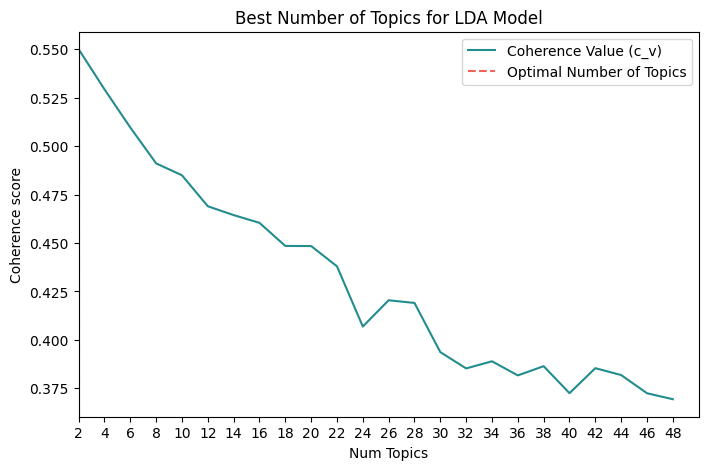

In [29]:
plt.figure(figsize=(8,5))

# Create a custom x-axis
x = range(start, limit, step)

# Build the line plot
ax = sns.lineplot(x=x, y=coherence_values, color='#238C8C')

# Set titles and labels
plt.title("Best Number of Topics for LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xlim(start, limit)
plt.xticks(range(2, limit, step))

# Add a vertical line to show the optimum number of topics
plt.axvline(x[np.argmax(coherence_values)], 
            color='#F26457', linestyle='--')

# Draw a custom legend
legend_elements = [Line2D([0], [0], color='#238C8C', 
                          ls='-', label='Coherence Value (c_v)'),
                   Line2D([0], [1], color='#F26457', 
                          ls='--', label='Optimal Number of Topics')]

ax.legend(handles=legend_elements, loc='upper right')

## Run Trained and Tuned Model on Best Number of Topics

In [30]:
temp = dictionary[0]
id2word = dictionary.id2token

lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=2000,
    alpha='auto',
    eta='auto',
    iterations=120,
    num_topics=2,
    passes=8,
    eval_every=None
)

2023-02-11 16:28:37,763 : INFO : using autotuned alpha, starting with [0.5, 0.5]
2023-02-11 16:28:37,766 : INFO : using serial LDA version on this node
2023-02-11 16:28:37,768 : INFO : running online (multi-pass) LDA training, 2 topics, 8 passes over the supplied corpus of 37492 documents, updating model once every 2000 documents, evaluating perplexity every 0 documents, iterating 120x with a convergence threshold of 0.001000
2023-02-11 16:28:37,769 : INFO : PROGRESS: pass 0, at document #2000/37492
2023-02-11 16:28:37,769 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:39,053 : DEBUG : 1029/2000 documents converged within 120 iterations
2023-02-11 16:28:39,057 : INFO : optimized alpha [0.67230815, 0.63932353]
2023-02-11 16:28:39,057 : DEBUG : updating topics
2023-02-11 16:28:39,058 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:39,059 : INFO : topic #0 (0.672): 0.012*"great" + 0.011*"time" + 0.010*"good" + 0.0

2023-02-11 16:28:42,048 : INFO : topic diff=0.283026, rho=0.353553
2023-02-11 16:28:42,049 : INFO : PROGRESS: pass 0, at document #18000/37492
2023-02-11 16:28:42,050 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:42,345 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:28:42,349 : INFO : optimized alpha [1.4694554, 1.5237724]
2023-02-11 16:28:42,350 : DEBUG : updating topics
2023-02-11 16:28:42,350 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:42,351 : INFO : topic #0 (1.469): 0.016*"good" + 0.013*"time" + 0.009*"great" + 0.008*"year" + 0.008*"family" + 0.008*"life" + 0.006*"loved" + 0.006*"girl" + 0.005*"enjoyed" + 0.005*"relationship"
2023-02-11 16:28:42,351 : INFO : topic #1 (1.524): 0.019*"great" + 0.016*"racism" + 0.014*"racist" + 0.013*"black" + 0.011*"loved" + 0.009*"life" + 0.008*"recommend" + 0.007*"time" + 0.007*"beautiful" + 0.007*"history"
2023-02-11 16:28:42,351 : INFO 

2023-02-11 16:28:44,547 : INFO : topic #0 (1.748): 0.016*"good" + 0.015*"time" + 0.011*"loved" + 0.011*"life" + 0.008*"year" + 0.008*"great" + 0.007*"family" + 0.006*"amazing" + 0.006*"enjoyed" + 0.006*"relationship"
2023-02-11 16:28:44,548 : INFO : topic #1 (1.383): 0.027*"great" + 0.012*"beautiful" + 0.012*"loved" + 0.011*"recommend" + 0.011*"life" + 0.010*"black" + 0.009*"kid" + 0.007*"racism" + 0.007*"time" + 0.007*"highly"
2023-02-11 16:28:44,548 : INFO : topic diff=0.168384, rho=0.242536
2023-02-11 16:28:44,550 : INFO : PROGRESS: pass 0, at document #36000/37492
2023-02-11 16:28:44,550 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:44,784 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:28:44,787 : INFO : optimized alpha [1.3959534, 1.3351865]
2023-02-11 16:28:44,788 : DEBUG : updating topics
2023-02-11 16:28:44,788 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:44,789 : INFO :

2023-02-11 16:28:46,473 : INFO : PROGRESS: pass 1, at document #14000/37492
2023-02-11 16:28:46,473 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:46,695 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:28:46,699 : INFO : optimized alpha [1.1209211, 1.0370574]
2023-02-11 16:28:46,699 : DEBUG : updating topics
2023-02-11 16:28:46,699 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:46,700 : INFO : topic #0 (1.121): 0.018*"good" + 0.015*"time" + 0.012*"loved" + 0.010*"great" + 0.010*"life" + 0.008*"year" + 0.008*"family" + 0.007*"girl" + 0.006*"enjoyed" + 0.006*"amazing"
2023-02-11 16:28:46,700 : INFO : topic #1 (1.037): 0.022*"great" + 0.014*"black" + 0.012*"racism" + 0.008*"recommend" + 0.008*"racist" + 0.008*"history" + 0.008*"kid" + 0.008*"beautiful" + 0.008*"life" + 0.007*"american"
2023-02-11 16:28:46,701 : INFO : topic diff=0.108681, rho=0.219550
2023-02-11 16:28:46,702 : INFO : P

2023-02-11 16:28:48,714 : INFO : topic #1 (0.681): 0.023*"great" + 0.013*"black" + 0.012*"beautiful" + 0.011*"racism" + 0.010*"recommend" + 0.009*"history" + 0.009*"kid" + 0.008*"life" + 0.007*"highly" + 0.006*"racist"
2023-02-11 16:28:48,714 : INFO : topic diff=0.136820, rho=0.219550
2023-02-11 16:28:48,716 : INFO : PROGRESS: pass 1, at document #32000/37492
2023-02-11 16:28:48,716 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:48,952 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:28:48,956 : INFO : optimized alpha [1.2309645, 0.6851386]
2023-02-11 16:28:48,956 : DEBUG : updating topics
2023-02-11 16:28:48,957 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:48,957 : INFO : topic #0 (1.231): 0.016*"good" + 0.015*"time" + 0.015*"loved" + 0.012*"life" + 0.010*"great" + 0.008*"year" + 0.007*"amazing" + 0.006*"enjoyed" + 0.006*"family" + 0.005*"best"
2023-02-11 16:28:48,958 : INFO : top

2023-02-11 16:28:50,838 : INFO : optimized alpha [0.79571176, 0.6764488]
2023-02-11 16:28:50,838 : DEBUG : updating topics
2023-02-11 16:28:50,839 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:50,840 : INFO : topic #0 (0.796): 0.016*"good" + 0.014*"time" + 0.014*"loved" + 0.012*"great" + 0.010*"life" + 0.007*"year" + 0.007*"family" + 0.007*"girl" + 0.006*"enjoyed" + 0.006*"amazing"
2023-02-11 16:28:50,840 : INFO : topic #1 (0.676): 0.017*"black" + 0.016*"racism" + 0.015*"great" + 0.011*"racist" + 0.009*"race" + 0.008*"caste" + 0.008*"american" + 0.008*"history" + 0.006*"color" + 0.006*"life"
2023-02-11 16:28:50,840 : INFO : topic diff=0.145322, rho=0.214442
2023-02-11 16:28:50,842 : INFO : PROGRESS: pass 2, at document #12000/37492
2023-02-11 16:28:50,842 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:51,077 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:28:51,081 : INFO : optimiz

2023-02-11 16:28:52,768 : INFO : topic diff=0.133497, rho=0.214442
2023-02-11 16:28:52,769 : INFO : PROGRESS: pass 2, at document #28000/37492
2023-02-11 16:28:52,770 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:53,001 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:28:53,005 : INFO : optimized alpha [0.955322, 0.4936642]
2023-02-11 16:28:53,005 : DEBUG : updating topics
2023-02-11 16:28:53,006 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:53,006 : INFO : topic #0 (0.955): 0.016*"good" + 0.015*"great" + 0.015*"loved" + 0.013*"time" + 0.008*"life" + 0.008*"amazing" + 0.007*"family" + 0.006*"year" + 0.006*"enjoyed" + 0.006*"girl"
2023-02-11 16:28:53,007 : INFO : topic #1 (0.494): 0.016*"black" + 0.015*"great" + 0.014*"racism" + 0.010*"history" + 0.009*"kid" + 0.008*"racist" + 0.008*"race" + 0.007*"life" + 0.006*"recommend" + 0.006*"understand"
2023-02-11 16:28:53,007 : INFO : topic

2023-02-11 16:28:54,869 : INFO : topic #0 (0.821): 0.018*"great" + 0.016*"good" + 0.014*"loved" + 0.013*"time" + 0.010*"life" + 0.007*"year" + 0.007*"girl" + 0.007*"amazing" + 0.007*"family" + 0.006*"enjoyed"
2023-02-11 16:28:54,869 : INFO : topic #1 (0.462): 0.018*"black" + 0.017*"caste" + 0.011*"american" + 0.010*"history" + 0.010*"great" + 0.010*"system" + 0.009*"racism" + 0.008*"america" + 0.007*"kid" + 0.007*"race"
2023-02-11 16:28:54,869 : INFO : topic diff=0.100085, rho=0.209675
2023-02-11 16:28:54,871 : INFO : PROGRESS: pass 3, at document #8000/37492
2023-02-11 16:28:54,871 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:55,115 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:28:55,119 : INFO : optimized alpha [0.7387184, 0.47498286]
2023-02-11 16:28:55,120 : DEBUG : updating topics
2023-02-11 16:28:55,120 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:55,121 : INFO : topic #

2023-02-11 16:28:56,786 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:57,027 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:28:57,031 : INFO : optimized alpha [0.93213296, 0.37096378]
2023-02-11 16:28:57,031 : DEBUG : updating topics
2023-02-11 16:28:57,032 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:57,032 : INFO : topic #0 (0.932): 0.016*"great" + 0.015*"good" + 0.015*"loved" + 0.013*"time" + 0.008*"amazing" + 0.008*"life" + 0.006*"beautiful" + 0.006*"family" + 0.006*"year" + 0.006*"enjoyed"
2023-02-11 16:28:57,033 : INFO : topic #1 (0.371): 0.016*"black" + 0.015*"racism" + 0.011*"racist" + 0.009*"history" + 0.008*"kid" + 0.007*"race" + 0.007*"american" + 0.007*"great" + 0.006*"life" + 0.006*"understand"
2023-02-11 16:28:57,033 : INFO : topic diff=0.118310, rho=0.209675
2023-02-11 16:28:57,035 : INFO : PROGRESS: pass 3, at document #26000/37492
2023-02-11 16:28:57,035 : DEBUG

2023-02-11 16:28:58,885 : INFO : topic #1 (0.357): 0.024*"caste" + 0.015*"black" + 0.013*"american" + 0.013*"system" + 0.012*"history" + 0.011*"racism" + 0.009*"america" + 0.008*"race" + 0.007*"caste_system" + 0.006*"country"
2023-02-11 16:28:58,885 : INFO : topic diff=0.132862, rho=0.205213
2023-02-11 16:28:58,886 : INFO : PROGRESS: pass 4, at document #4000/37492
2023-02-11 16:28:58,887 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:28:59,100 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:28:59,104 : INFO : optimized alpha [0.72024393, 0.34566766]
2023-02-11 16:28:59,104 : DEBUG : updating topics
2023-02-11 16:28:59,105 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:28:59,105 : INFO : topic #0 (0.720): 0.018*"great" + 0.015*"good" + 0.014*"loved" + 0.013*"time" + 0.010*"life" + 0.008*"year" + 0.007*"amazing" + 0.007*"family" + 0.006*"recommend" + 0.006*"beautiful"
2023-02-11 16:28:59,1

2023-02-11 16:29:00,984 : DEBUG : 1998/2000 documents converged within 120 iterations
2023-02-11 16:29:00,988 : INFO : optimized alpha [0.7736621, 0.3111876]
2023-02-11 16:29:00,988 : DEBUG : updating topics
2023-02-11 16:29:00,989 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:29:00,990 : INFO : topic #0 (0.774): 0.018*"great" + 0.015*"loved" + 0.015*"good" + 0.013*"time" + 0.008*"life" + 0.008*"amazing" + 0.006*"family" + 0.006*"year" + 0.006*"enjoyed" + 0.006*"best"
2023-02-11 16:29:00,990 : INFO : topic #1 (0.311): 0.019*"racism" + 0.018*"black" + 0.015*"racist" + 0.011*"history" + 0.009*"race" + 0.008*"american" + 0.007*"america" + 0.006*"life" + 0.006*"work" + 0.006*"understand"
2023-02-11 16:29:00,990 : INFO : topic diff=0.124558, rho=0.205213
2023-02-11 16:29:00,992 : INFO : PROGRESS: pass 4, at document #22000/37492
2023-02-11 16:29:00,992 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:29:01,191 : DEBUG : 1

2023-02-11 16:29:02,764 : INFO : topic #1 (0.275): 0.018*"caste" + 0.015*"black" + 0.013*"history" + 0.012*"racism" + 0.011*"american" + 0.010*"system" + 0.009*"race" + 0.008*"america" + 0.007*"life" + 0.007*"understand"
2023-02-11 16:29:02,764 : INFO : topic diff=0.172975, rho=0.205213
2023-02-11 16:29:02,766 : INFO : PROGRESS: pass 4, at document #37492/37492
2023-02-11 16:29:02,766 : DEBUG : performing inference on a chunk of 1492 documents
2023-02-11 16:29:02,936 : DEBUG : 1492/1492 documents converged within 120 iterations
2023-02-11 16:29:02,939 : INFO : optimized alpha [0.57394576, 0.28420296]
2023-02-11 16:29:02,940 : DEBUG : updating topics
2023-02-11 16:29:02,940 : INFO : merging changes from 1492 documents into a model of 37492 documents
2023-02-11 16:29:02,941 : INFO : topic #0 (0.574): 0.019*"great" + 0.015*"good" + 0.014*"loved" + 0.014*"time" + 0.011*"life" + 0.008*"amazing" + 0.008*"year" + 0.008*"family" + 0.007*"beautiful" + 0.007*"recommend"
2023-02-11 16:29:02,941 :

2023-02-11 16:29:04,757 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:29:04,761 : INFO : optimized alpha [0.638641, 0.28558773]
2023-02-11 16:29:04,762 : DEBUG : updating topics
2023-02-11 16:29:04,762 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:29:04,763 : INFO : topic #0 (0.639): 0.021*"great" + 0.016*"good" + 0.013*"time" + 0.013*"loved" + 0.010*"life" + 0.008*"year" + 0.007*"family" + 0.007*"recommend" + 0.007*"girl" + 0.007*"amazing"
2023-02-11 16:29:04,763 : INFO : topic #1 (0.286): 0.020*"racism" + 0.019*"black" + 0.016*"racist" + 0.010*"race" + 0.009*"history" + 0.008*"american" + 0.007*"america" + 0.006*"life" + 0.006*"society" + 0.006*"color"
2023-02-11 16:29:04,763 : INFO : topic diff=0.155756, rho=0.201024
2023-02-11 16:29:04,765 : INFO : PROGRESS: pass 5, at document #18000/37492
2023-02-11 16:29:04,765 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:29:04,980 : DEBUG : 2

2023-02-11 16:29:06,420 : INFO : topic #1 (0.225): 0.018*"black" + 0.015*"racism" + 0.013*"history" + 0.009*"race" + 0.009*"racist" + 0.007*"american" + 0.007*"life" + 0.006*"class" + 0.006*"color" + 0.006*"understand"
2023-02-11 16:29:06,420 : INFO : topic diff=0.088749, rho=0.201024
2023-02-11 16:29:06,422 : INFO : PROGRESS: pass 5, at document #34000/37492
2023-02-11 16:29:06,423 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:29:06,631 : DEBUG : 1996/2000 documents converged within 120 iterations
2023-02-11 16:29:06,635 : INFO : optimized alpha [0.90698403, 0.22991776]
2023-02-11 16:29:06,636 : DEBUG : updating topics
2023-02-11 16:29:06,636 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:29:06,637 : INFO : topic #0 (0.907): 0.019*"great" + 0.015*"good" + 0.015*"loved" + 0.014*"time" + 0.011*"life" + 0.008*"amazing" + 0.008*"year" + 0.007*"beautiful" + 0.007*"recommend" + 0.006*"family"
2023-02-11 16:29:06,637 : I

2023-02-11 16:29:08,358 : DEBUG : 1997/2000 documents converged within 120 iterations
2023-02-11 16:29:08,361 : INFO : optimized alpha [0.58159375, 0.24412777]
2023-02-11 16:29:08,362 : DEBUG : updating topics
2023-02-11 16:29:08,362 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:29:08,363 : INFO : topic #0 (0.582): 0.021*"great" + 0.015*"good" + 0.013*"time" + 0.012*"loved" + 0.010*"life" + 0.007*"year" + 0.007*"family" + 0.007*"recommend" + 0.007*"amazing" + 0.006*"beautiful"
2023-02-11 16:29:08,364 : INFO : topic #1 (0.244): 0.020*"black" + 0.017*"racism" + 0.011*"racist" + 0.011*"history" + 0.009*"american" + 0.009*"race" + 0.009*"caste" + 0.007*"color" + 0.007*"system" + 0.007*"america"
2023-02-11 16:29:08,364 : INFO : topic diff=0.104092, rho=0.197081
2023-02-11 16:29:08,365 : INFO : PROGRESS: pass 6, at document #14000/37492
2023-02-11 16:29:08,366 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:29:08,561 : DE

2023-02-11 16:29:10,035 : INFO : topic #1 (0.211): 0.020*"black" + 0.018*"racism" + 0.012*"history" + 0.011*"racist" + 0.010*"race" + 0.008*"american" + 0.007*"color" + 0.007*"class" + 0.006*"life" + 0.006*"understand"
2023-02-11 16:29:10,035 : INFO : topic diff=0.107095, rho=0.197081
2023-02-11 16:29:10,037 : INFO : PROGRESS: pass 6, at document #30000/37492
2023-02-11 16:29:10,037 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:29:10,227 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:29:10,231 : INFO : optimized alpha [0.793272, 0.20106103]
2023-02-11 16:29:10,232 : DEBUG : updating topics
2023-02-11 16:29:10,232 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:29:10,233 : INFO : topic #0 (0.793): 0.018*"great" + 0.014*"time" + 0.014*"good" + 0.014*"loved" + 0.012*"life" + 0.008*"beautiful" + 0.008*"year" + 0.007*"amazing" + 0.006*"recommend" + 0.006*"family"
2023-02-11 16:29:10,233 : INF

2023-02-11 16:29:11,887 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:29:11,891 : INFO : optimized alpha [0.52940583, 0.21088411]
2023-02-11 16:29:11,891 : DEBUG : updating topics
2023-02-11 16:29:11,892 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:29:11,892 : INFO : topic #0 (0.529): 0.021*"great" + 0.016*"good" + 0.013*"loved" + 0.012*"time" + 0.010*"life" + 0.007*"beautiful" + 0.007*"year" + 0.007*"recommend" + 0.007*"family" + 0.007*"amazing"
2023-02-11 16:29:11,893 : INFO : topic #1 (0.211): 0.022*"black" + 0.016*"racism" + 0.014*"caste" + 0.011*"american" + 0.010*"history" + 0.010*"race" + 0.009*"system" + 0.008*"racist" + 0.008*"america" + 0.006*"understand"
2023-02-11 16:29:11,893 : INFO : topic diff=0.141889, rho=0.193362
2023-02-11 16:29:11,895 : INFO : PROGRESS: pass 7, at document #10000/37492
2023-02-11 16:29:11,895 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:29:12,133

2023-02-11 16:29:13,571 : INFO : topic #1 (0.185): 0.020*"black" + 0.018*"racism" + 0.013*"racist" + 0.011*"history" + 0.009*"race" + 0.009*"american" + 0.007*"color" + 0.006*"life" + 0.006*"america" + 0.006*"understand"
2023-02-11 16:29:13,571 : INFO : topic diff=0.106633, rho=0.193362
2023-02-11 16:29:13,573 : INFO : PROGRESS: pass 7, at document #26000/37492
2023-02-11 16:29:13,573 : DEBUG : performing inference on a chunk of 2000 documents
2023-02-11 16:29:13,776 : DEBUG : 2000/2000 documents converged within 120 iterations
2023-02-11 16:29:13,780 : INFO : optimized alpha [0.68279576, 0.1891084]
2023-02-11 16:29:13,780 : DEBUG : updating topics
2023-02-11 16:29:13,781 : INFO : merging changes from 2000 documents into a model of 37492 documents
2023-02-11 16:29:13,781 : INFO : topic #0 (0.683): 0.018*"great" + 0.014*"good" + 0.013*"loved" + 0.012*"time" + 0.008*"life" + 0.007*"family" + 0.007*"amazing" + 0.007*"beautiful" + 0.006*"year" + 0.006*"recommend"
2023-02-11 16:29:13,782 : 

## Visualize the Results

In [31]:
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=True)

pyLDAvis.display(lda_viz)

2023-02-11 16:30:03,457 : DEBUG : performing inference on a chunk of 37492 documents
2023-02-11 16:30:06,759 : DEBUG : 37475/37492 documents converged within 120 iterations
/Users/b/Library/Python/3.9/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from i

In [32]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

2023-02-11 16:30:19,395 : INFO : topic #0 (0.466): 0.020*"great" + 0.015*"good" + 0.014*"loved" + 0.014*"time" + 0.011*"life" + 0.008*"amazing" + 0.008*"year" + 0.008*"family" + 0.007*"beautiful" + 0.007*"recommend"
2023-02-11 16:30:19,398 : INFO : topic #1 (0.189): 0.030*"caste" + 0.015*"black" + 0.015*"system" + 0.015*"american" + 0.014*"history" + 0.011*"racism" + 0.011*"america" + 0.010*"race" + 0.009*"caste_system" + 0.007*"country"


[(0,
  '0.020*"great" + 0.015*"good" + 0.014*"loved" + 0.014*"time" + 0.011*"life" '
  '+ 0.008*"amazing" + 0.008*"year" + 0.008*"family" + 0.007*"beautiful" + '
  '0.007*"recommend"'),
 (1,
  '0.030*"caste" + 0.015*"black" + 0.015*"system" + 0.015*"american" + '
  '0.014*"history" + 0.011*"racism" + 0.011*"america" + 0.010*"race" + '
  '0.009*"caste_system" + 0.007*"country"')]


/Users/b/Library/Python/3.9/lib/python/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/b/Library/Python/3.9/lib/python/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/b/Library/Python/3.9/lib/python/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/b/Library/Python/3.9/lib/python/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_s

2023-02-11 16:30:22,358 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-02-11 16:30:22,359 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-02-11 16:30:22,371 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-02-11 16:30:22,395 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/m

2023-02-11 16:30:22,416 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-Regular.ttf', name='Noto Sans Siddham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,417 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,417 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,417 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf', name='Zapf Dingbats', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,418 : DEBUG : find

2023-02-11 16:30:22,438 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:30:22,438 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next Condensed.ttc', name='Avenir Next Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2023-02-11 16:30:22,438 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:30:22,439 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,439 : DEBUG : findfont

2023-02-11 16:30:22,461 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,462 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,463 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldHungarian-Regular.ttf', name='Noto Sans Old Hungarian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,464 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf', name='Bradley Hand', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:30:22,465 : DEBUG : findfon

2023-02-11 16:30:22,489 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,489 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,490 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf', name='.SF NS Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,490 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,491 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/

2023-02-11 16:30:22,561 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf', name='Luminari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,562 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-02-11 16:30:22,563 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,563 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,564 : DEBUG : findfont: score(FontEntry(fname='/System/Library/

2023-02-11 16:30:22,576 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,576 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,577 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
2023-02-11 16:30:22,577 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-02-11 16:30:22,578 : DEBUG : findfont: scor

2023-02-11 16:30:22,589 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
2023-02-11 16:30:22,590 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc', name='Baghdad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,590 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc', name='DecoType Naskh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,590 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf', name='Noto Sans Cham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,591 : DEBUG : findfont: score(FontEntry(fname=

2023-02-11 16:30:22,603 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc', name='Waseem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,603 : DEBUG : findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,603 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Courier.ttc', name='Courier', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,604 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,604 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc', name='Seravek'

2023-02-11 16:30:22,618 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf', name='Chalkduster', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,618 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-02-11 16:30:22,618 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,619 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf', name='System Font', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-02-11 16:30:22,619 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts

2023-02-11 16:30:22,632 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-02-11 16:30:22,633 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.9713636363636367
2023-02-11 16:30:22,633 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:22,634 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:30:22,634 : DEBUG : findfont: score(Fon

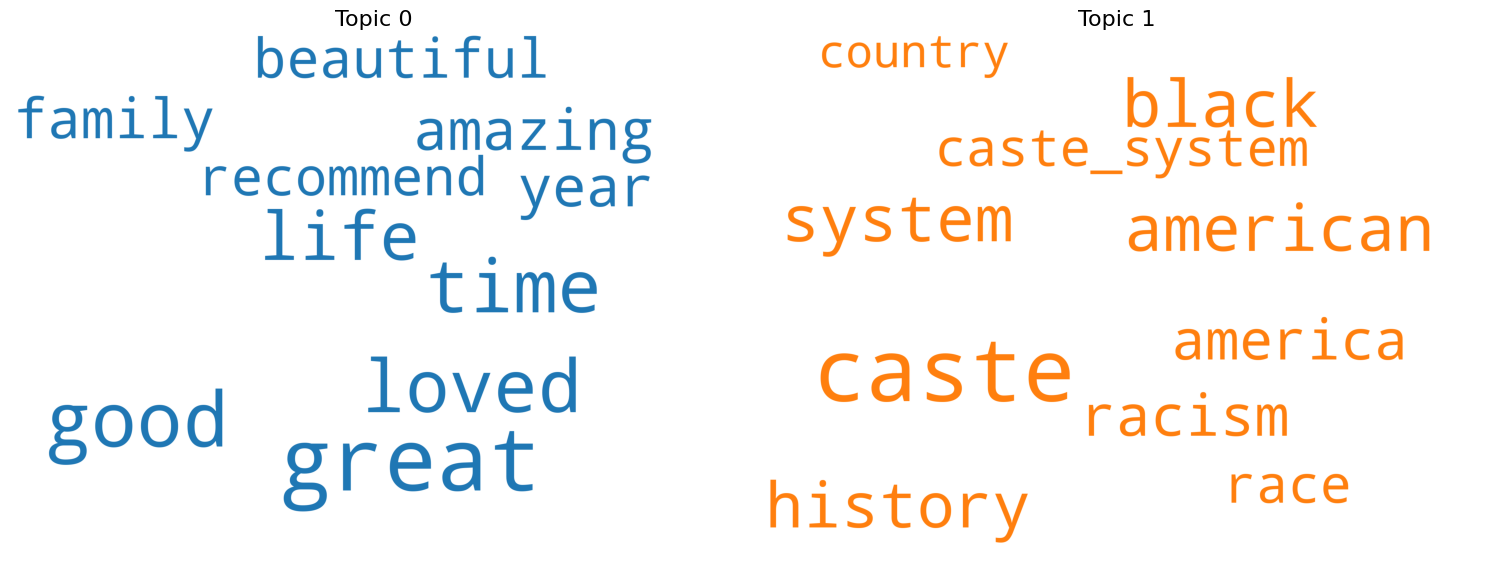

In [33]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stoplist,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(15,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/var/folders/9d/lk0b41ms5_vg96dq4zqm3t5m0000gp/T/ipykernel_68101/2938790815.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/9d/lk0b41ms5_vg96dq4zqm3t5m0000gp/T/ipykernel_68101/2938790815.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
2023-02-11 16:30:29,966 : DEBUG : findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=22.0.
2023-02-11 16:30:29,967 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:29,967 : DEBUG : findfont: score(FontEntry(fname='/Use

2023-02-11 16:30:29,975 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:30:29,975 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-02-11 16:30:29,976 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:30:29,976 : DEBUG : findfont: score(FontEntry(fname='/Users/b/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-d

2023-02-11 16:30:29,987 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:29,987 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:29,988 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Monaco.ttf', name='Monaco', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:29,988 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf', name='Geneva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.595454545454545
2023-02-11 16:30:29,989 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Sup

2023-02-11 16:30:30,003 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,003 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,004 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-02-11 16:30:30,005 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,005 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental

2023-02-11 16:30:30,021 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
2023-02-11 16:30:30,022 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,022 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,022 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,023 : DEBUG : findfont: score(FontEntry(

2023-02-11 16:30:30,042 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,043 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2023-02-11 16:30:30,043 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,044 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,044 : DEBUG : findfont: score(FontEnt

2023-02-11 16:30:30,060 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,060 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,061 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/SFArabic.ttf', name='.SF Arabic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,061 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKikakui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,062 : DEBUG : findfont: 

2023-02-11 16:30:30,076 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,076 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah-Regular.ttf', name='Noto Sans Bassa Vah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,077 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,077 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,077 : DEBUG : findfont: sco

2023-02-11 16:30:30,092 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc', name='.Aqua Kana', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2023-02-11 16:30:30,093 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-02-11 16:30:30,093 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:30:30,094 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-02-11 16:30:30,094 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Appl

2023-02-11 16:30:30,110 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,110 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,111 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,111 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,112 : DEBUG : findfont: score(FontEntry(fname='/System/Library/

2023-02-11 16:30:30,127 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSharada-Regular.ttf', name='Noto Sans Sharada', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,127 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,128 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-02-11 16:30:30,129 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-02-11 16:30:30,129 : DEBUG : findfont: score(FontEntry(fname

2023-02-11 16:30:30,144 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,145 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsage-Regular.ttf', name='Noto Sans Osage', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,145 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,145 : DEBUG : findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-02-11 16:30:30,146 : DEBU

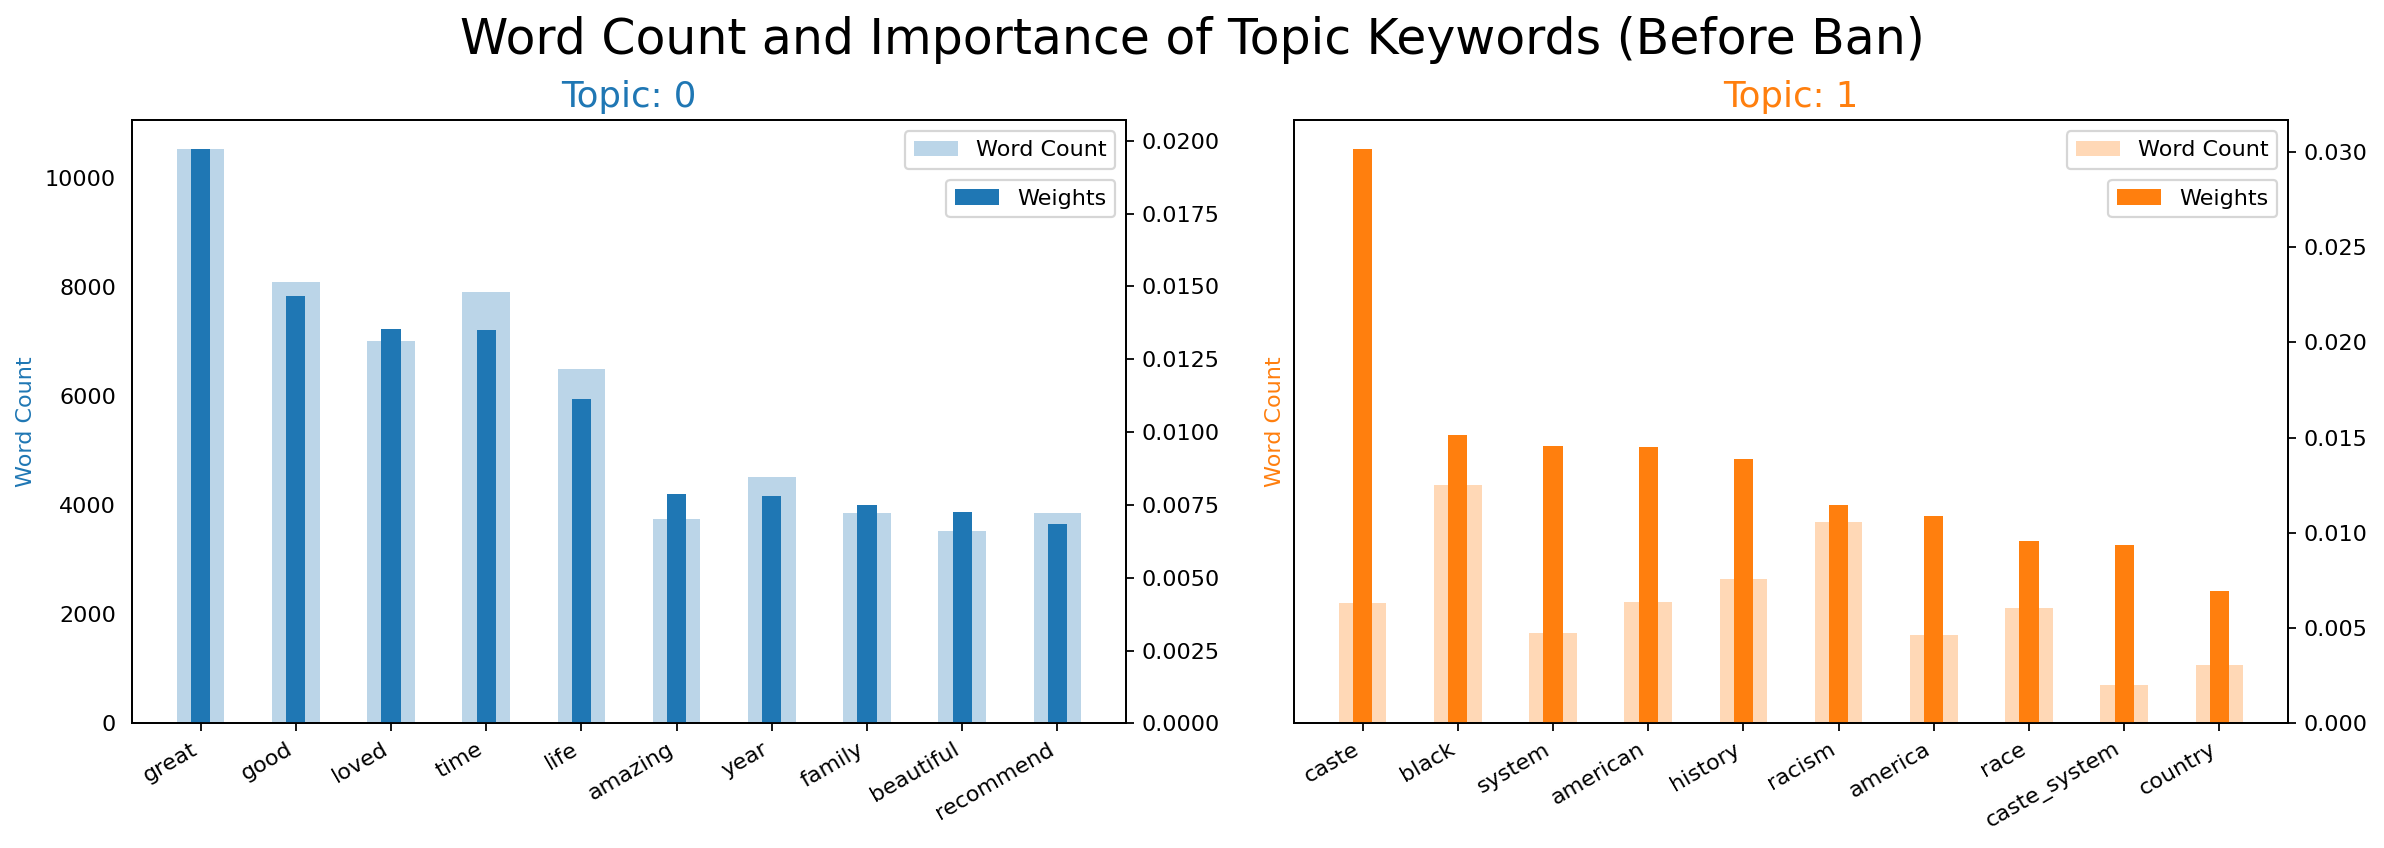

In [34]:
topics = lda_model.show_topics(formatted=False)

data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, None); ax.set_ylim(0, None)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper right'); ax_twin.legend(bbox_to_anchor=(1.0, .92))

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords (Before Ban)', fontsize=22, y=1.05)    
plt.show()

In [35]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

2023-02-11 16:30:30,608 : DEBUG : bound: at document #0
2023-02-11 16:30:30,936 : DEBUG : bound: at document #2000
2023-02-11 16:30:31,211 : DEBUG : bound: at document #4000
2023-02-11 16:30:31,494 : DEBUG : bound: at document #6000
2023-02-11 16:30:31,842 : DEBUG : bound: at document #8000
2023-02-11 16:30:32,186 : DEBUG : bound: at document #10000
2023-02-11 16:30:32,486 : DEBUG : bound: at document #12000
2023-02-11 16:30:32,762 : DEBUG : bound: at document #14000
2023-02-11 16:30:33,099 : DEBUG : bound: at document #16000
2023-02-11 16:30:33,406 : DEBUG : bound: at document #18000
2023-02-11 16:30:33,674 : DEBUG : bound: at document #20000
2023-02-11 16:30:33,936 : DEBUG : bound: at document #22000
2023-02-11 16:30:34,232 : DEBUG : bound: at document #24000
2023-02-11 16:30:34,540 : DEBUG : bound: at document #26000
2023-02-11 16:30:34,824 : DEBUG : bound: at document #28000
2023-02-11 16:30:35,104 : DEBUG : bound: at document #30000
2023-02-11 16:30:35,368 : DEBUG : bound: at docu


Perplexity:  -7.200068847671468


In [36]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ',  coherence_lda)

2023-02-11 16:30:36,253 : DEBUG : Setting topics to those of the model: LdaModel<num_terms=2782, num_topics=2, decay=0.5, chunksize=2000>
2023-02-11 16:30:36,254 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2023-02-11 16:30:39,445 : INFO : 7 accumulators retrieved from output queue
2023-02-11 16:30:39,451 : INFO : accumulated word occurrence stats for 131008 virtual documents



Coherence Score:  0.5498729082407838


In [25]:
# lda_model.save("final_before_book_ban_lda.model")